<a href="https://colab.research.google.com/github/manoharsham/topic_model/blob/master/Topic_modeling_Docvec_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic Modeling in Python**
Its a method to extract hidden topics from a document/corpus and label certain parts of it. This helps to segment a document to certain topics for different users. It is helpful for summarization, improving customer support, SEO and many more.

In [41]:
!git clone https://github.com/manoharsham/topic_model.git manu_model

#print(data[1])
def load_data(data, documents_list, titles, related_items):
  for item in data:
    textdata = item['text']
    title = item['title']
    related_articles=item['related']
    stripped_text = textdata.strip()
    documents_list.append(stripped_text)
    titles.append(title)
    related_items.append(related_articles)

  print("Total Number of Documents:", len(documents_list))

  return documents_list, titles, related_items
 


fatal: destination path 'manu_model' already exists and is not an empty directory.


In [42]:
import json
import glob

doclist = []
titles = []
related= []
for file in glob.glob('manu_model/*files/AA/wiki_*'):
  print("Processing", file, "...")
  data = [json.loads(line) for line in open(file, 'r')]
  doclist, titles, related = load_data(data, doclist, titles, related)

Processing manu_model/CVfiles/AA/wiki_00 ...
Total Number of Documents: 105
Processing manu_model/speechfiles/AA/wiki_00 ...
Total Number of Documents: 127
Processing manu_model/AIfiles/AA/wiki_01 ...
Total Number of Documents: 269
Processing manu_model/AIfiles/AA/wiki_00 ...
Total Number of Documents: 400
Processing manu_model/sigprocfiles/AA/wiki_01 ...
Total Number of Documents: 482
Processing manu_model/sigprocfiles/AA/wiki_00 ...
Total Number of Documents: 671
Processing manu_model/NLPfiles/AA/wiki_01 ...
Total Number of Documents: 813
Processing manu_model/NLPfiles/AA/wiki_00 ...
Total Number of Documents: 944
Processing manu_model/Physicsfiles/AA/wiki_00 ...
Total Number of Documents: 985
Processing manu_model/MLfiles/AA/wiki_01 ...
Total Number of Documents: 1073
Processing manu_model/MLfiles/AA/wiki_00 ...
Total Number of Documents: 1204
Processing manu_model/telecomfiles/AA/wiki_00 ...
Total Number of Documents: 1297


In [0]:
#import modules
import matplotlib.pyplot as plt

In [44]:
print(len(doclist))
import numpy as np
#indices = [i for i, x in enumerate(titles) if x == 'Neural Style Transfer']
unique_idx = [titles.index(x) for x in set(titles)]
titles_act=[titles[i] for i in unique_idx] 
doclist_act=[doclist[i] for i in unique_idx] 
related_act=[related[i] for i in unique_idx] 

titles=titles_act
doclist=doclist_act
related=related_act



1297


In [45]:
print(len(doclist))
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords') 
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

798
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
import os.path
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
def preprocess_data(document):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
        # clean and tokenize document string
    #raw = ''.join(document).lower()
    document=document.lower().replace('(','').replace(')','')
    raw = document.lower()
    #tokenizer = RegexpTokenizer(r'\w+')
    #tokens = tokenizer.tokenize(raw)
    tokens = word_tokenize(raw)
        # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
    #texts.append(stemmed_tokens)
    texts=stemmed_tokens
    return texts

In [0]:
#tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(doclist)]
#tagged_data = [TaggedDocument(words=preprocess_data(_d), tags=[str(i)]) for i, _d in enumerate(doclist)]
#tagged_data[758]

In [48]:
tagged_data = [TaggedDocument(words=preprocess_data(_d), tags=[str(i)]) for i, _d in enumerate(doclist)]
tagged_data[758]

TaggedDocument(words=['optic', 'commun', 'optic', 'commun', ',', 'also', 'known', 'optic', 'telecommun', ',', 'commun', 'distanc', 'use', 'light', 'carri', 'inform', '.', 'perform', 'visual', 'use', 'electron', 'devic', '.', 'earliest', 'basic', 'form', 'optic', 'commun', 'date', 'back', 'sever', 'millennia', ',', 'earliest', 'electr', 'devic', 'creat', 'photophon', ',', 'invent', '1880.', 'optic', 'commun', 'system', 'use', 'transmitt', ',', 'encod', 'messag', 'optic', 'signal', ',', 'channel', ',', 'carri', 'signal', 'destin', ',', 'receiv', ',', 'reproduc', 'messag', 'receiv', 'optic', 'signal', '.', 'electron', 'equip', 'employ', "'receiv", "'", 'person', 'visual', 'observ', 'interpret', 'signal', ',', 'may', 'either', 'simpl', 'presenc', 'beacon', 'fire', 'complex', 'light', 'use', 'color', 'code', 'flash', 'mors', 'code', 'sequenc', '.', 'free-spac', 'optic', 'commun', 'deploy', 'space', ',', 'terrestri', 'form', 'natur', 'limit', 'geographi', ',', 'weather', 'avail', 'light', '.

In [49]:
max_epochs = 200
vec_size = 100
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)

/usr/local/lib/python3.6/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [50]:
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

iteration 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  import sys


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
iteration 11
iteration 12
iteration 13
iteration 14
iteration 15
iteration 16
iteration 17
iteration 18
iteration 19
iteration 20
iteration 21
iteration 22
iteration 23
iteration 24
iteration 25
iteration 26
iteration 27
iteration 28
iteration 29
iteration 30
iteration 31
iteration 32
iteration 33
iteration 34
iteration 35
iteration 36
iteration 37
iteration 38
iteration 39
iteration 40
iteration 41
iteration 42
iteration 43
iteration 44
iteration 45
iteration 46
iteration 47
iteration 48
iteration 49
iteration 50
iteration 51
iteration 52
iteration 53
iteration 54
iteration 55
iteration 56
iteration 57
iteration 58
iteration 59
iteration 60
iteration 61
iteration 62
iteration 63
iteration 64
iteration 65
iteration 66
iteration 67
iteration 68
iteration 69
iteration 70
iteration 71
iteration 72
iteration 73
iteration 74
iteration 75
iteration 76
iteration 77
iteratio

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Model Saved


In [54]:

model= Doc2Vec.load("d2v.model")
#to find the vector of a document which is not in training data
#test_data = word_tokenize(doclist[1].lower())
#v1 = model.infer_vector(test_data)
#print("V1_infer", v1)

# to find most similar doc using tags
#similar_doc = model.docvecs.most_similar('1')
#print(similar_doc)


# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
#import random
#import sklearn
titles1=np.array(titles)
#ref_id=random.randint(0,len(titles));
resultsDict={}
docvecs=[]
docnames=[]
titles1=np.array(titles)
for ref_id in range(len(titles1)):
  docvecs.append(model.docvecs[str(ref_id)])
  docnames.append(titles1[ref_id])  
import numpy as np
fields = ['ref doc', 'predicted see also', 'predicted metric', 'wiki see also','predicted metric for wiki']  
for ref_id in range(len(titles1)):
  cos_sim1=[]
  resultsDict.setdefault(fields[0], []).append(titles1[ref_id])
  print(ref_id)
  for docid in range(len(titles1)):
    if(docid==ref_id):
      cos_sim1.append(0)
      continue
    doc_i=docvecs[docid]
    doc0=docvecs[ref_id] 
    csim=np.dot(doc0,doc_i)/(np.sqrt(np.dot(doc0,doc0)*np.dot(doc_i,doc_i)))
    cos_sim1.append(csim)
    #print(titles1[ref_id])  
#bestmatch=np.argmax(np.array(cos_sim))
#val=np.max(np.array(cos_sim))
#print(bestmatch)
#print(val)
#plt.plot(cos_sim)
#plt.show
#print(doclist[0])
  cos_sim=np.array(cos_sim1)
  #print(len(cos_sim))
  top5idx=np.argpartition(cos_sim, -5)[-5:]
  resultsDict.setdefault(fields[1], []).append(titles1[top5idx[:5]])
  resultsDict.setdefault(fields[2], []).append(cos_sim[top5idx[:5]])

#titles1=np.array(titles)
#print('Reference document title--->',titles1[ref_id])
#print('Top five similar documents-->',titles1[top5idx])
#print('Cosine similarity of top 5 similar topics to reference document:\n')
#print(cos_sim[top5idx] )
  related1=np.array(related)
  U=[S[2:] for S in related1[ref_id].split('\n')]
  U=U[1:-1]
  if '' in U:
    U=U[:U.index('')]
  #print('Top five related documents from Wiki-->',U)
  overlap_idx=[]
  wikiseenames=[]
  wikiseemetrics=[]
  for ind in range(len(U)):
    for ind2 in range(len(doclist)):
      if(U[ind]==titles[ind2]):
        overlap_idx.append(ind2)
        wikiseenames.append(titles[ind2])
        wikiseemetrics.append(cos_sim[ind2])
        #print(titles1[ind2])
        #print(jssim_vec[ind2])
#for i in test_doc_dist.argsort()[::-1][:7]:
#    print(i,lda.show_topic(topicid=i,topn=10),"\n")
# field names  
  resultsDict.setdefault(fields[3], []).append(wikiseenames)
  resultsDict.setdefault(fields[4], []).append(wikiseemetrics)



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [55]:
dictlist = [dict() for x in range(len(titles1))]
dictlist = [{fields[0]:resultsDict[fields[0]][i],fields[1]:resultsDict[fields[1]][i],fields[2]:resultsDict[fields[2]][i],fields[3]:resultsDict[fields[3]][i], fields[4]:resultsDict[fields[4]][i]} for i in range(len(titles1))]
#print(dictlist)
from google.colab import drive
drive.mount('/content/gdrive')
import csv
filename = "results_Dim100.csv"
    

    
# writing to csv file  
with open(filename, 'w') as csvfile:  
    # creating a csv dict writer object  
    writer = csv.DictWriter(csvfile, fieldnames = fields)  
        
    # writing headers (field names)  
    writer.writeheader()  
    print('Manohar')    
    # writing data rows 
    for data in dictlist:
      writer.writerow(data)
!cp results_Dim100.csv "/content/gdrive/My Drive/"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Manohar


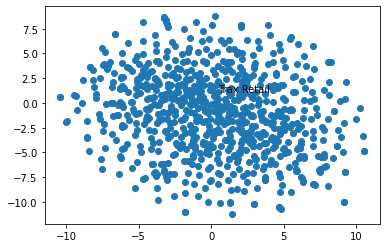

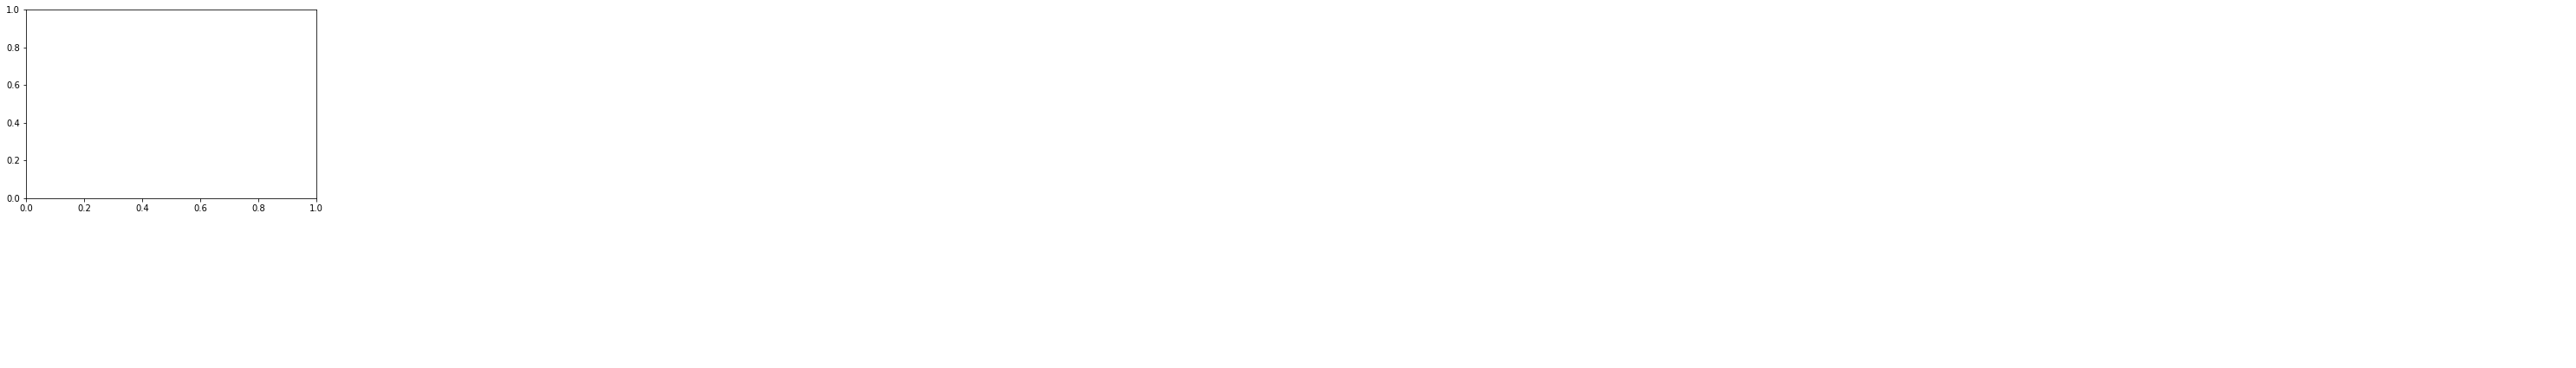

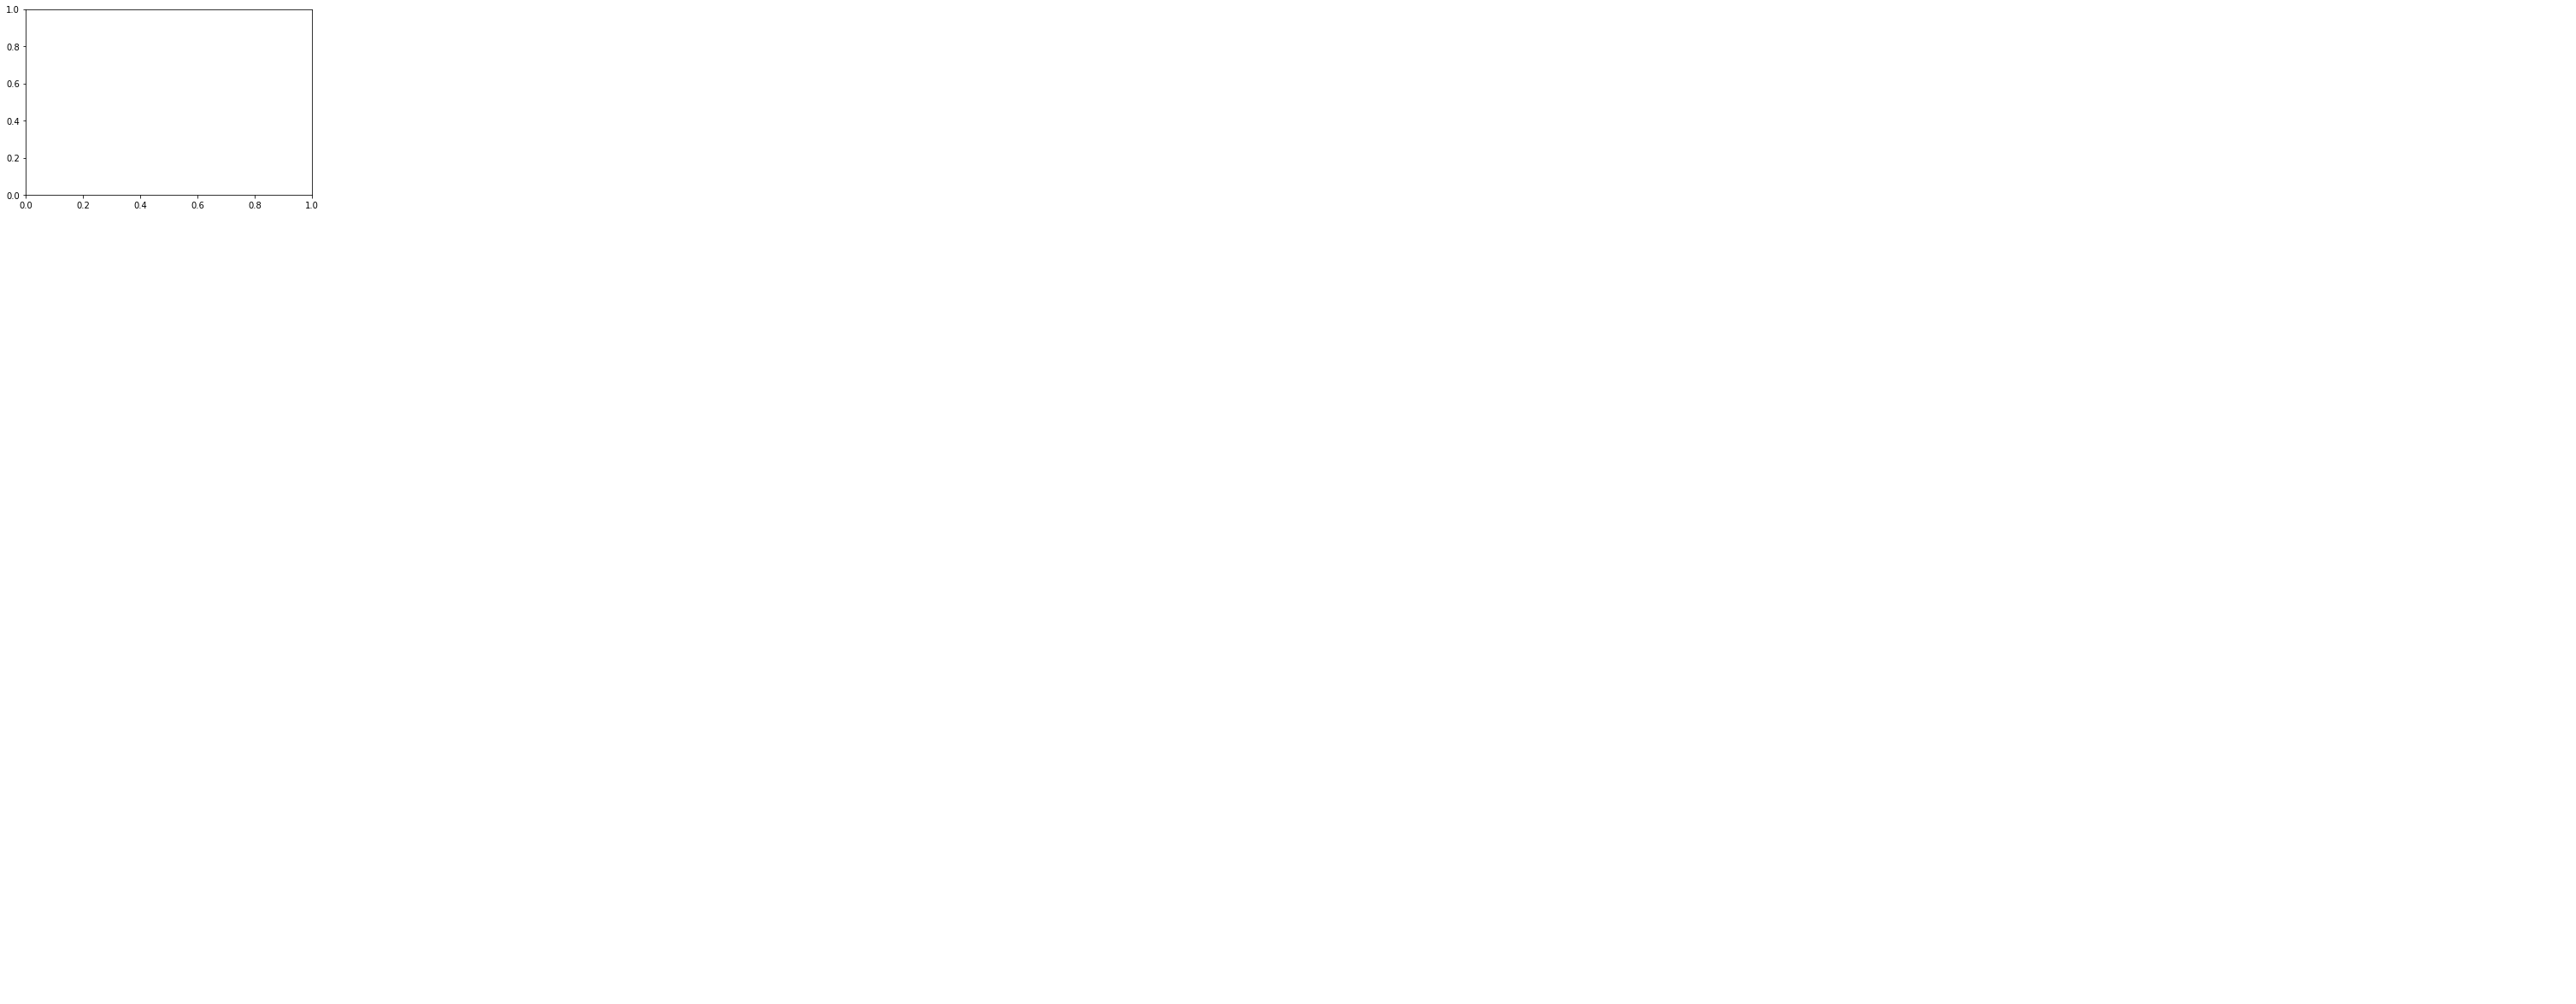

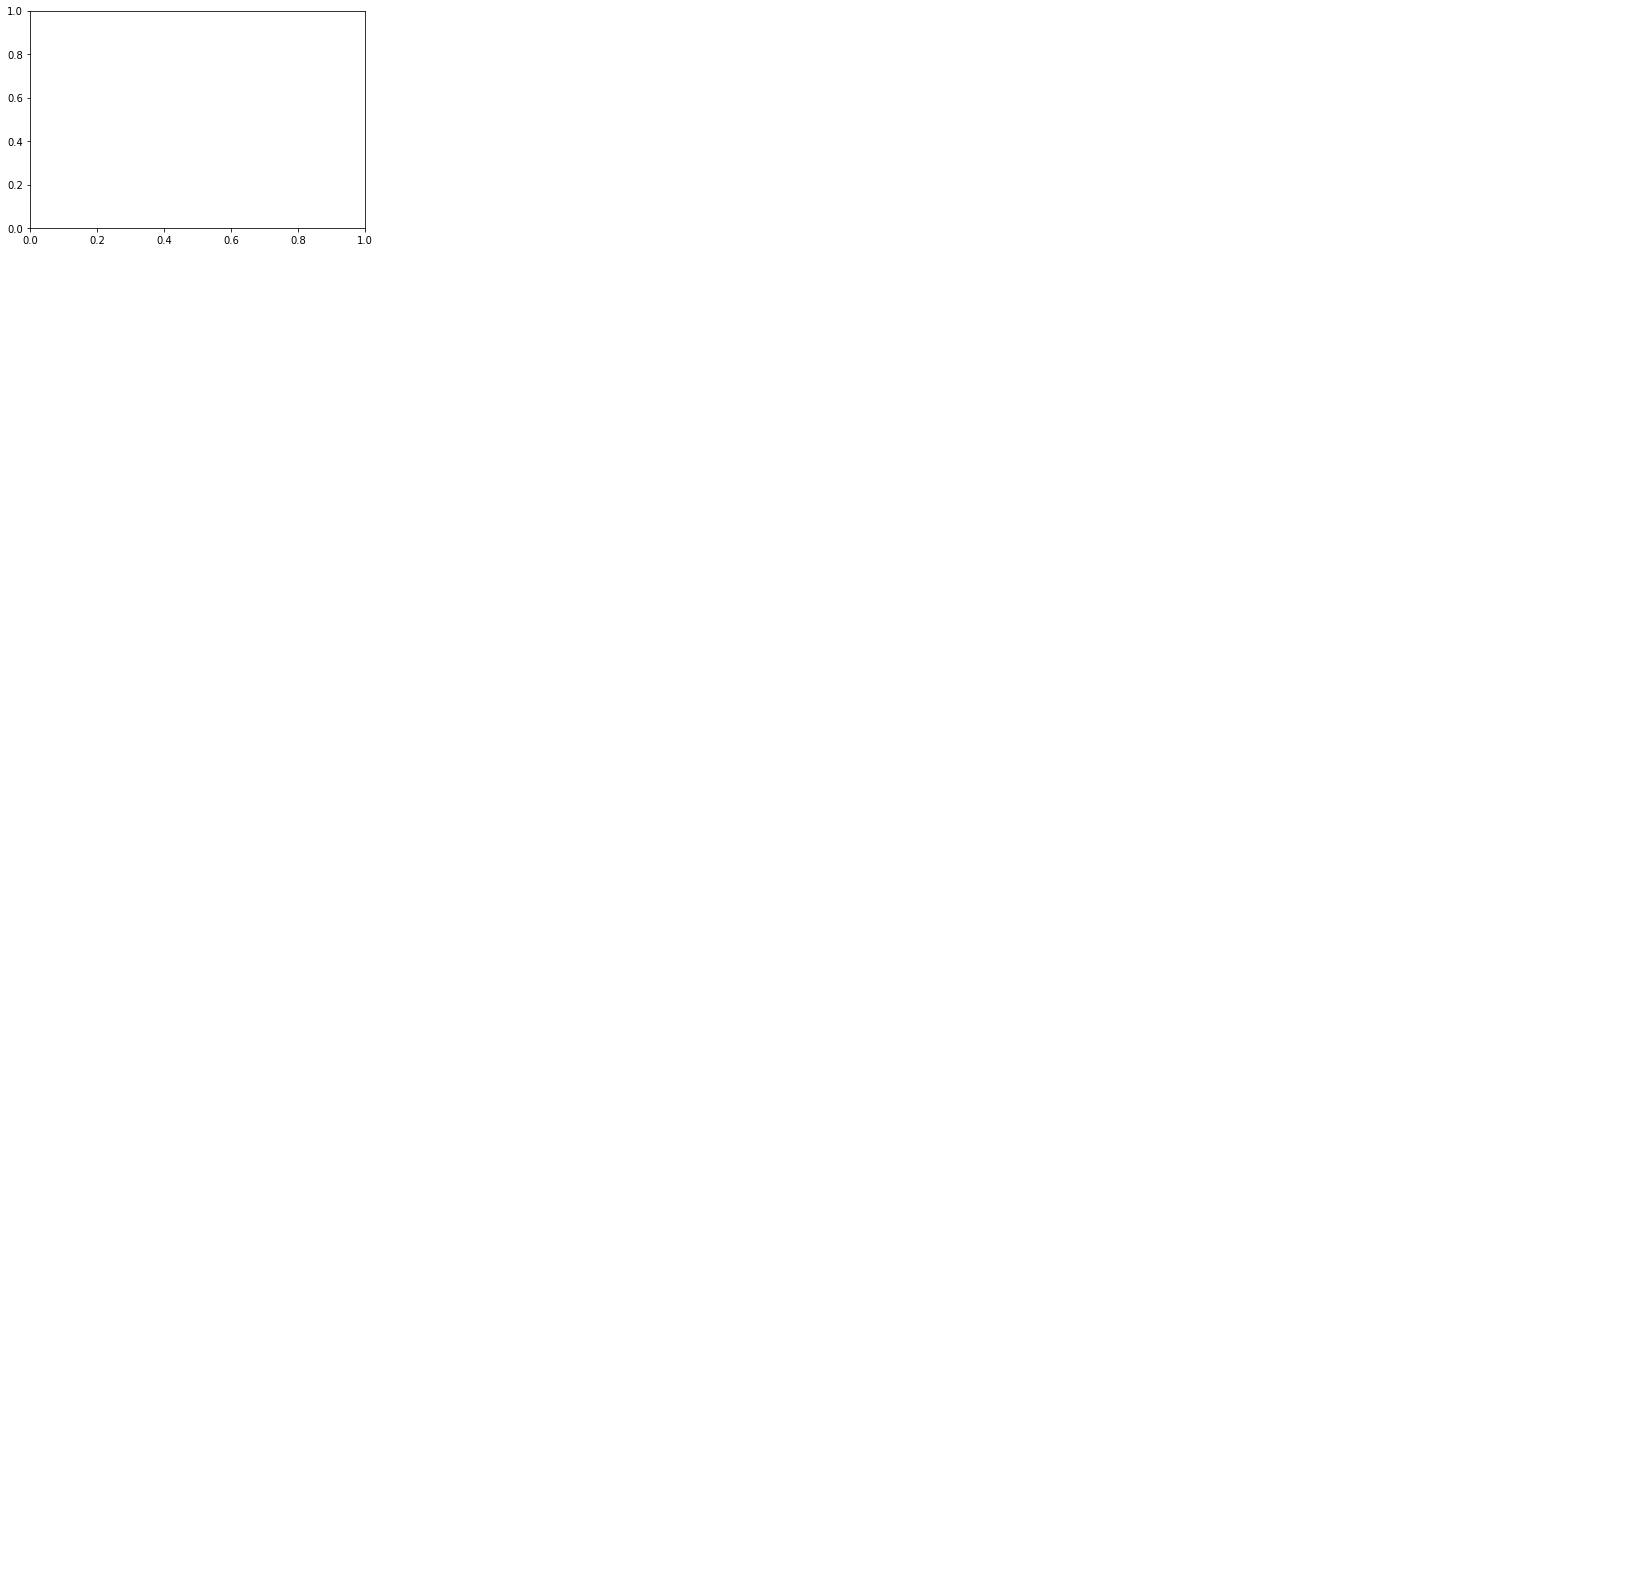

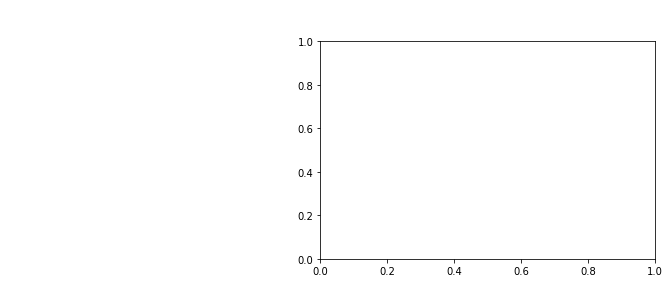

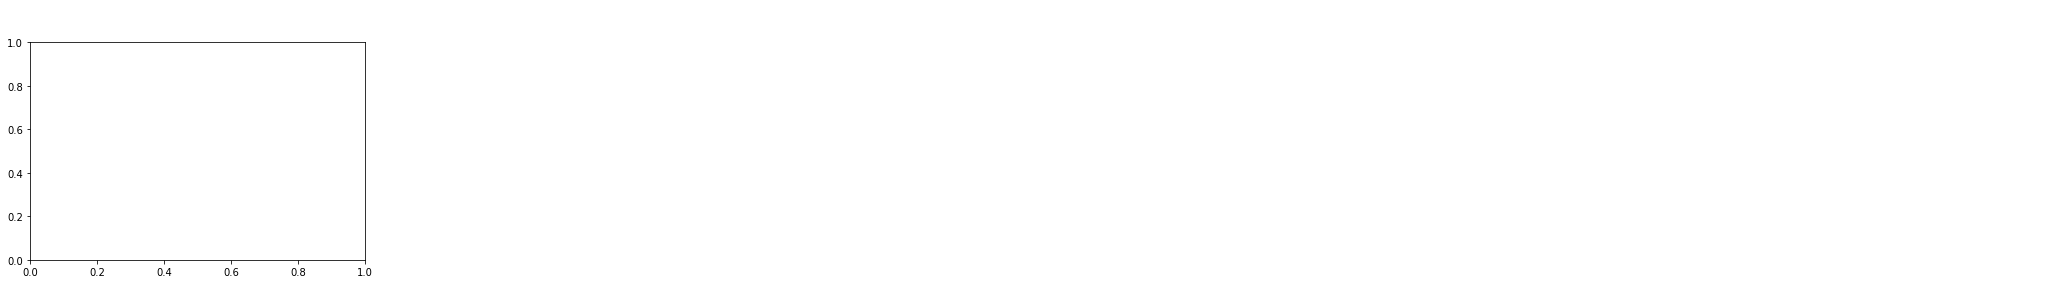

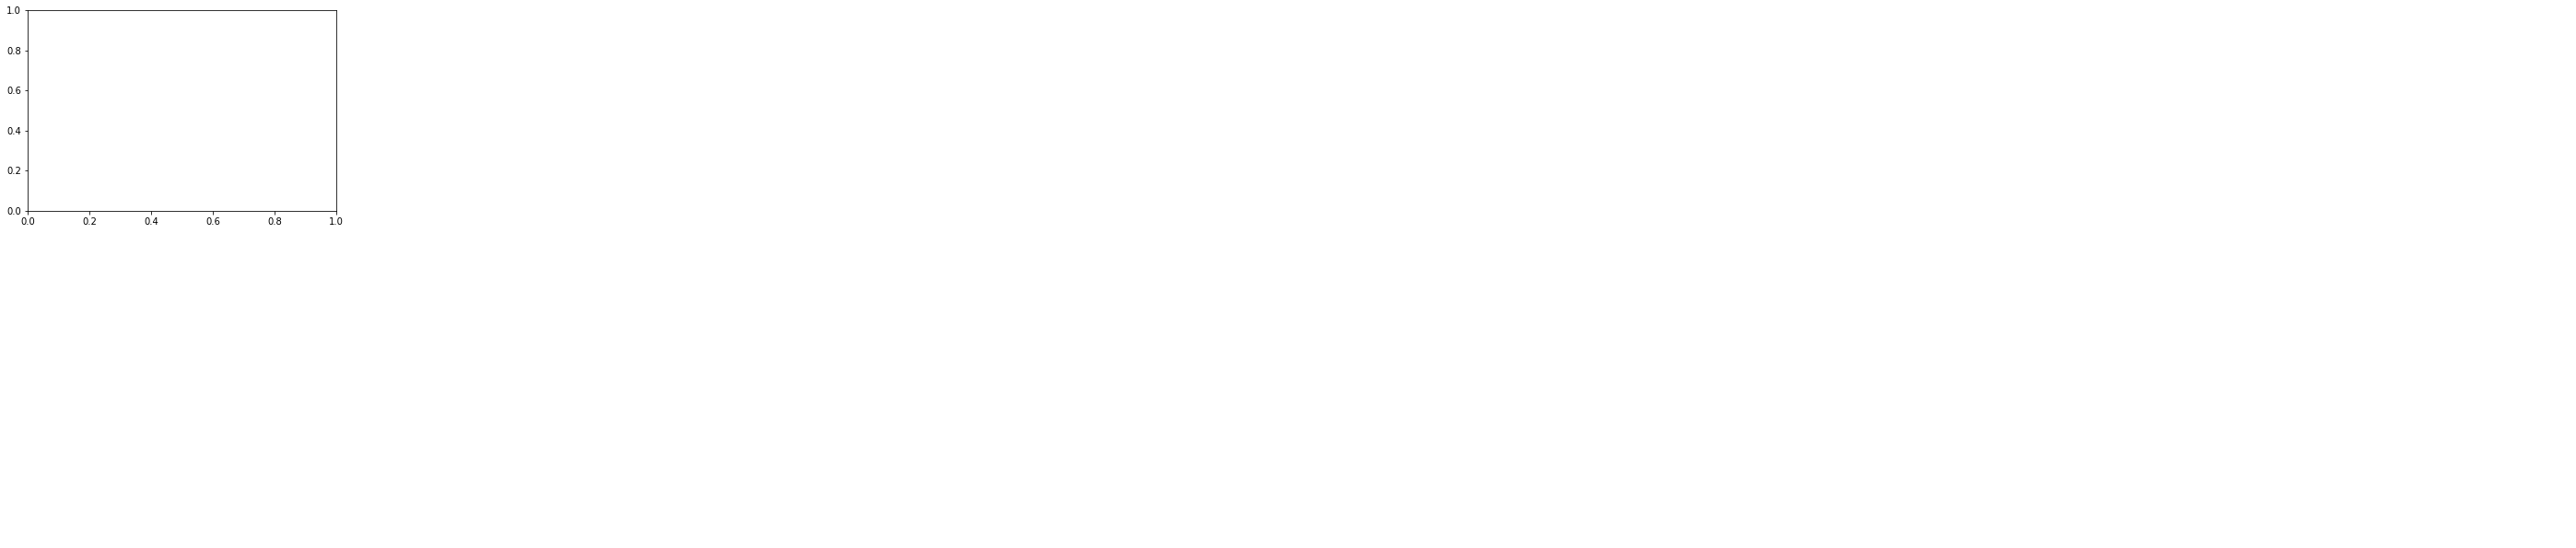

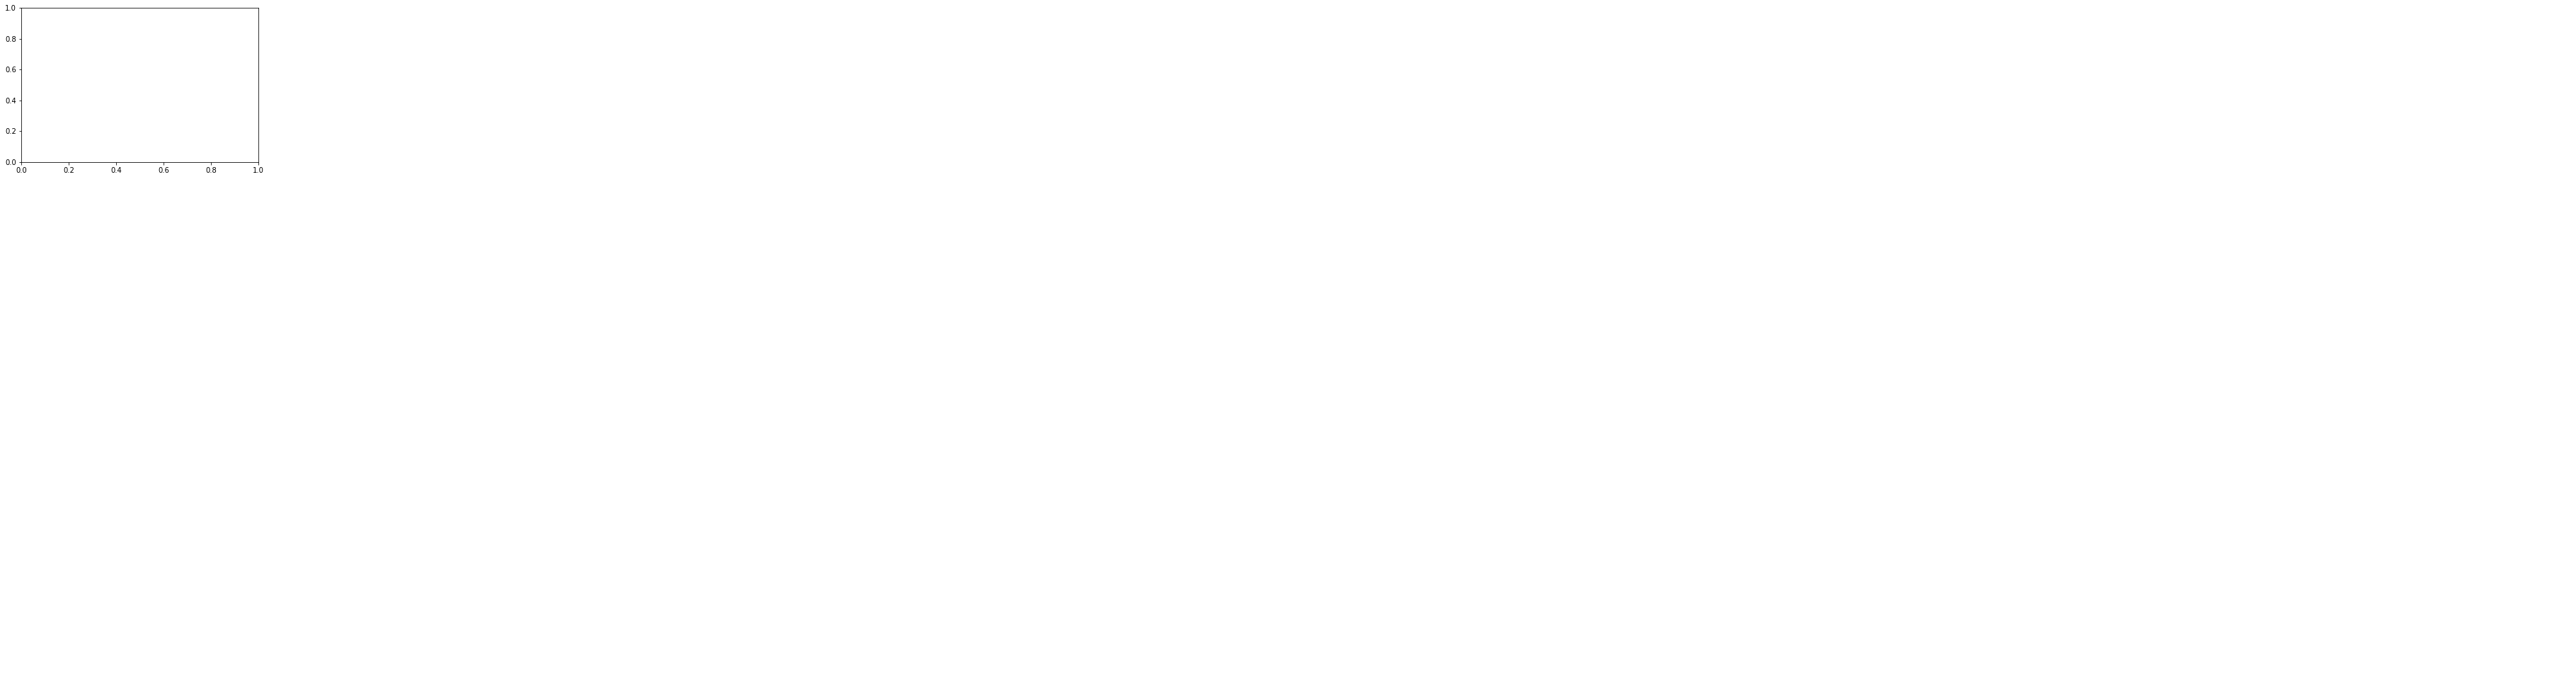

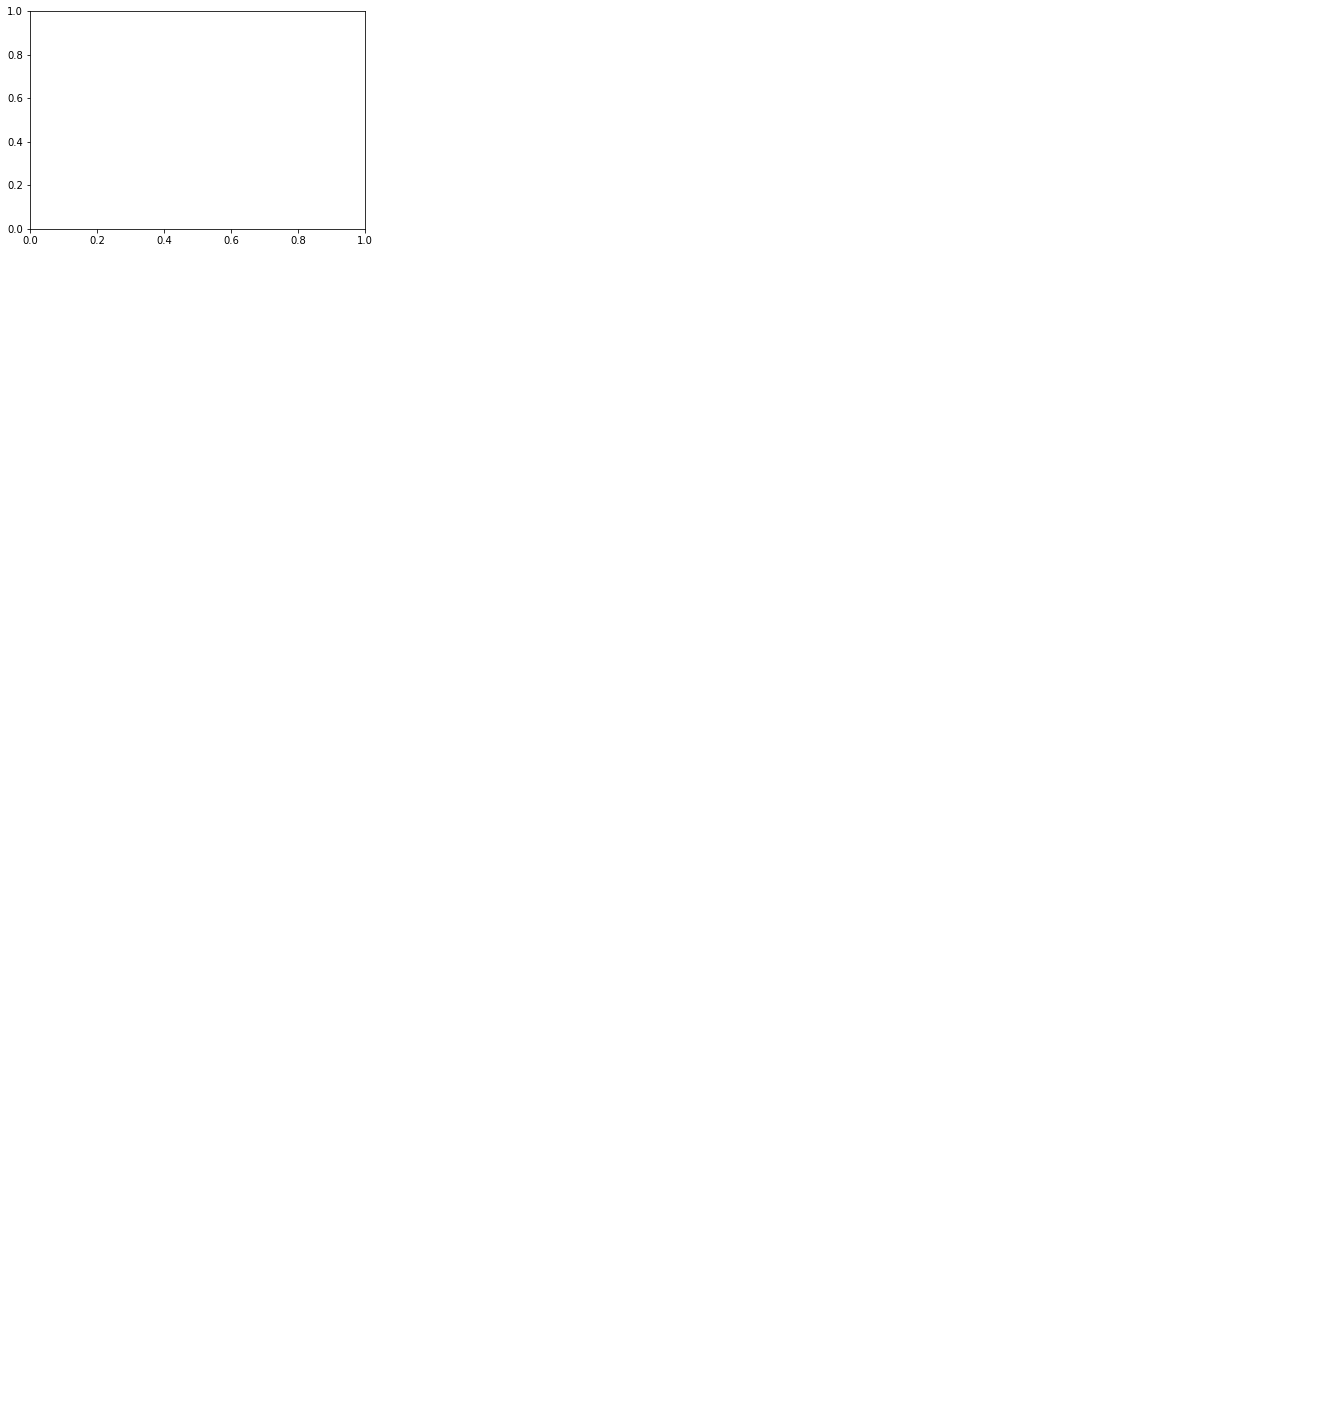

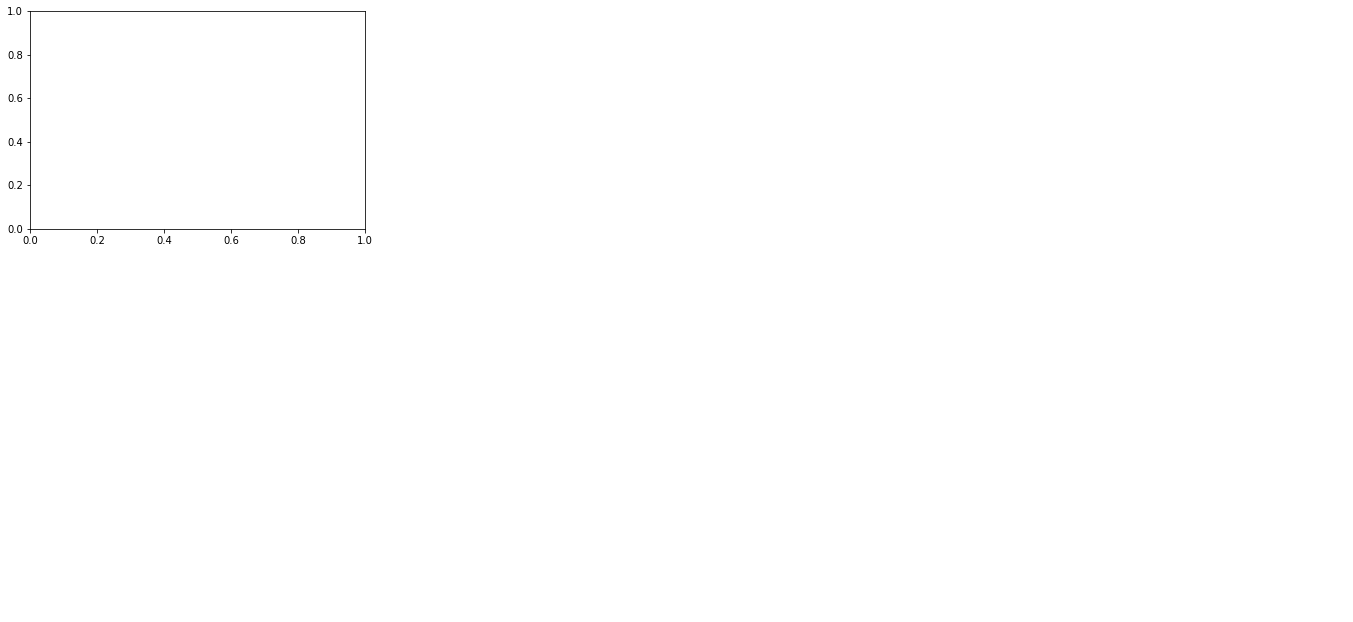

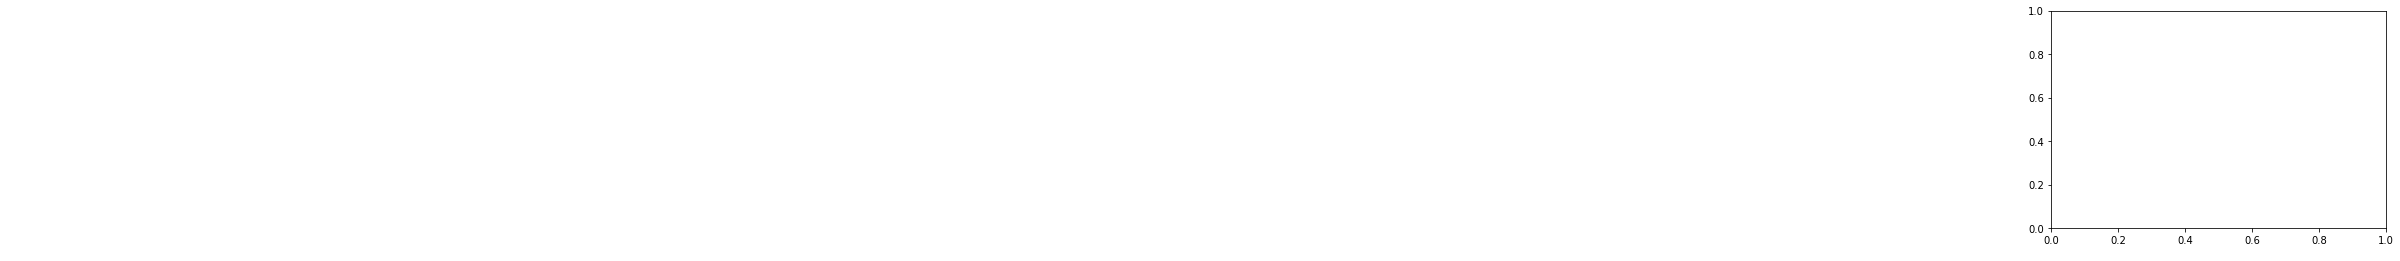

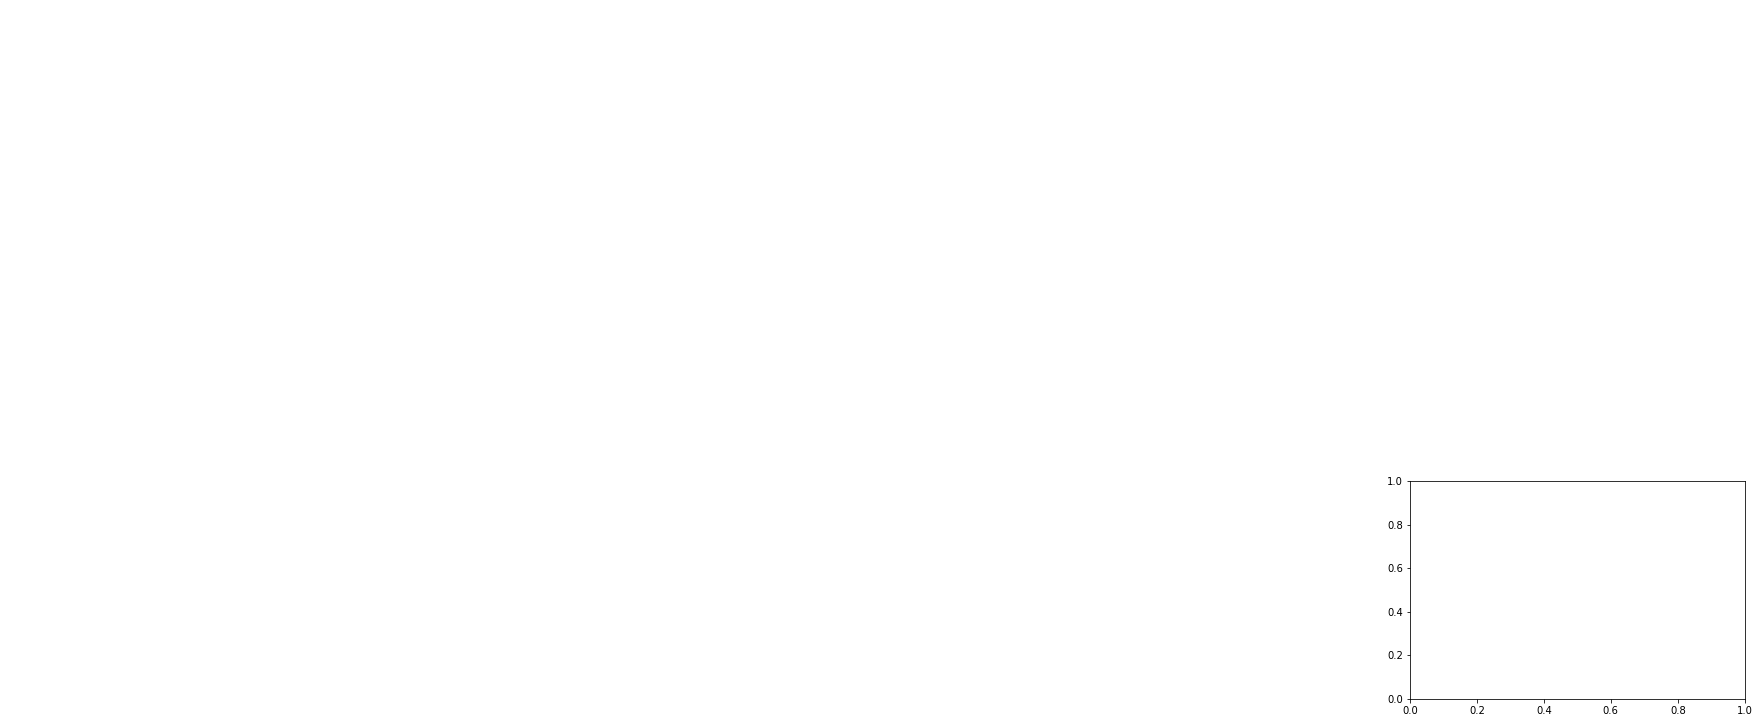

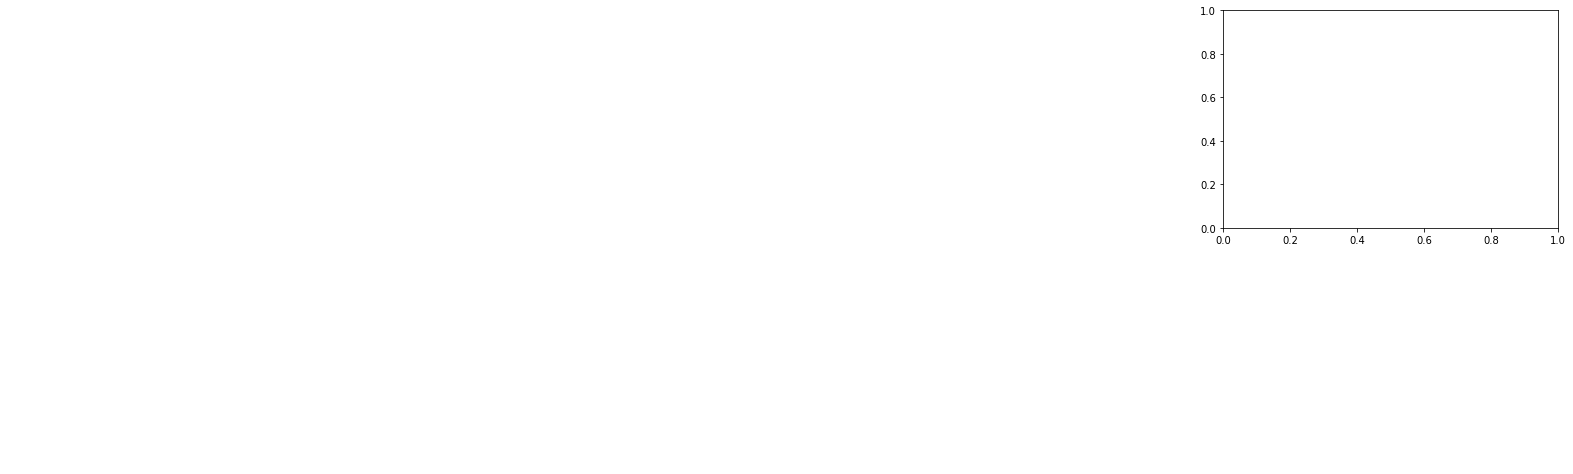

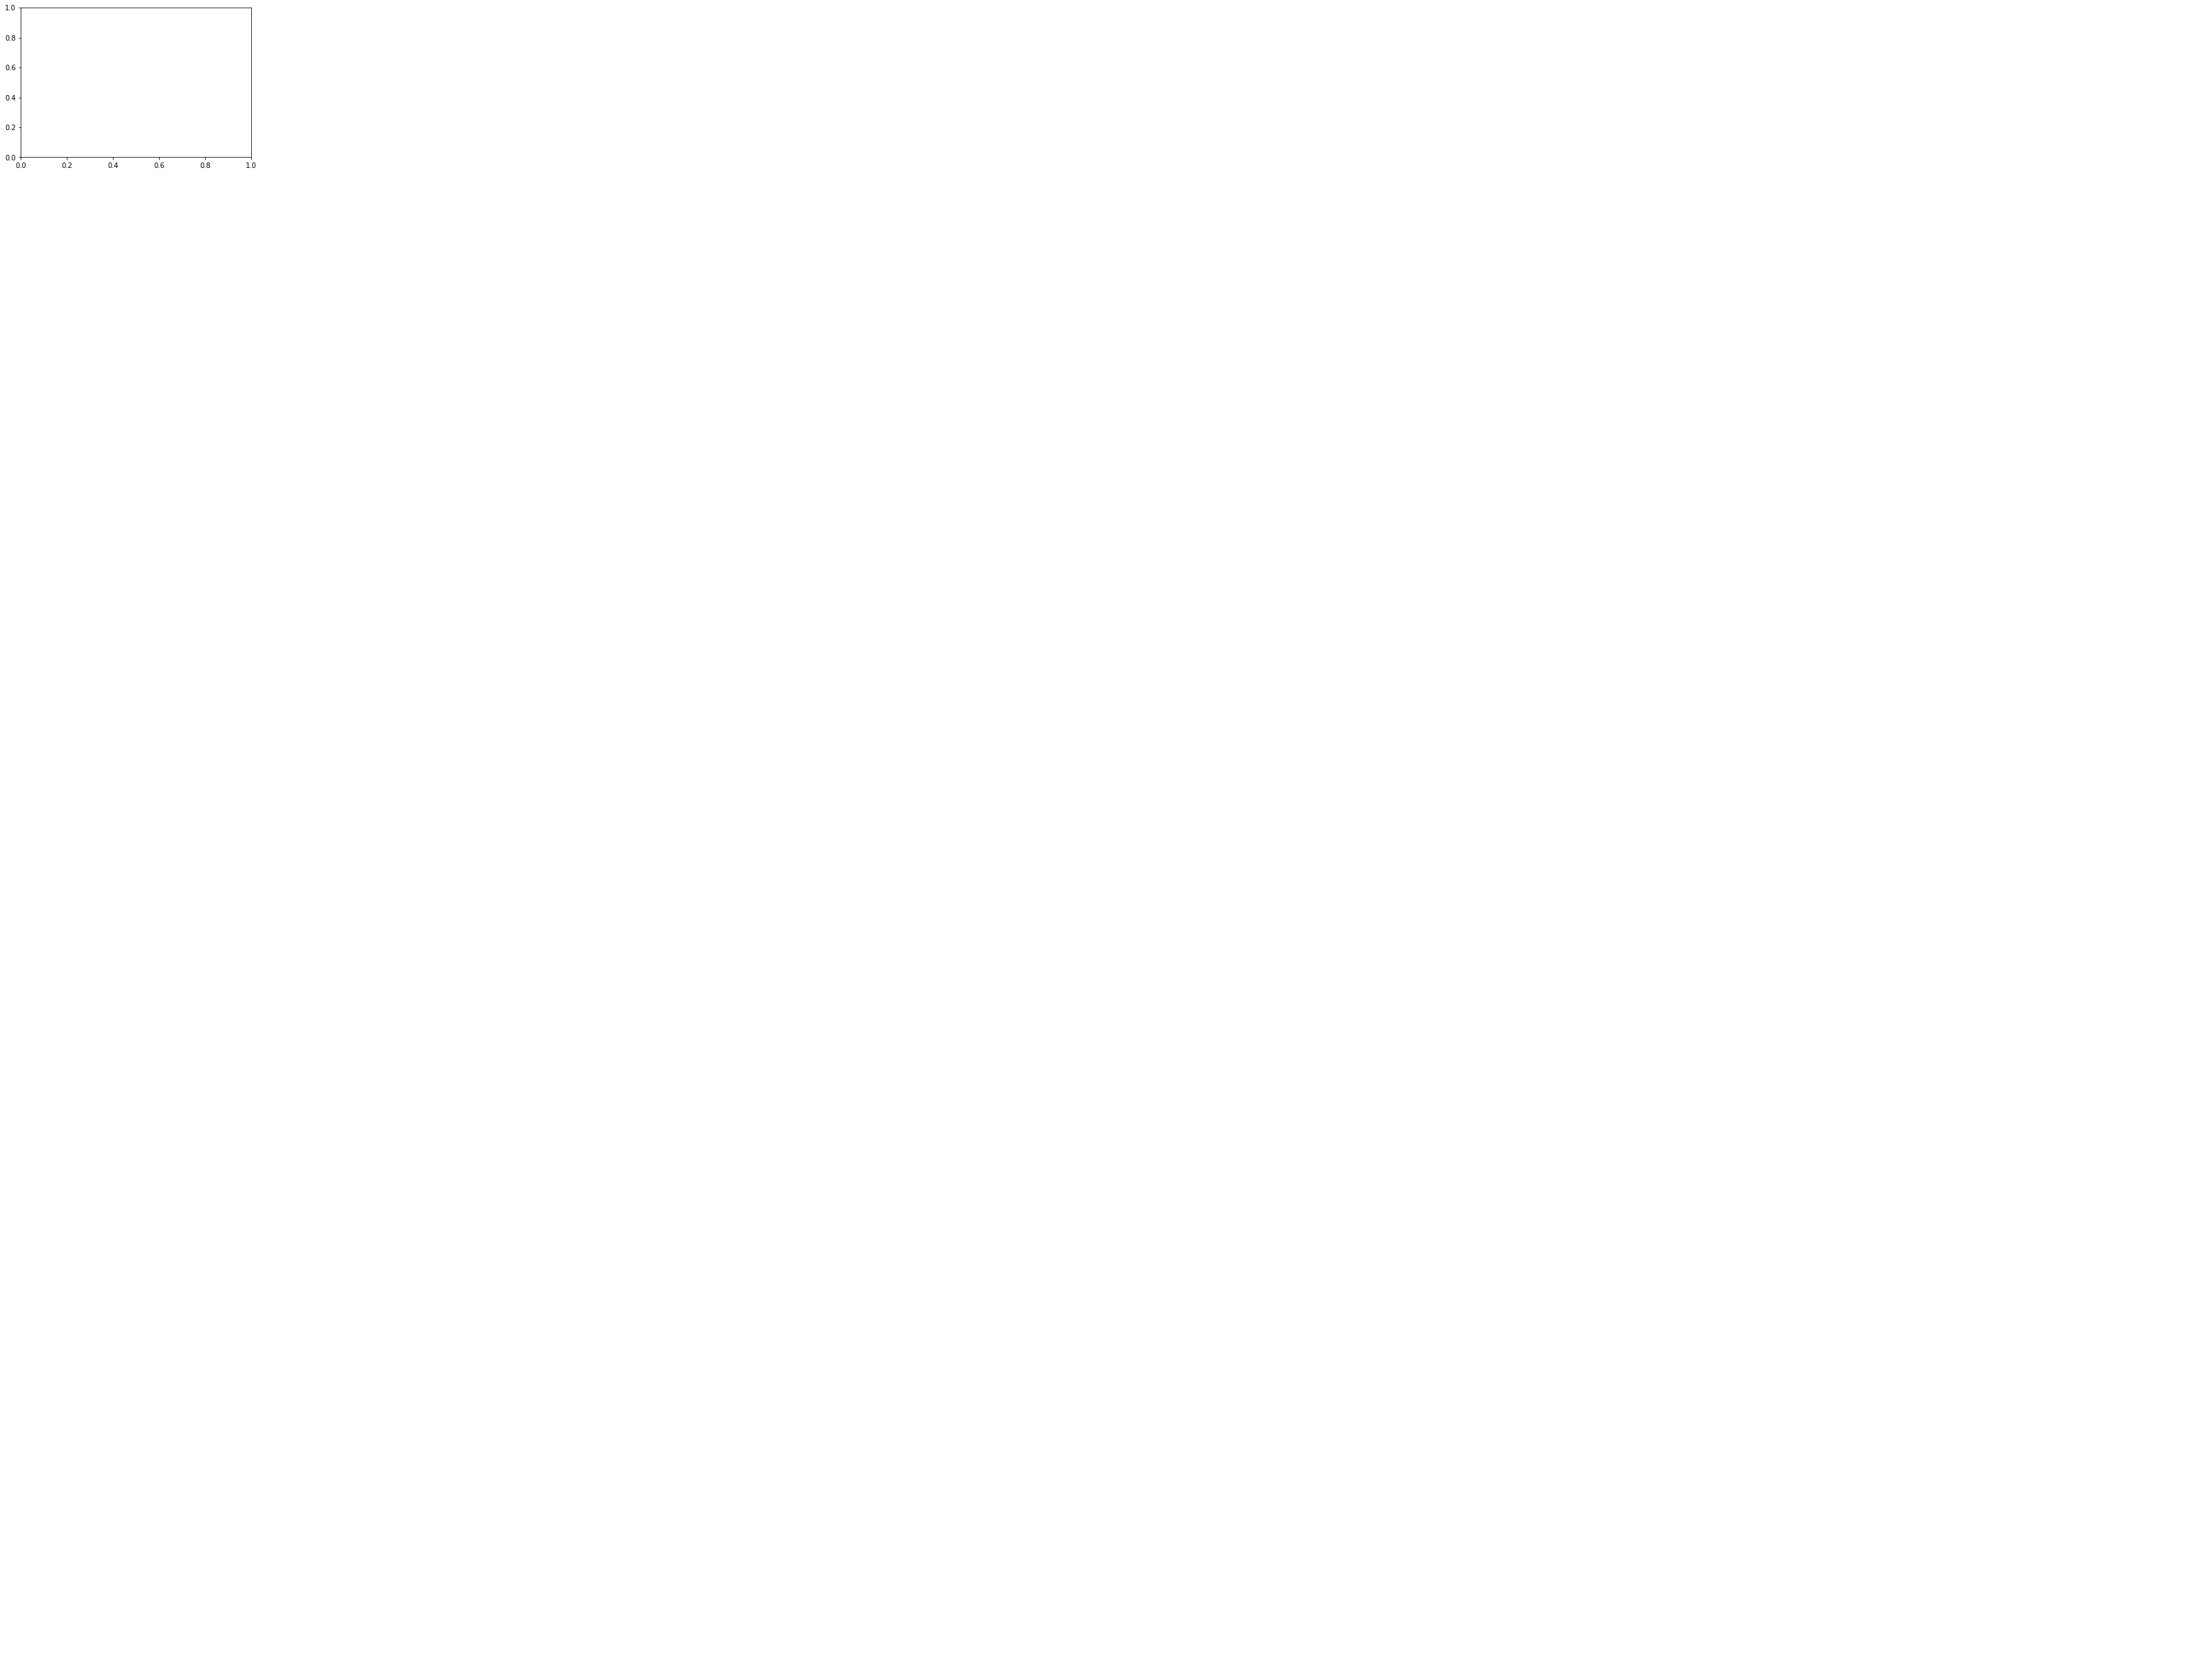

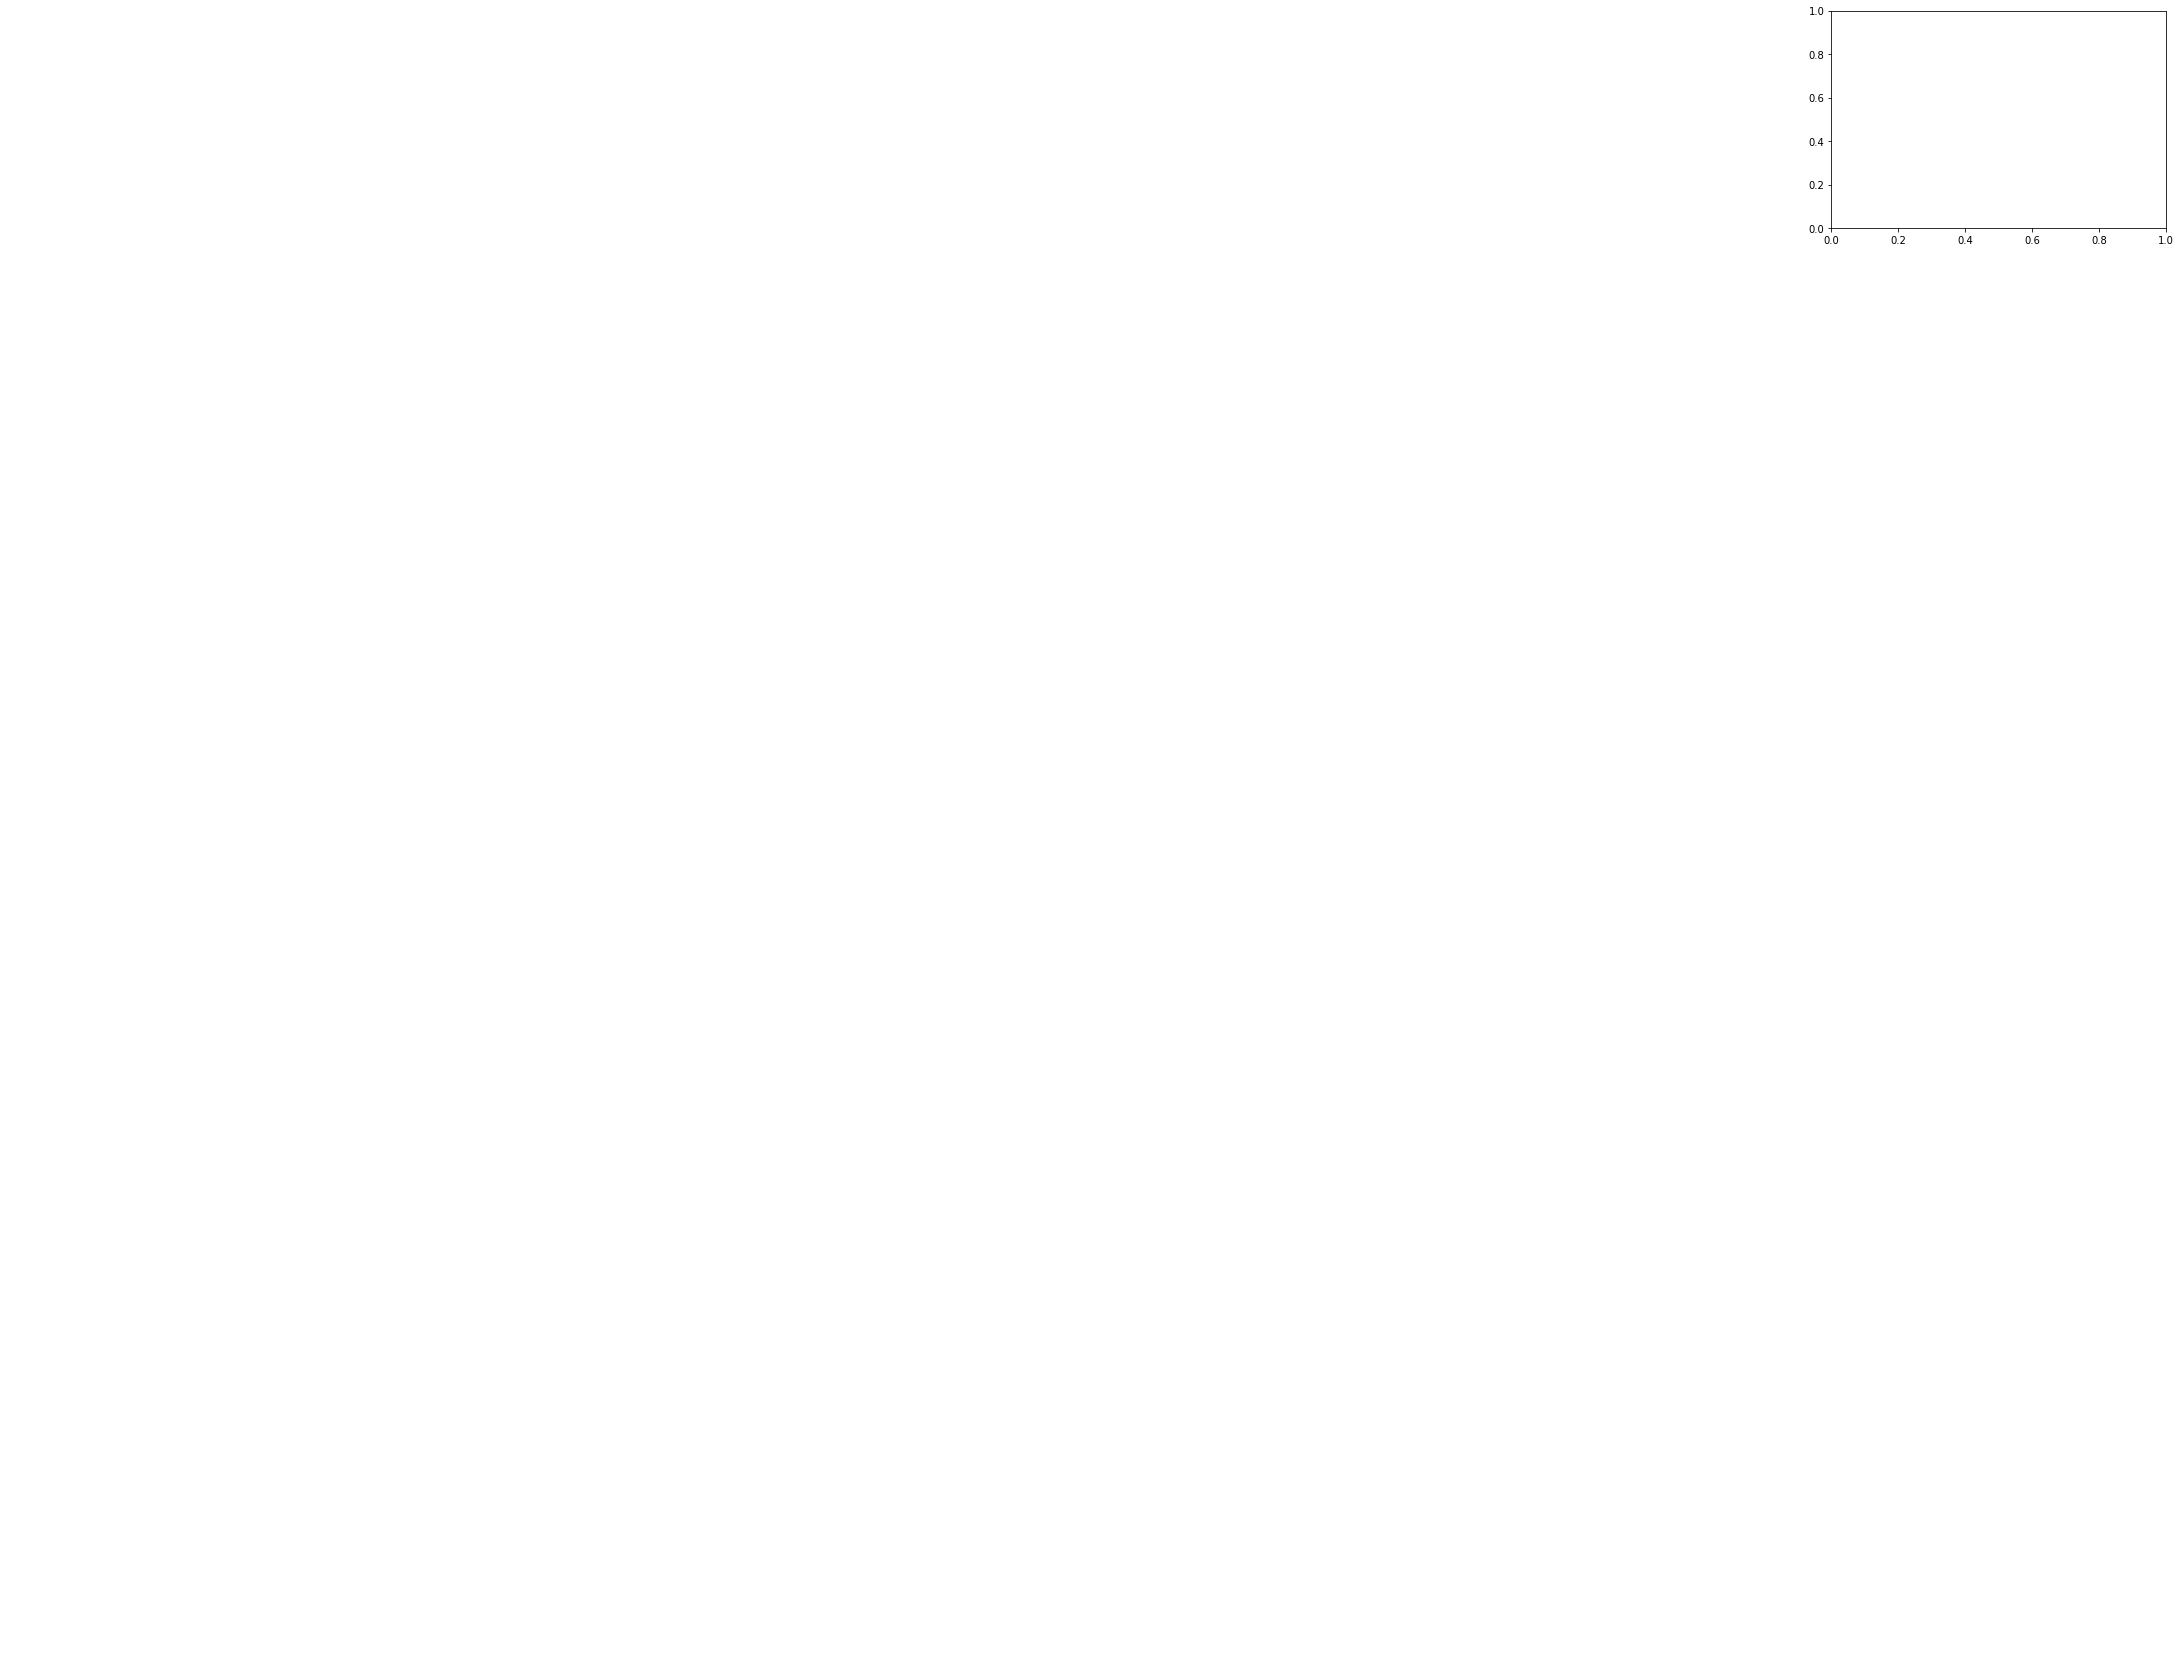

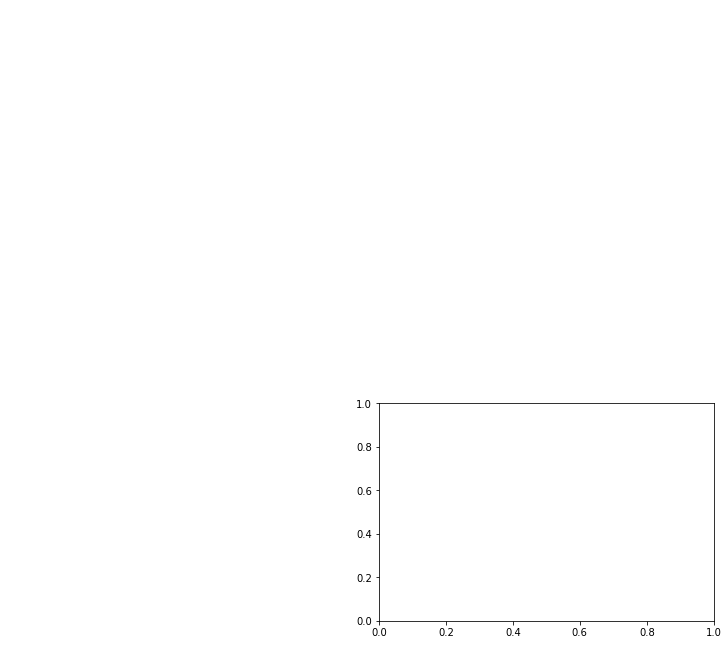

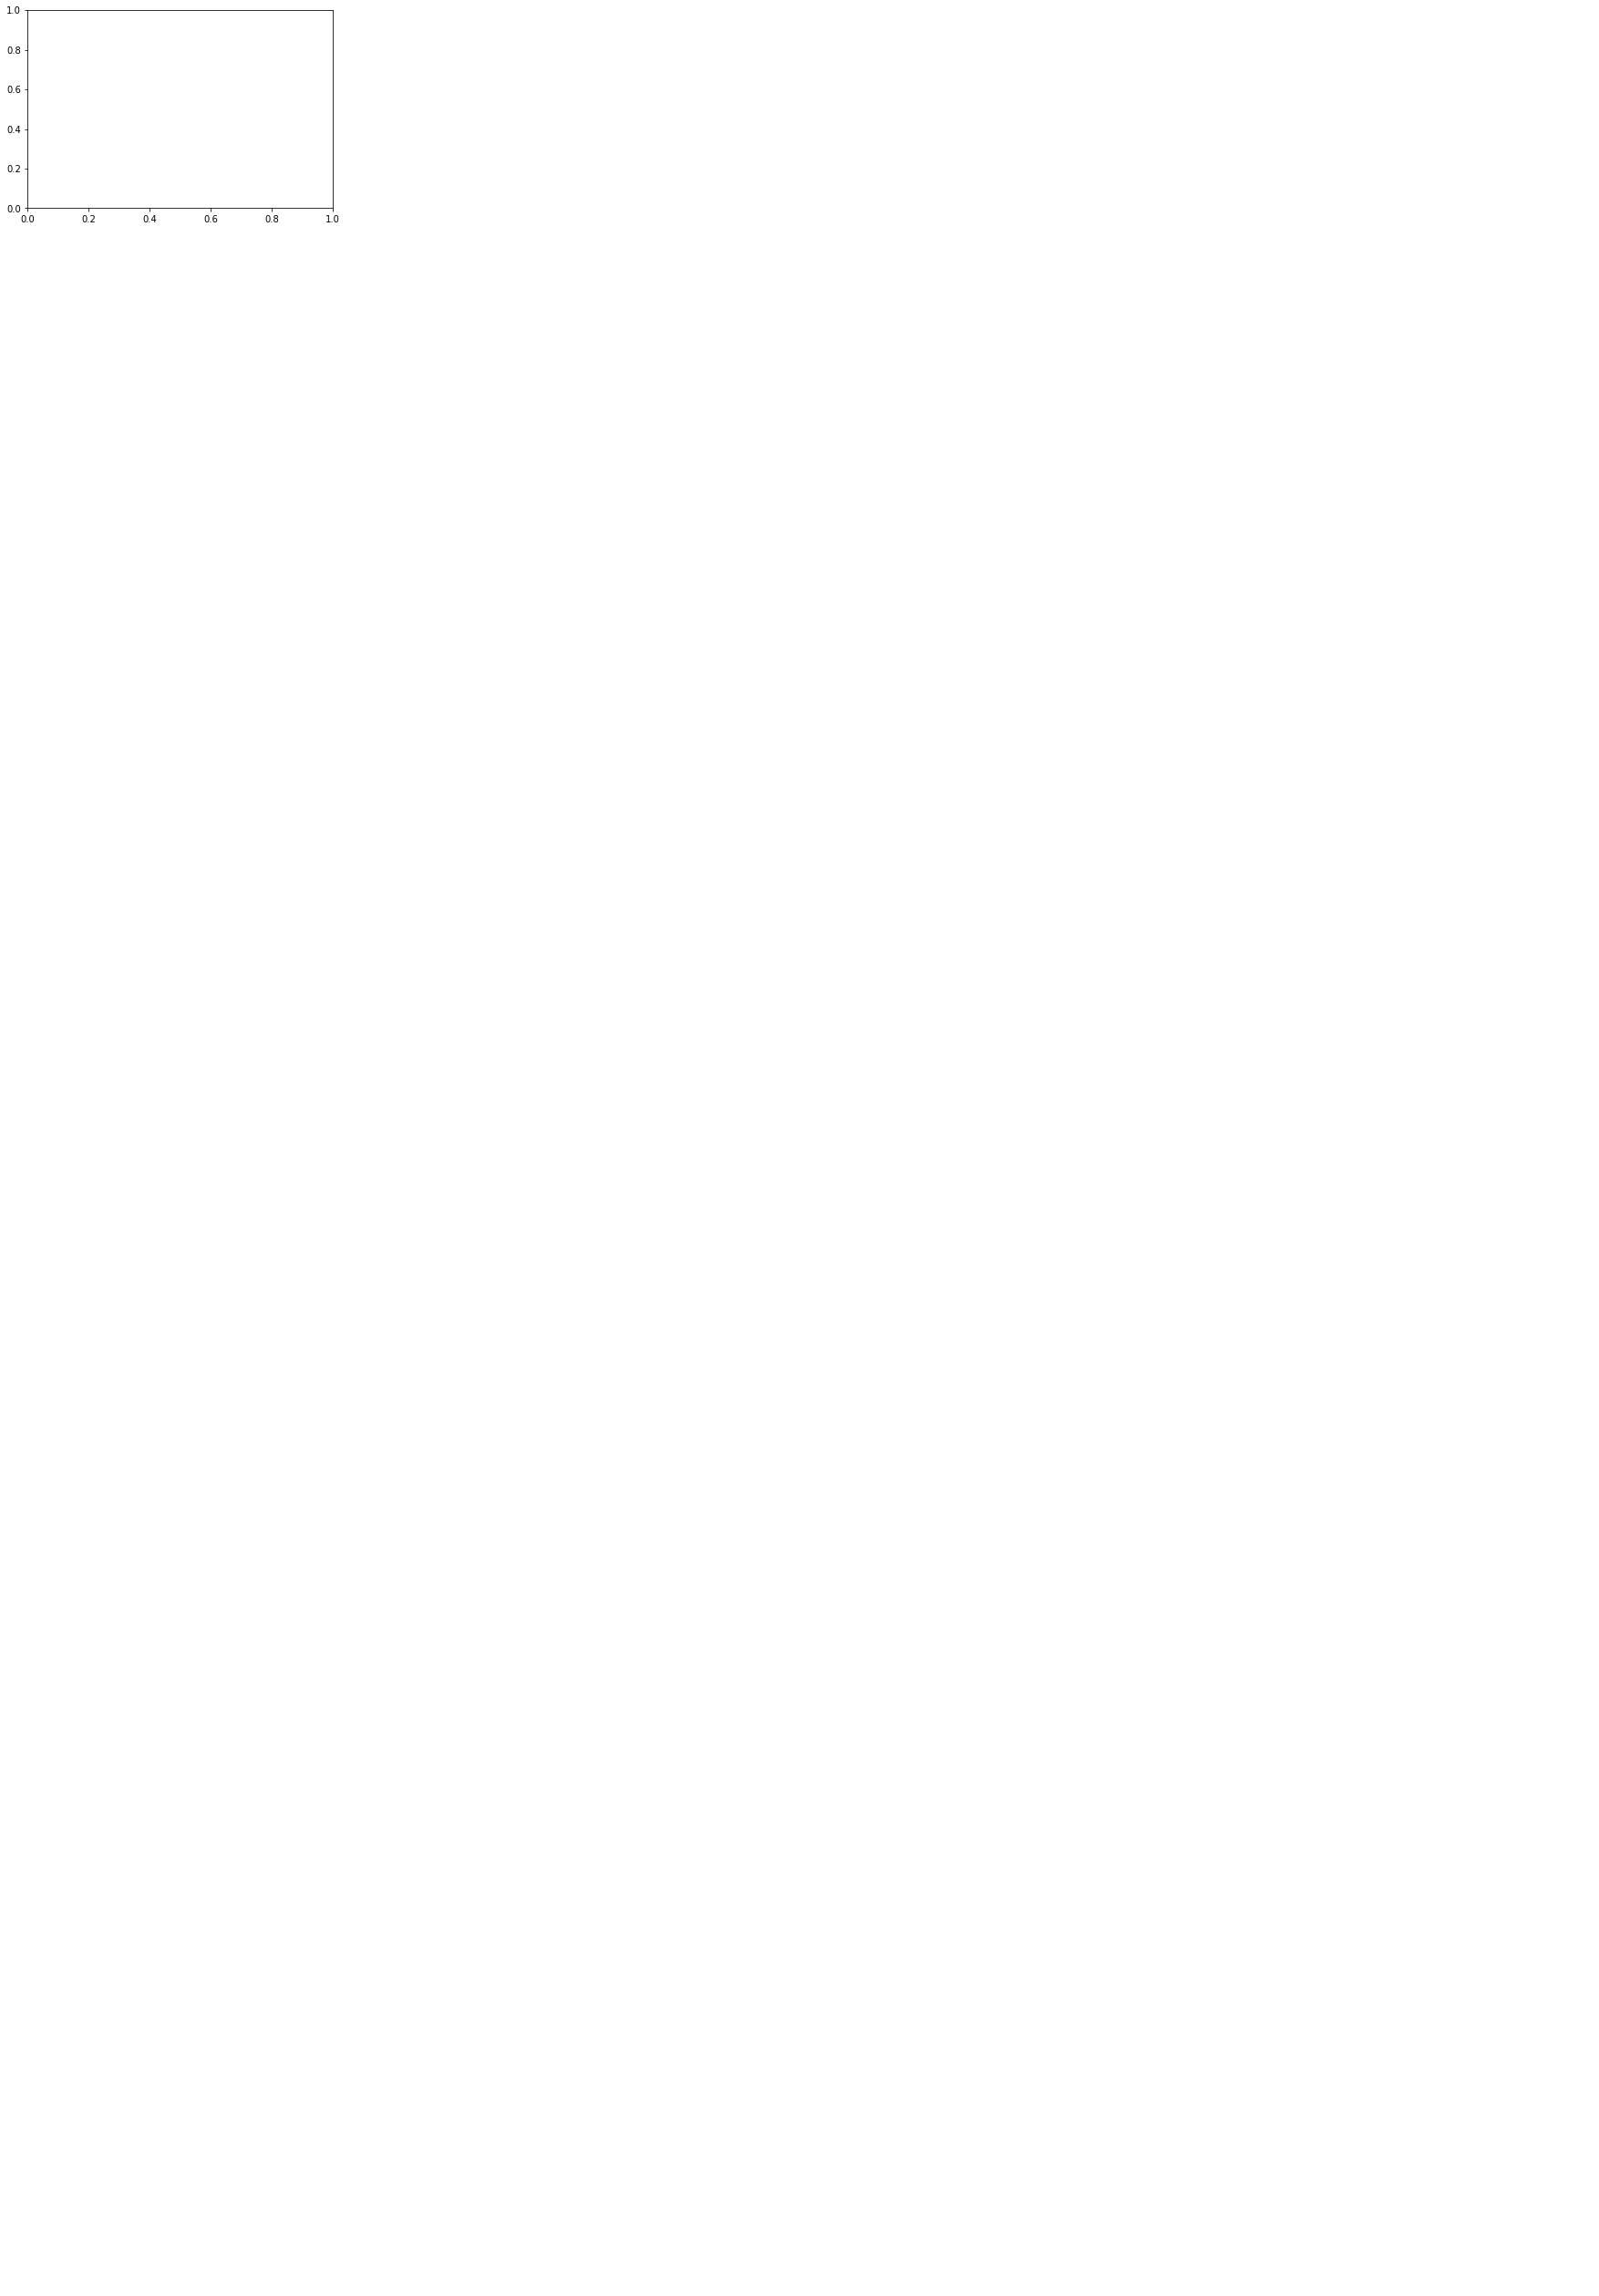

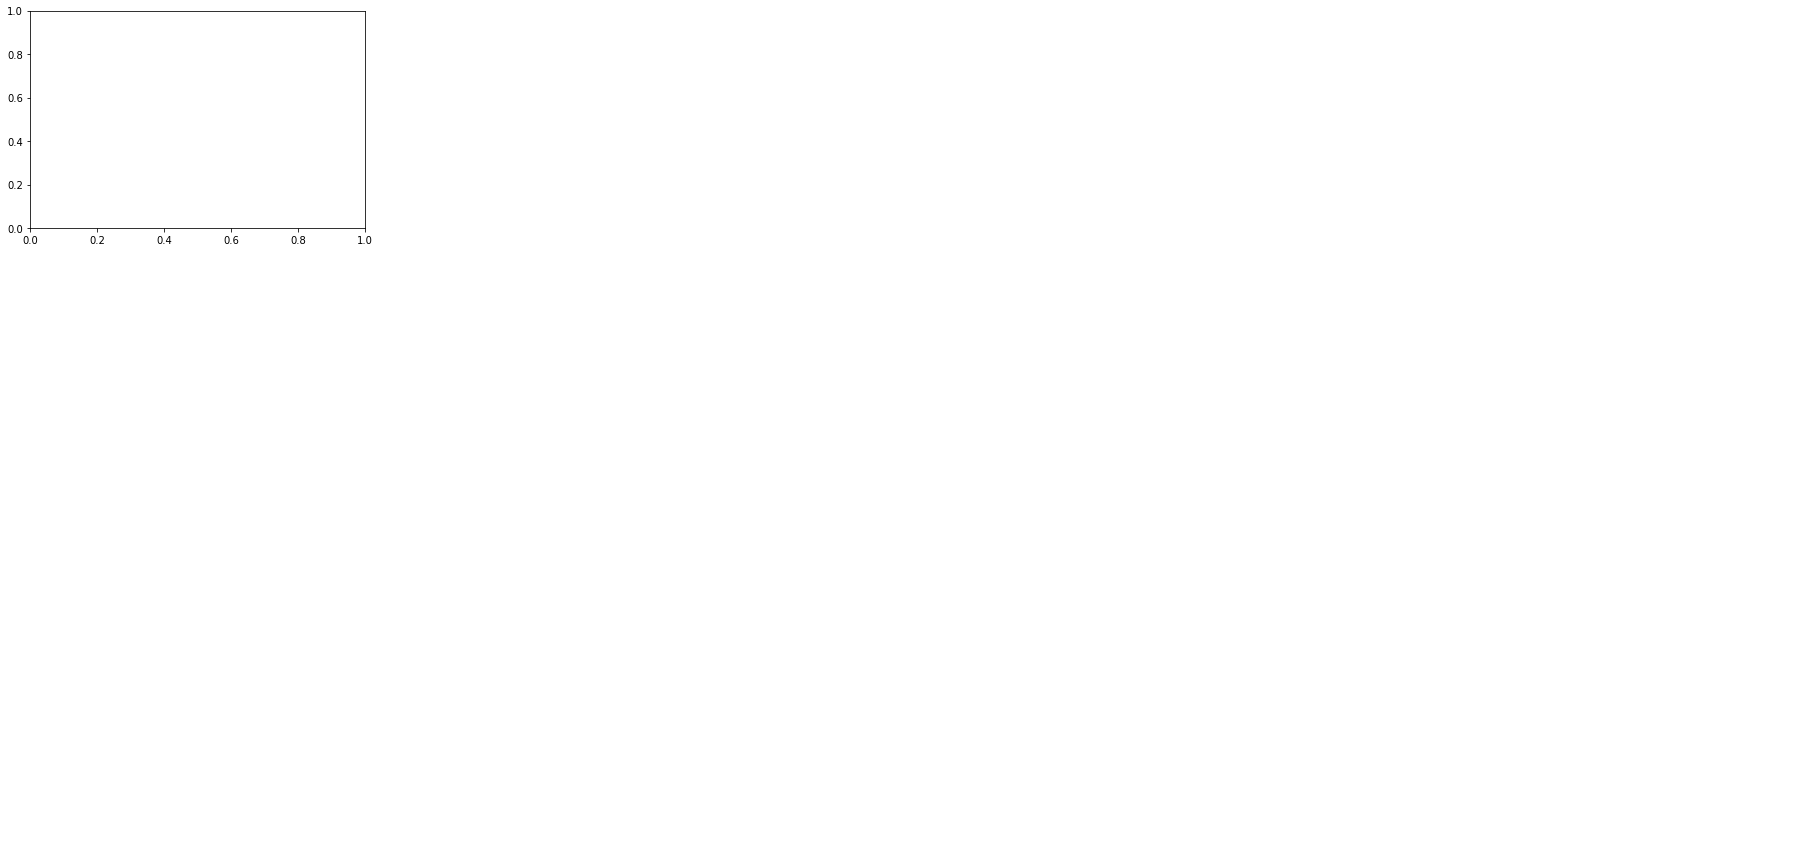

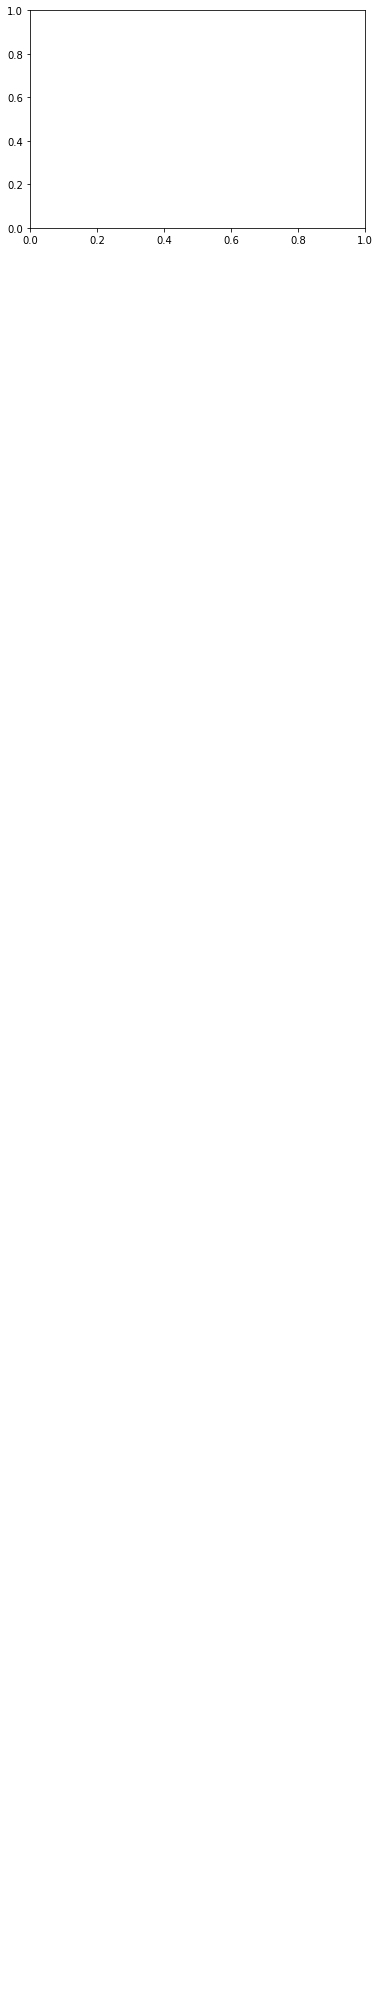

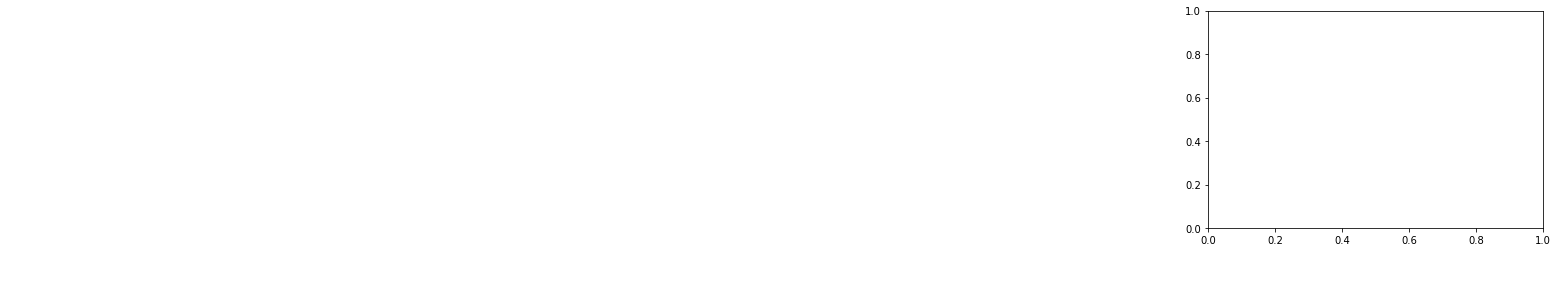

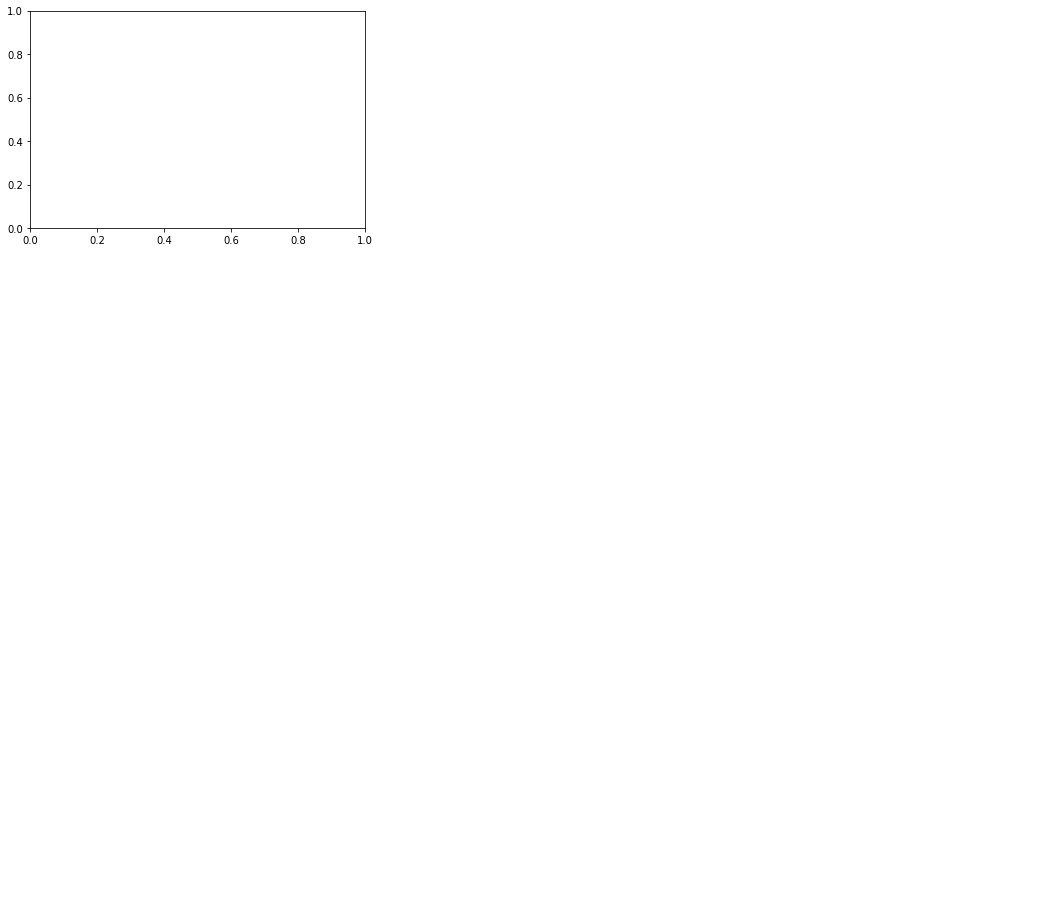

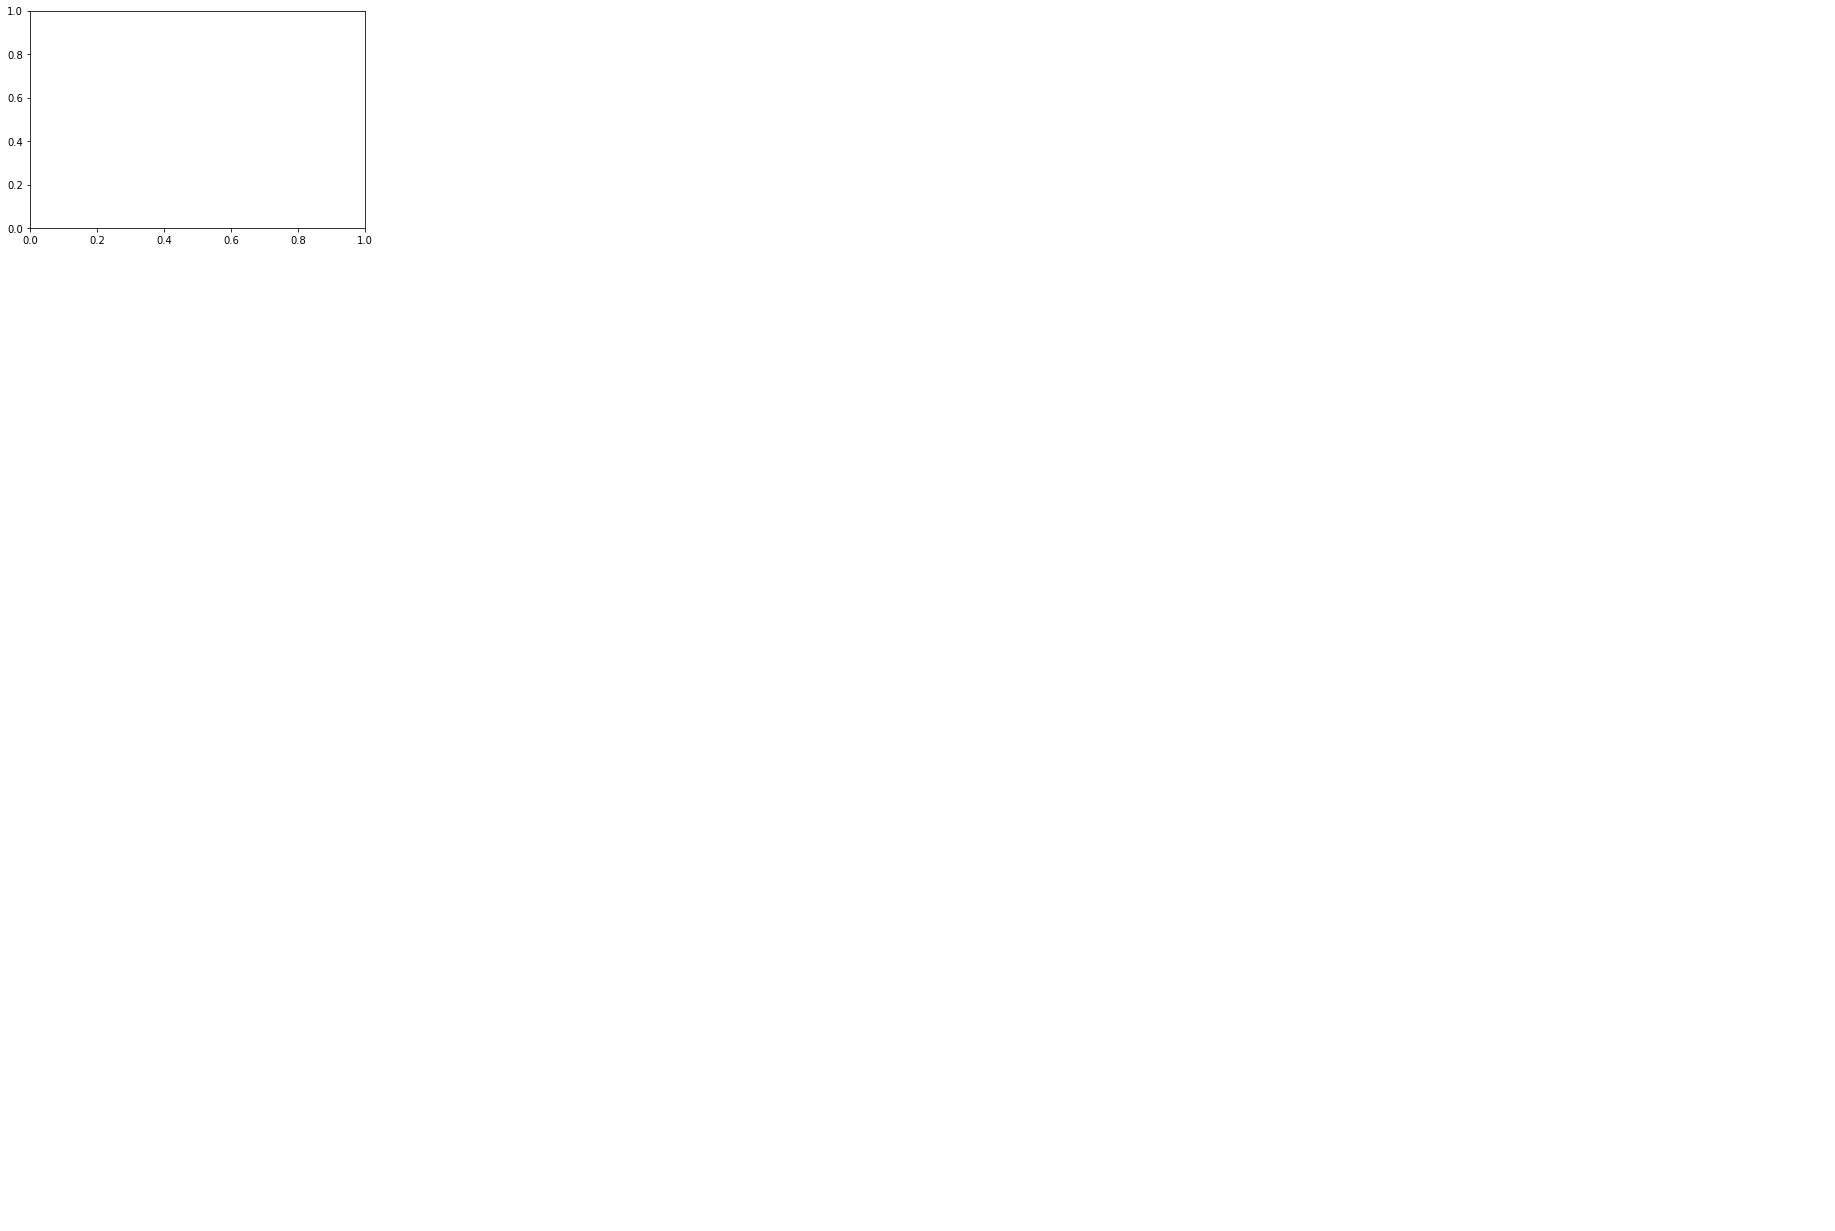

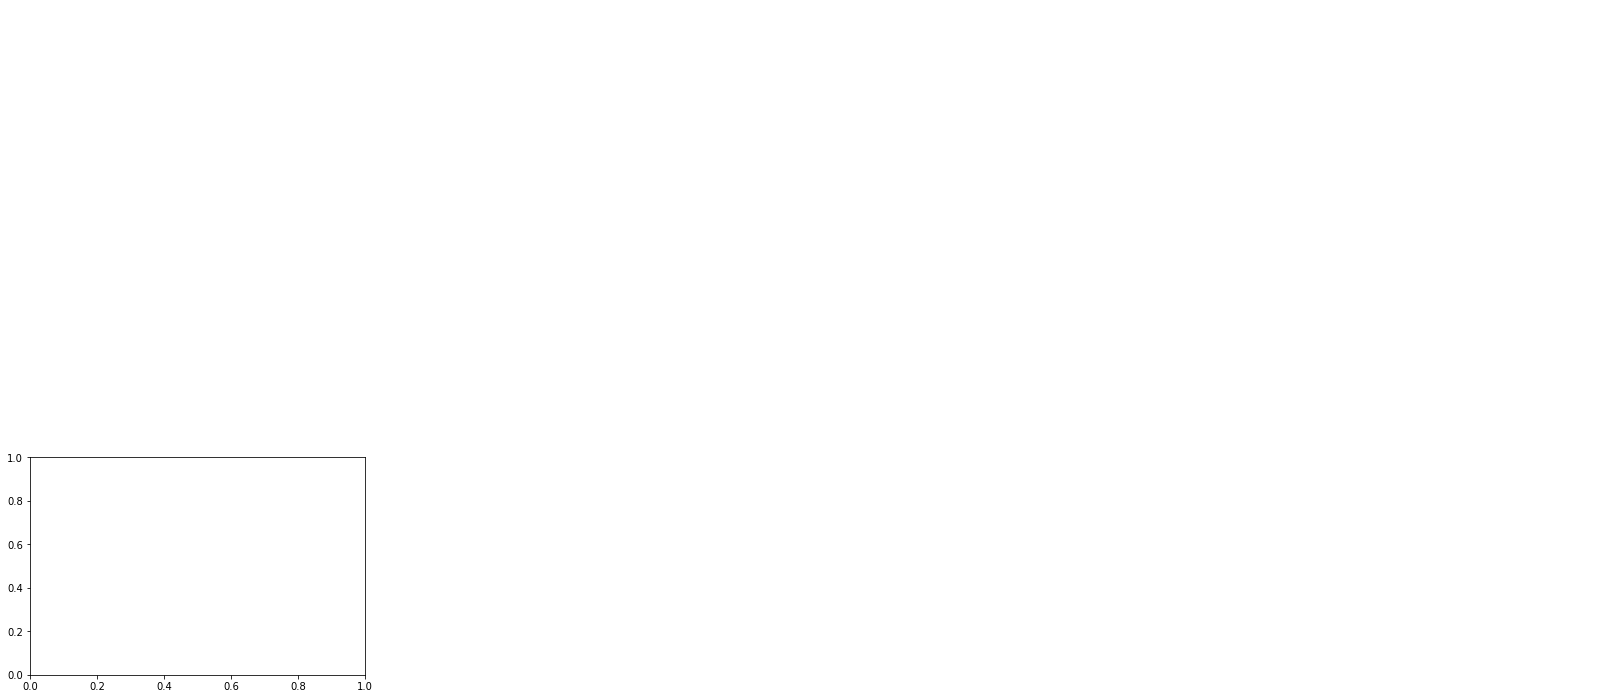

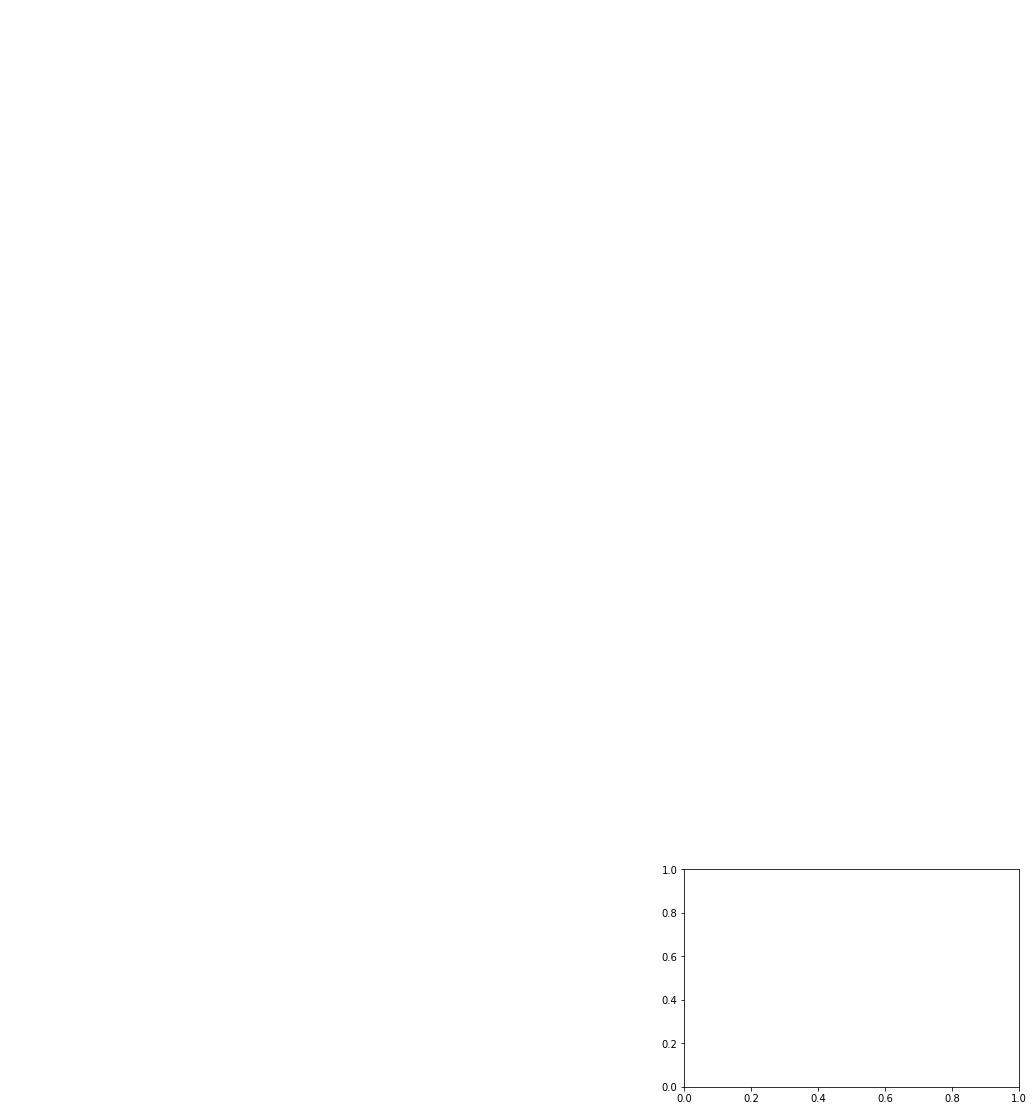

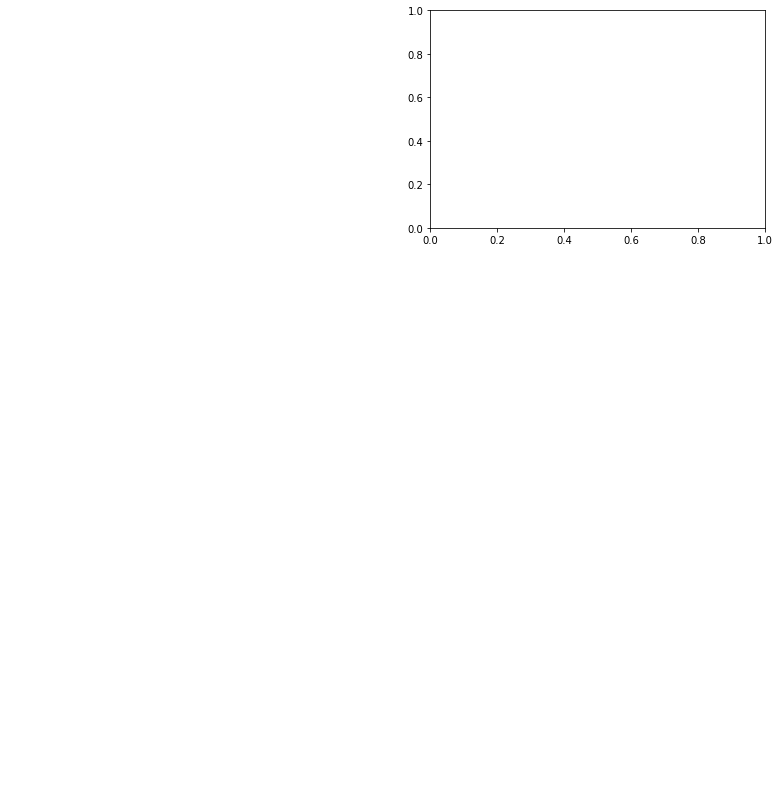

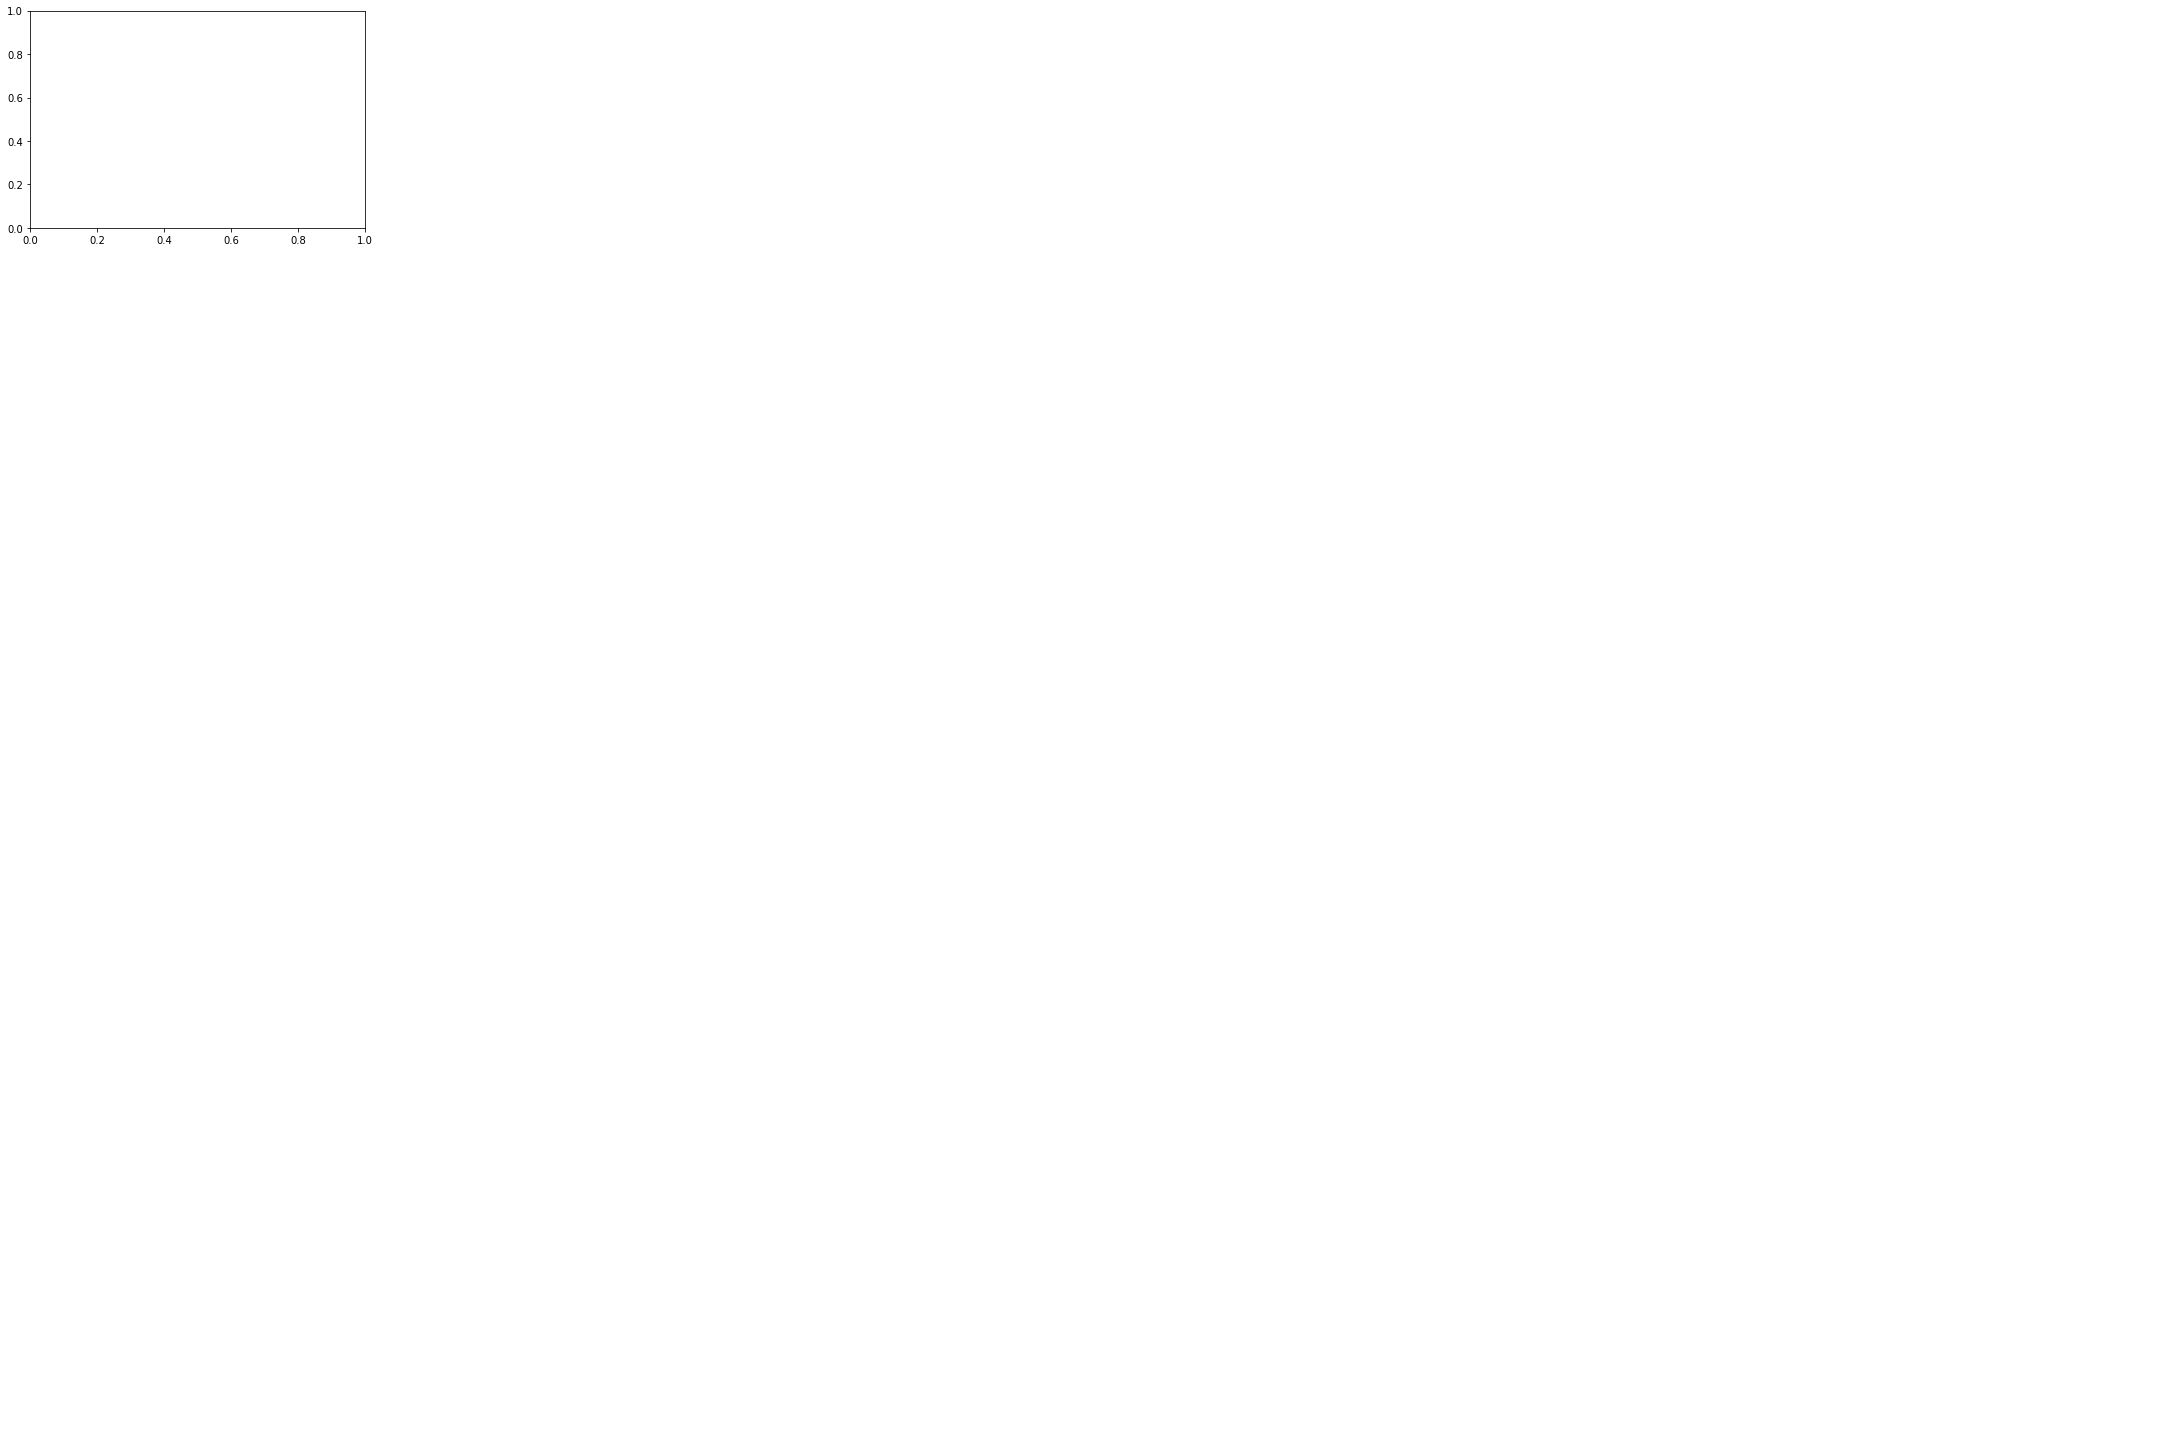

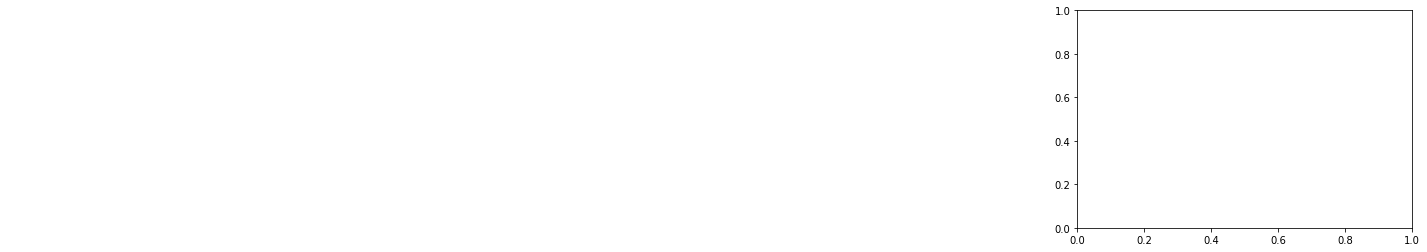

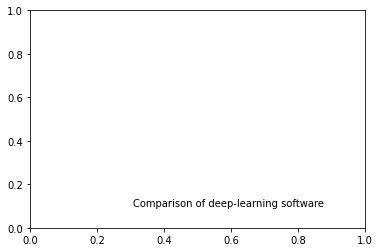

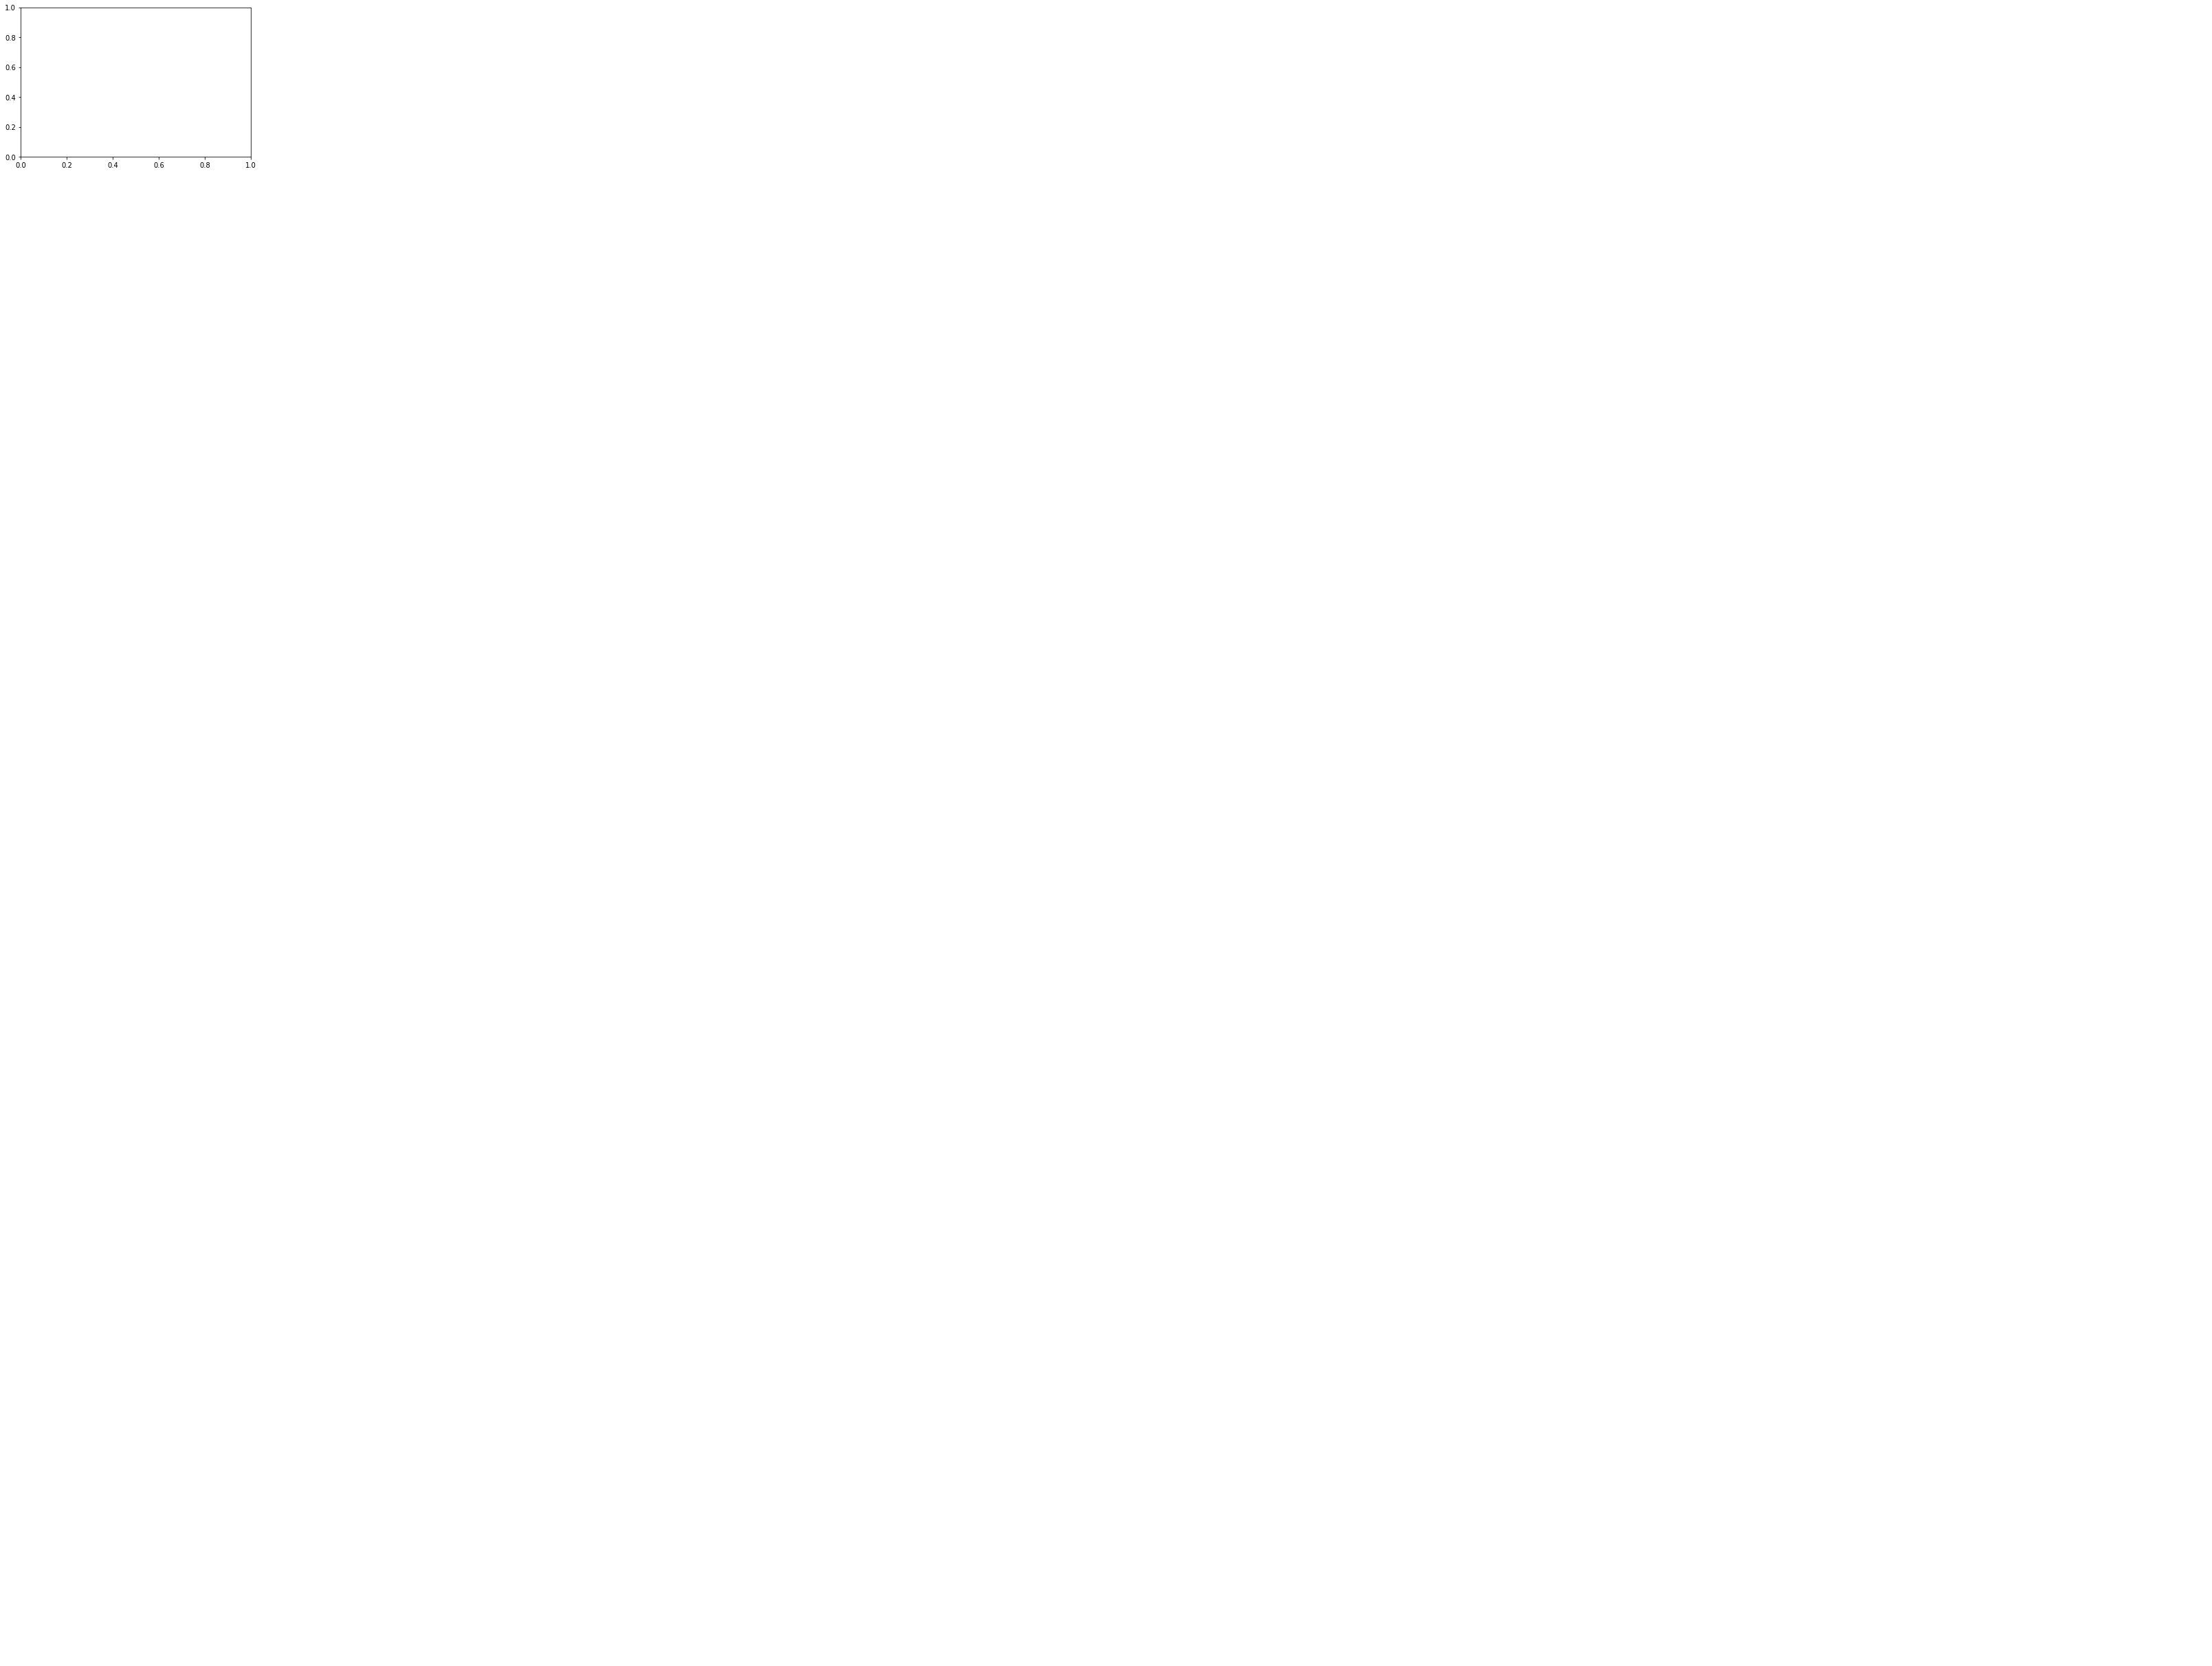

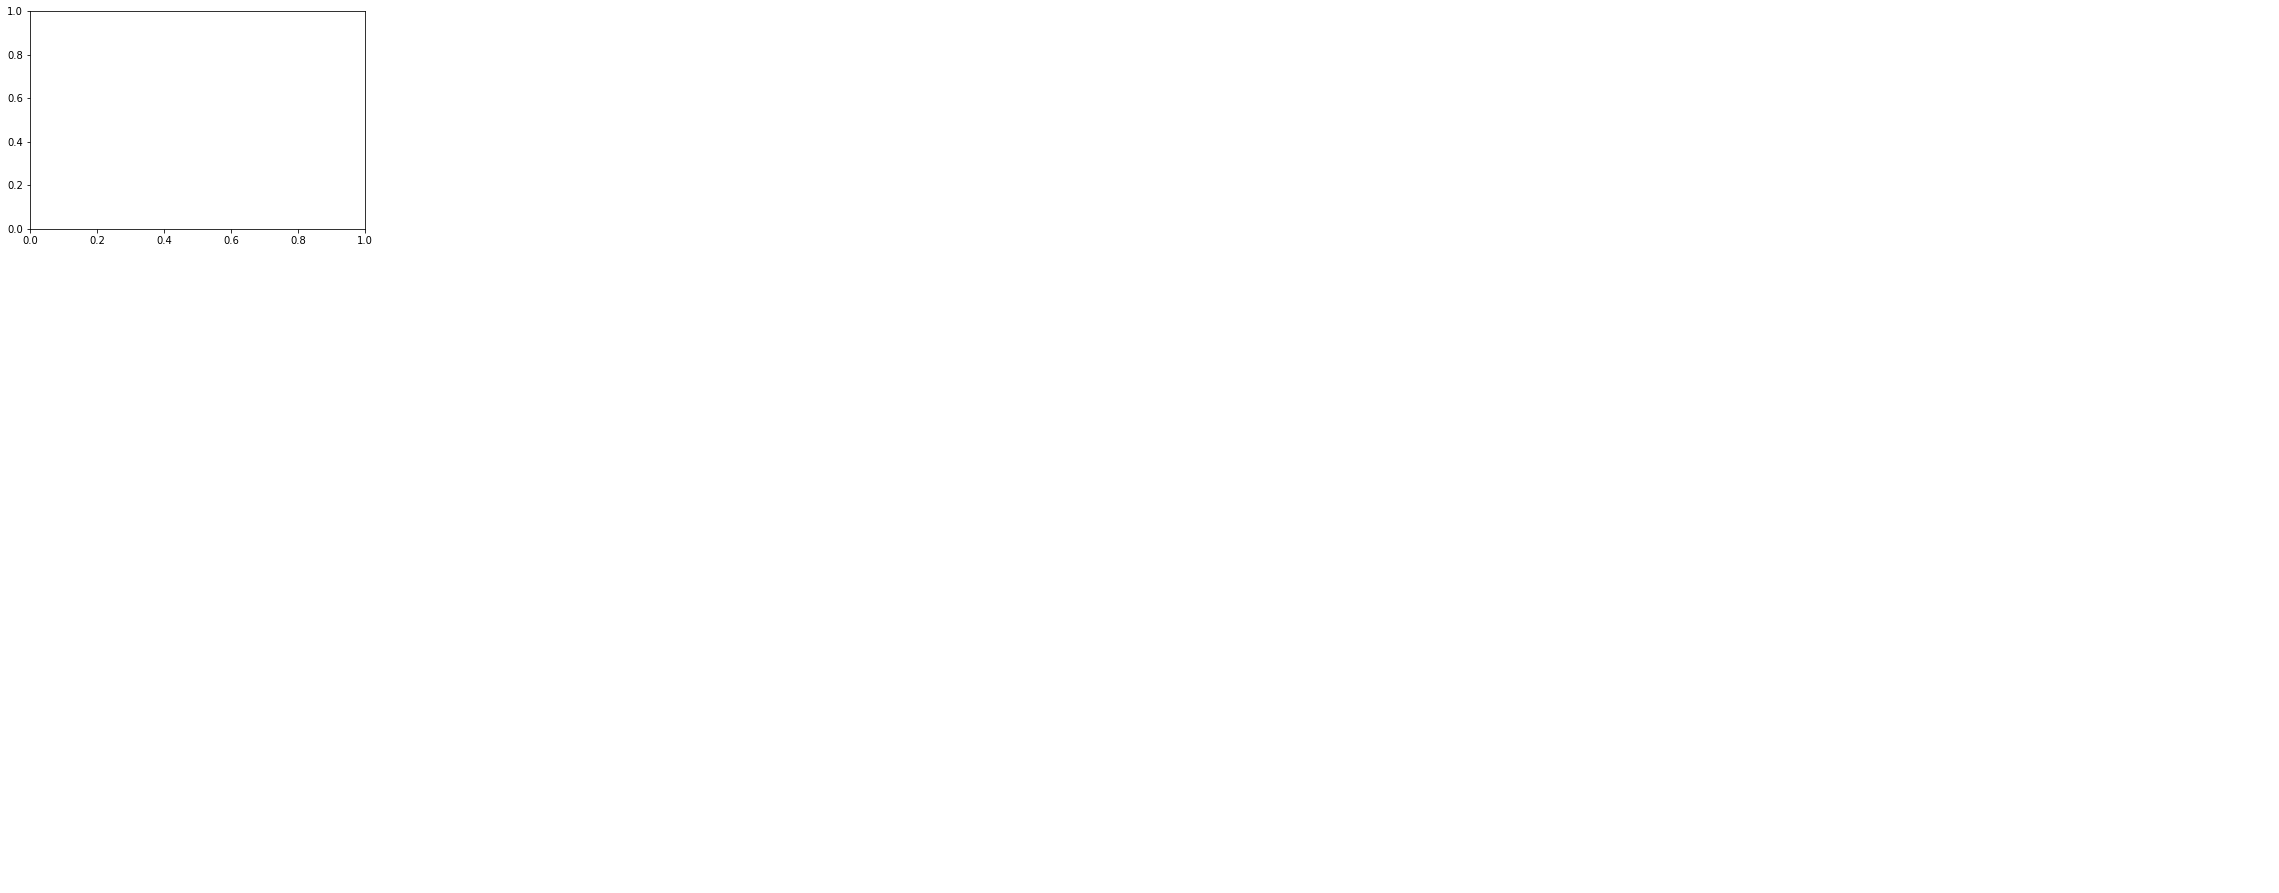

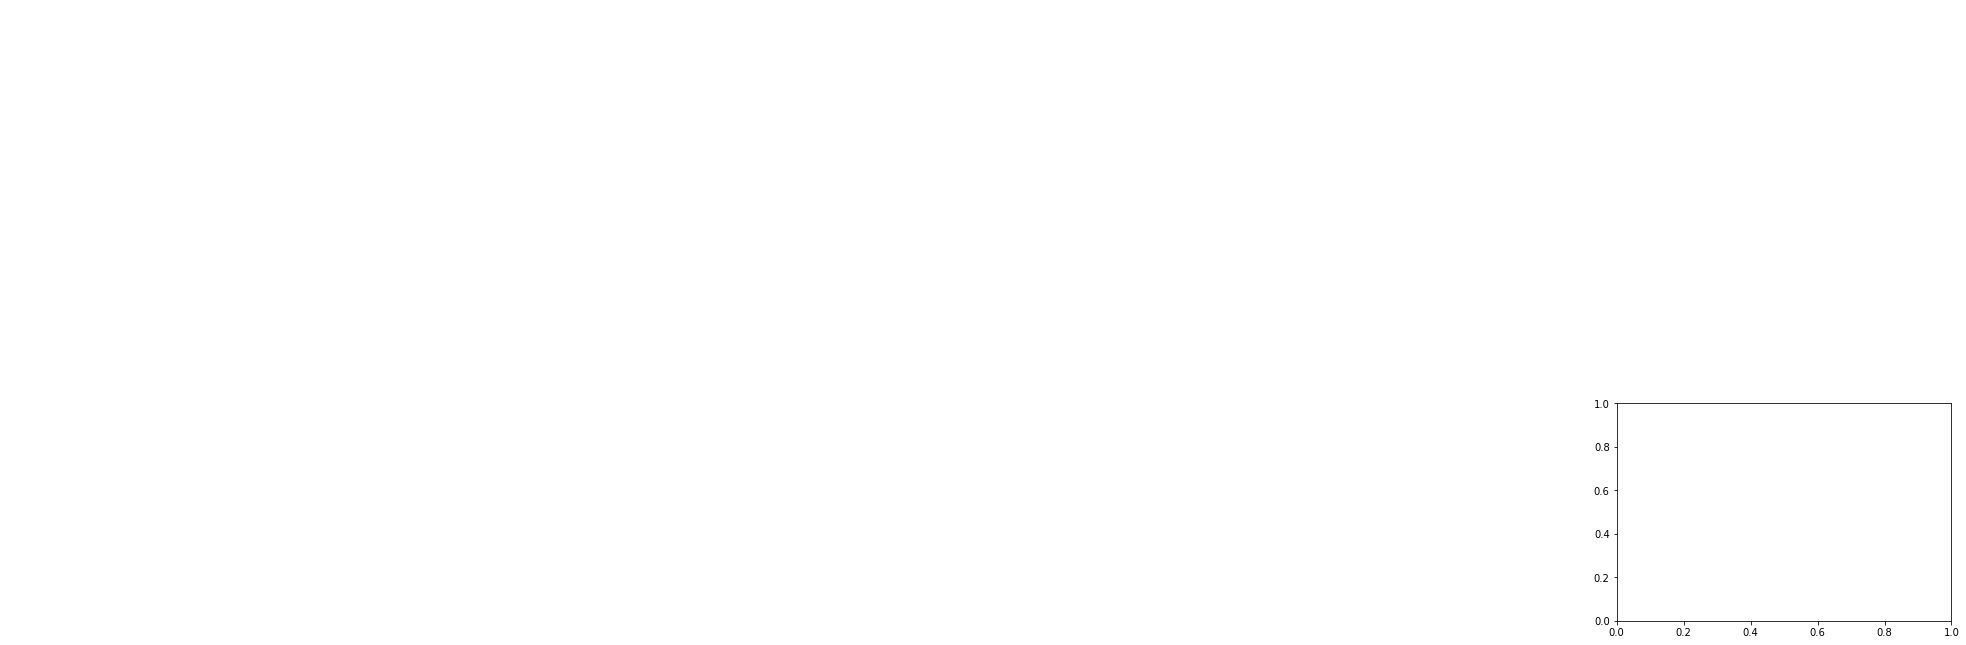

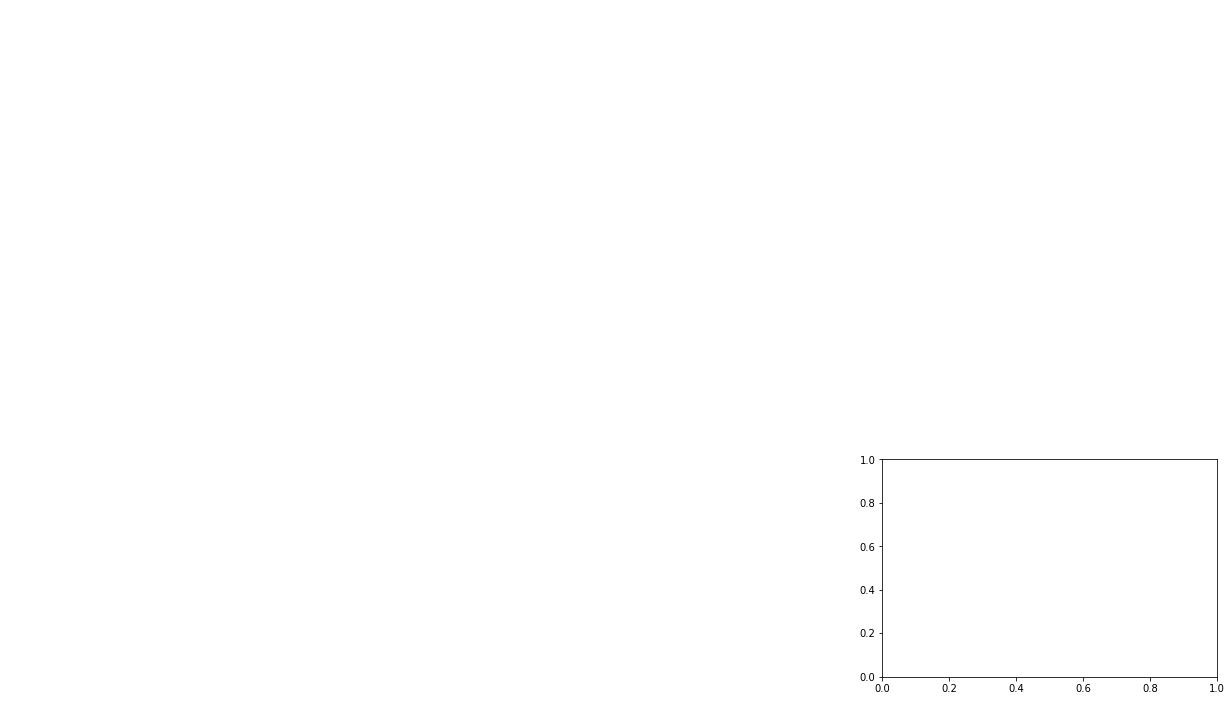

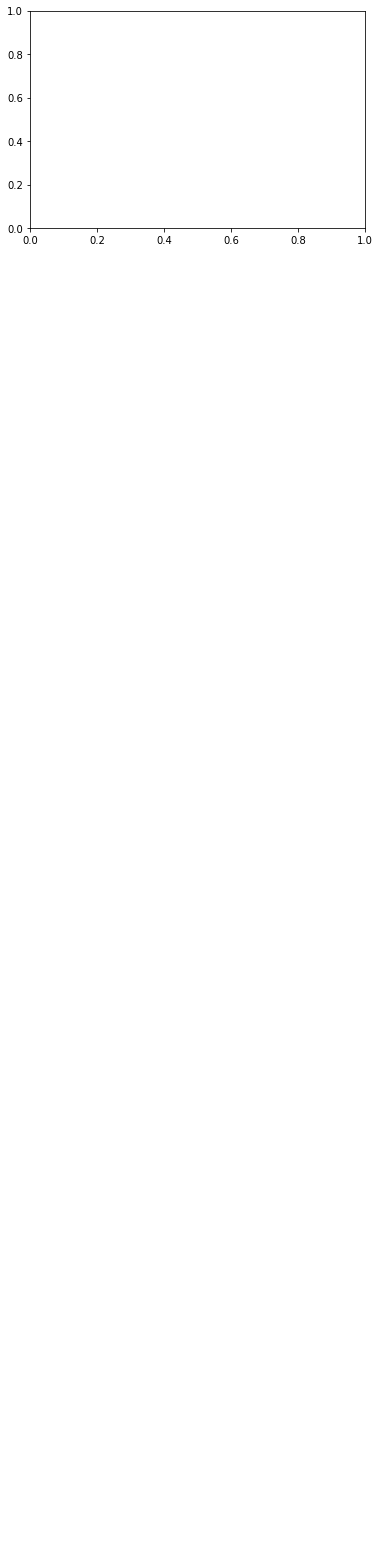

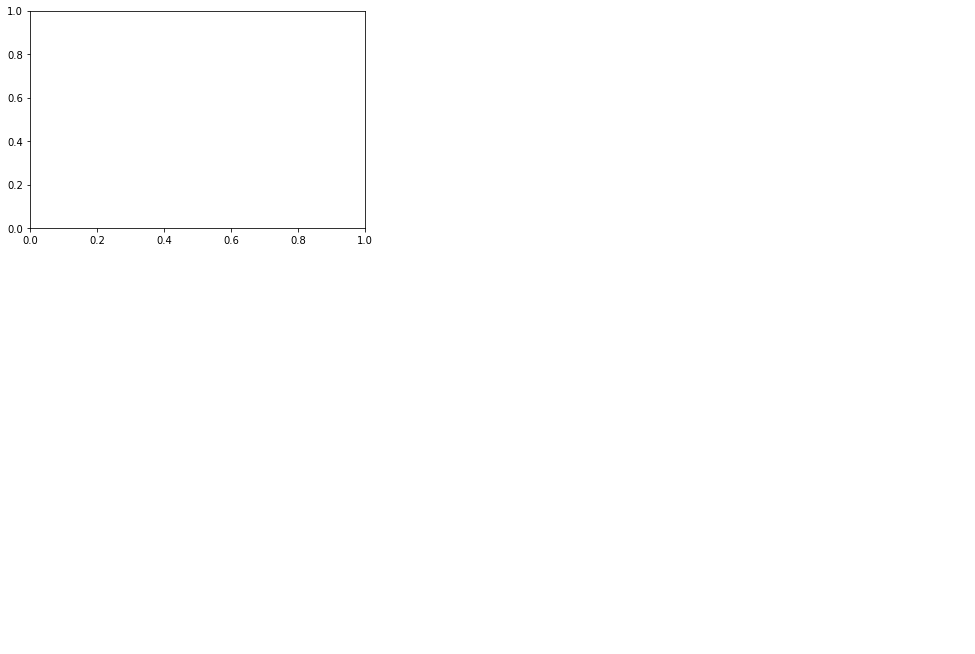

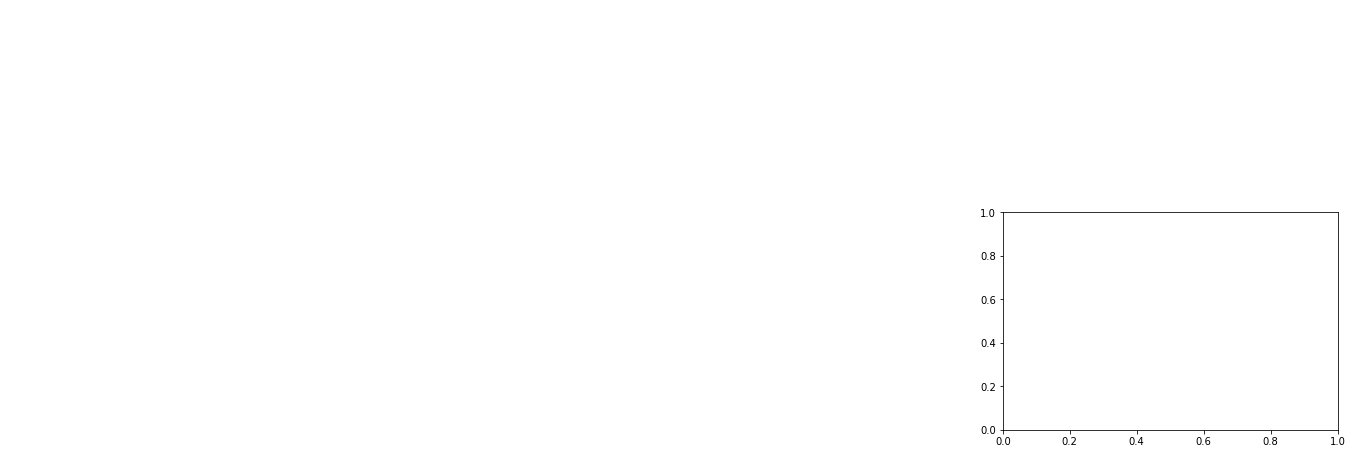

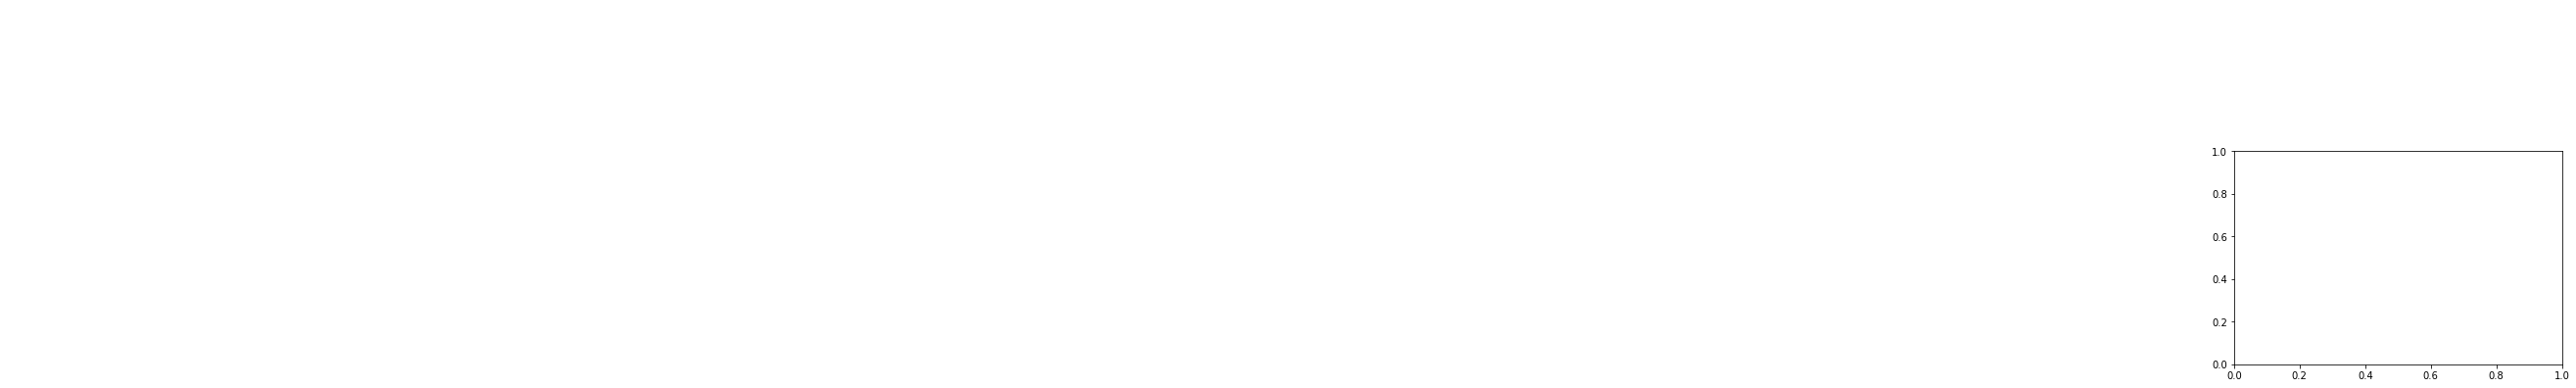

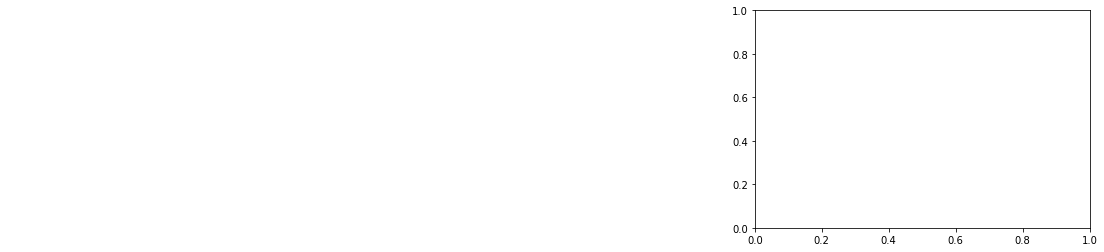

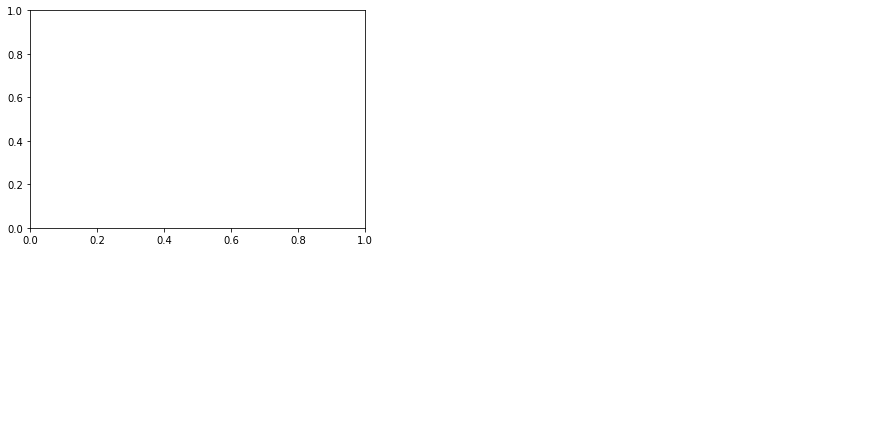

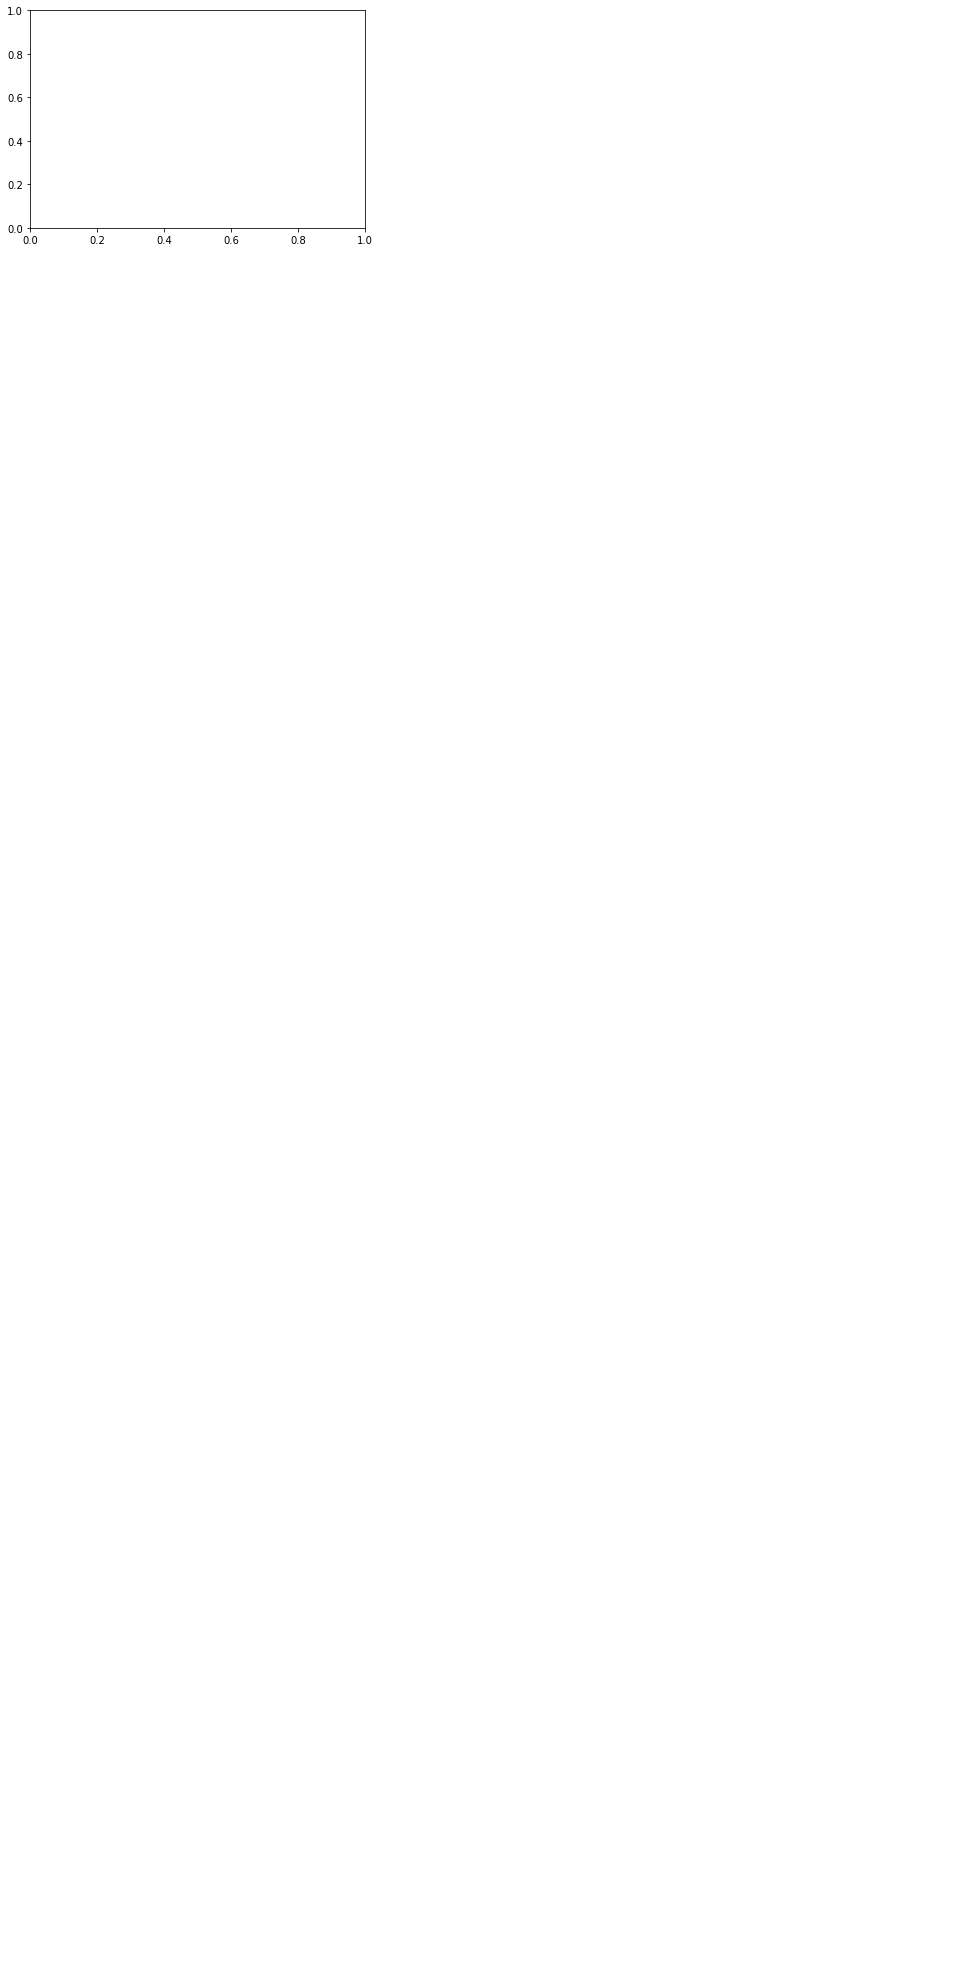

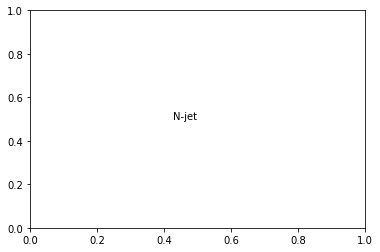

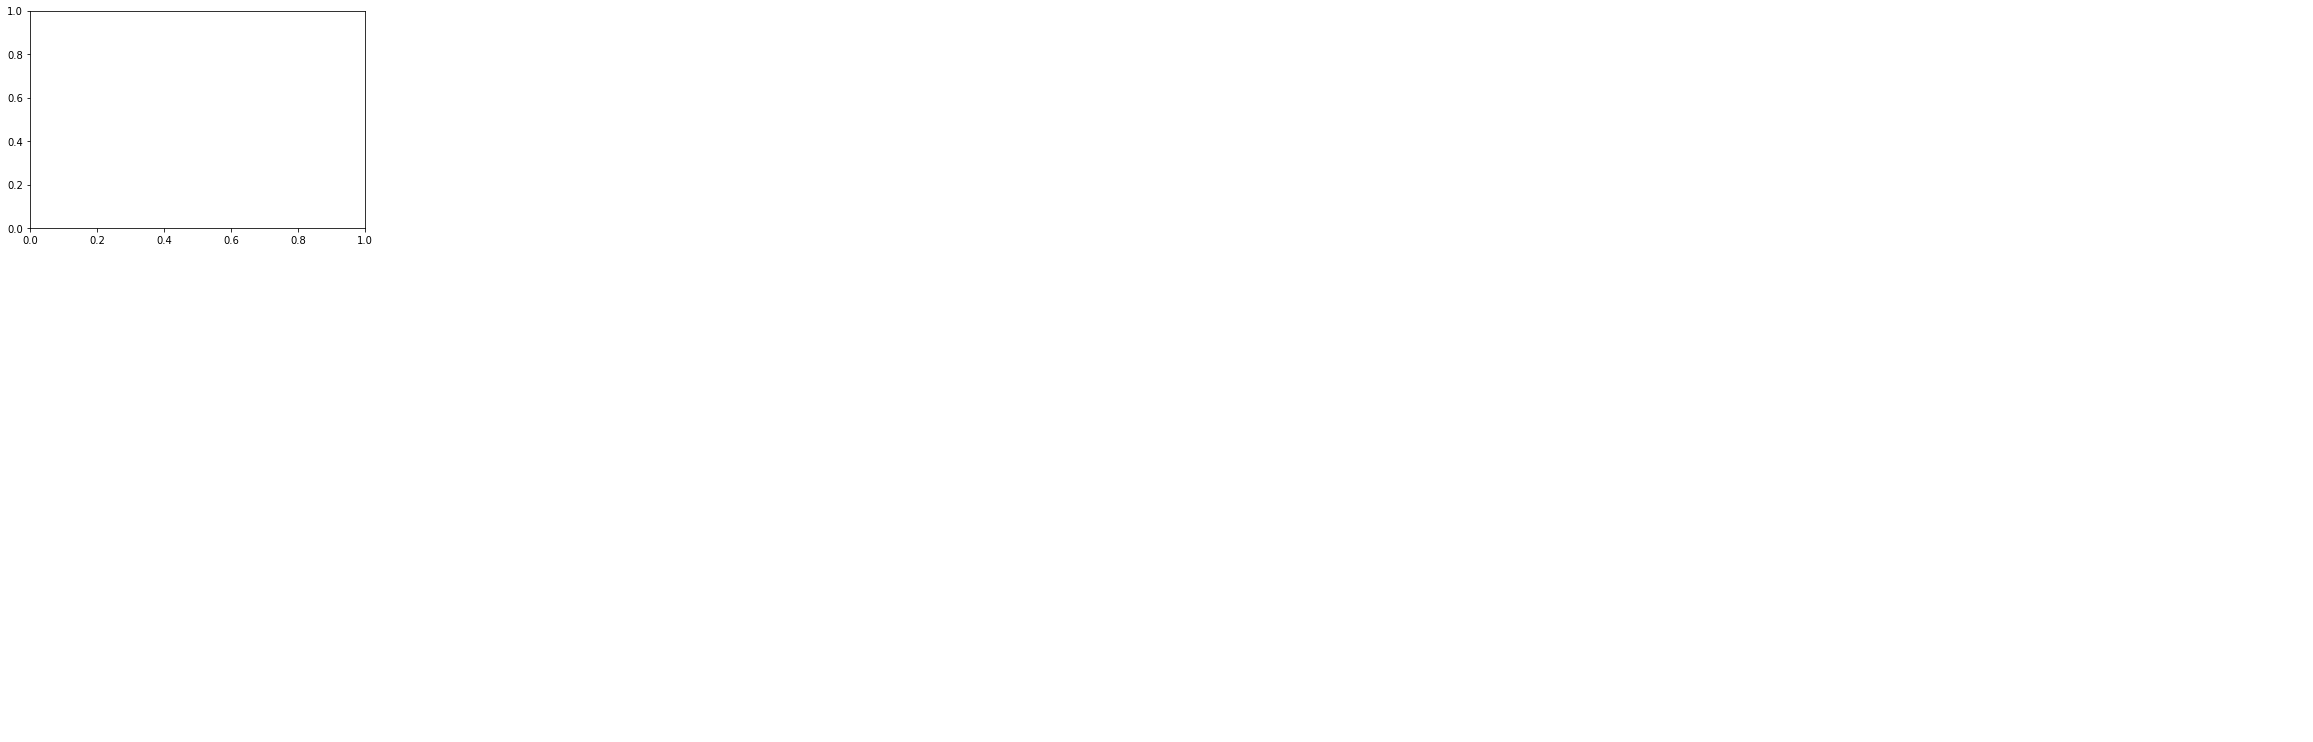

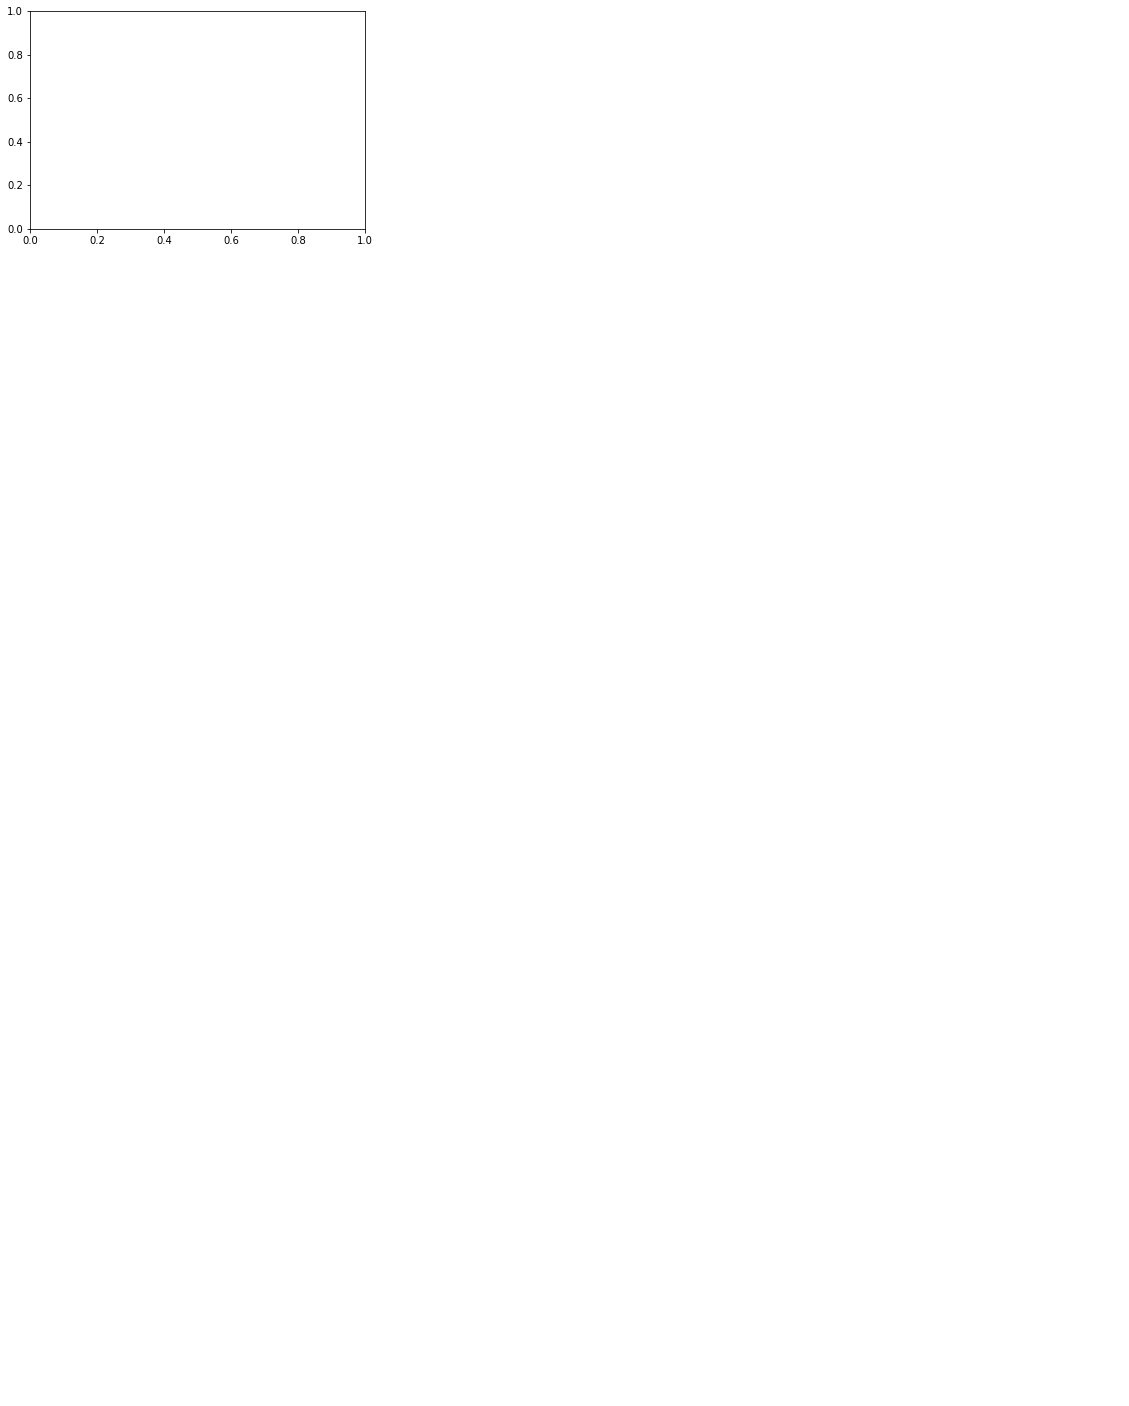

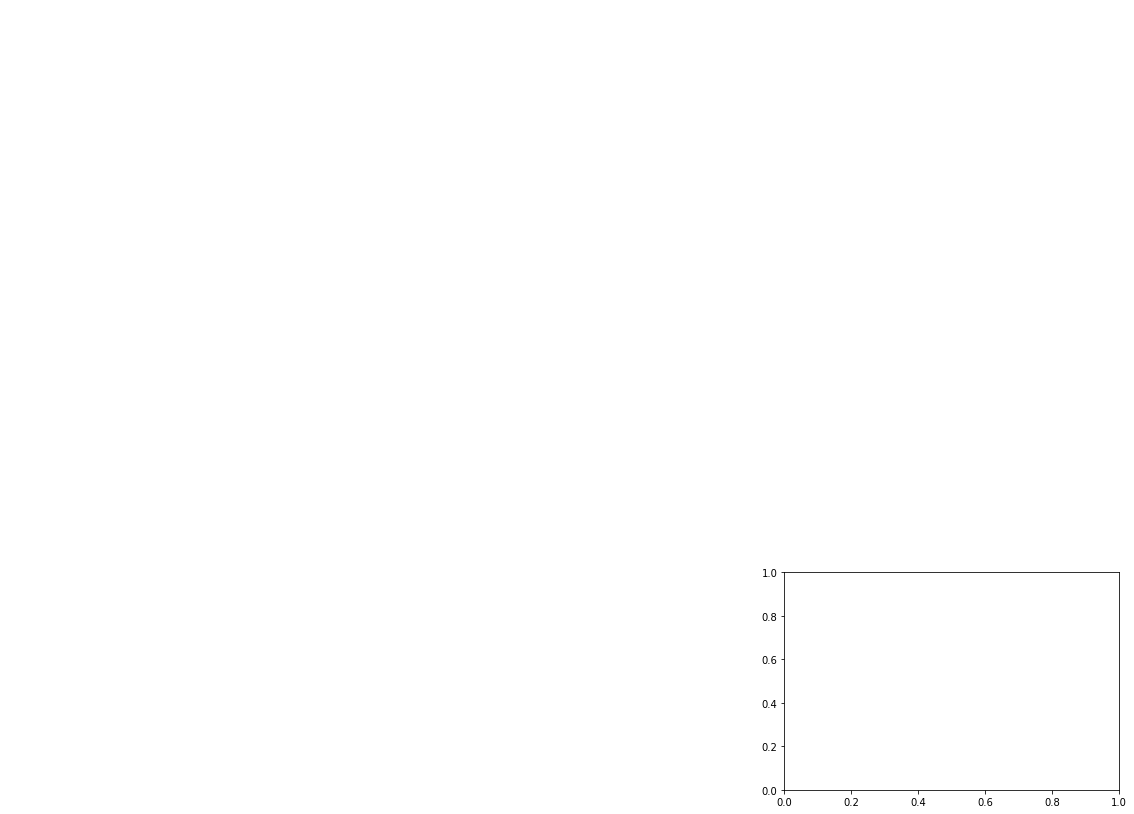

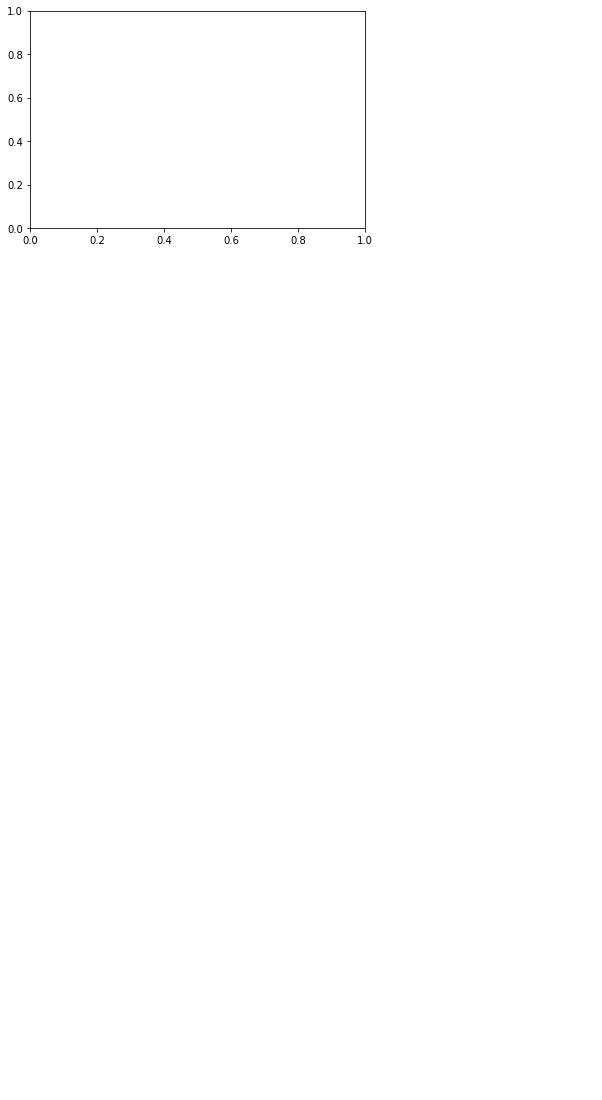

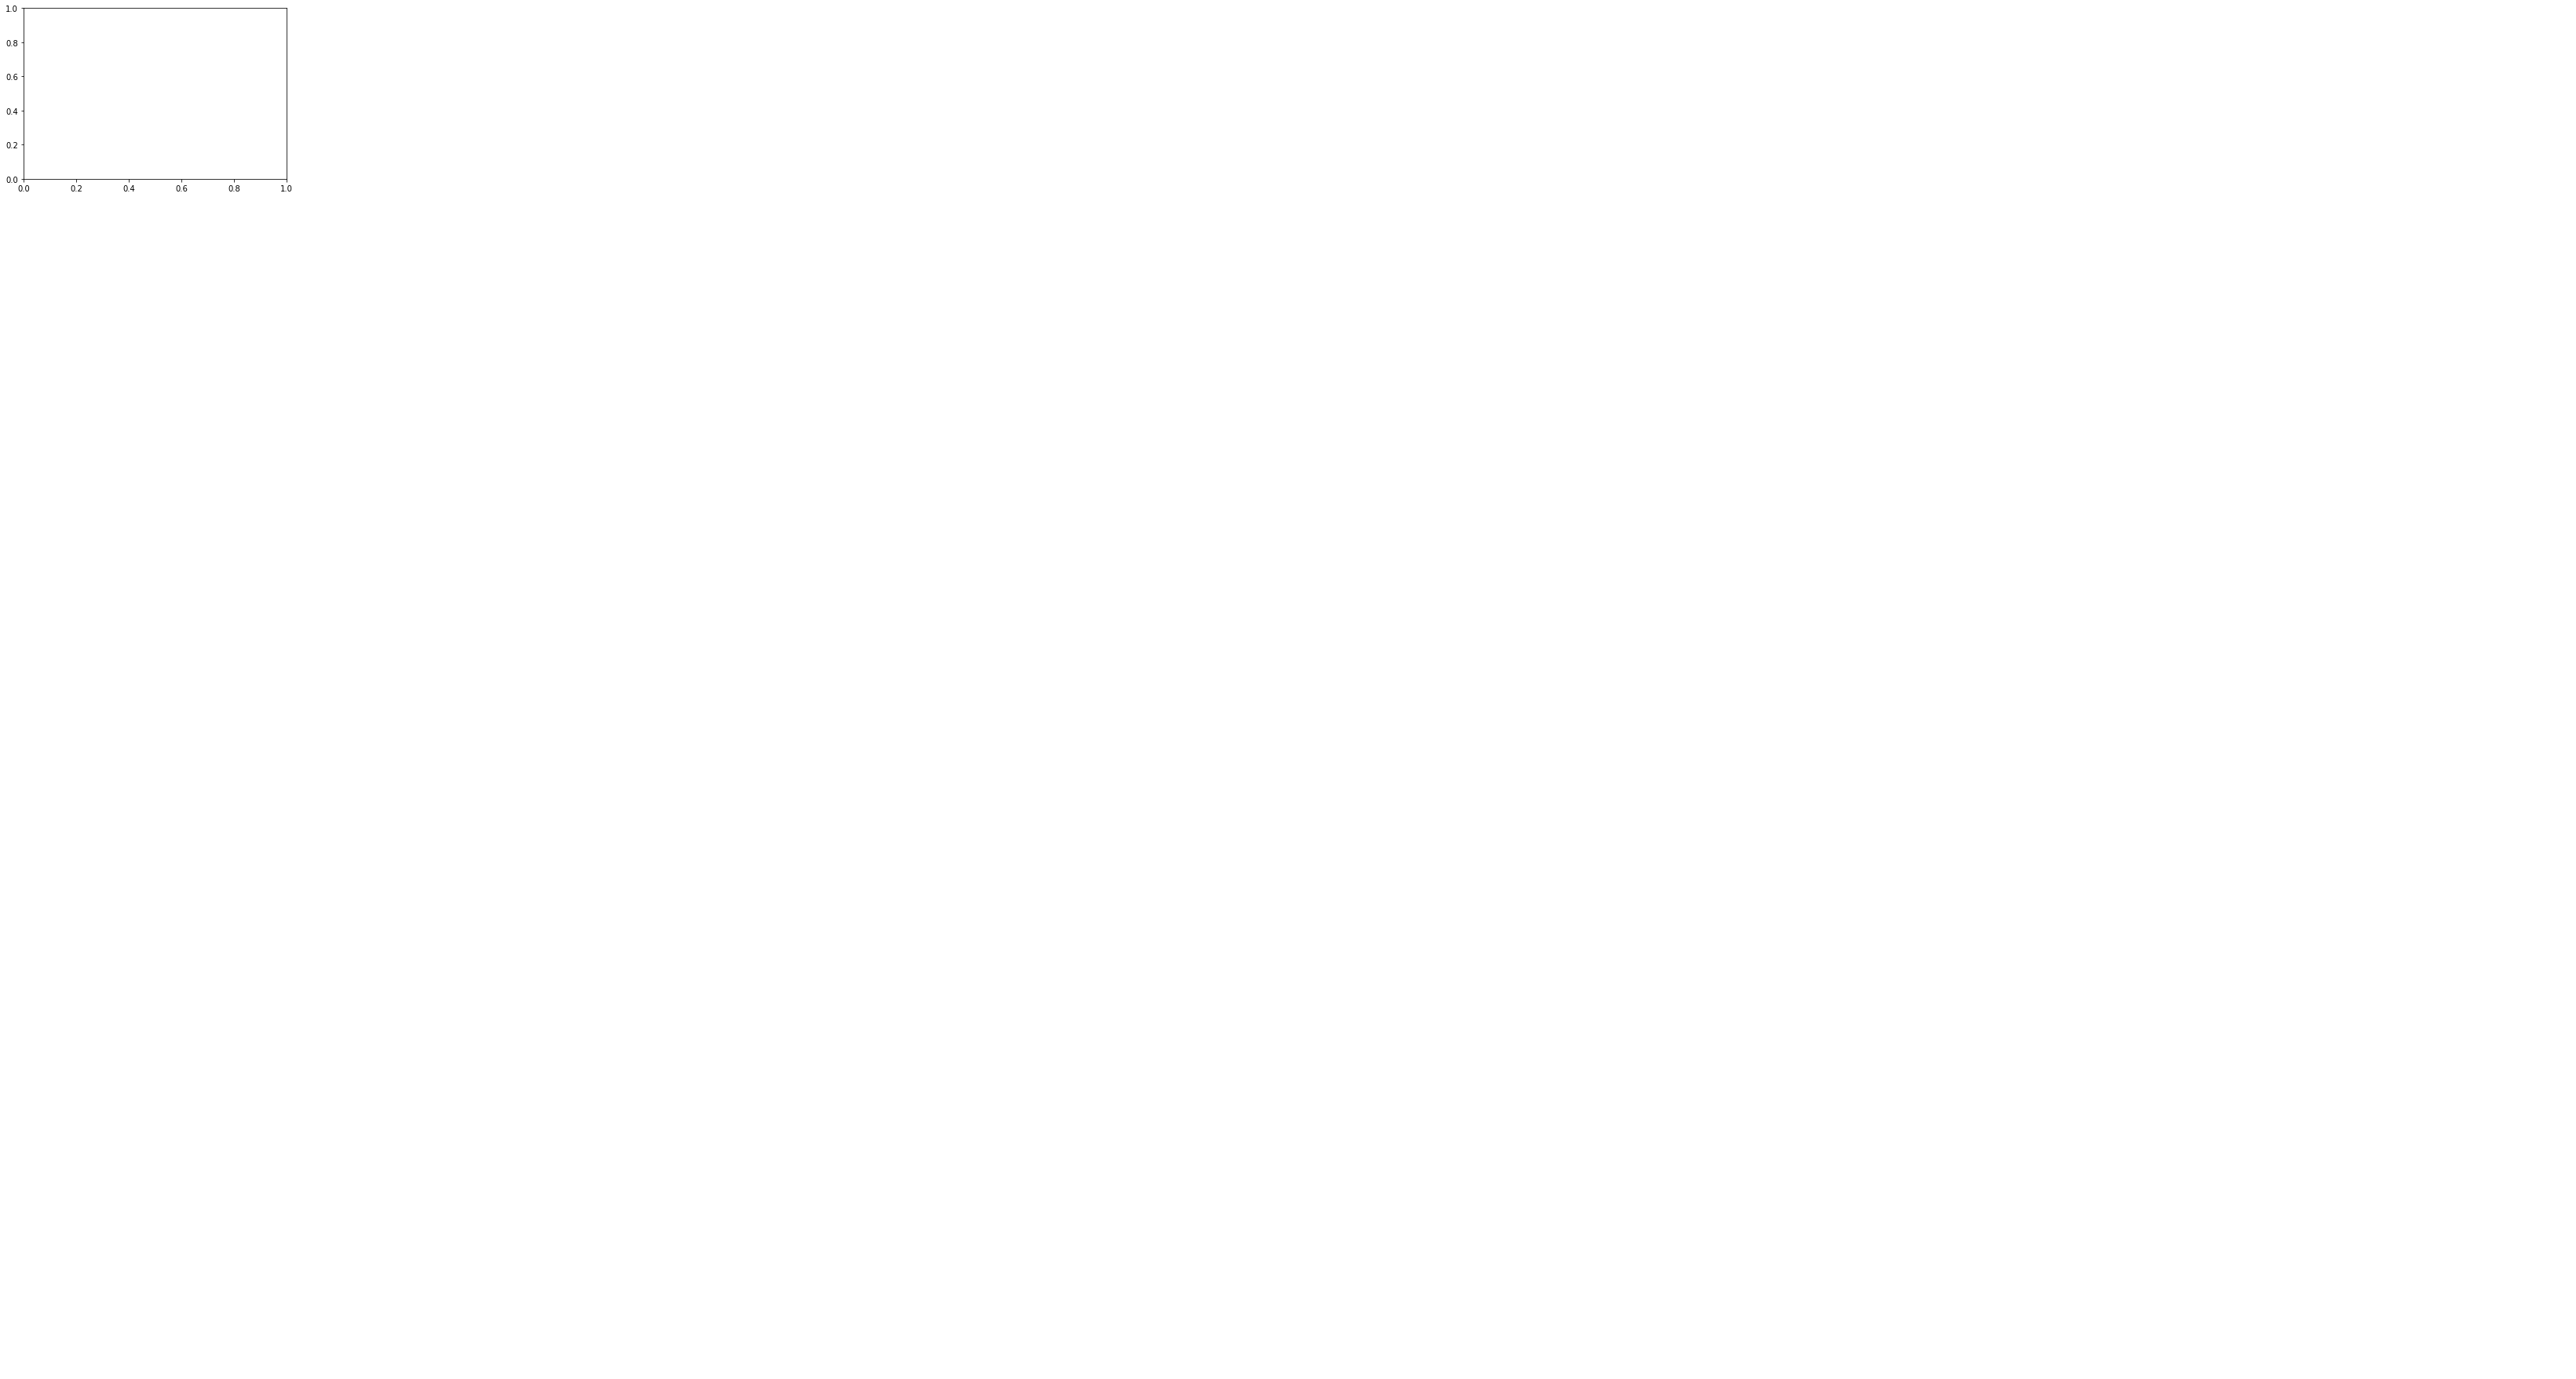

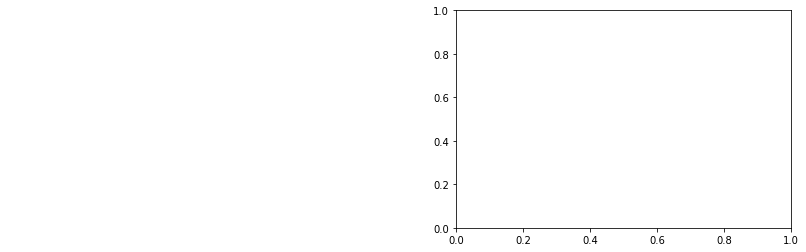

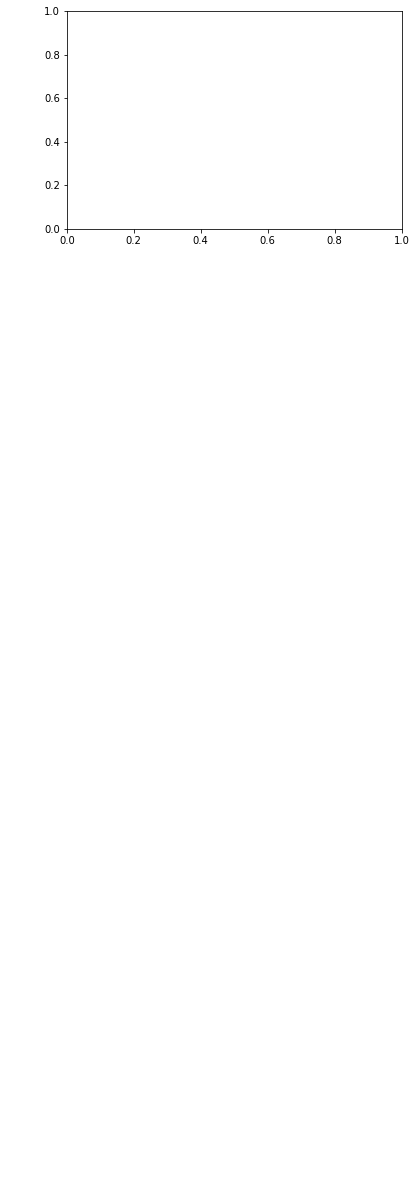

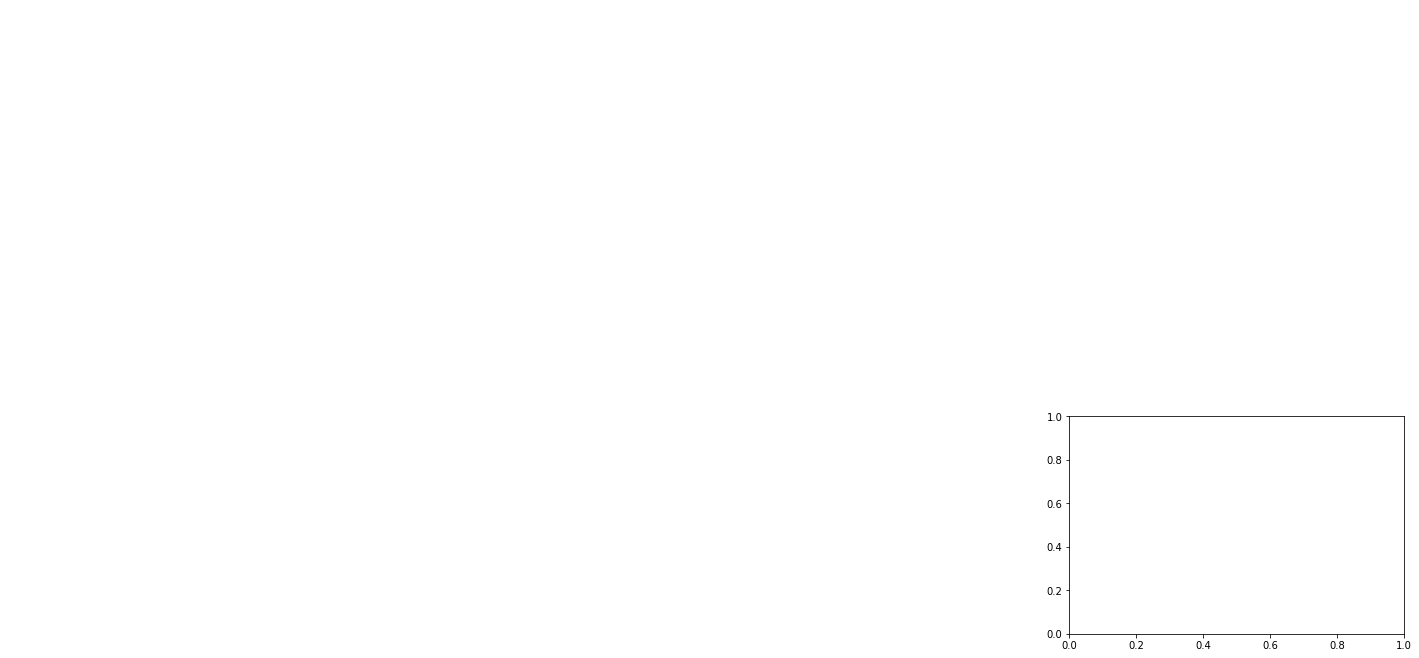

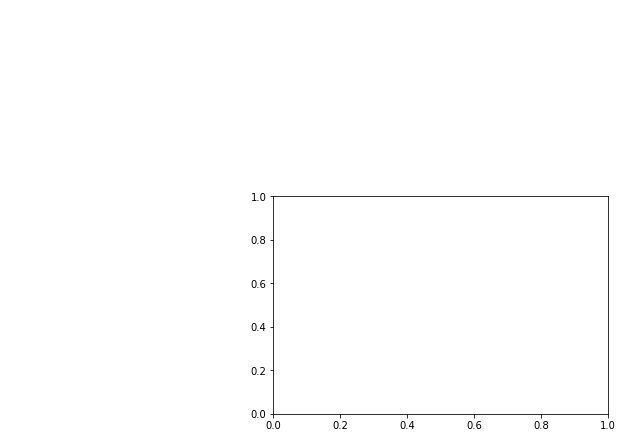

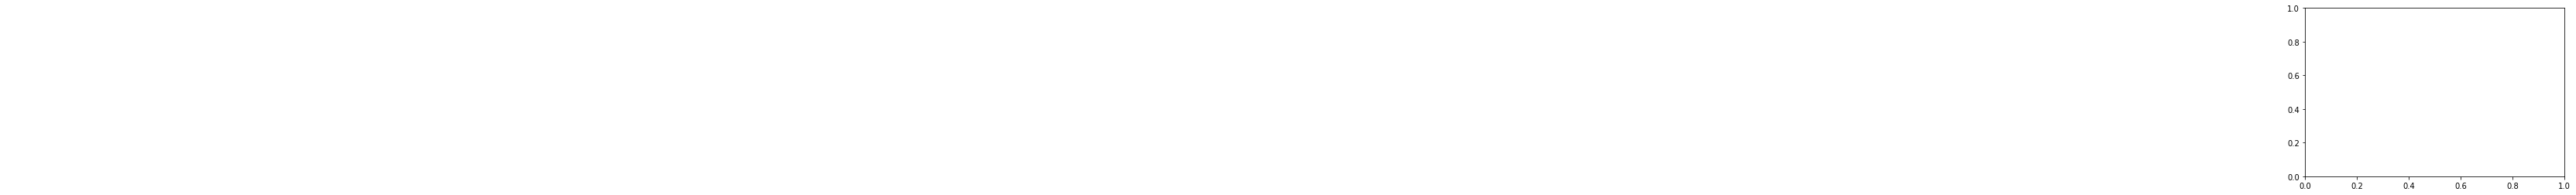

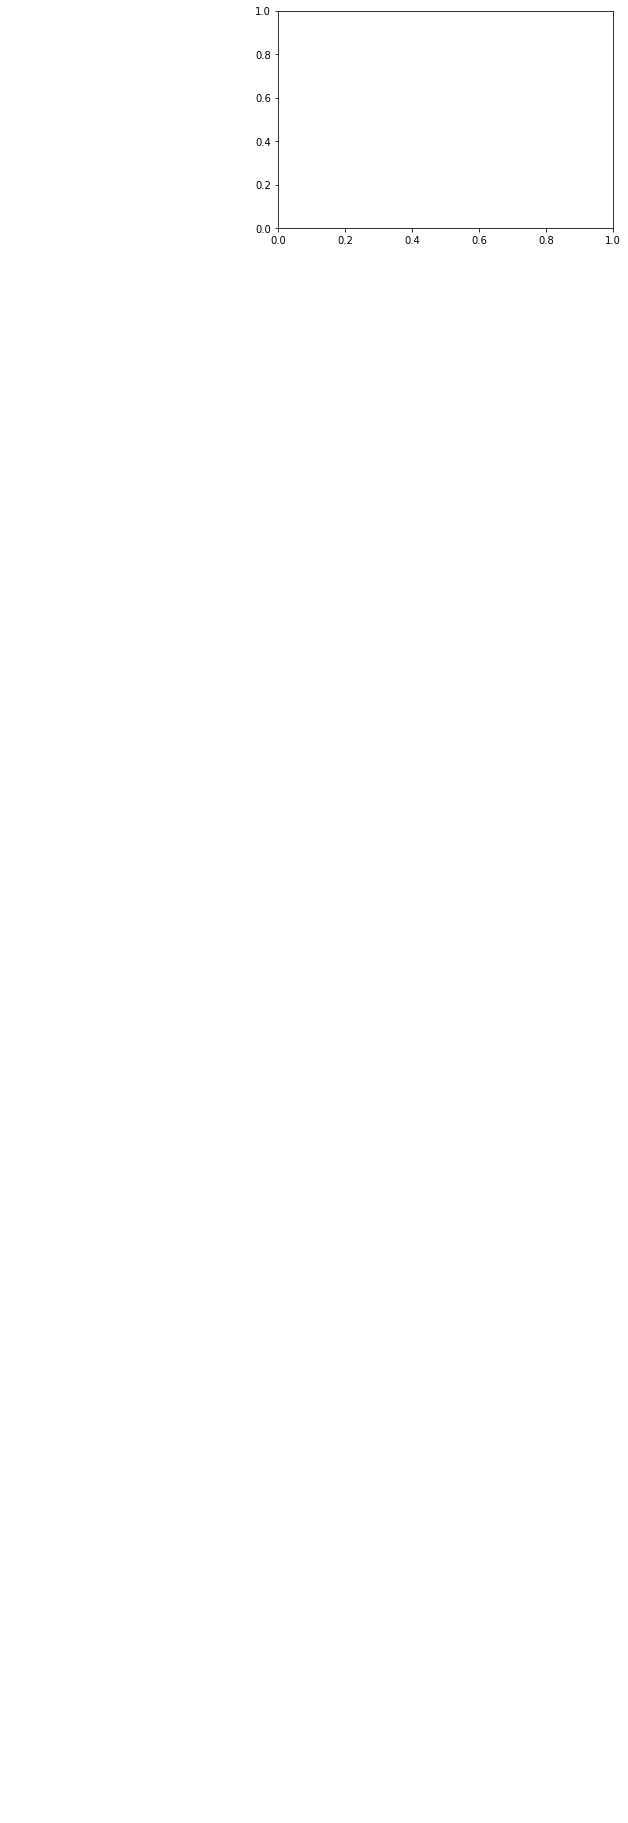

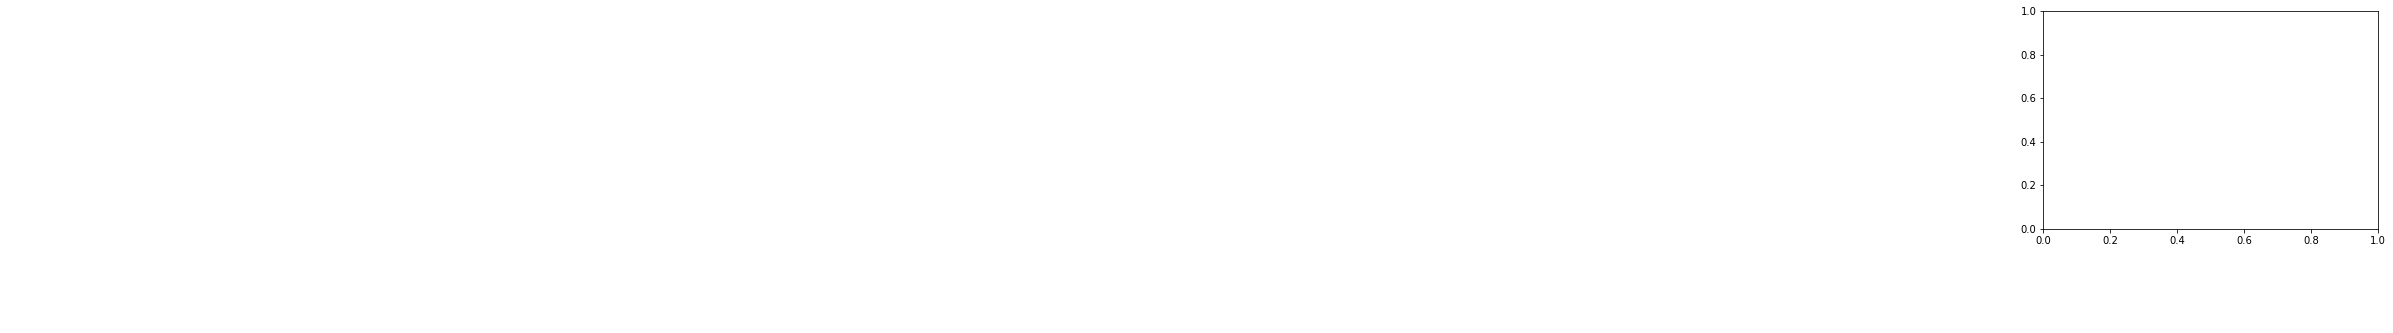

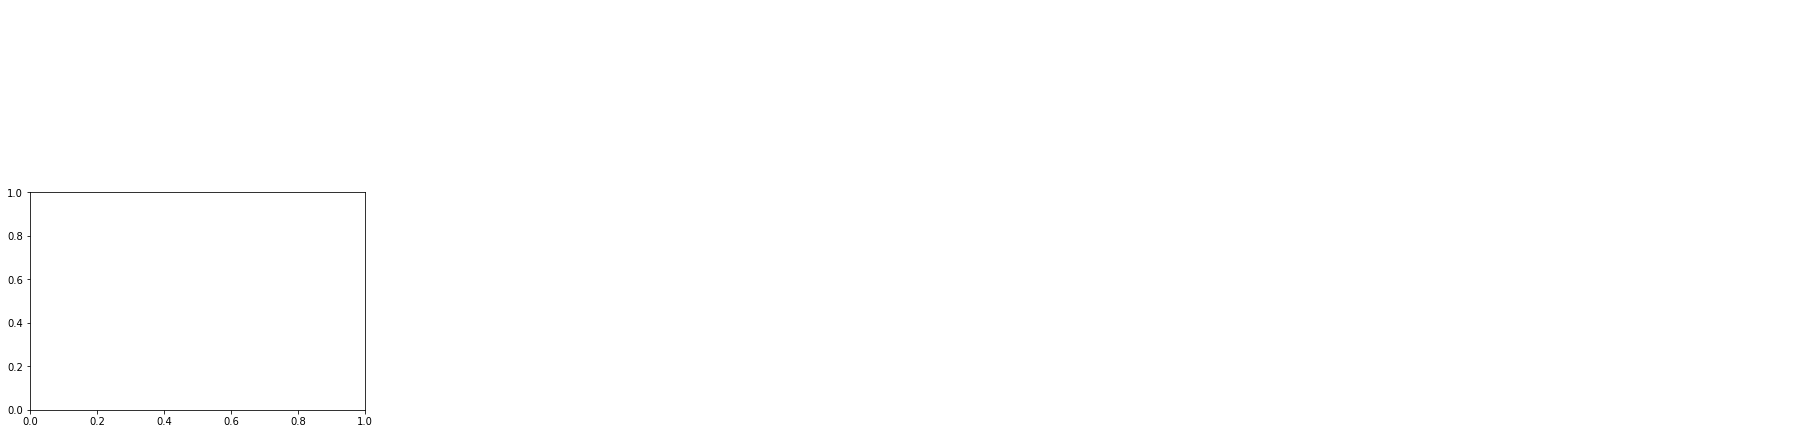

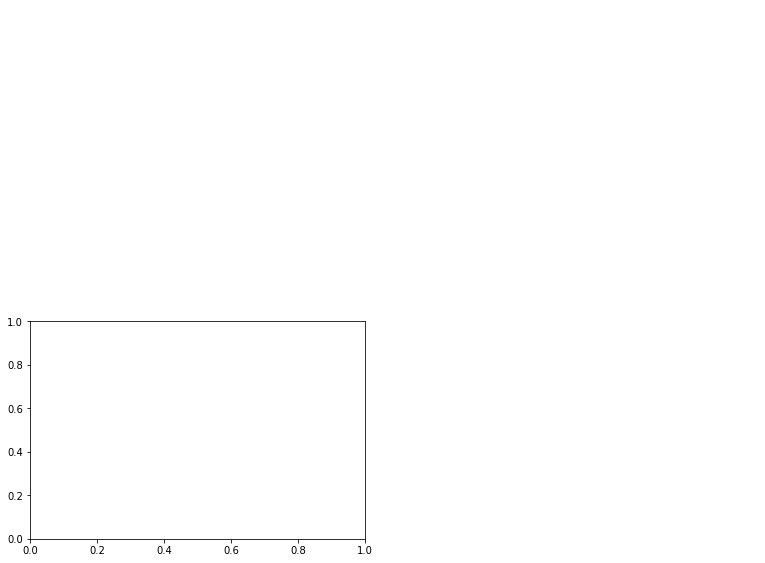

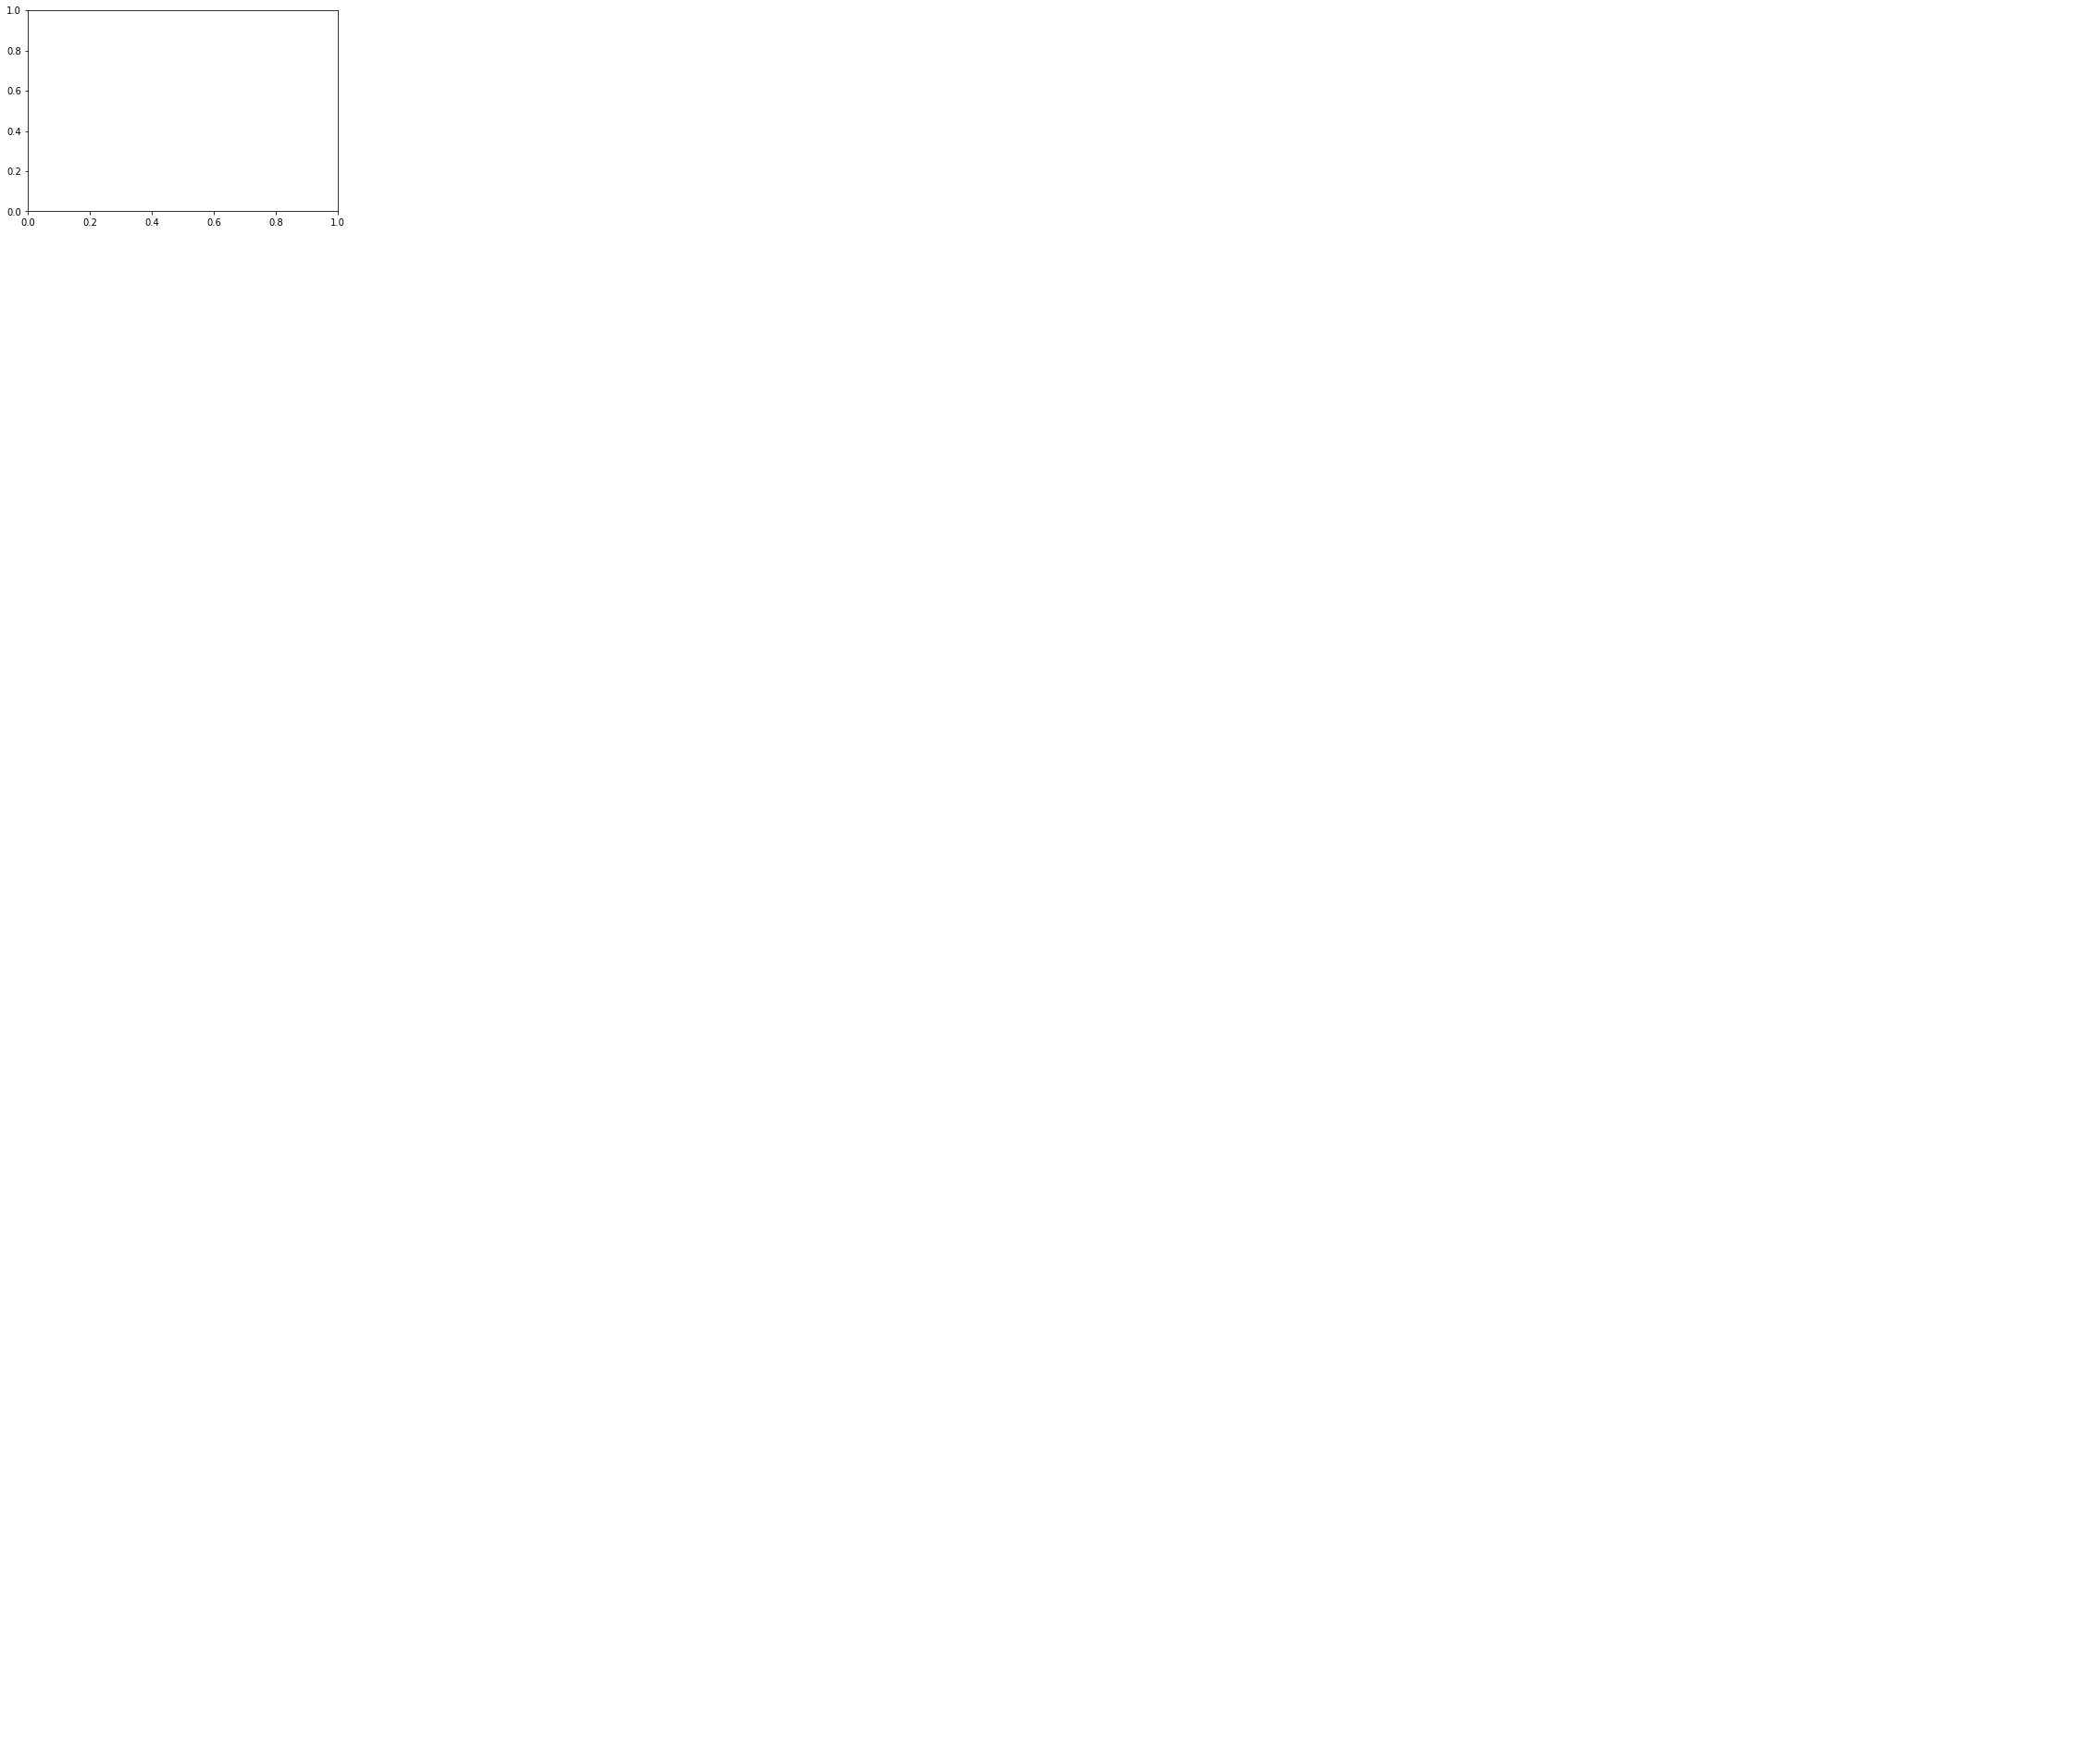

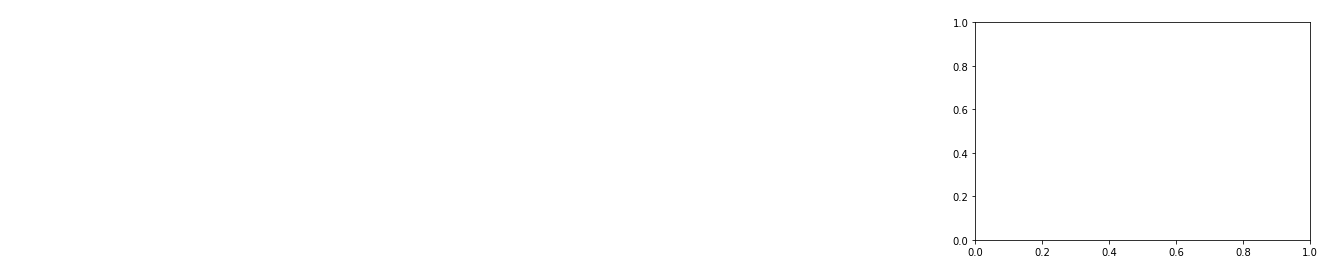

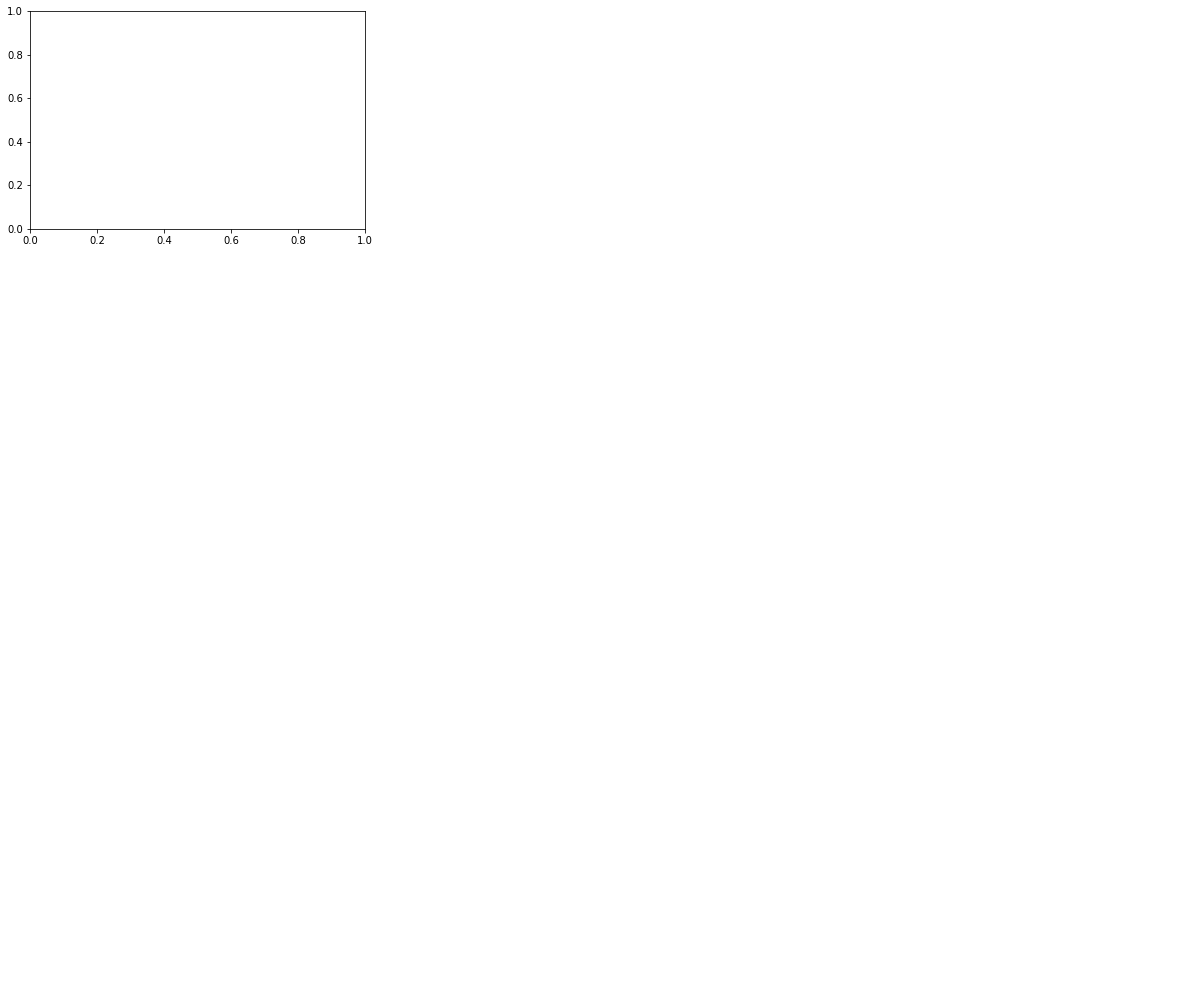

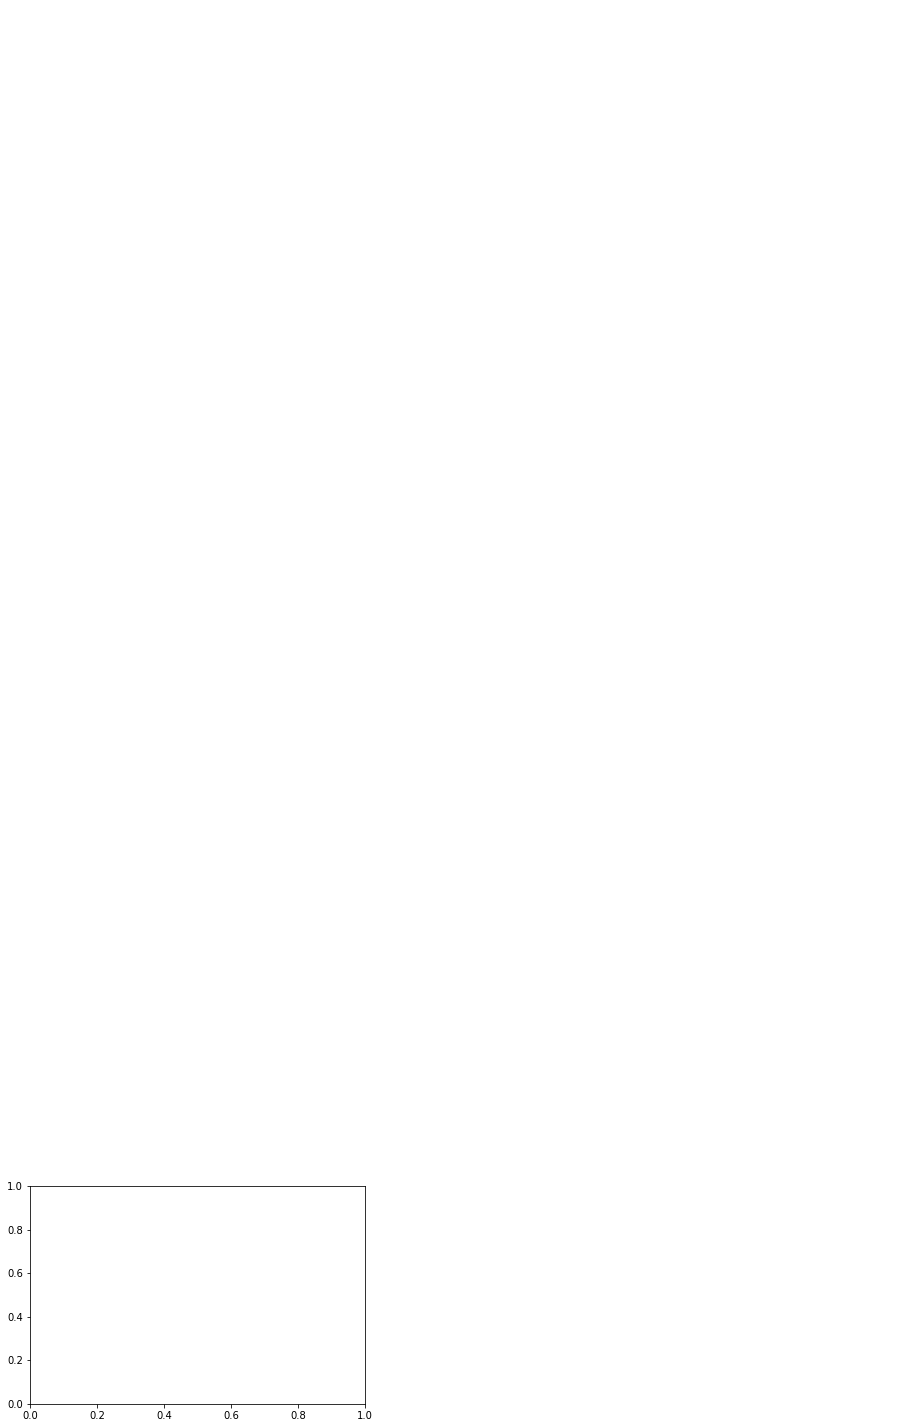

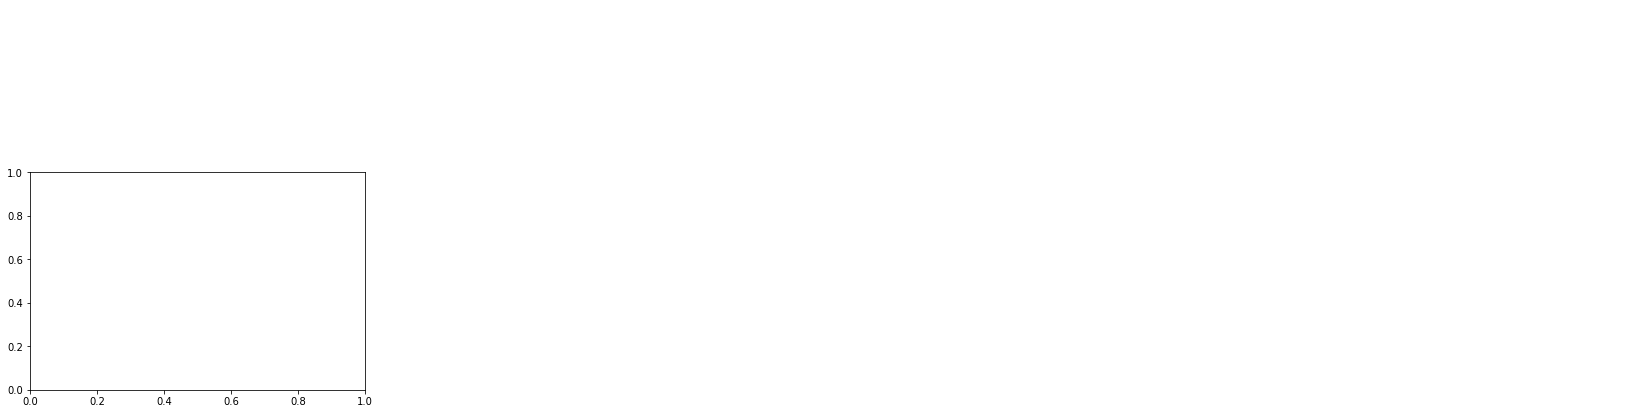

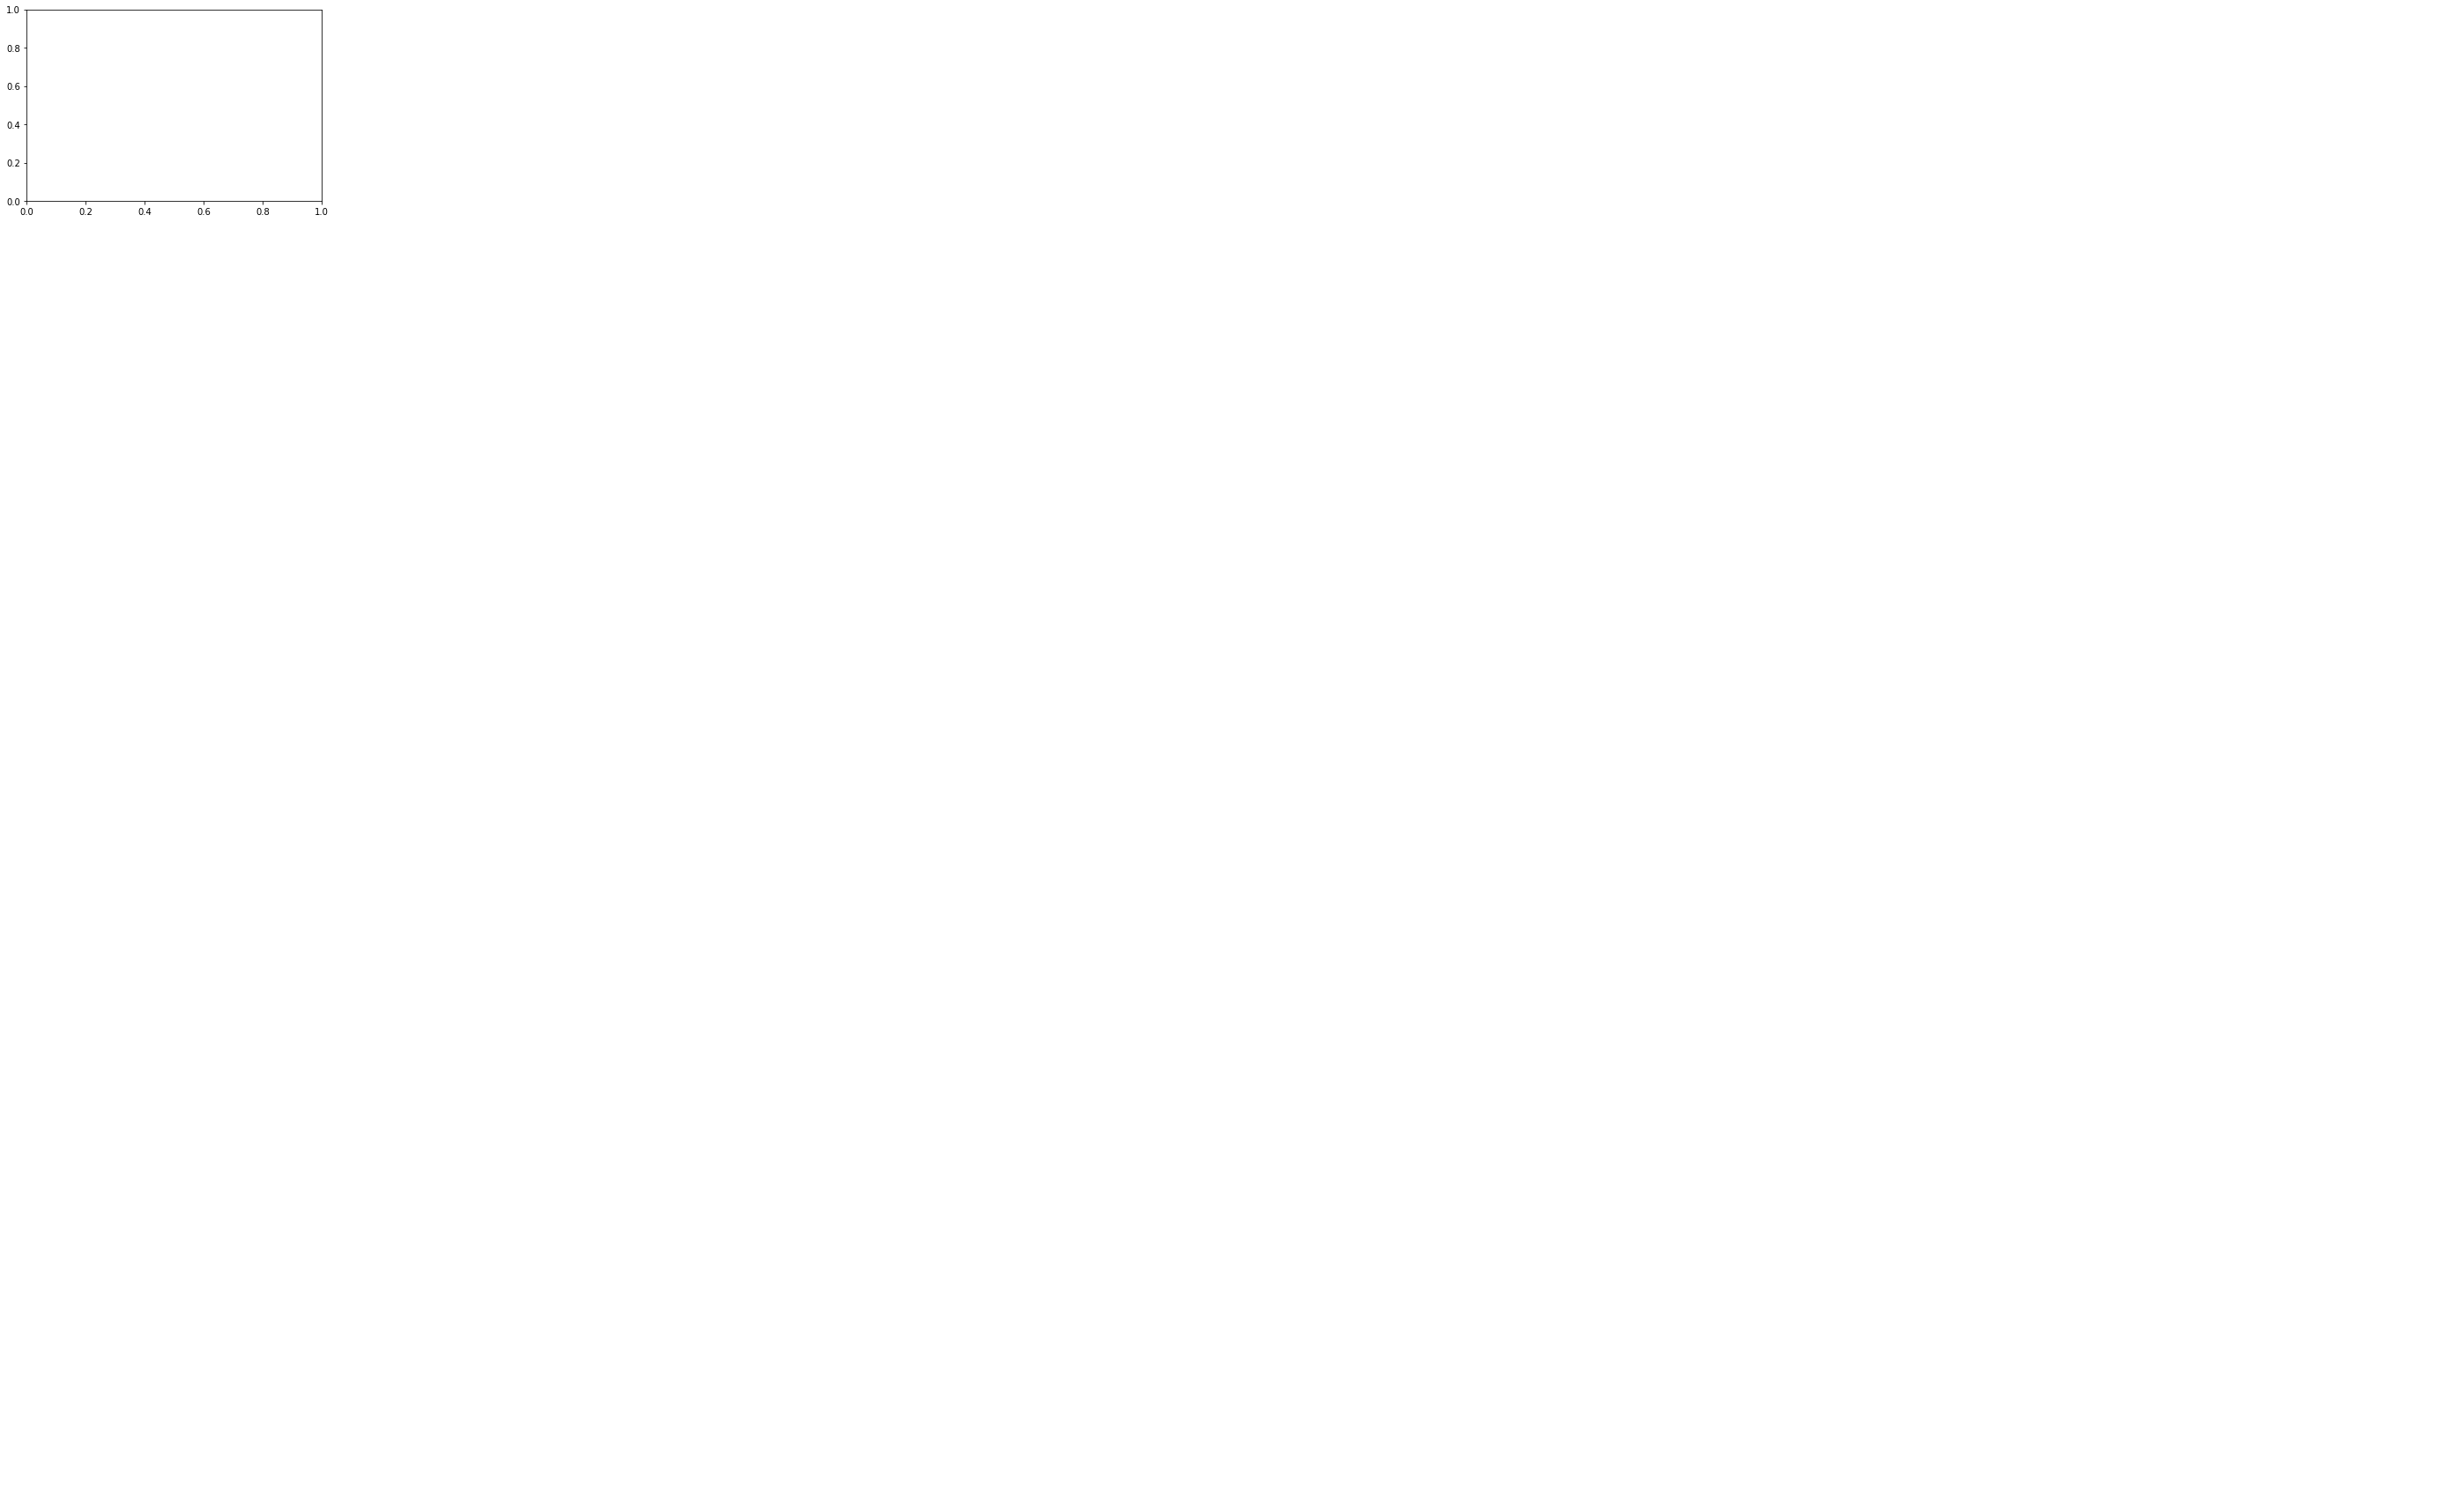

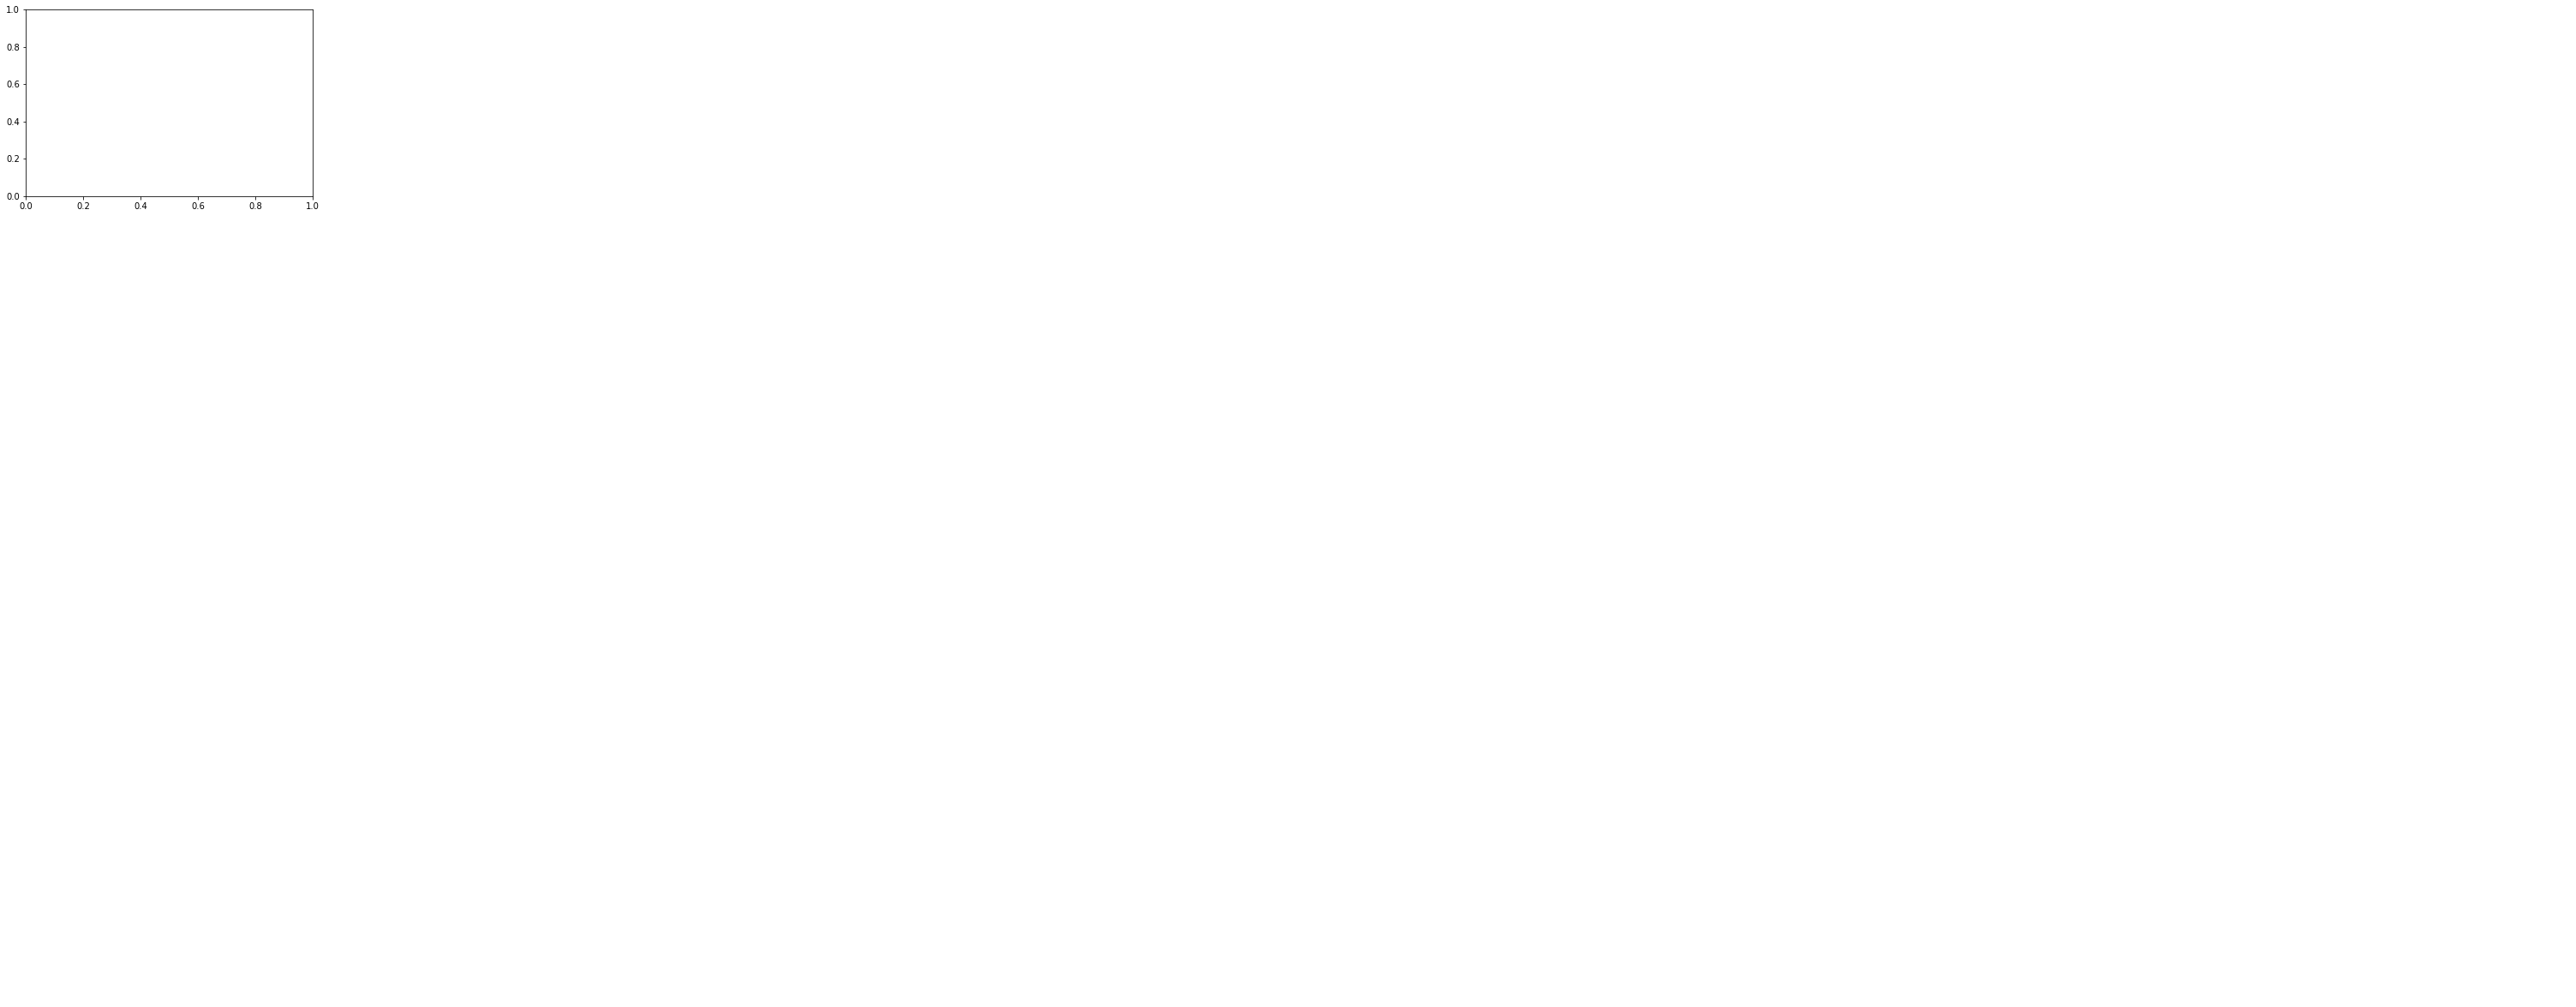

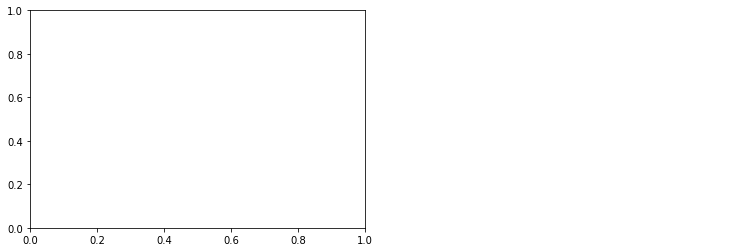

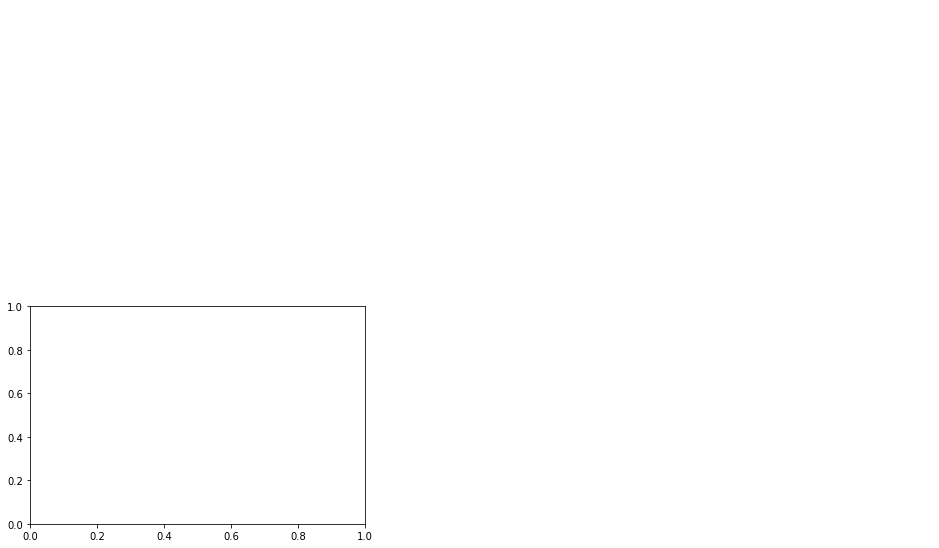

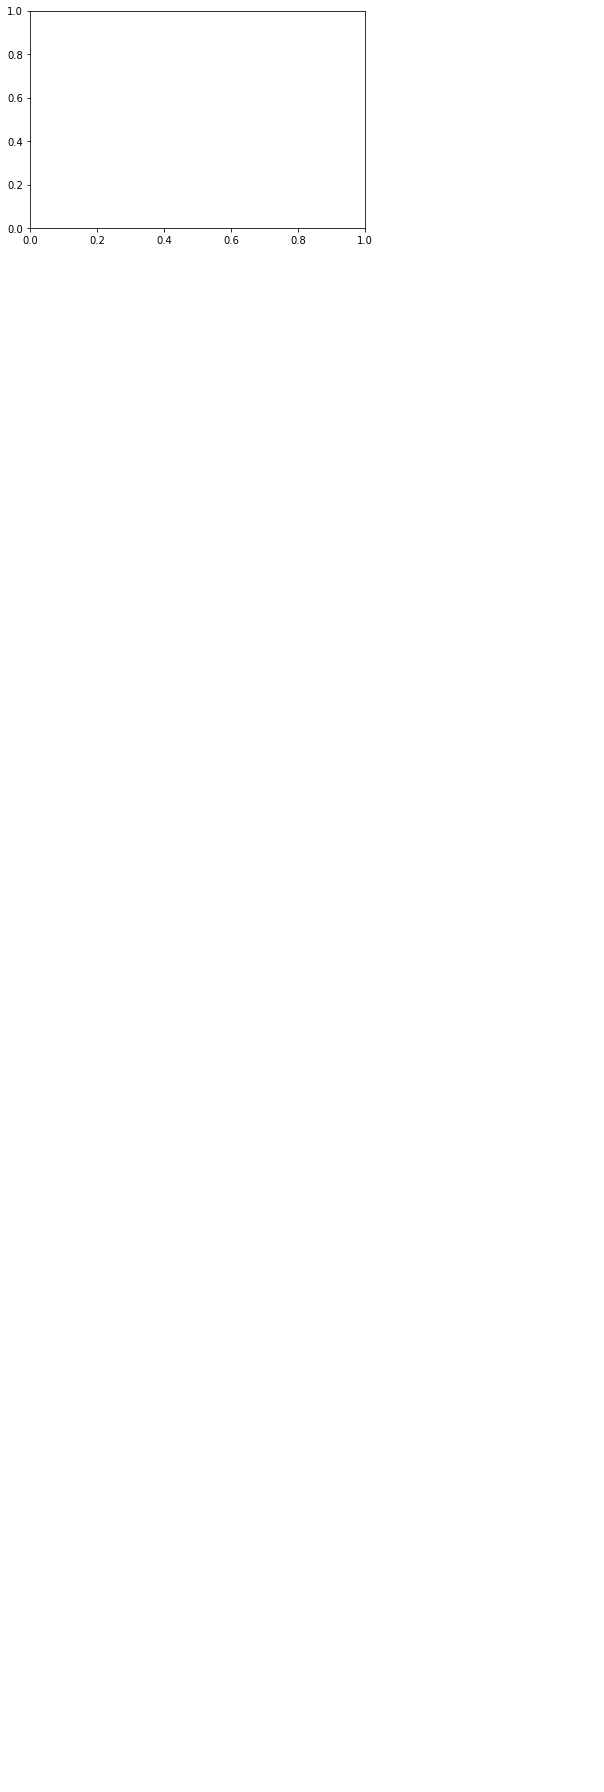

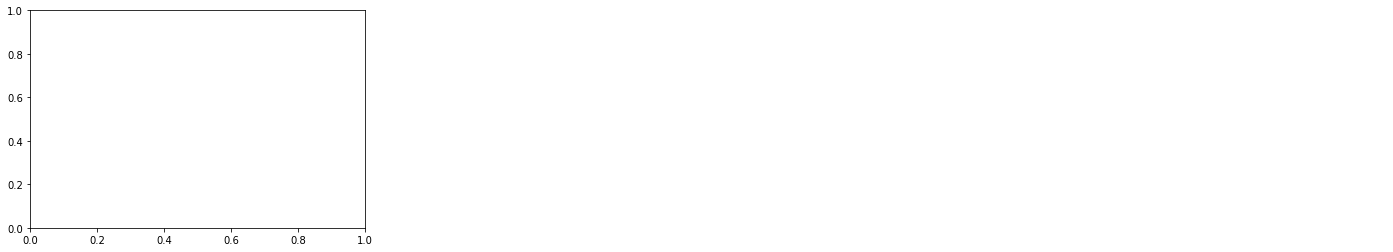

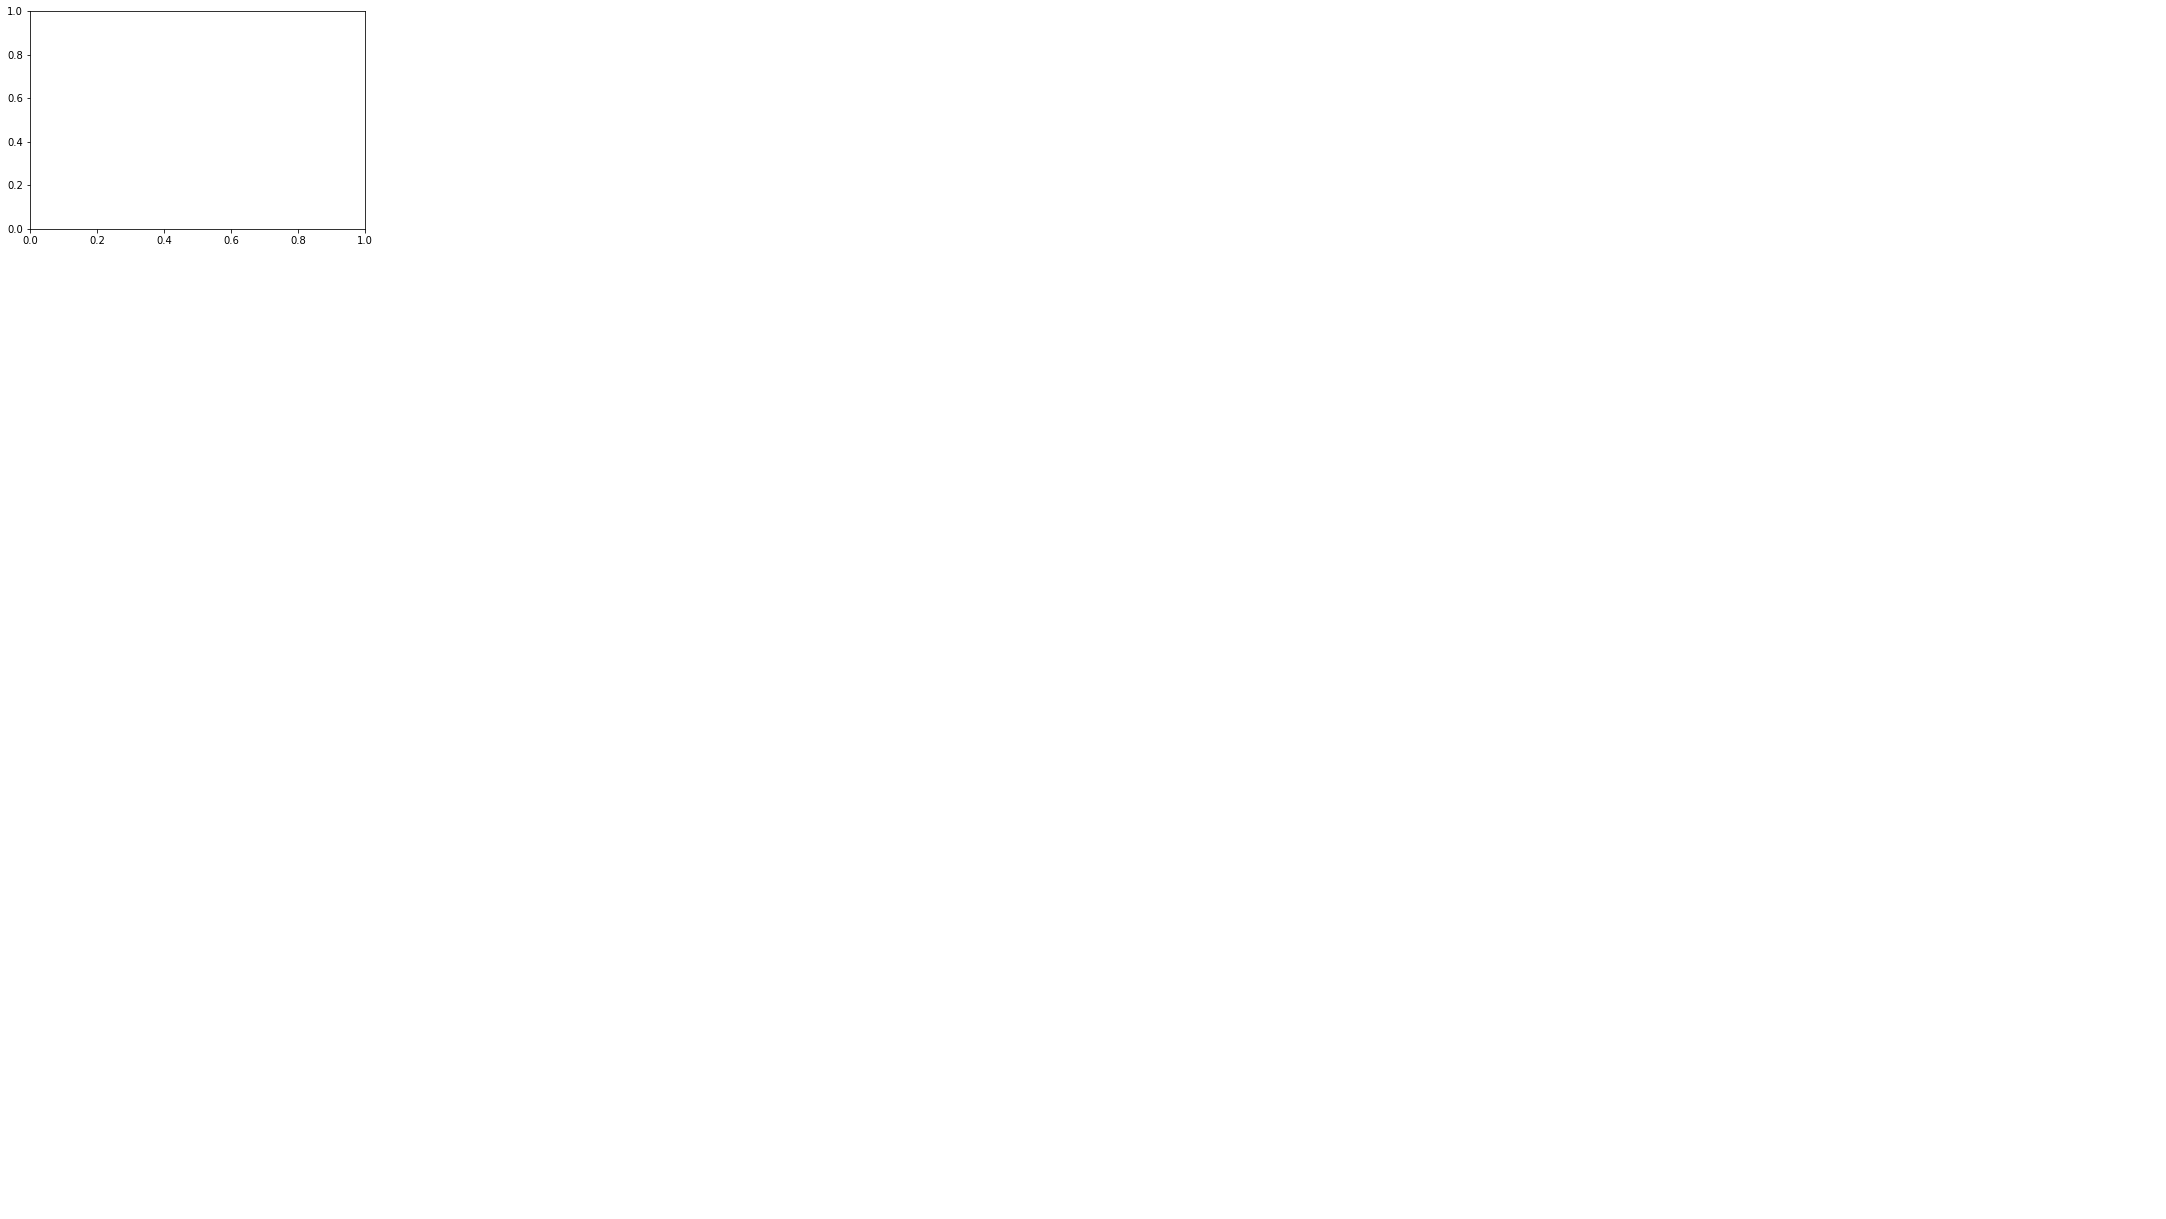

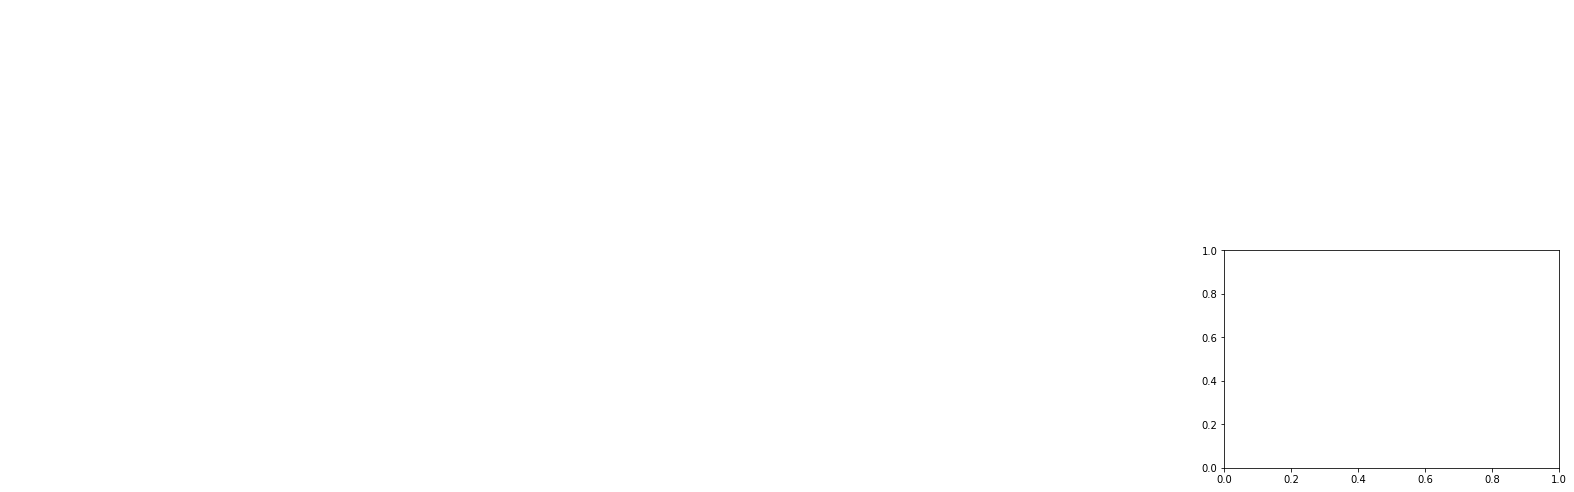

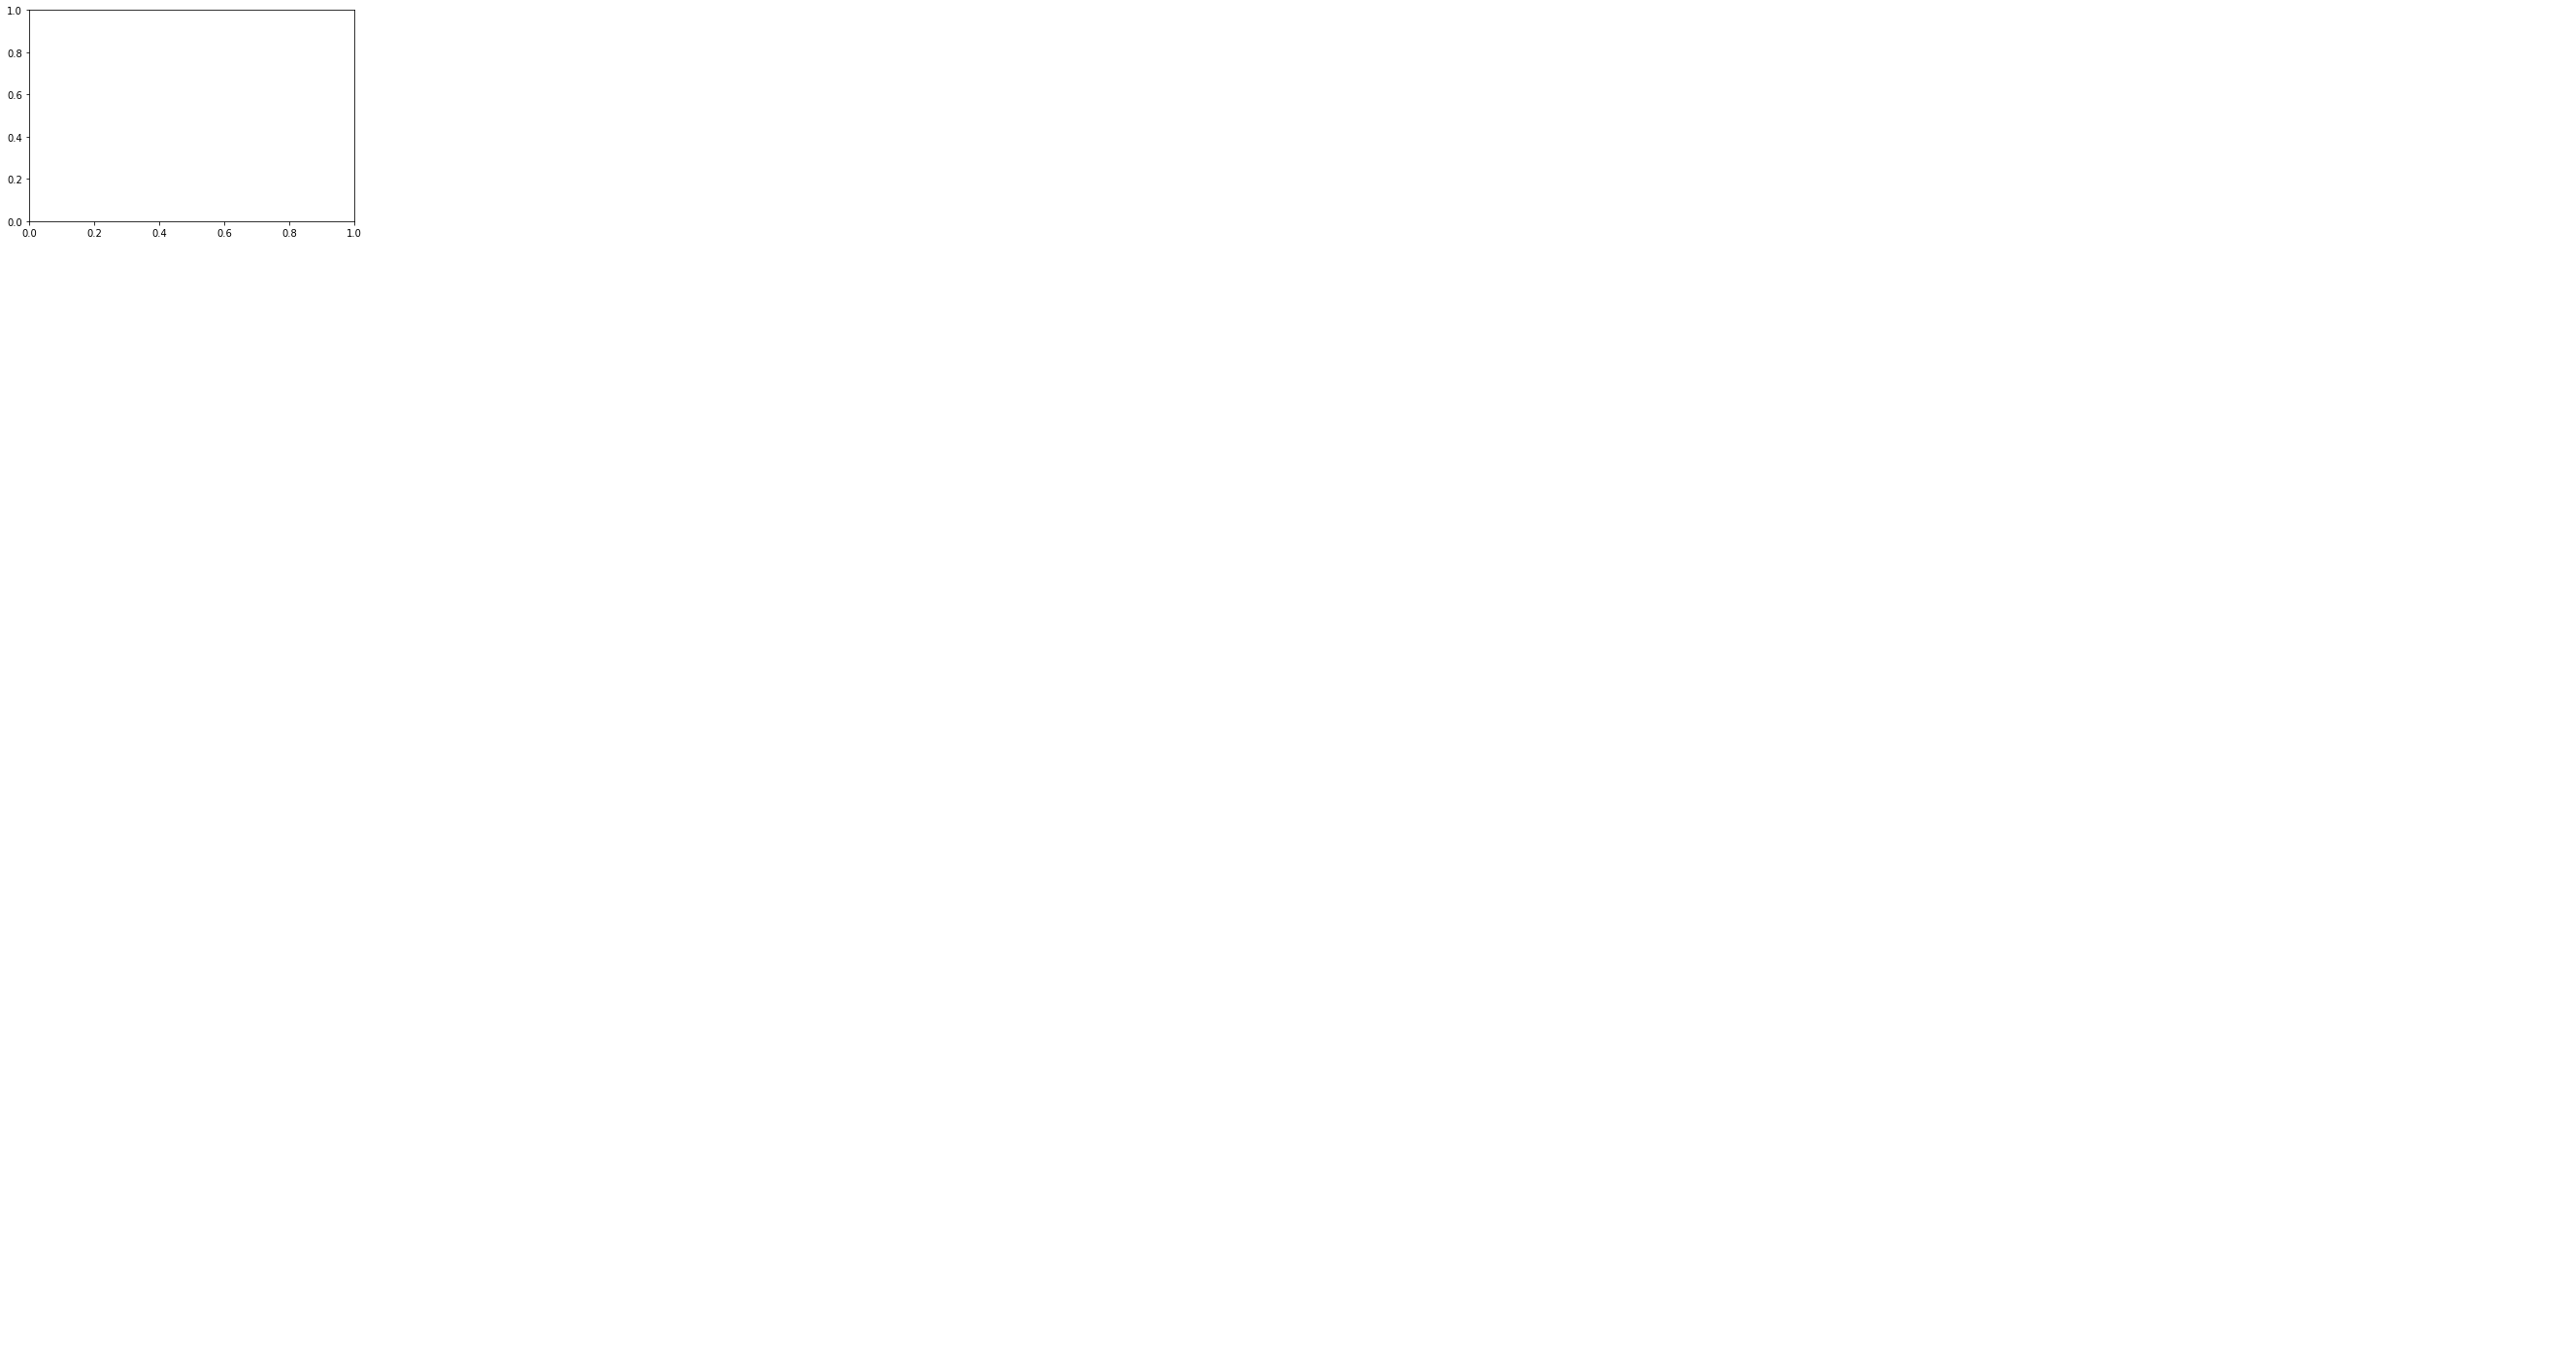

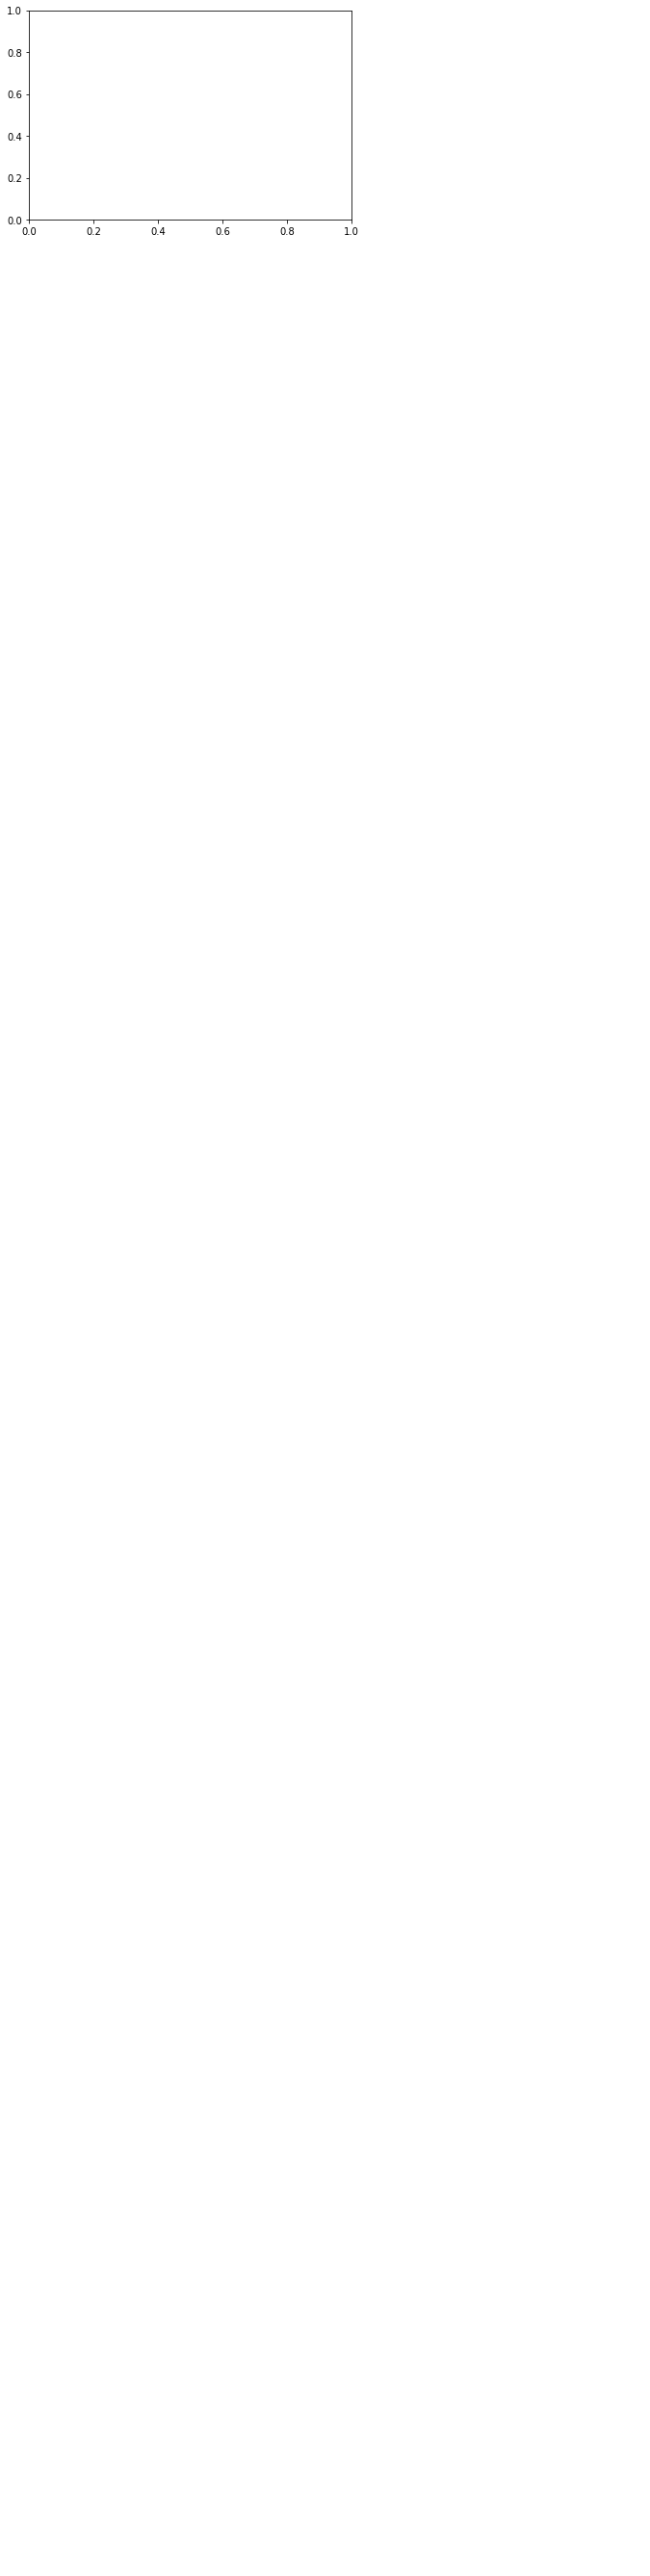

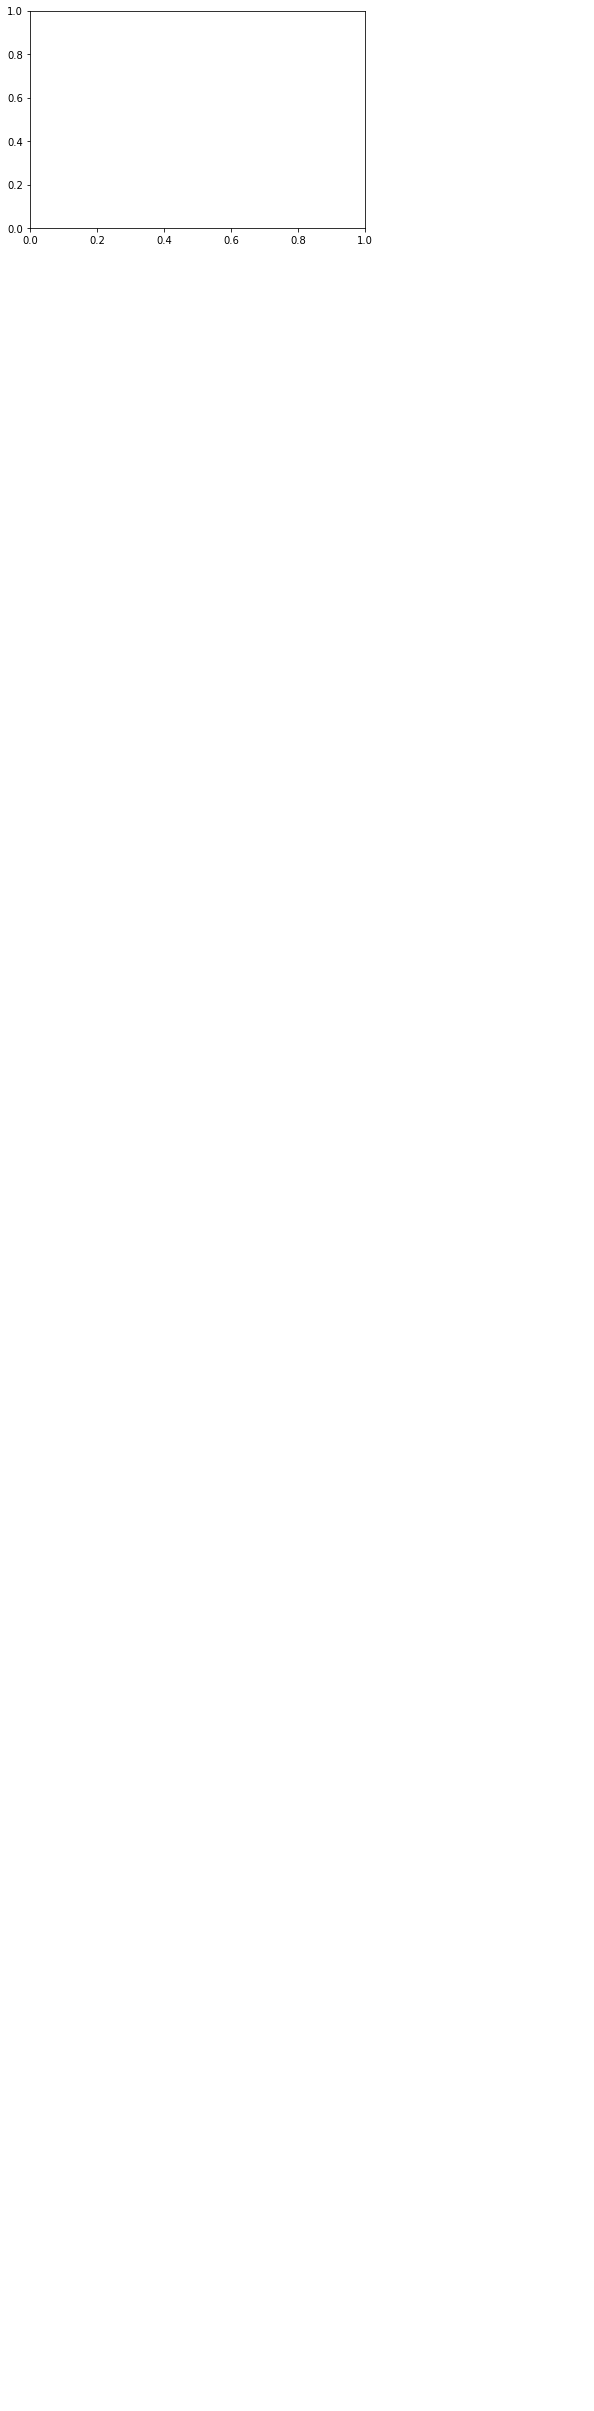

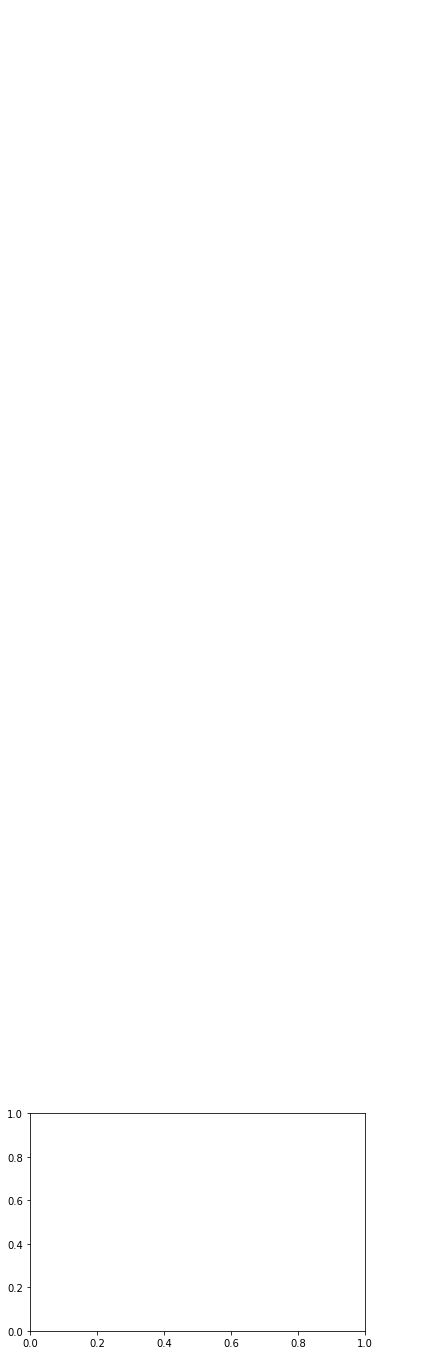

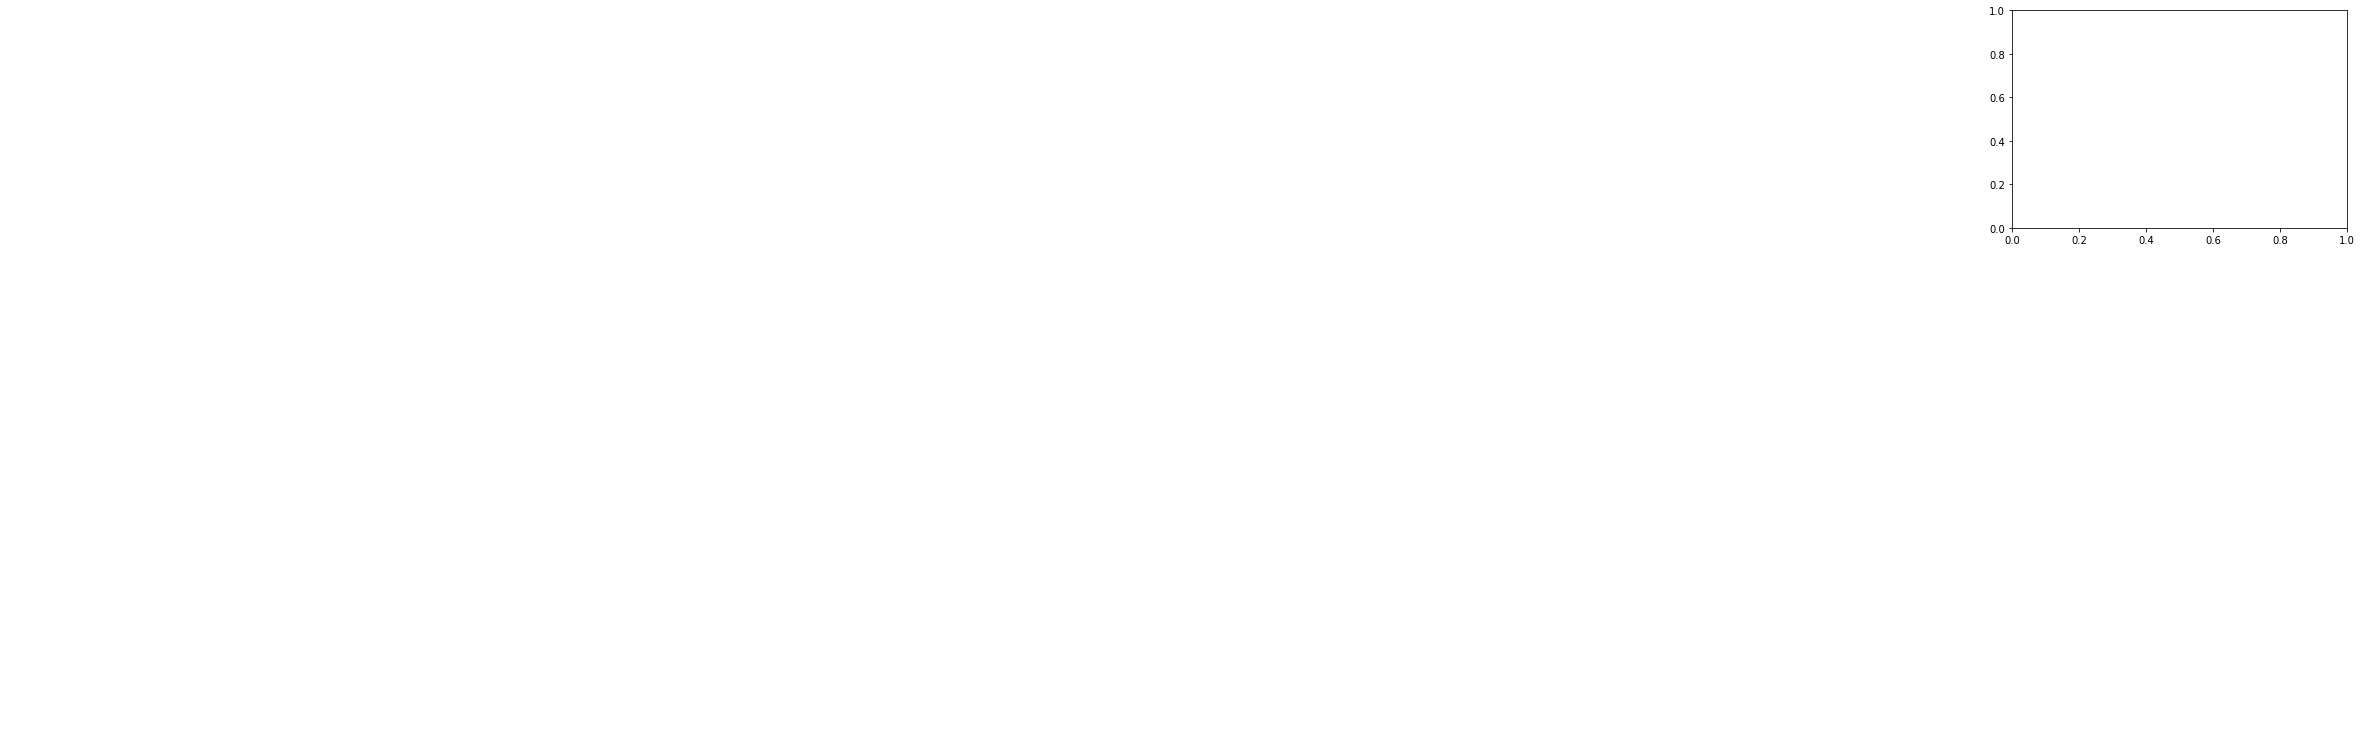

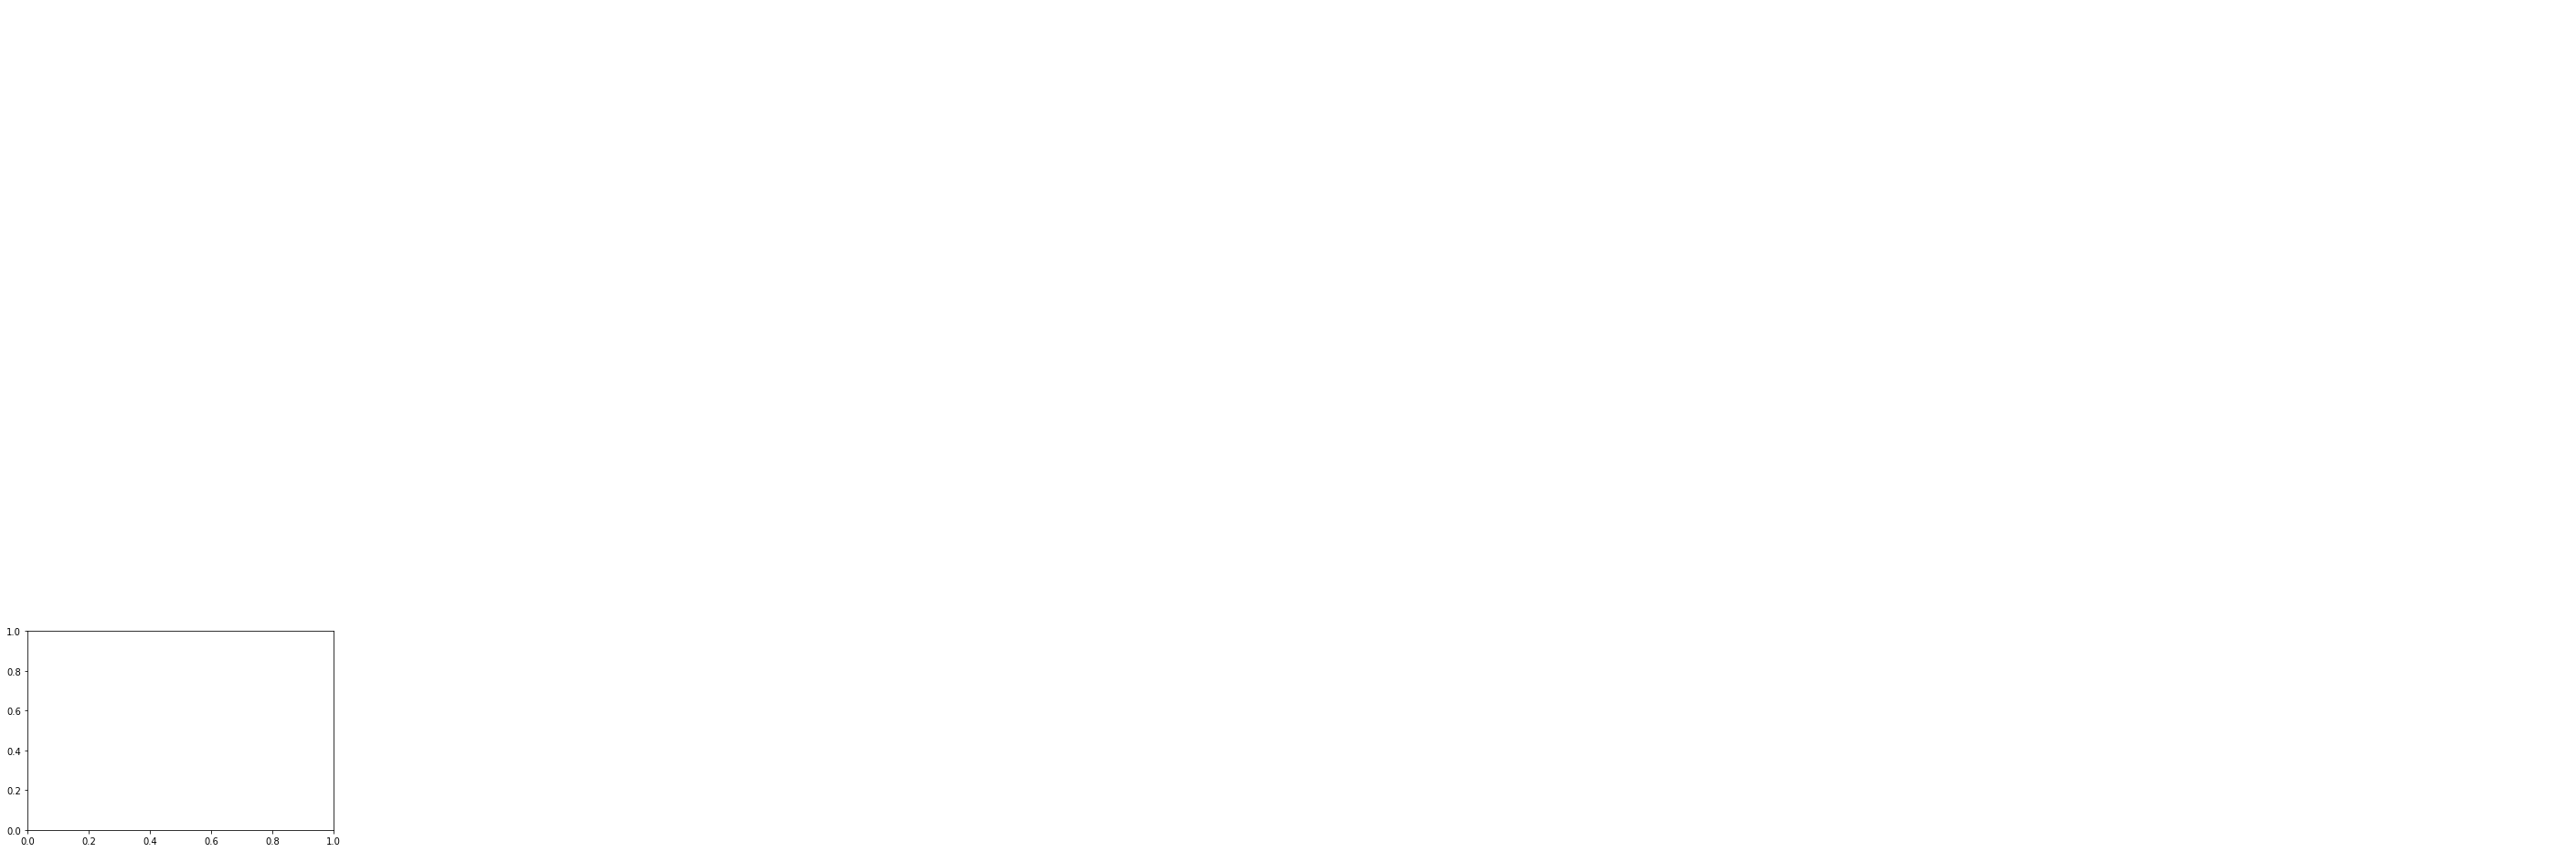

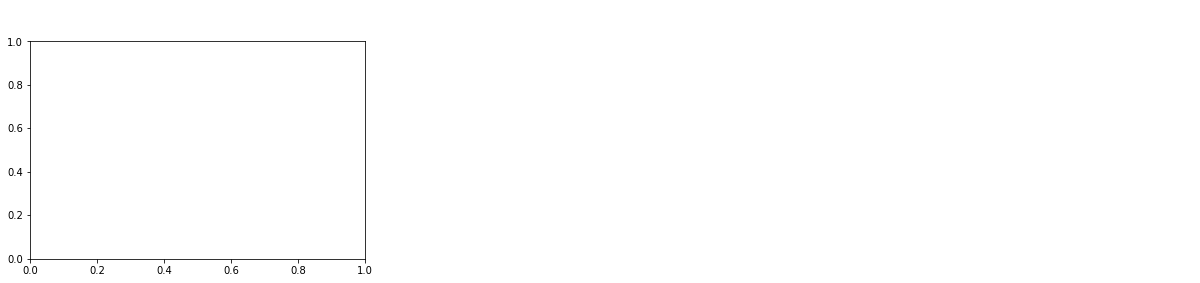

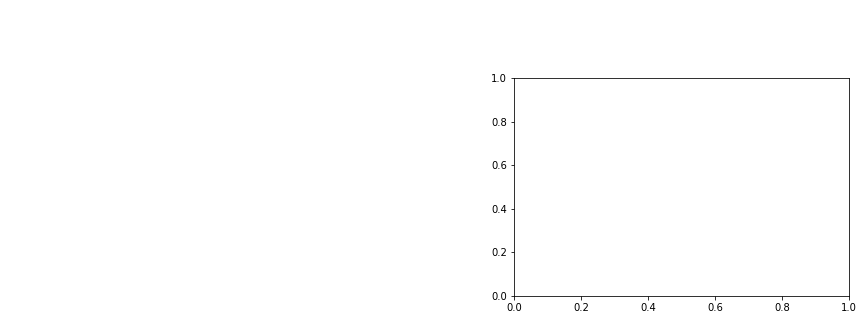

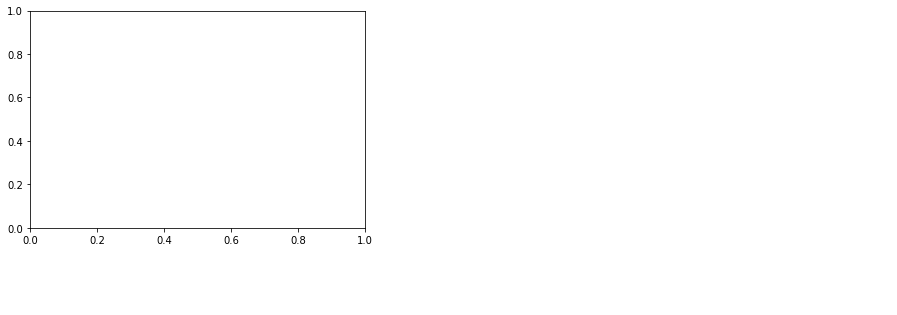

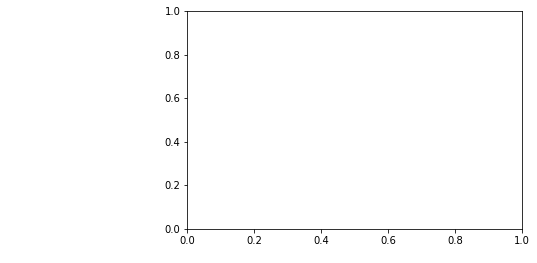

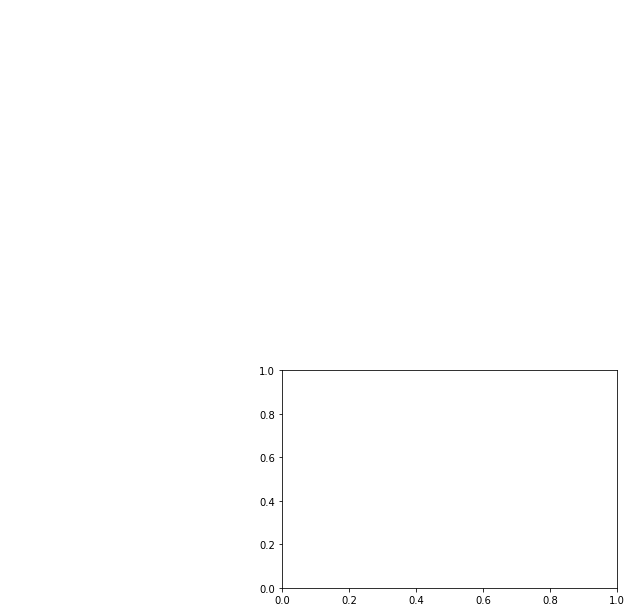

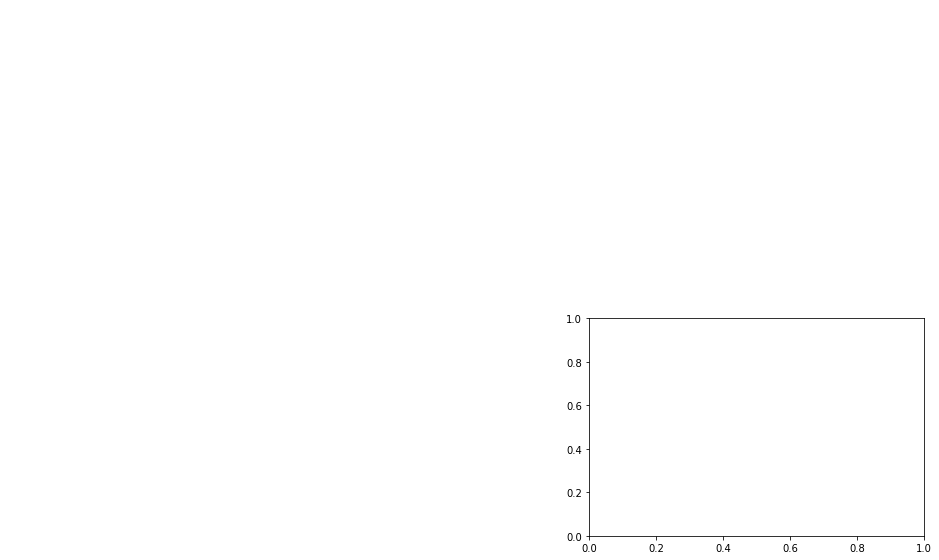

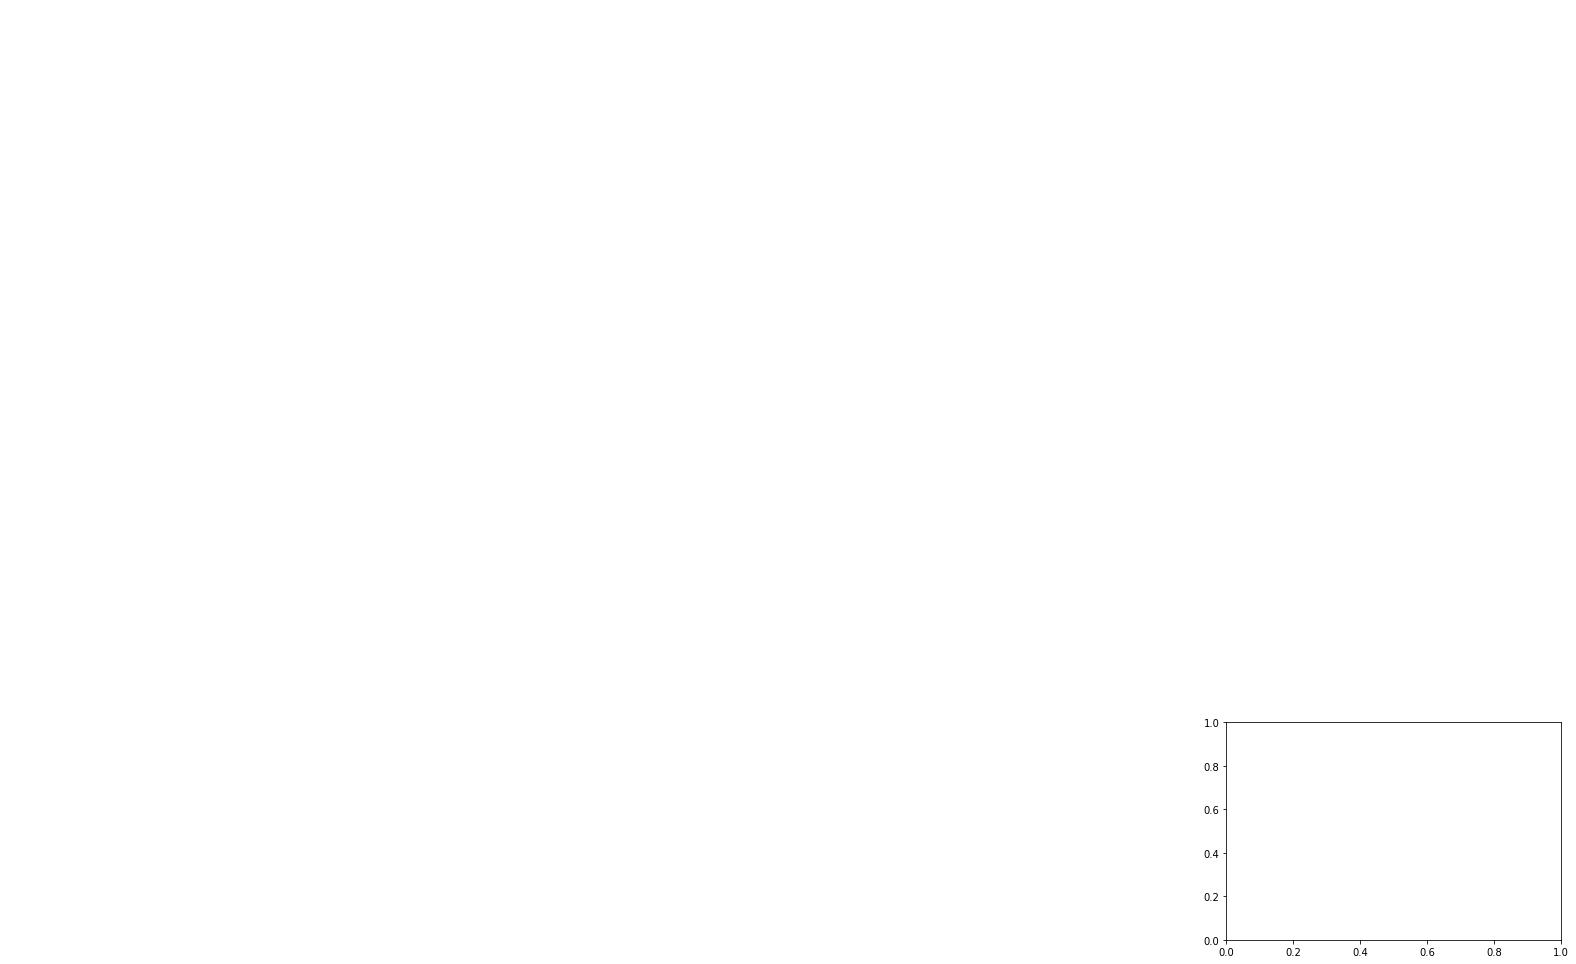

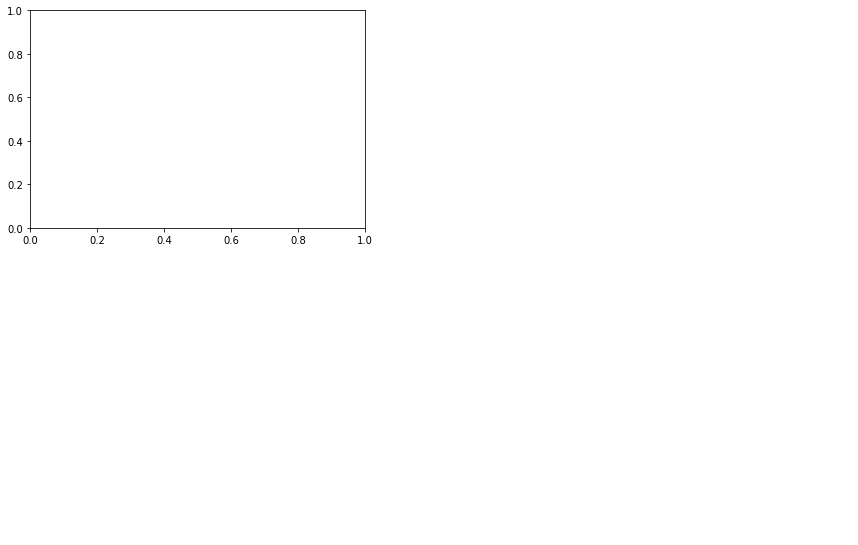

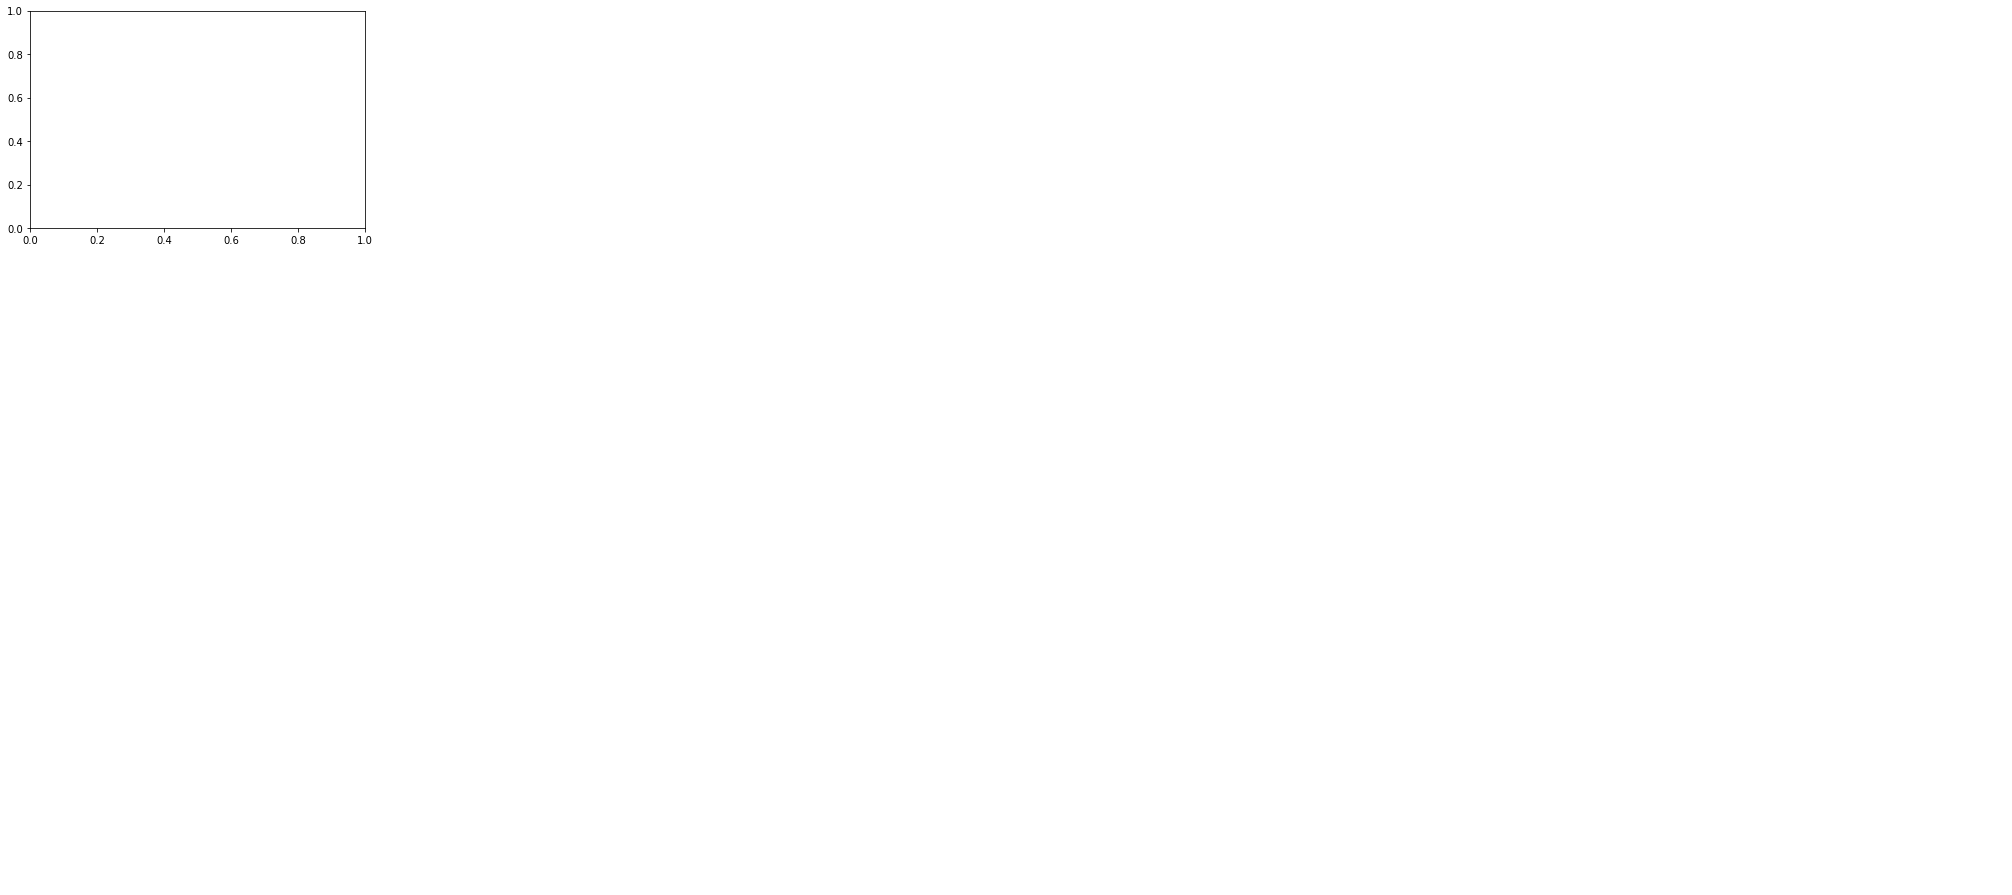

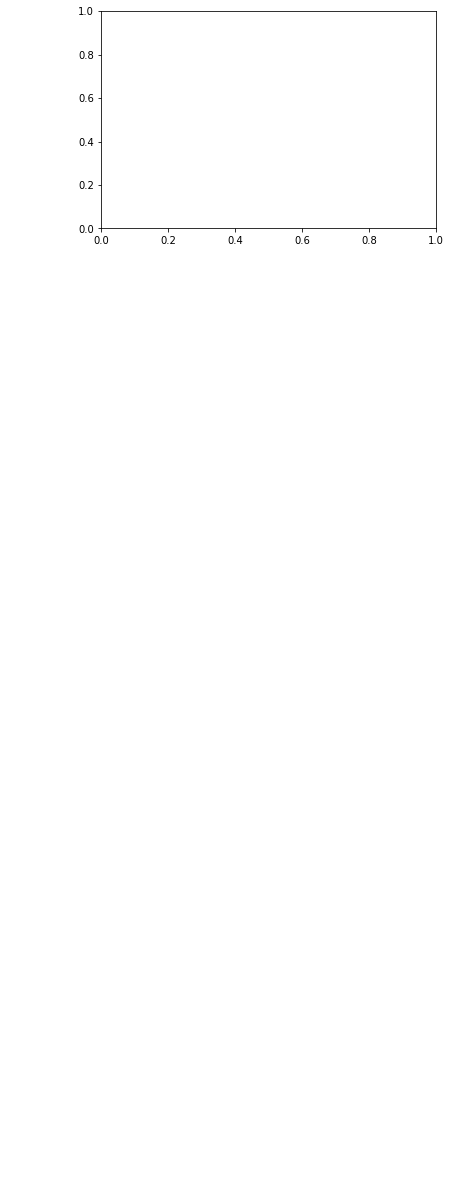

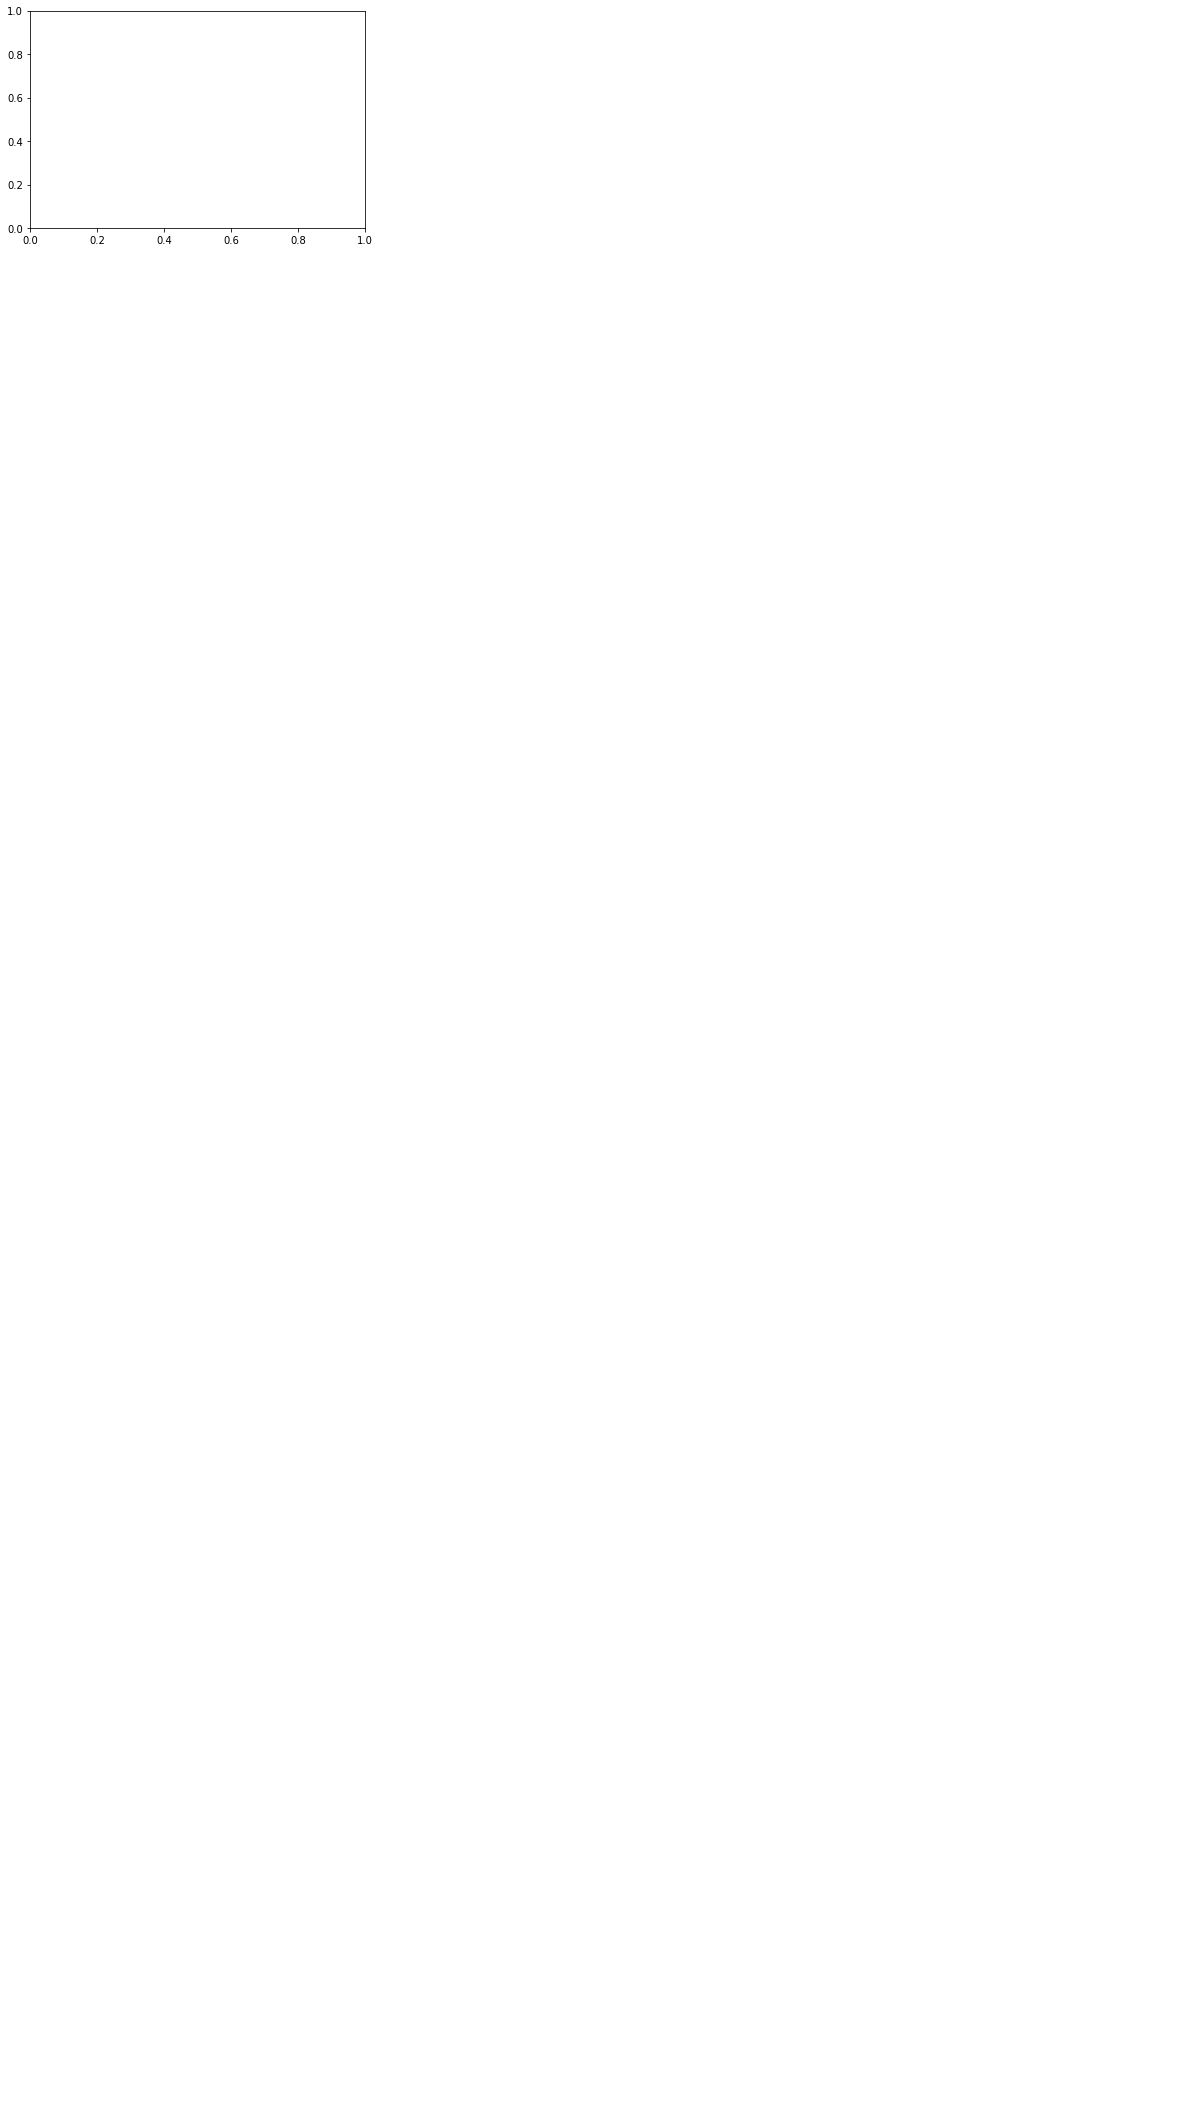

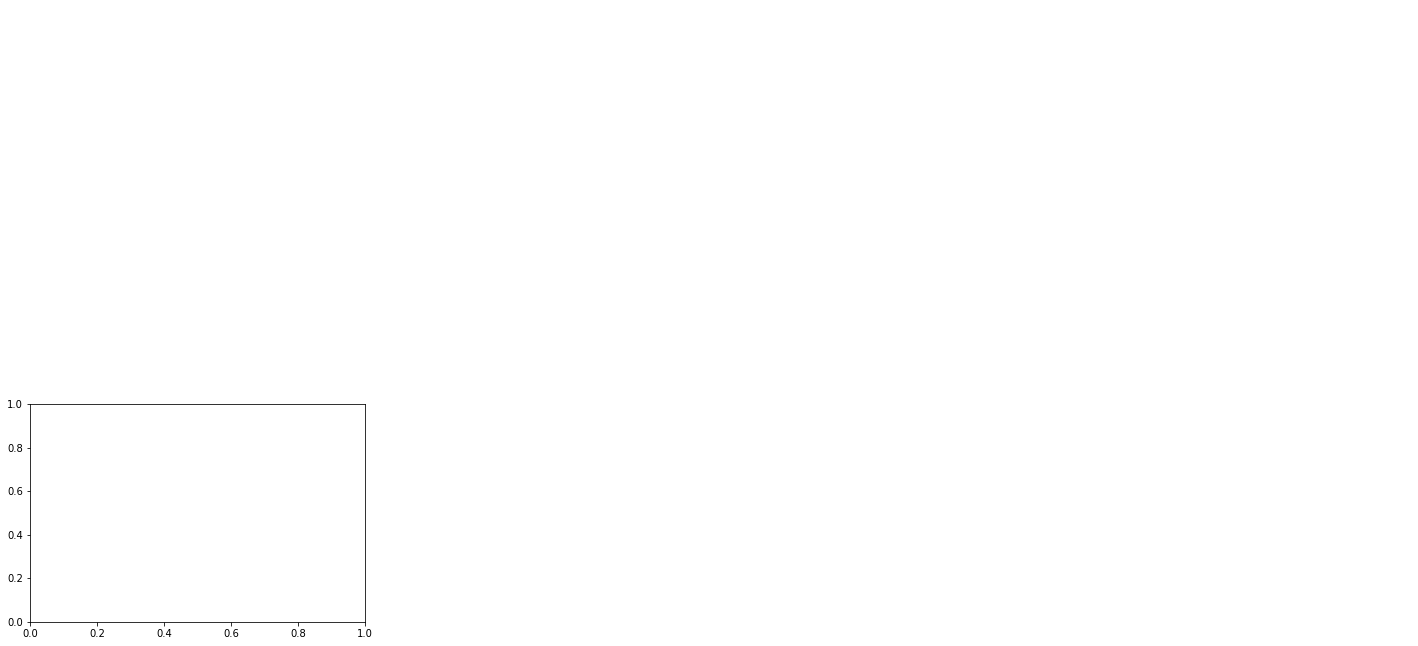

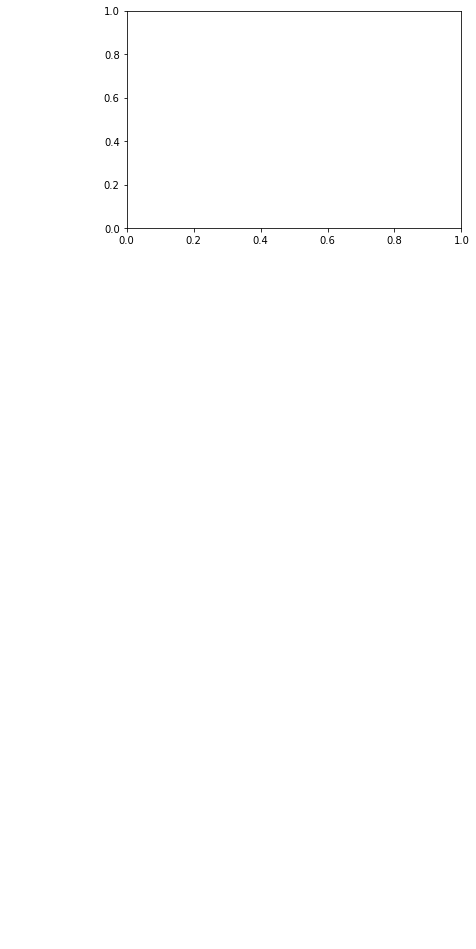

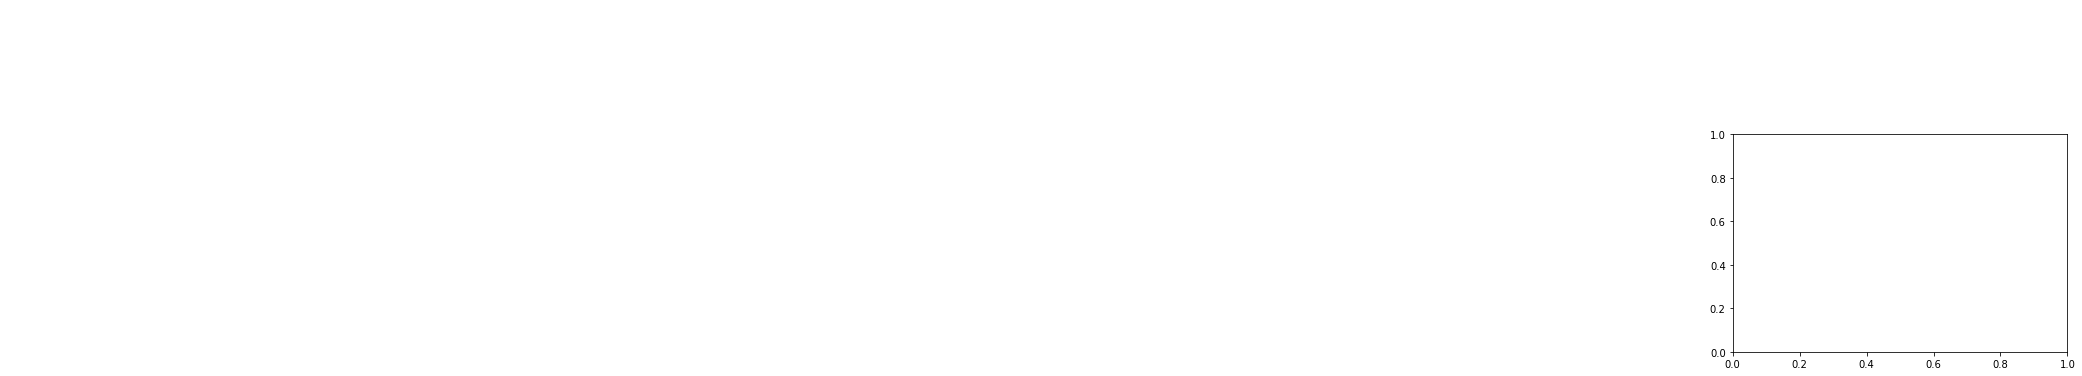

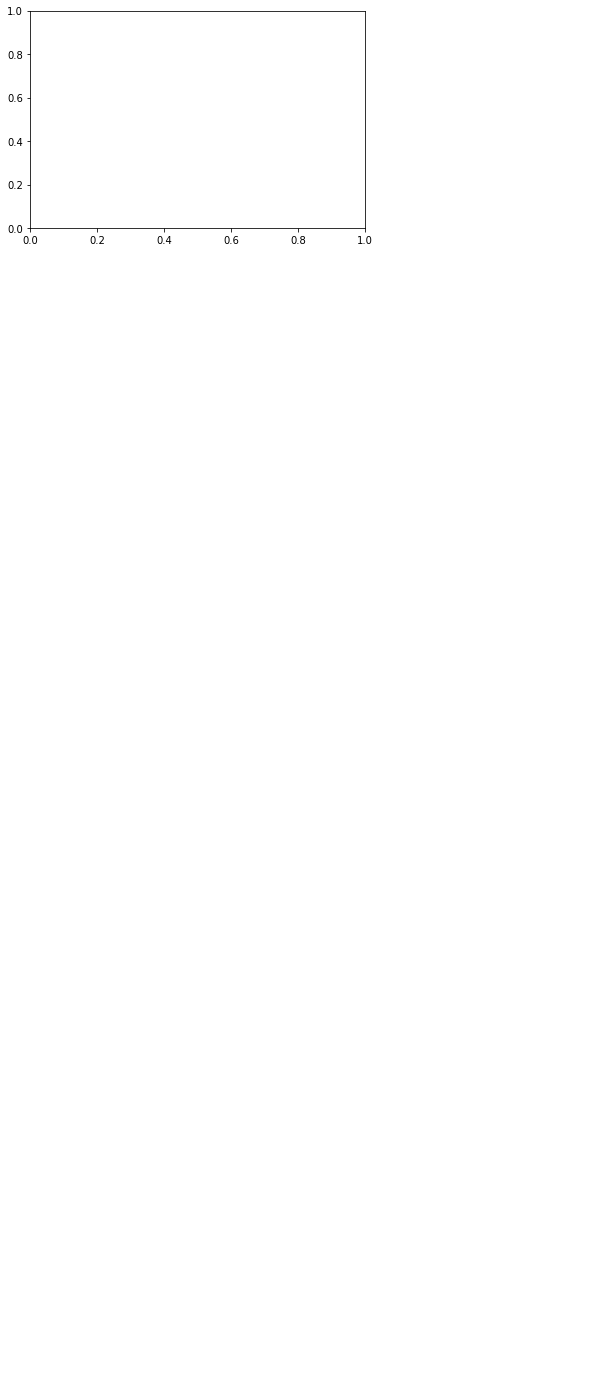

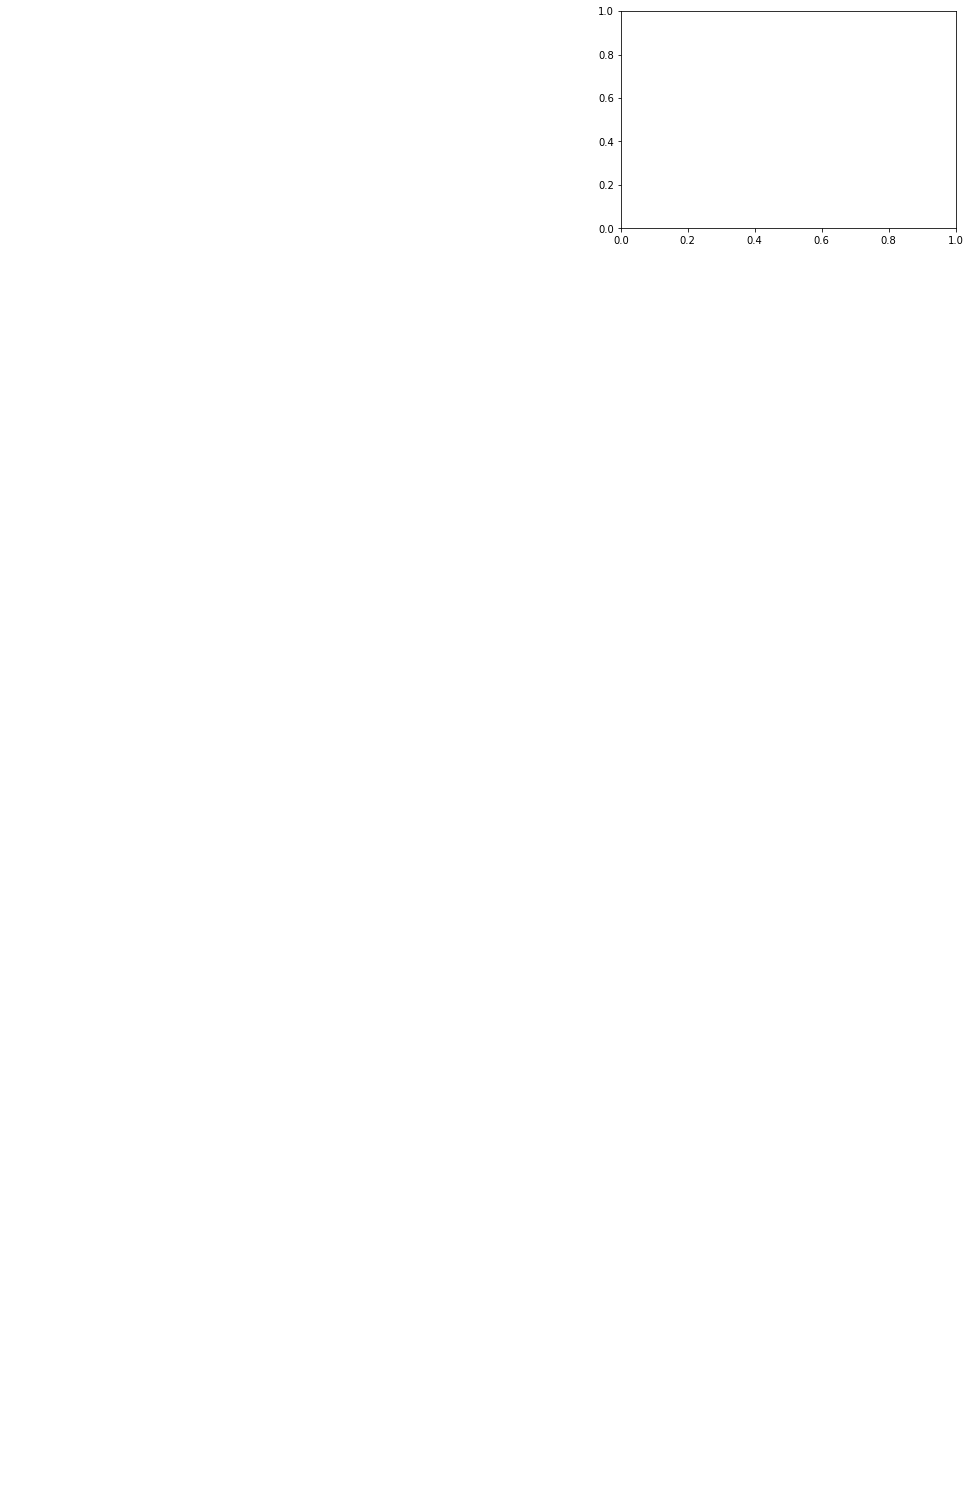

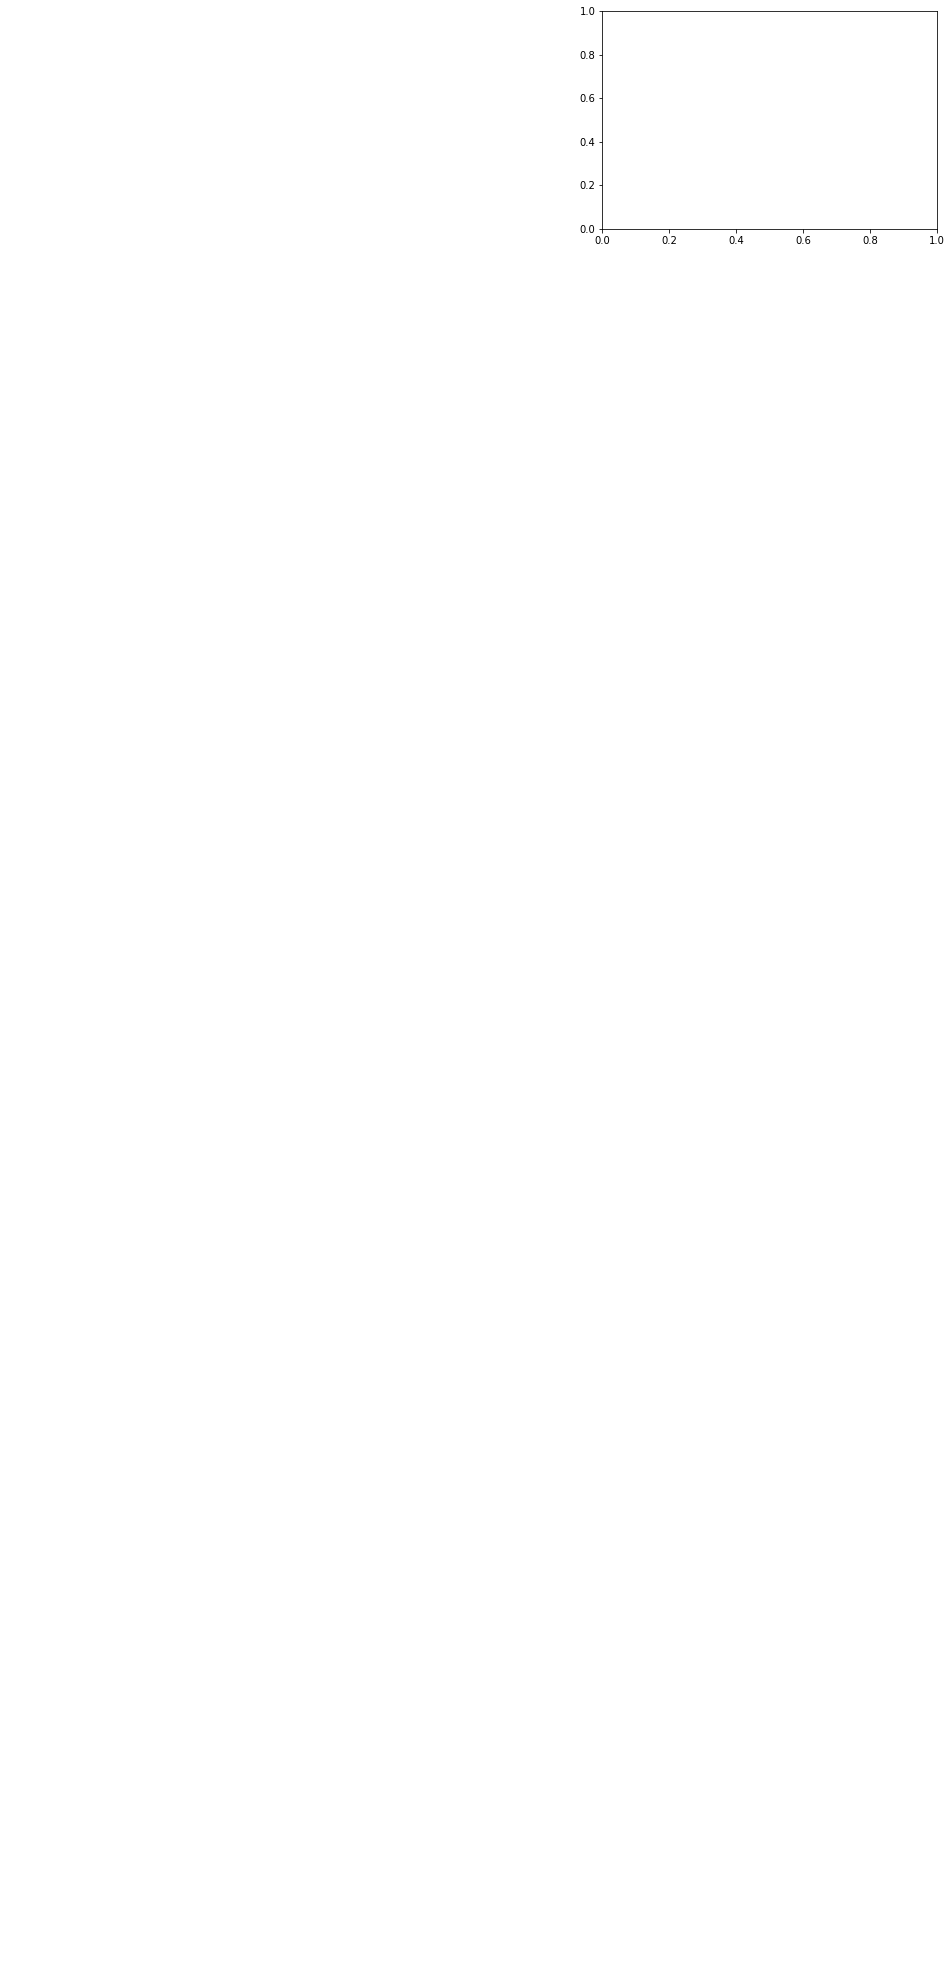

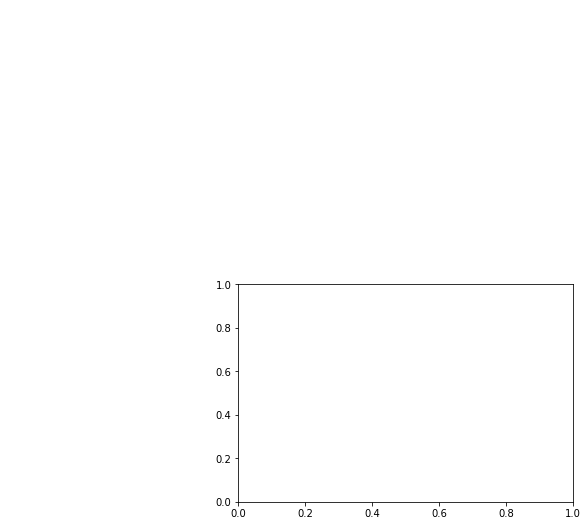

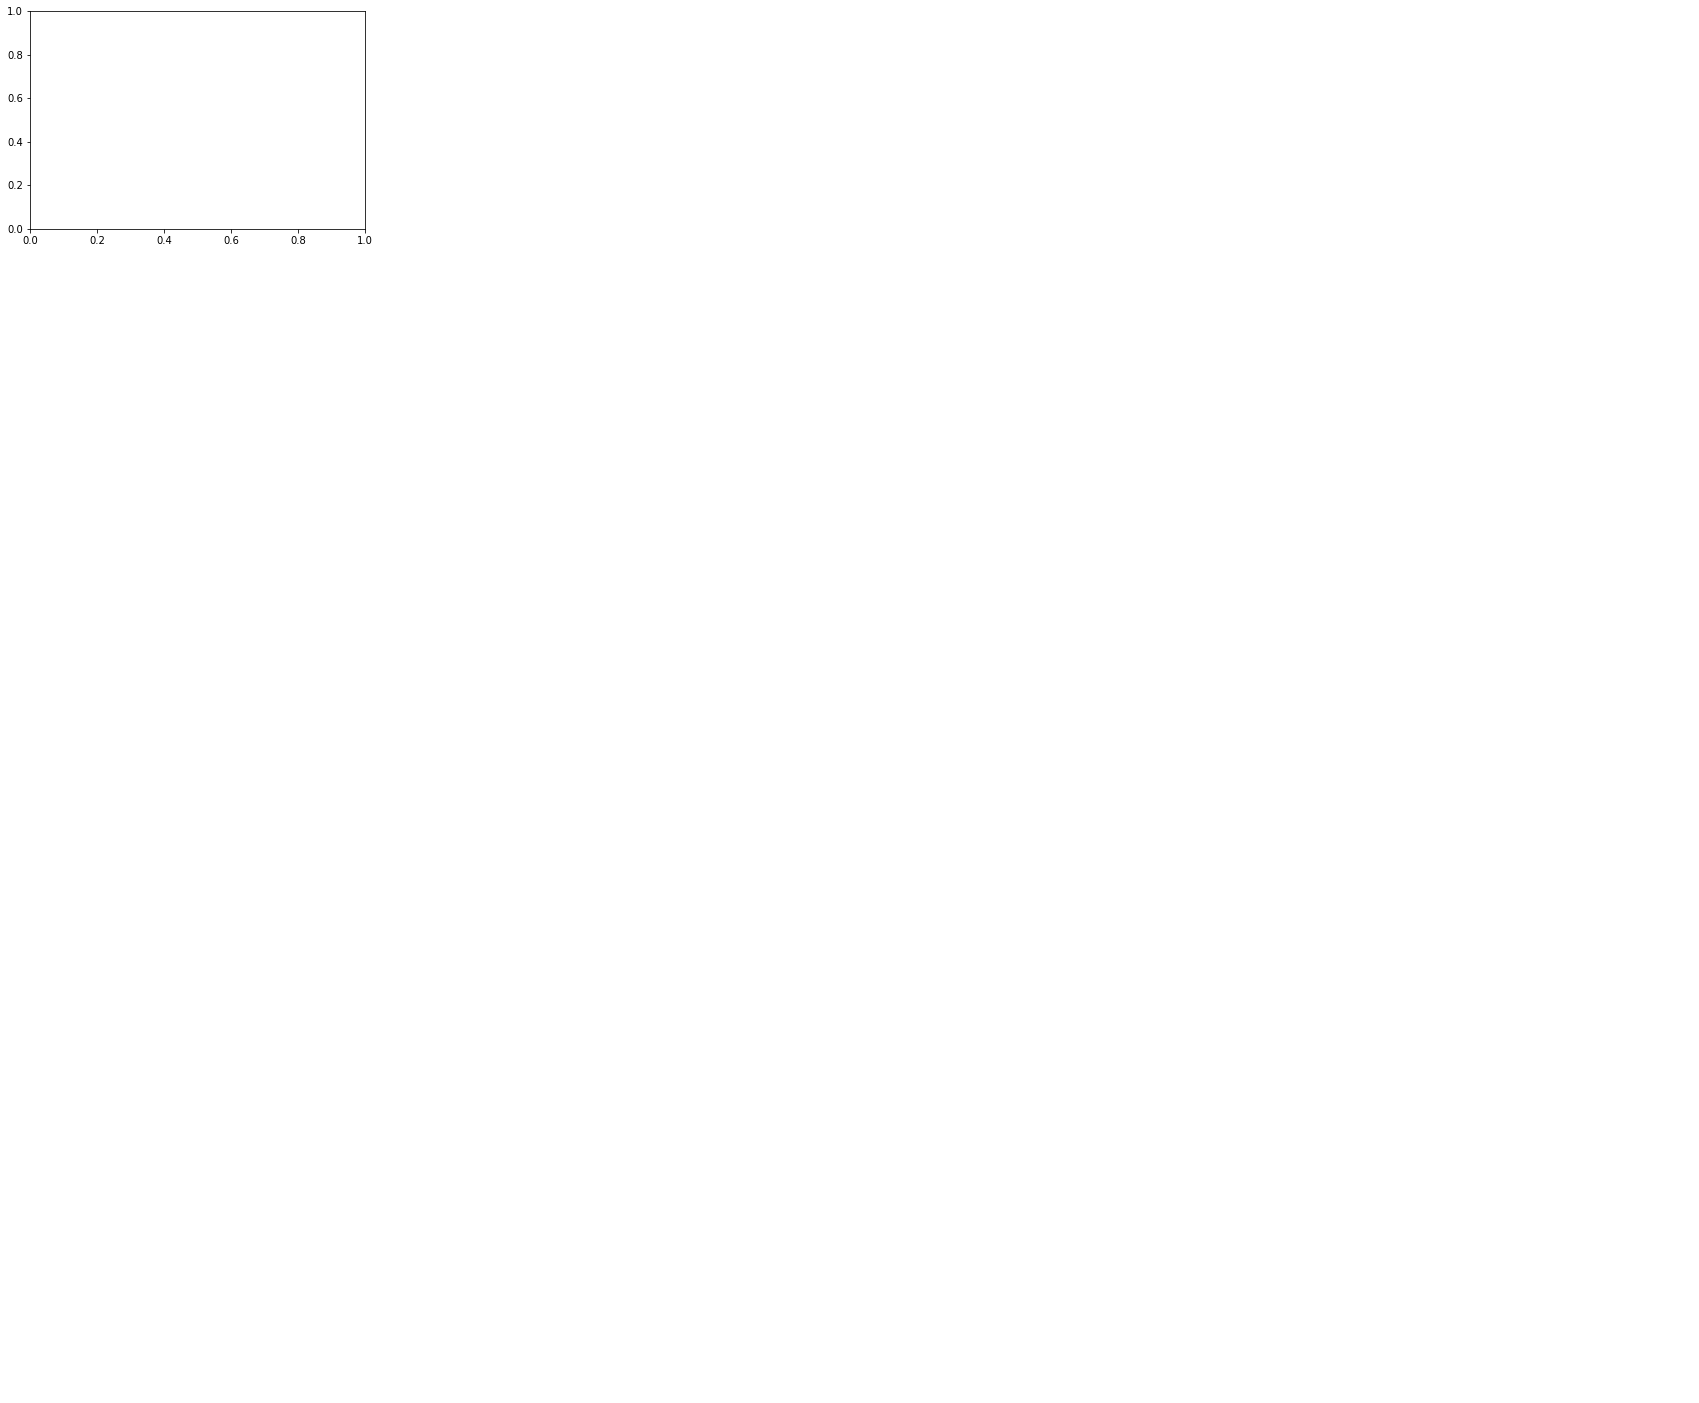

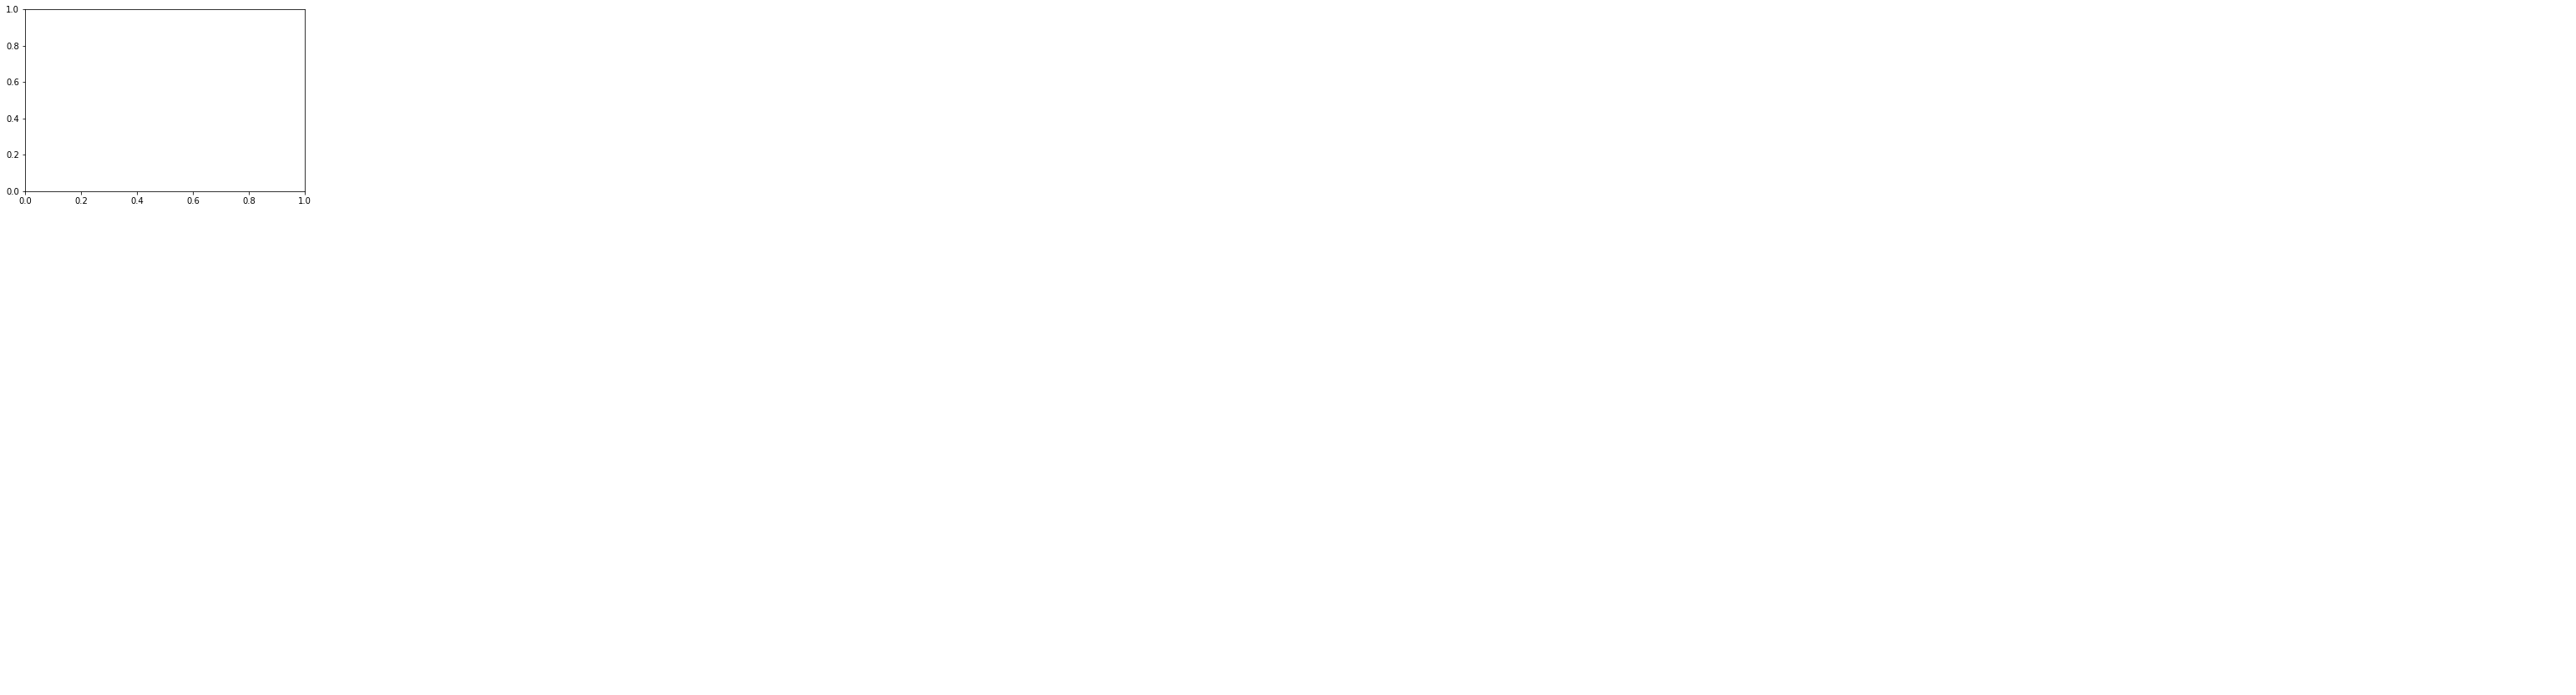

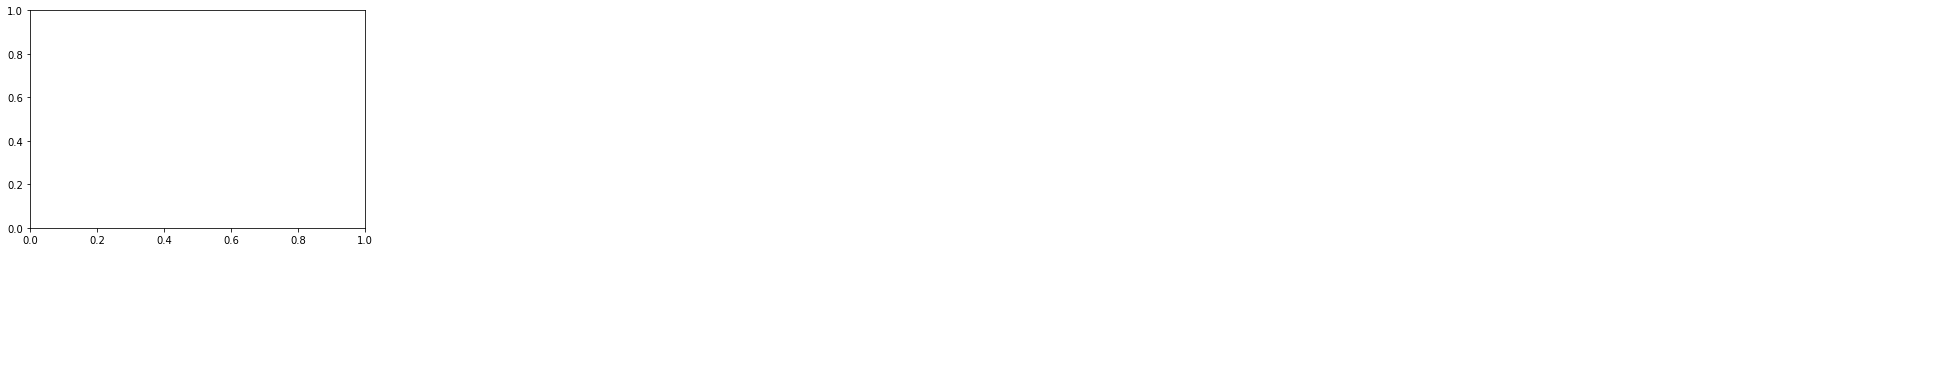

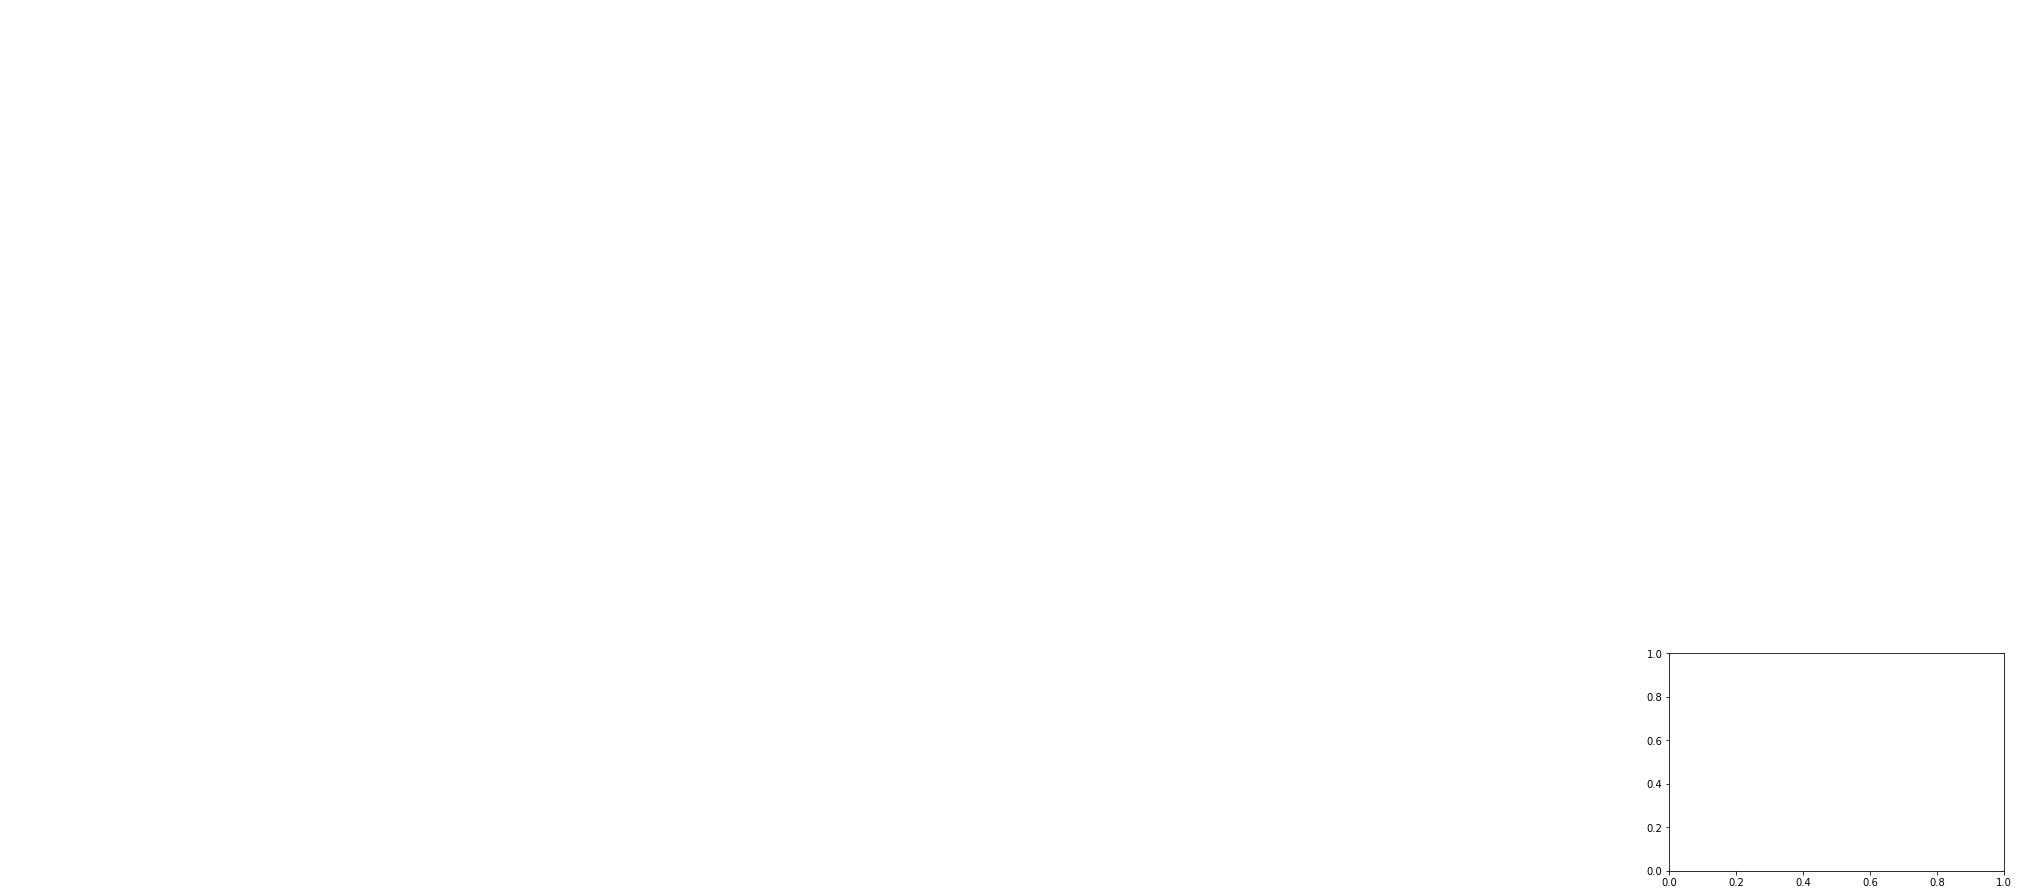

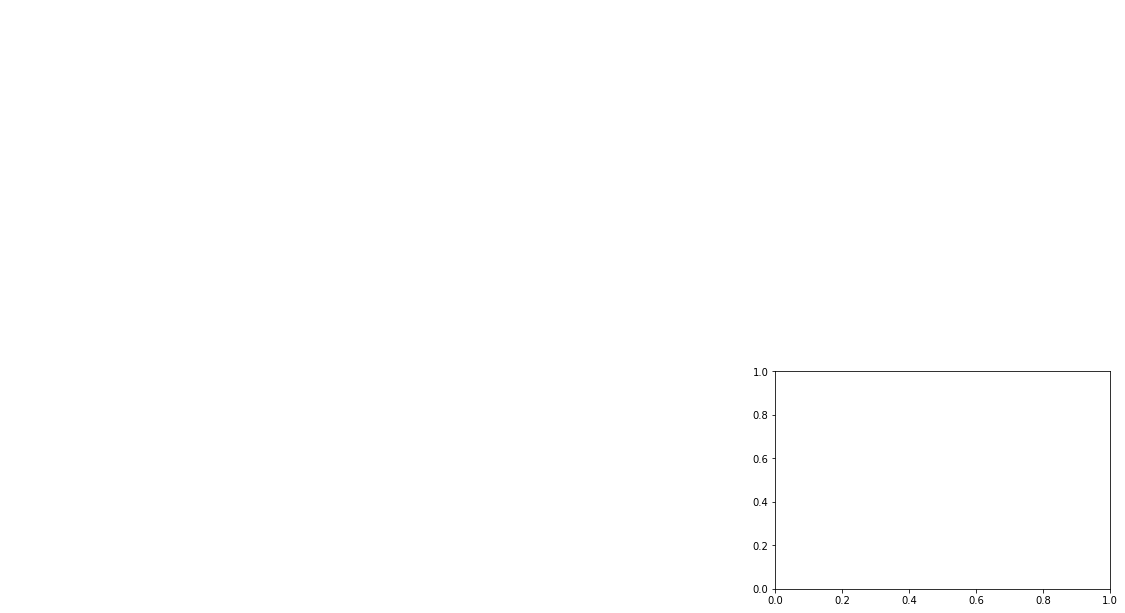

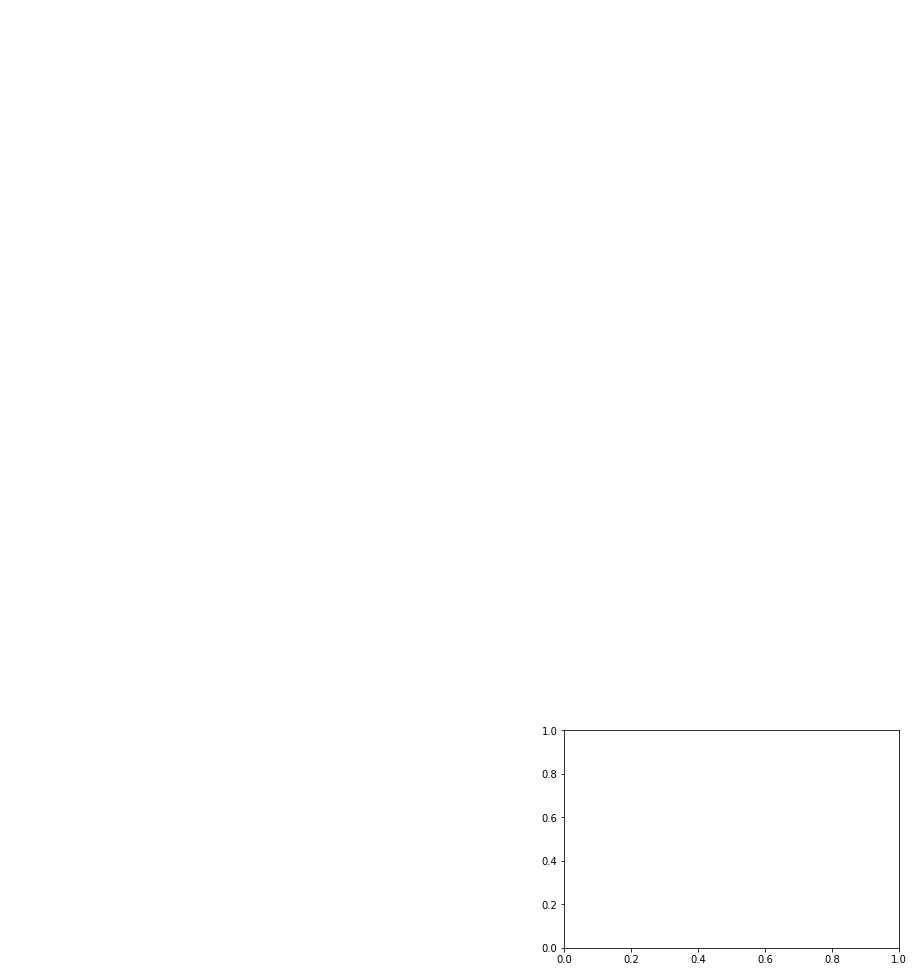

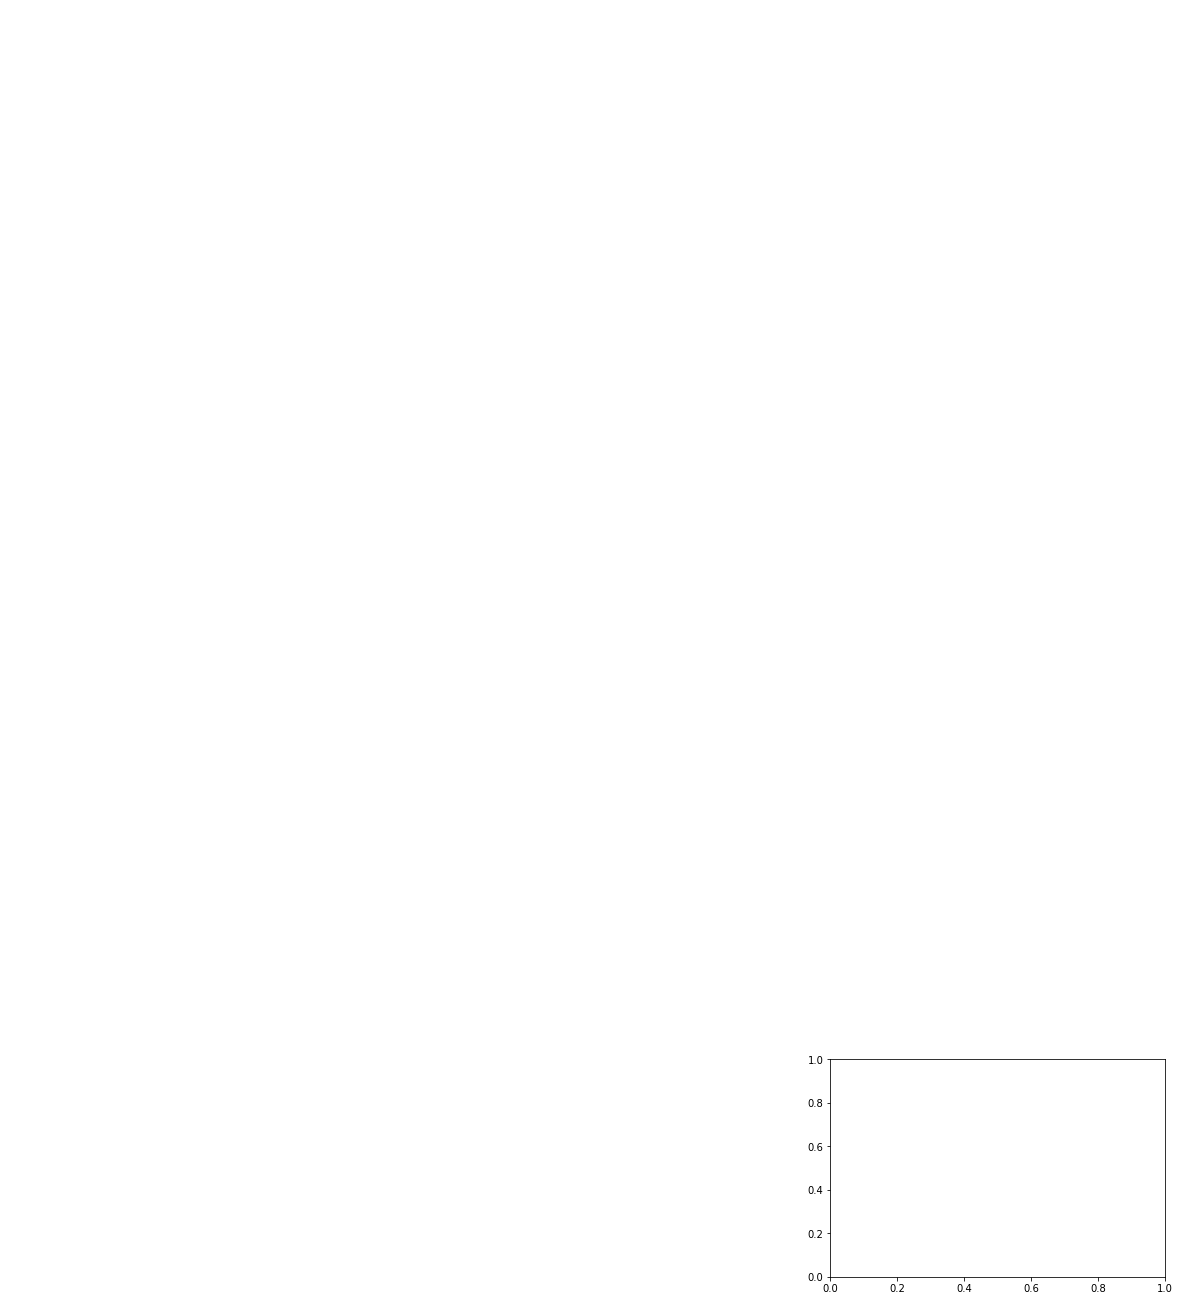

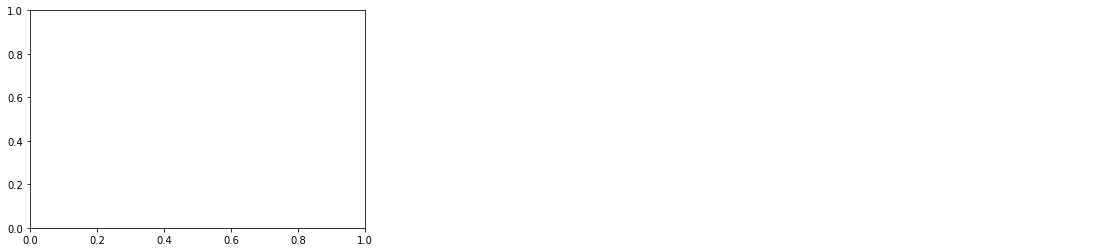

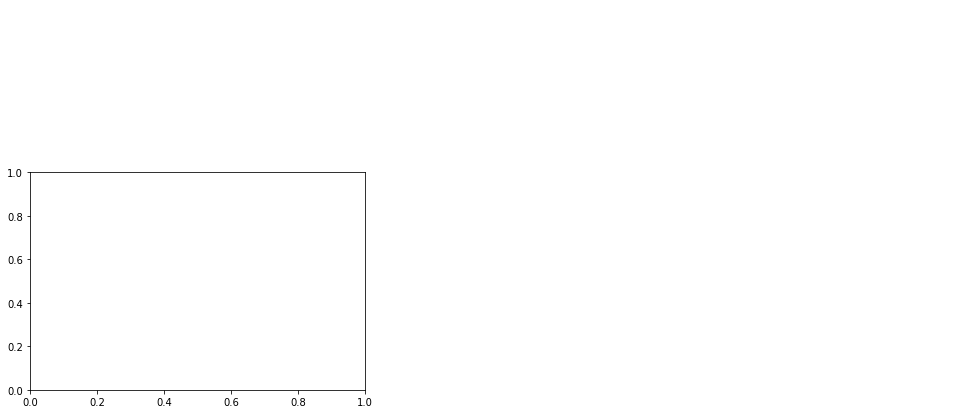

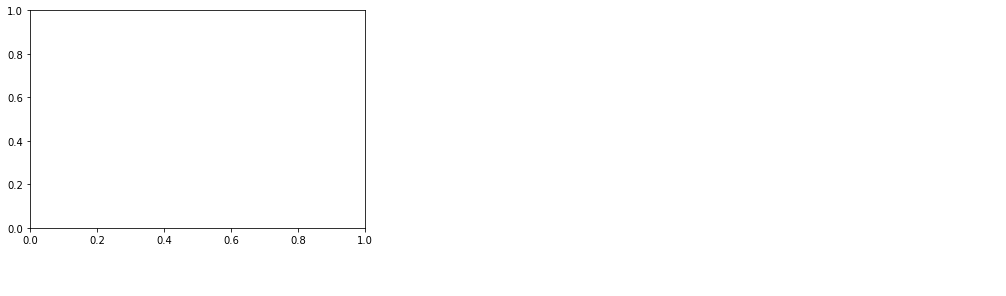

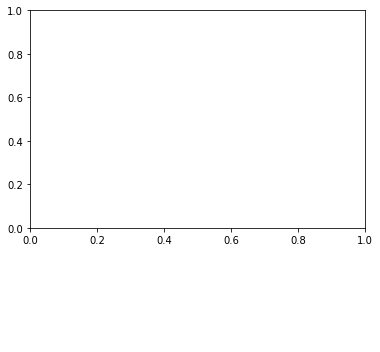

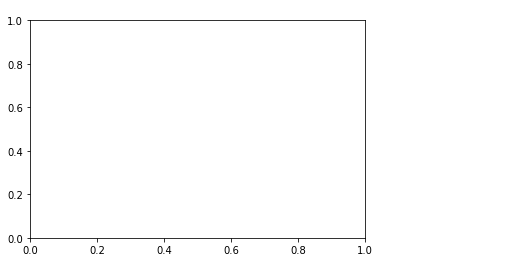

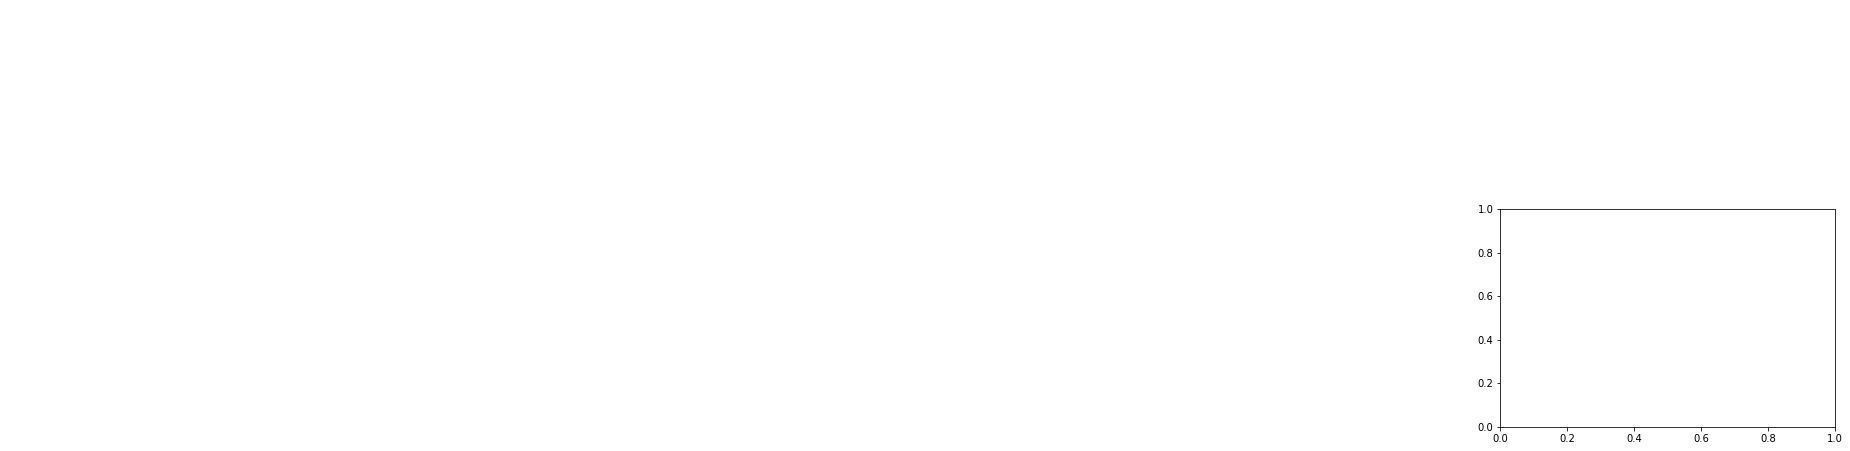

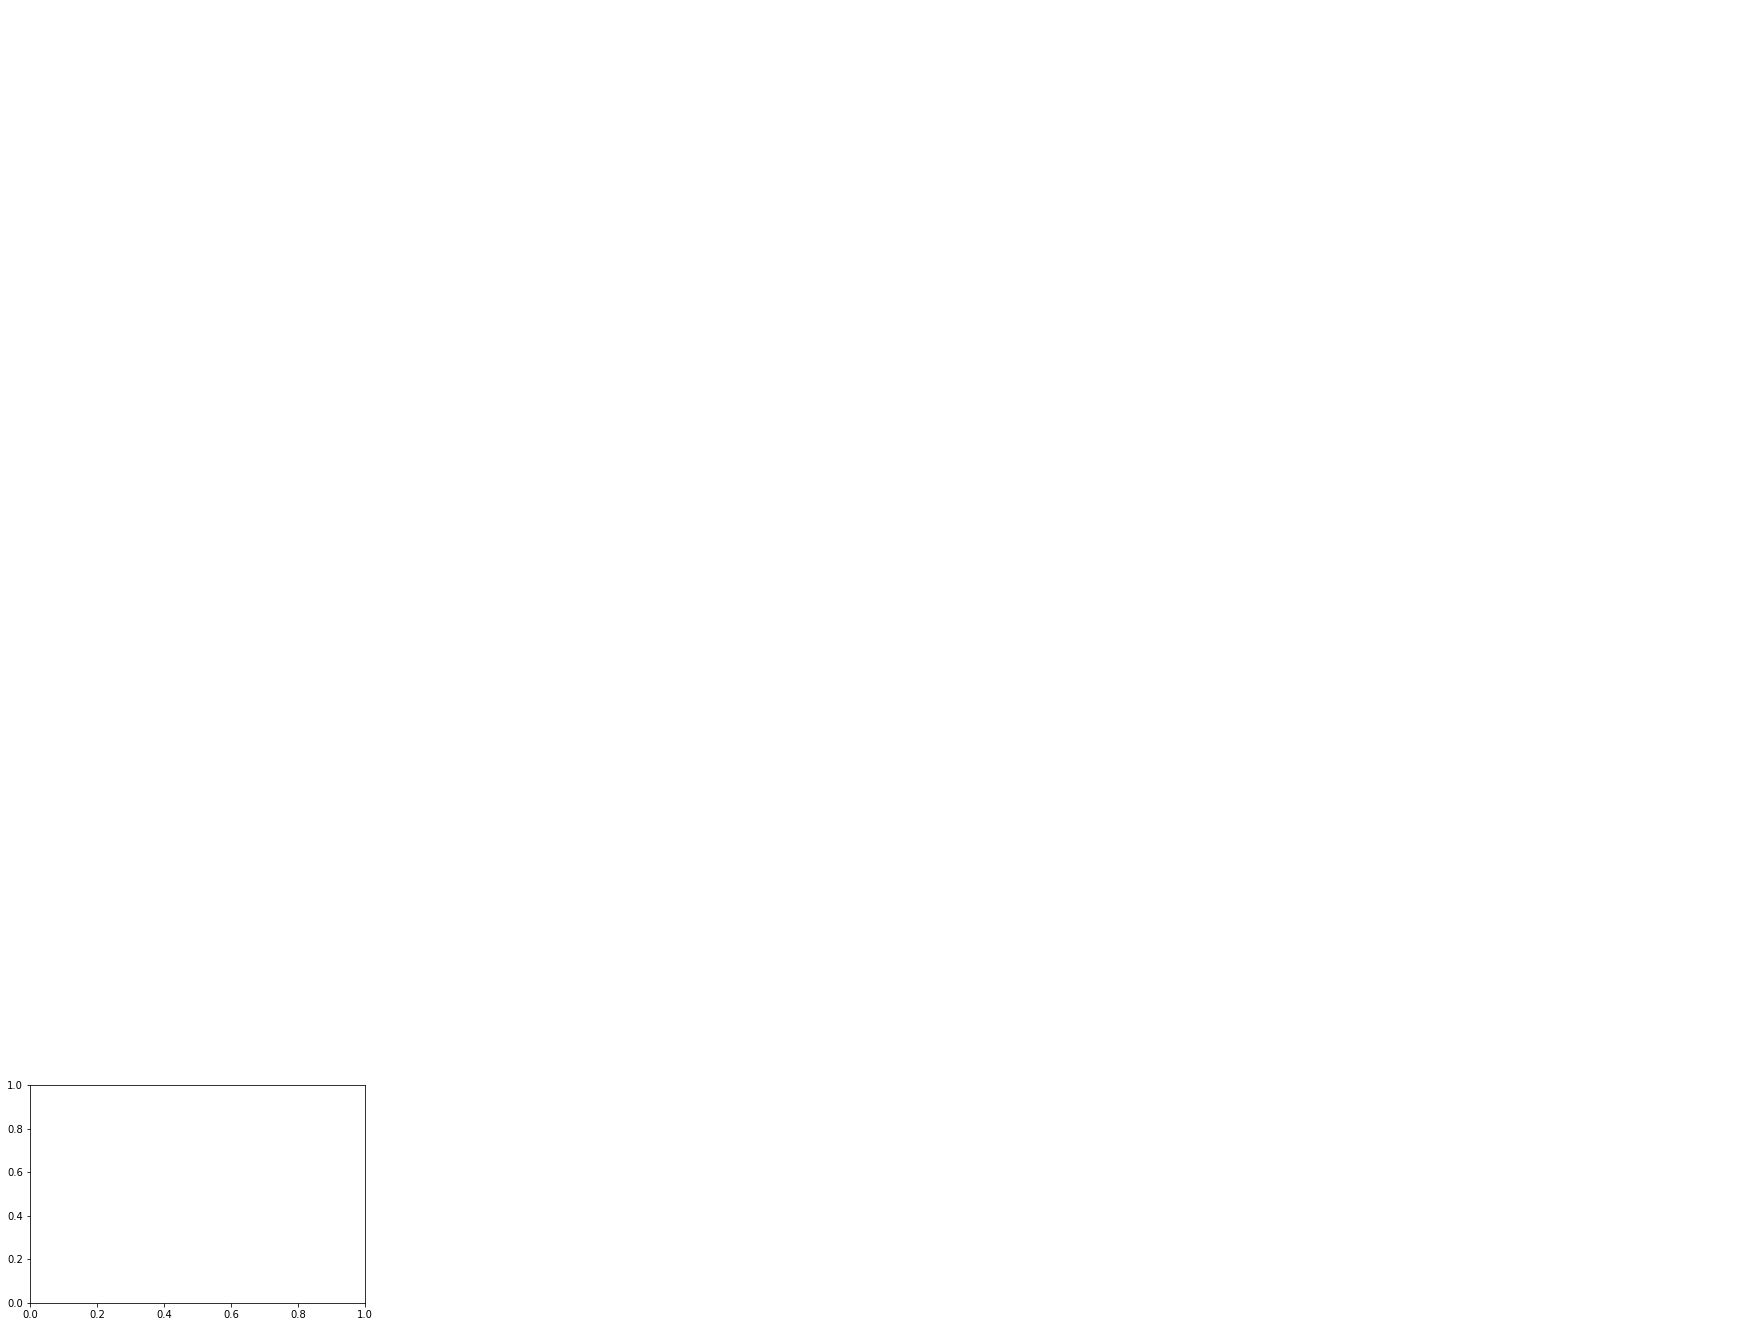

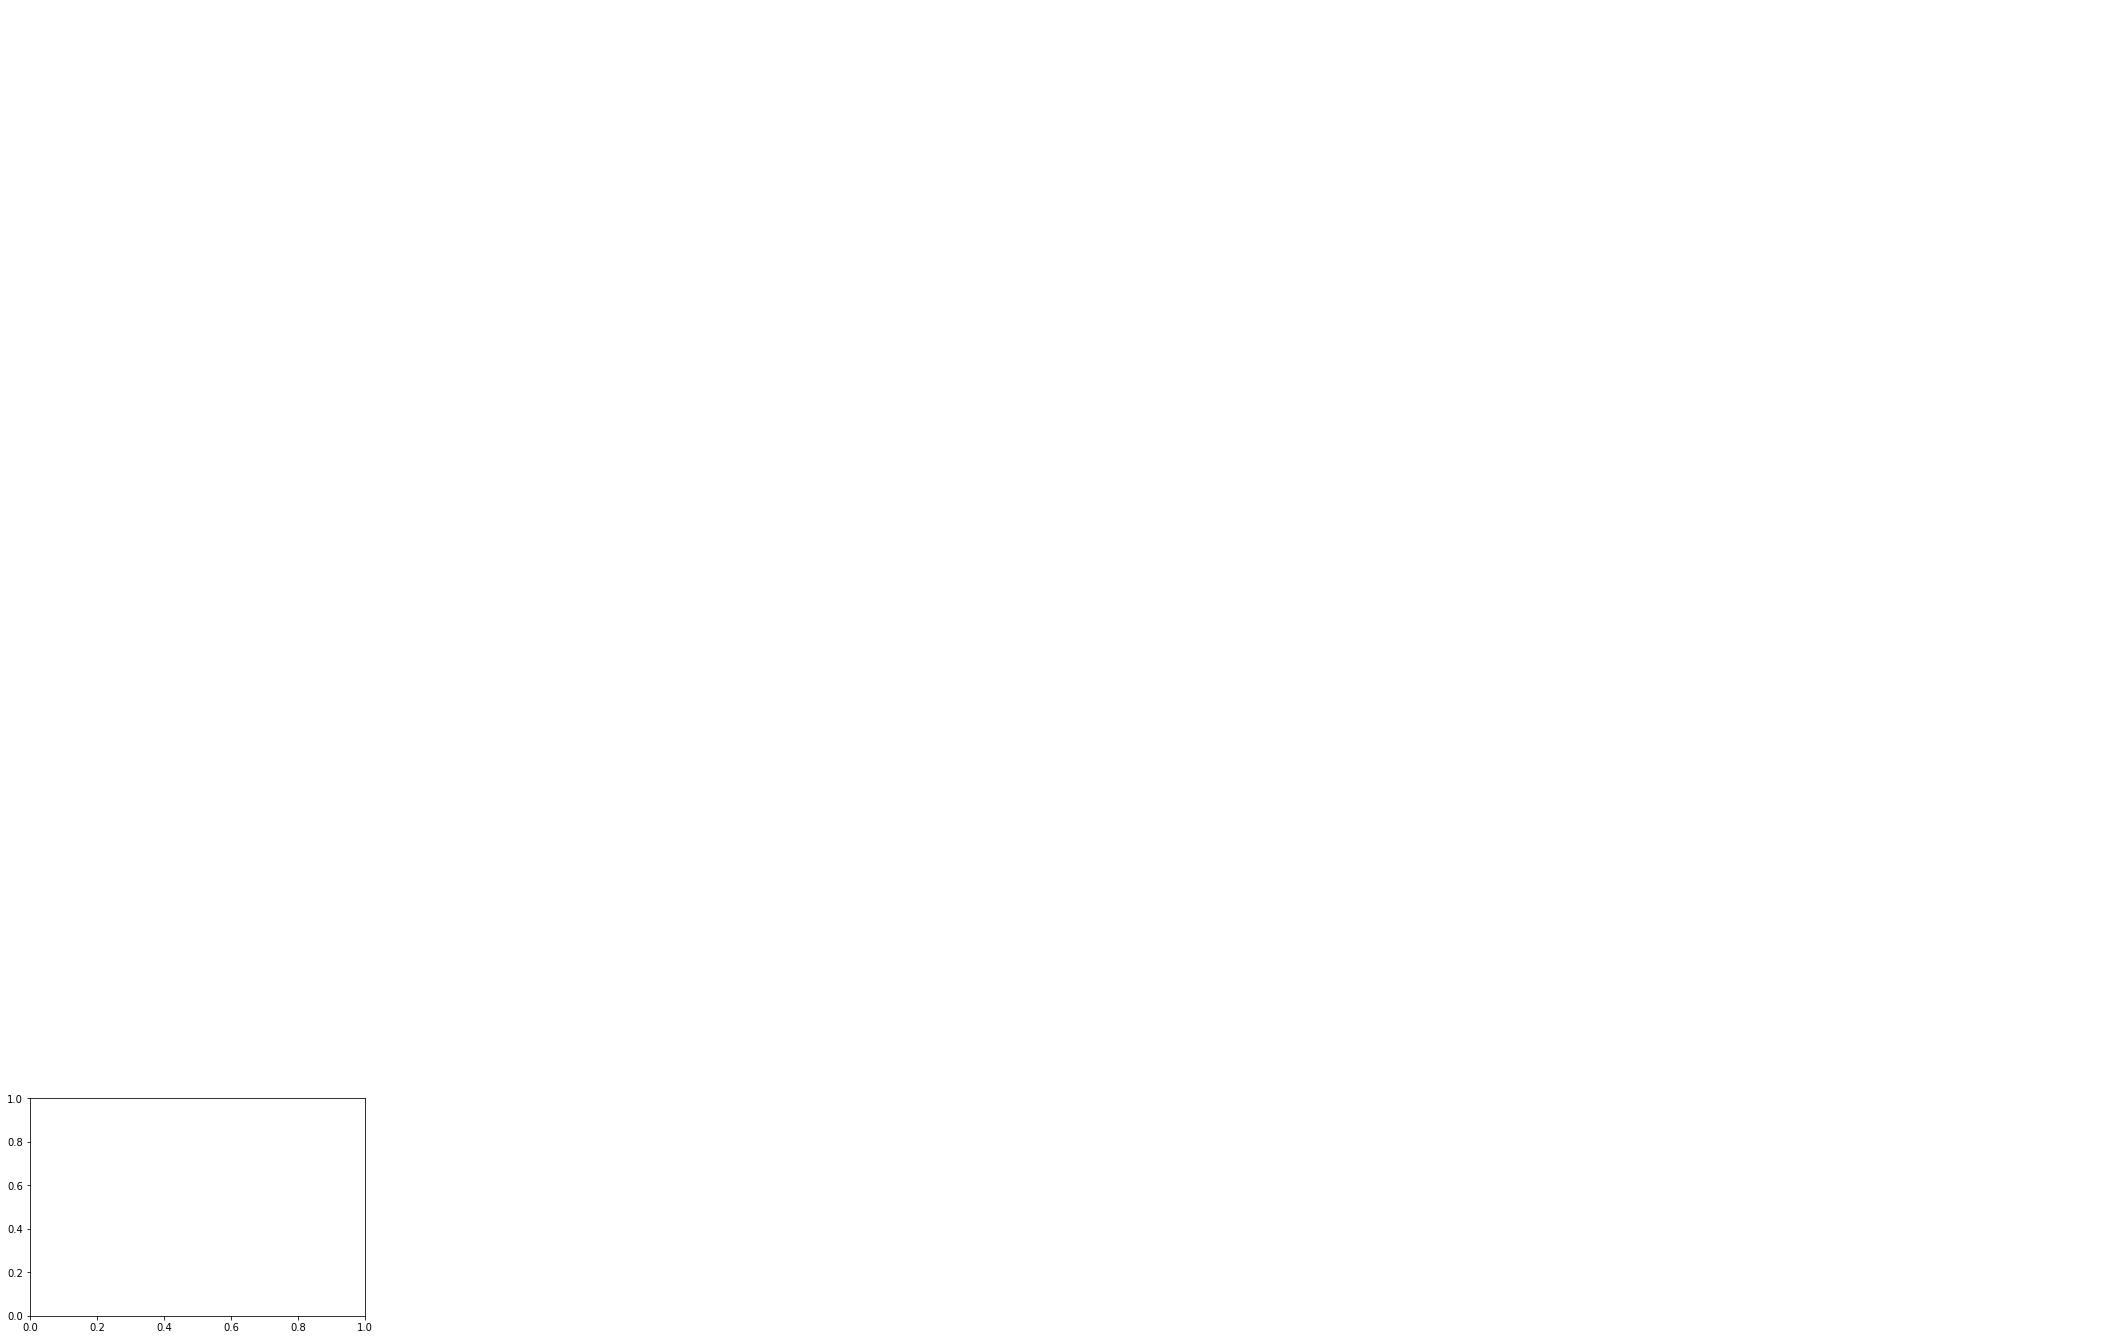

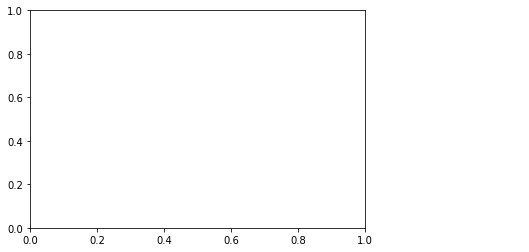

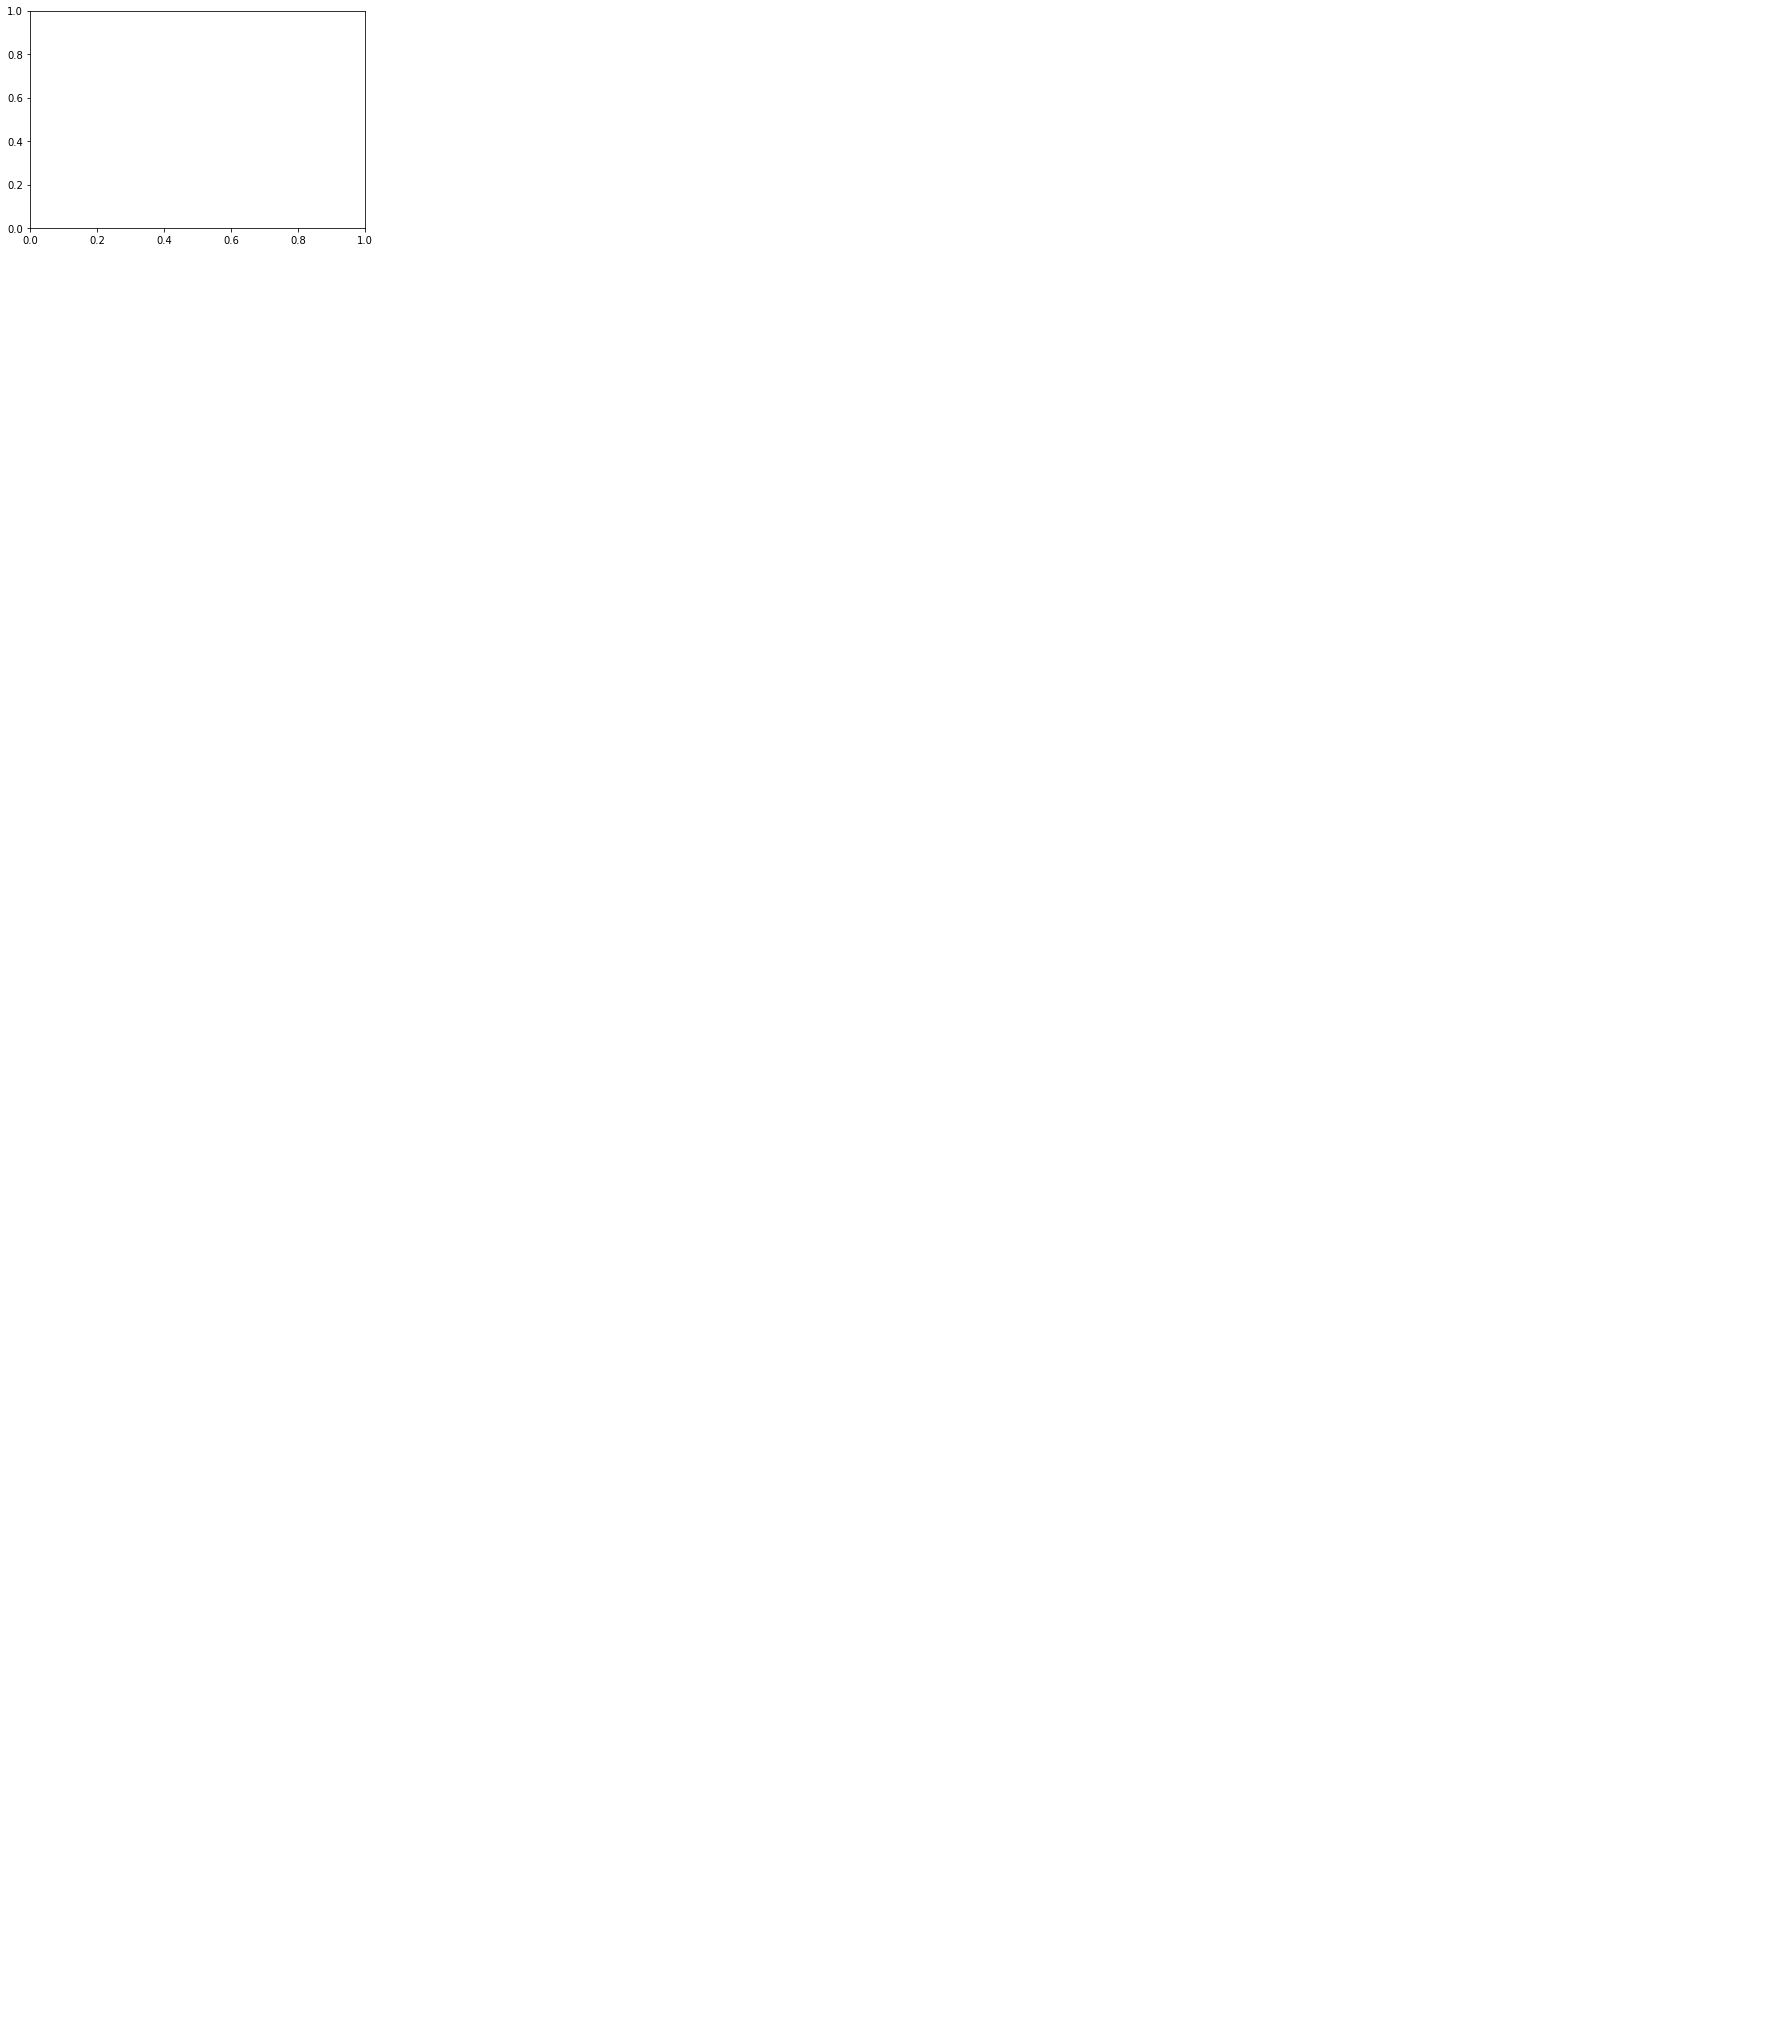

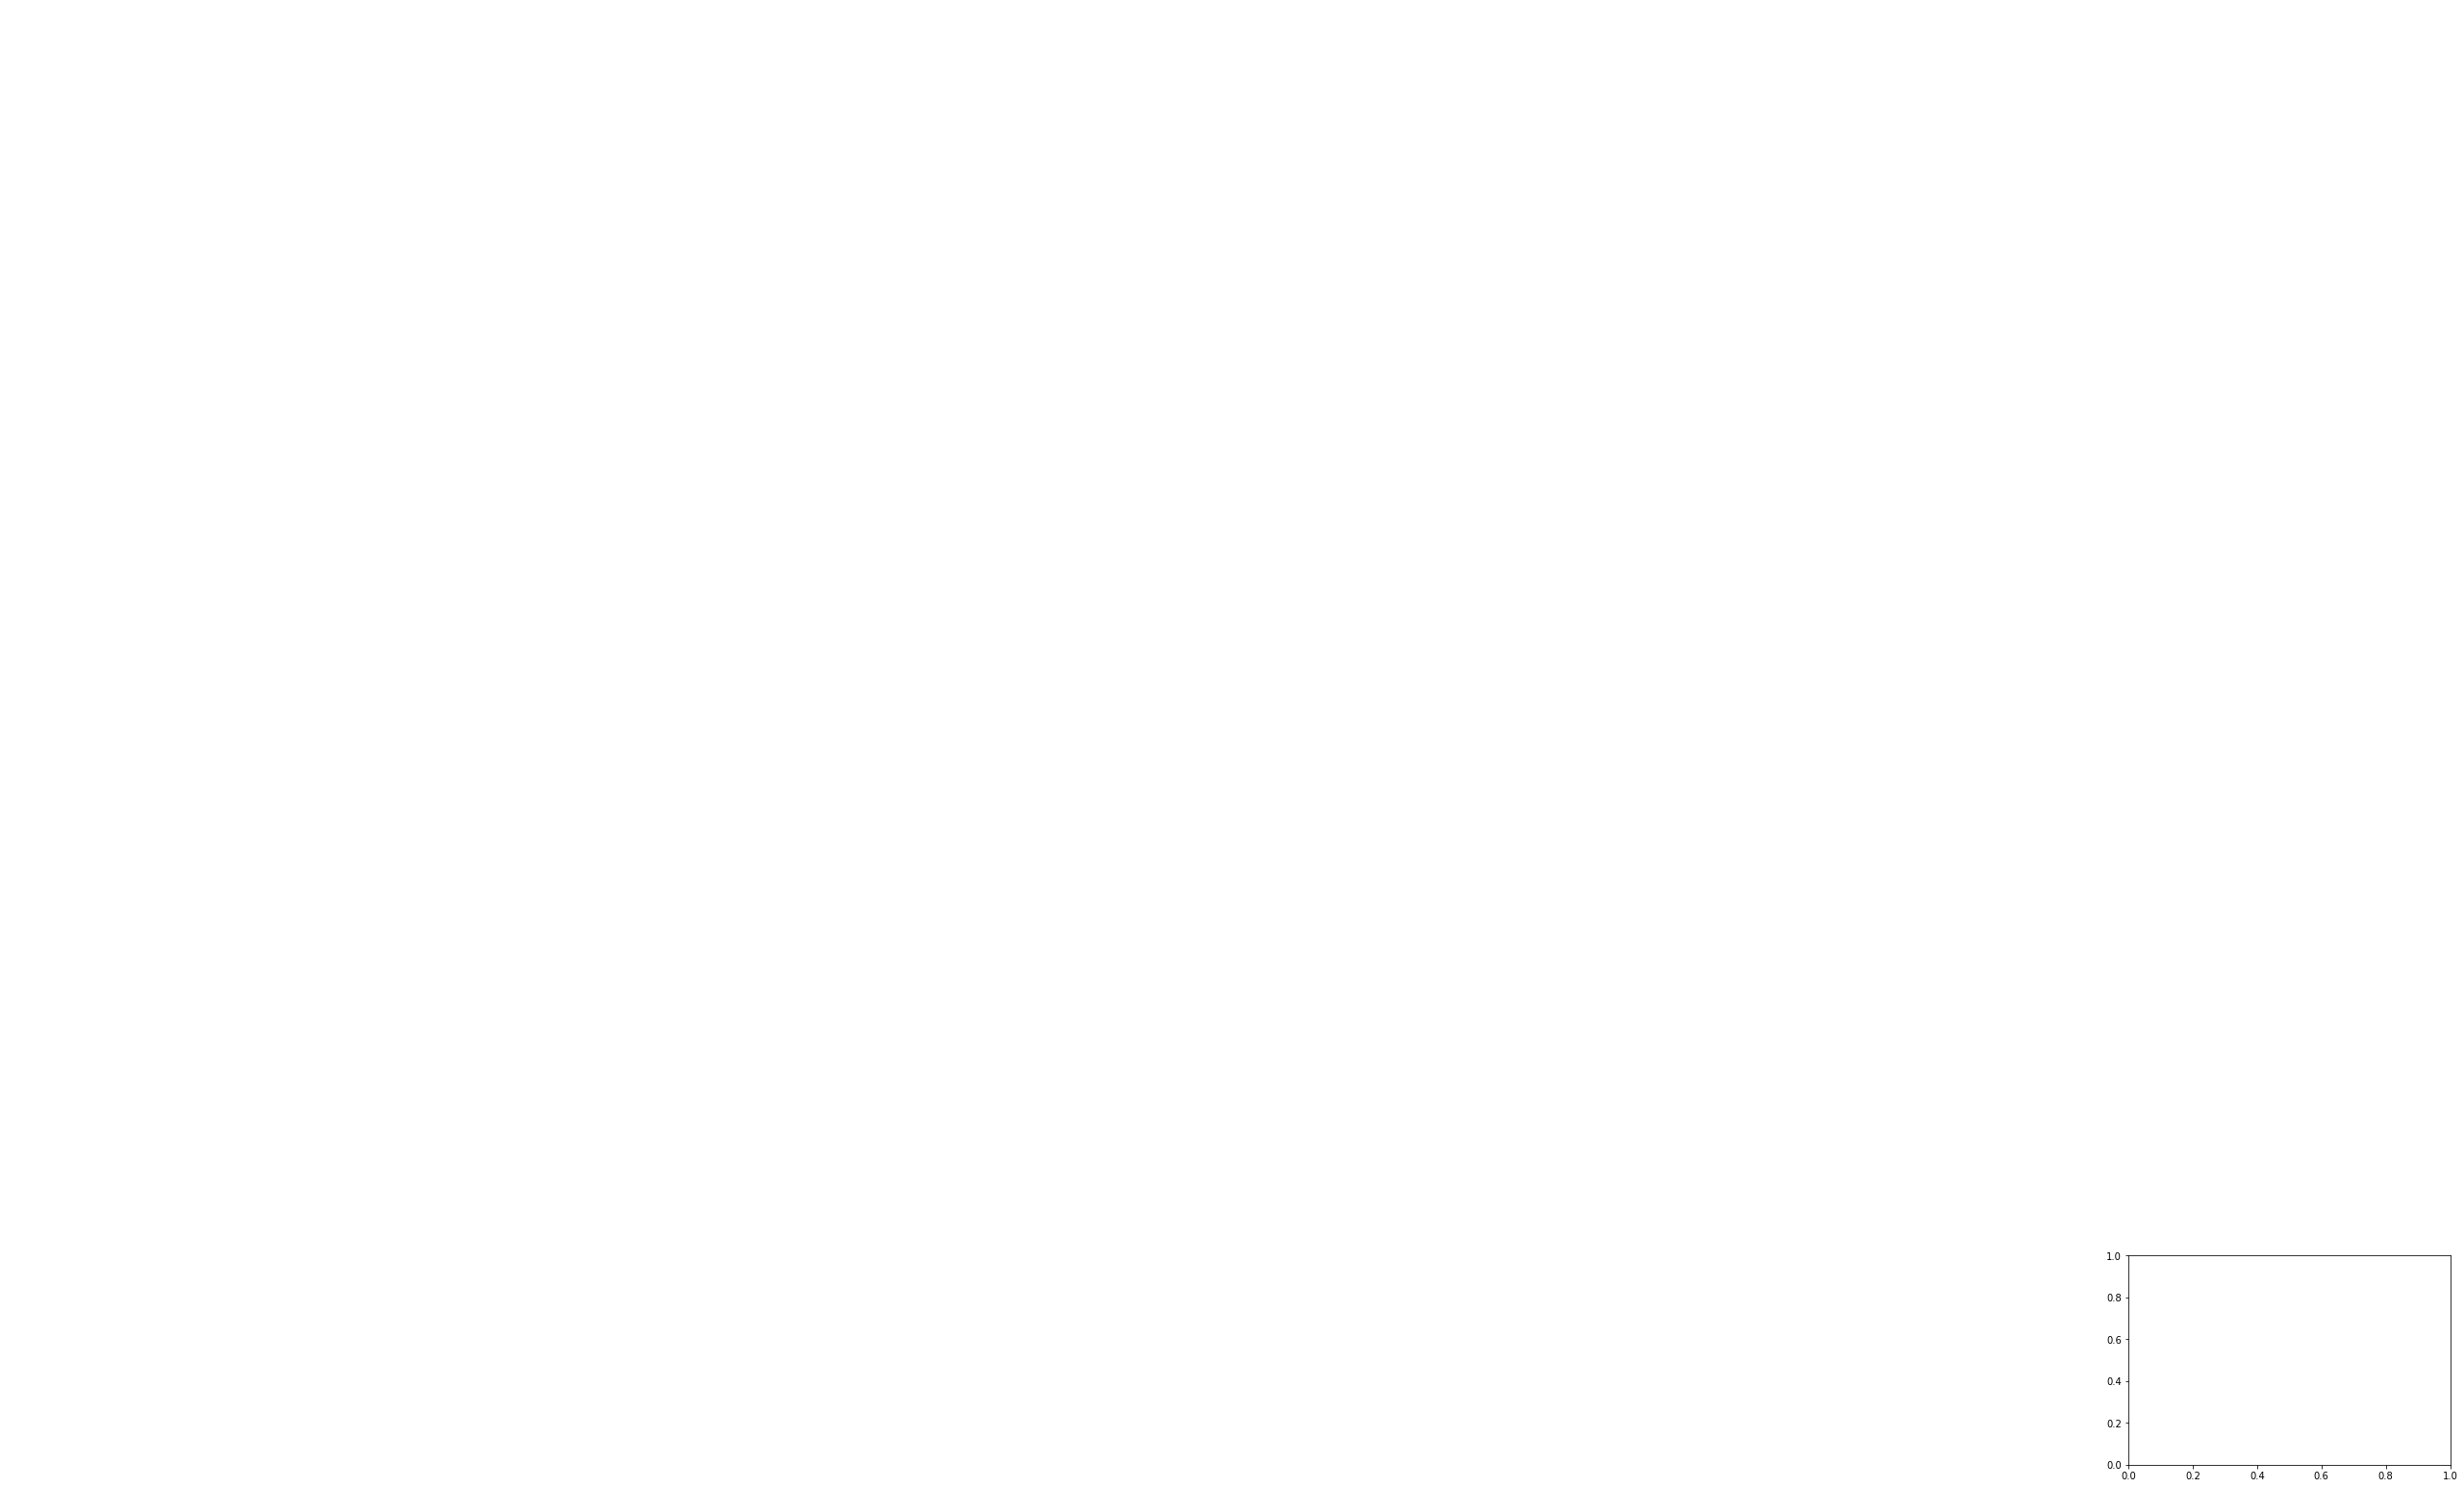

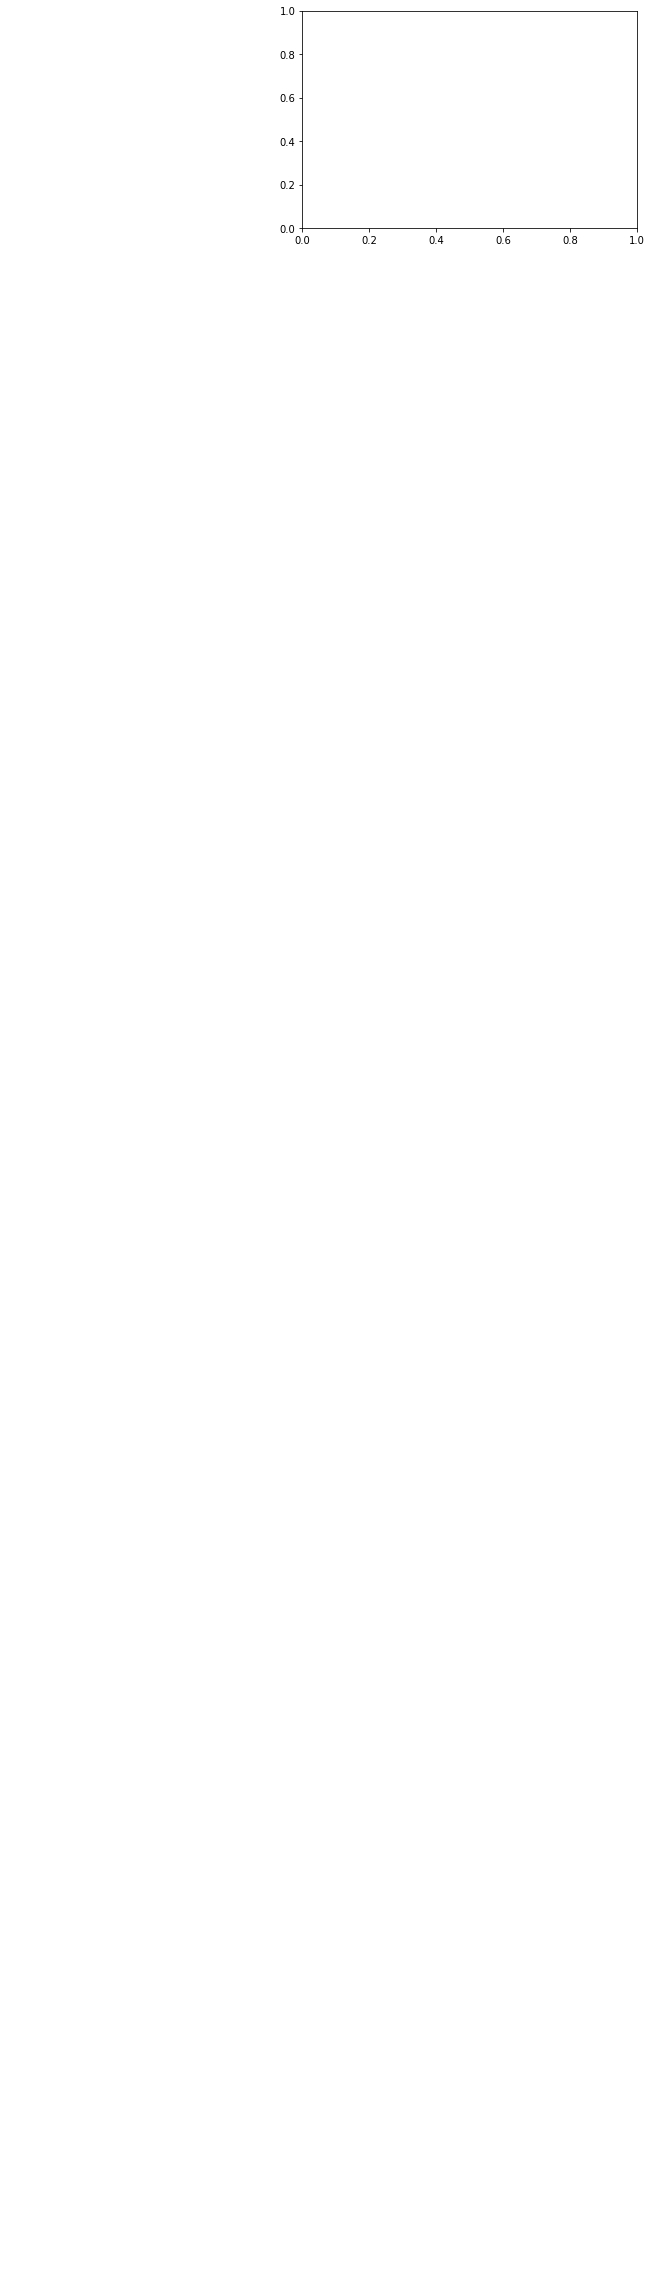

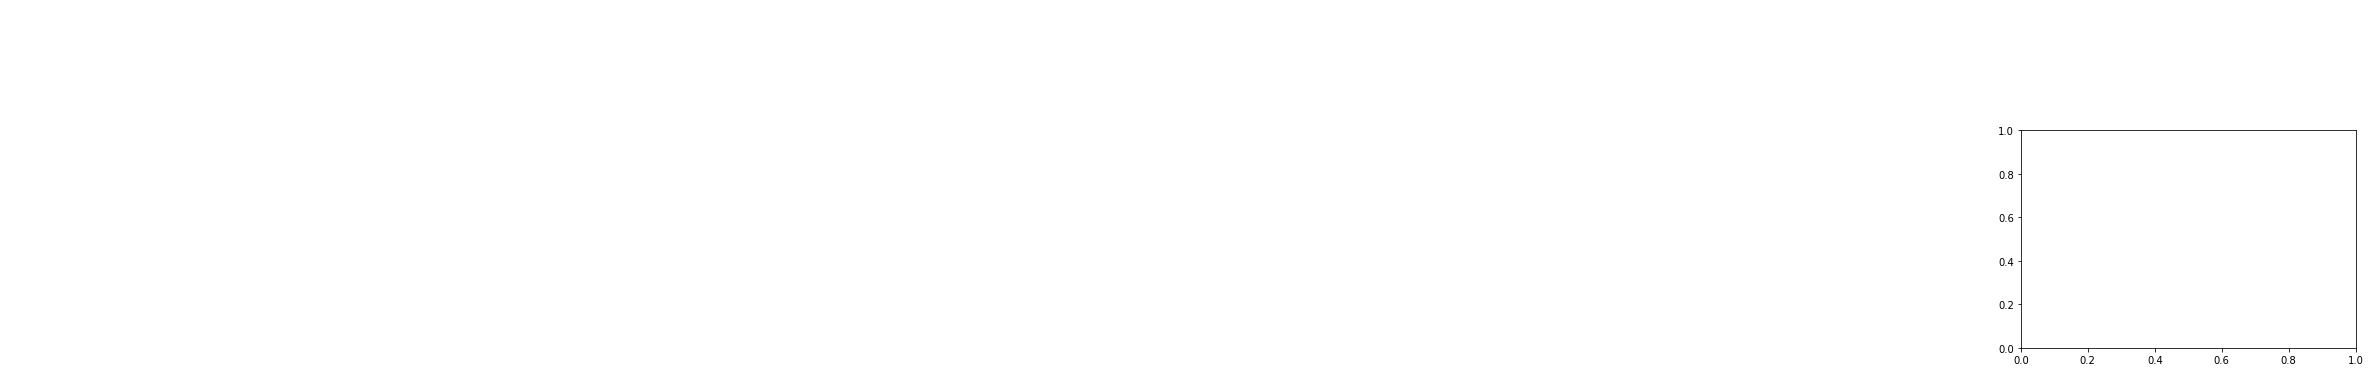

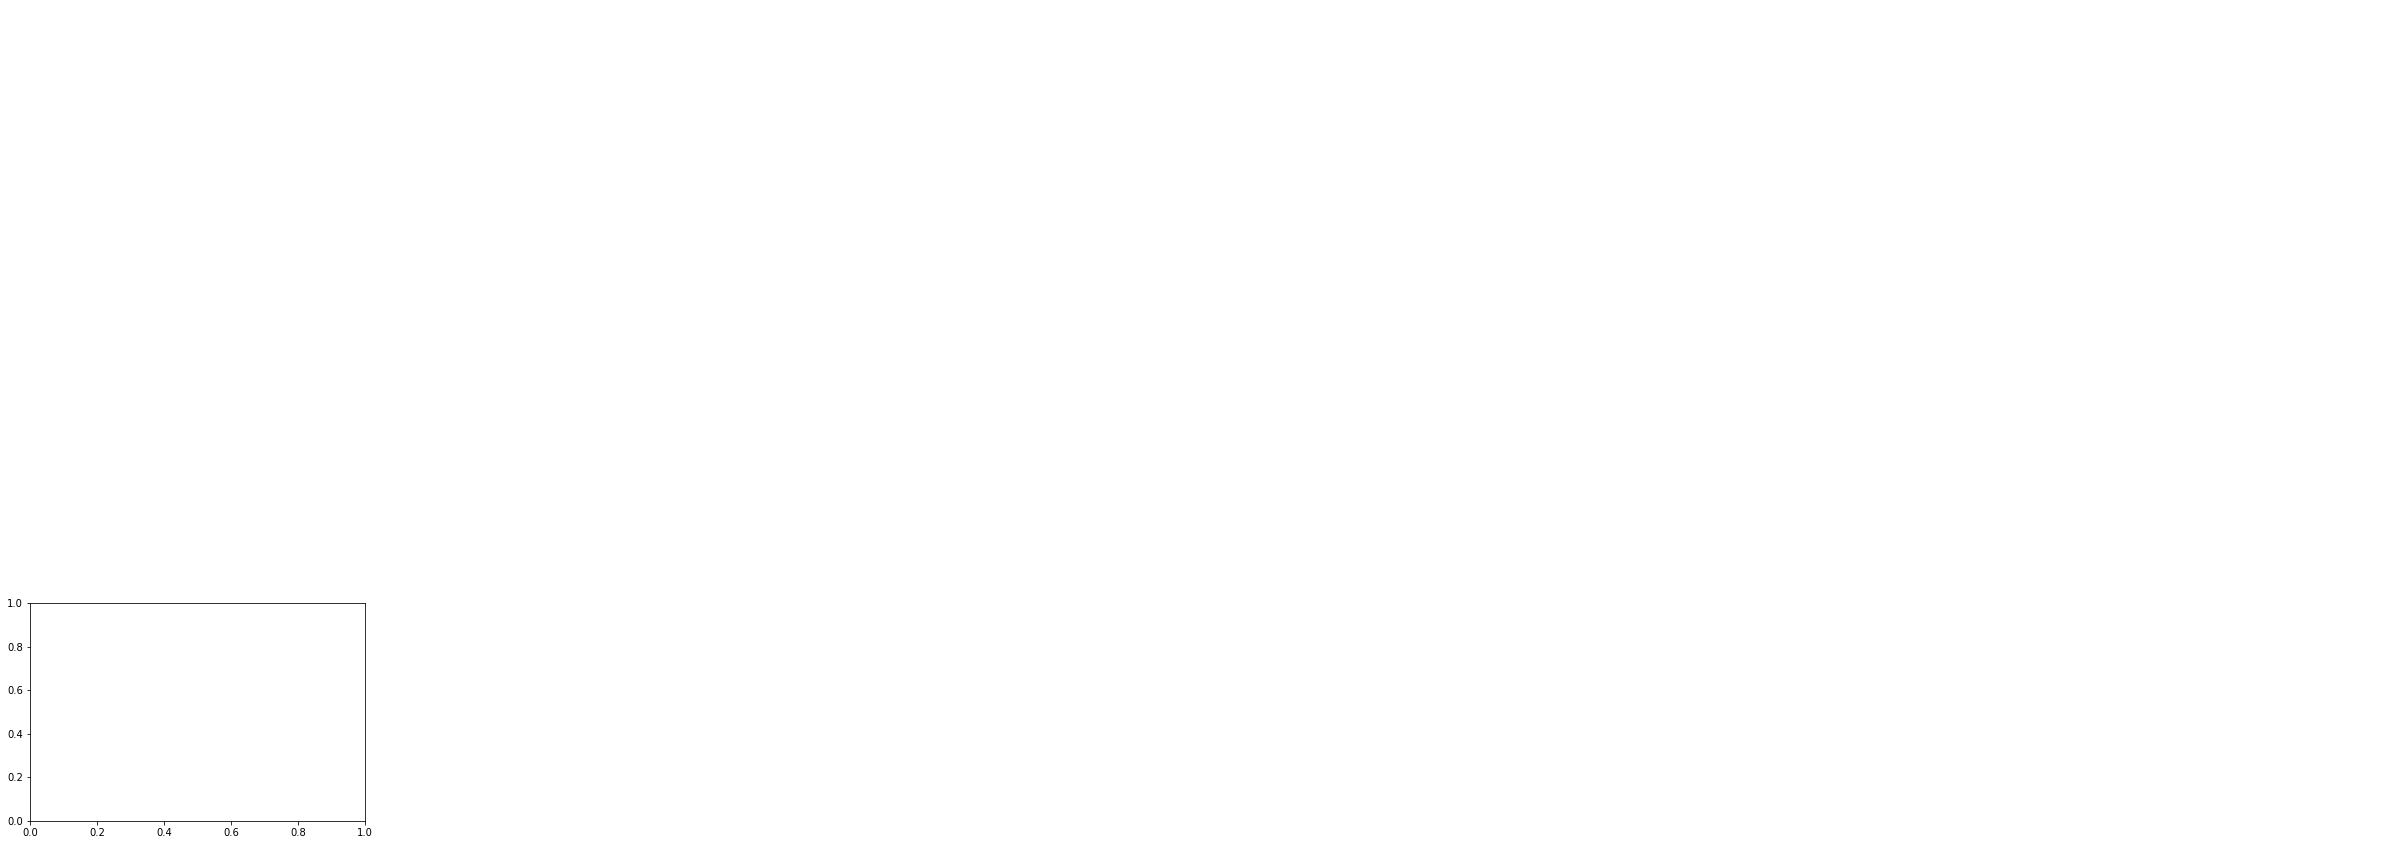

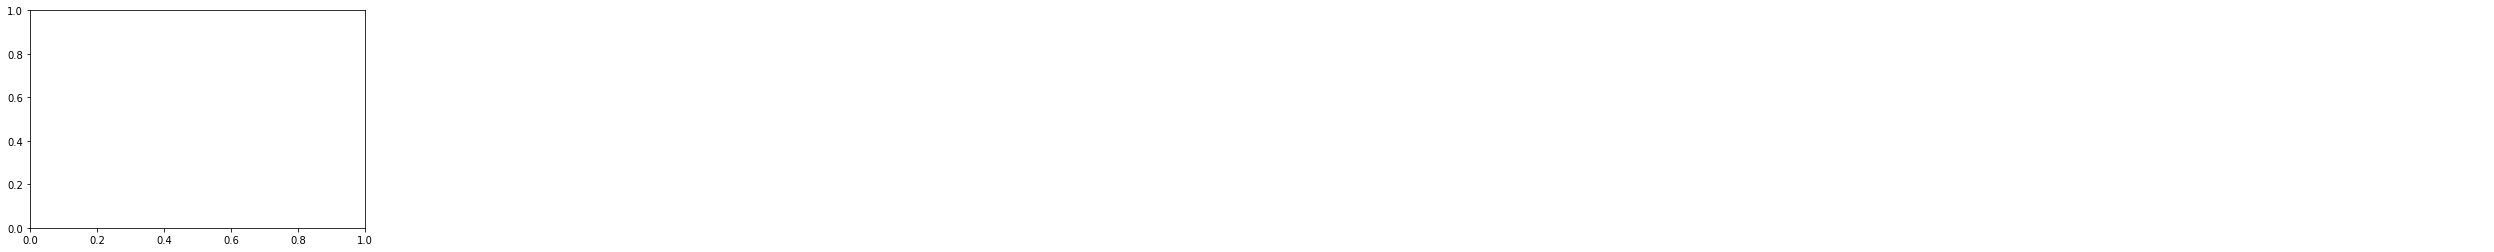

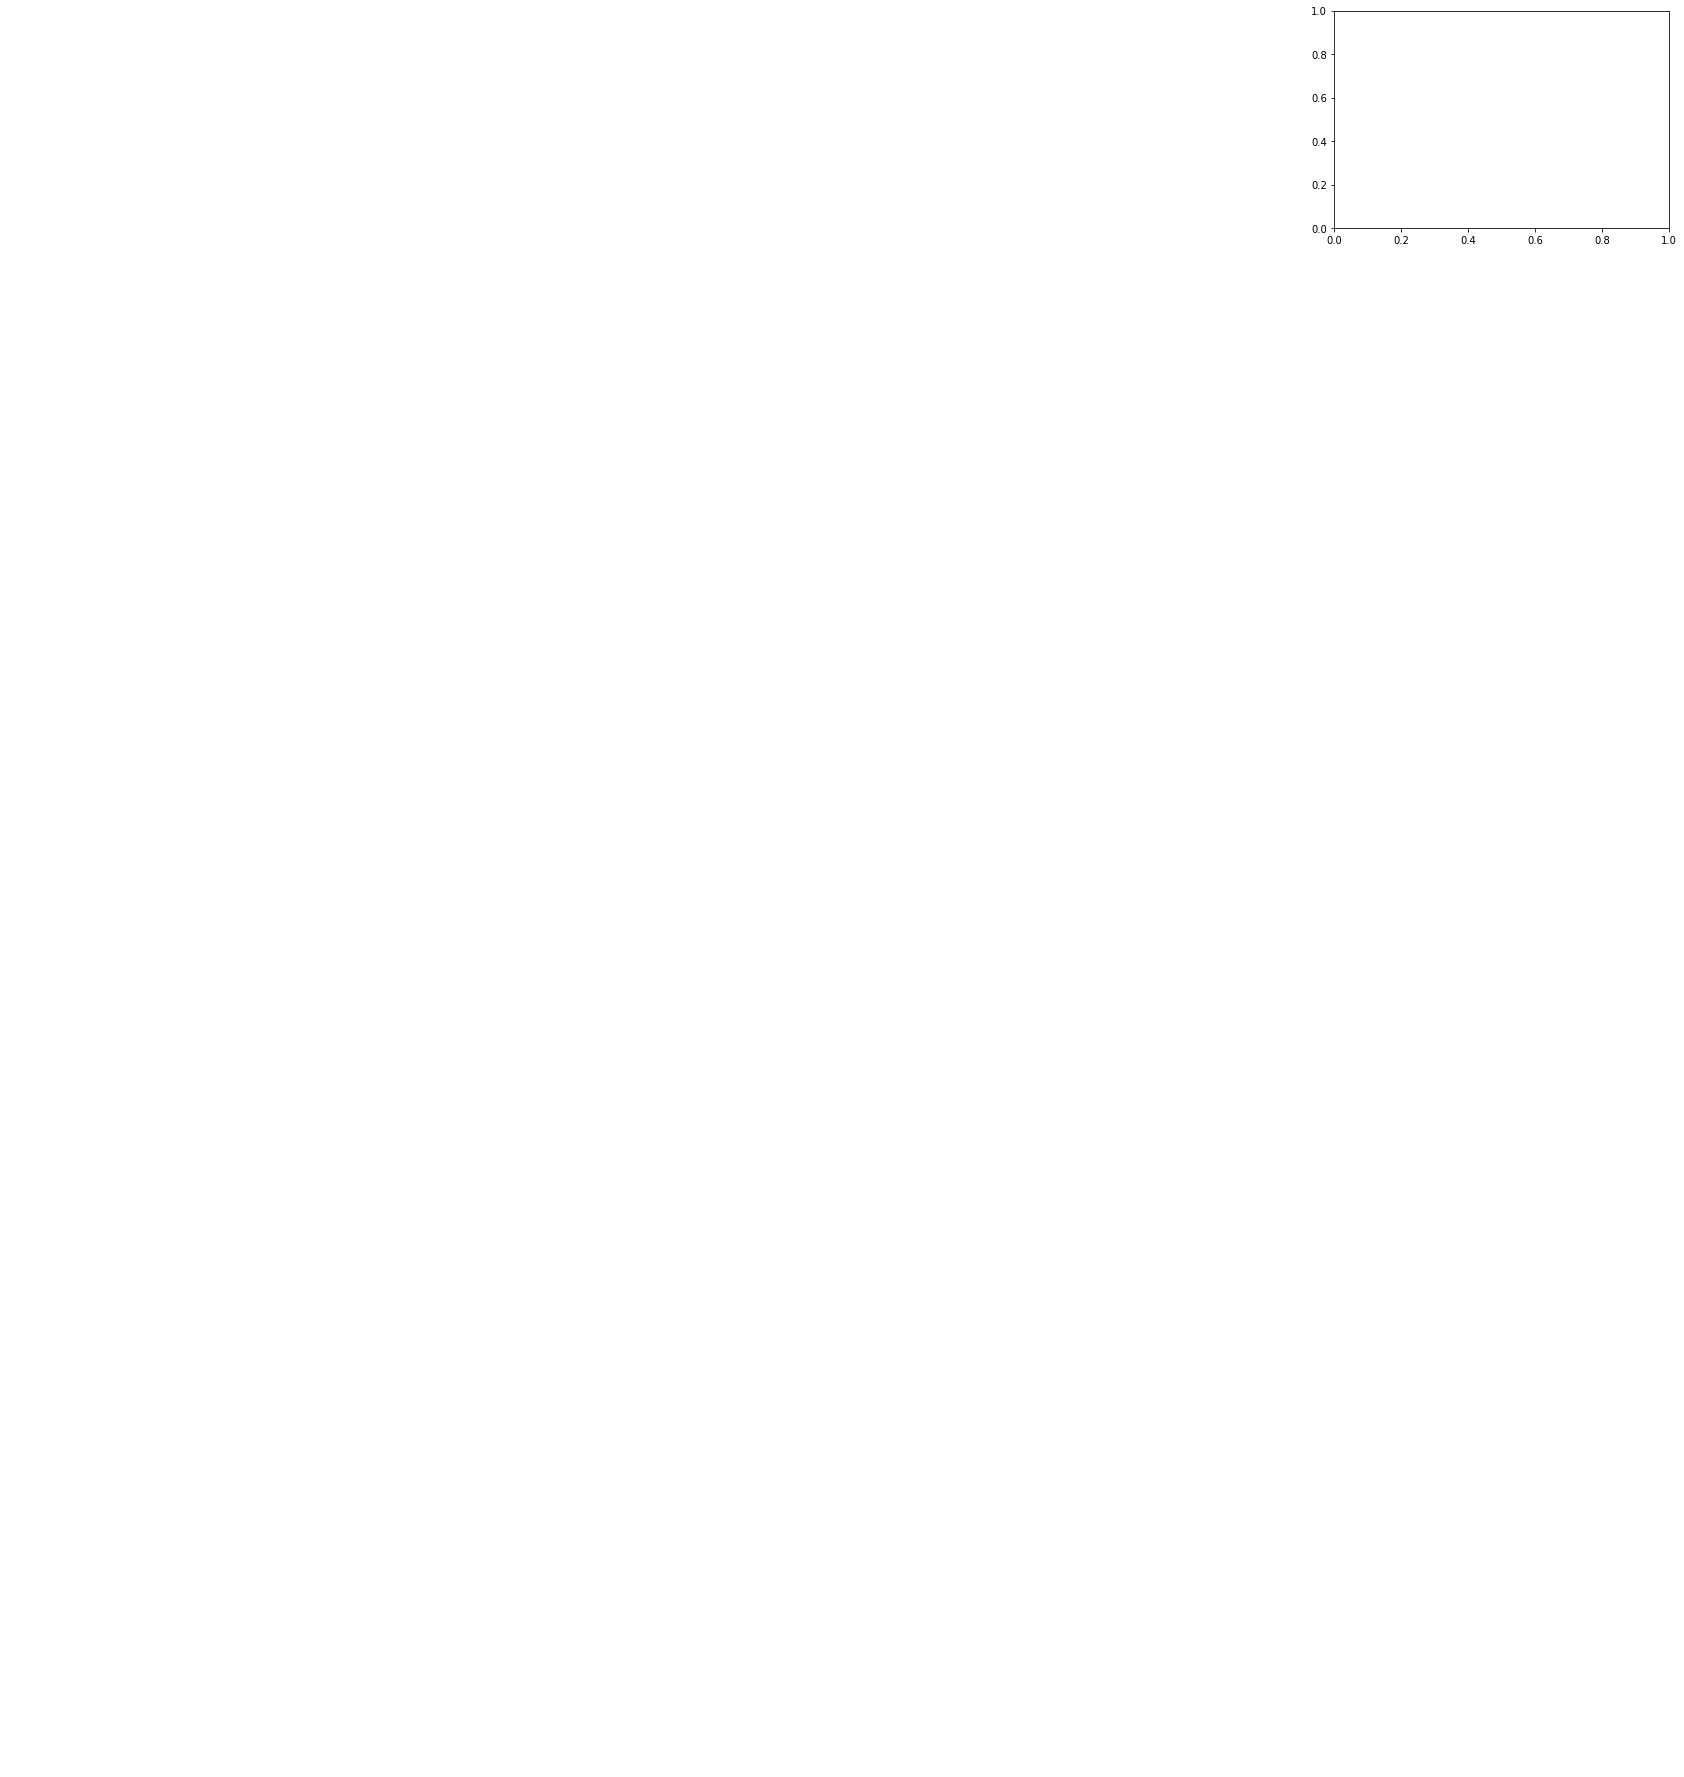

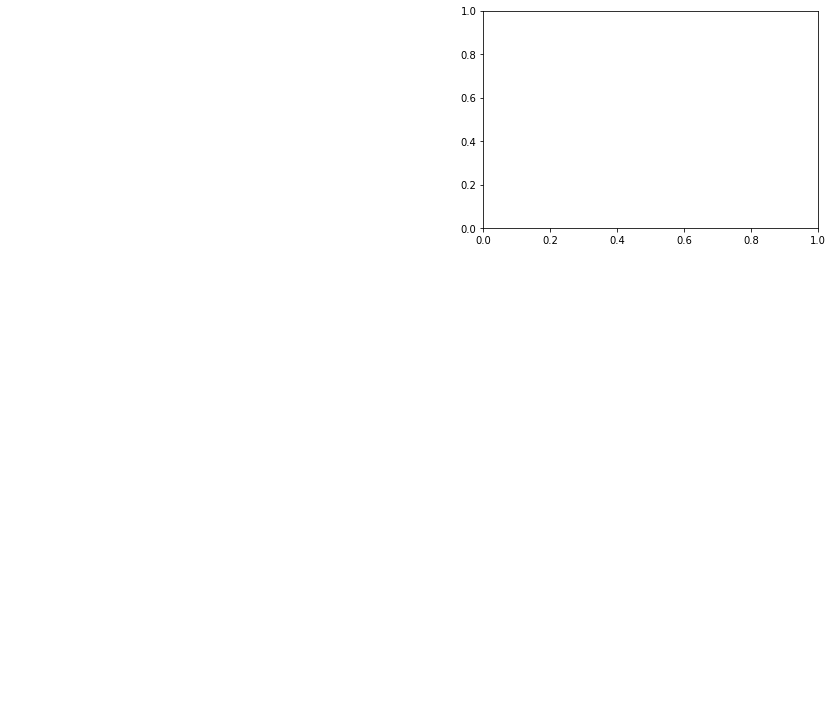

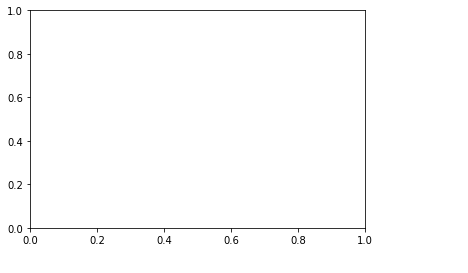

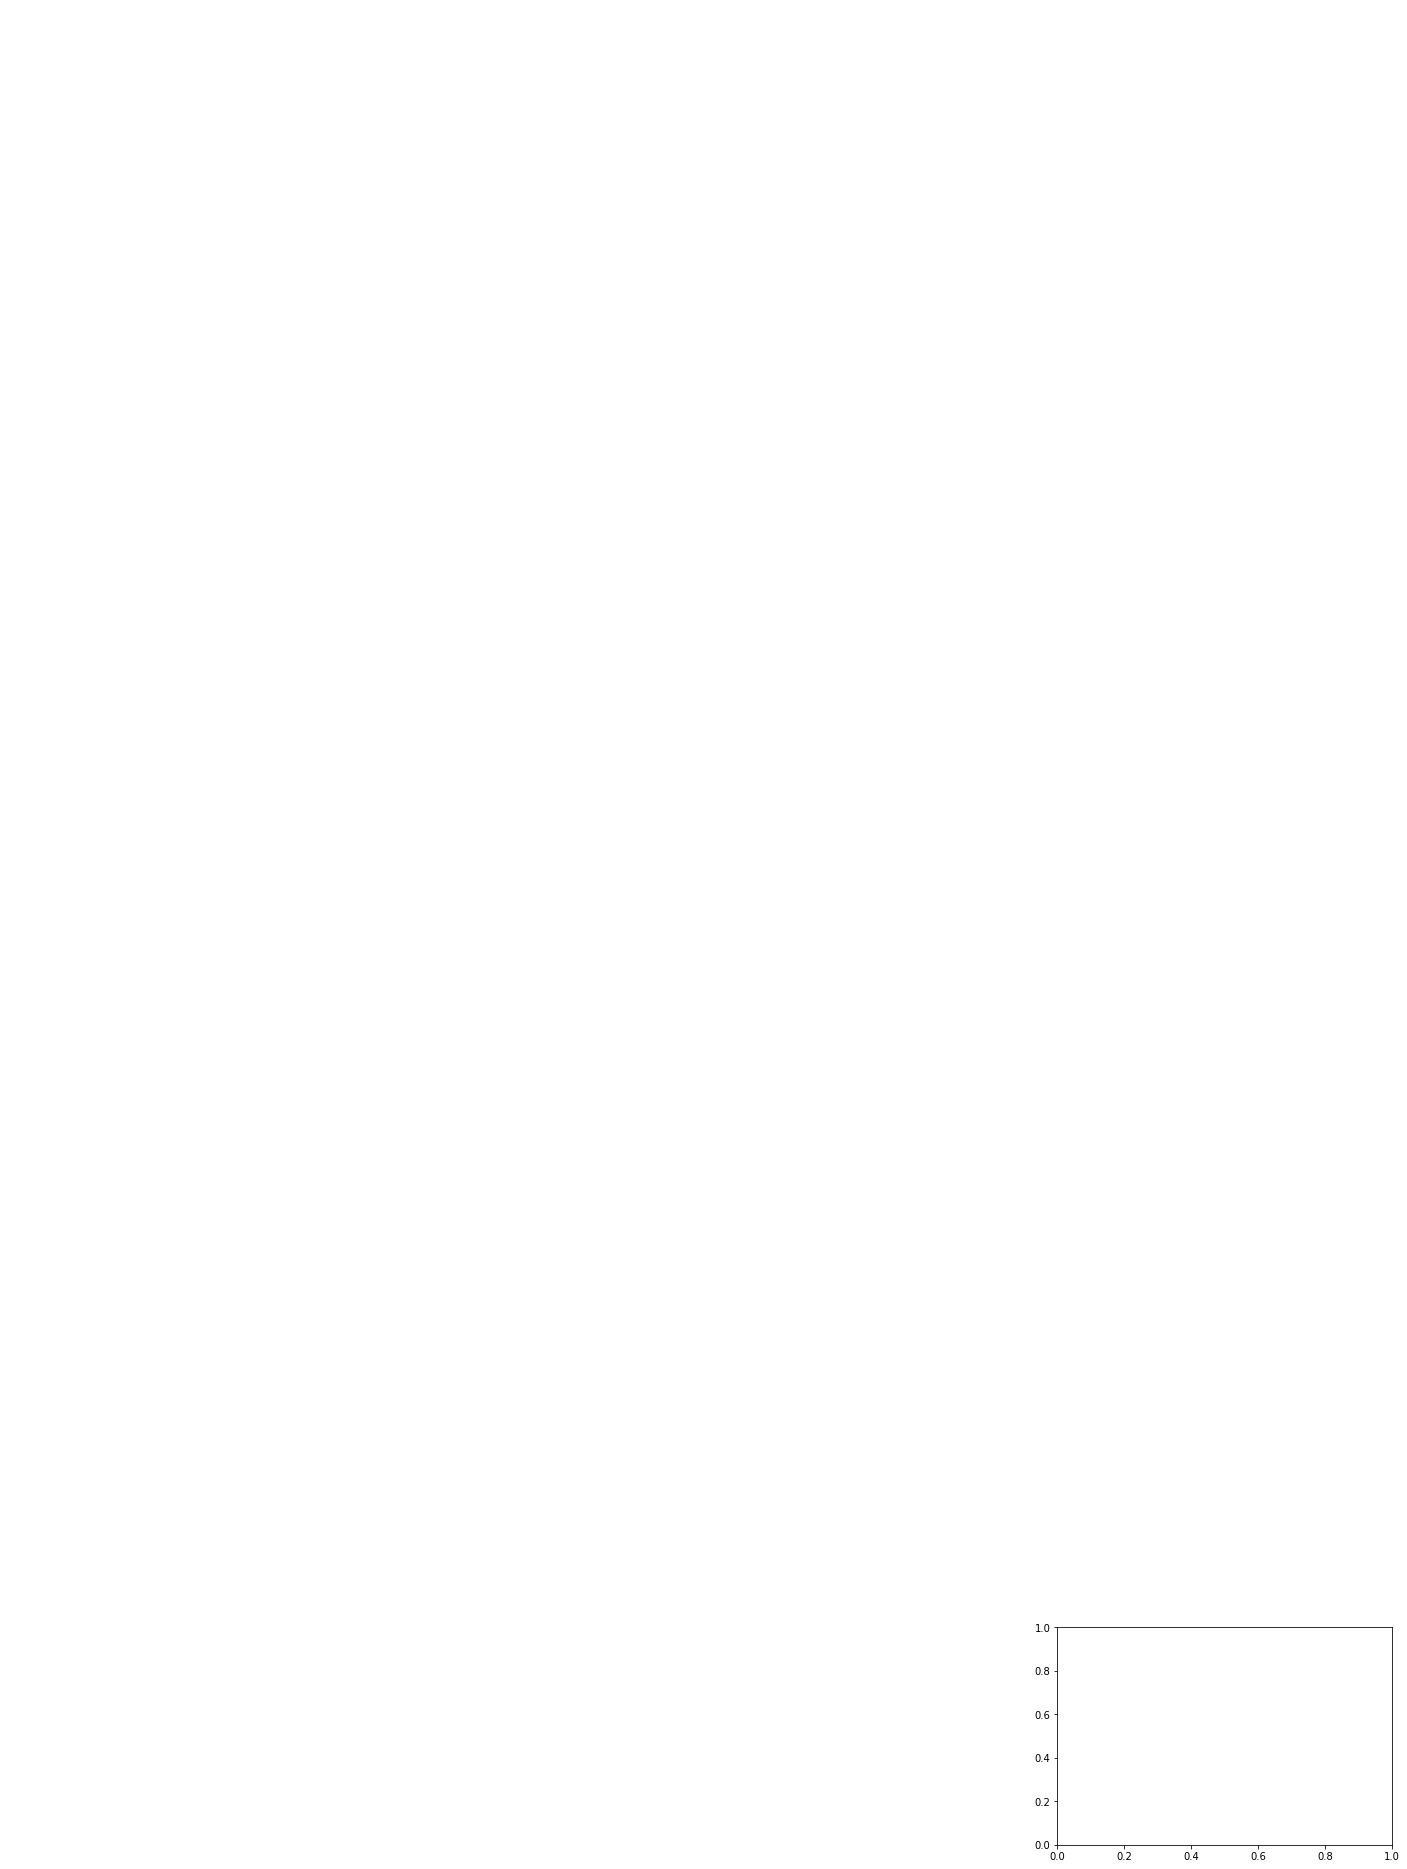

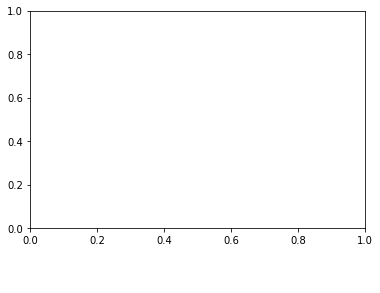

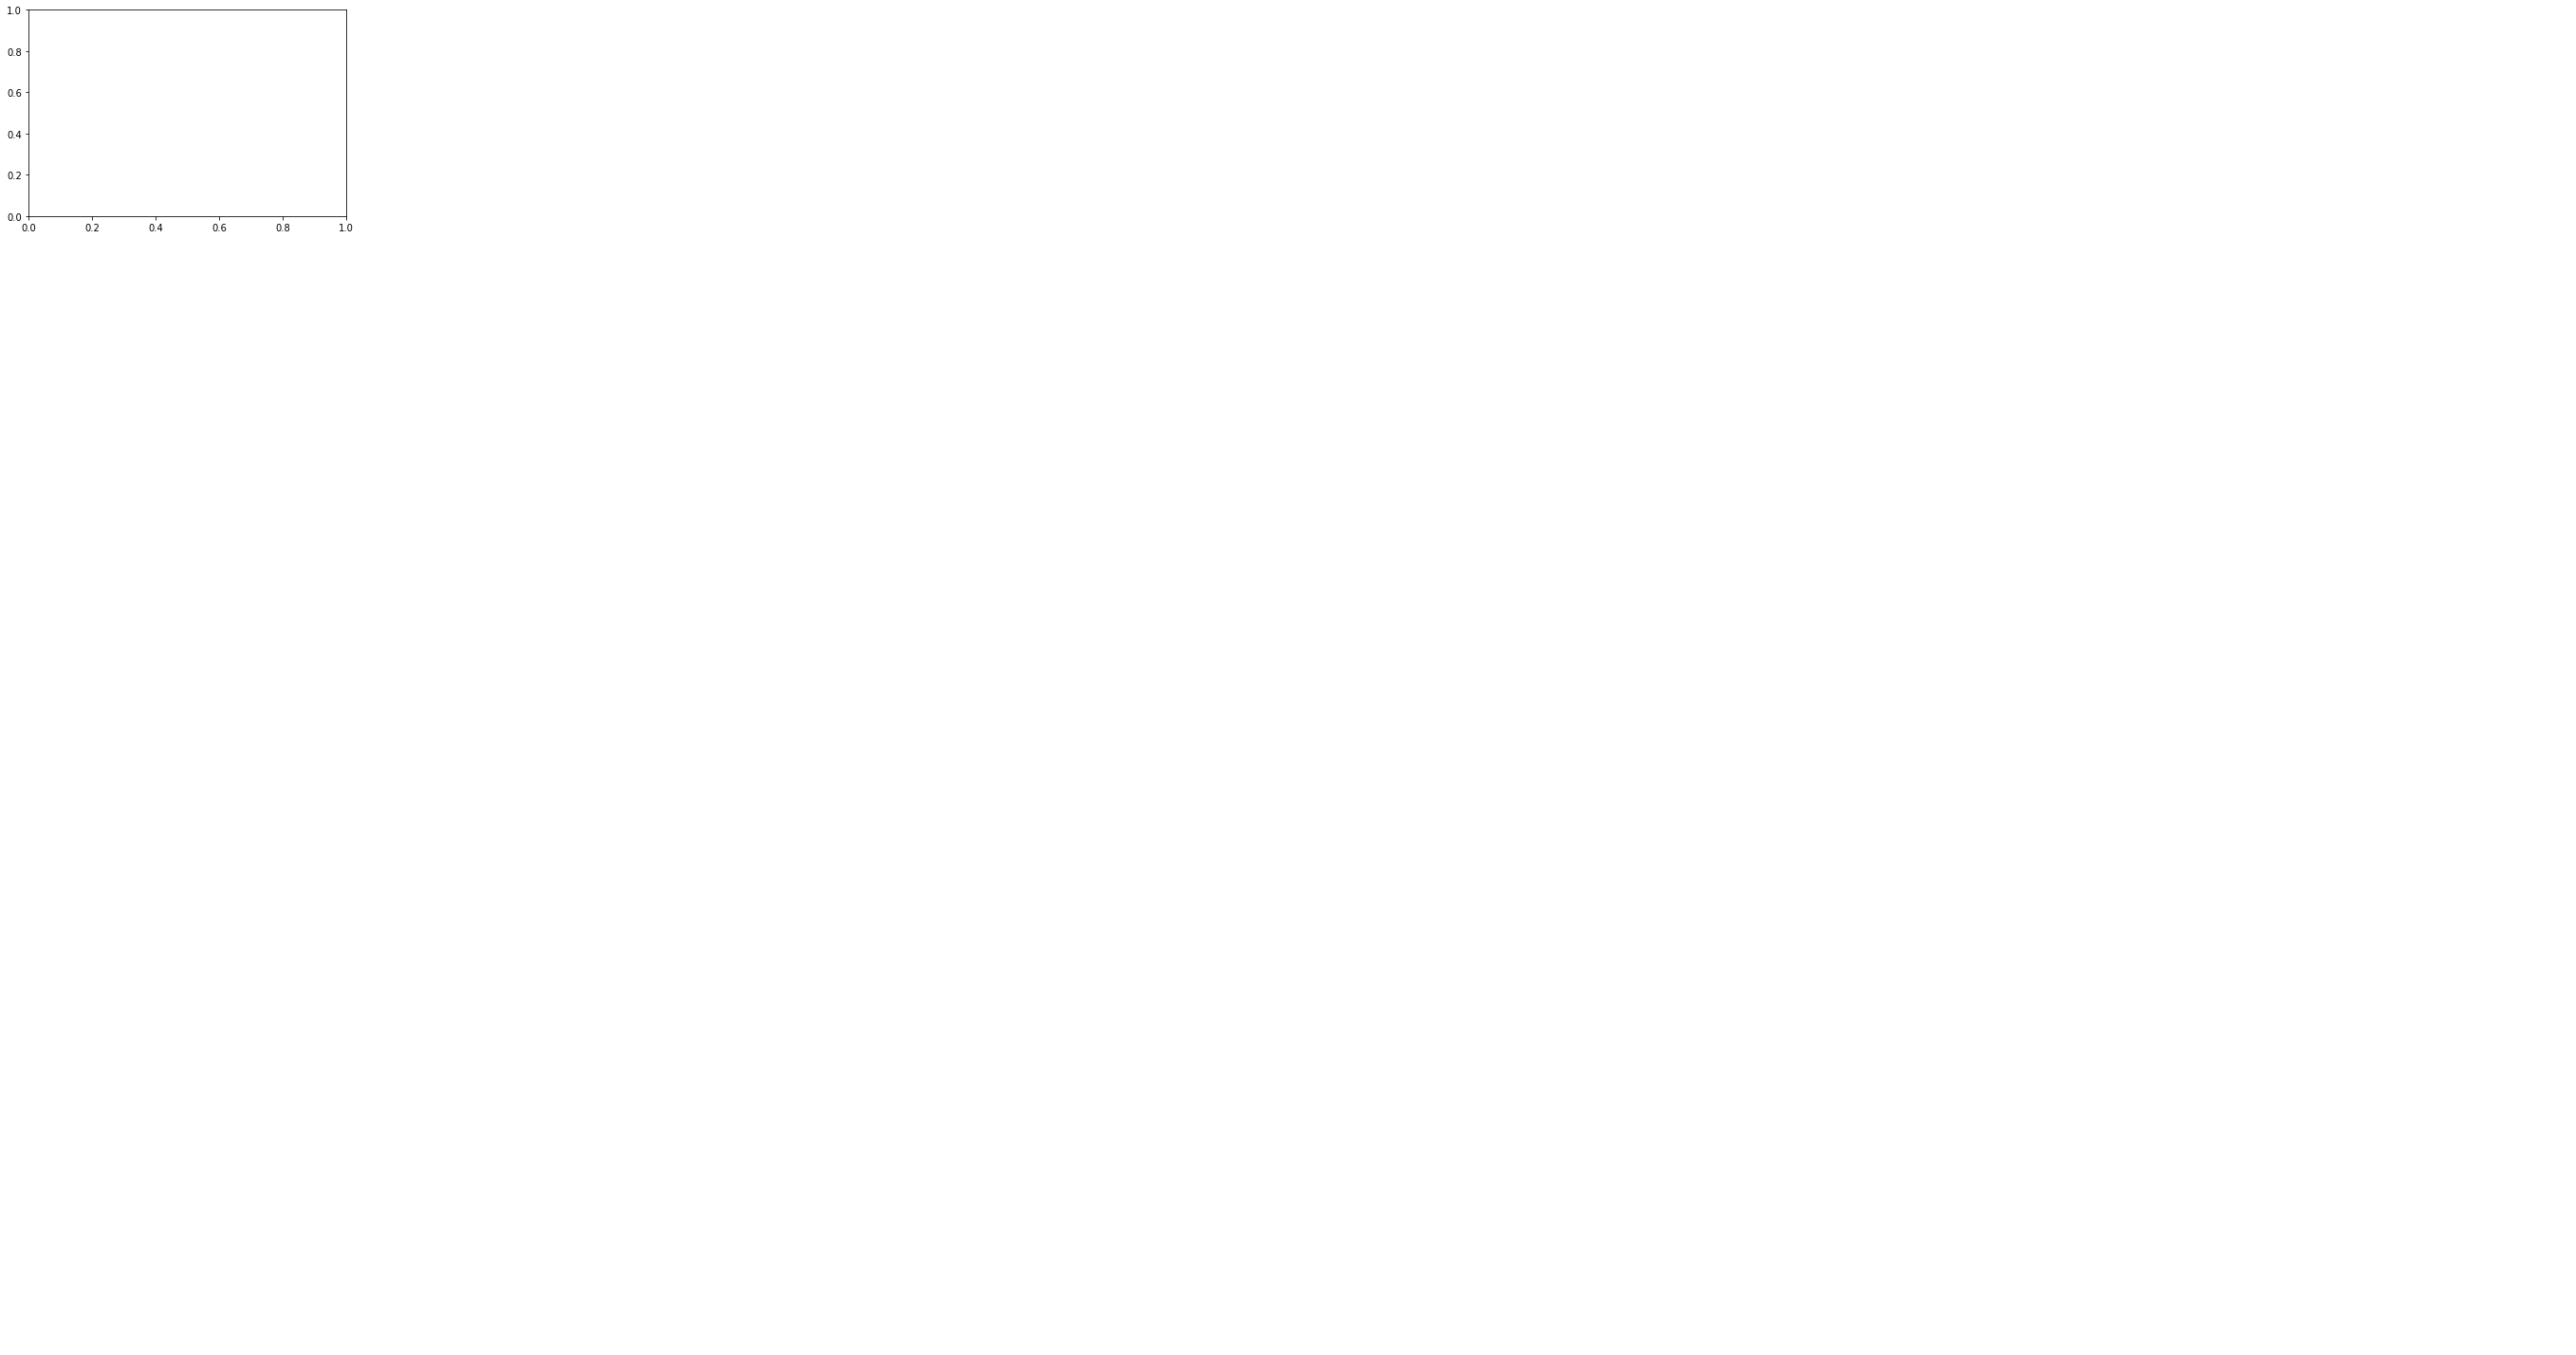

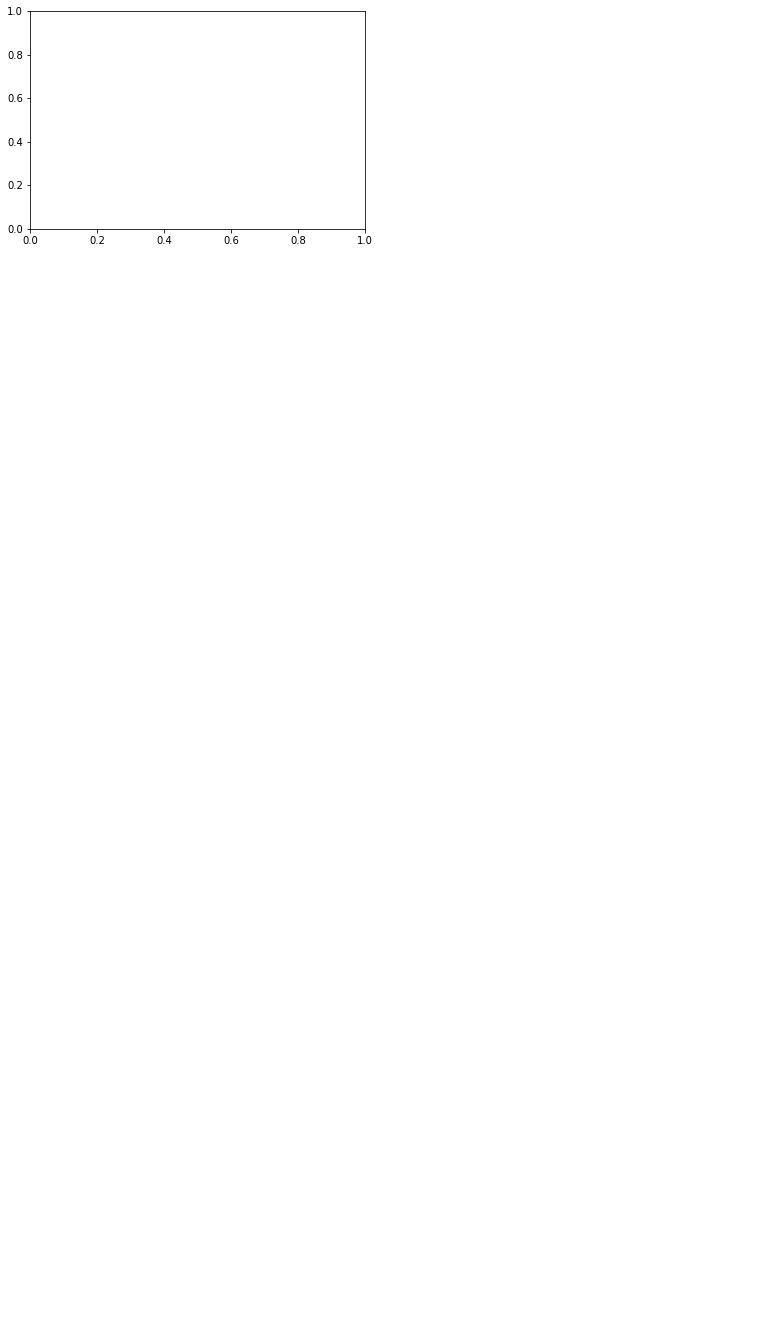

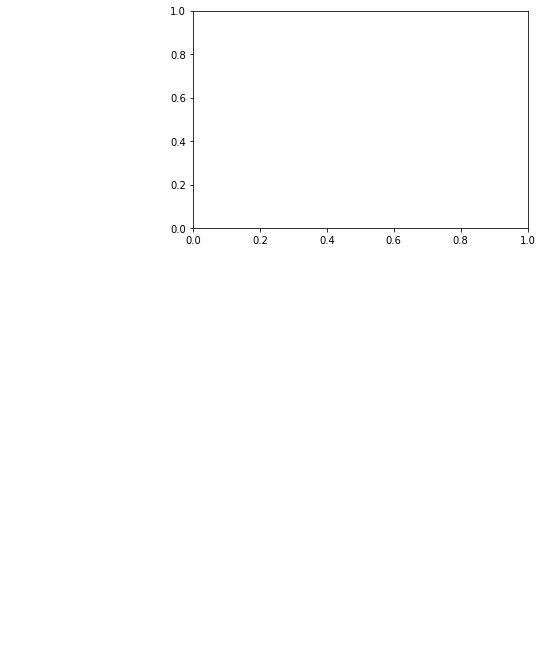

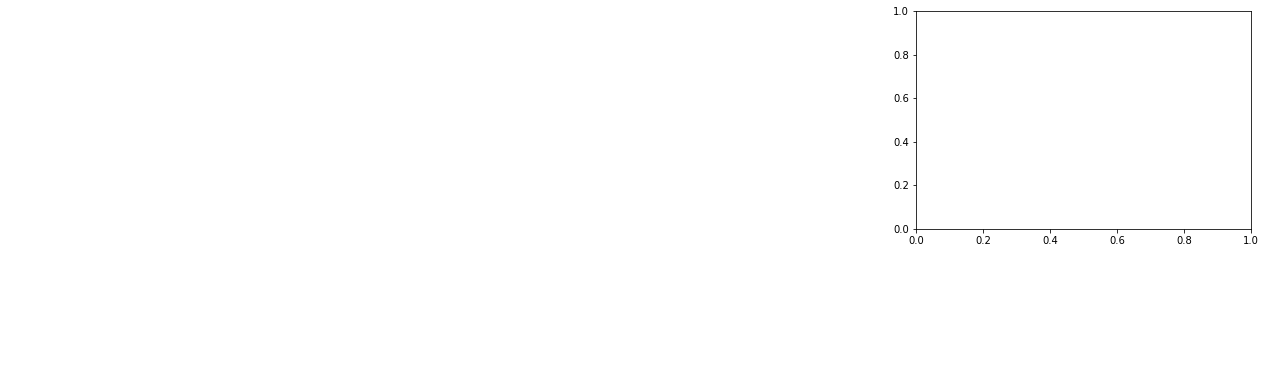

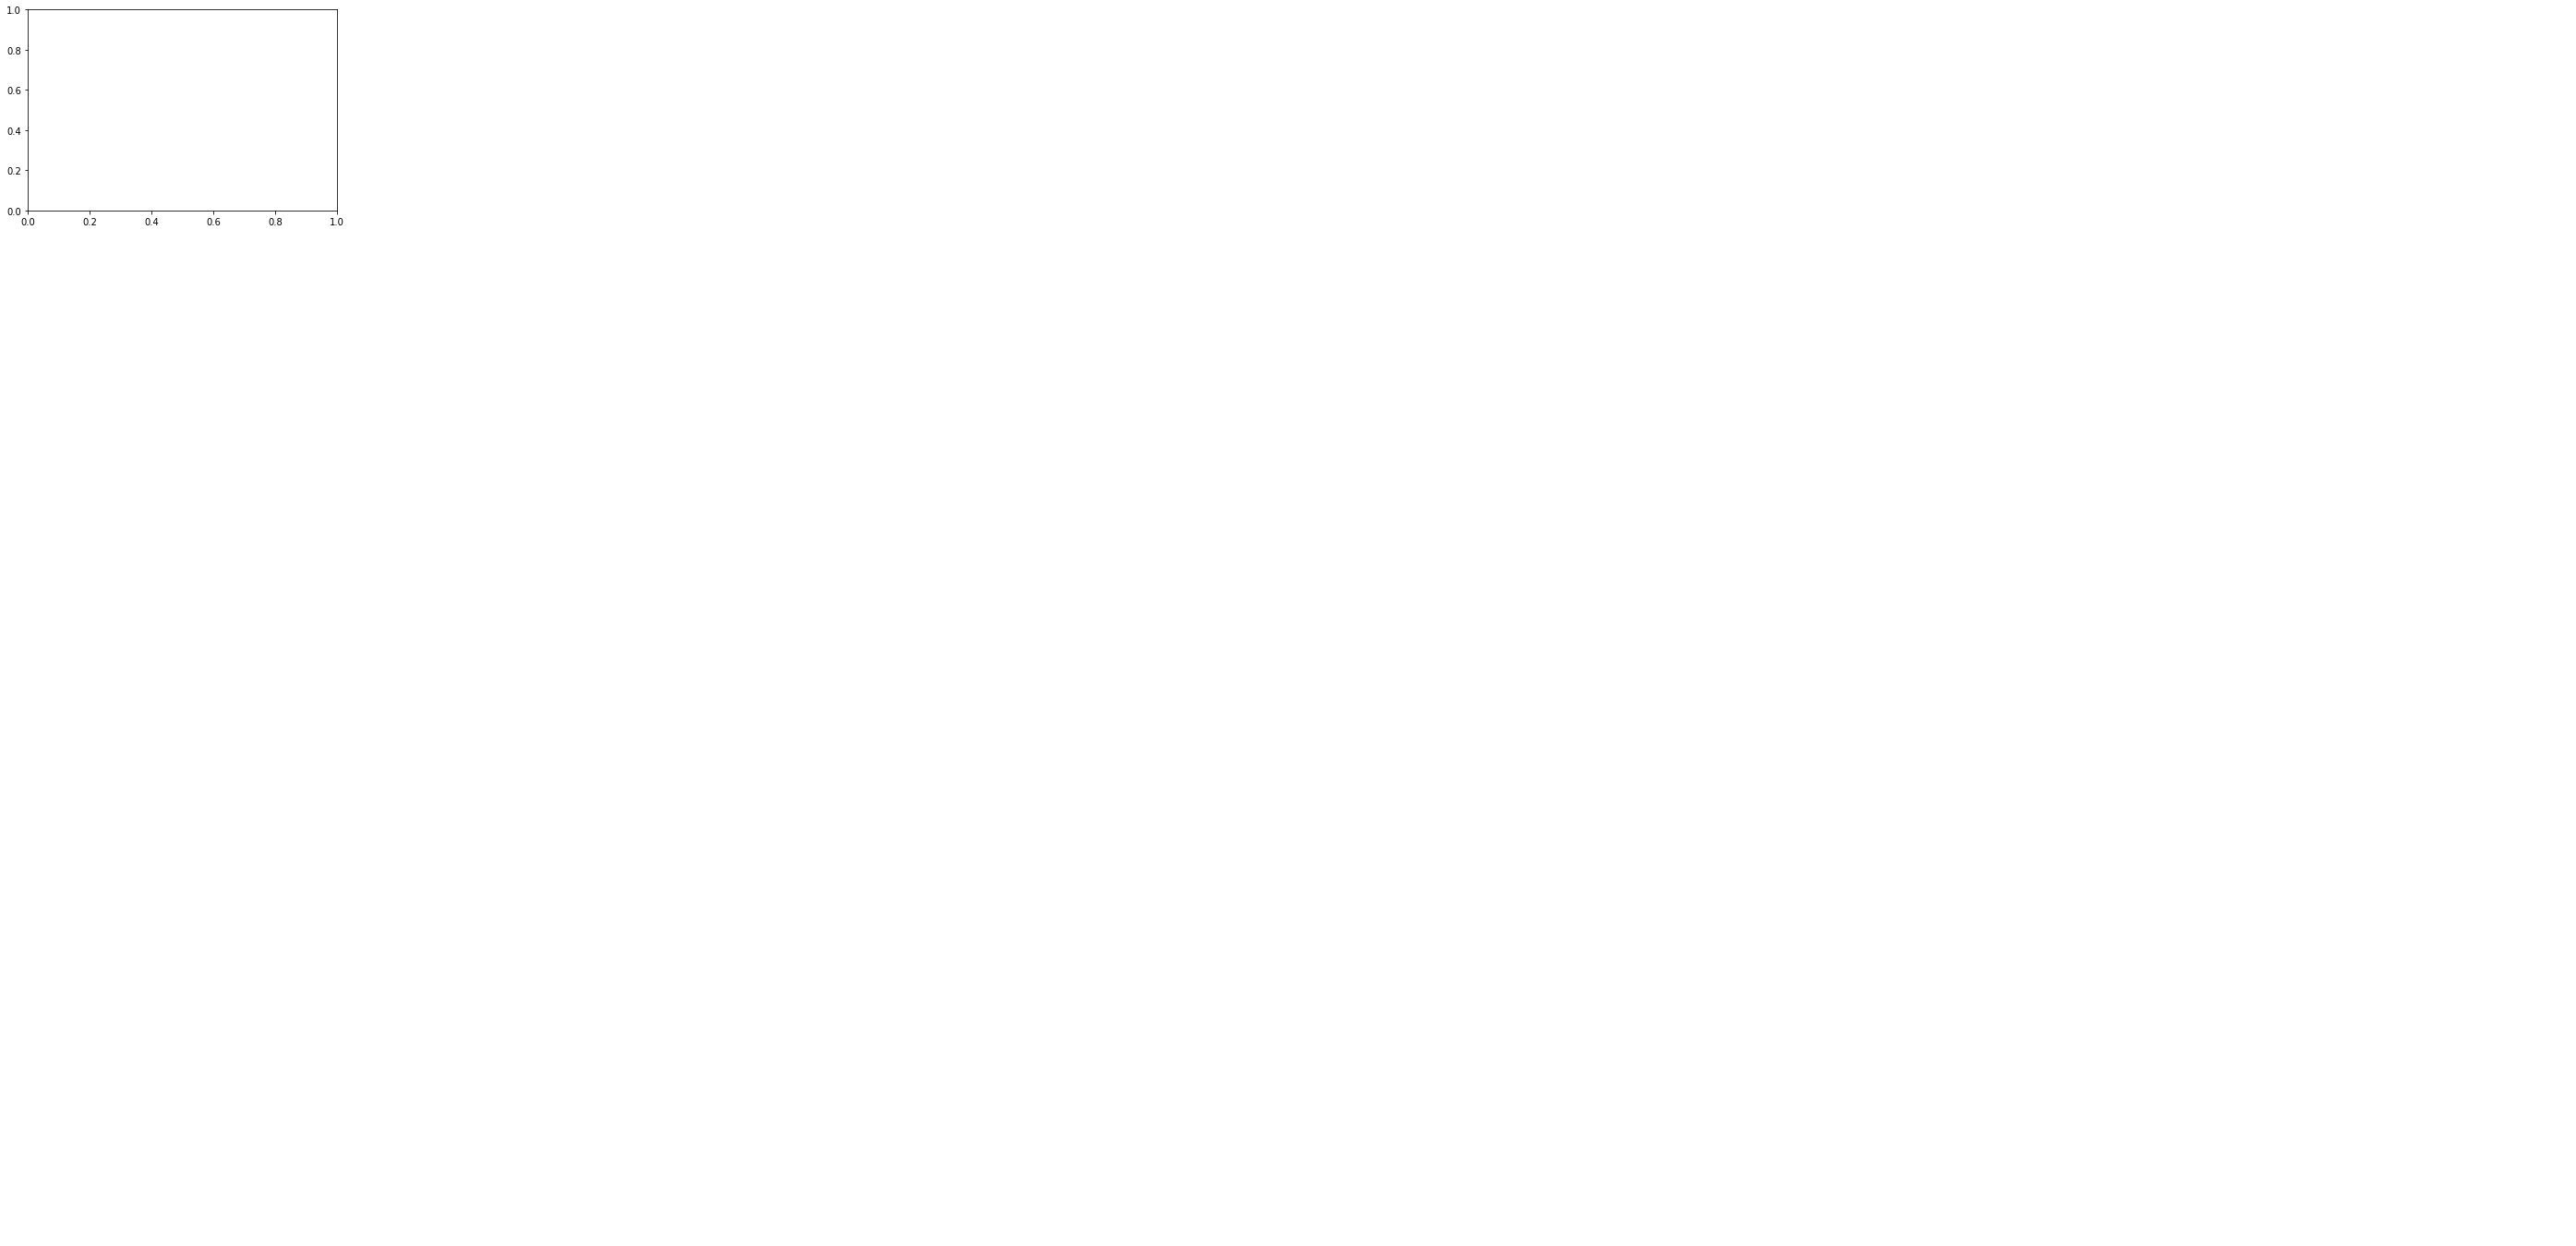

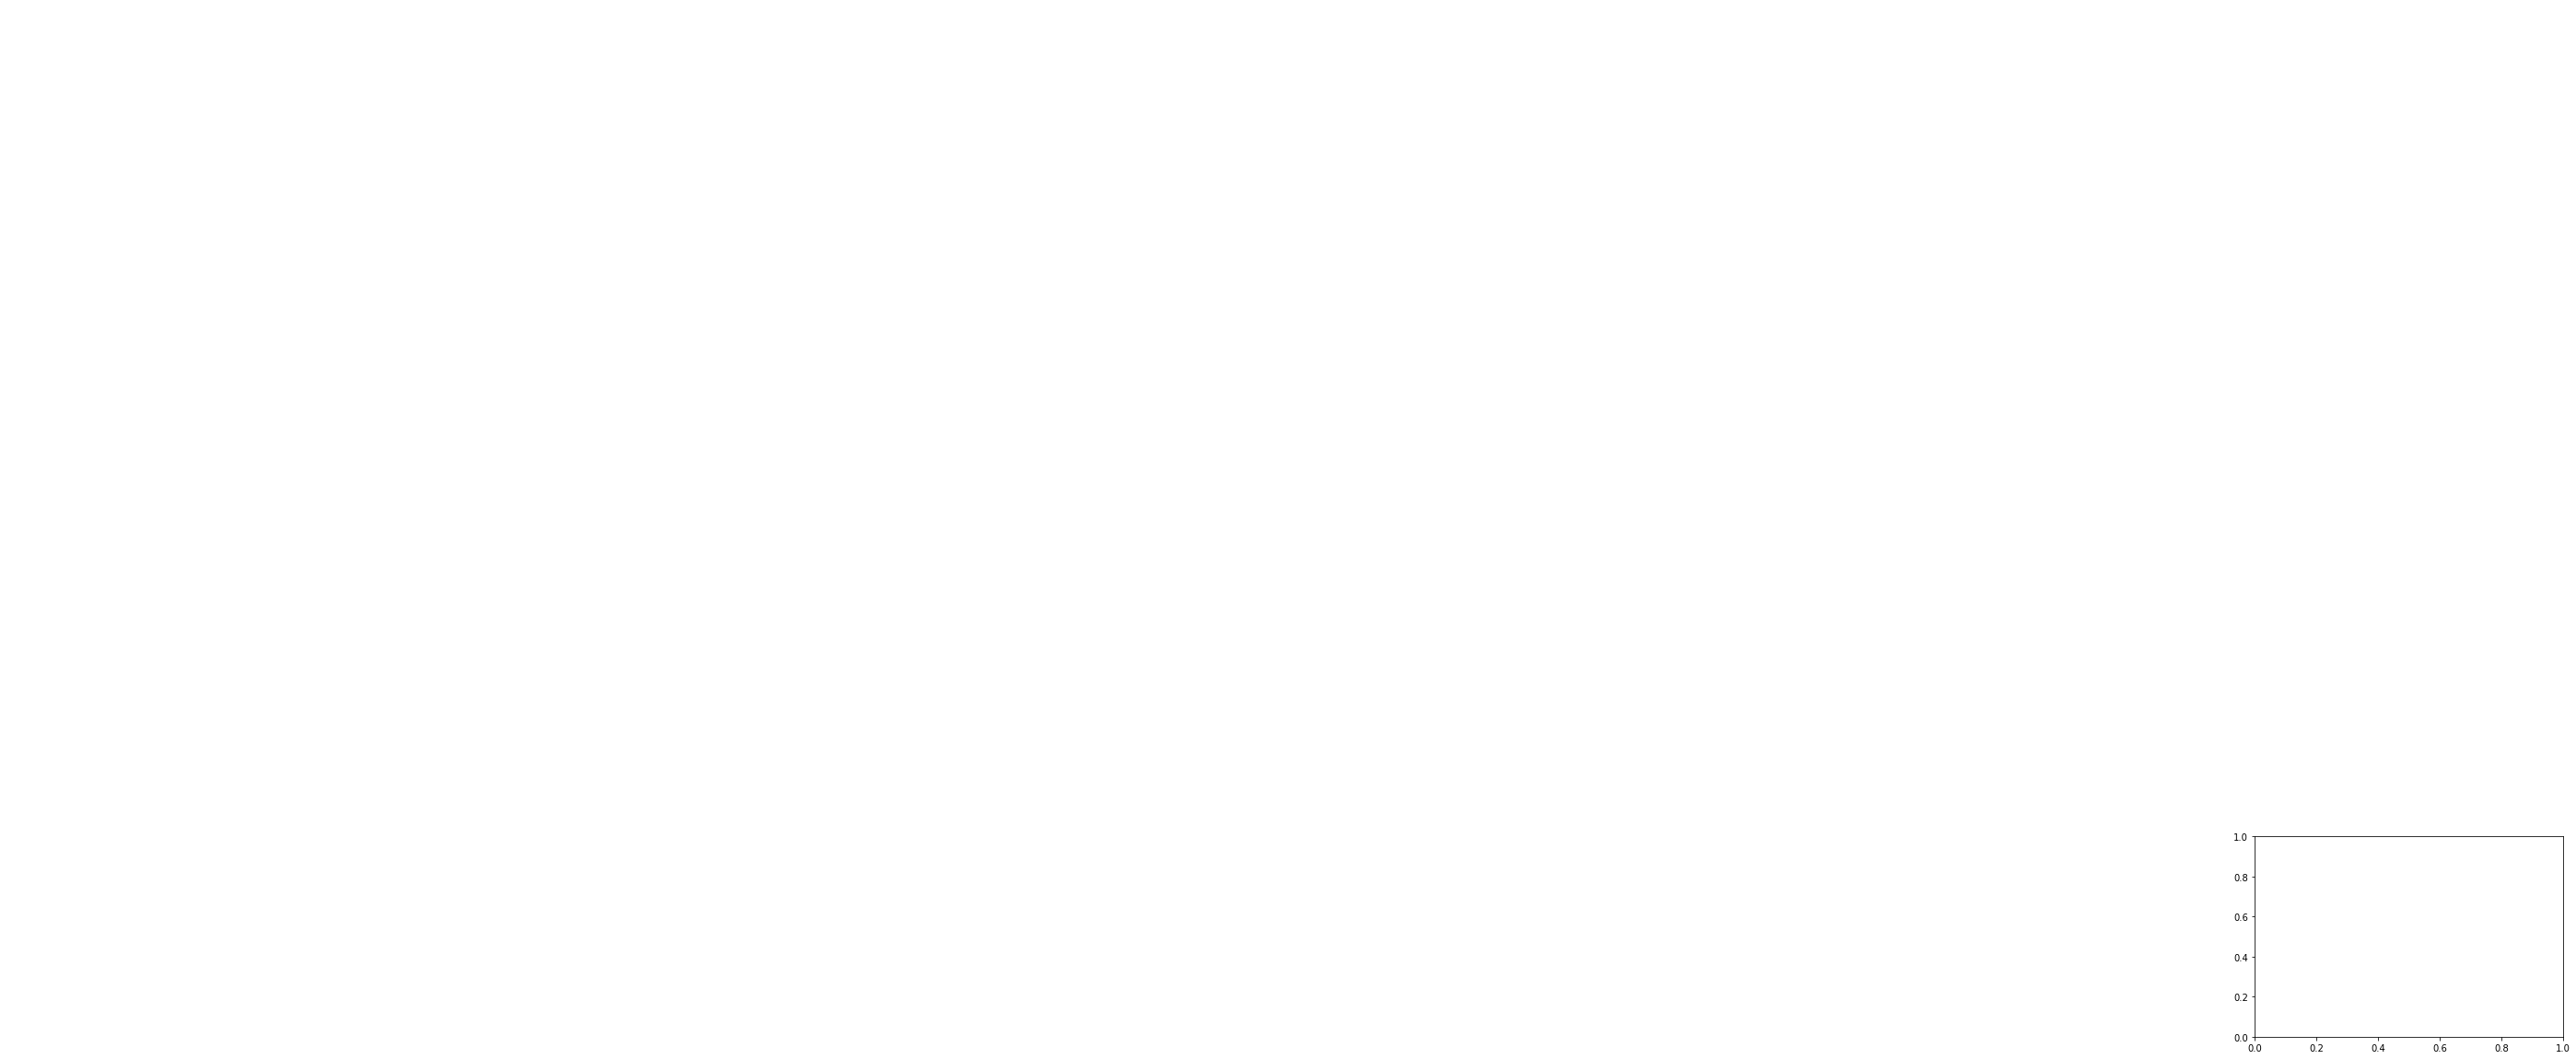

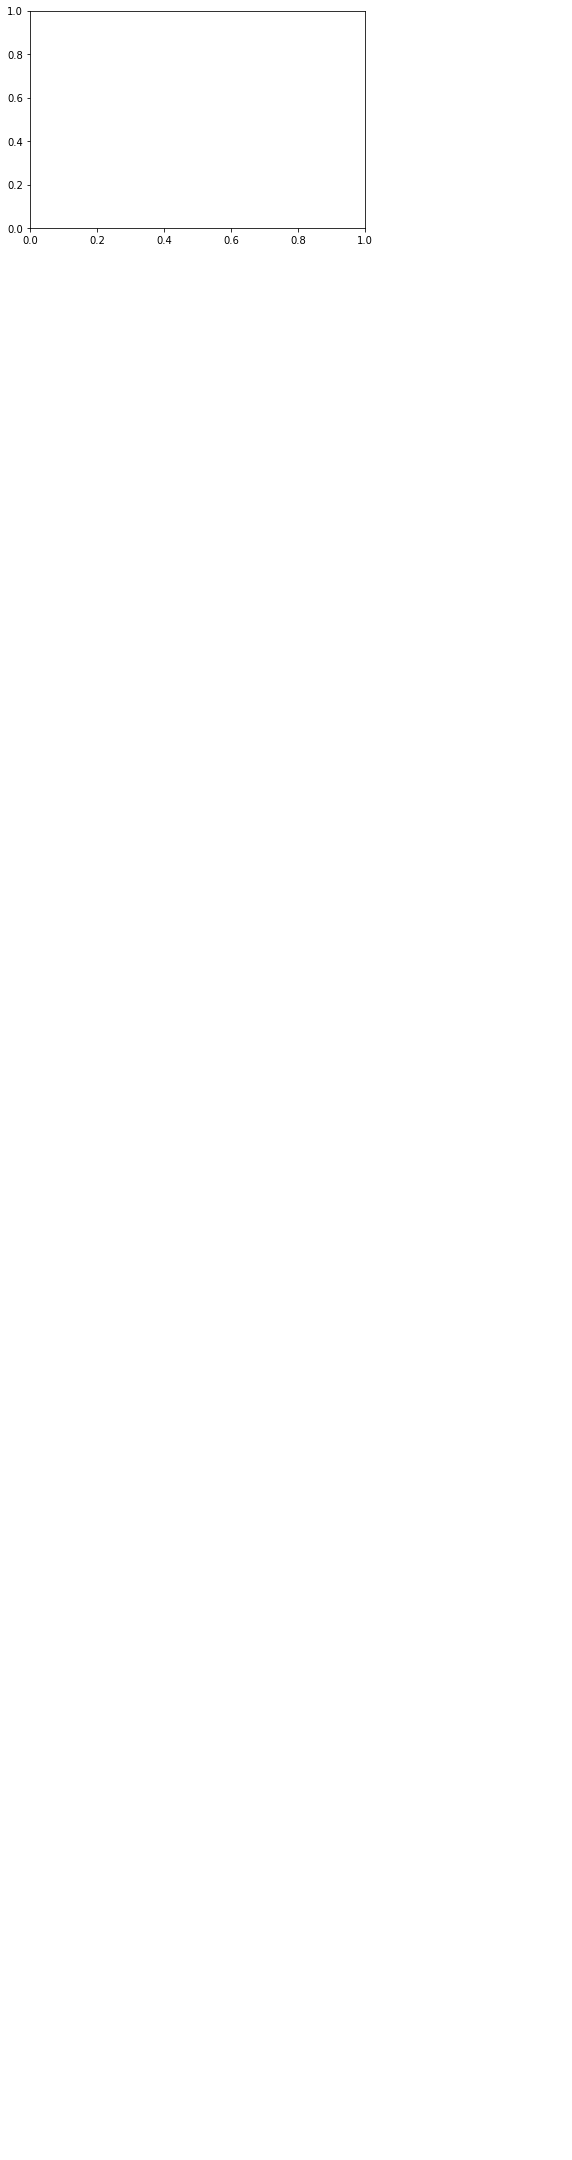

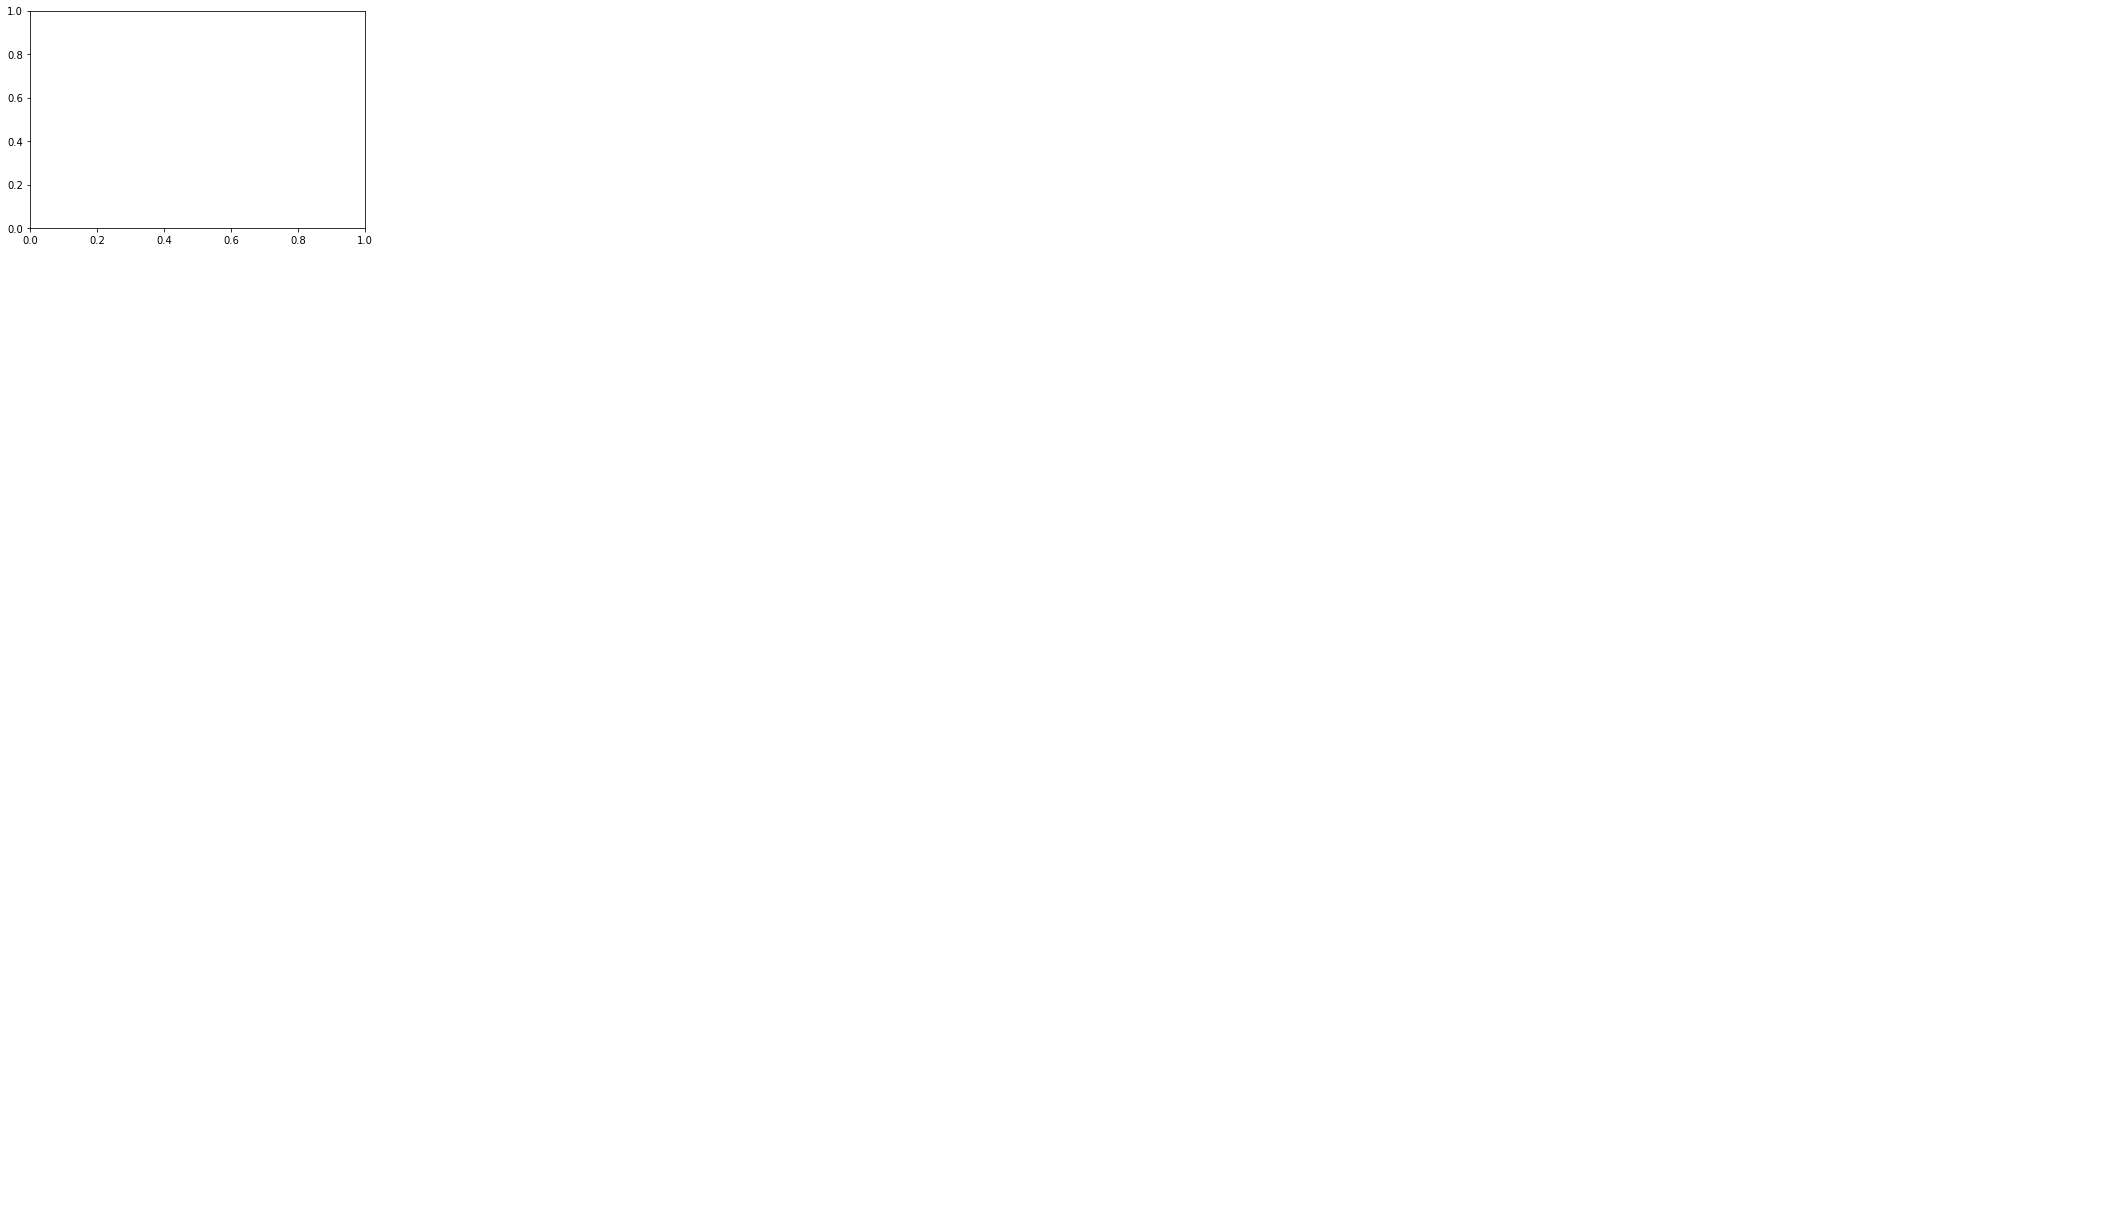

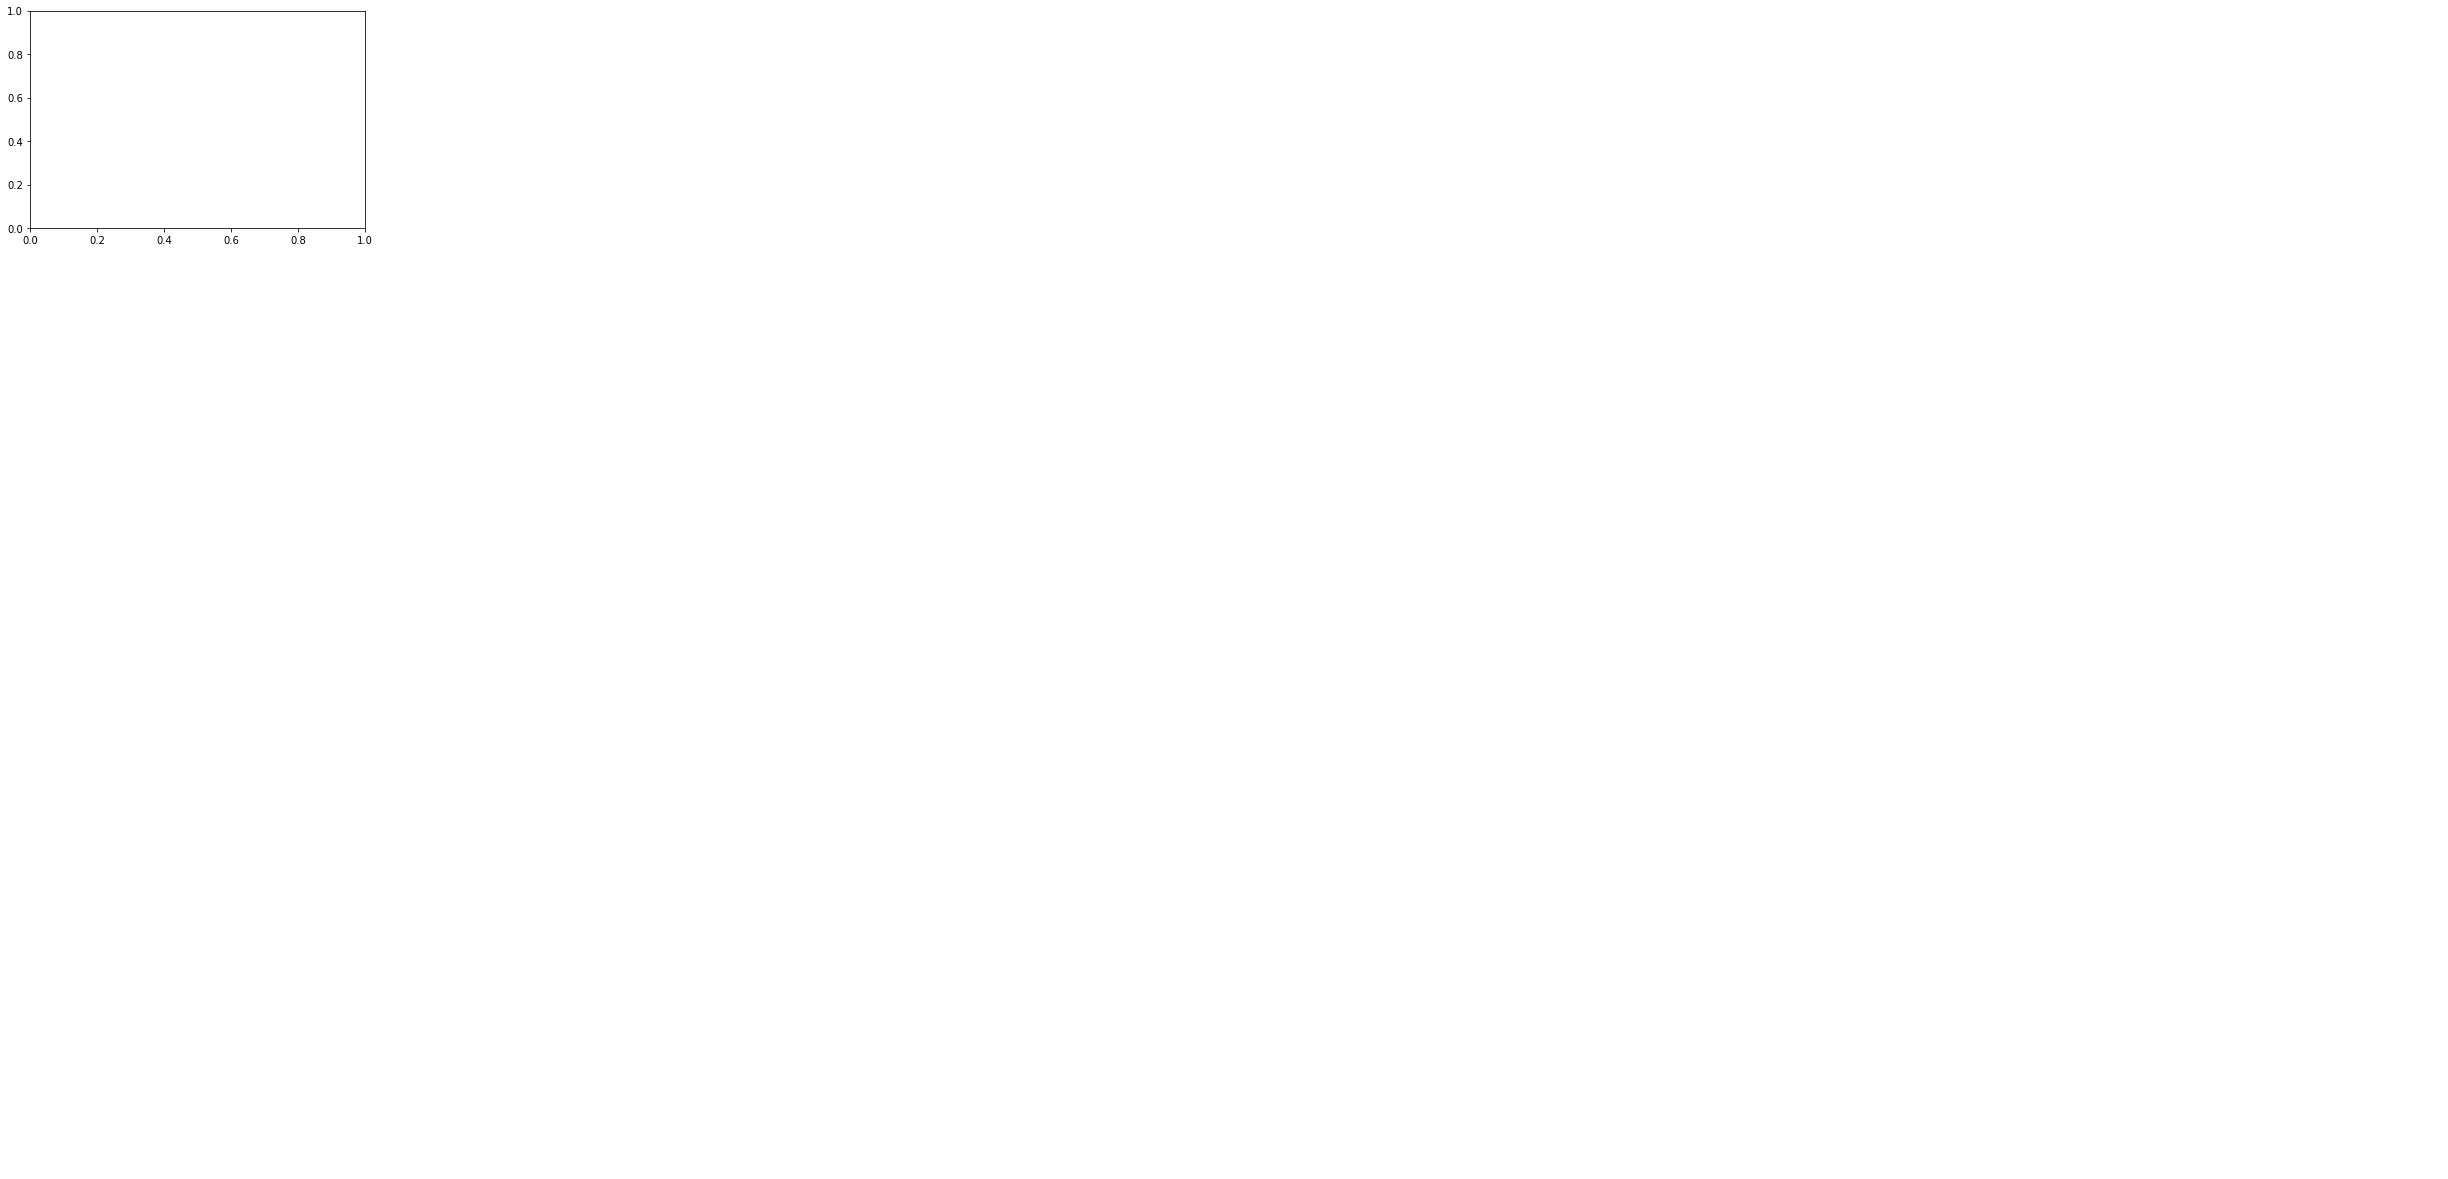

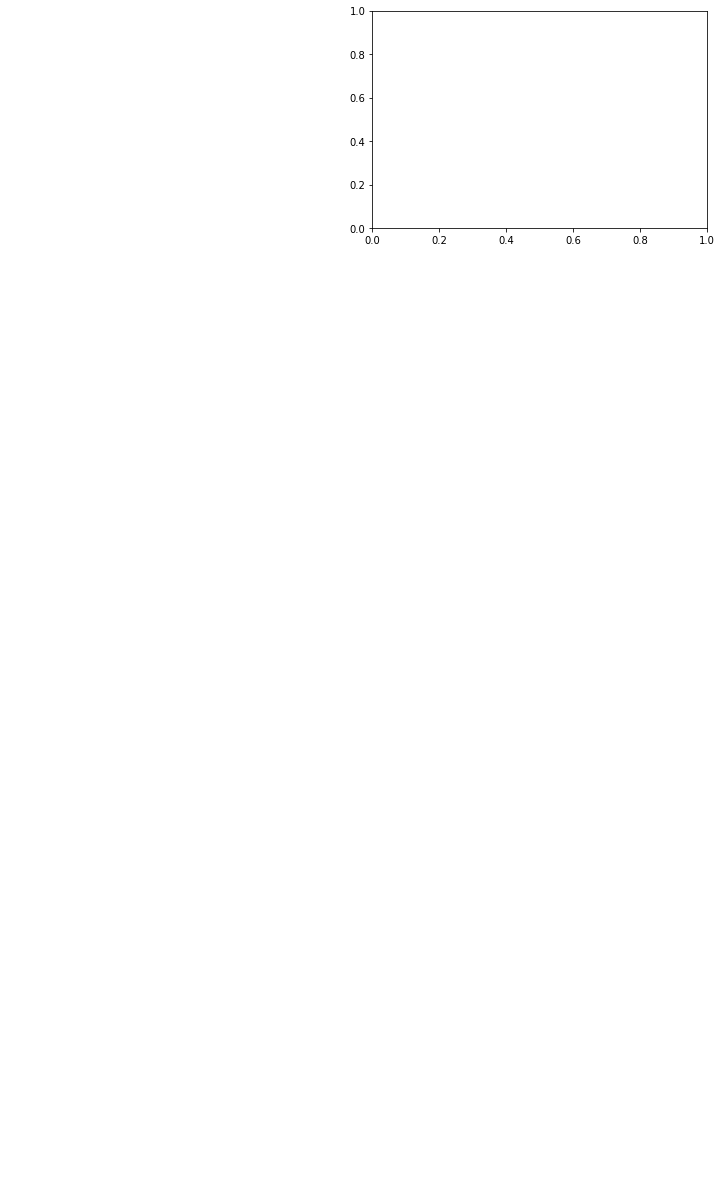

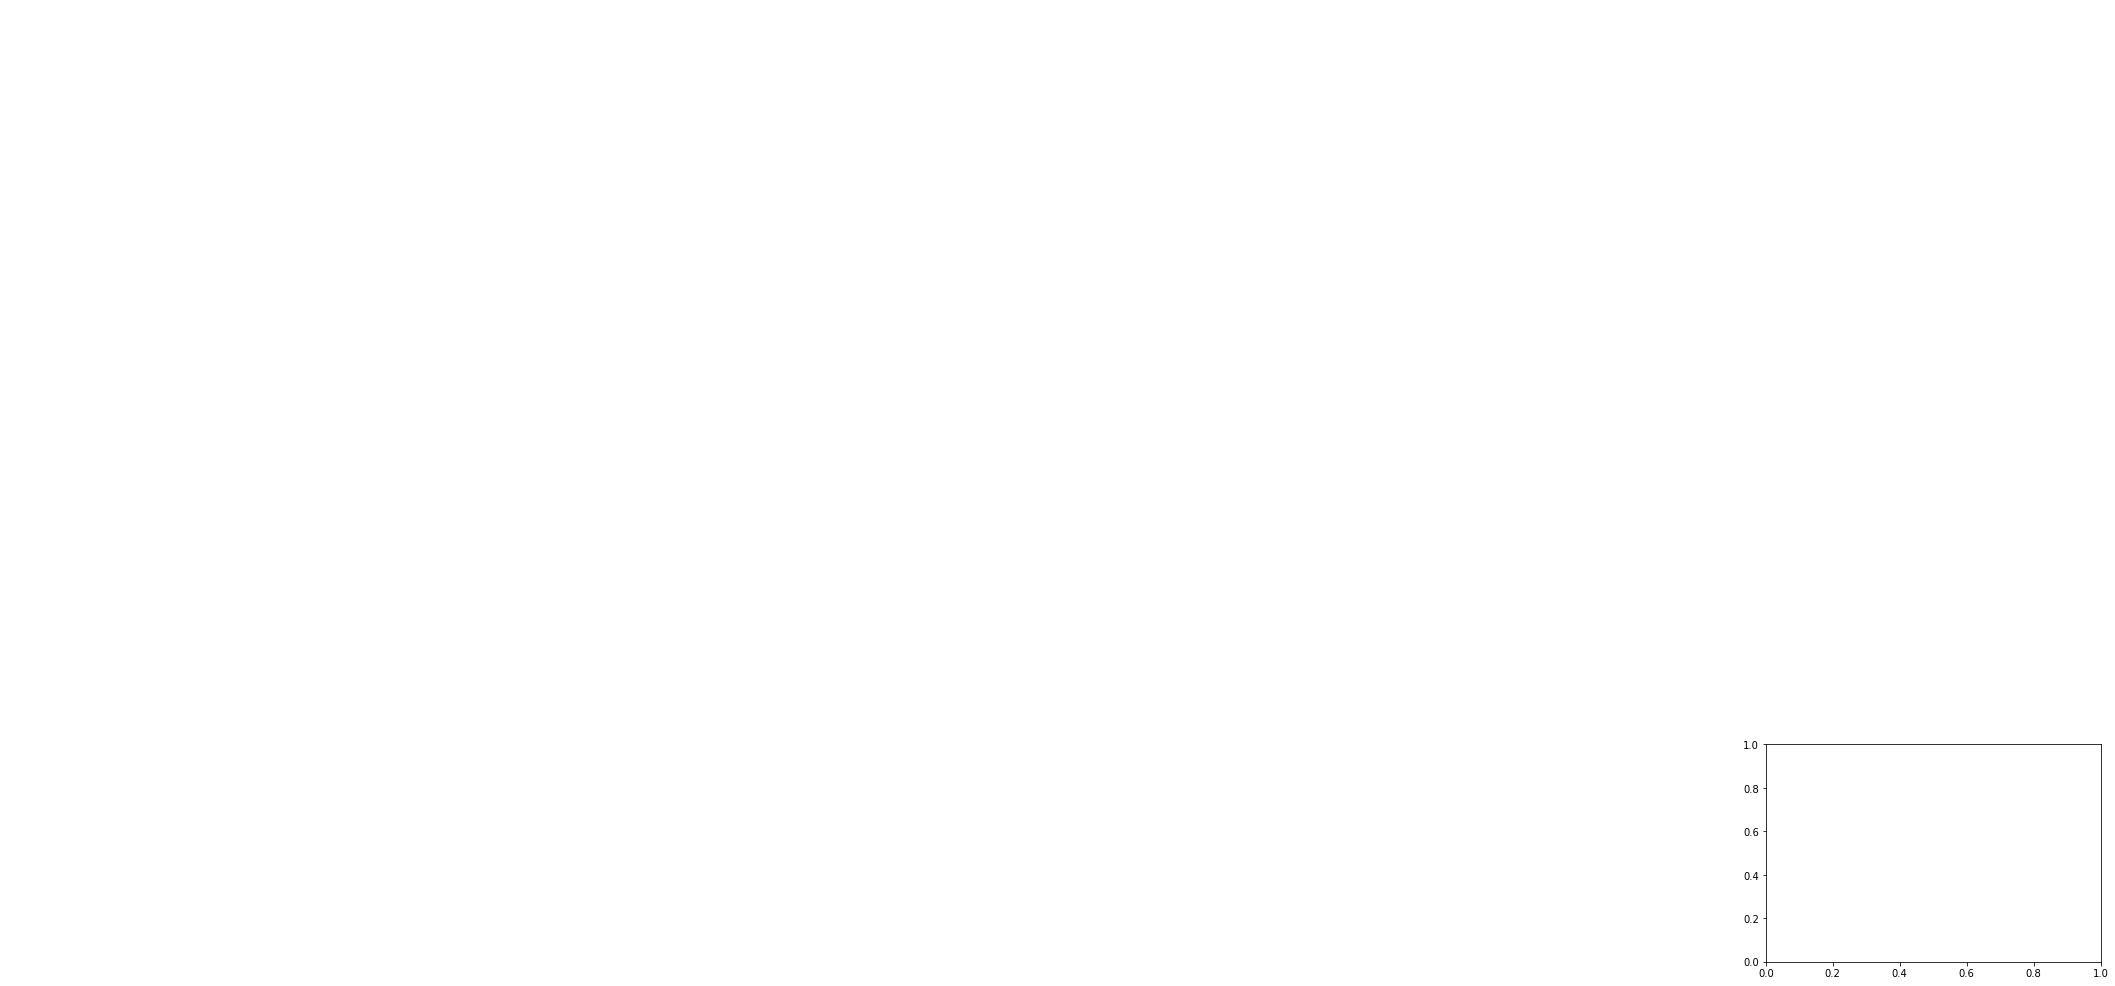

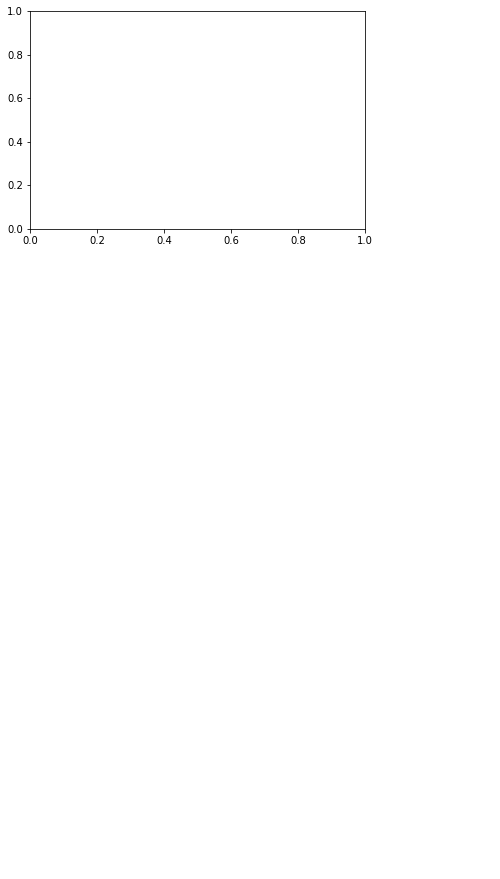

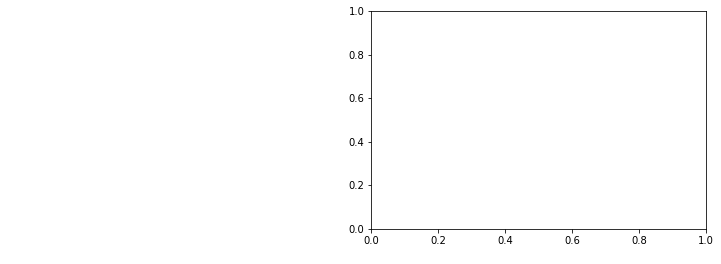

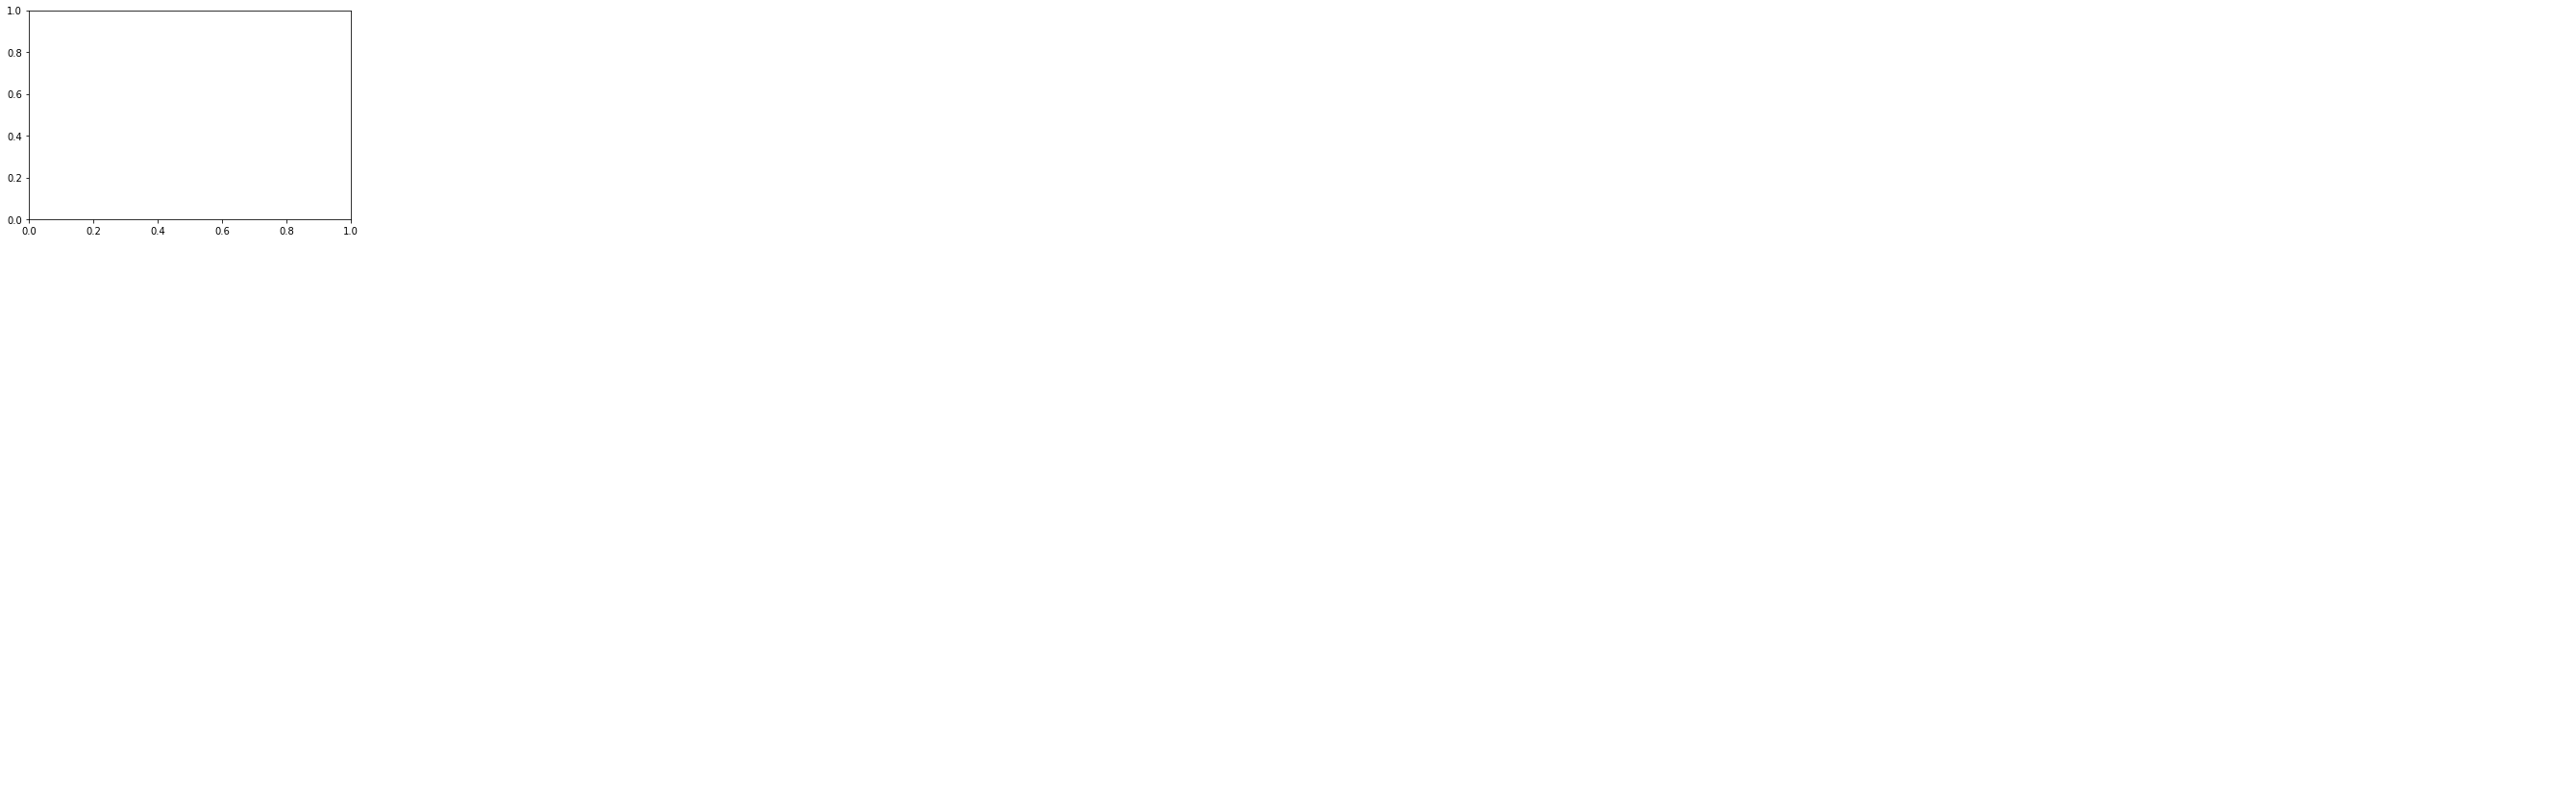

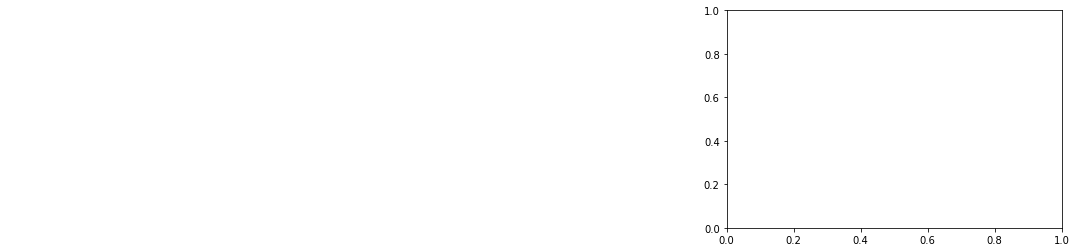

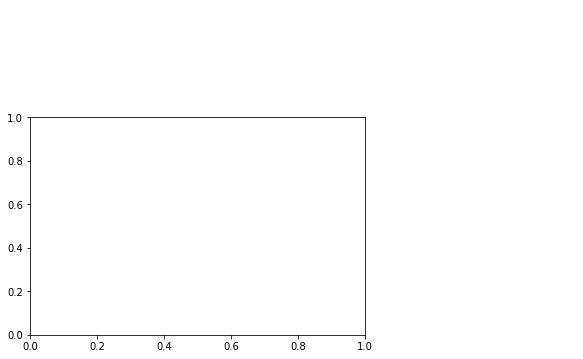

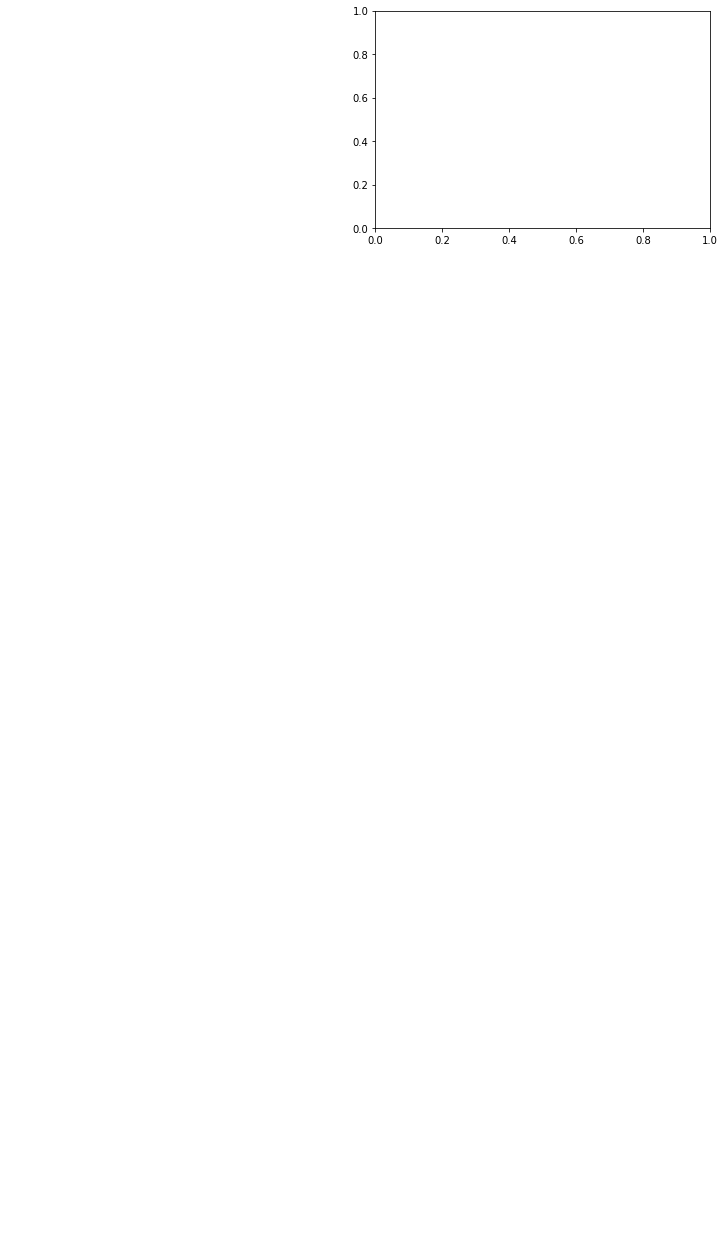

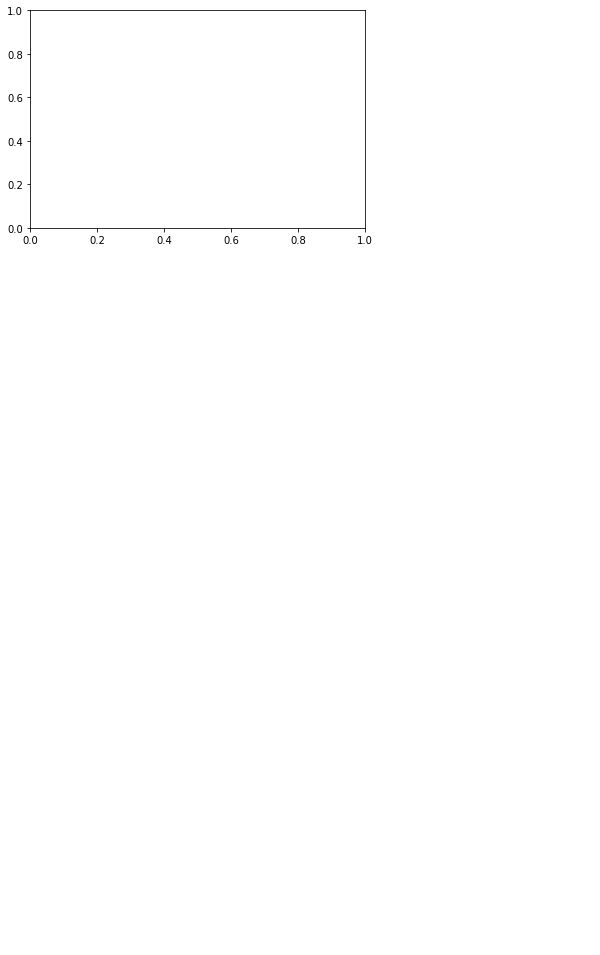

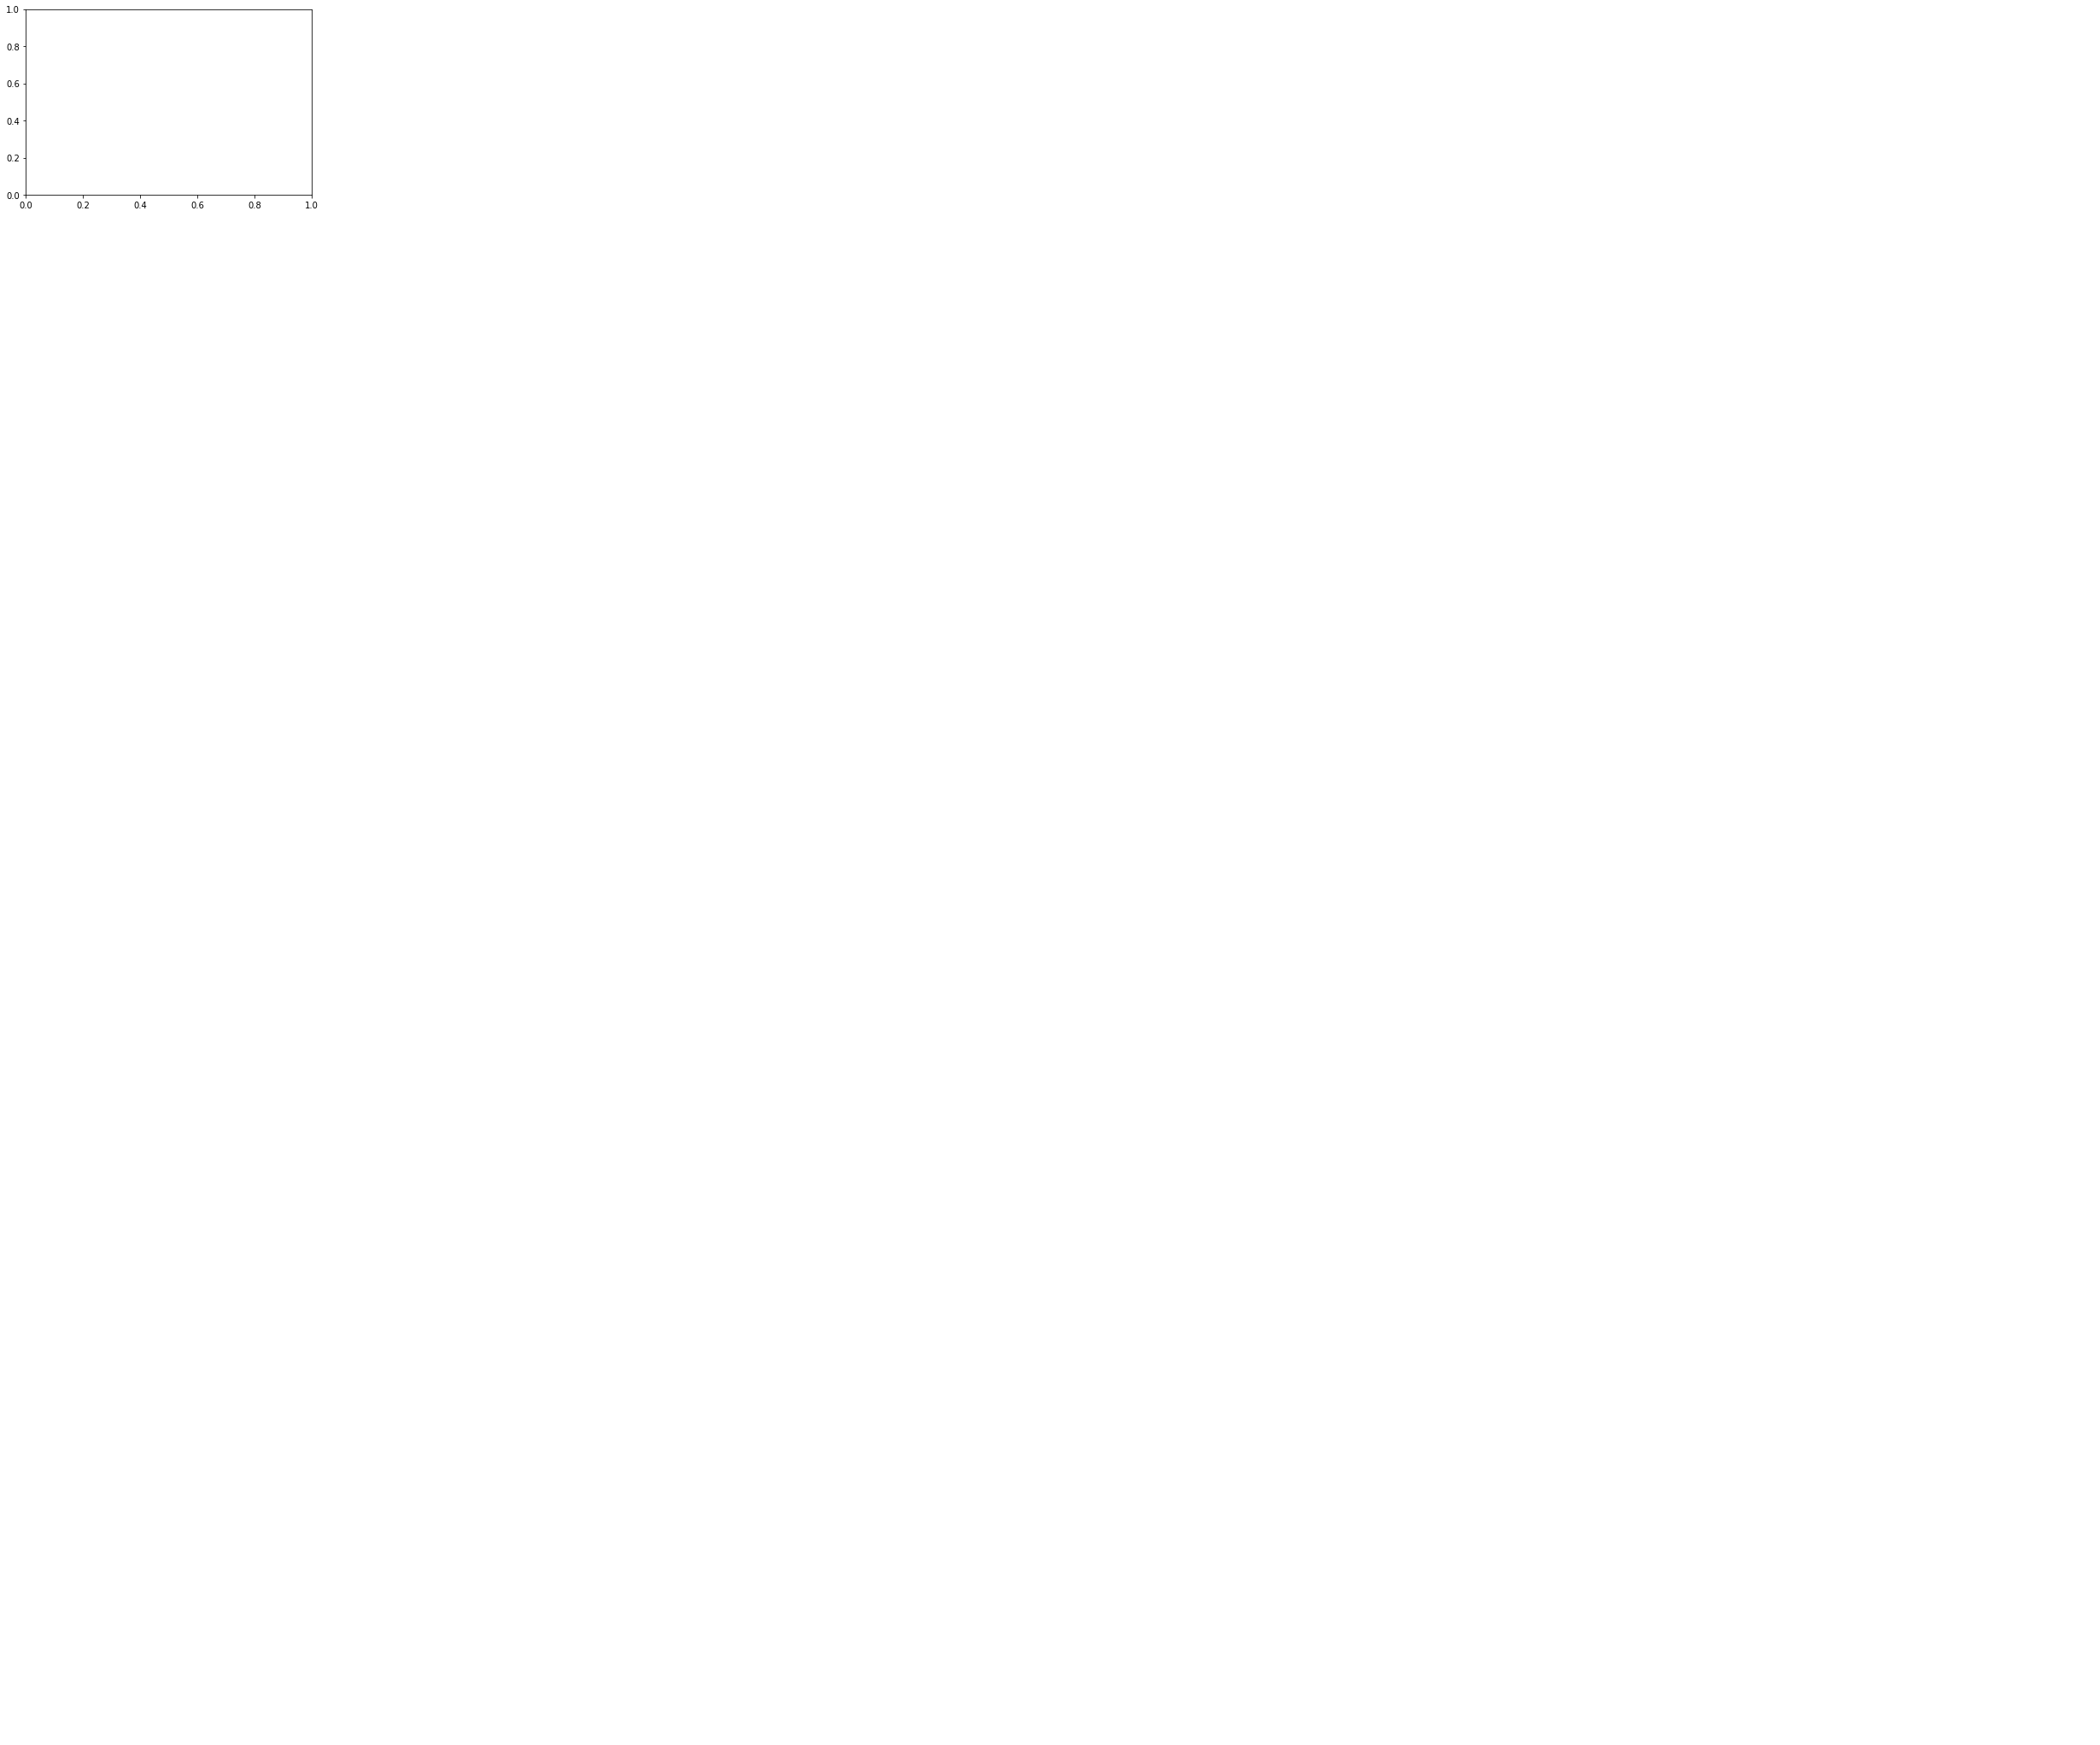

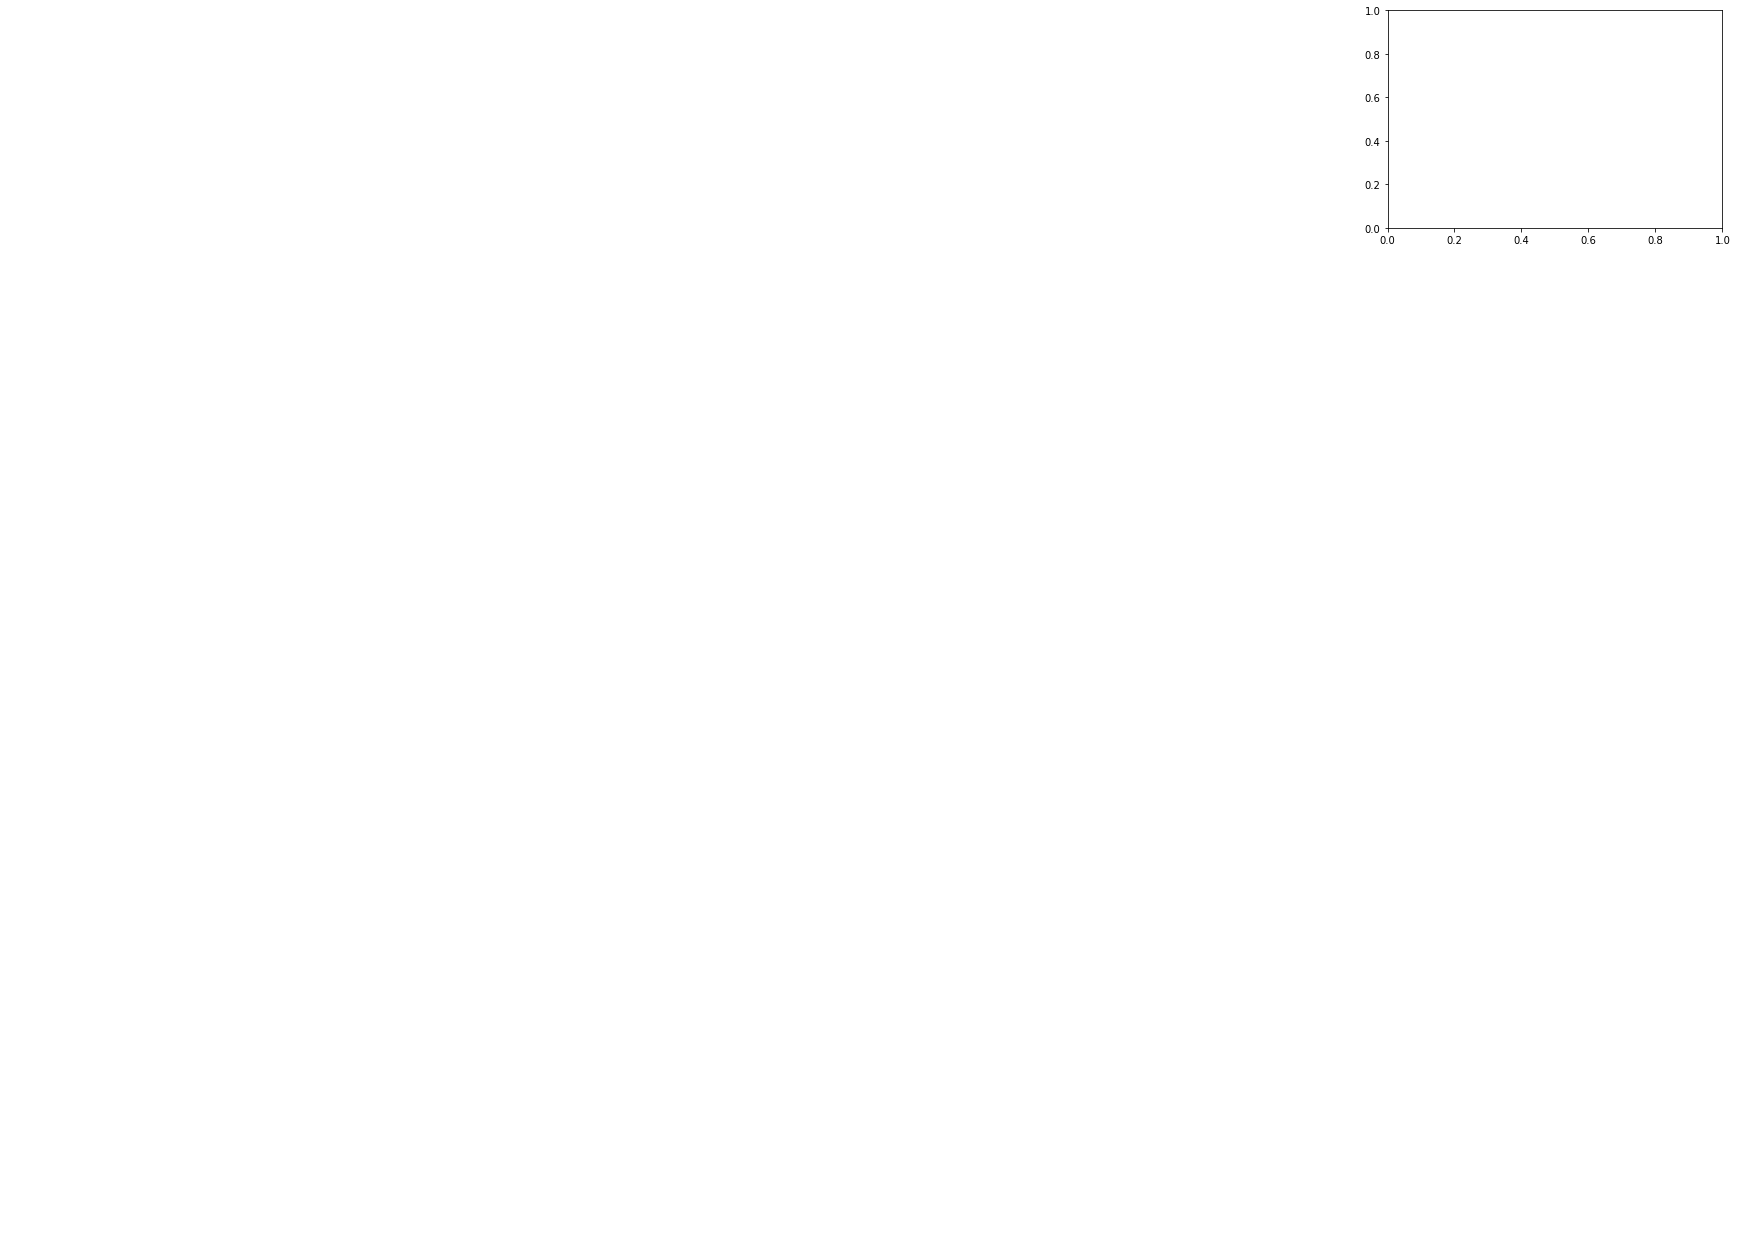

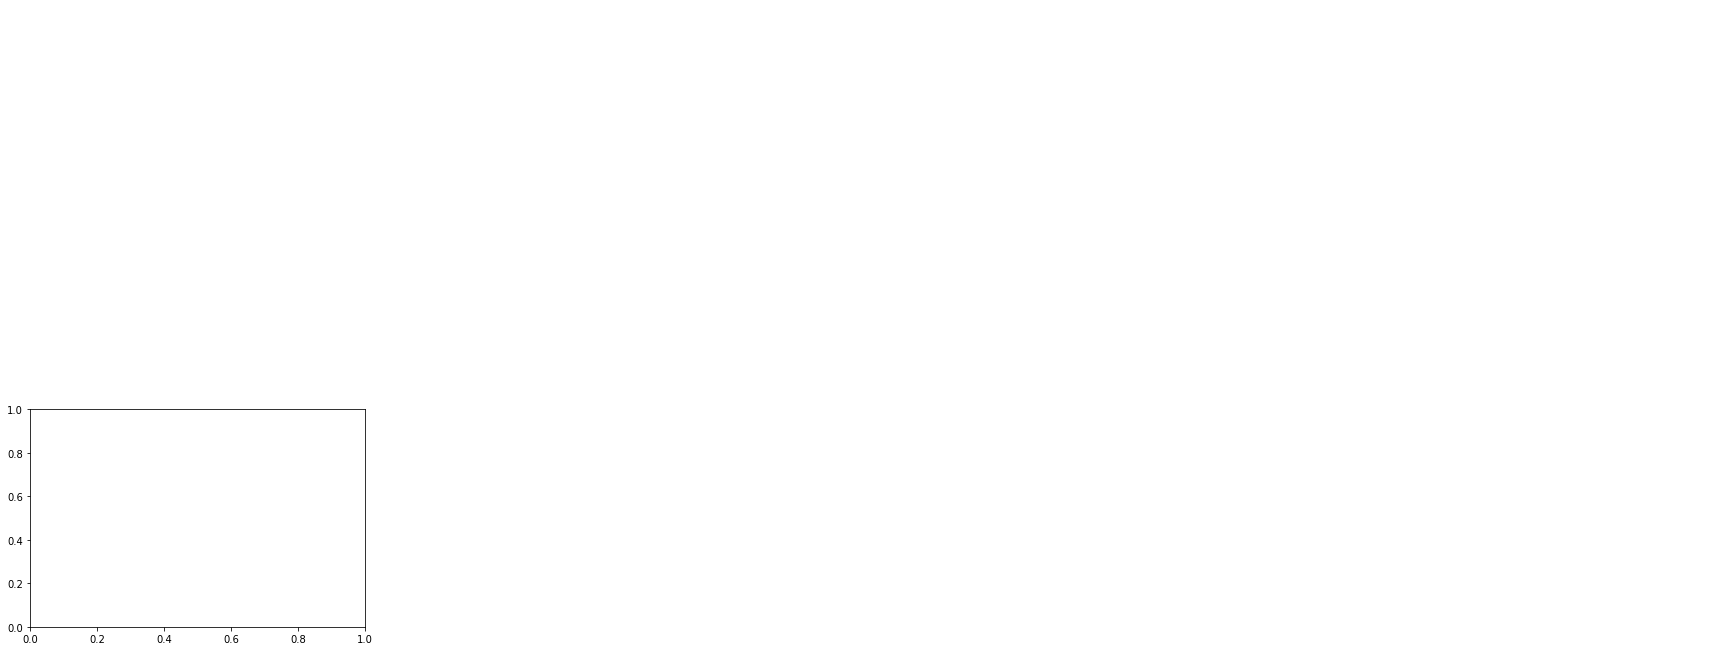

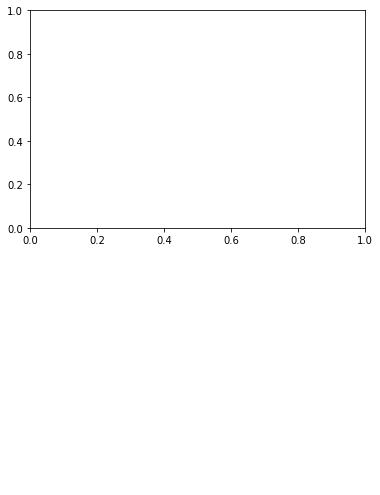

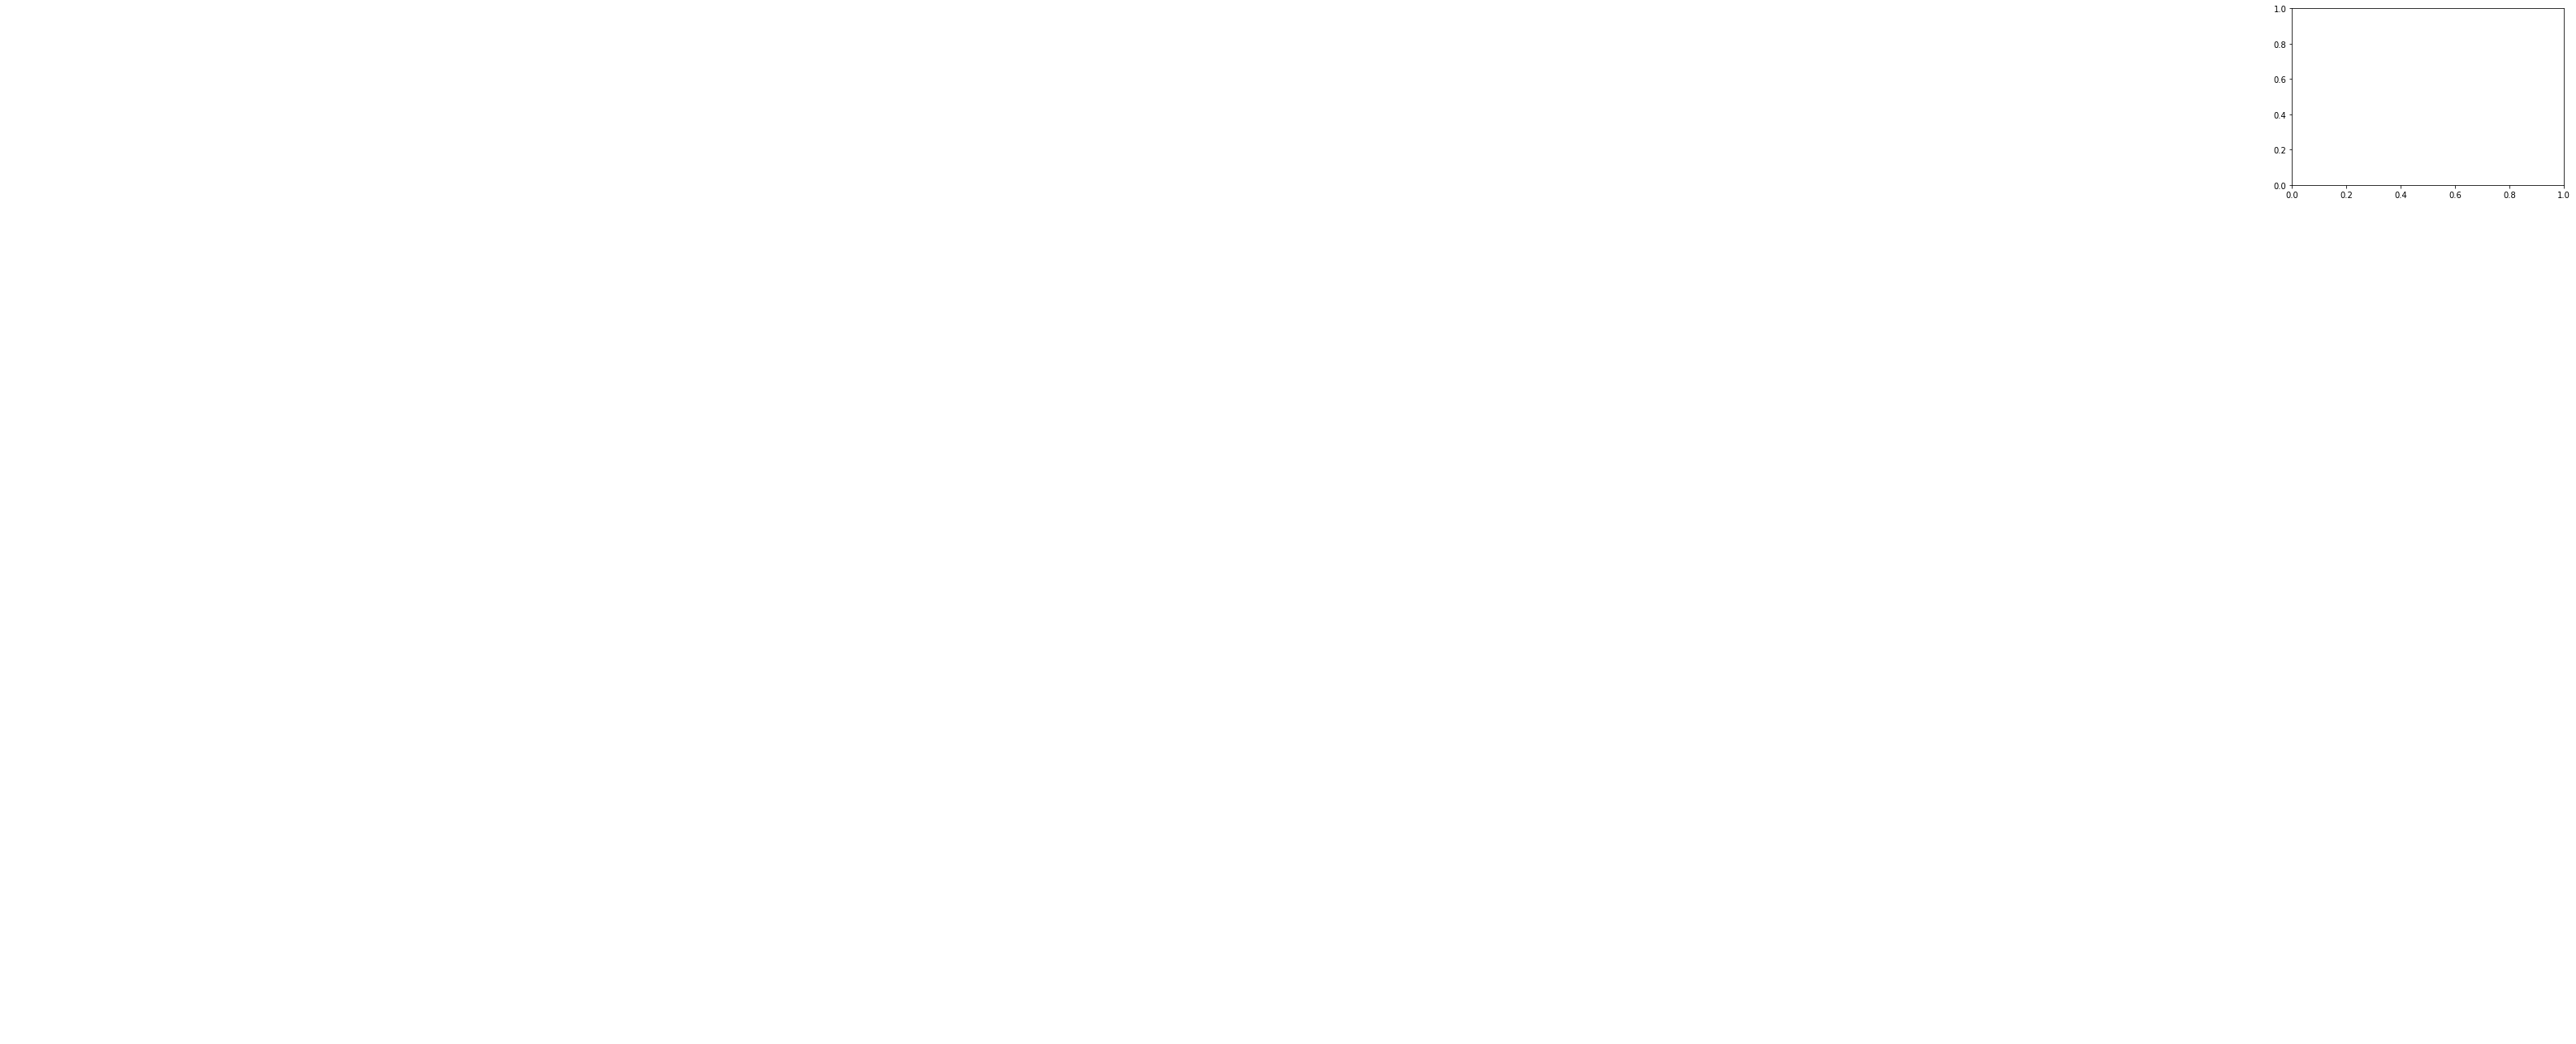

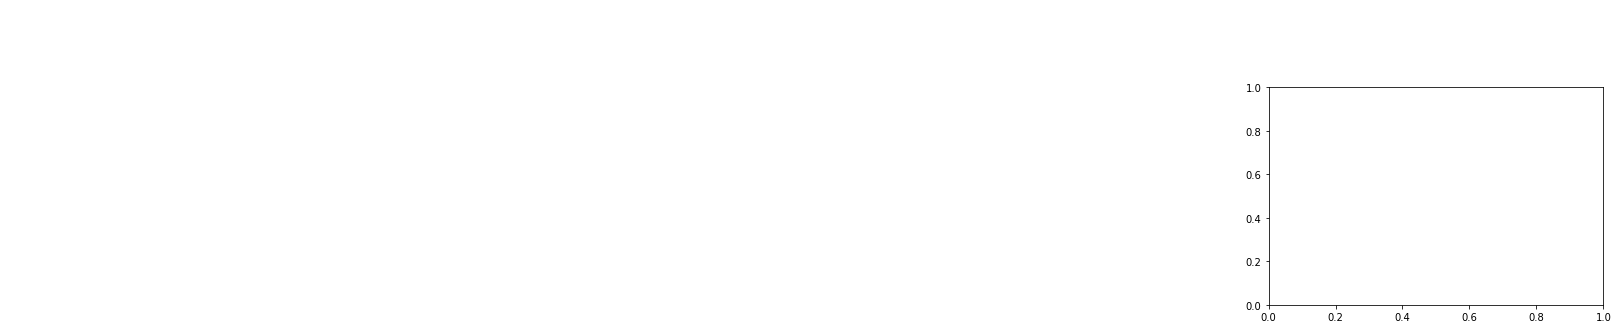

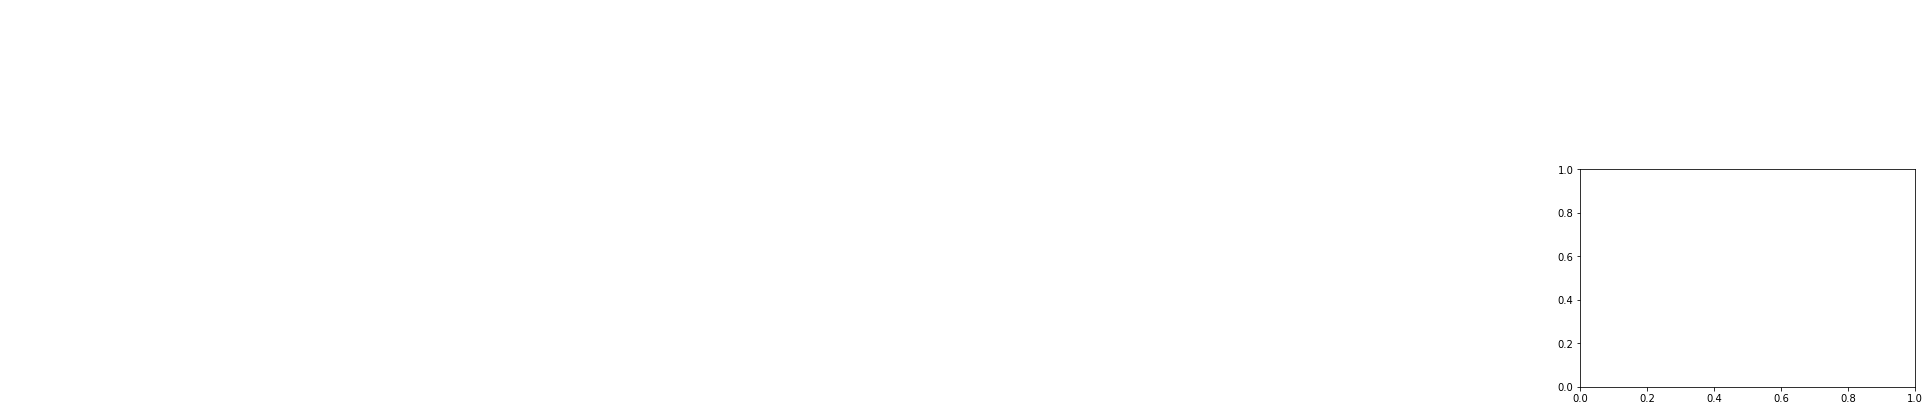

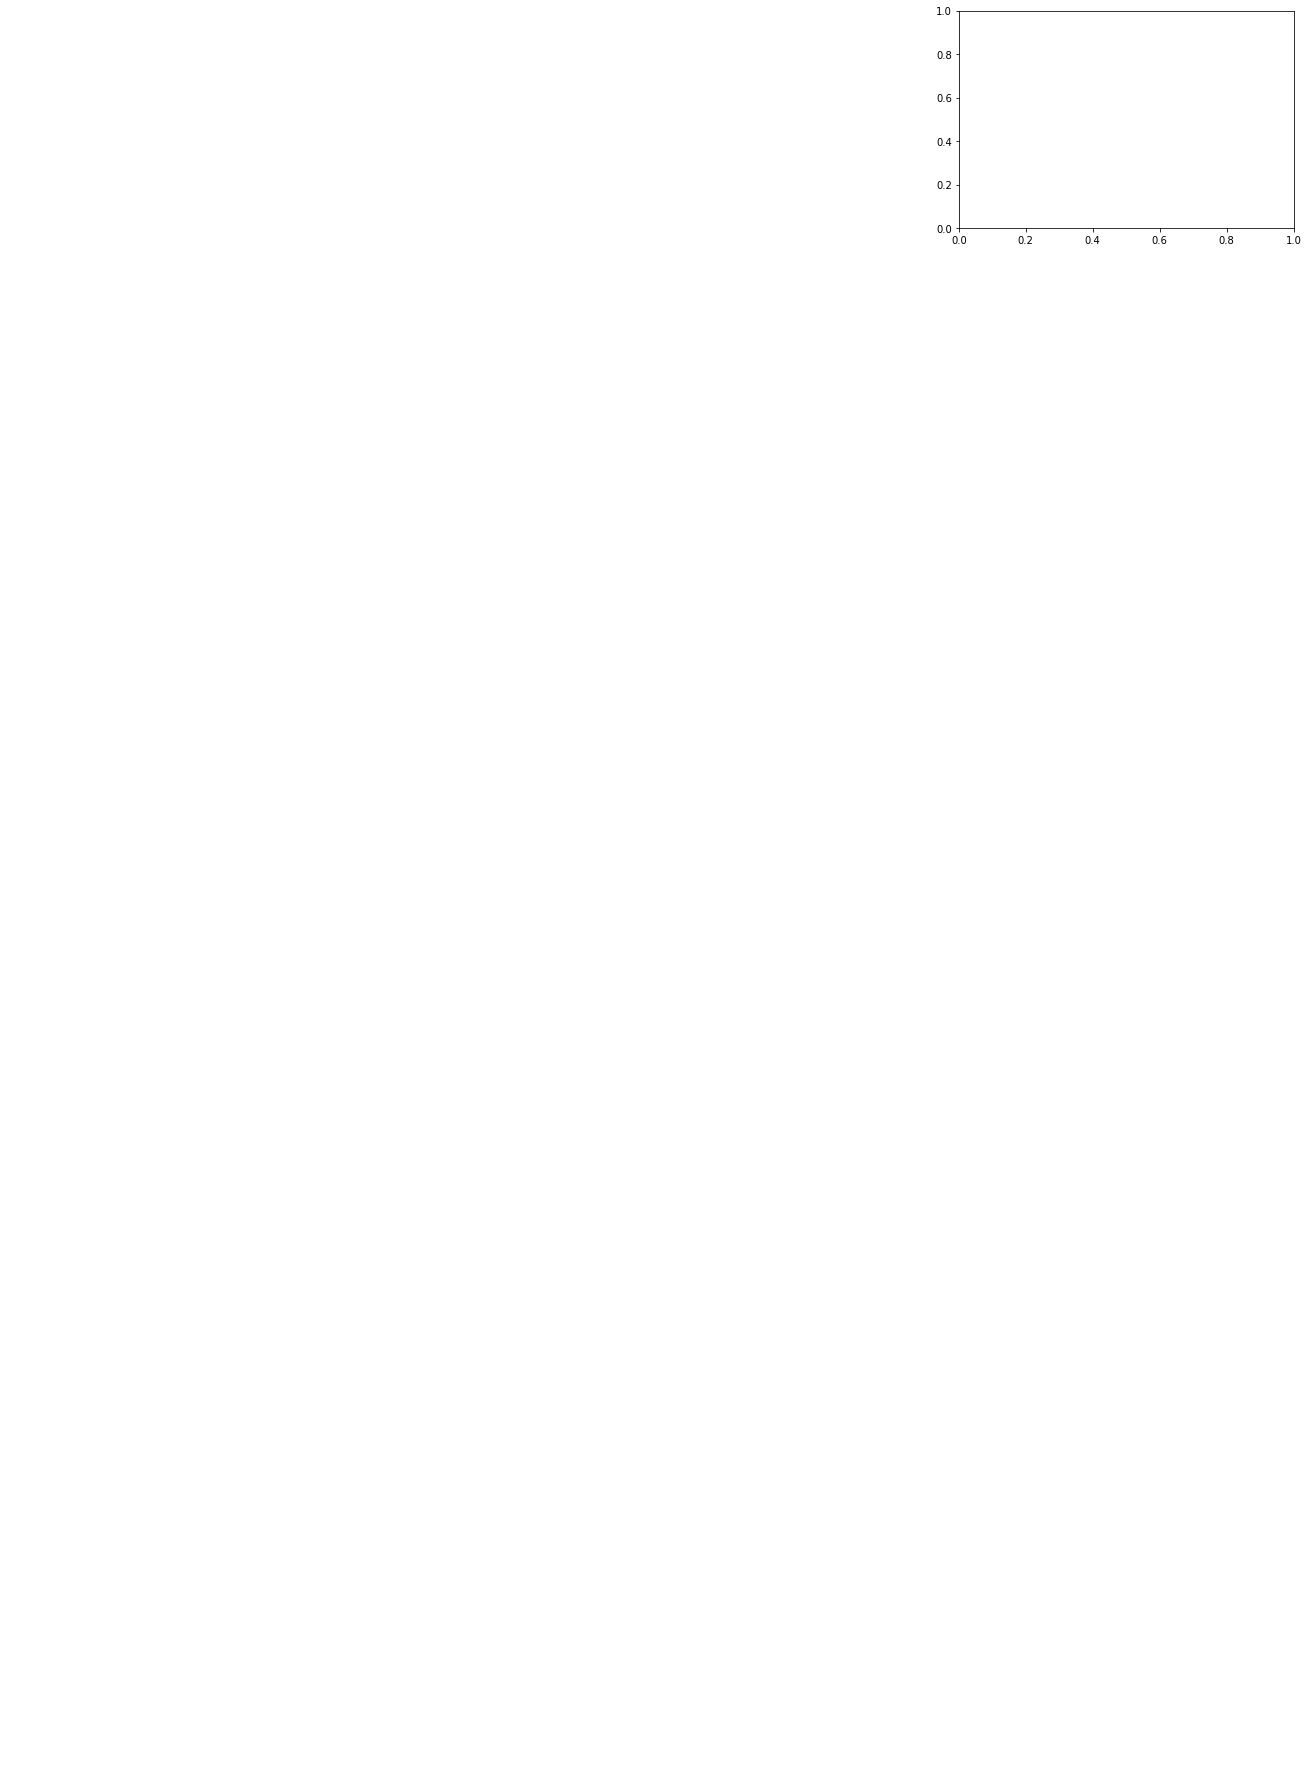

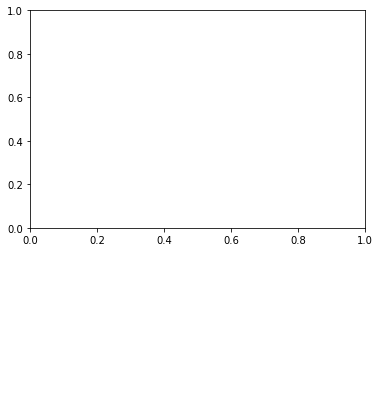

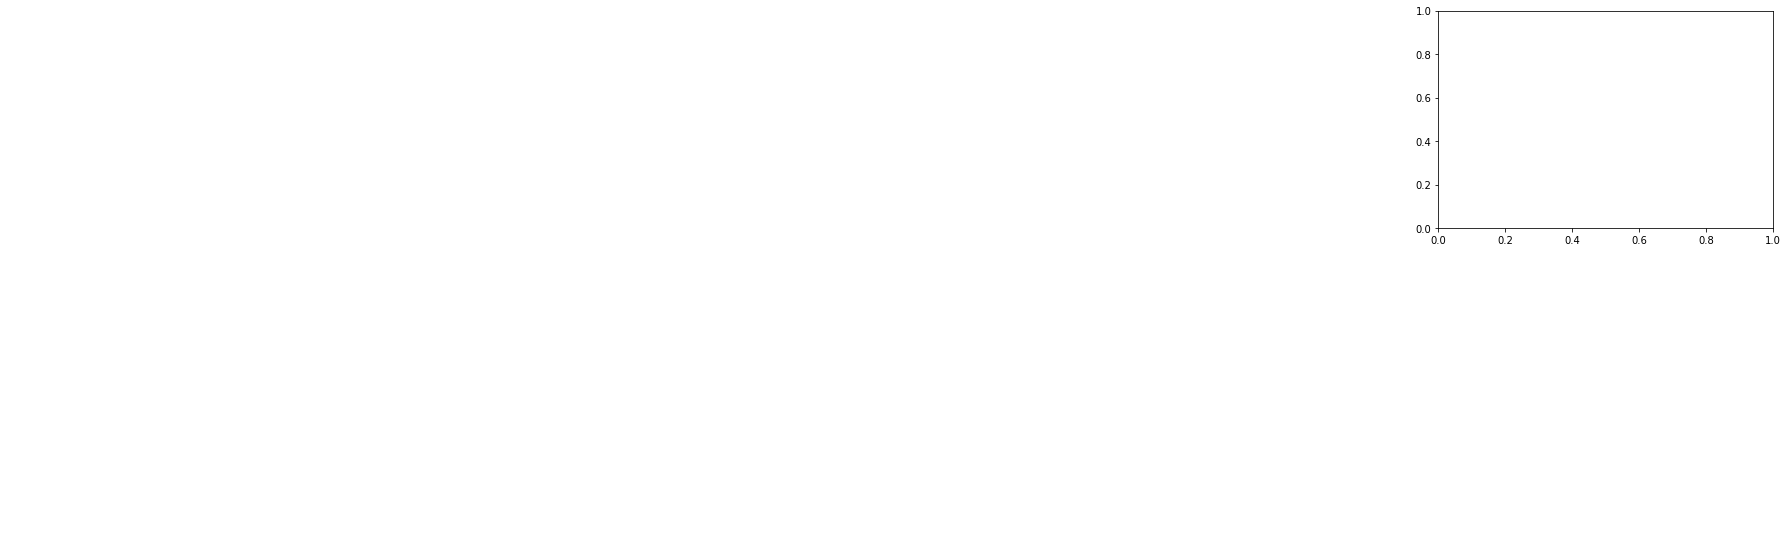

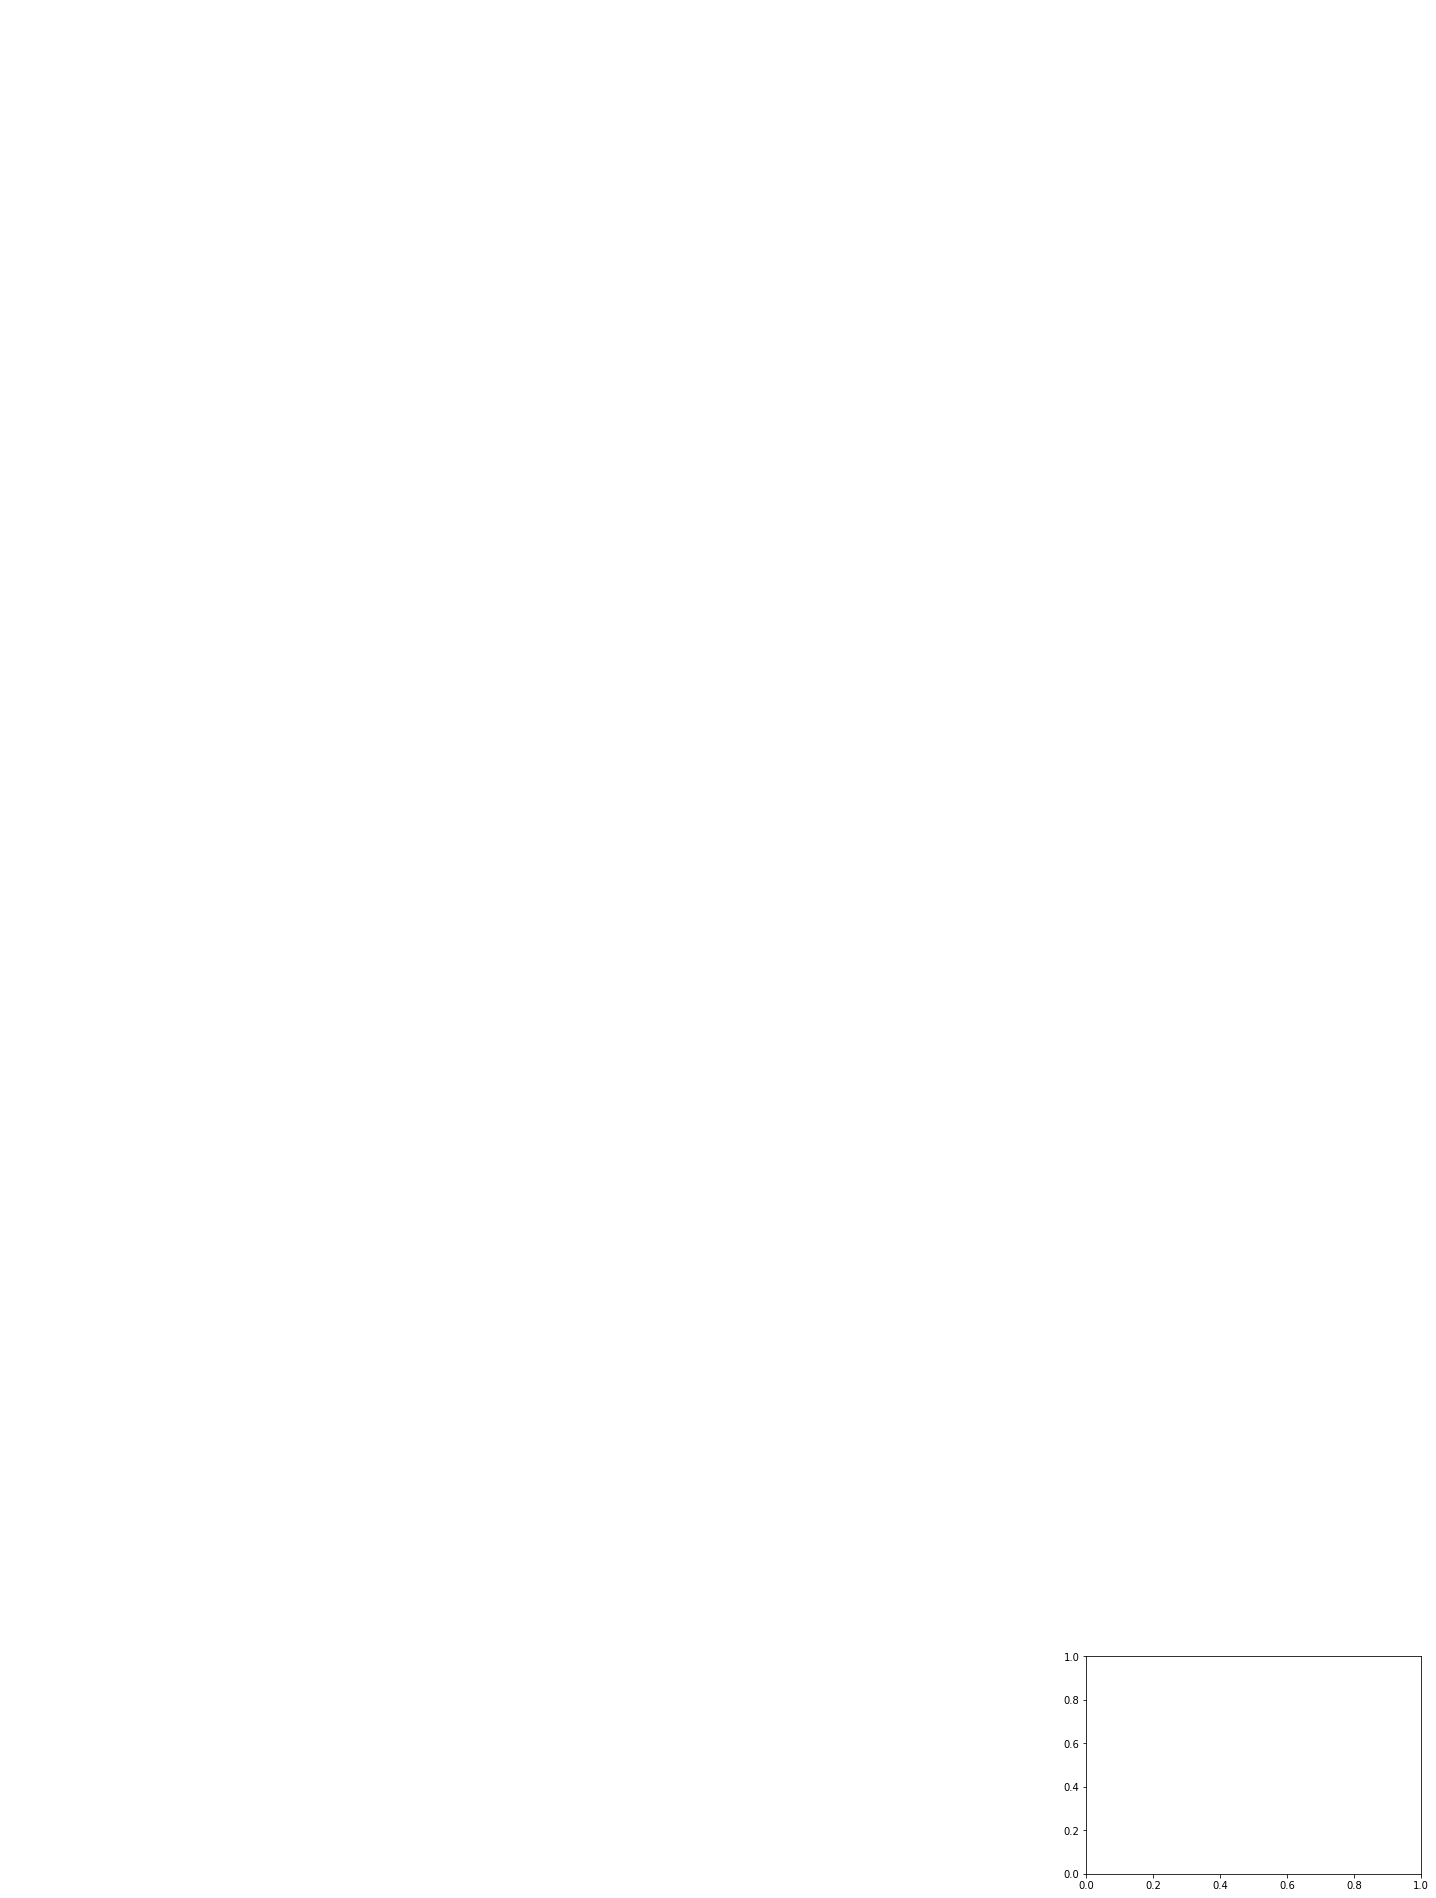

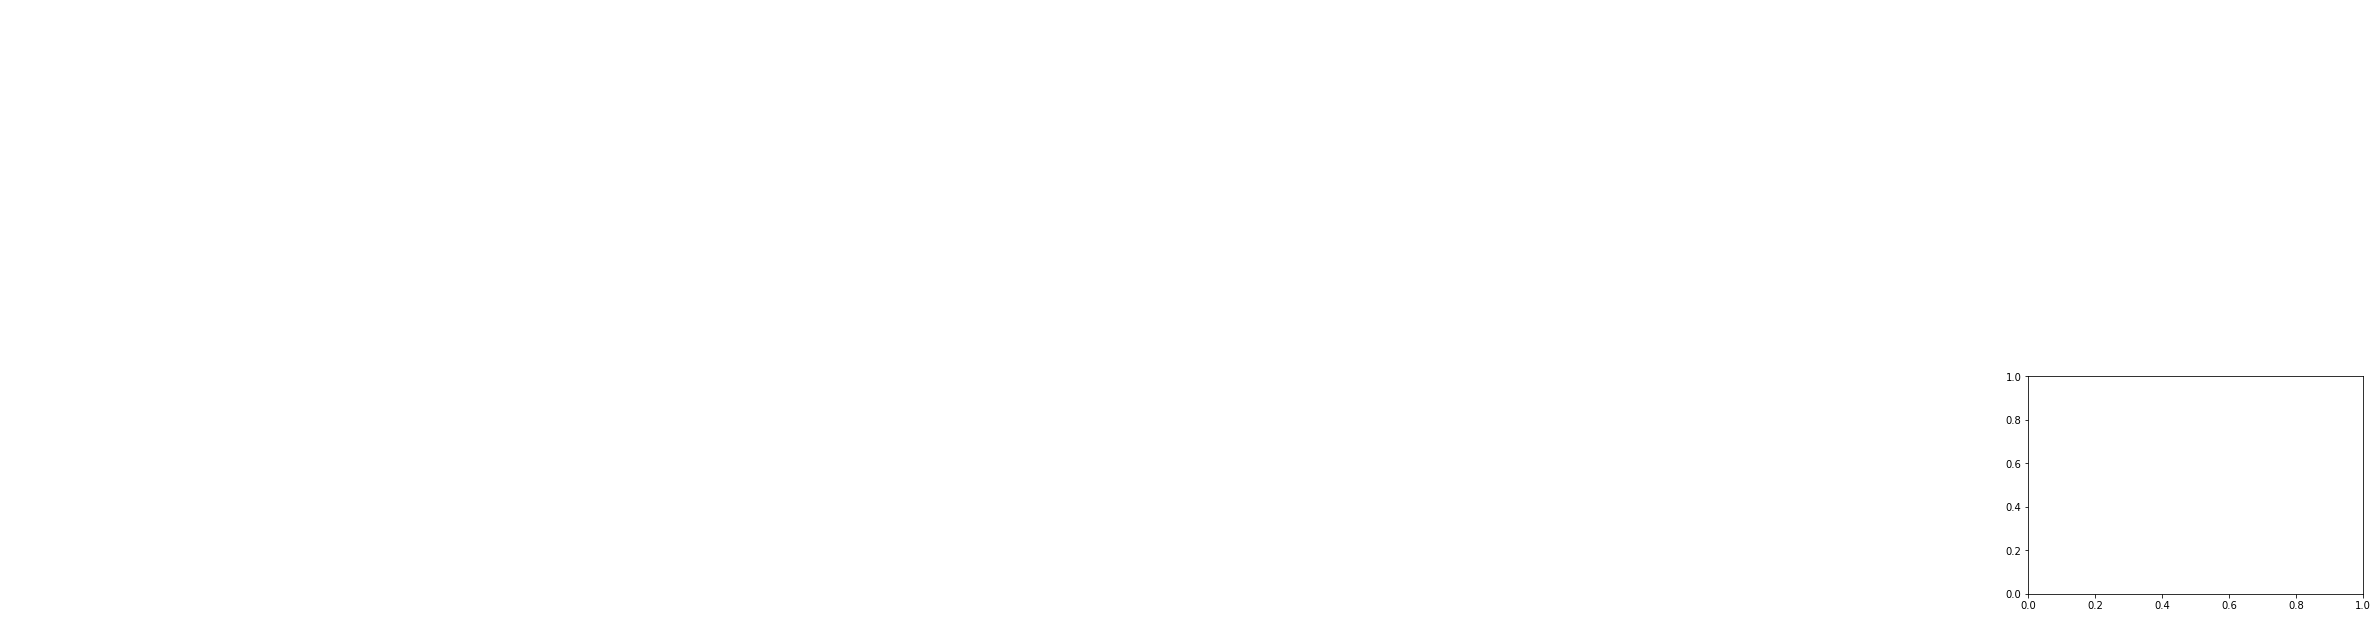

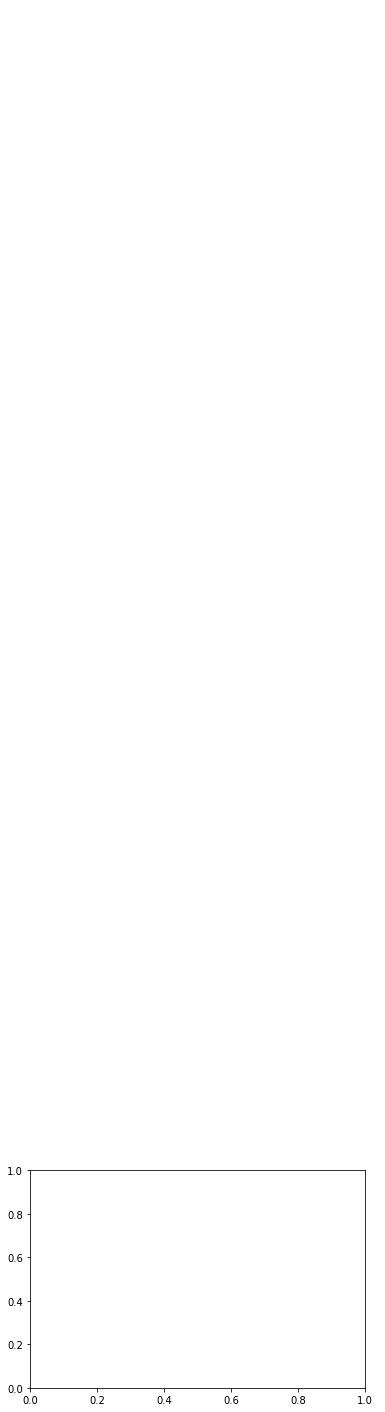

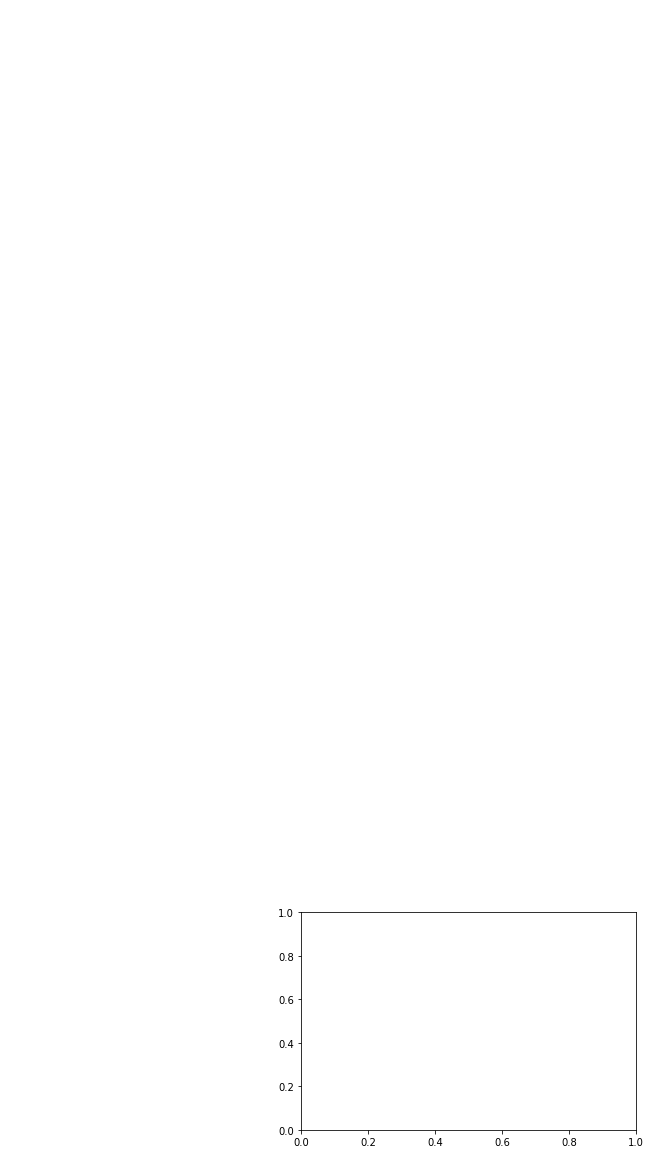

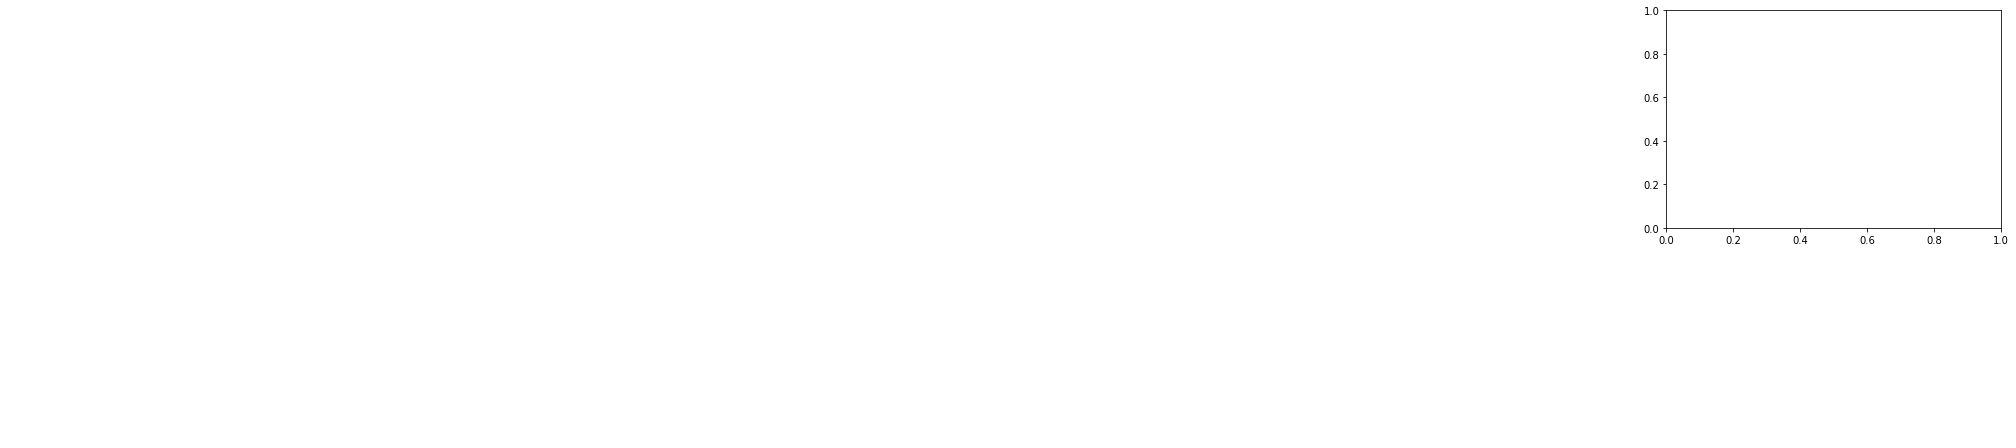

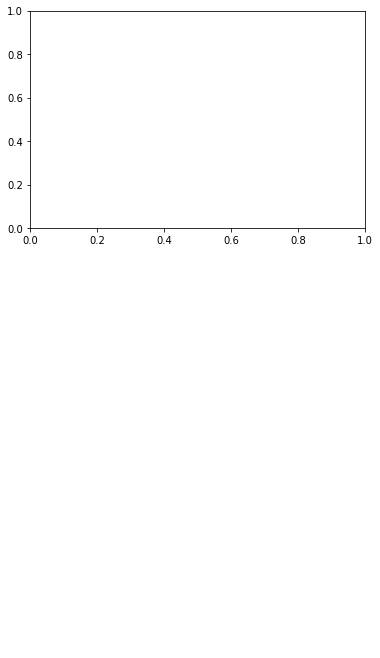

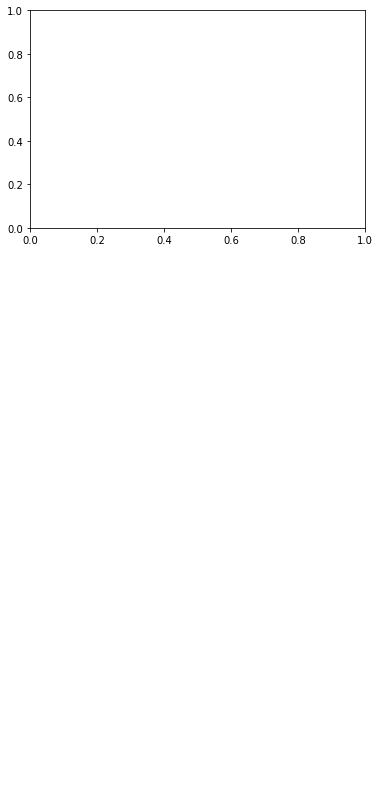

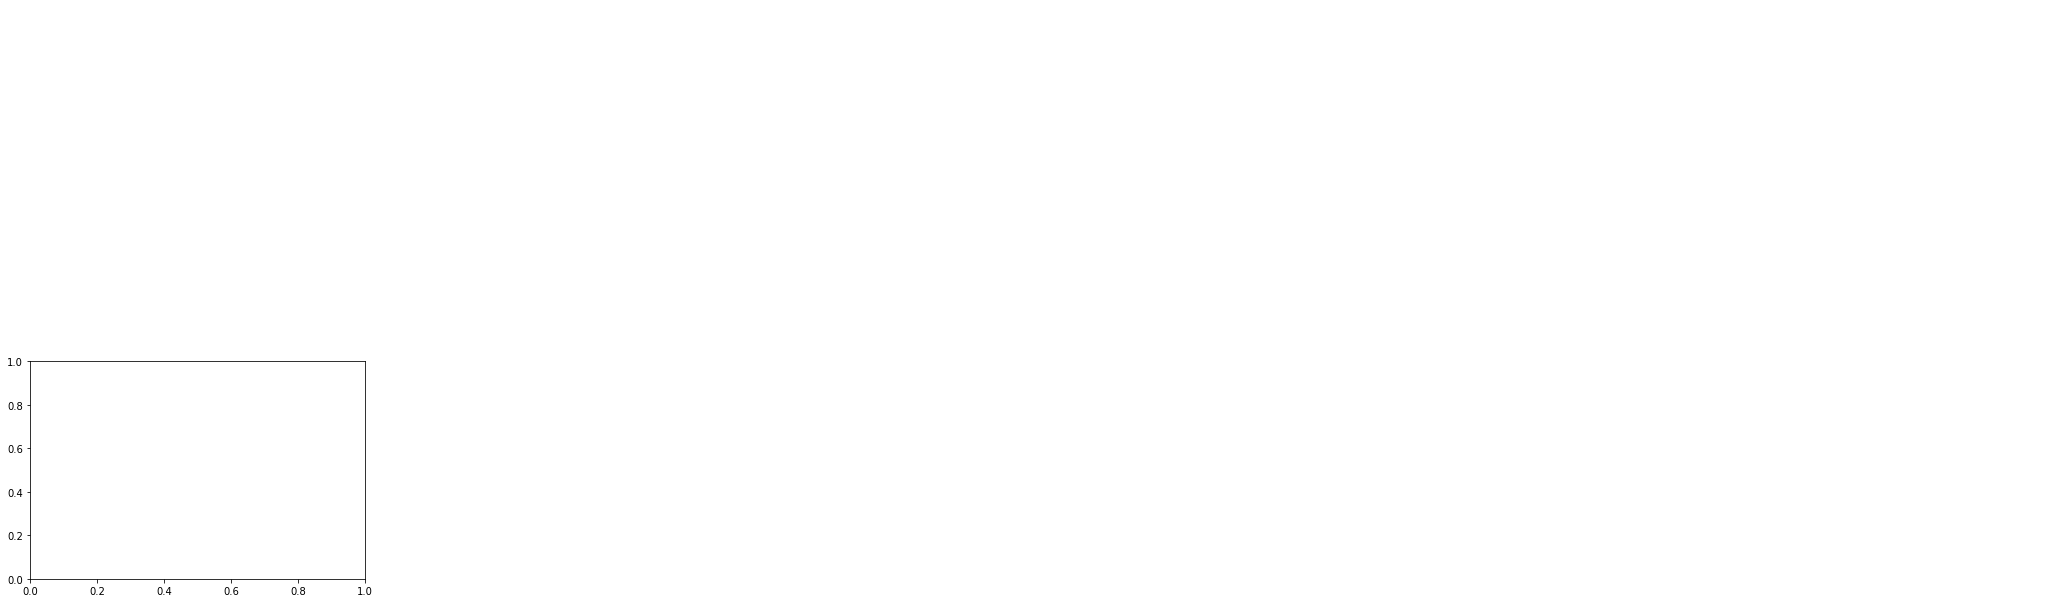

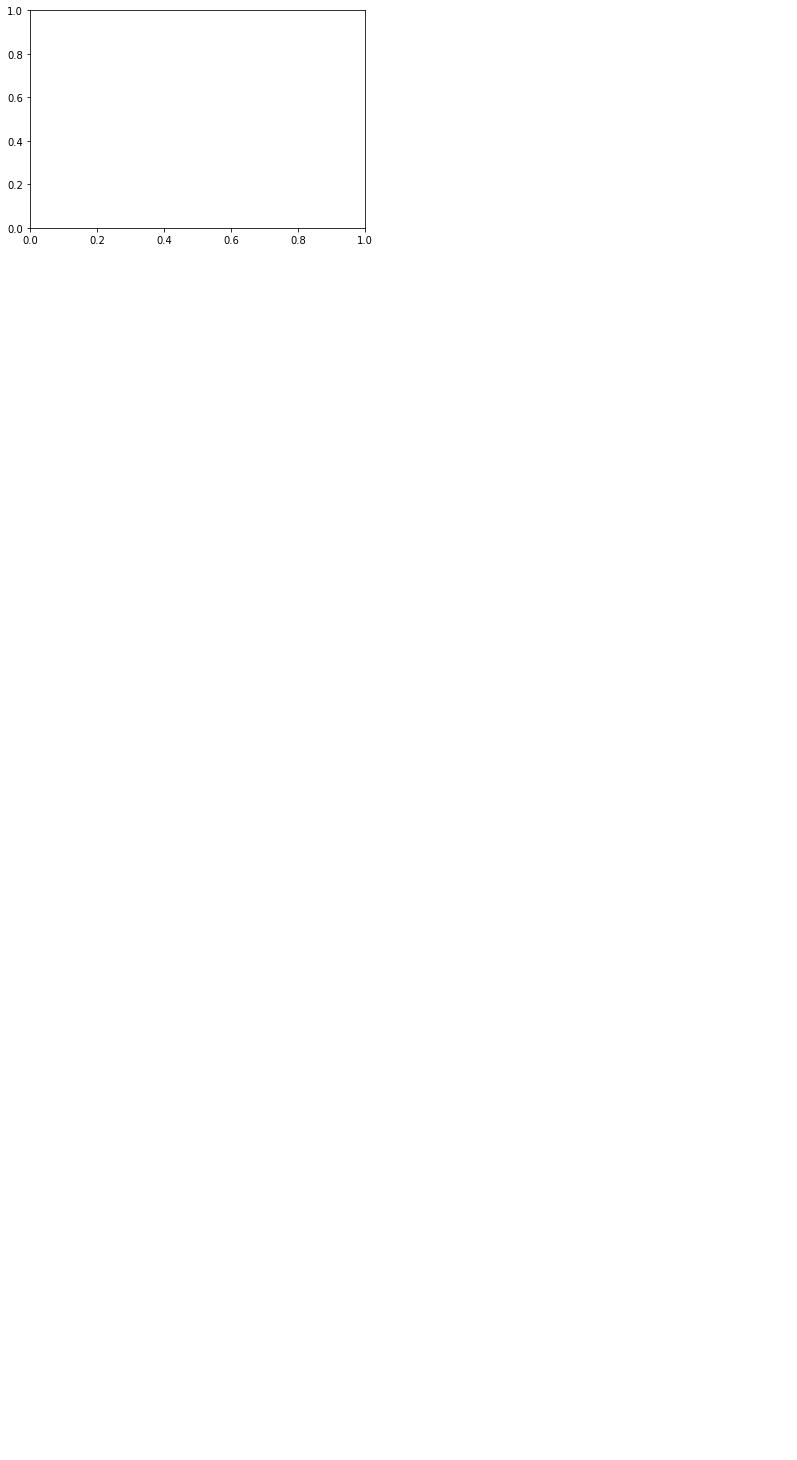

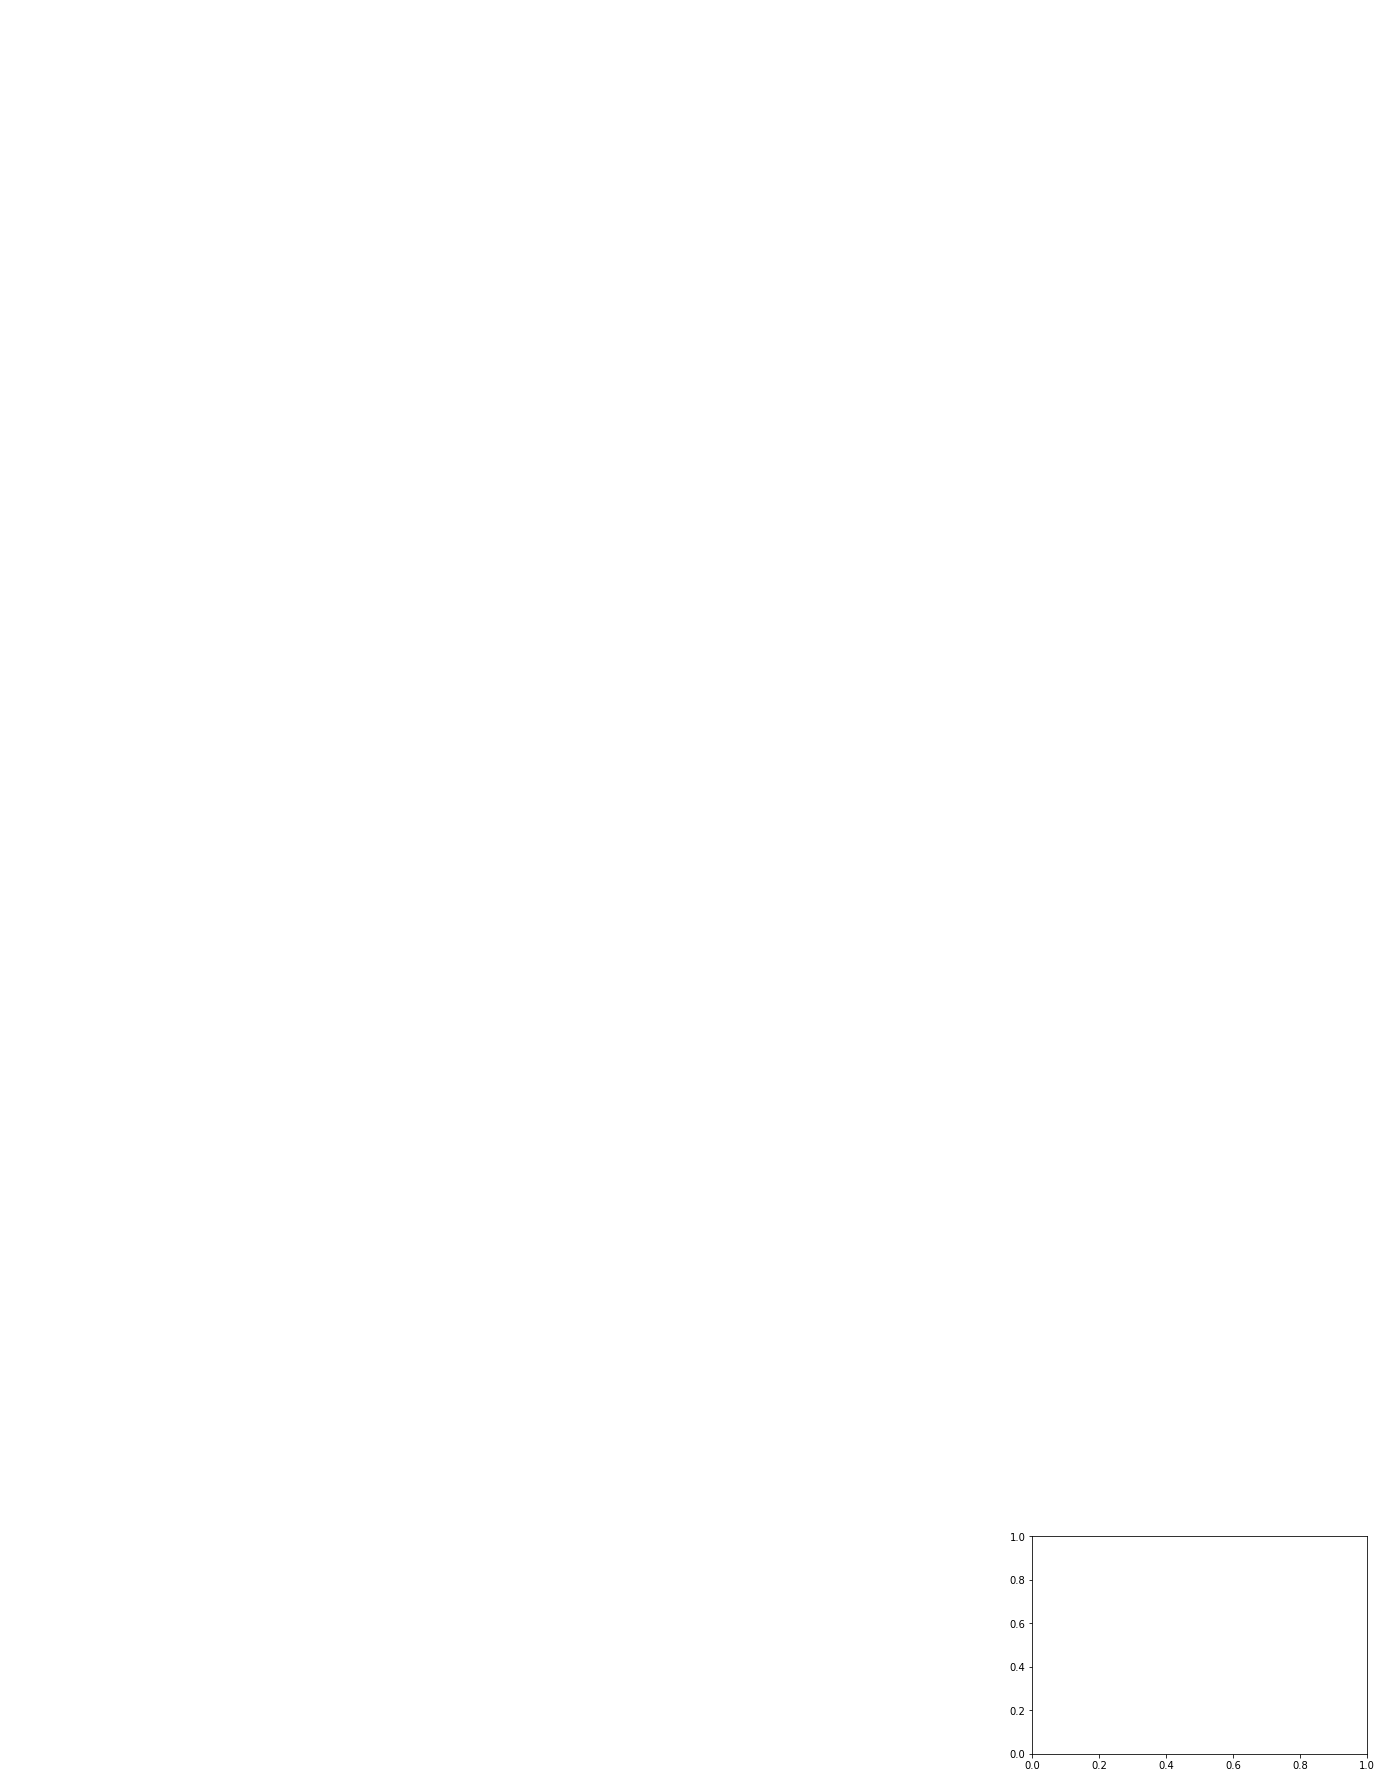

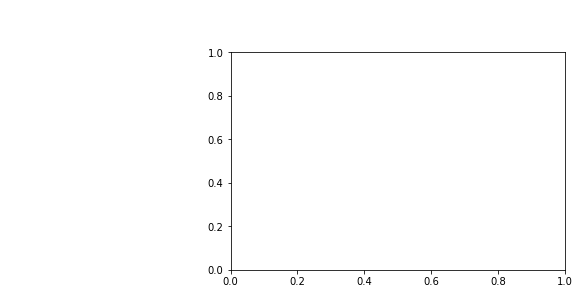

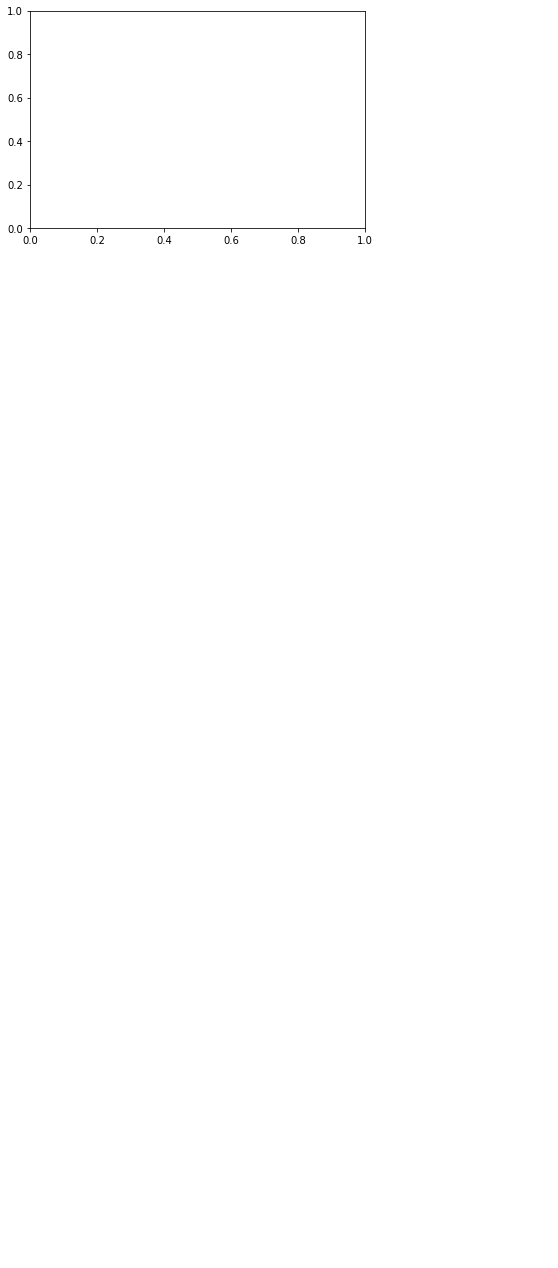

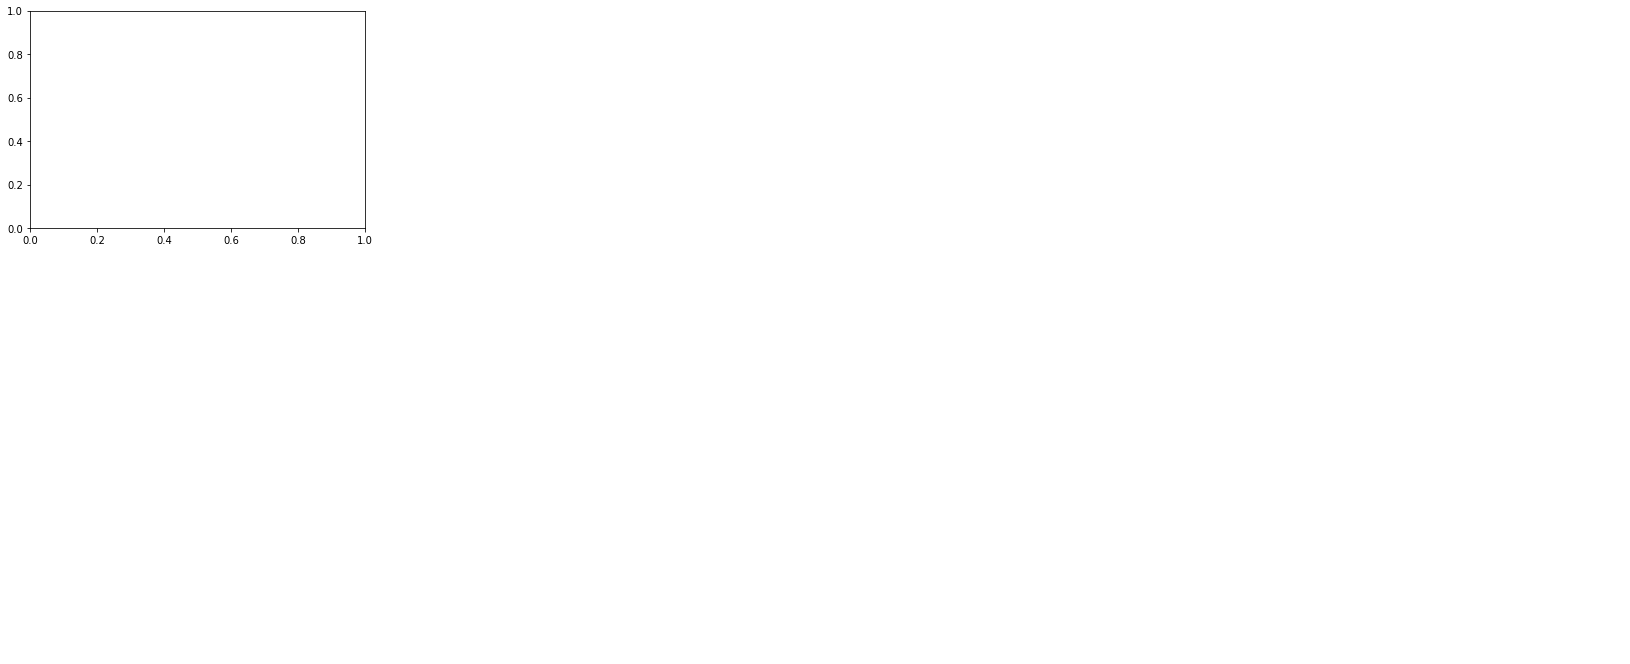

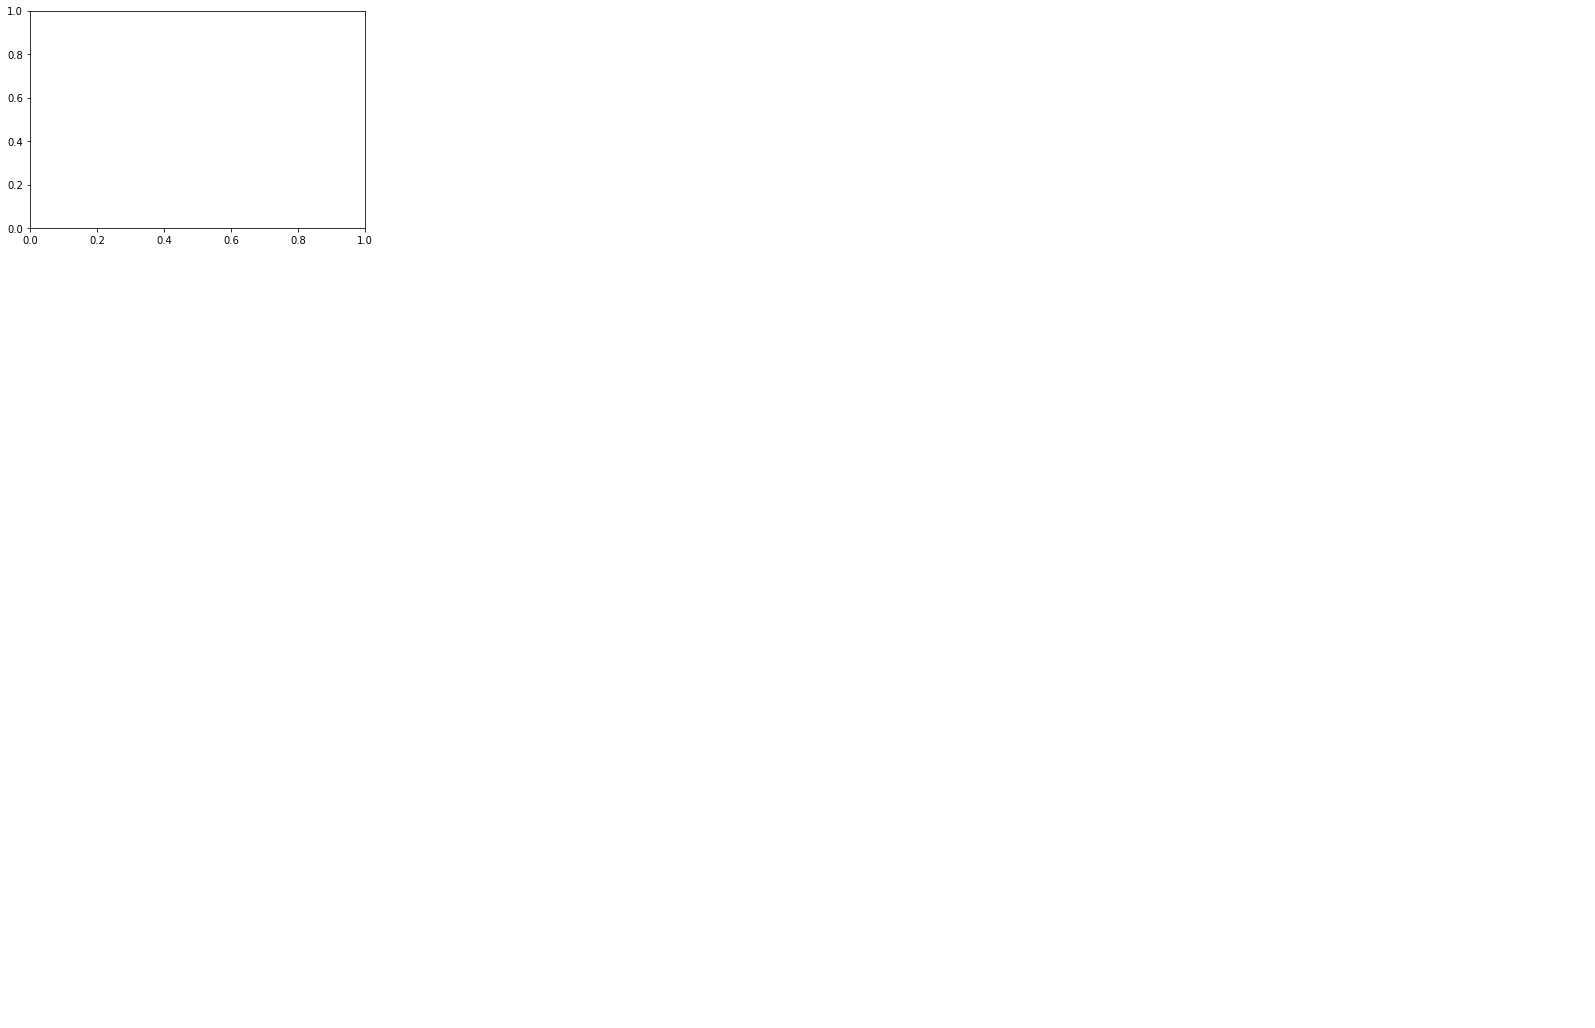

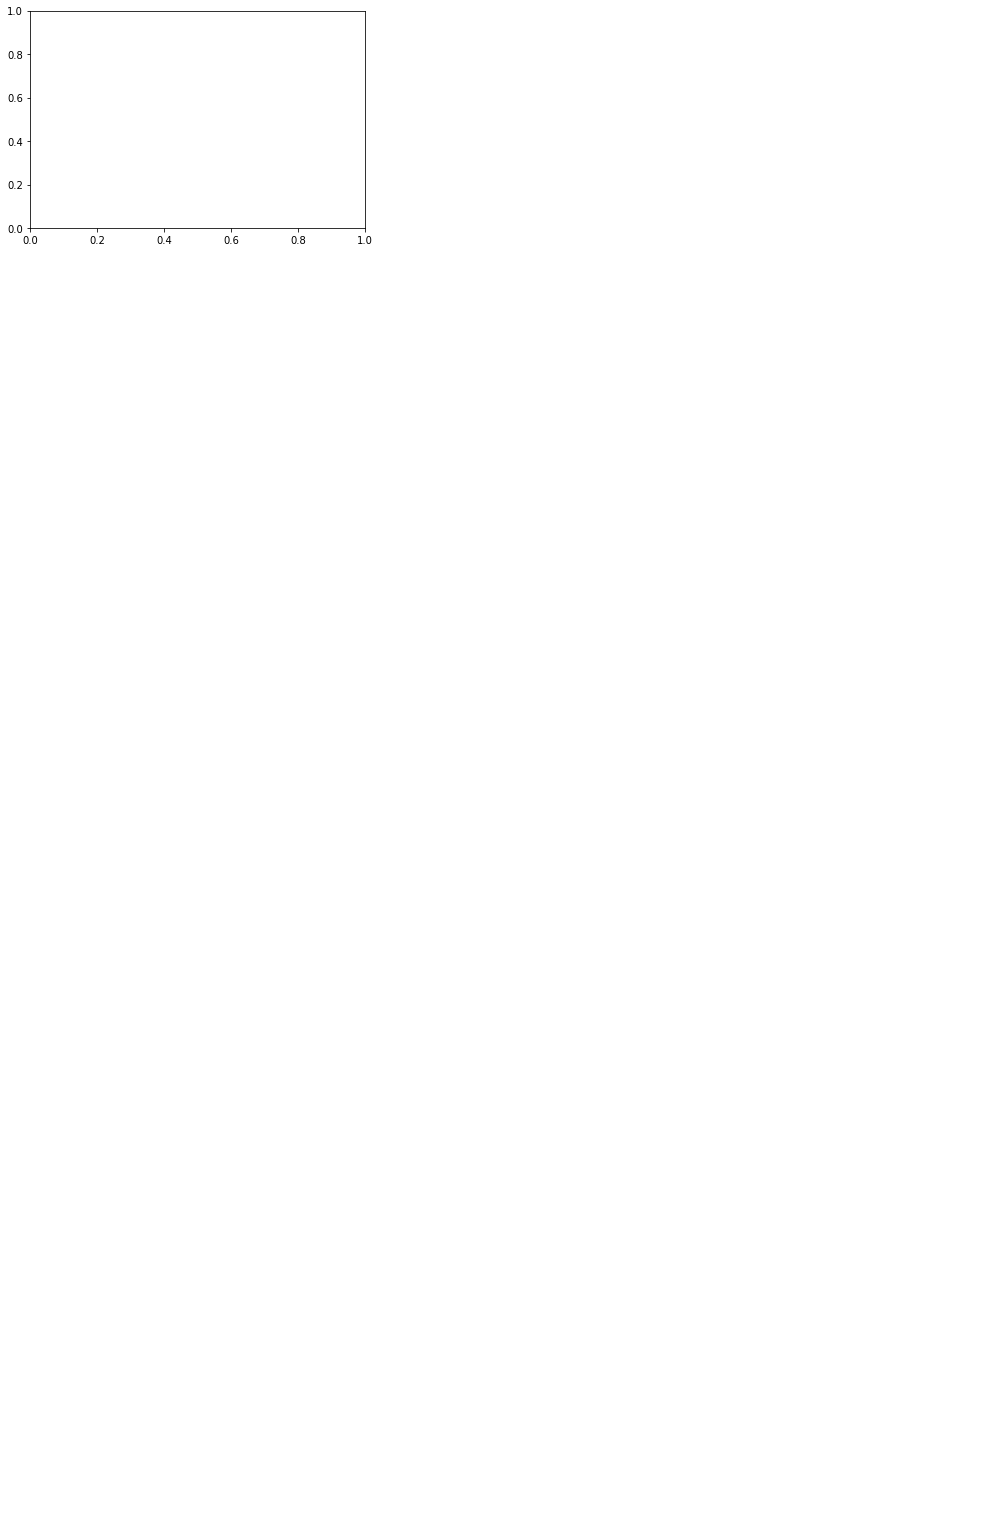

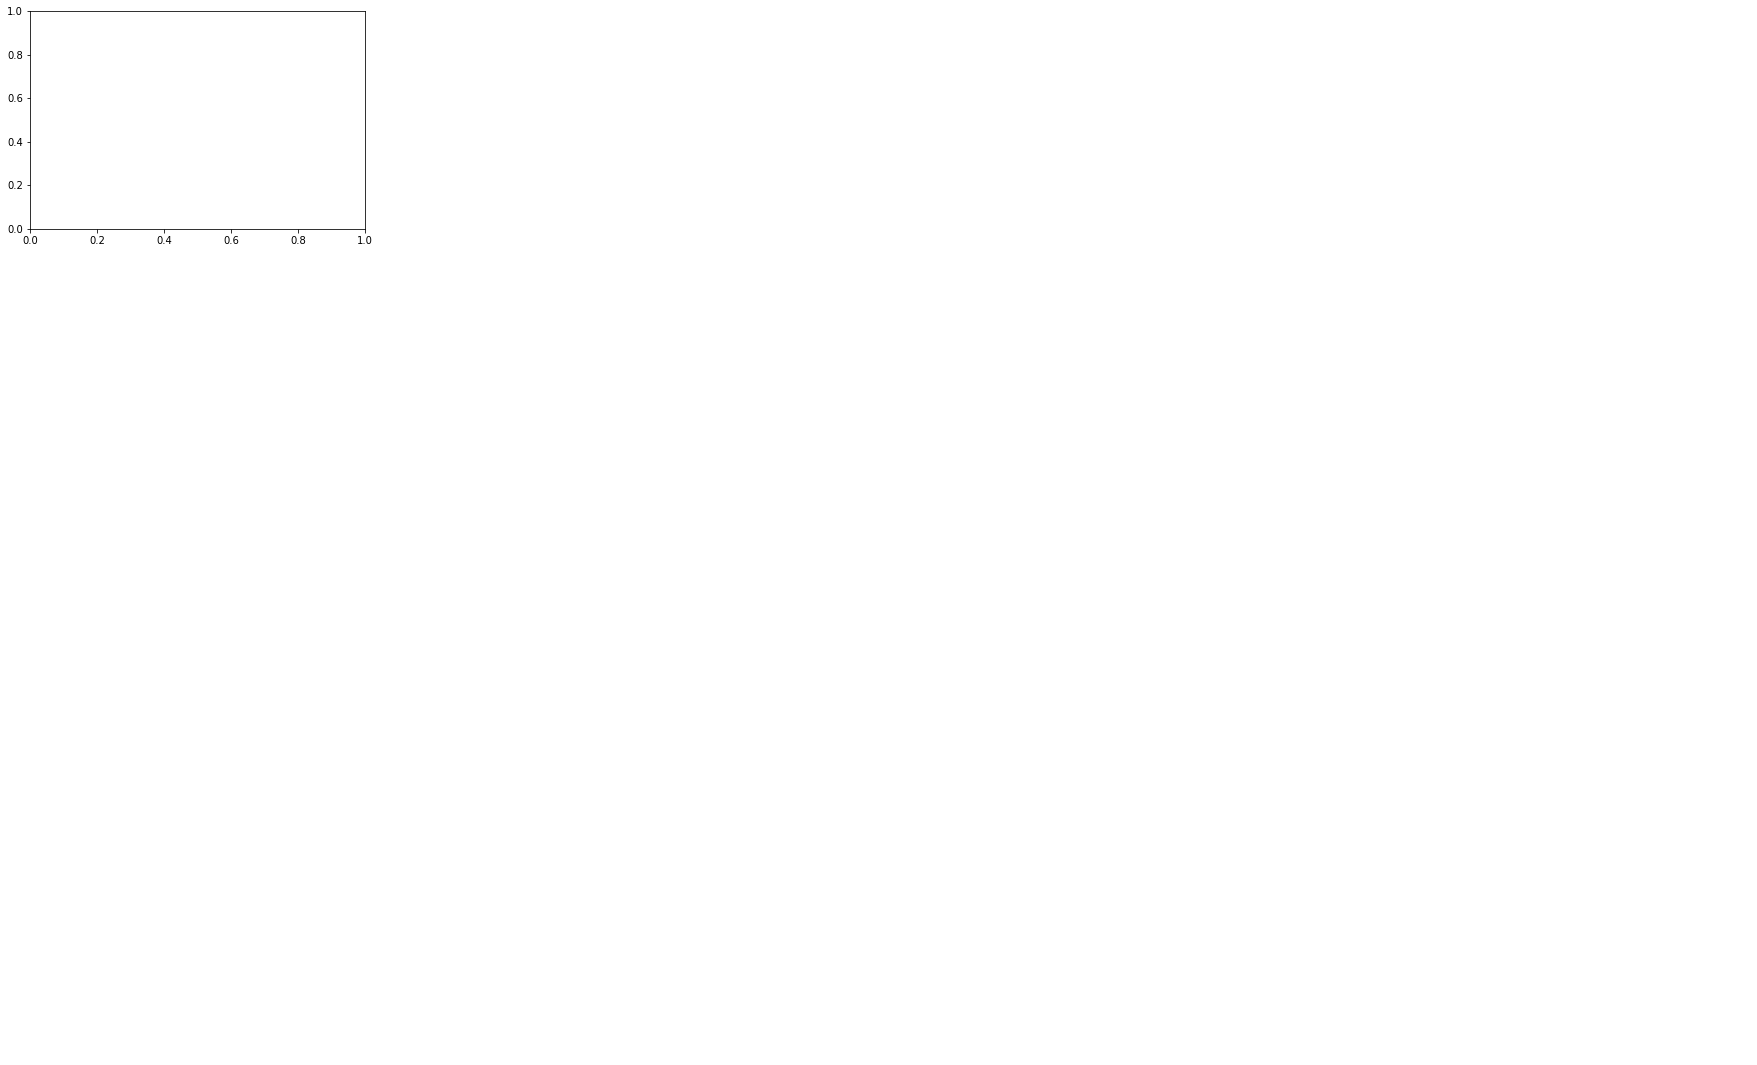

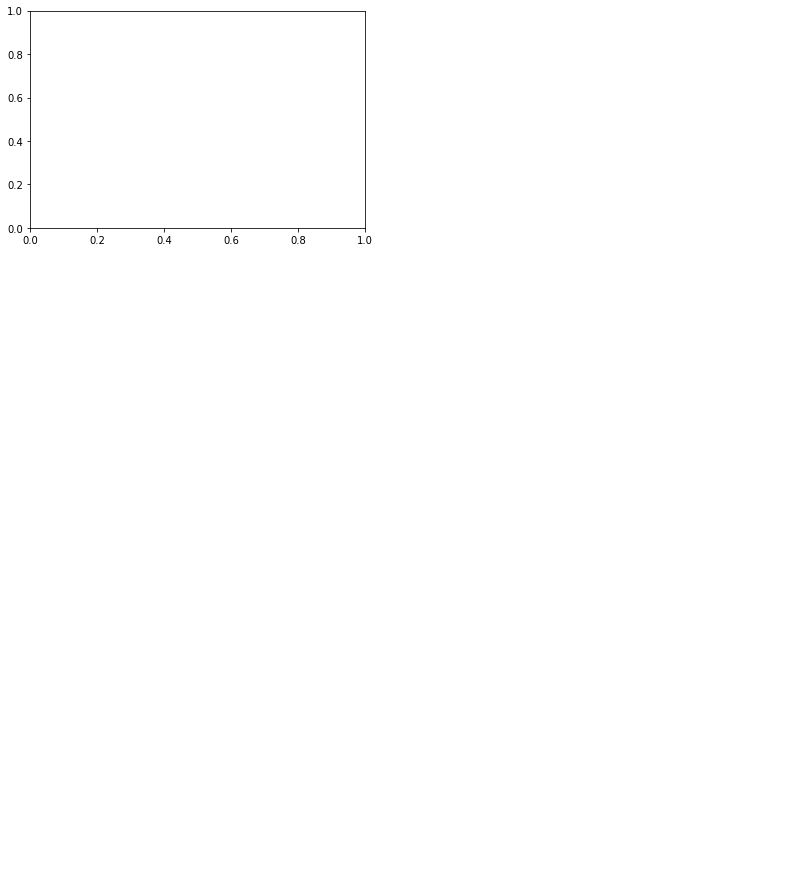

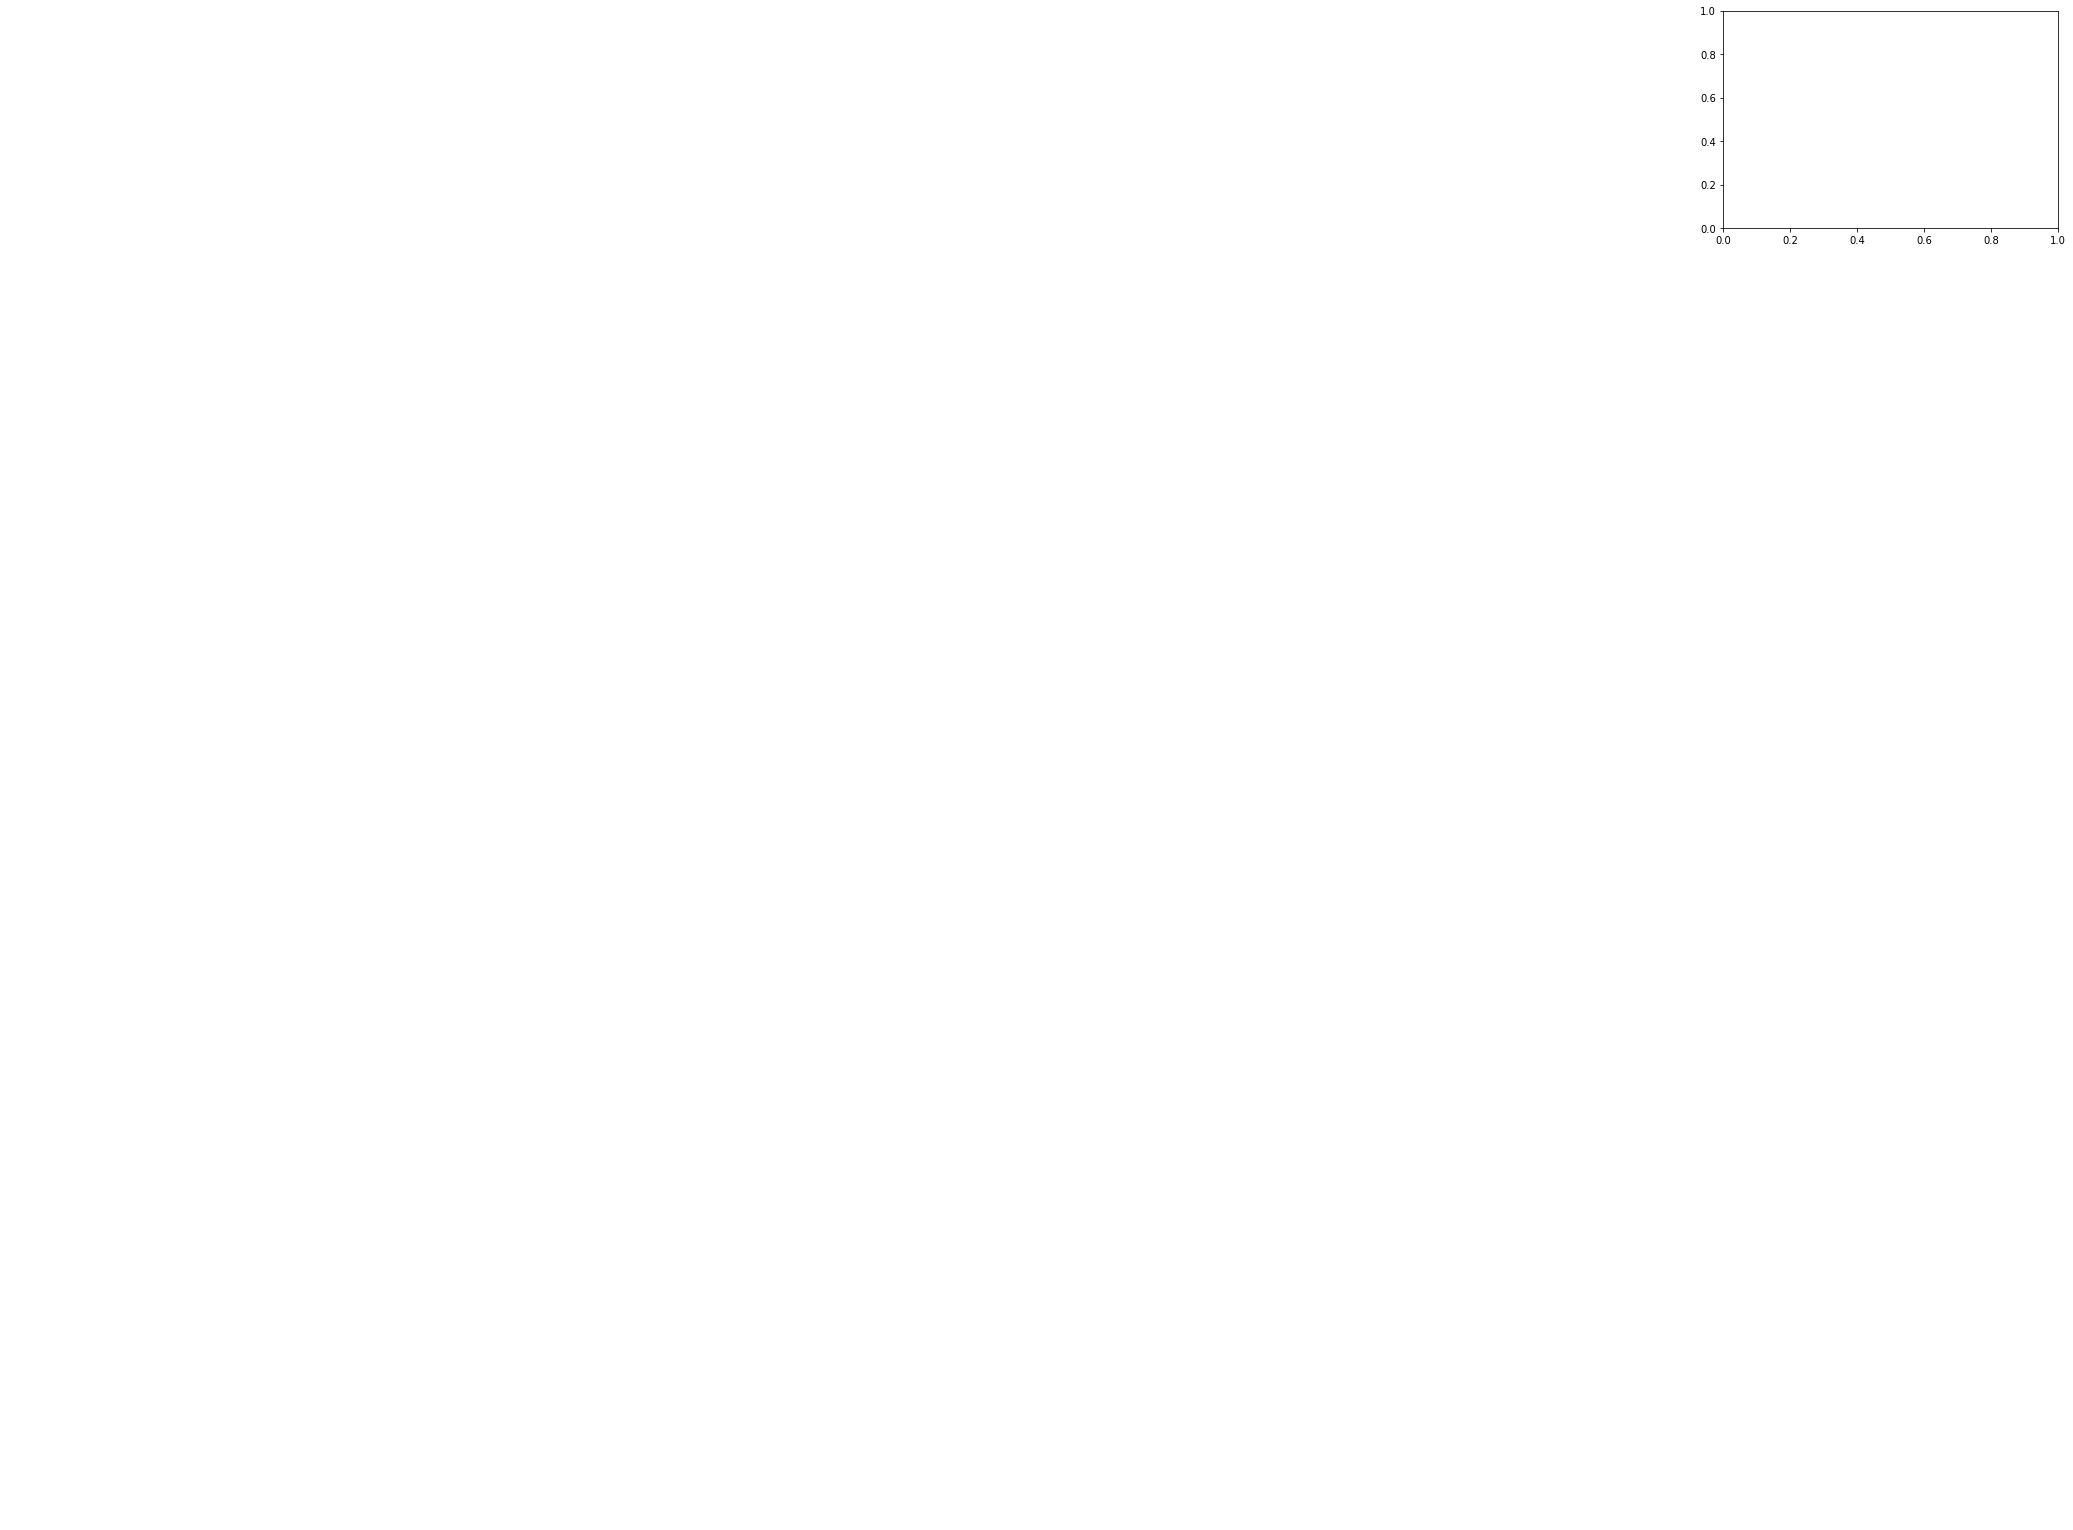

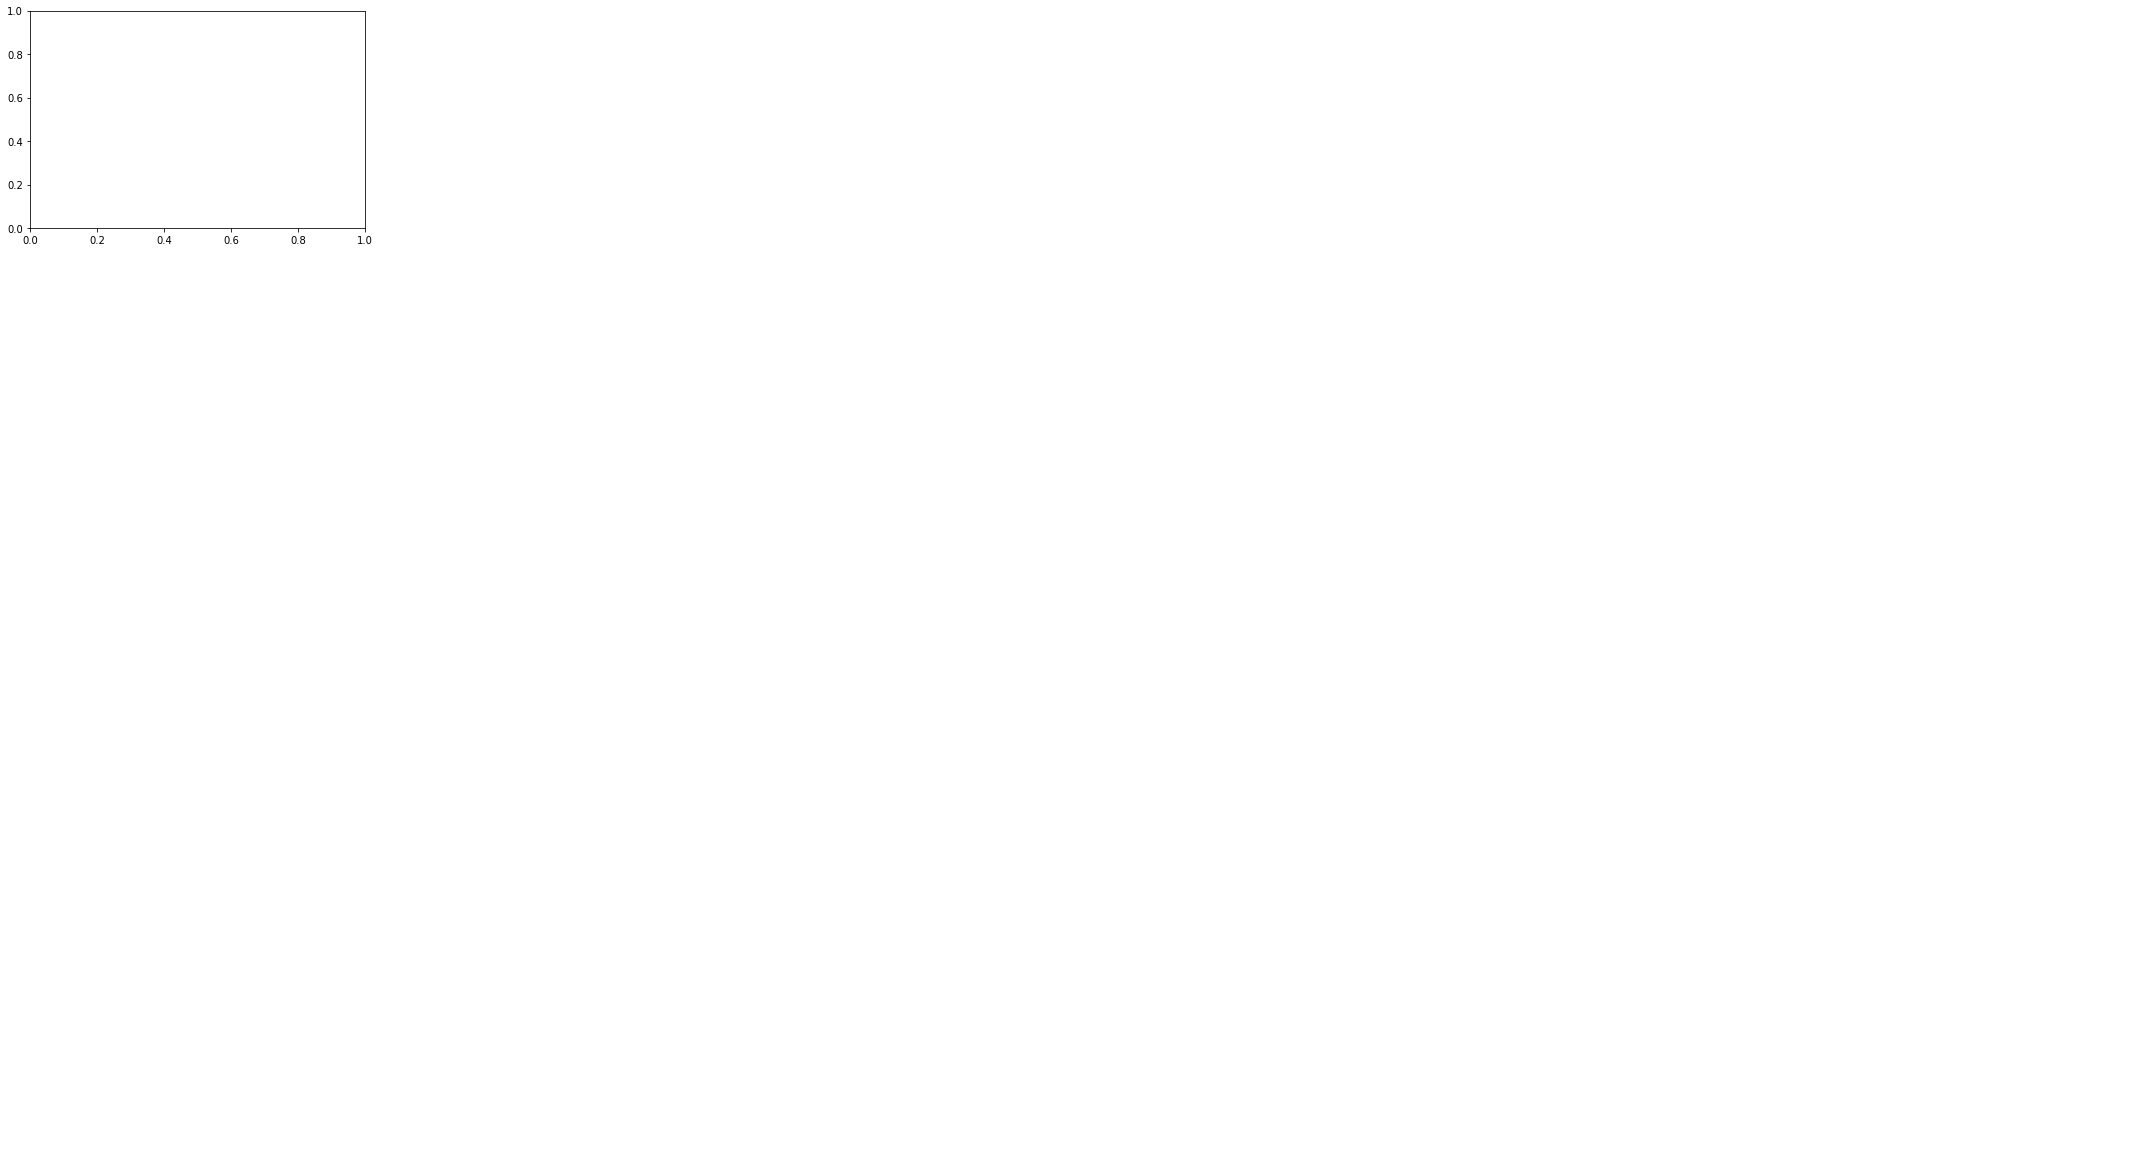

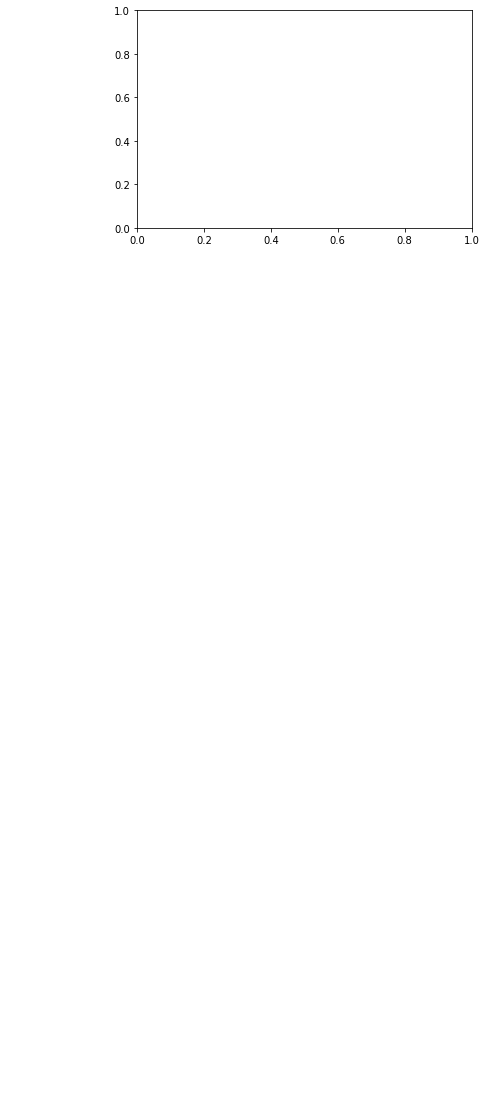

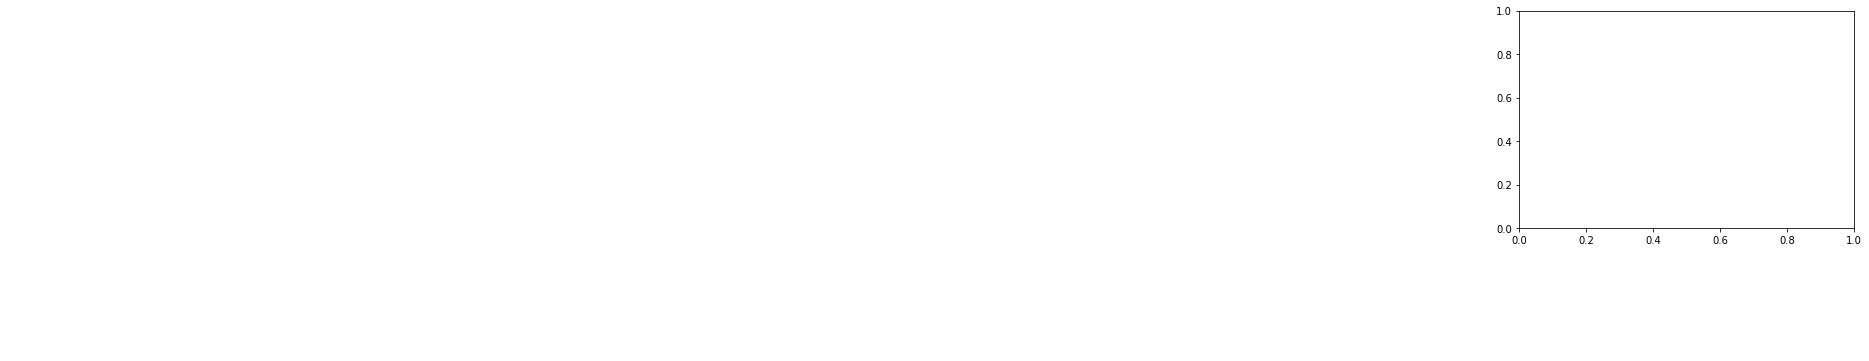

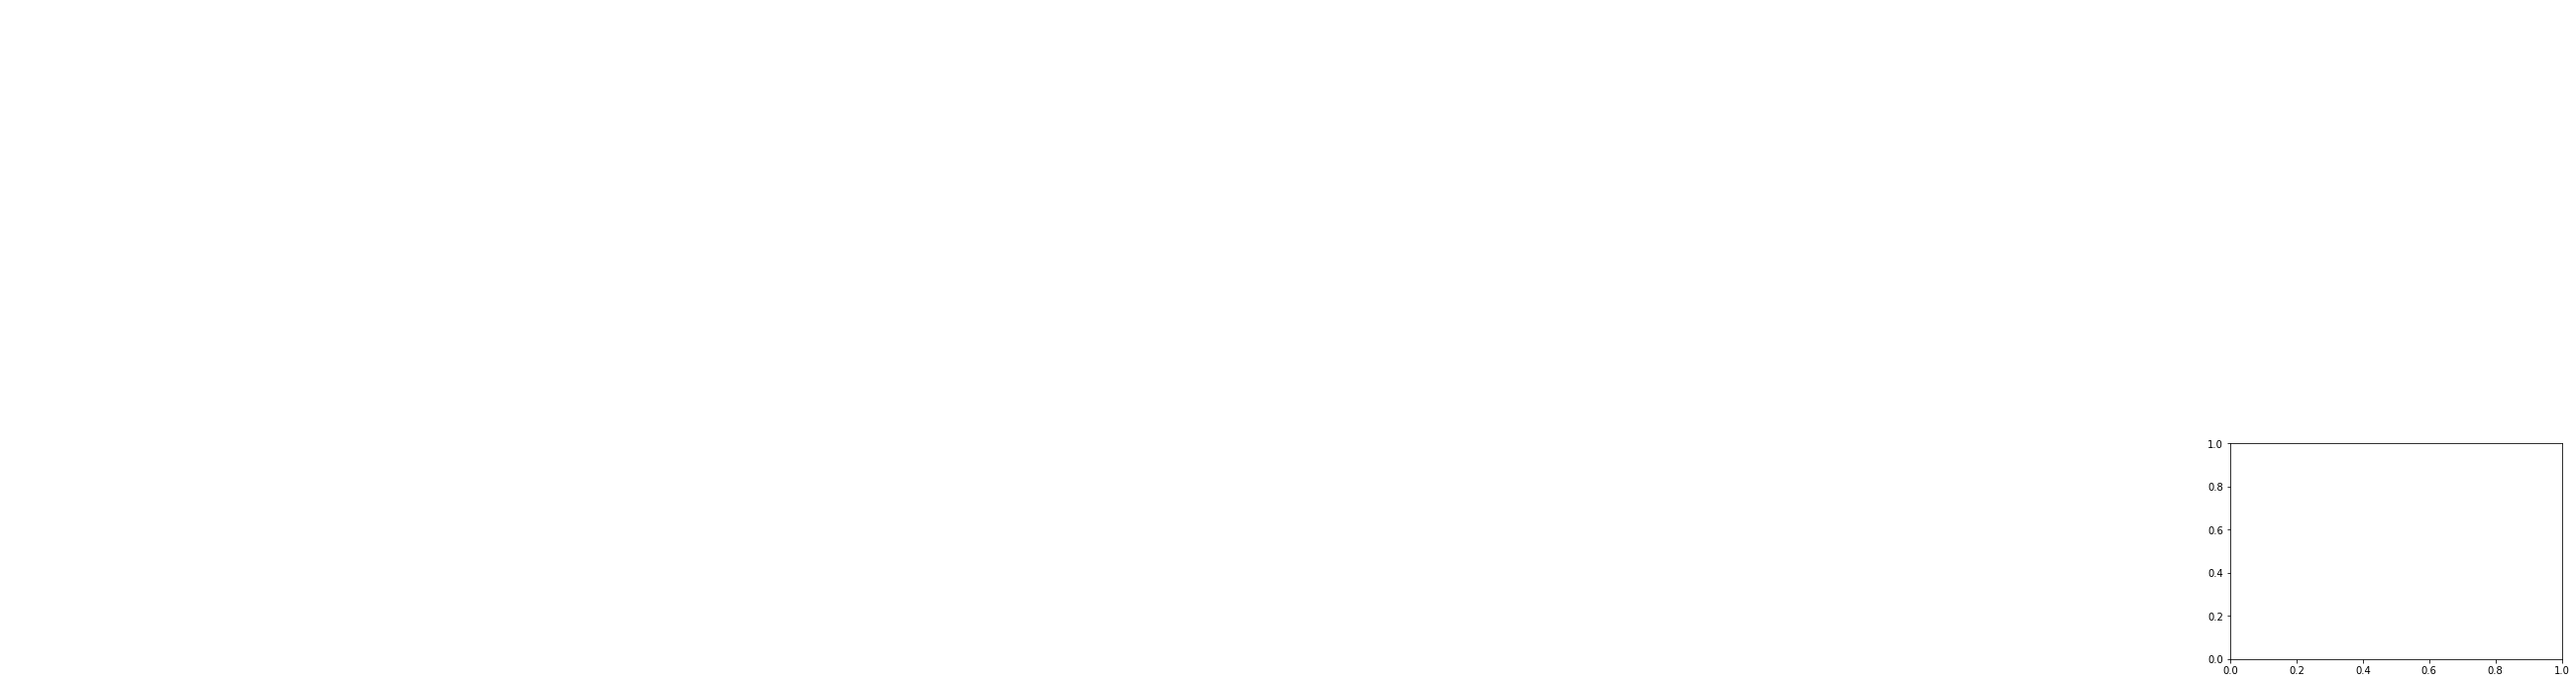

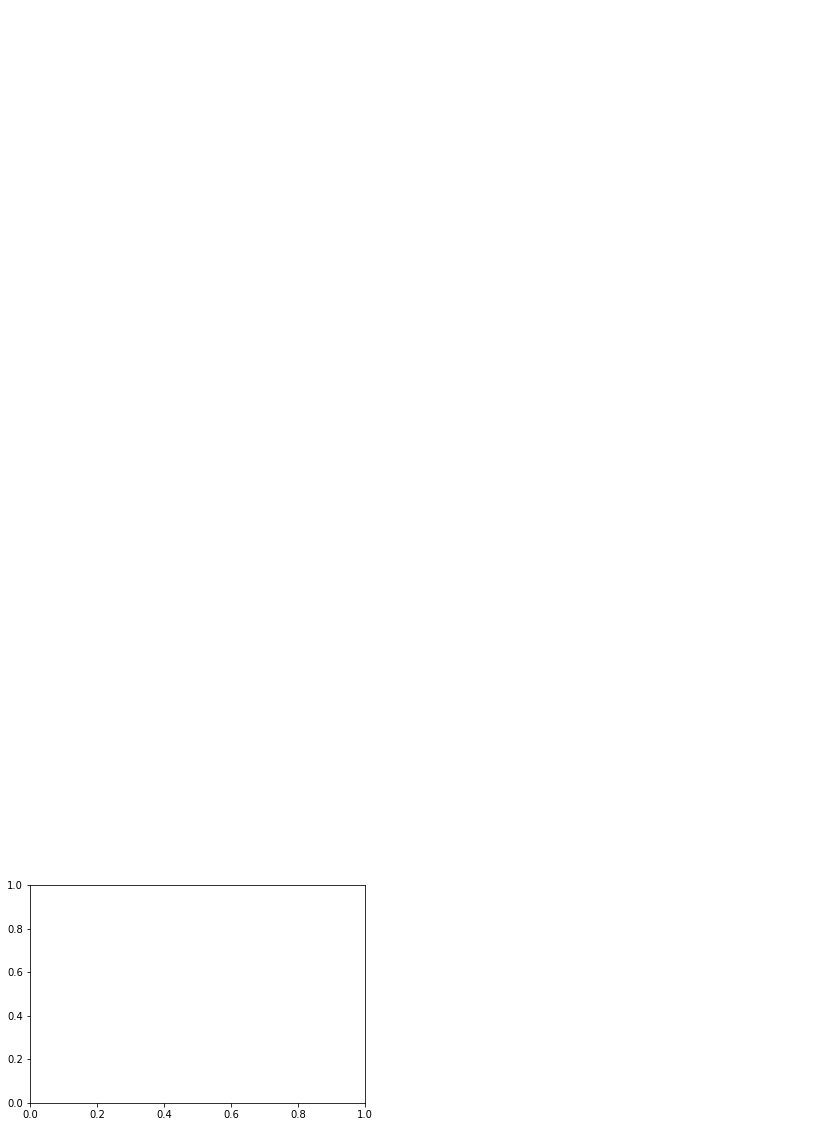

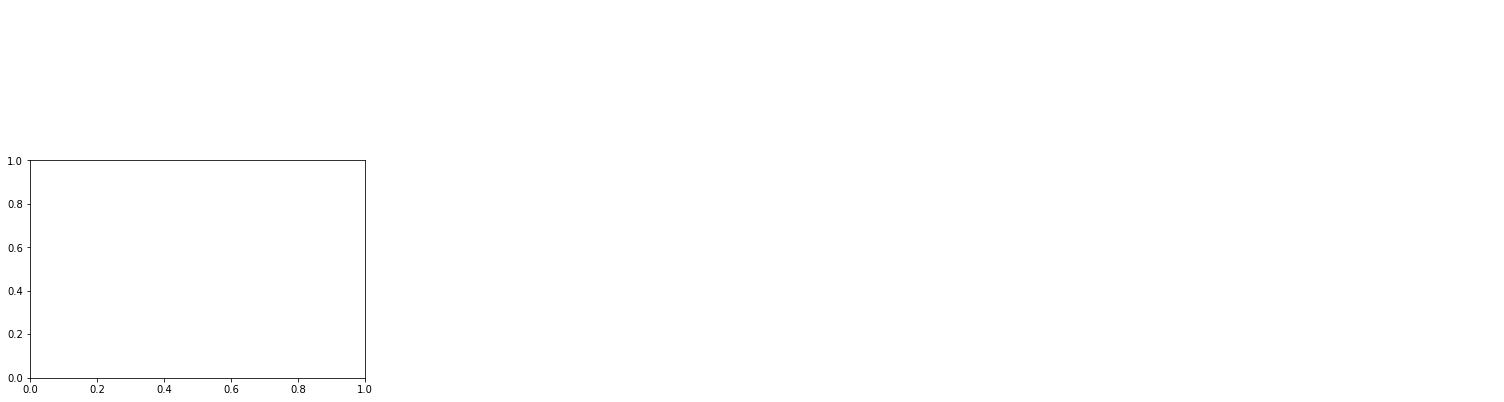

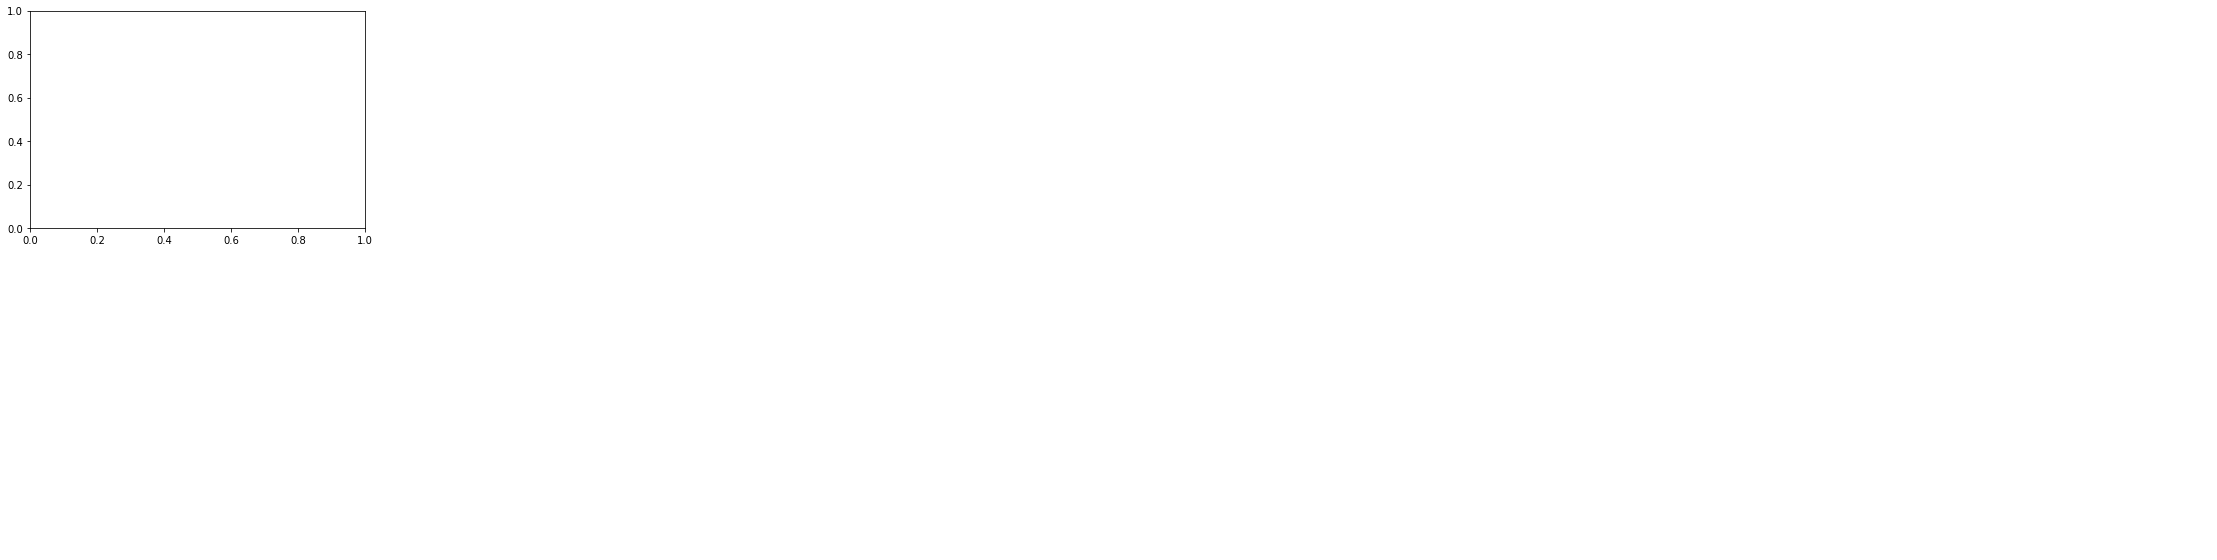

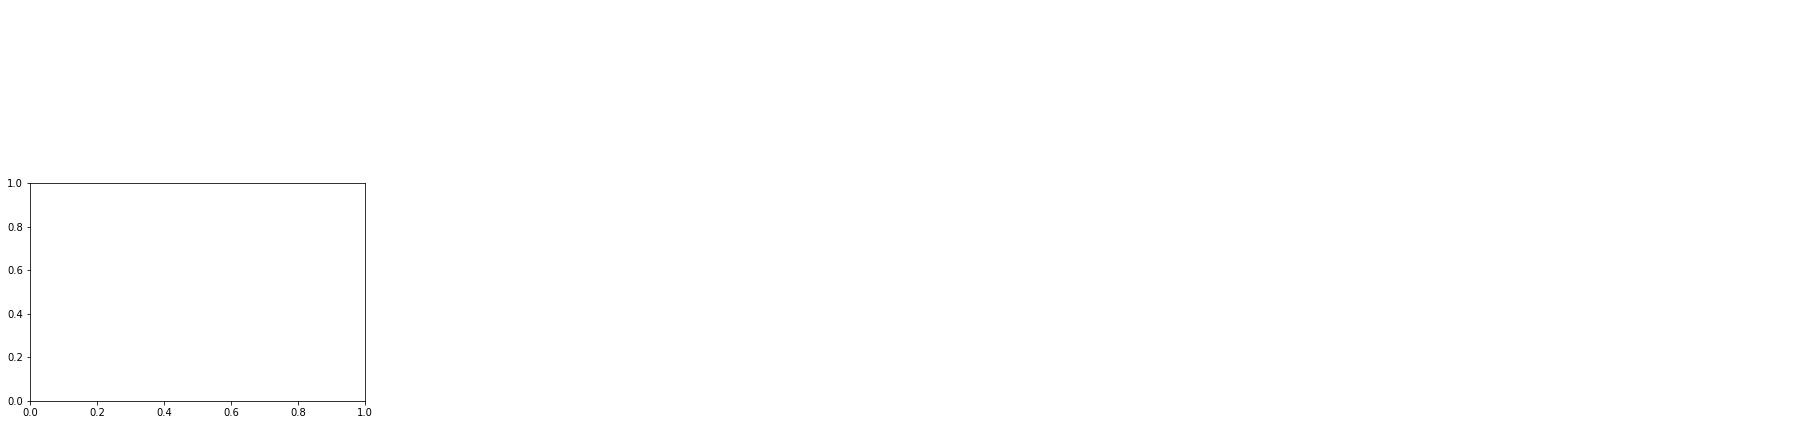

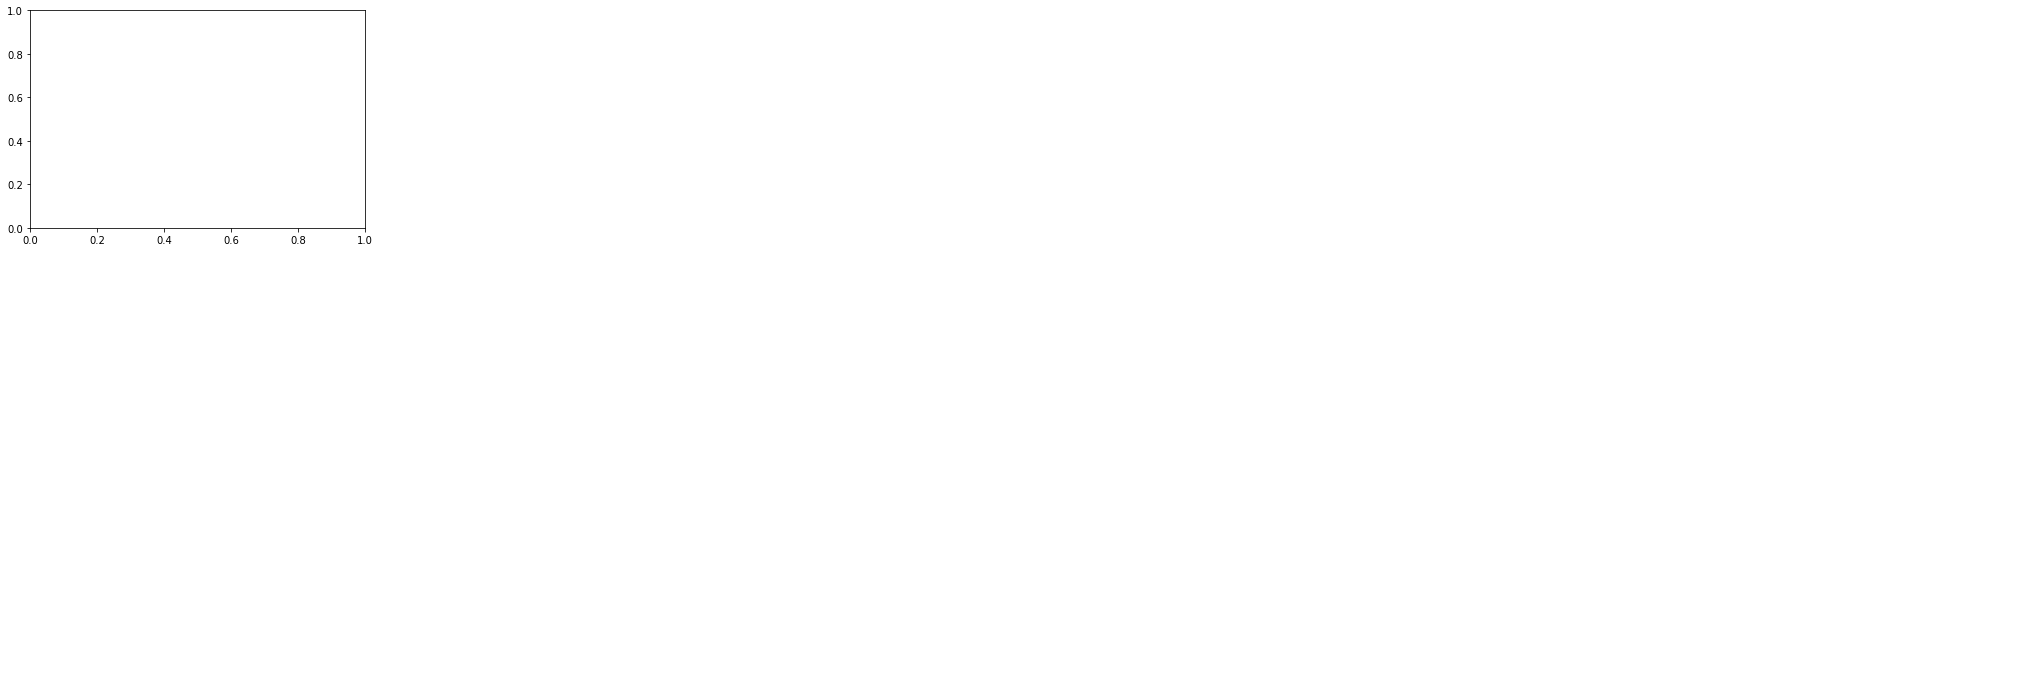

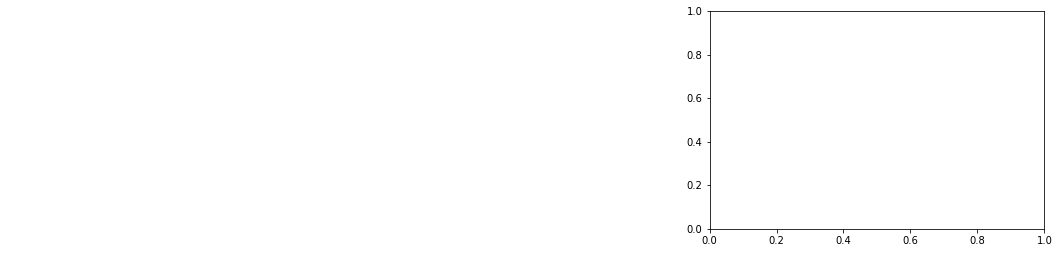

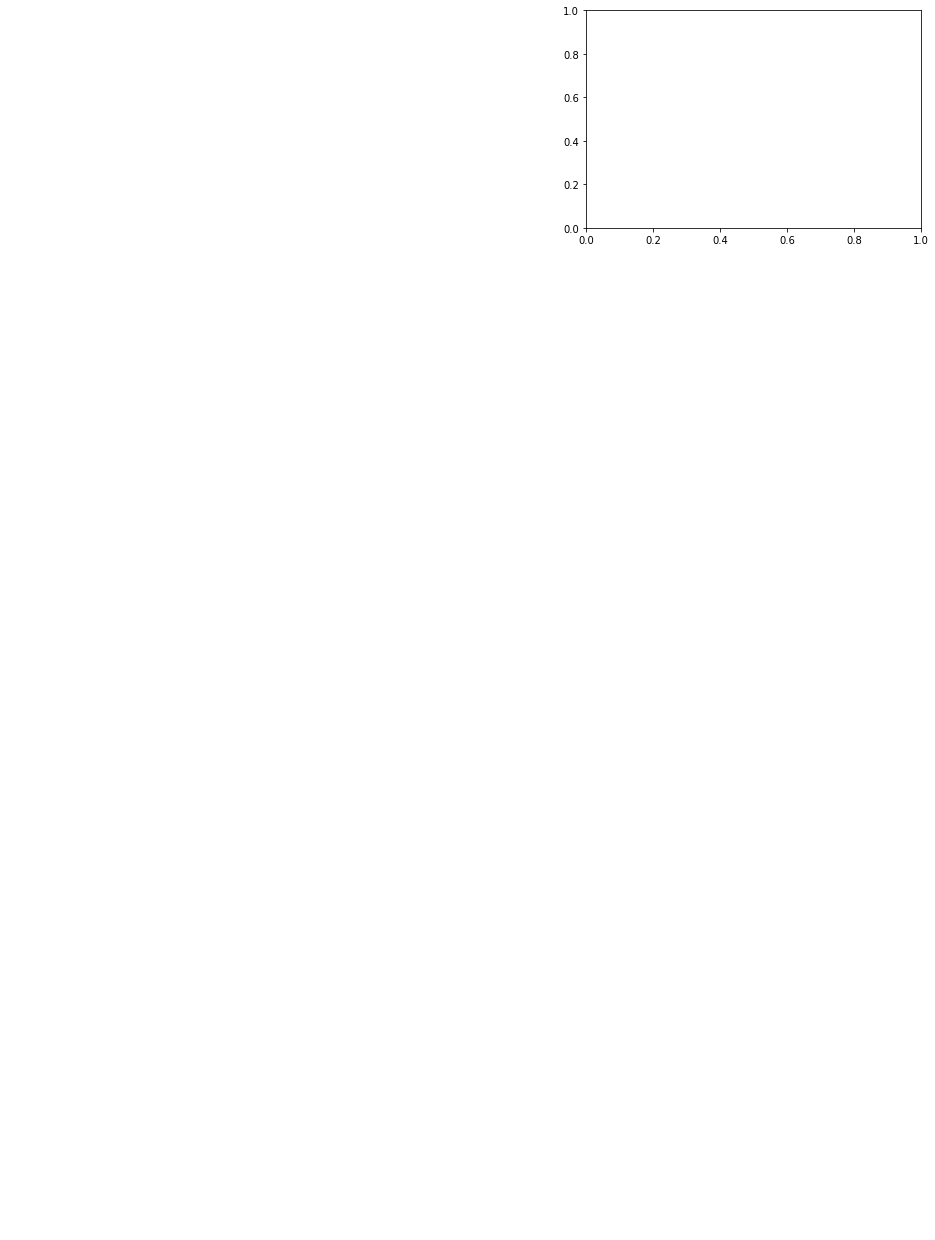

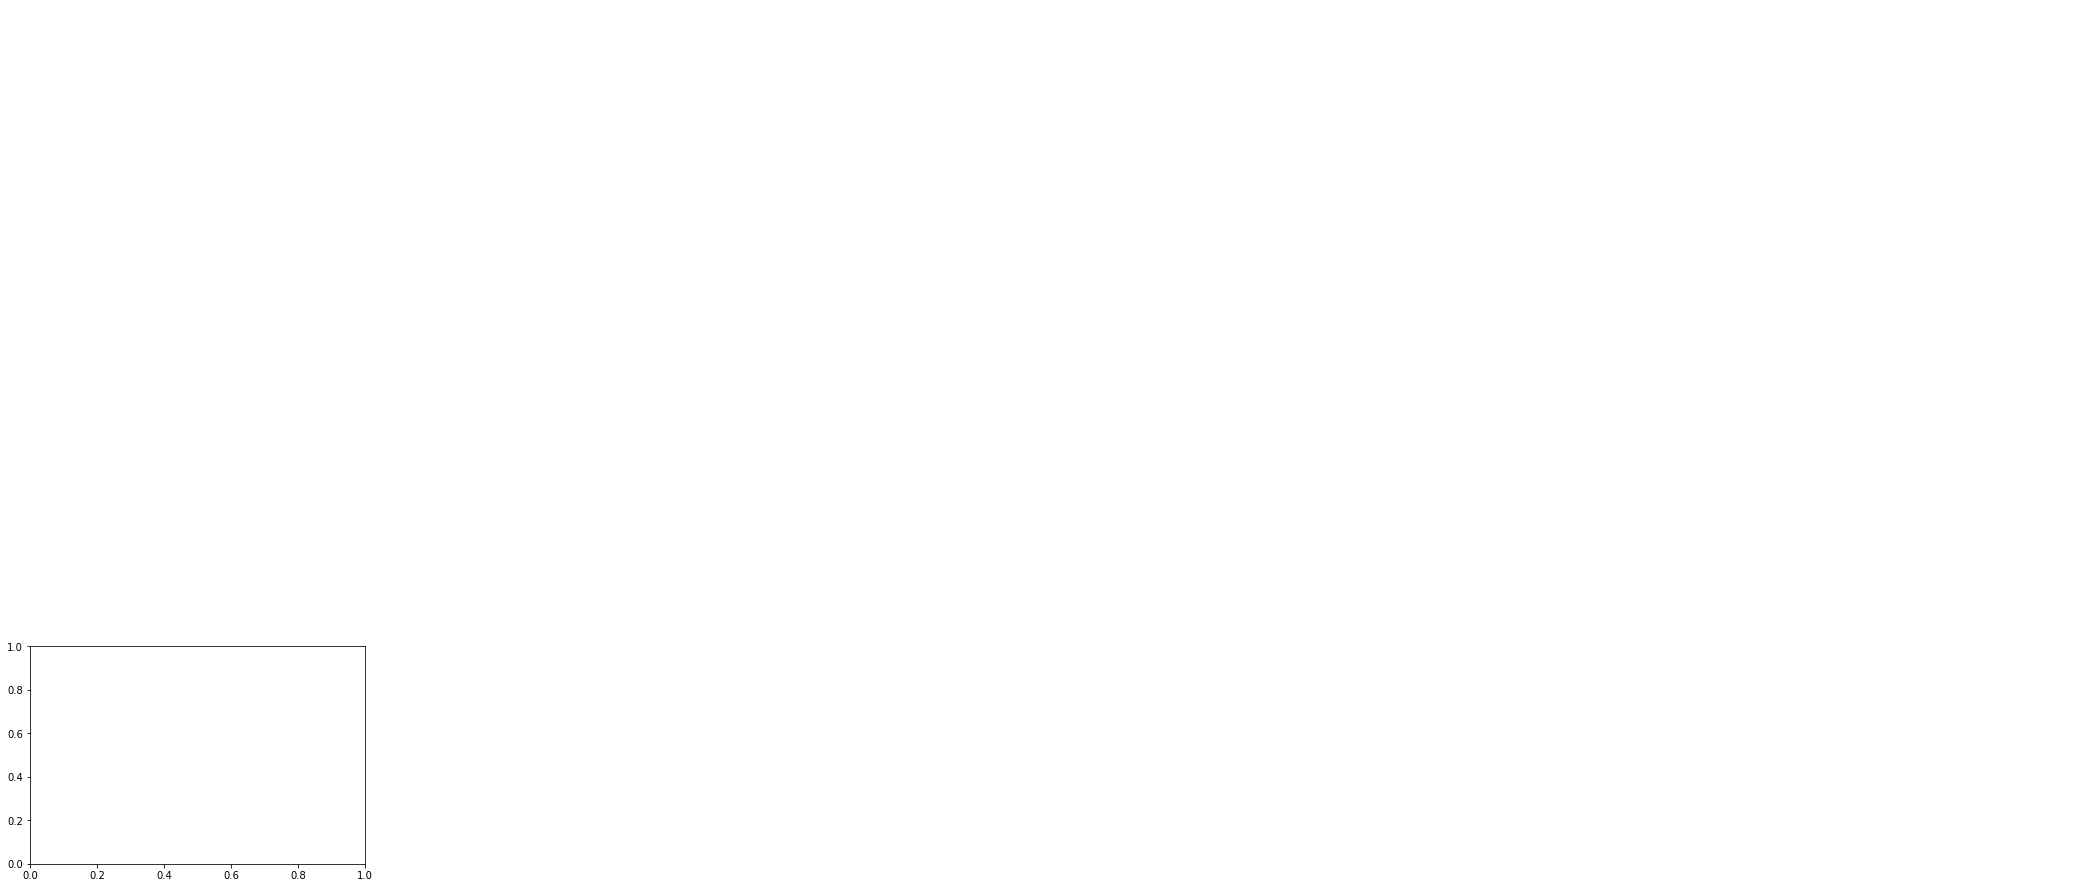

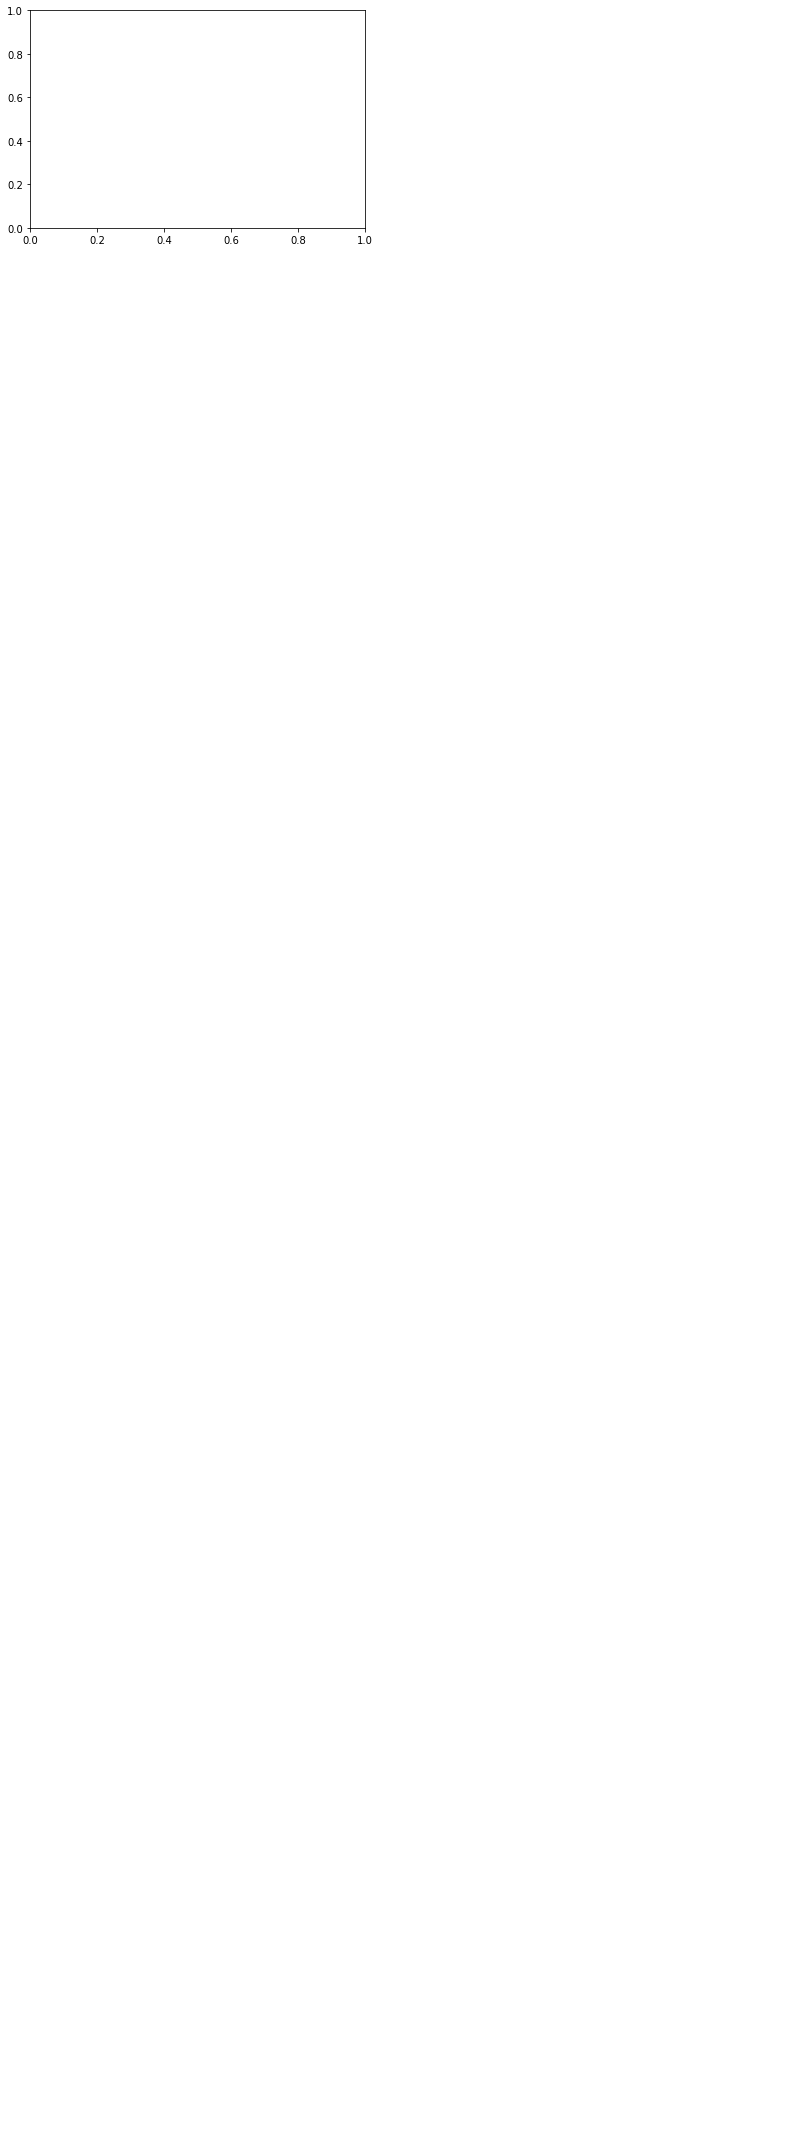

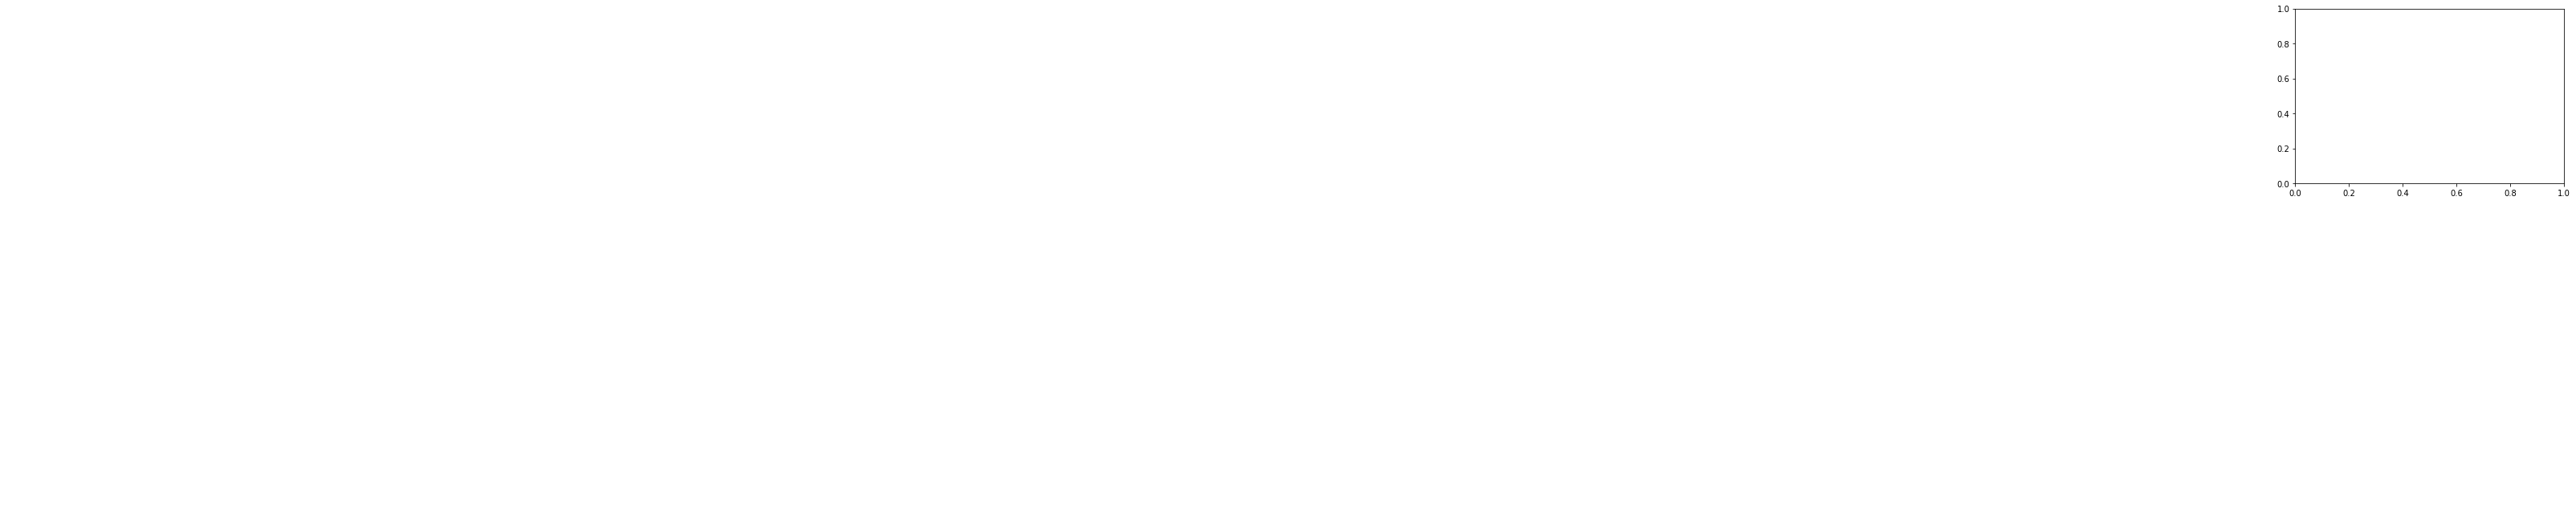

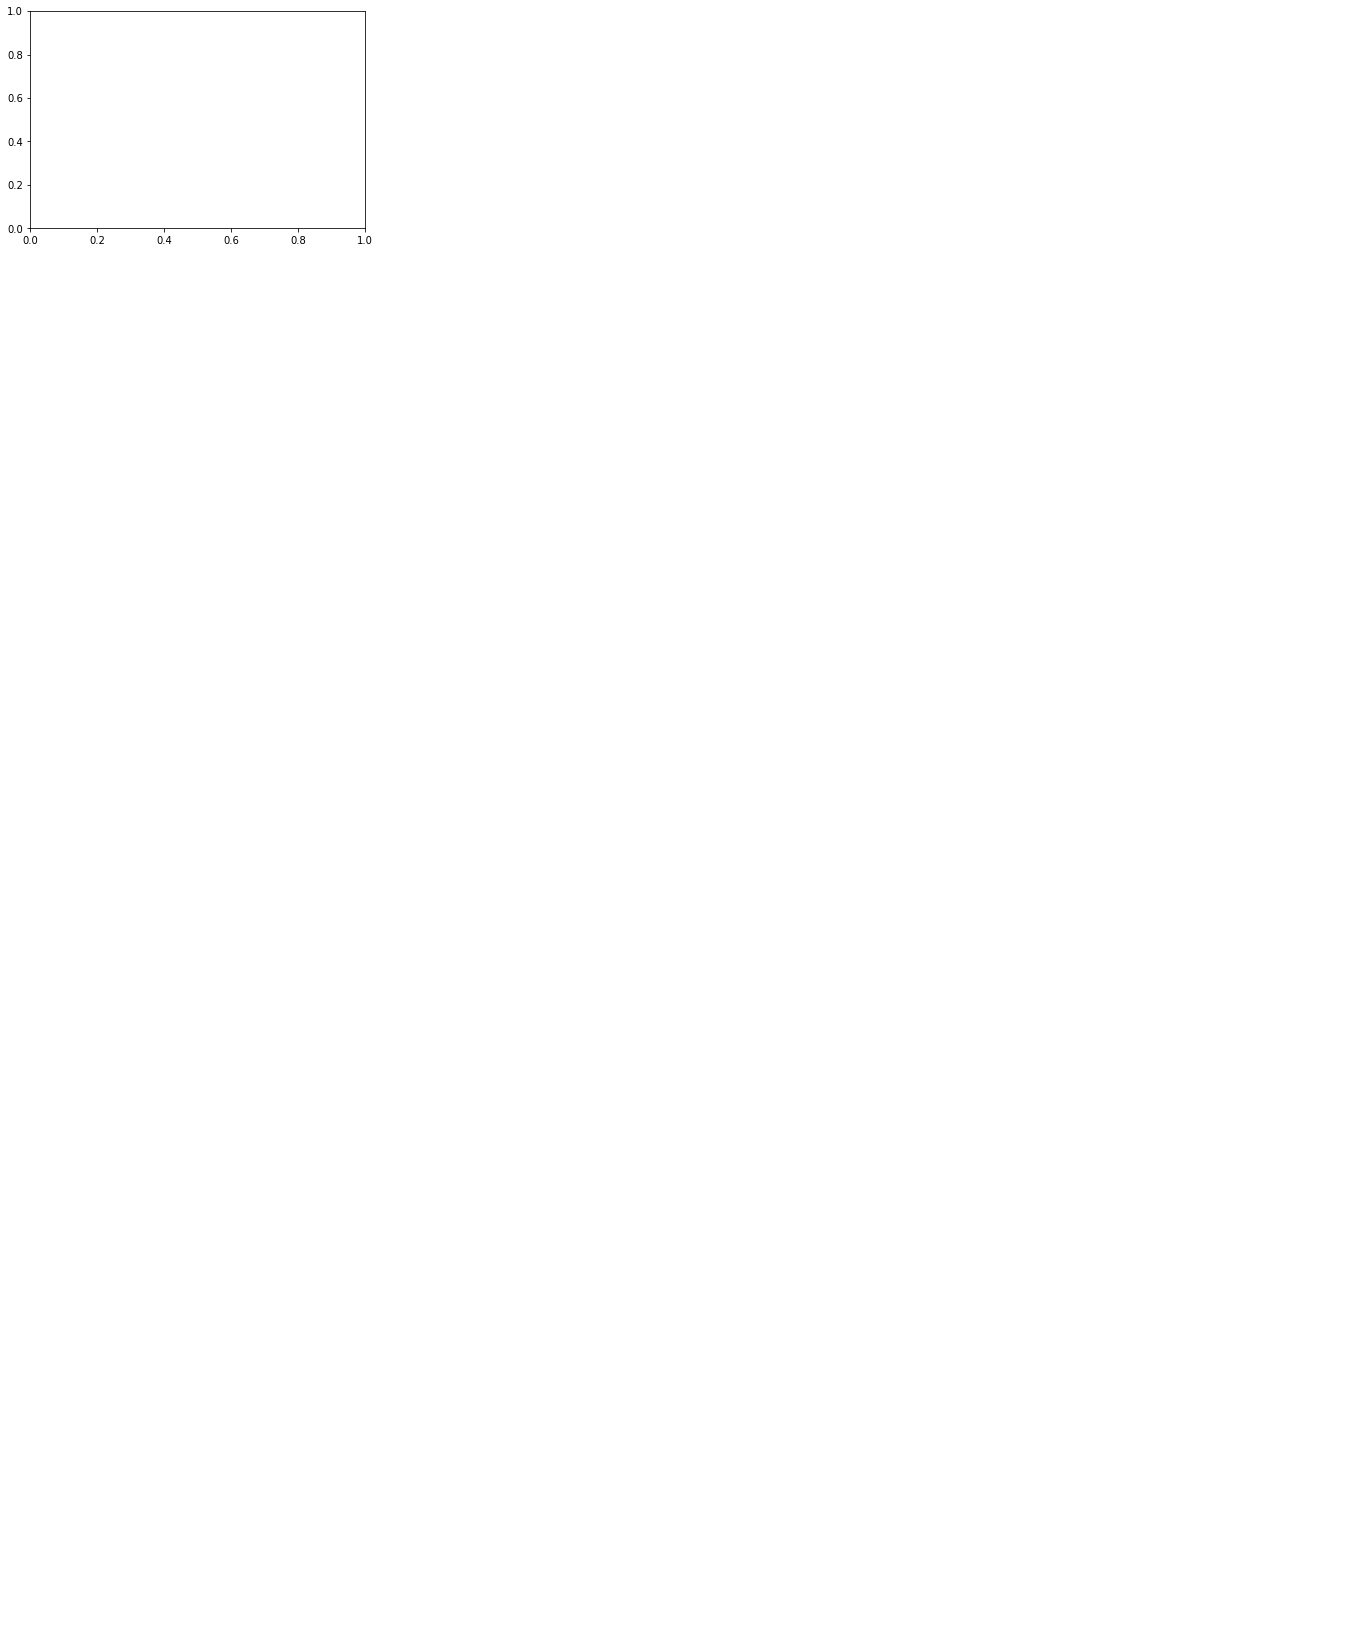

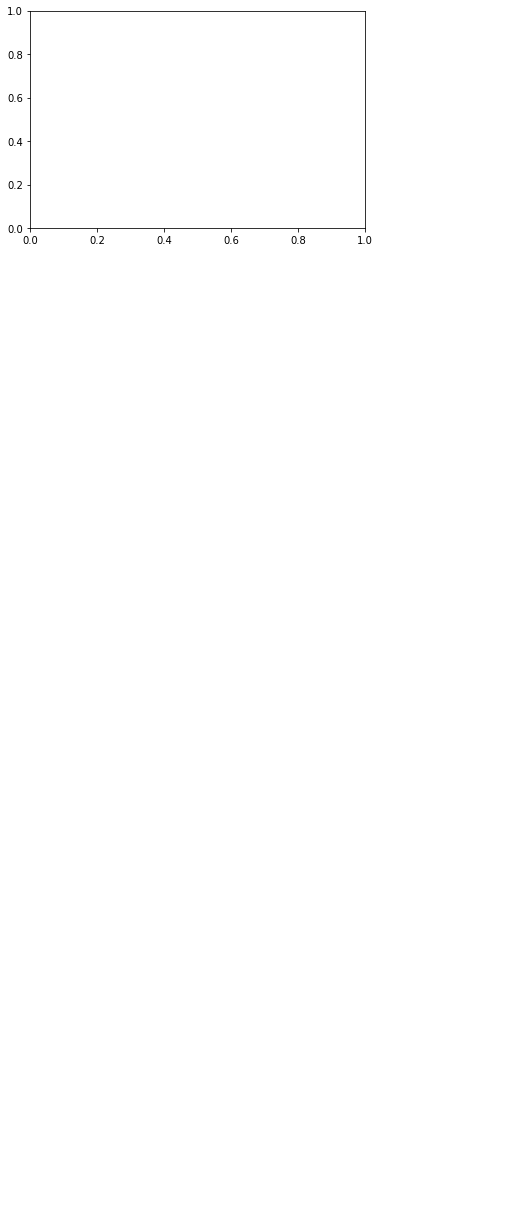

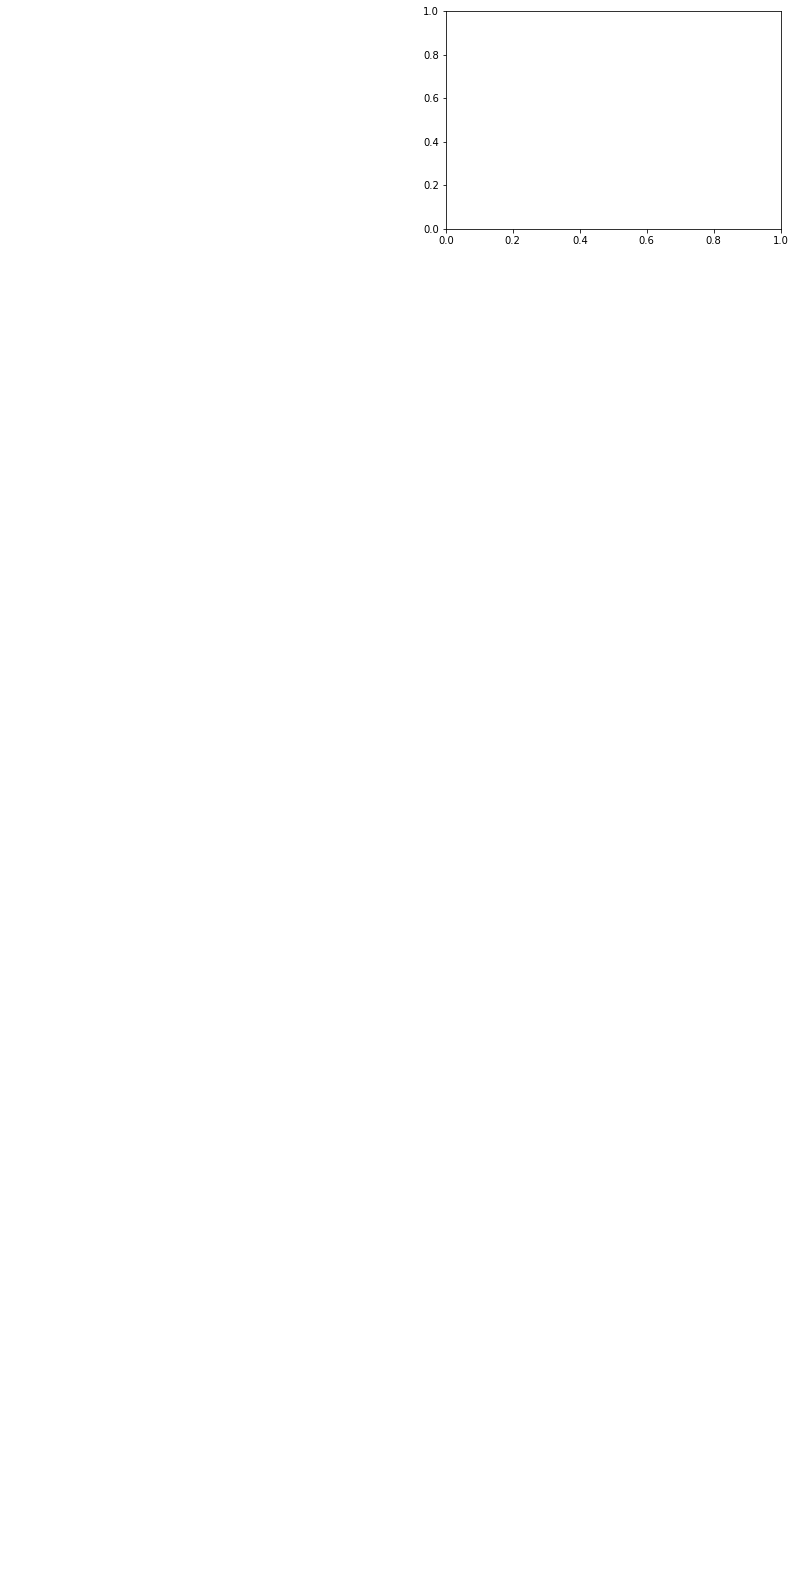

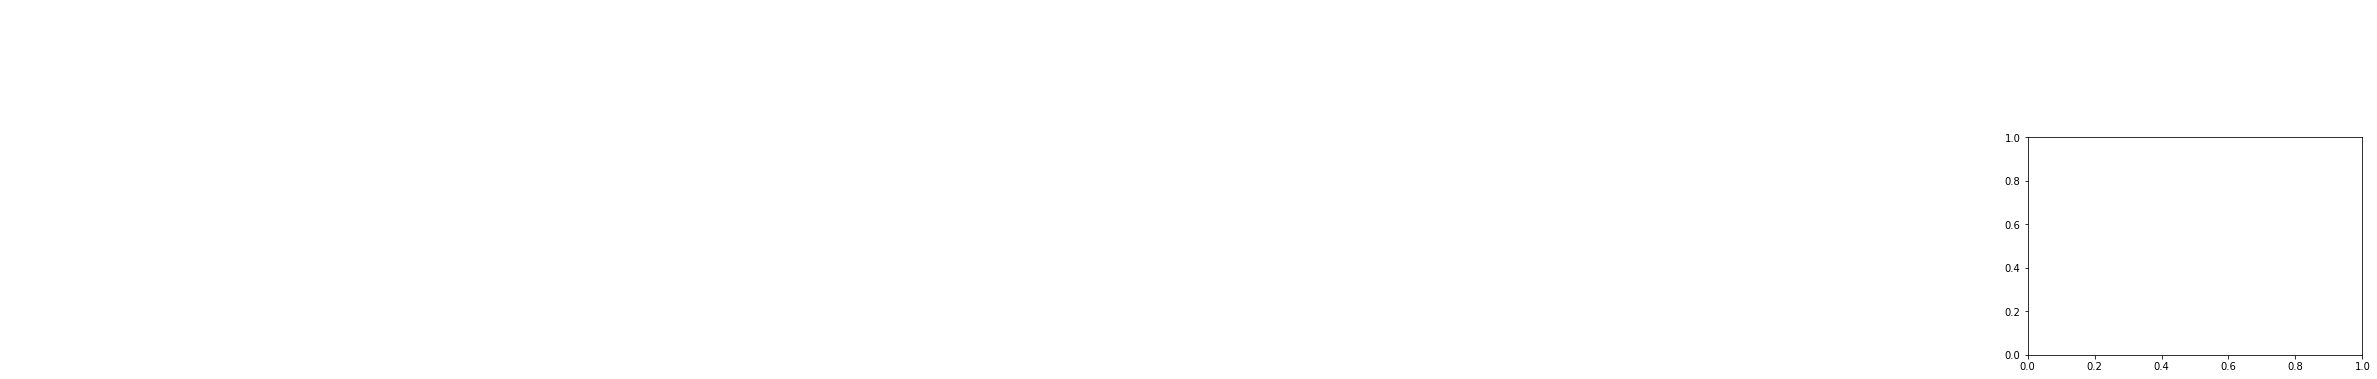

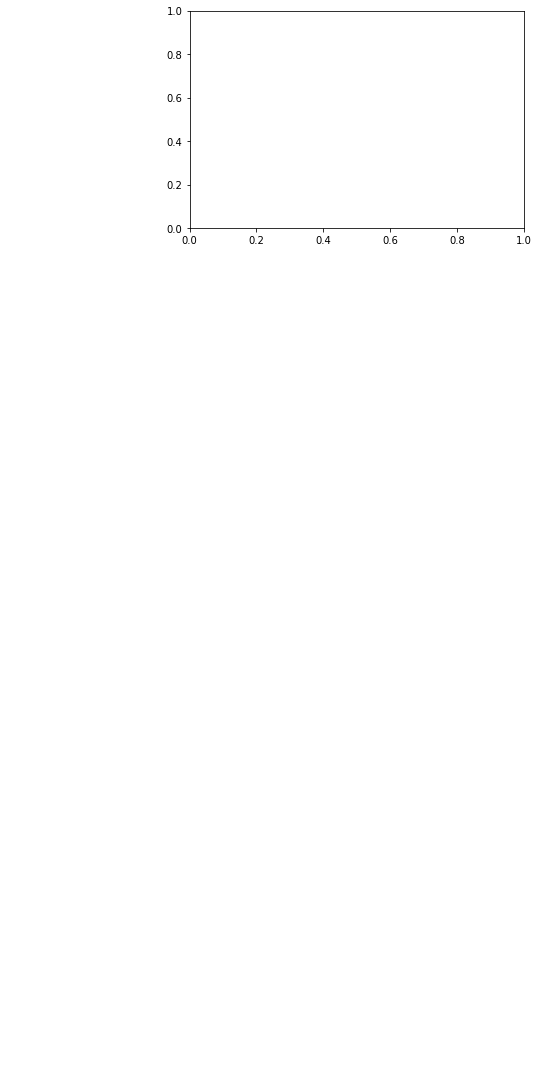

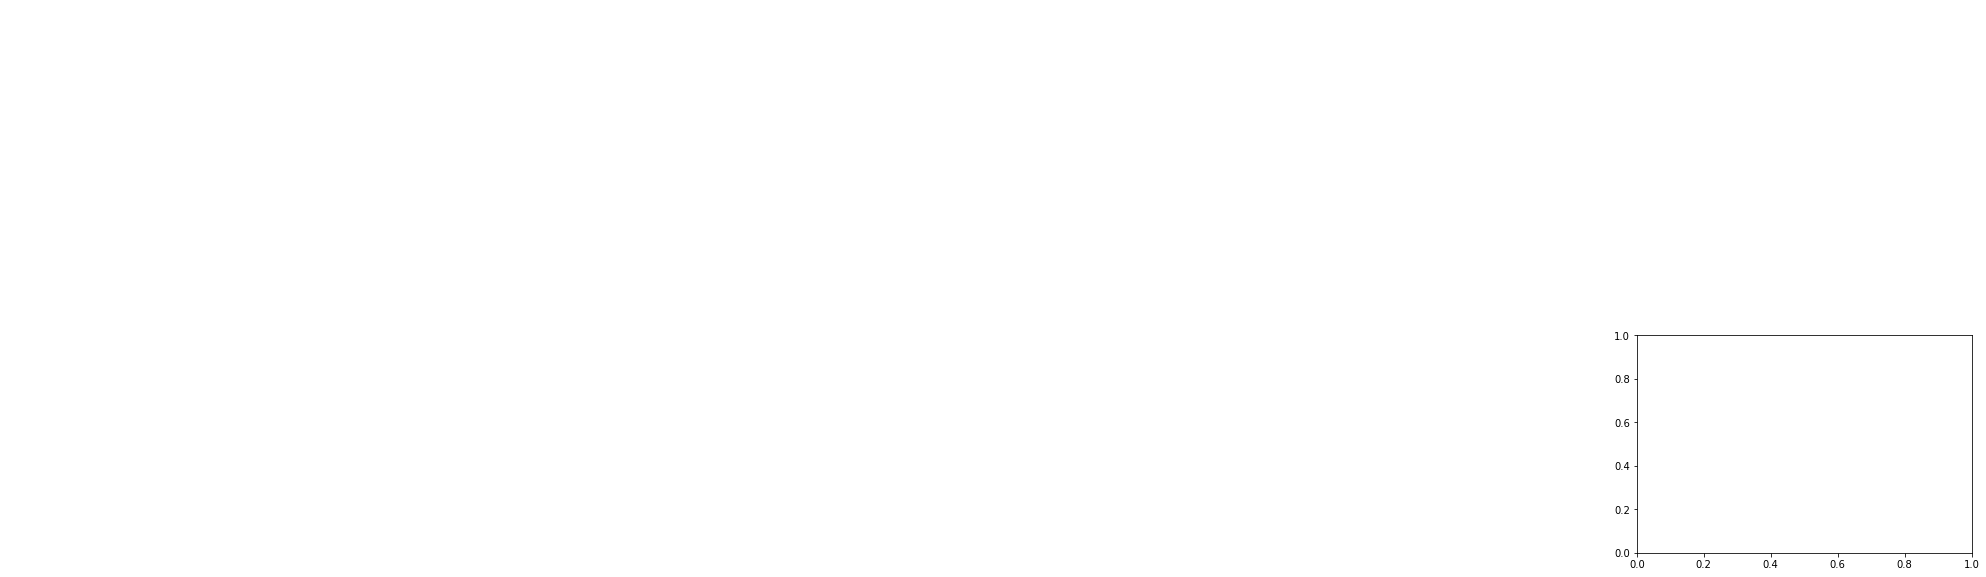

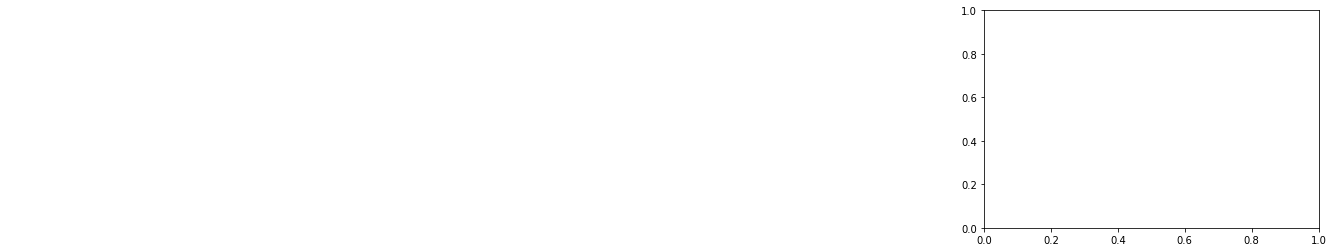

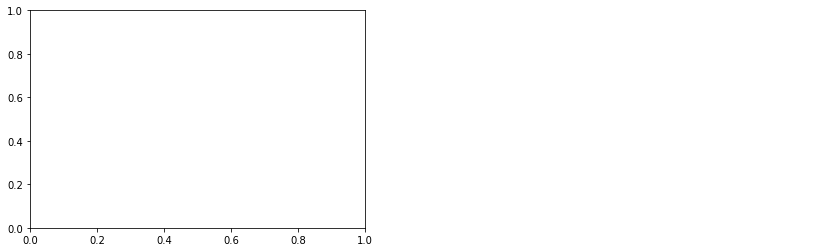

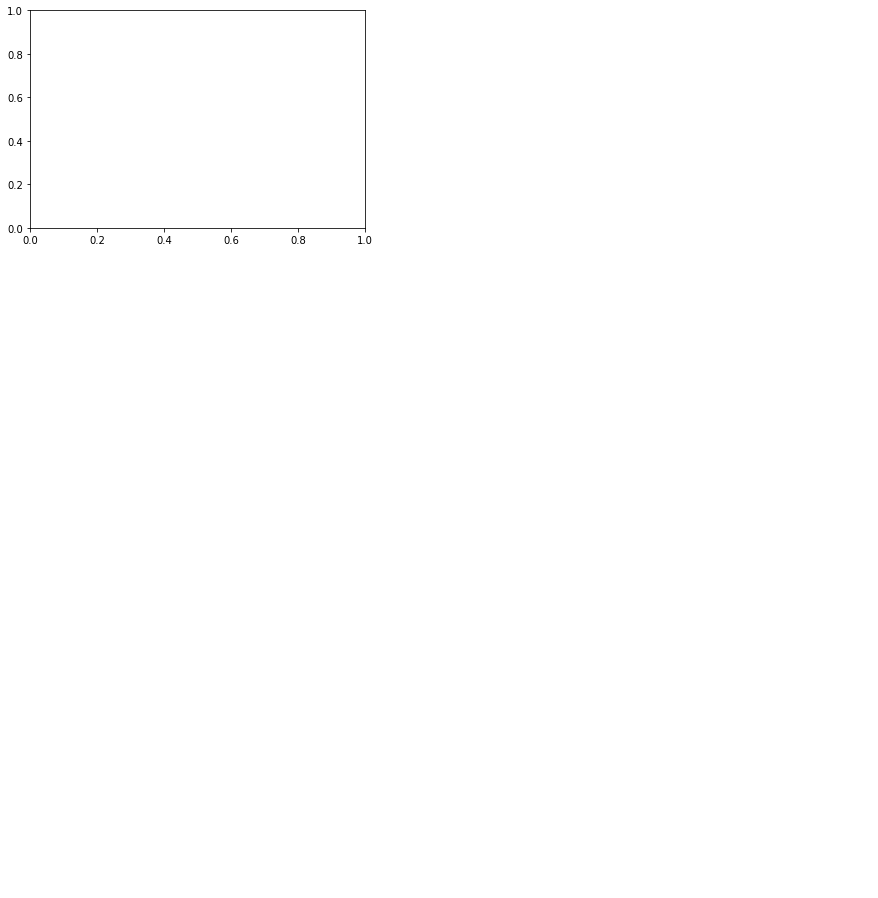

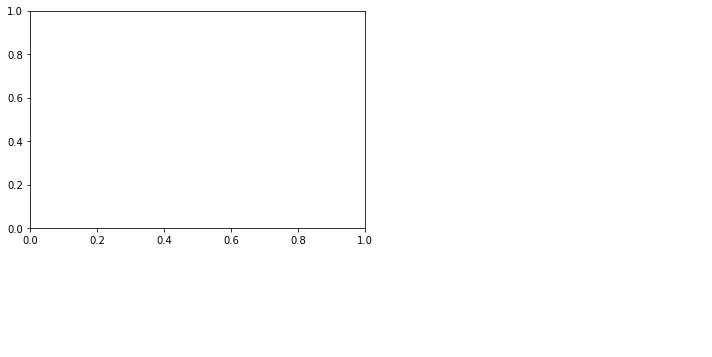

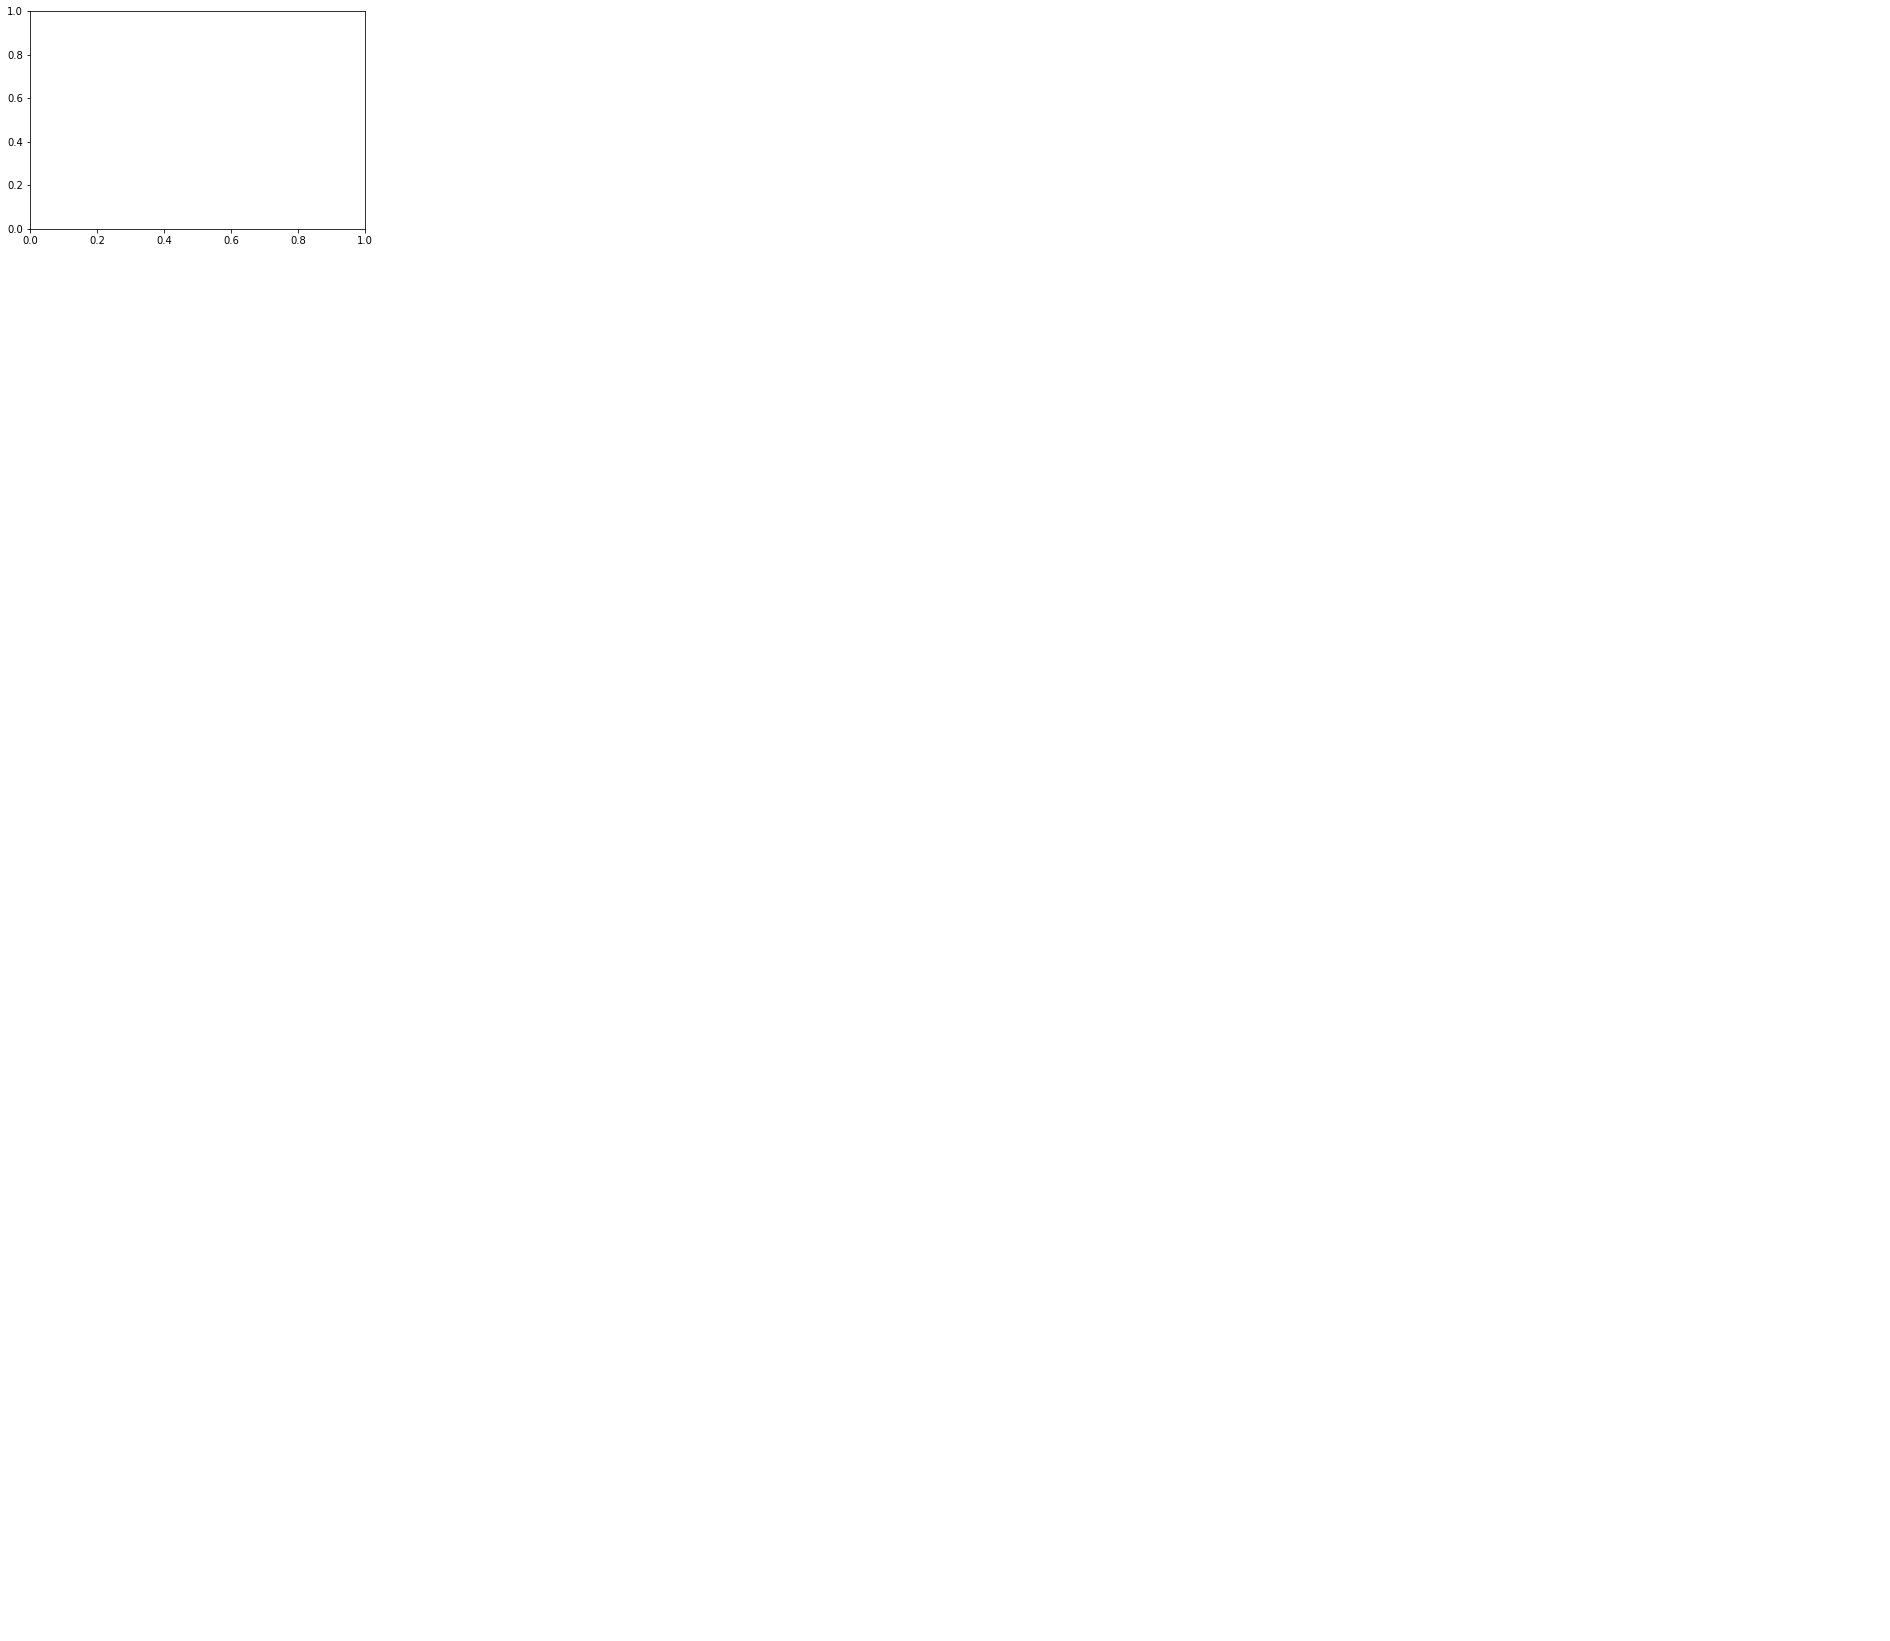

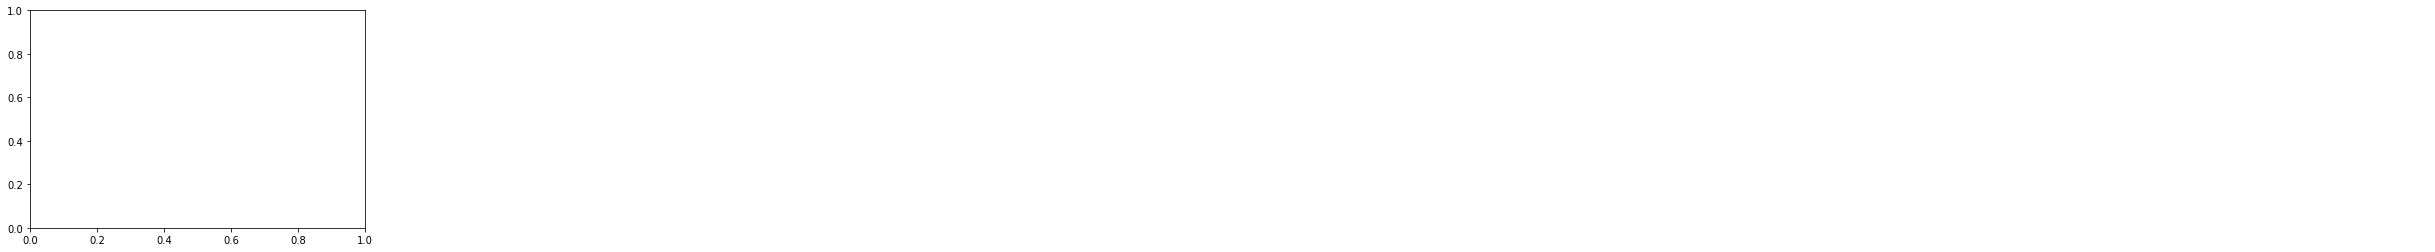

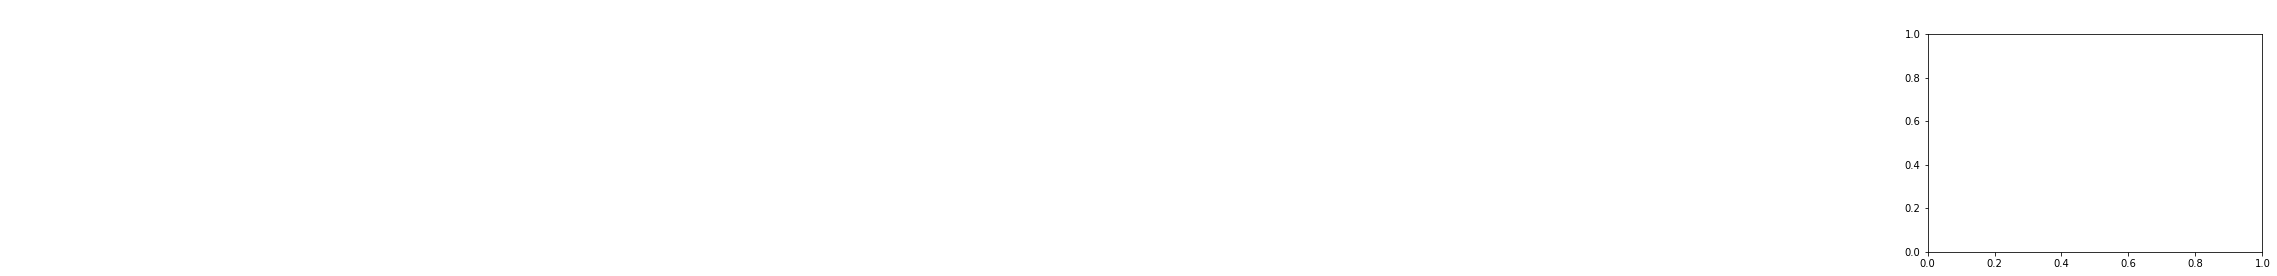

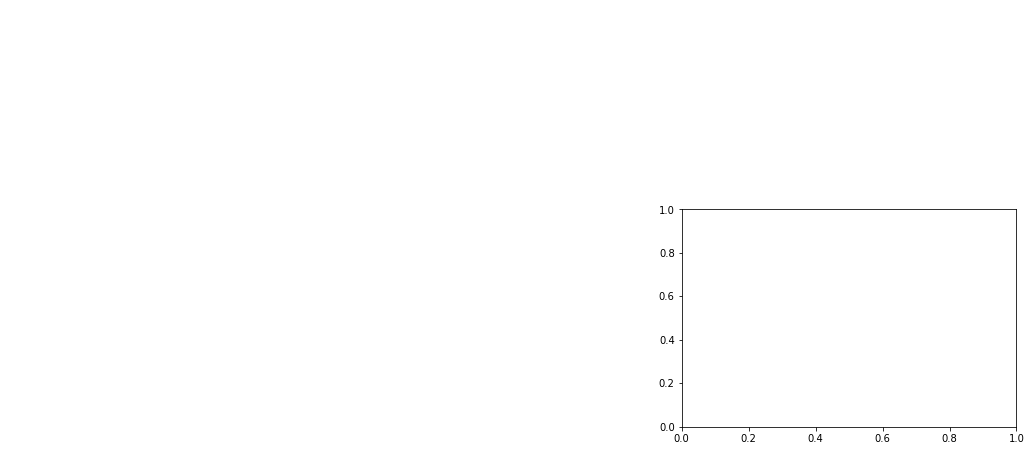

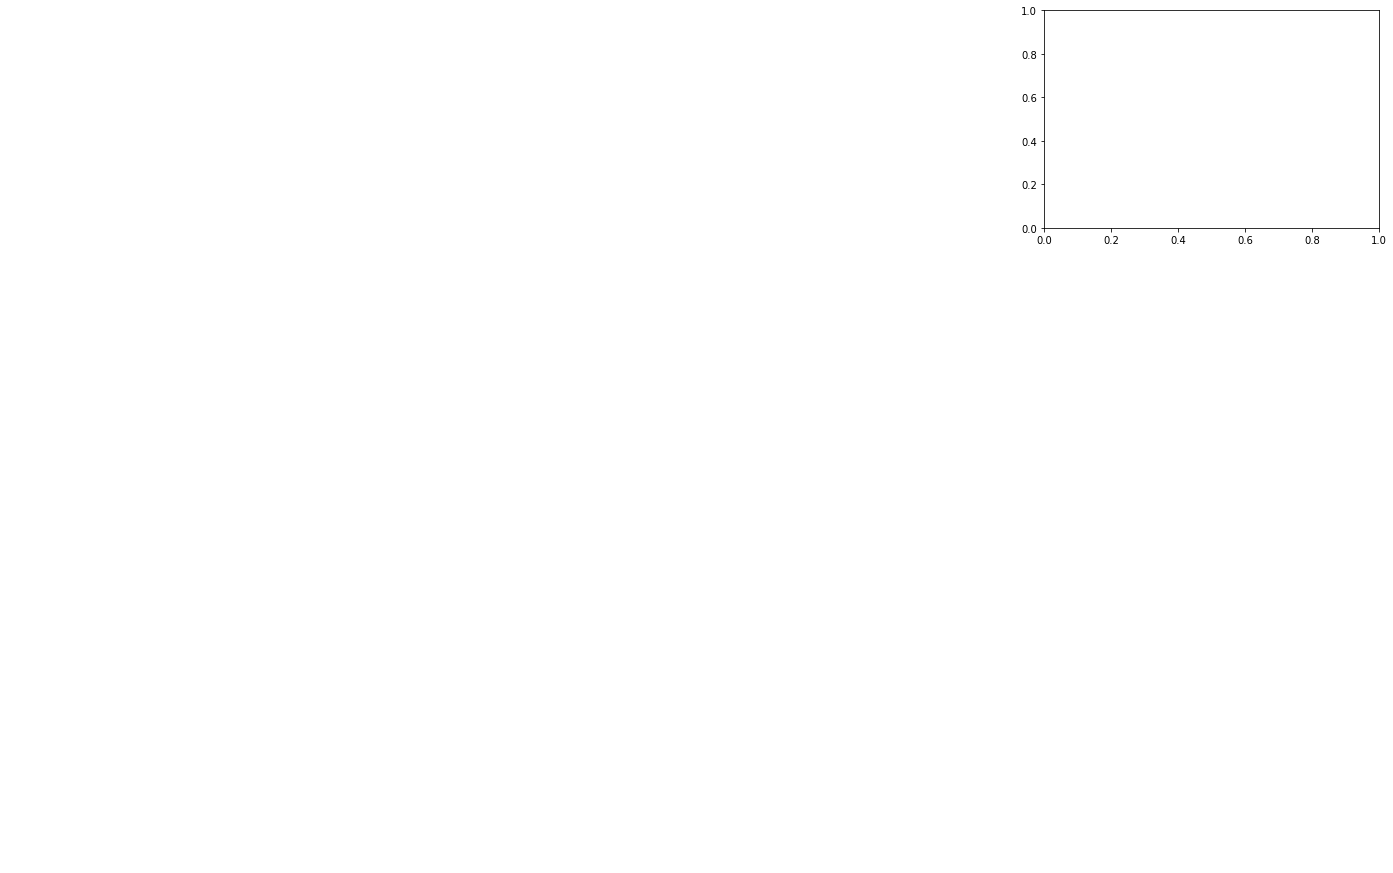

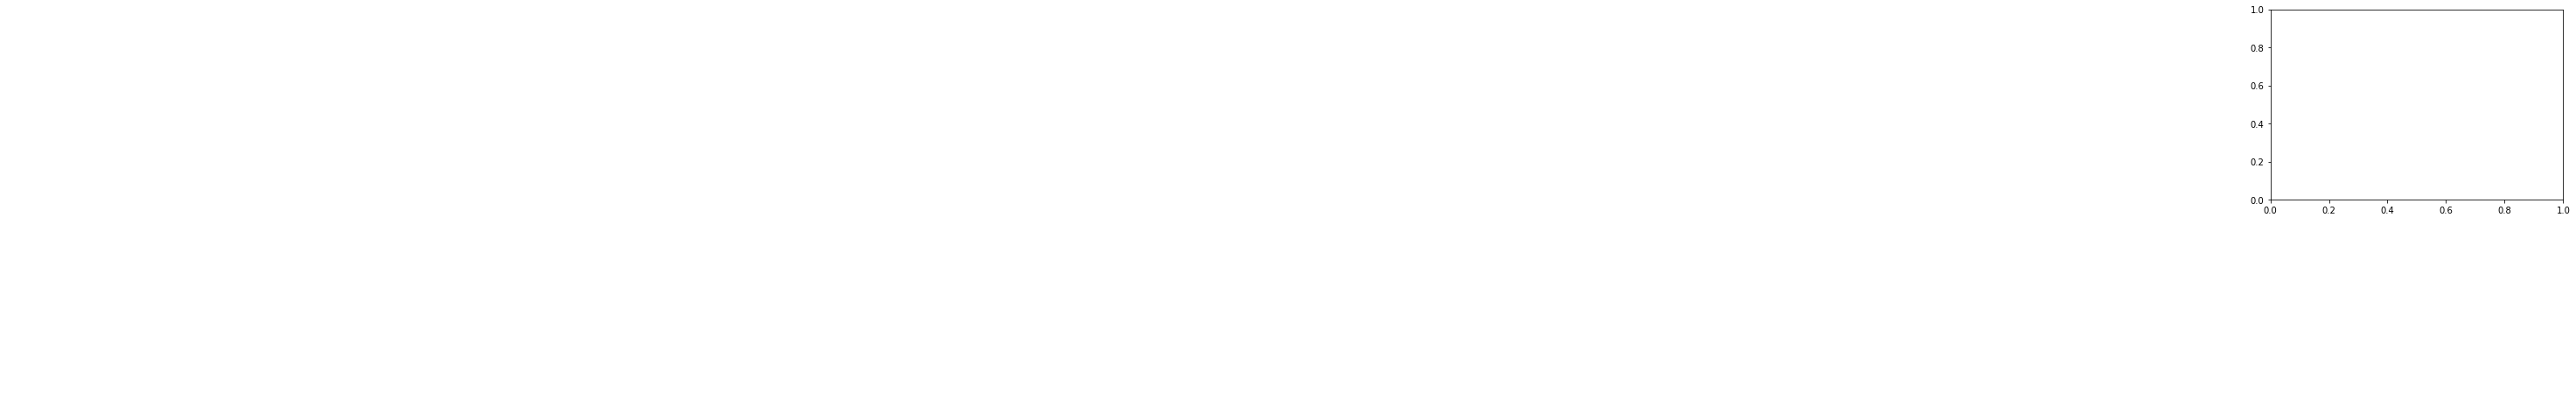

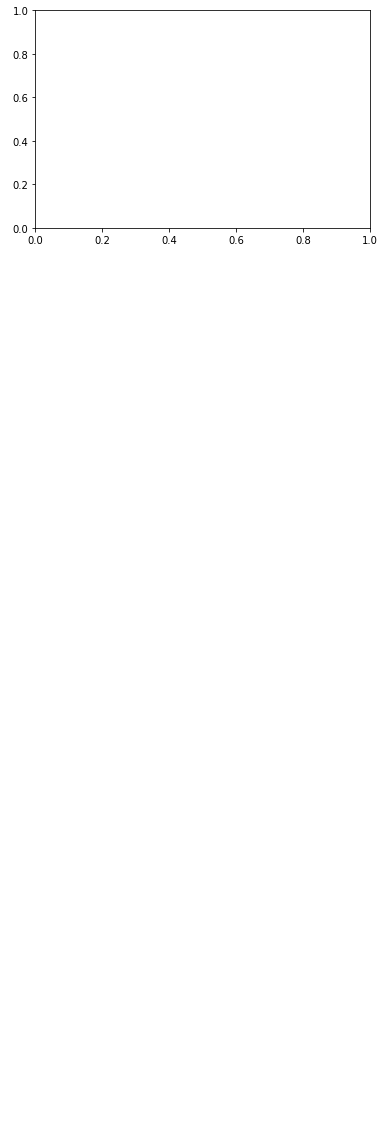

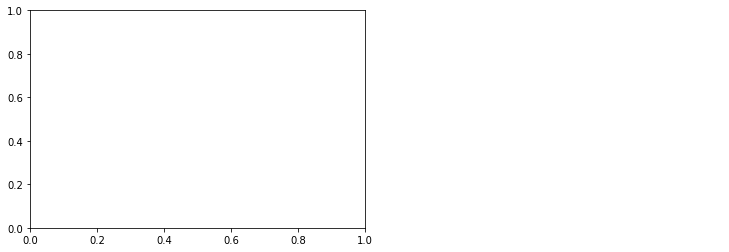

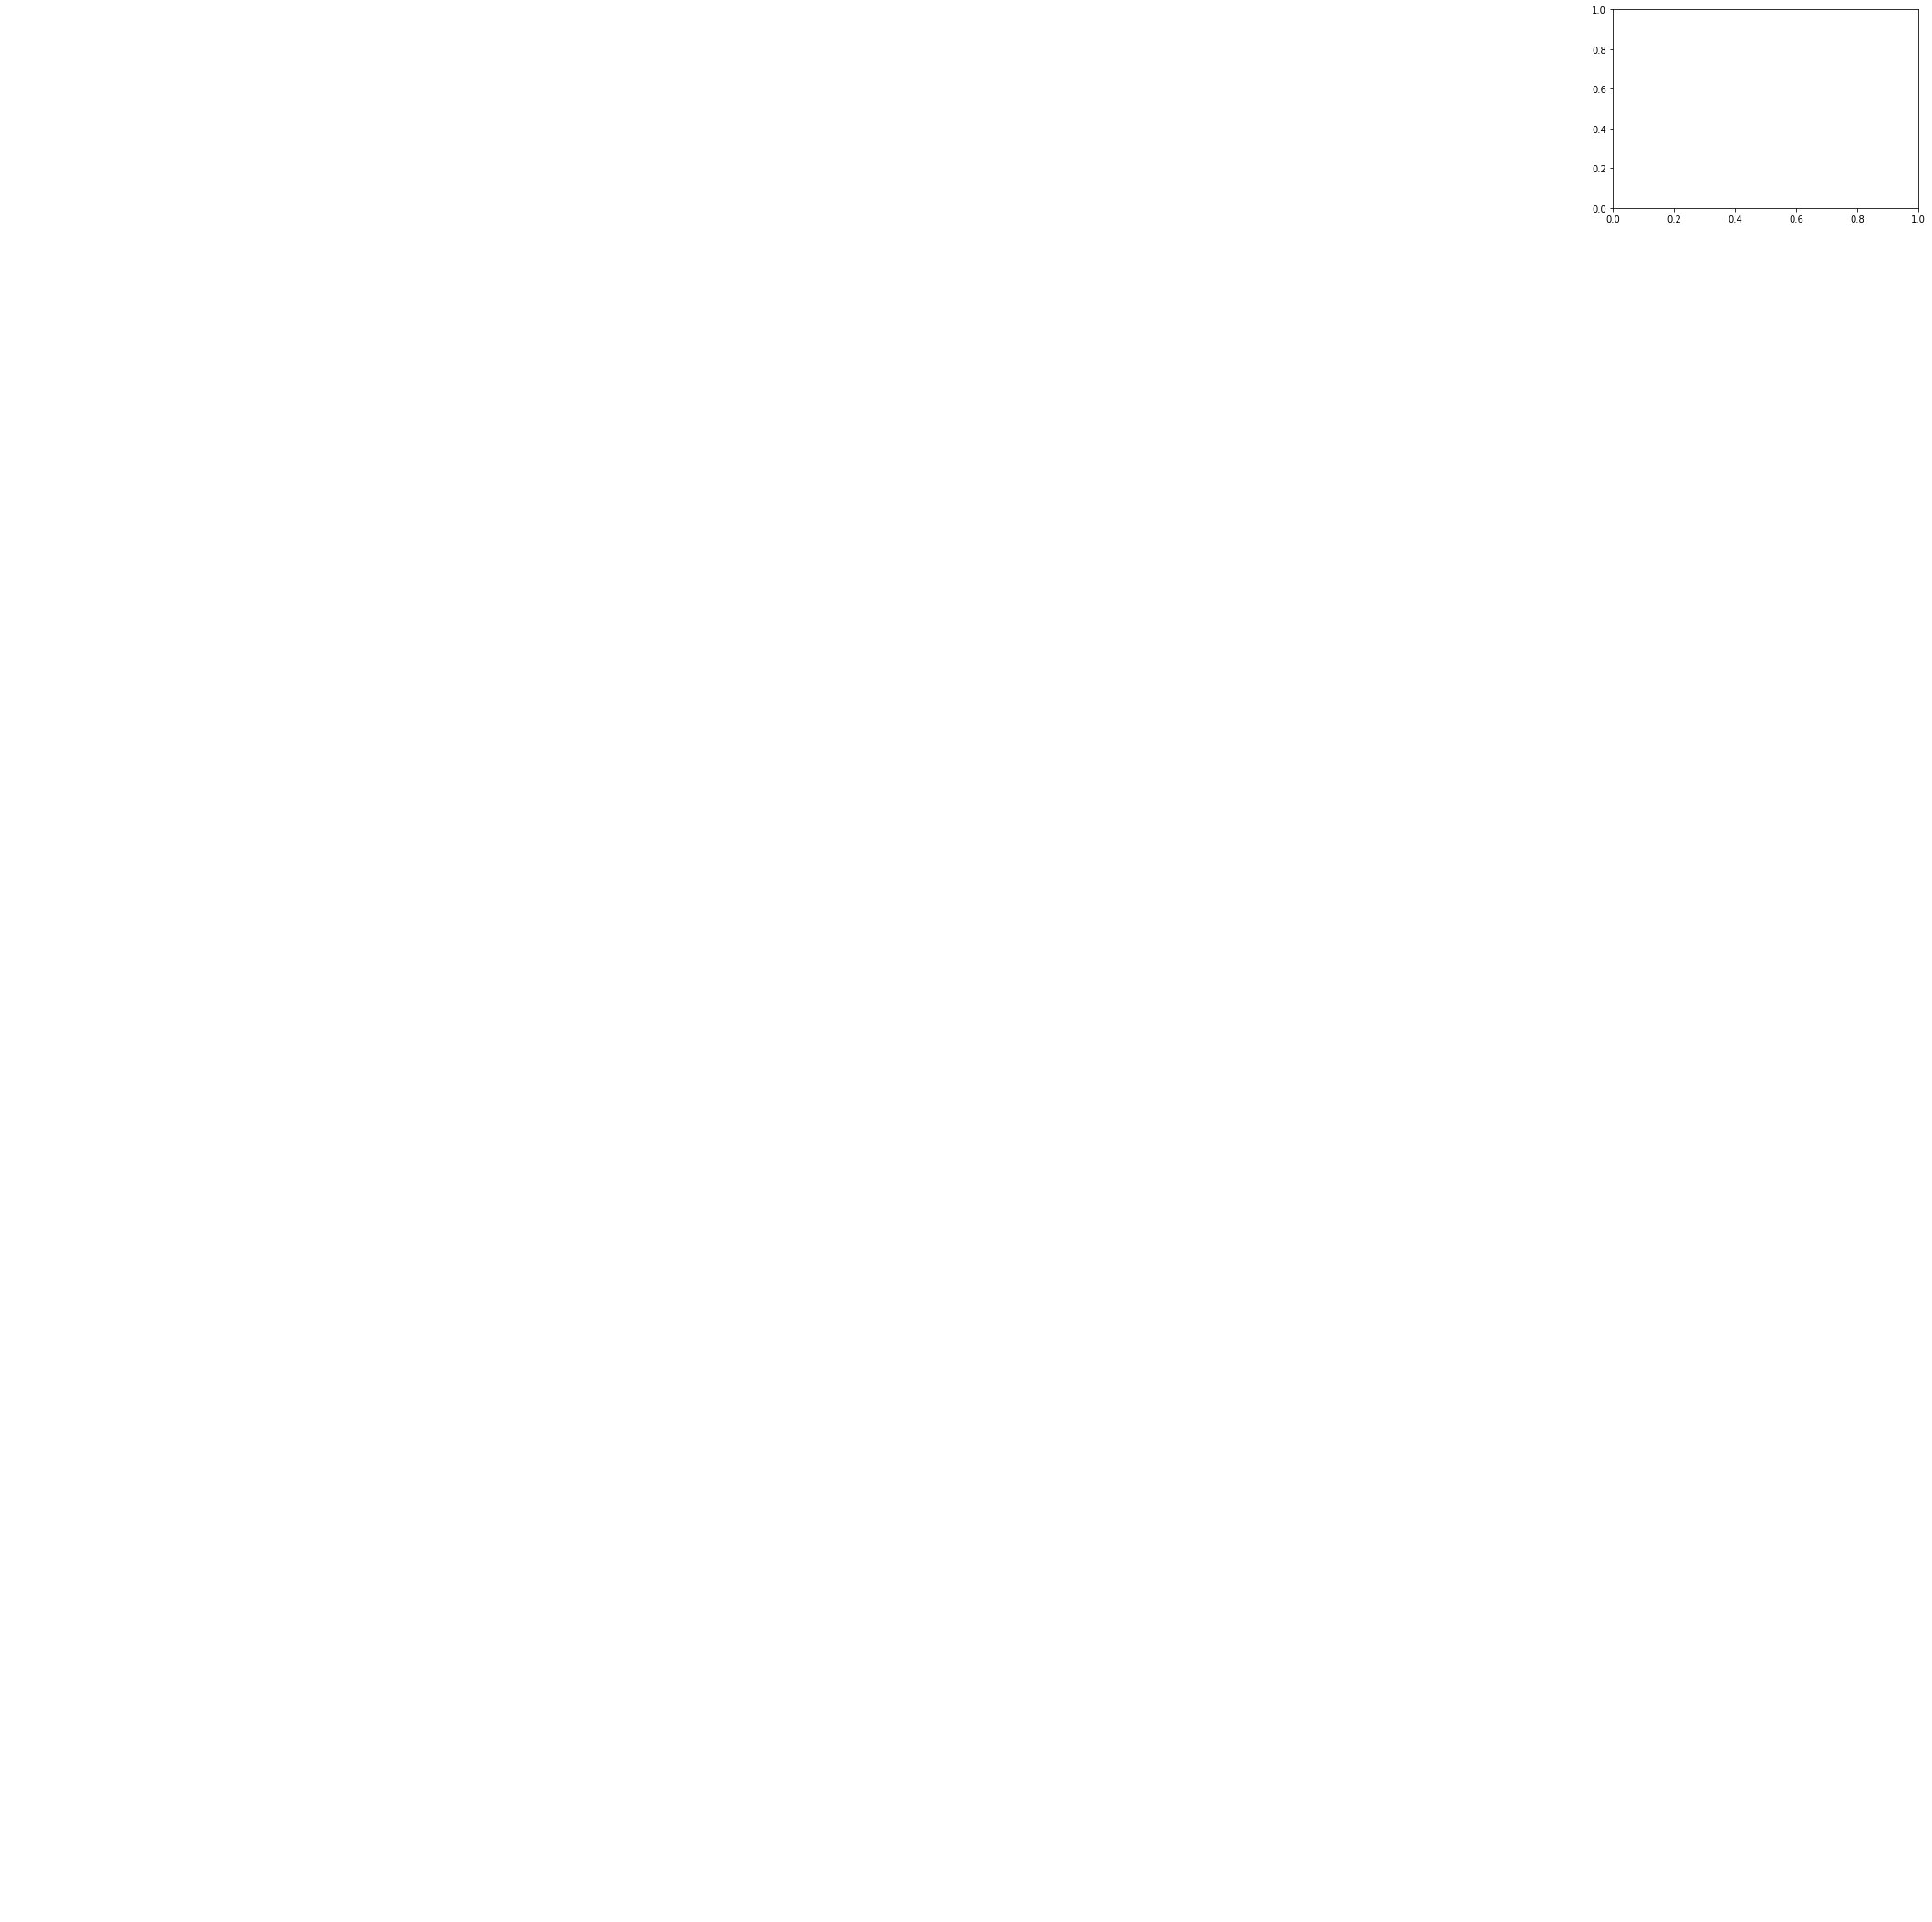

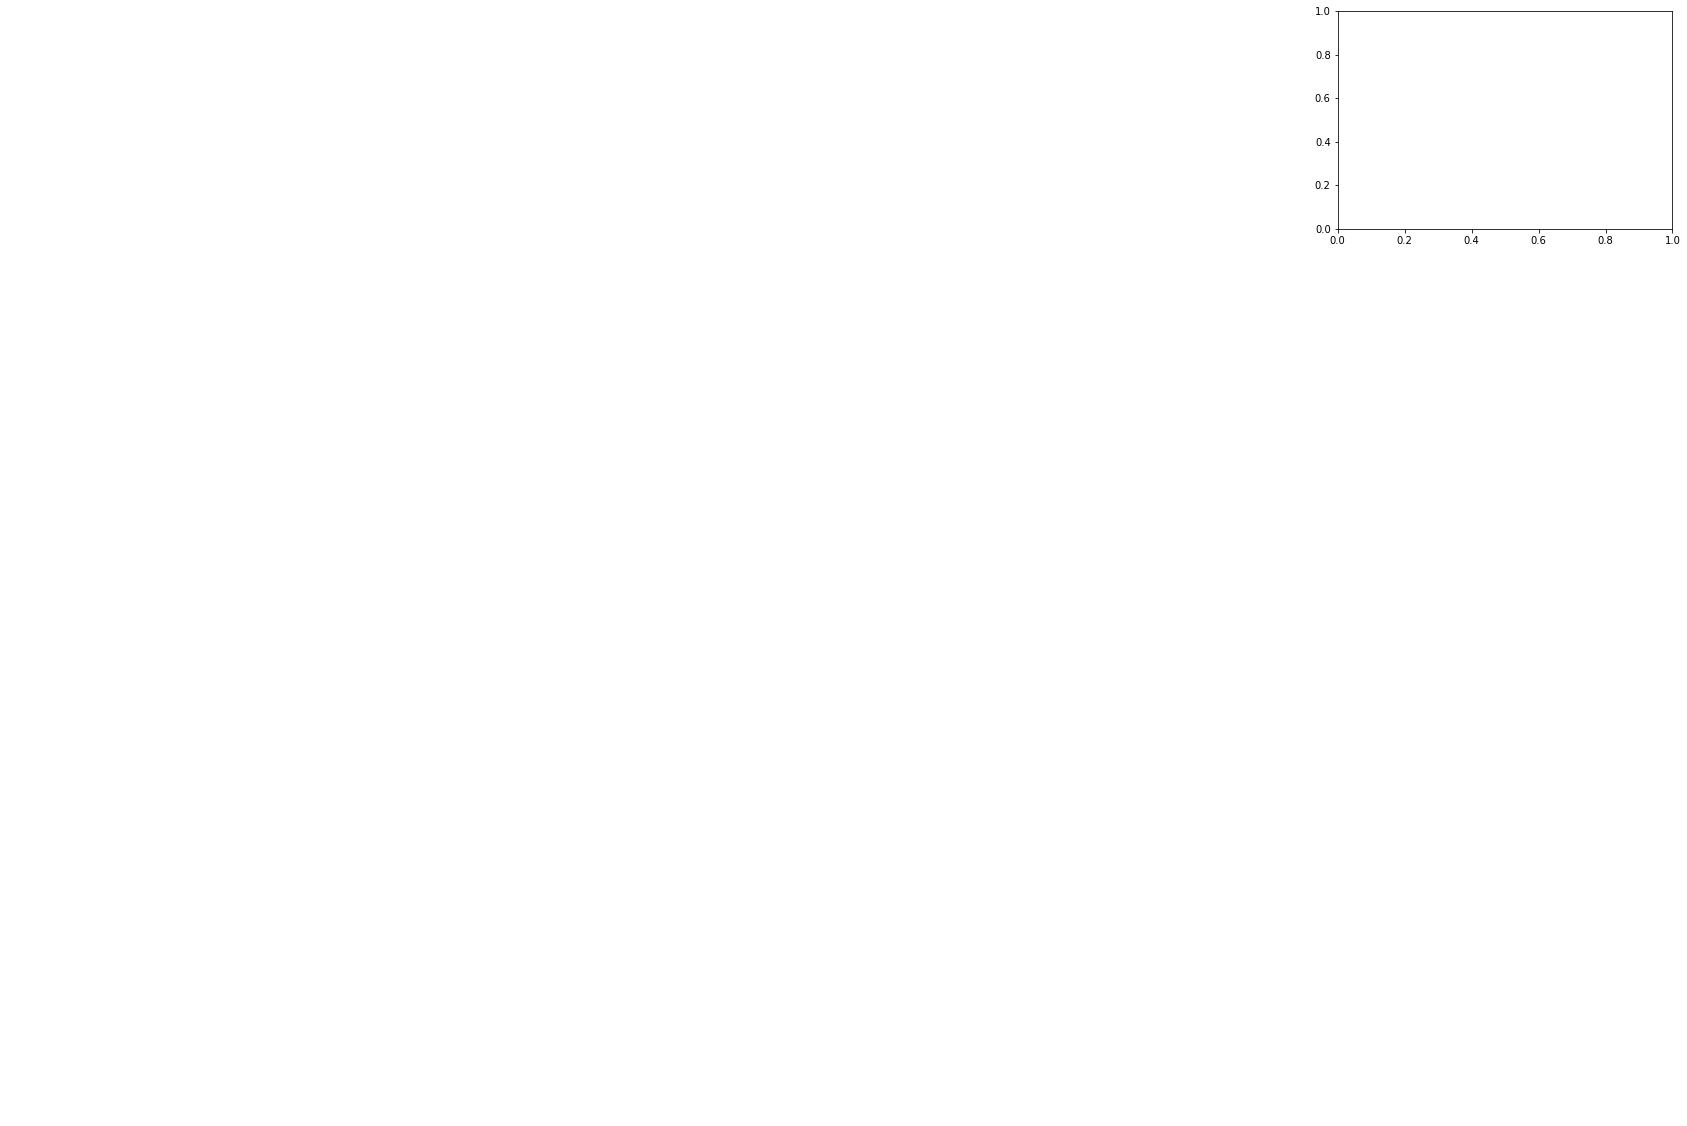

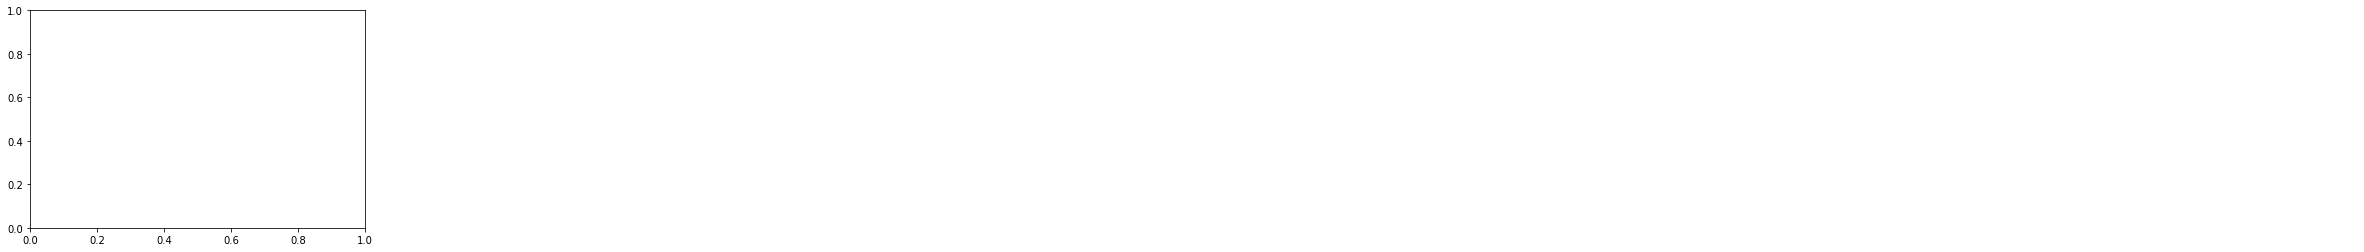

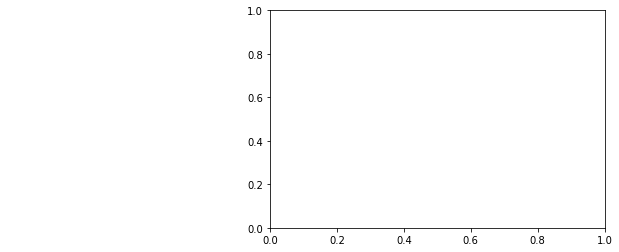

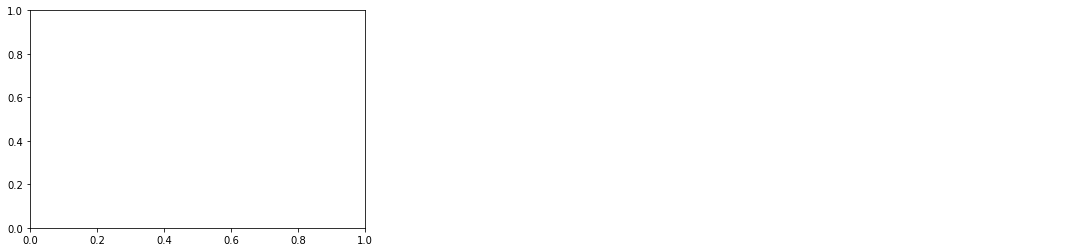

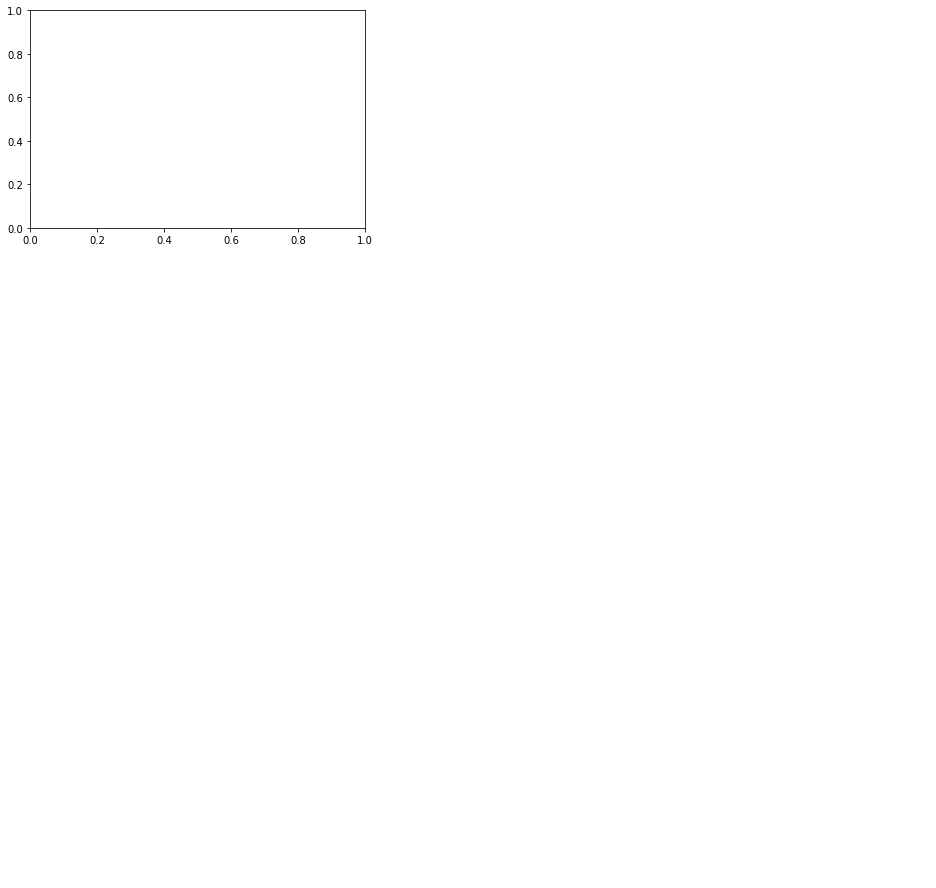

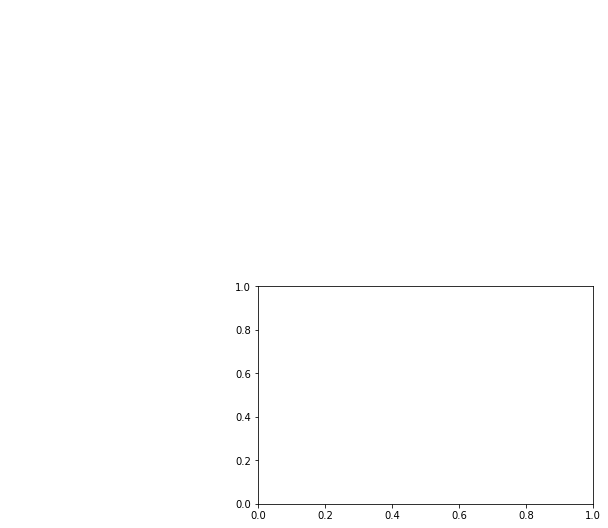

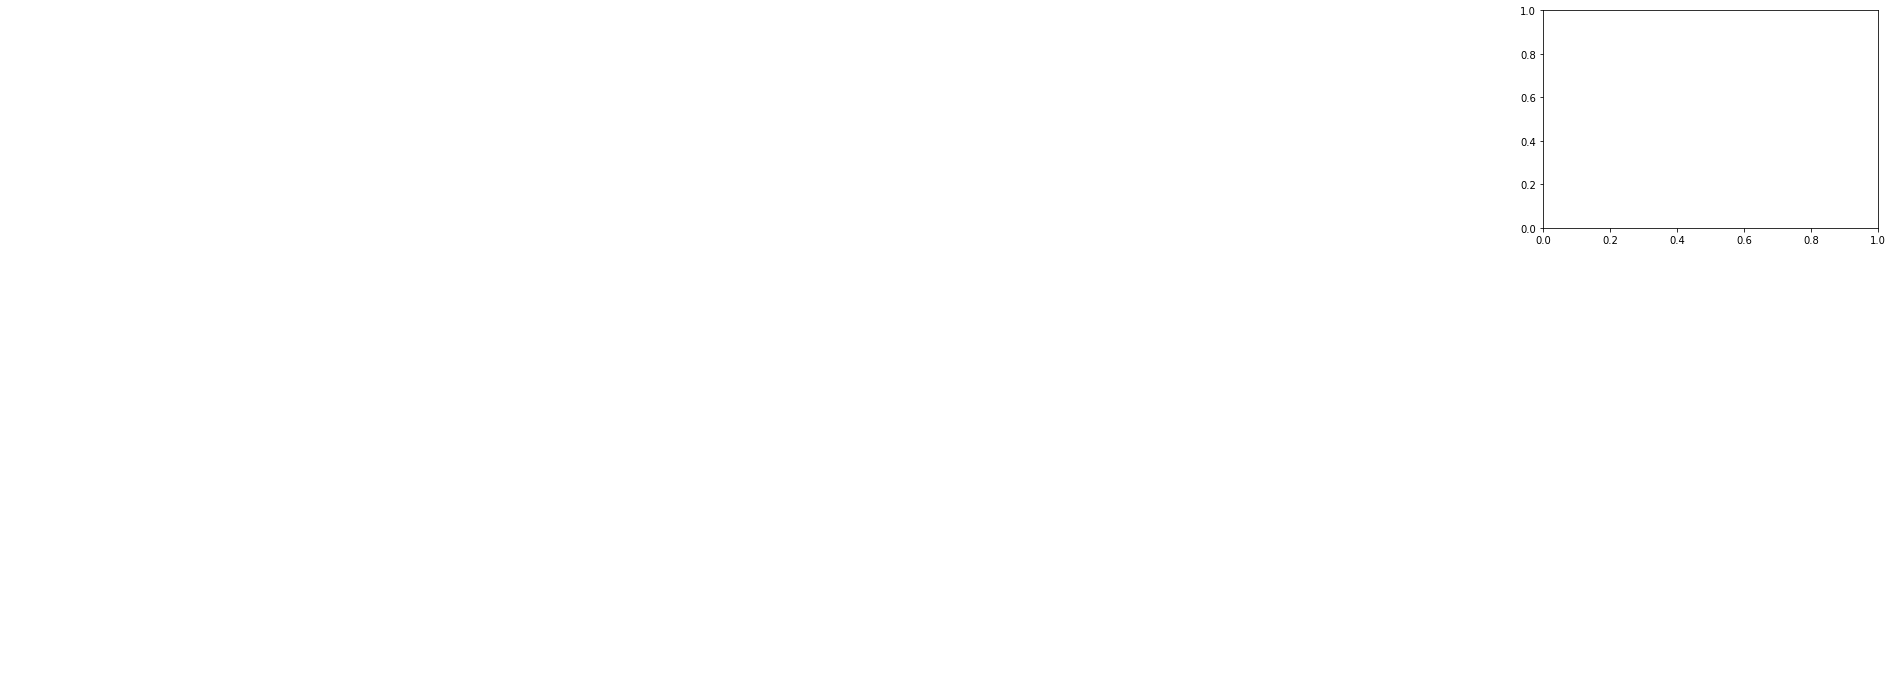

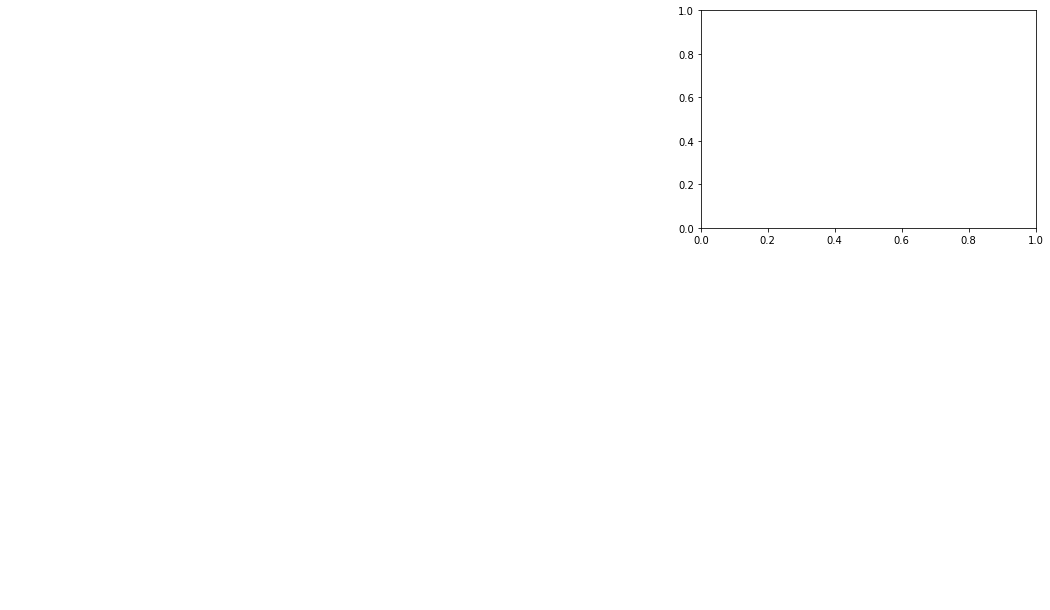

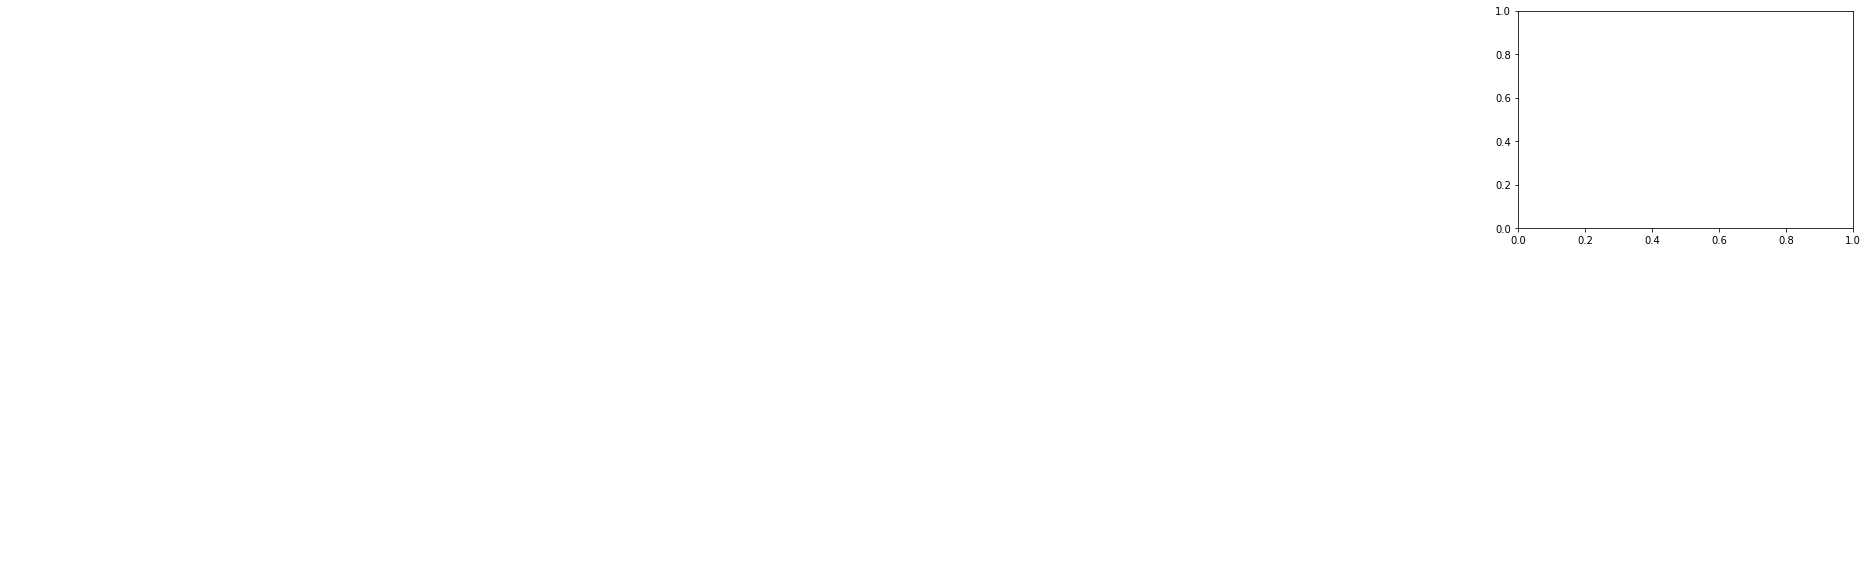

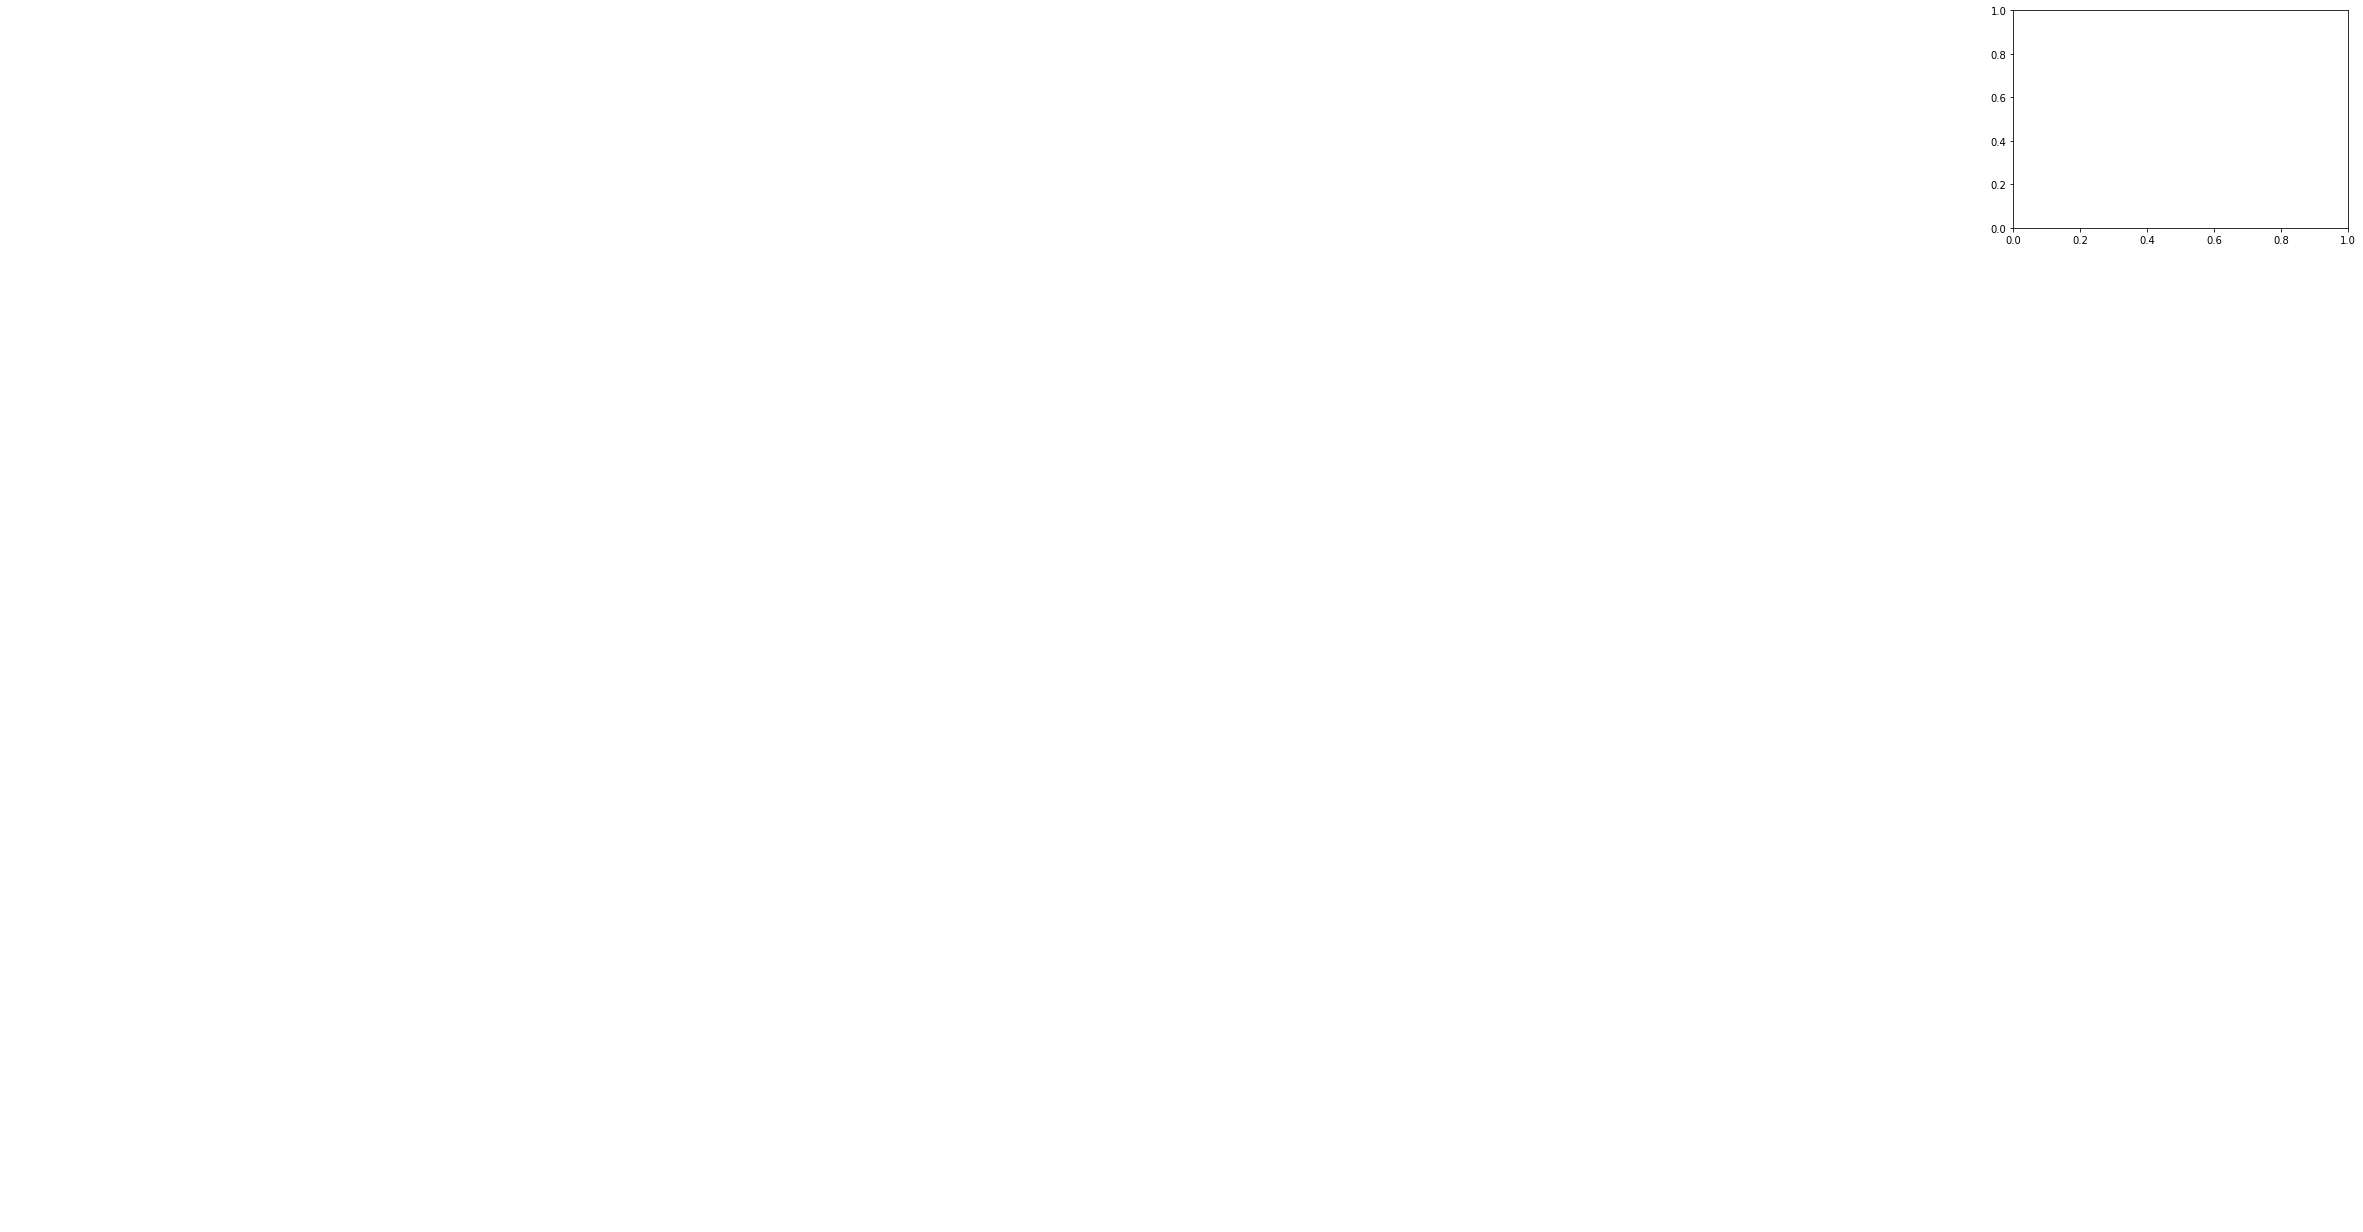

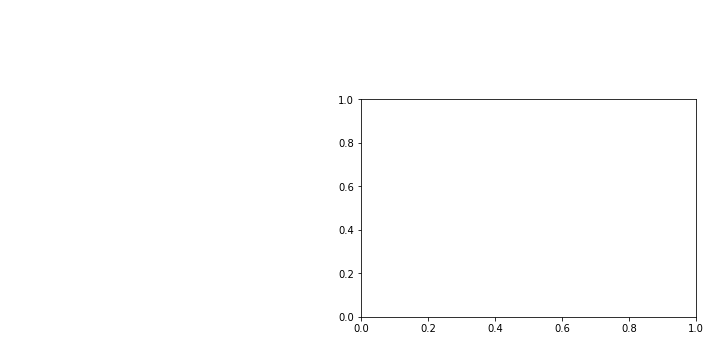

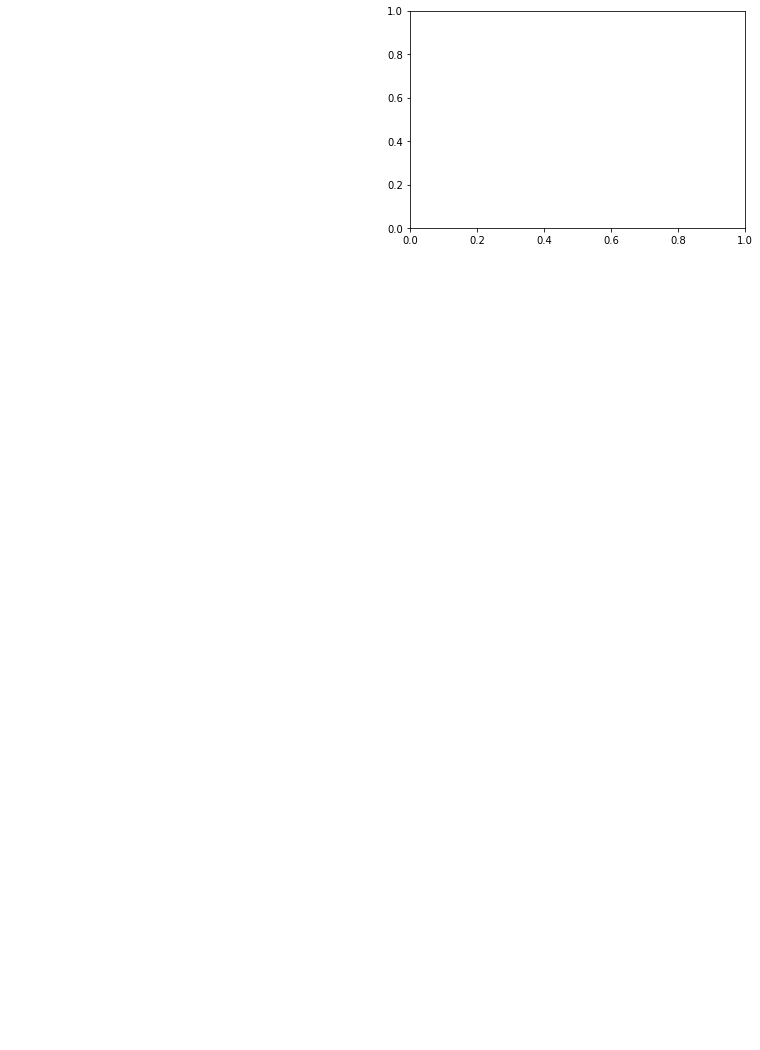

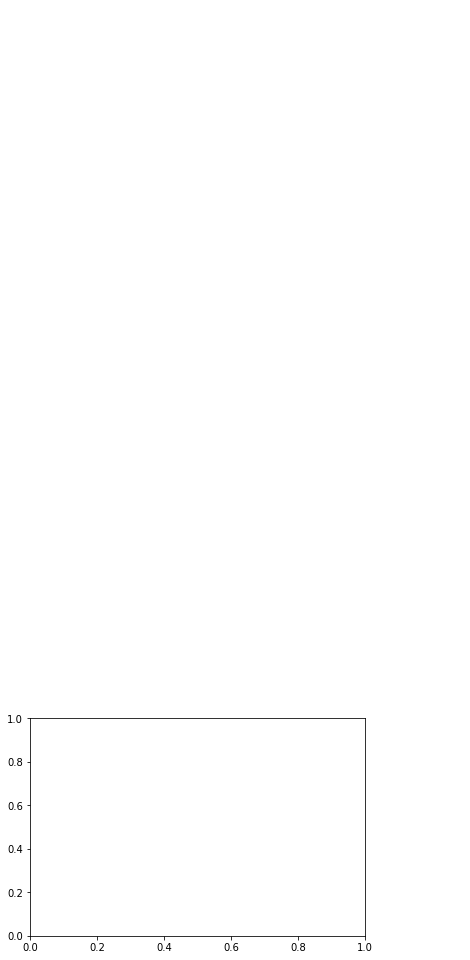

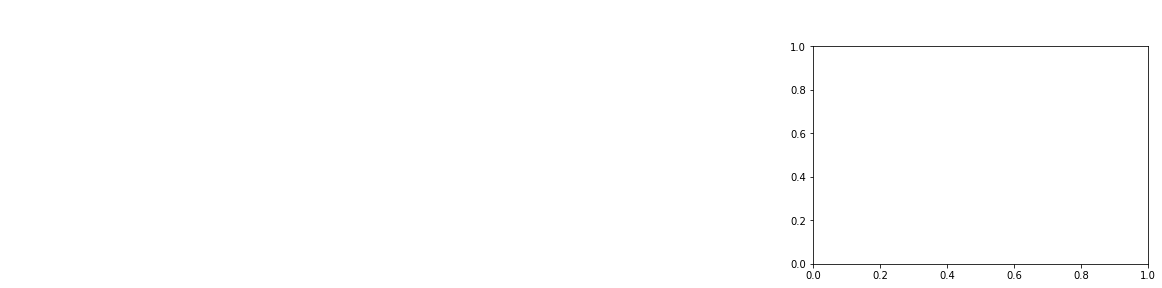

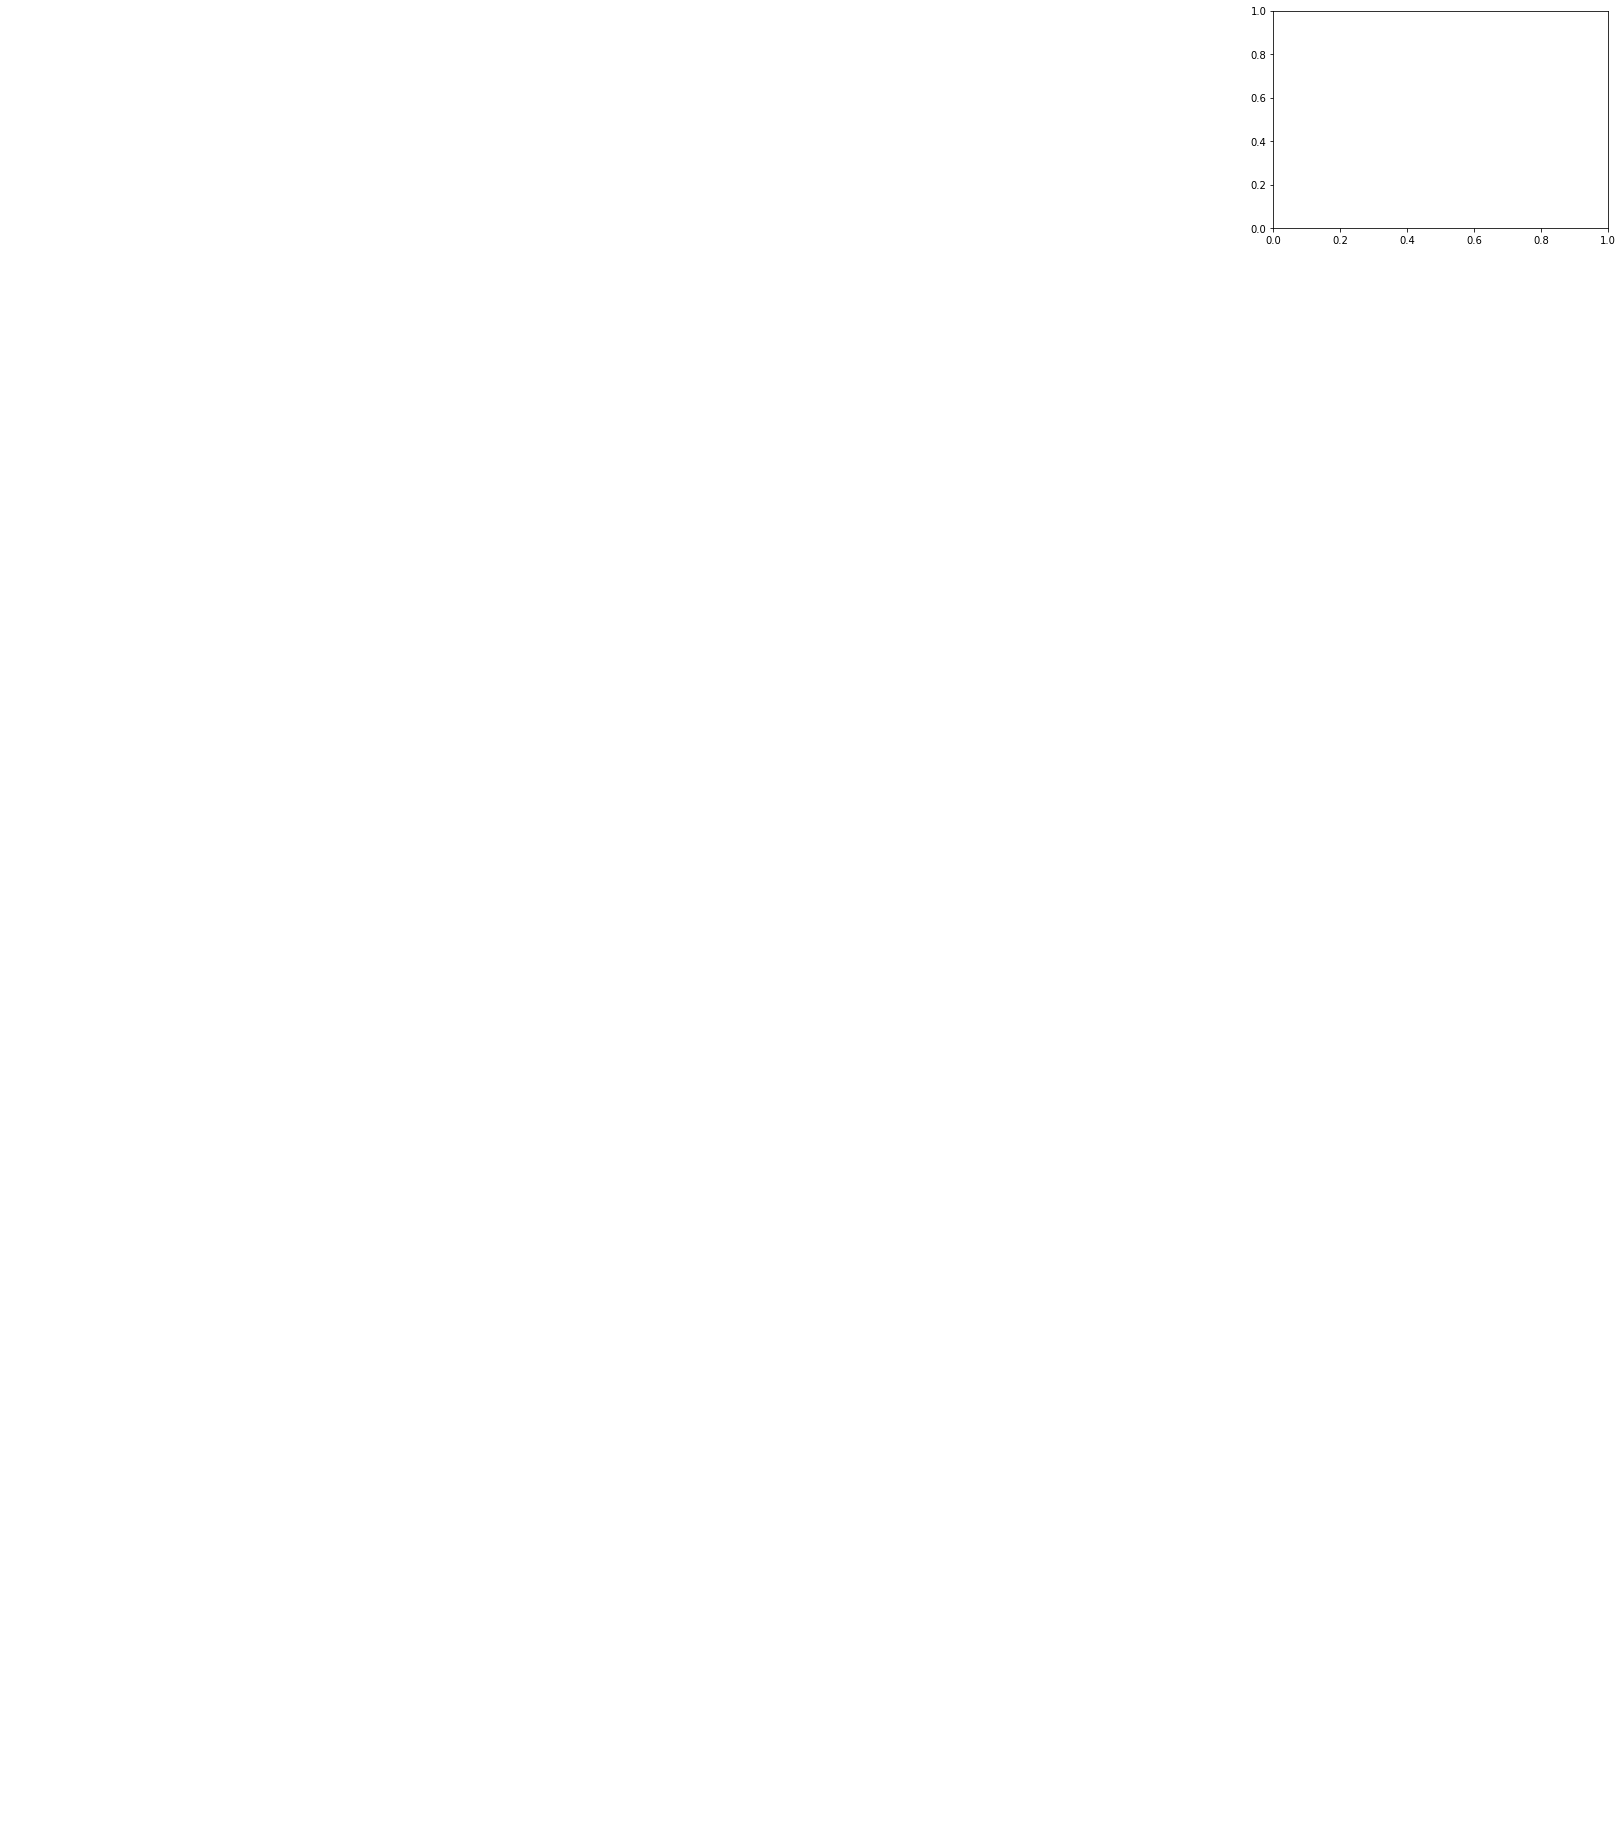

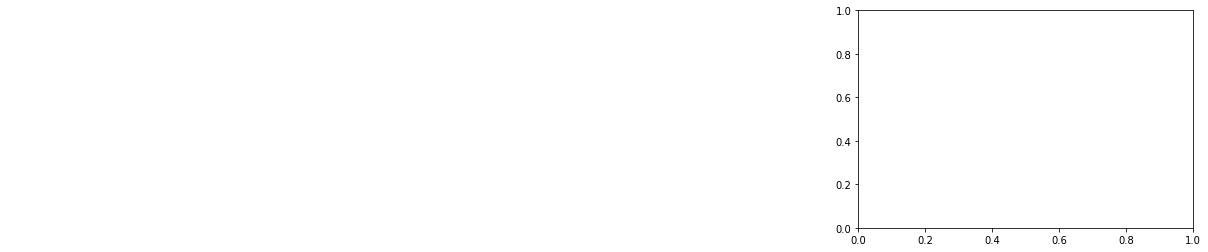

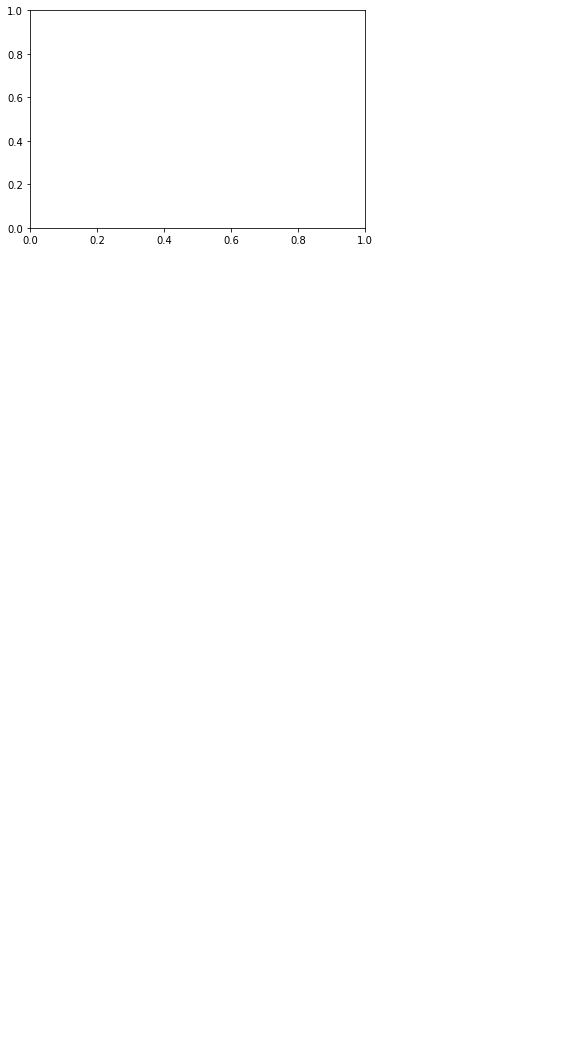

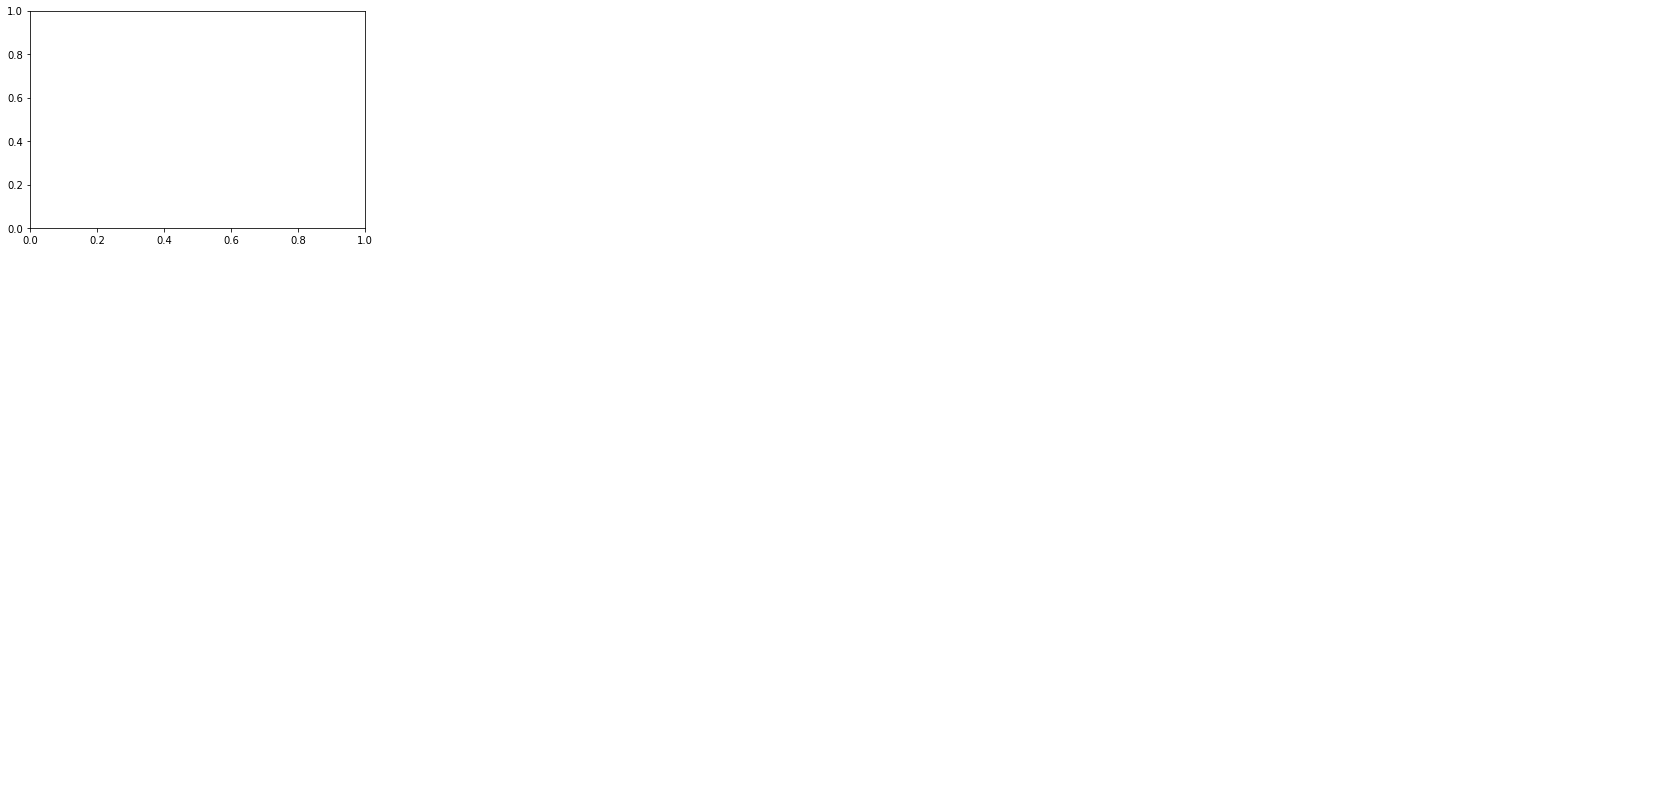

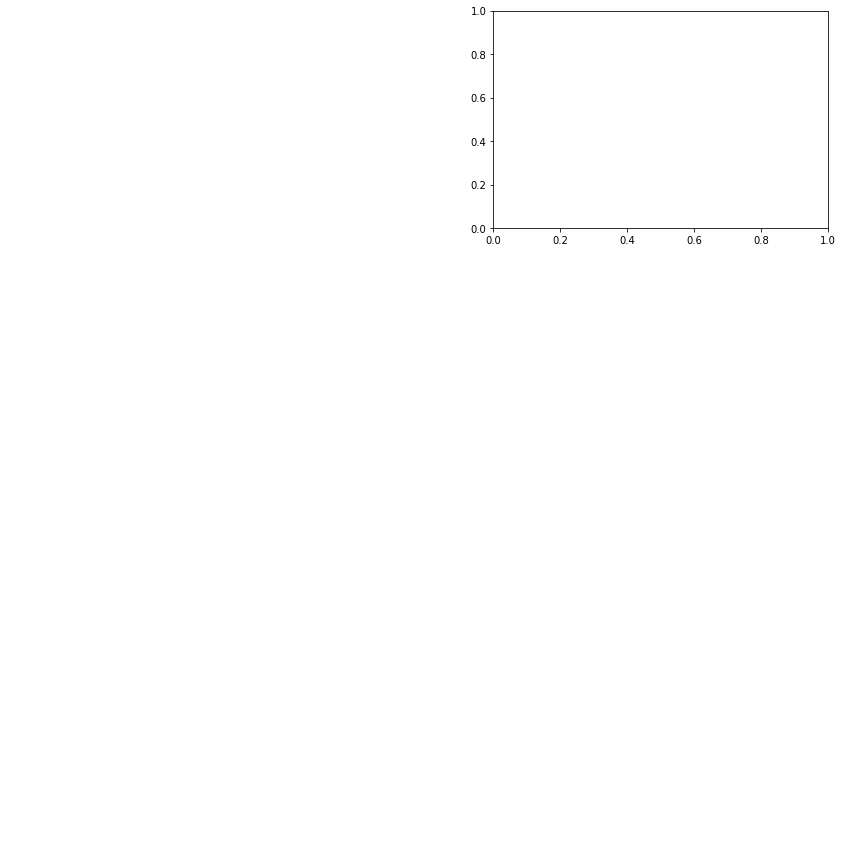

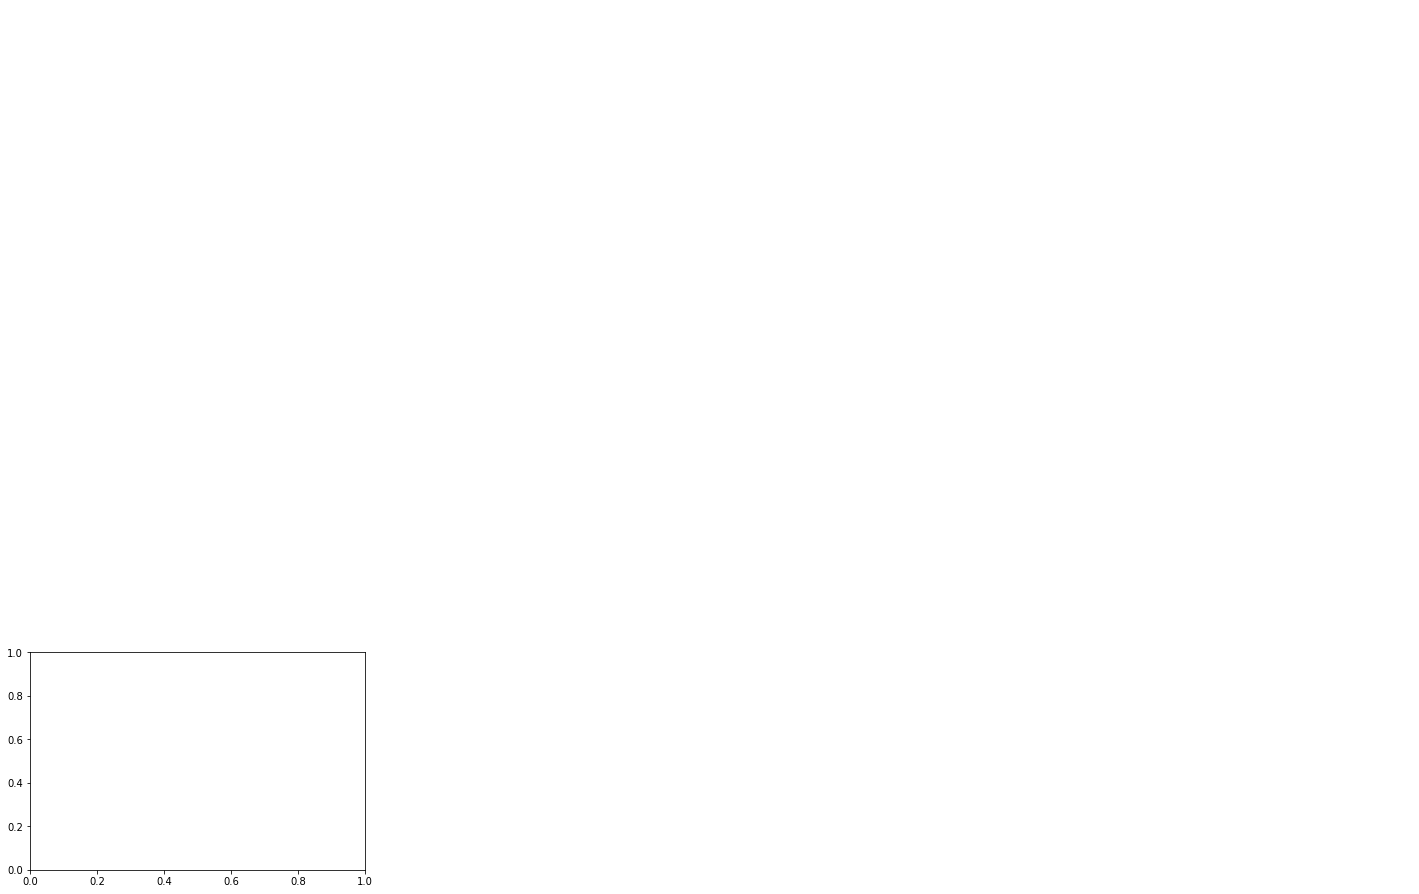

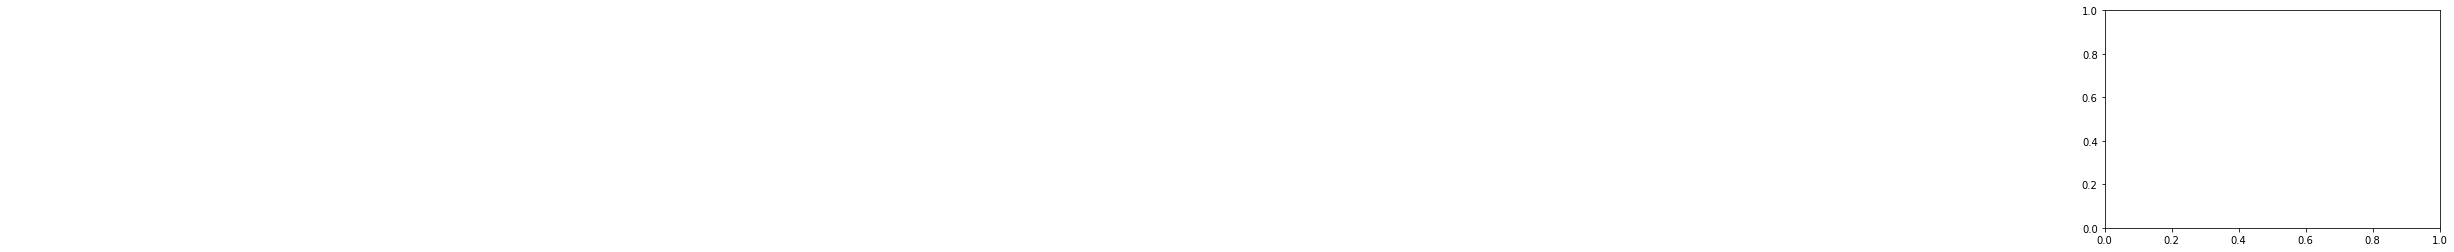

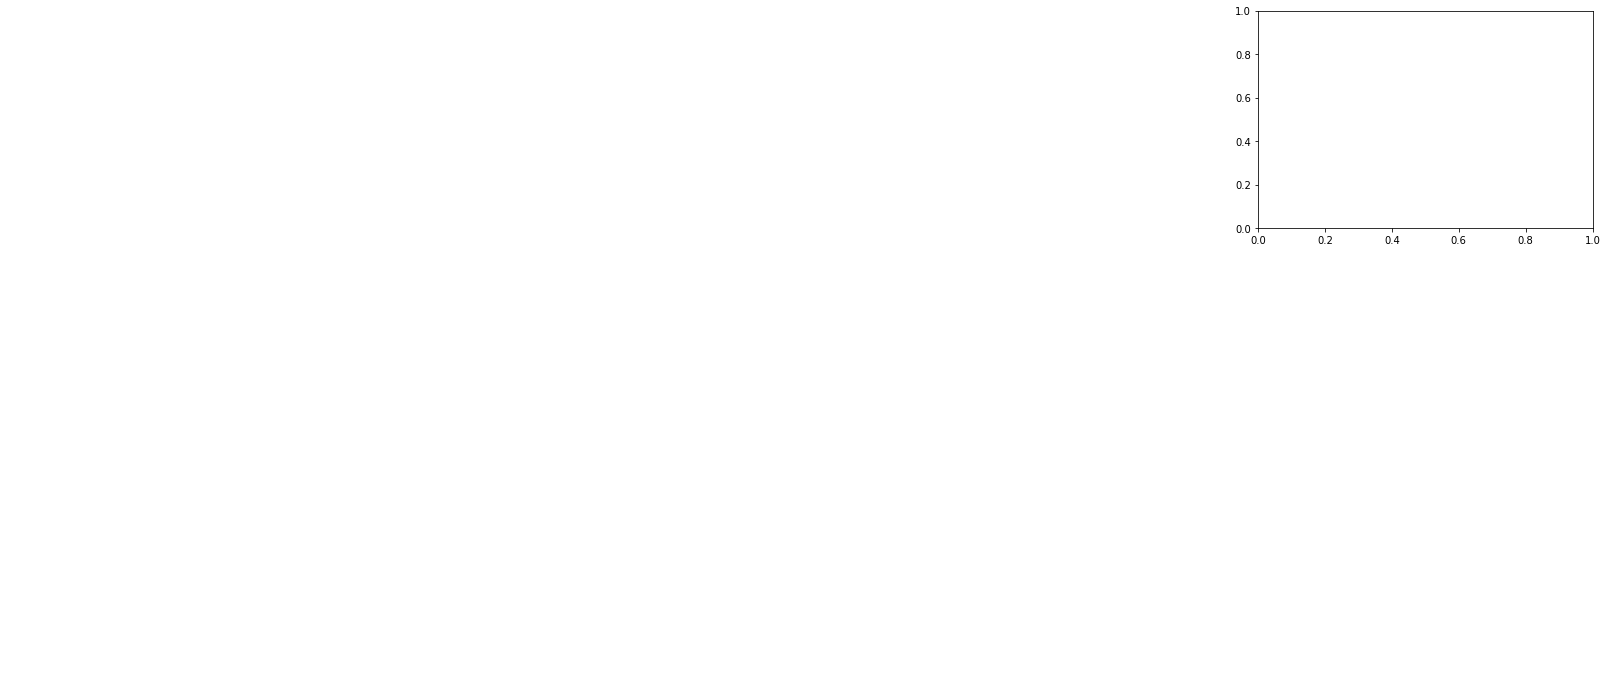

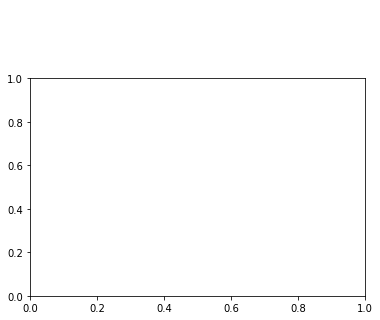

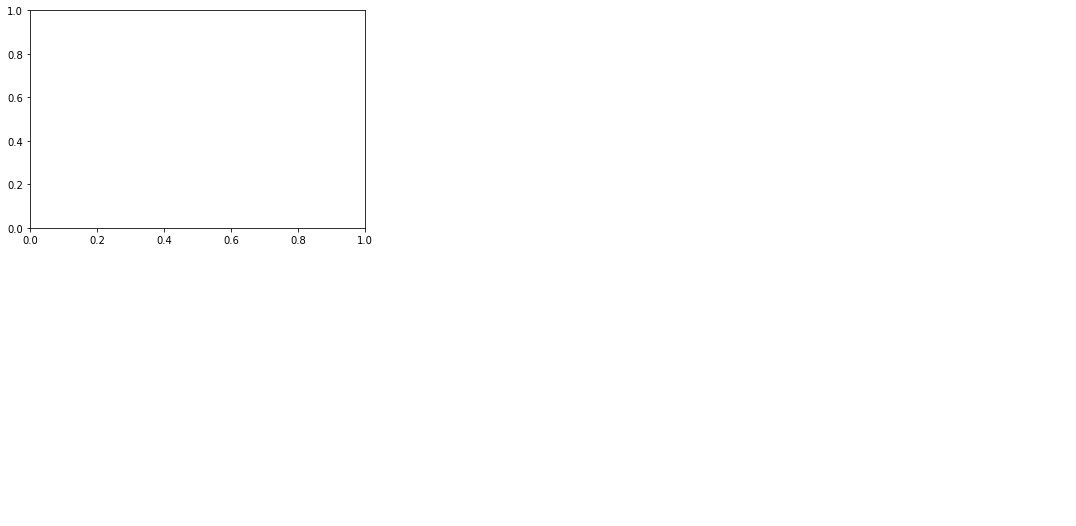

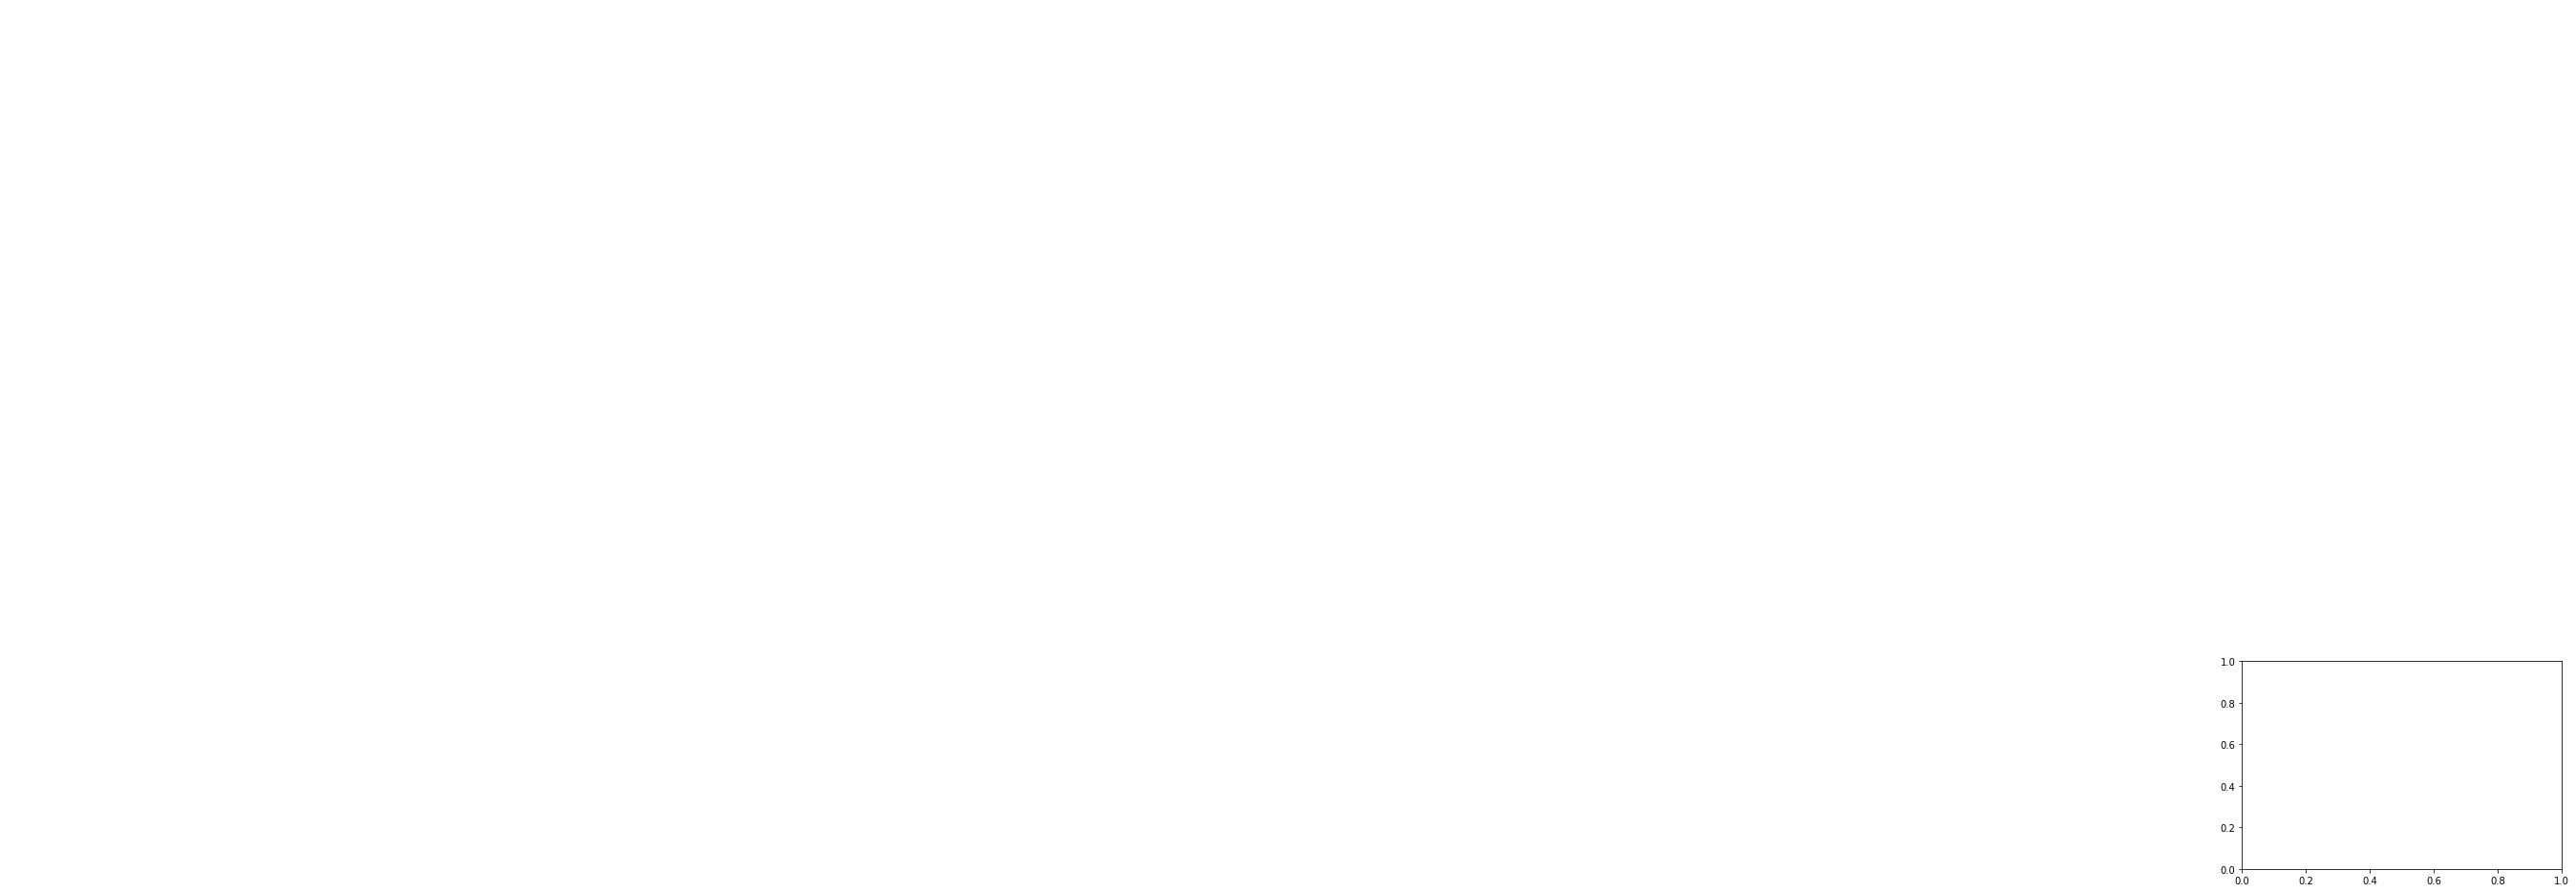

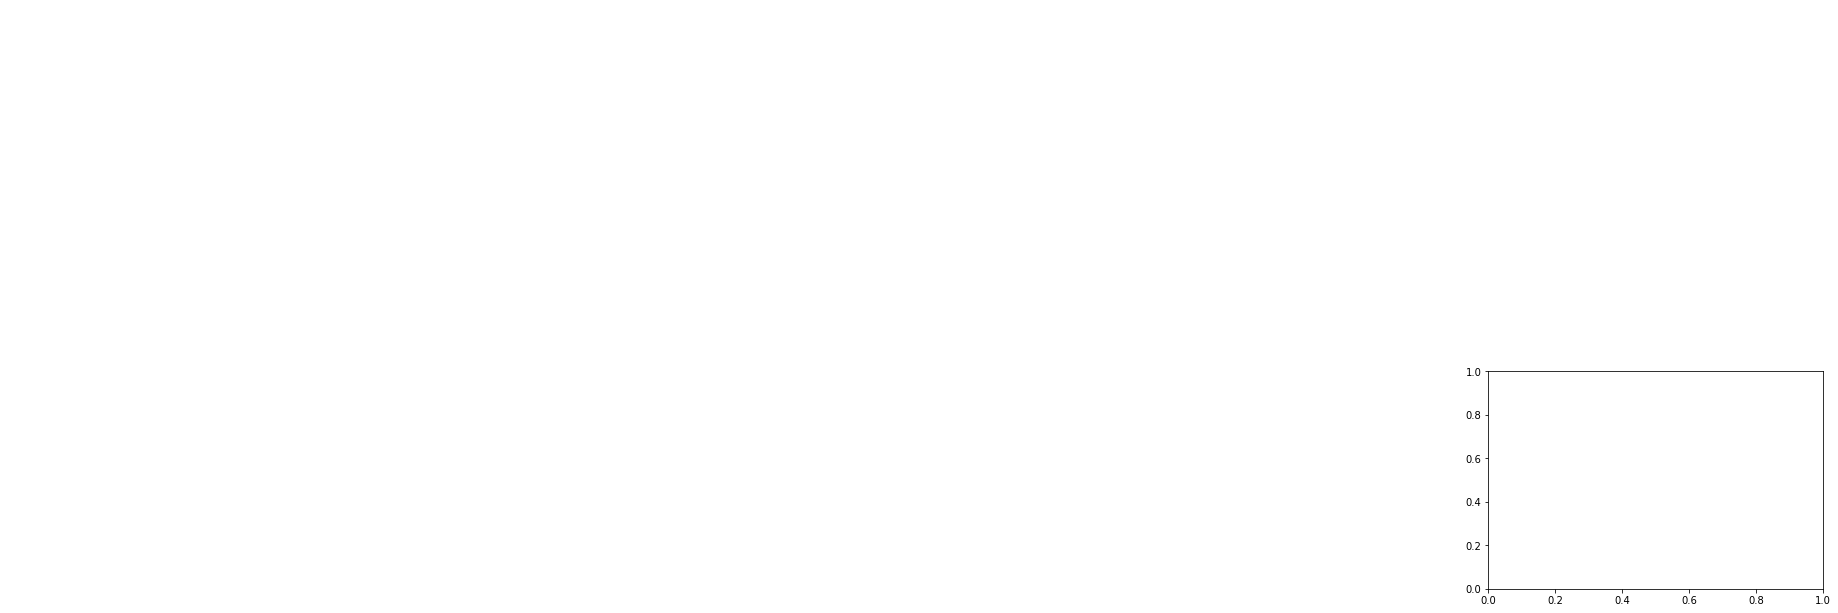

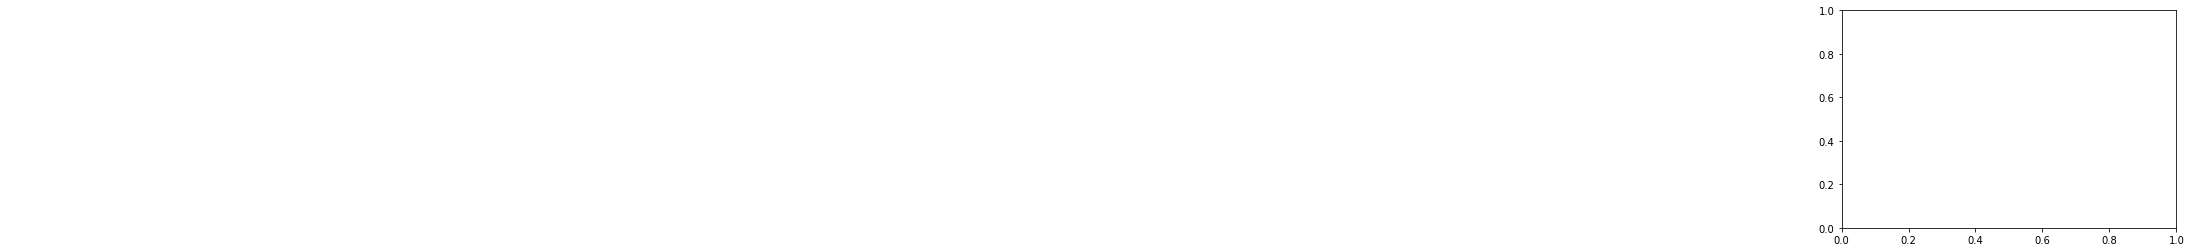

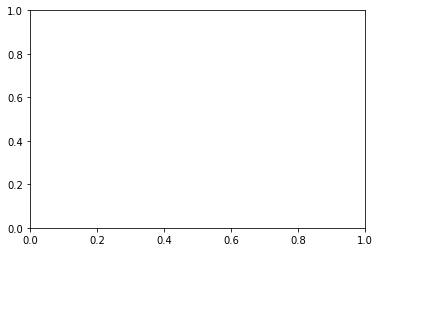

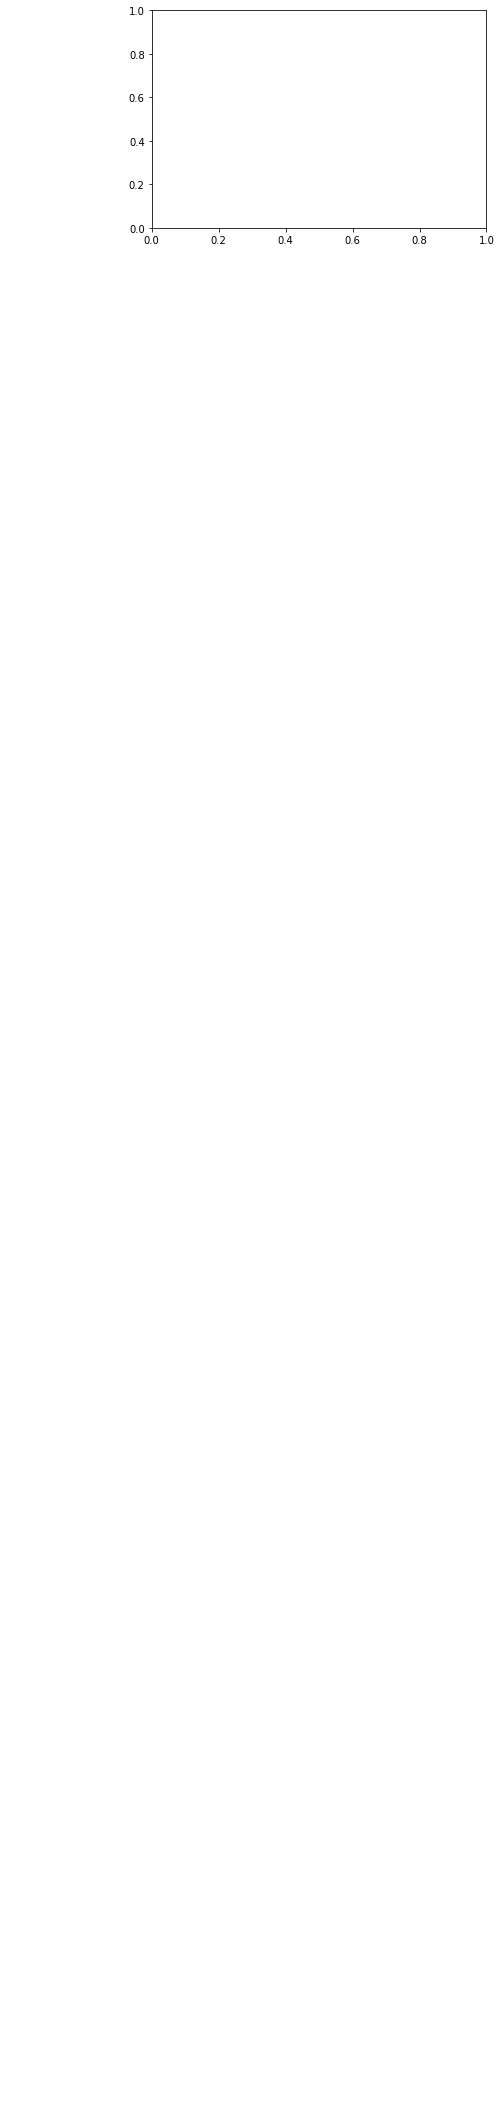

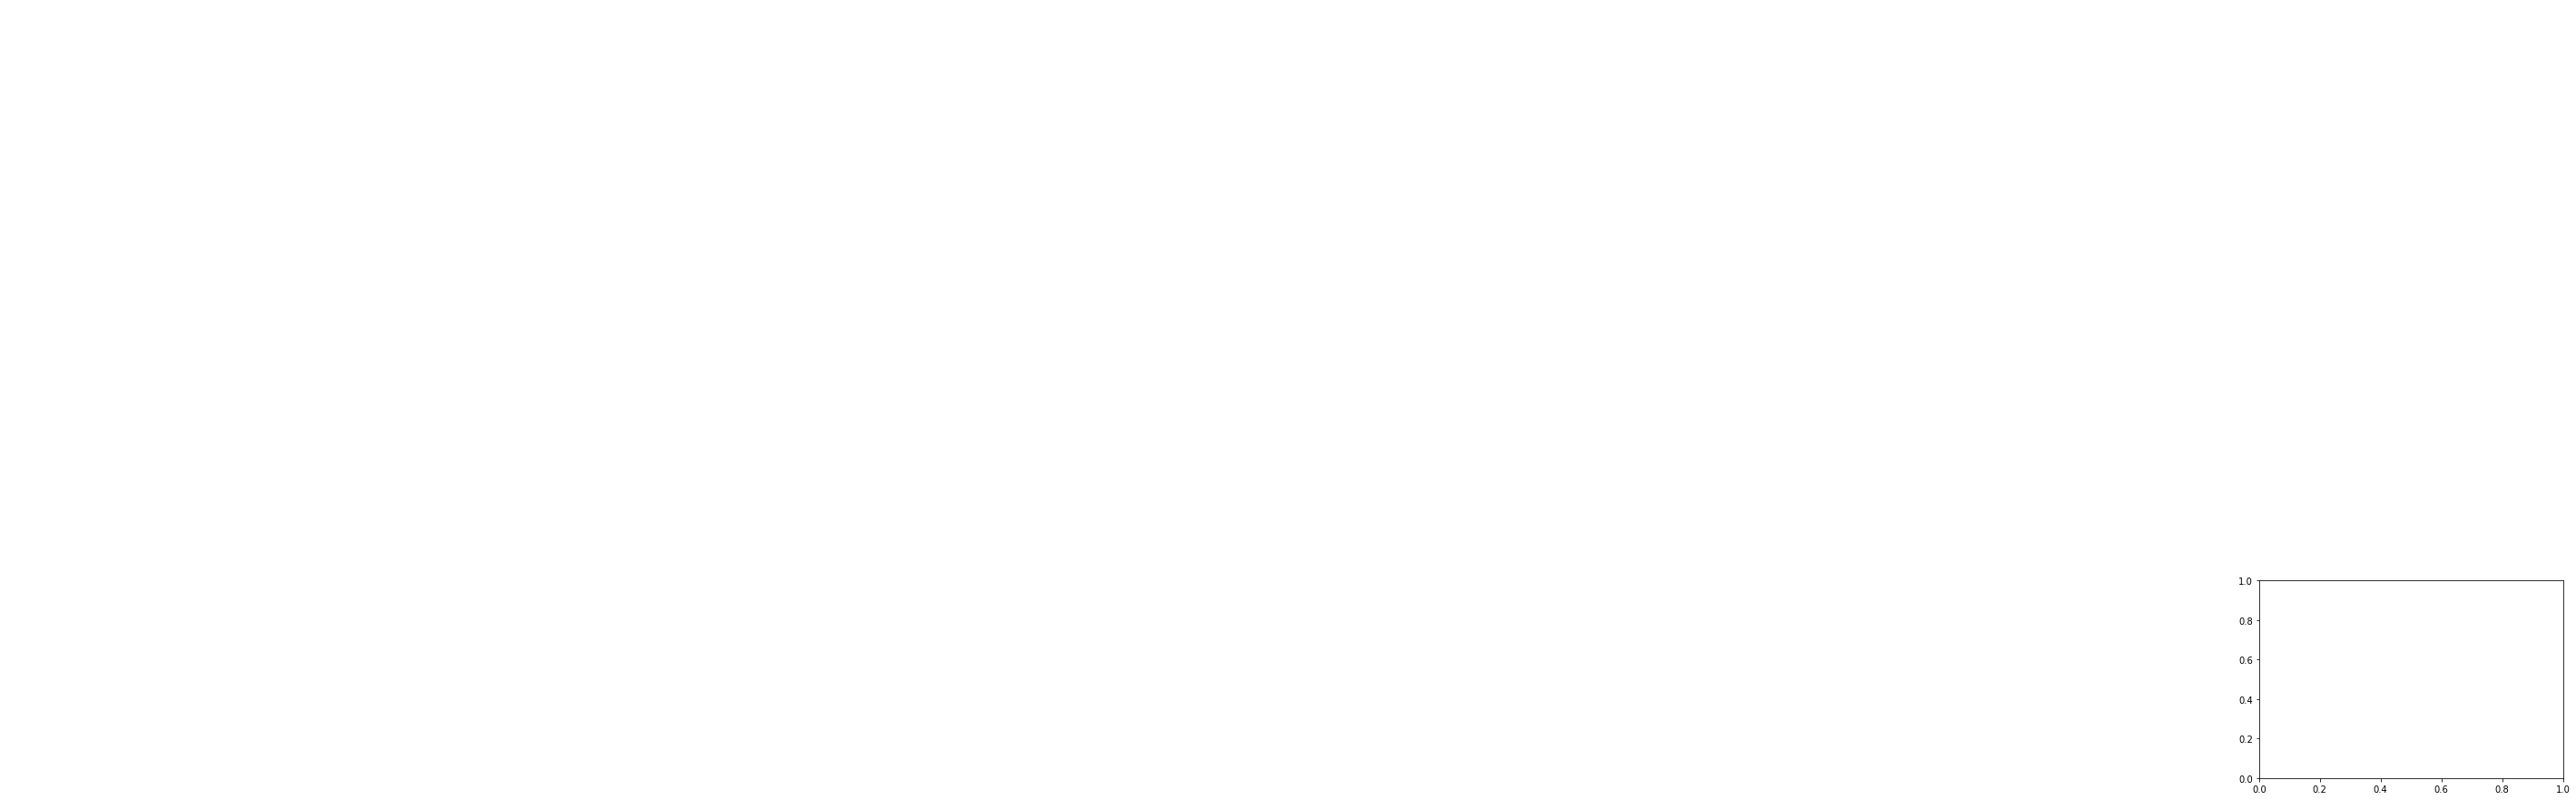

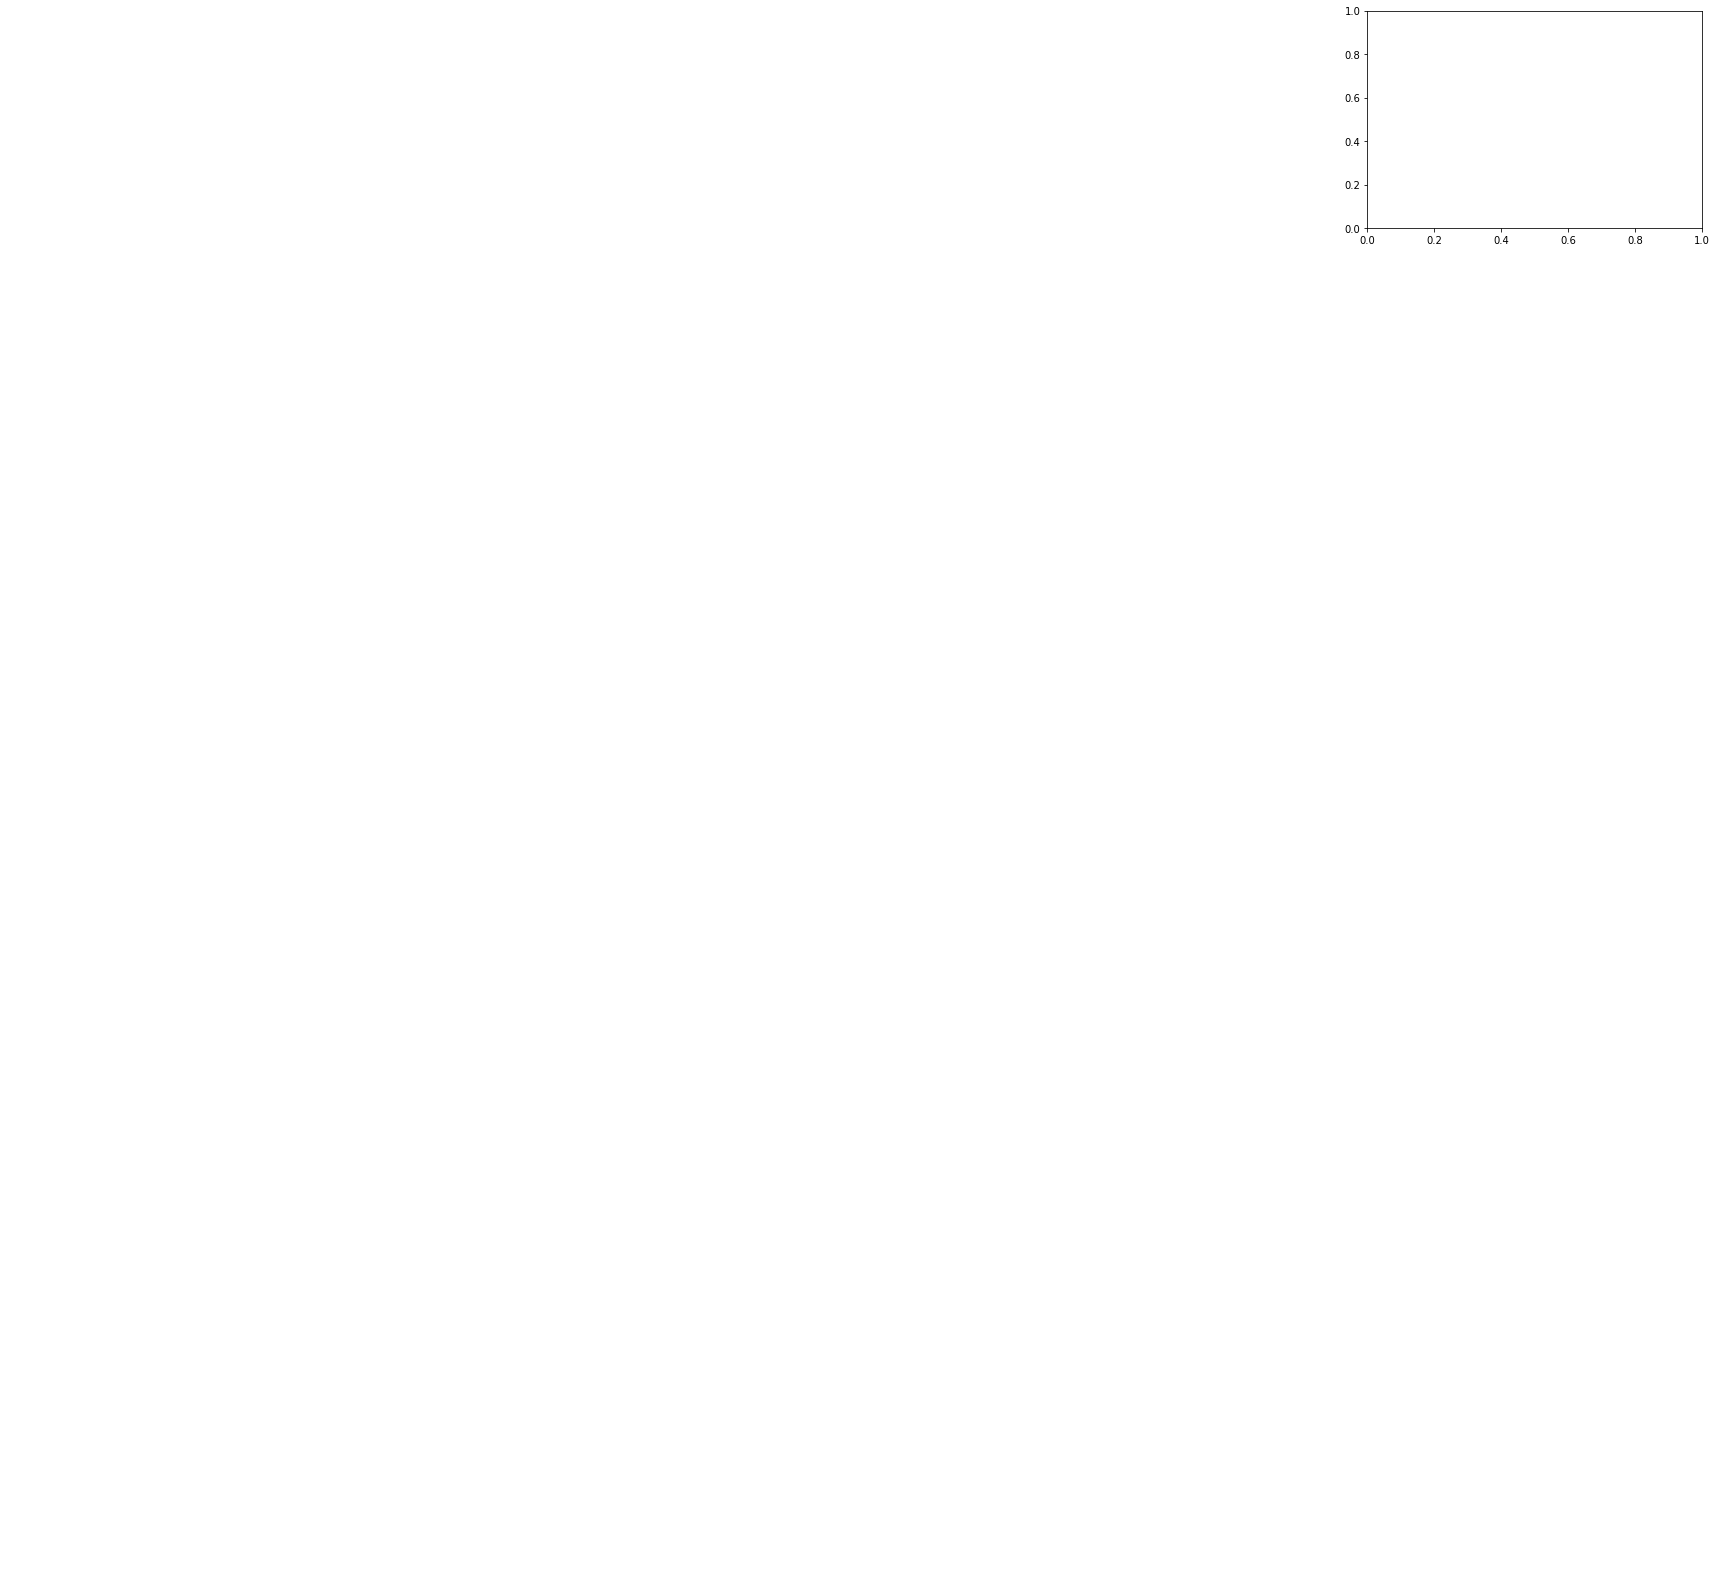

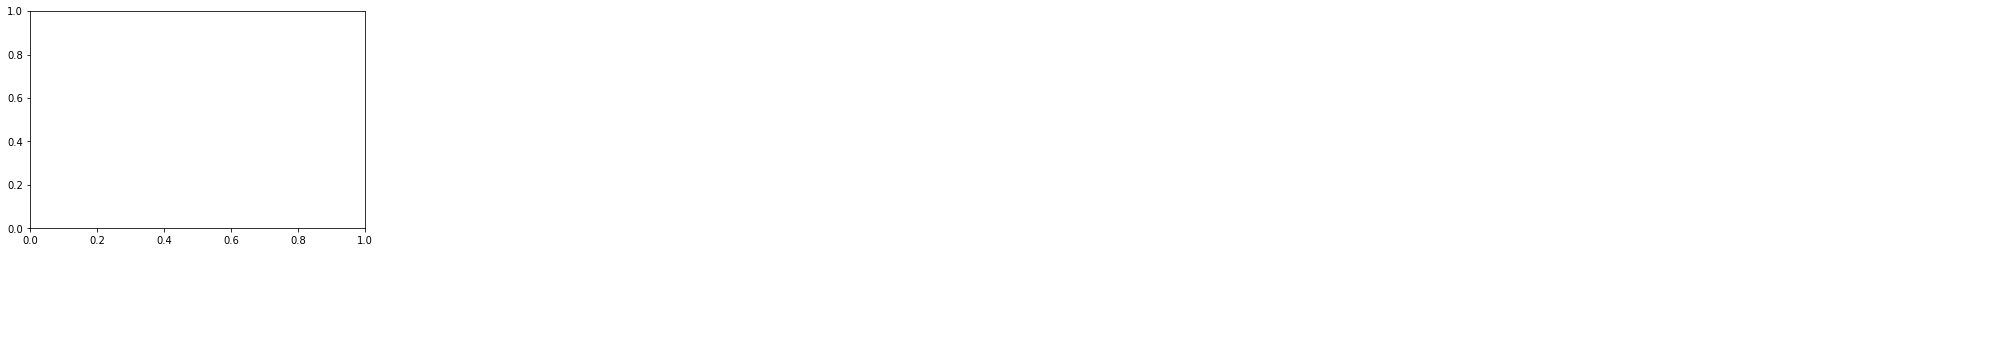

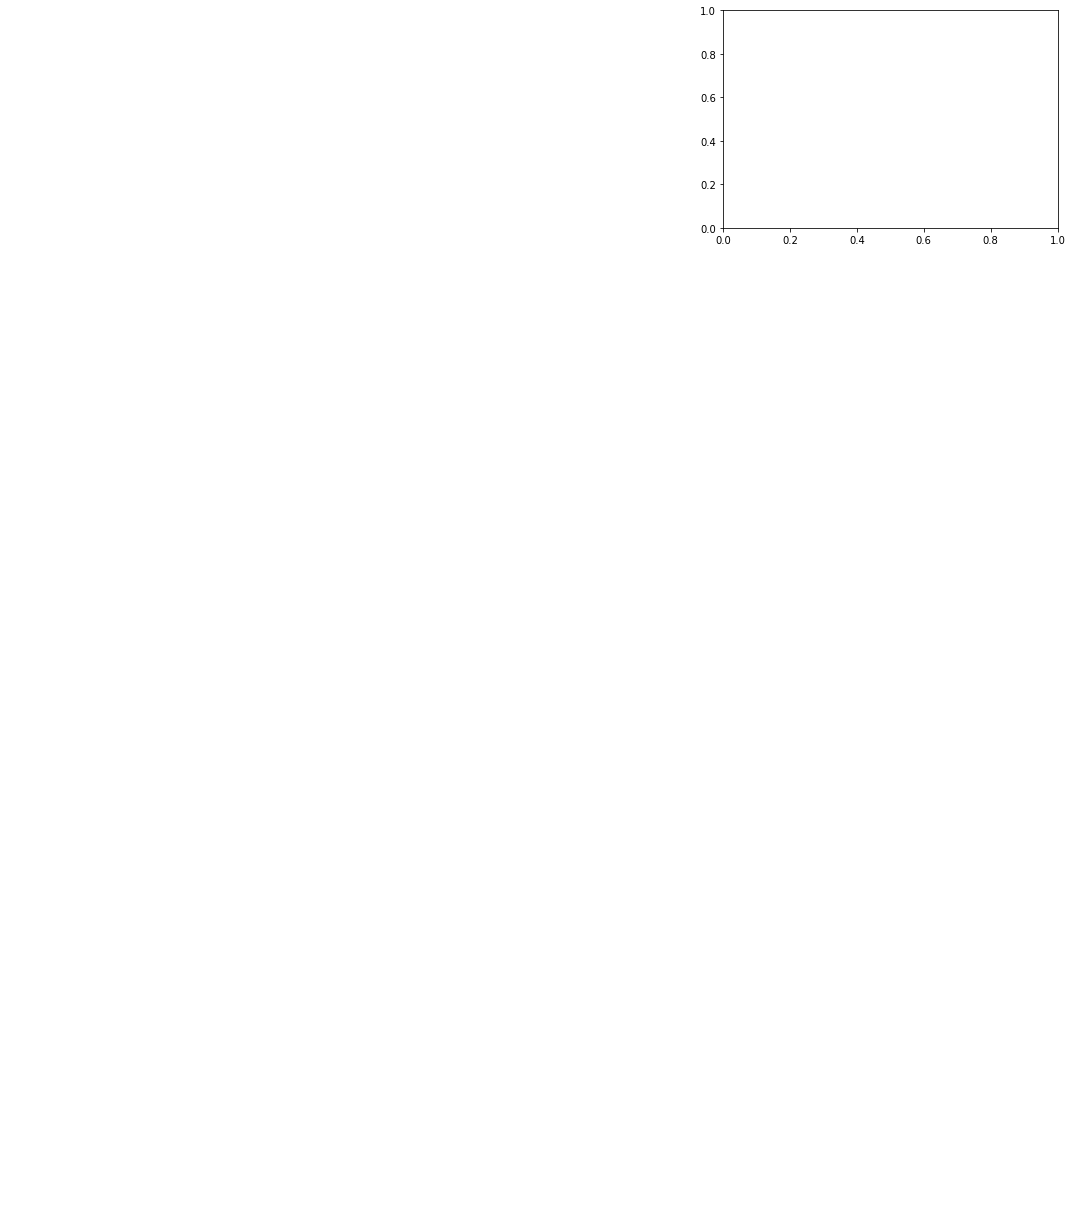

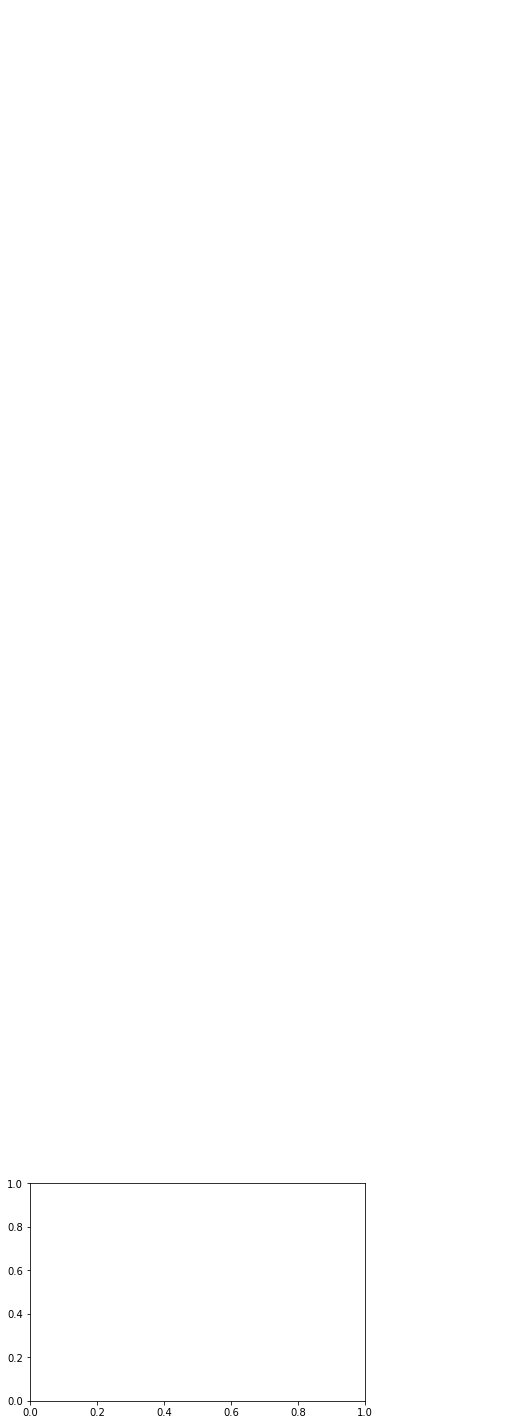

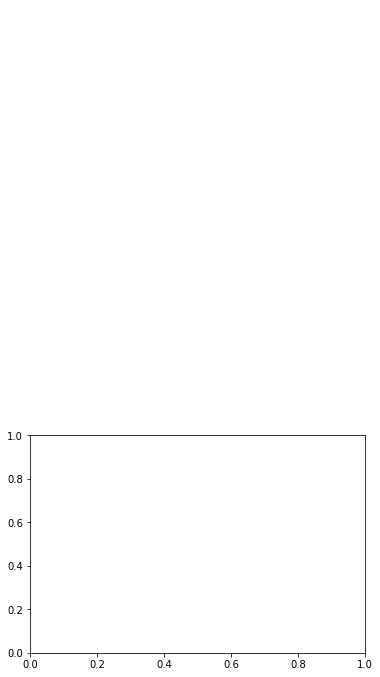

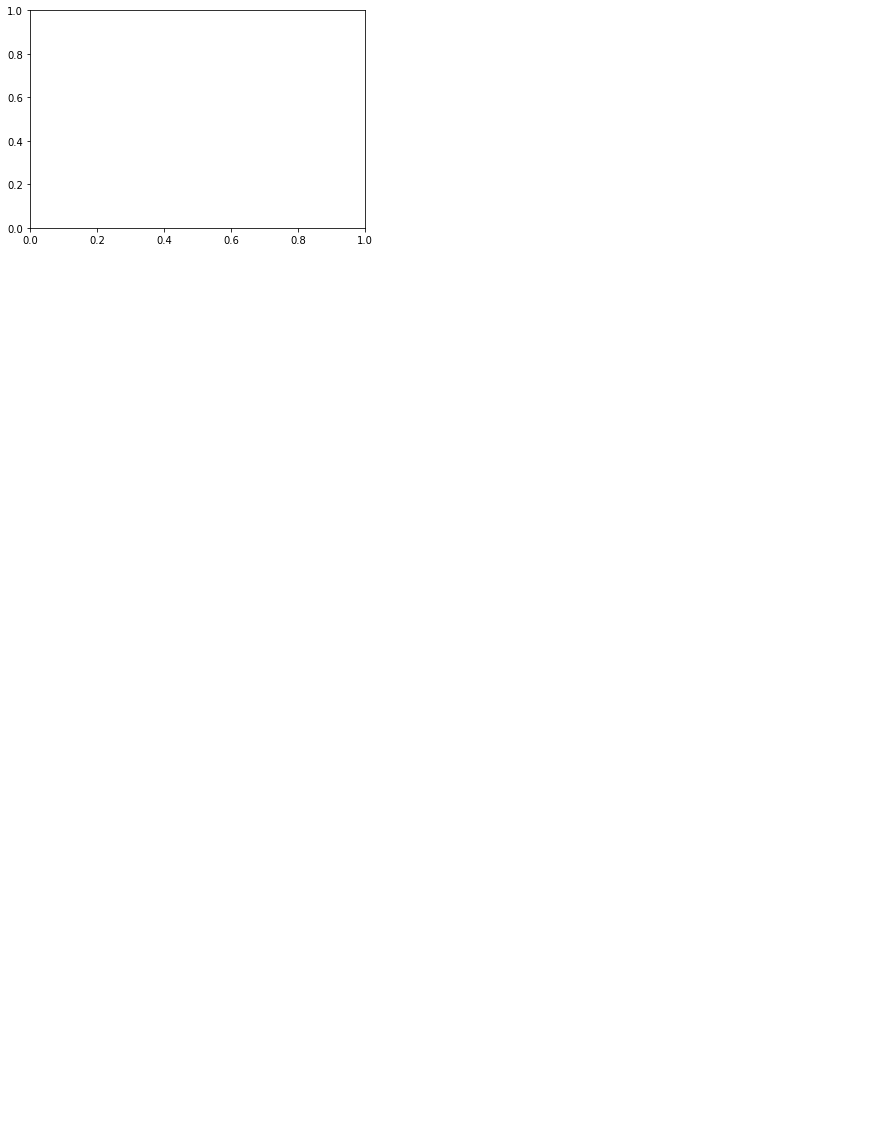

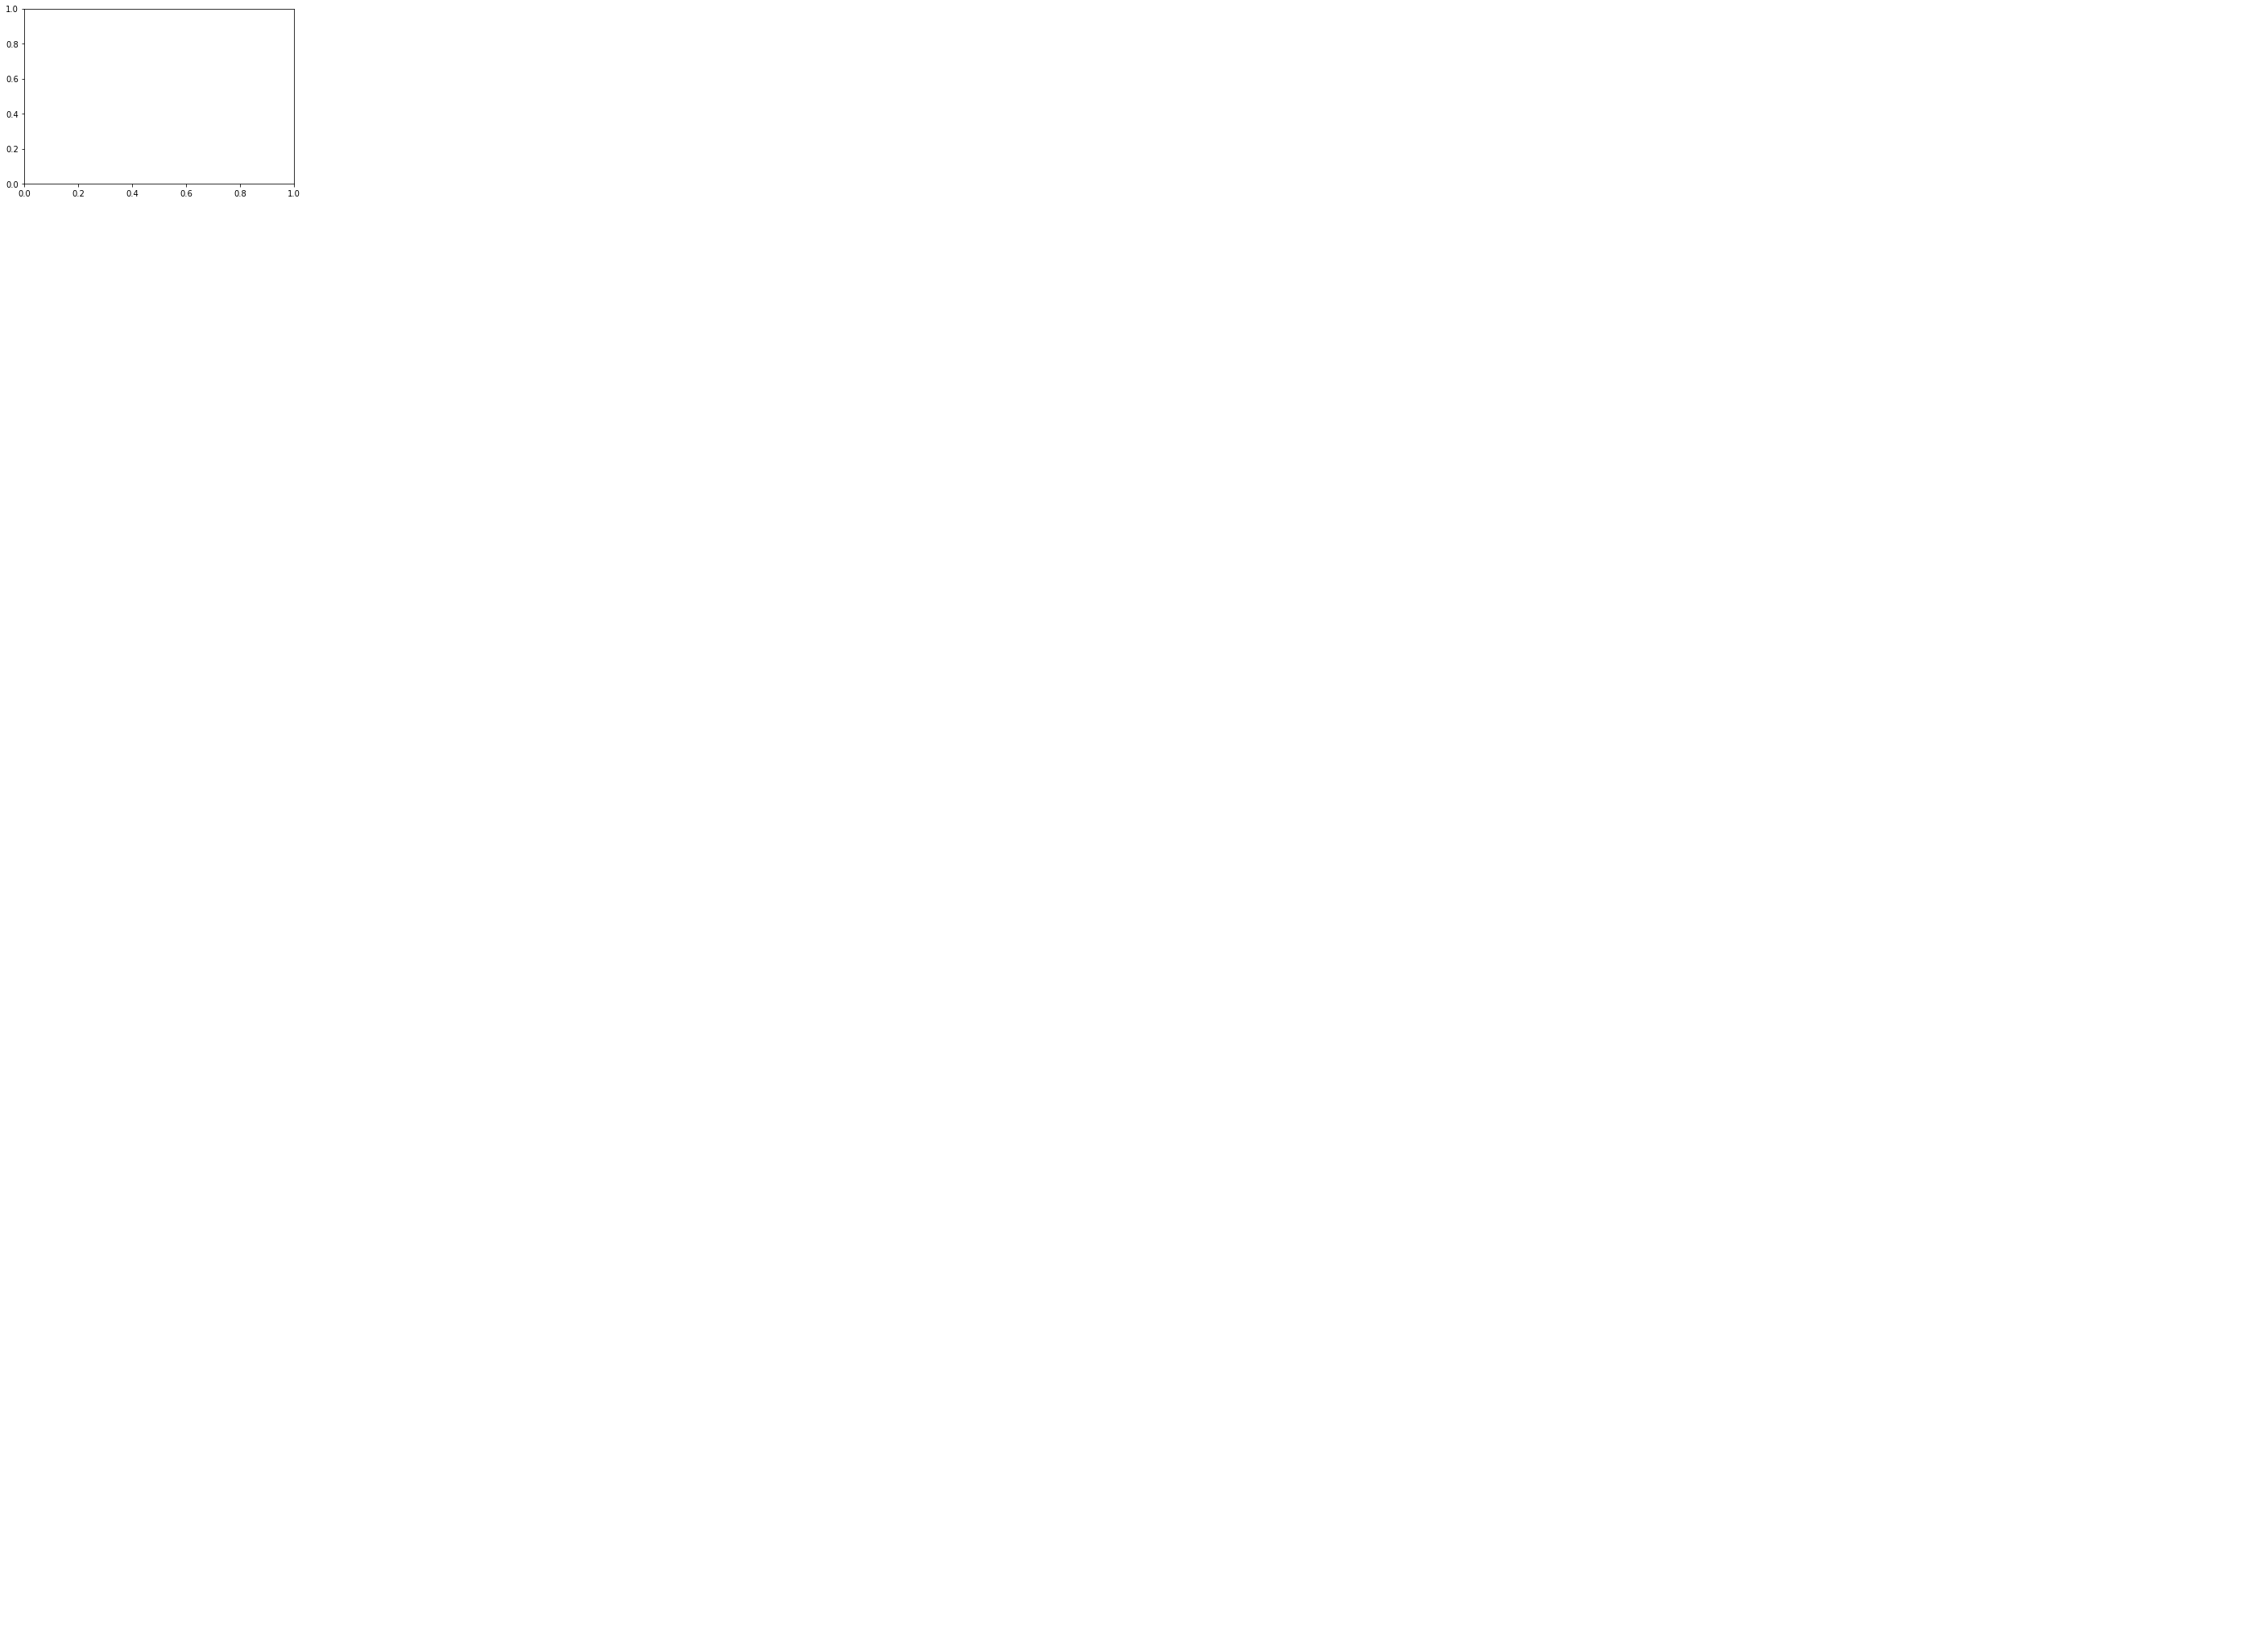

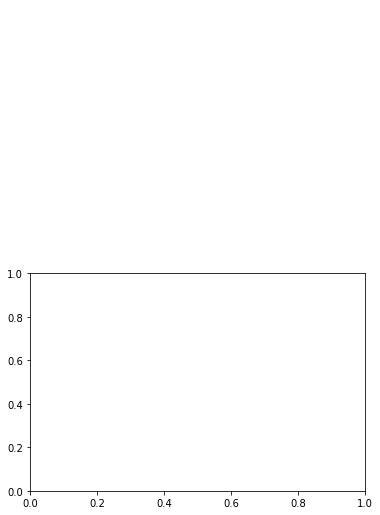

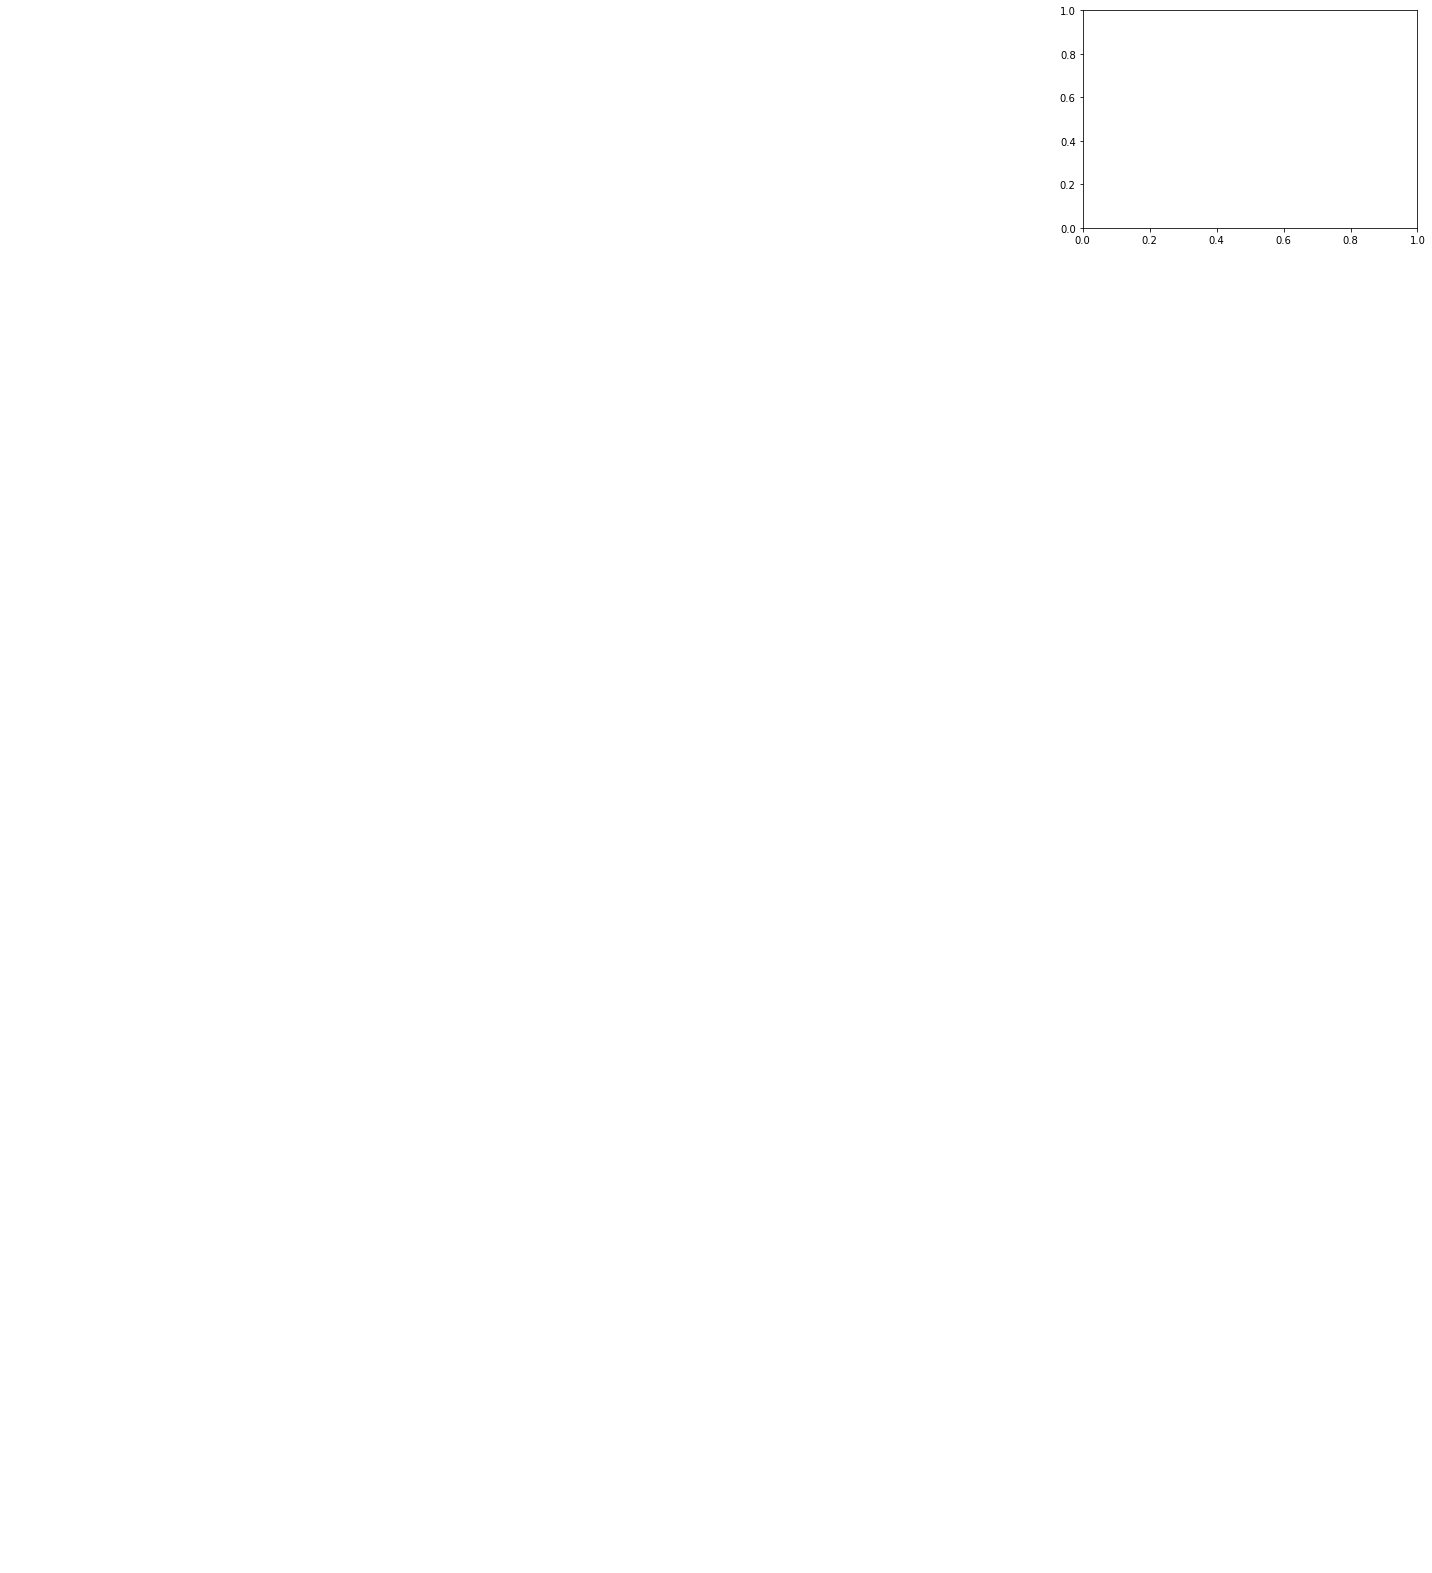

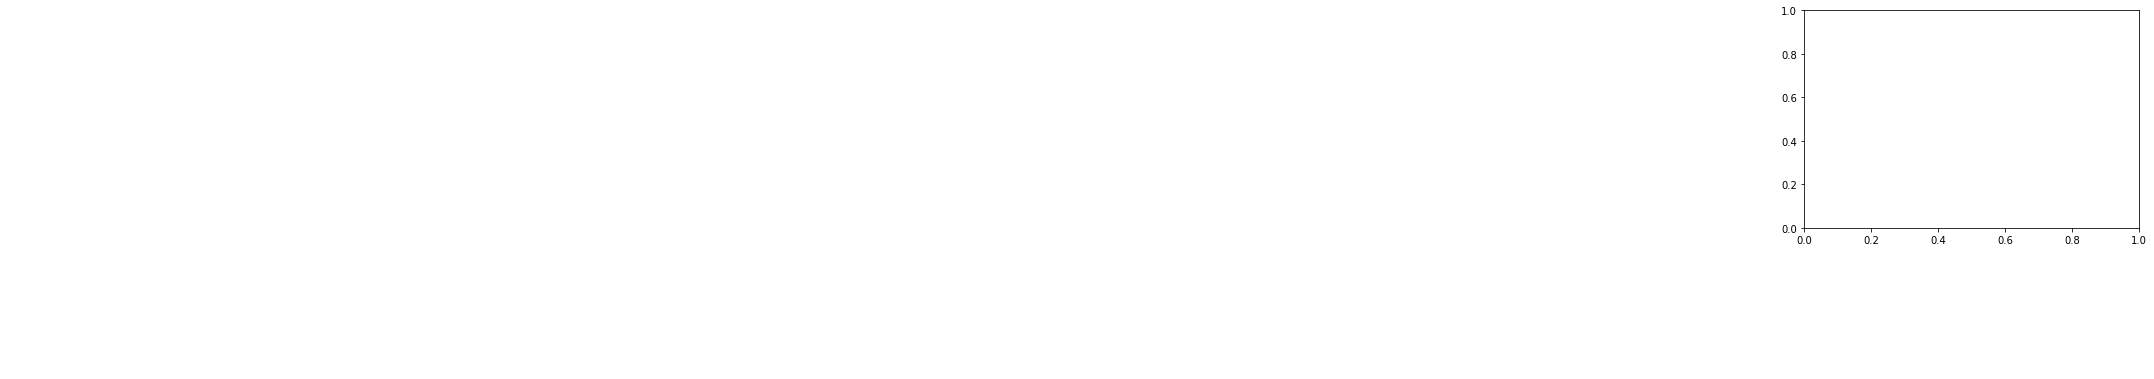

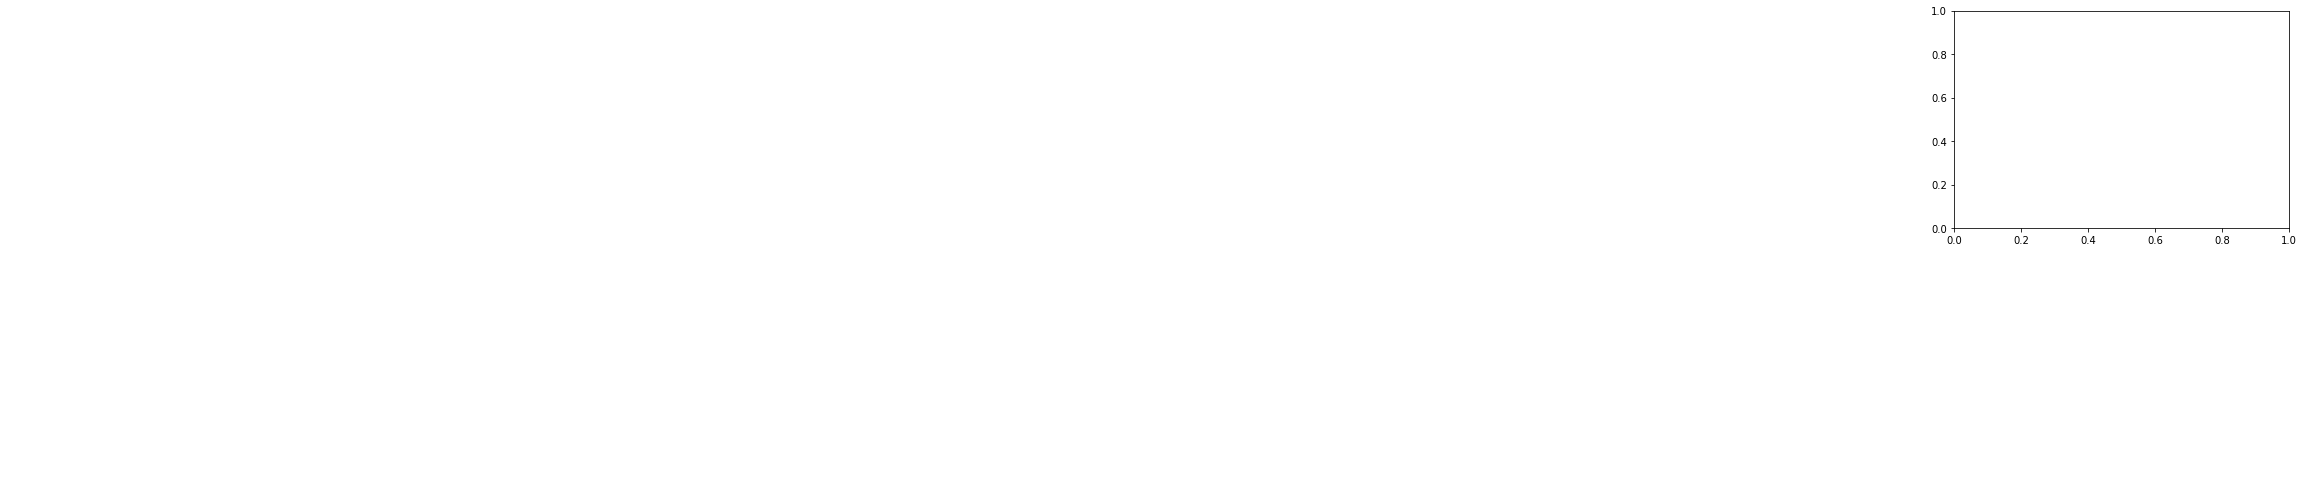

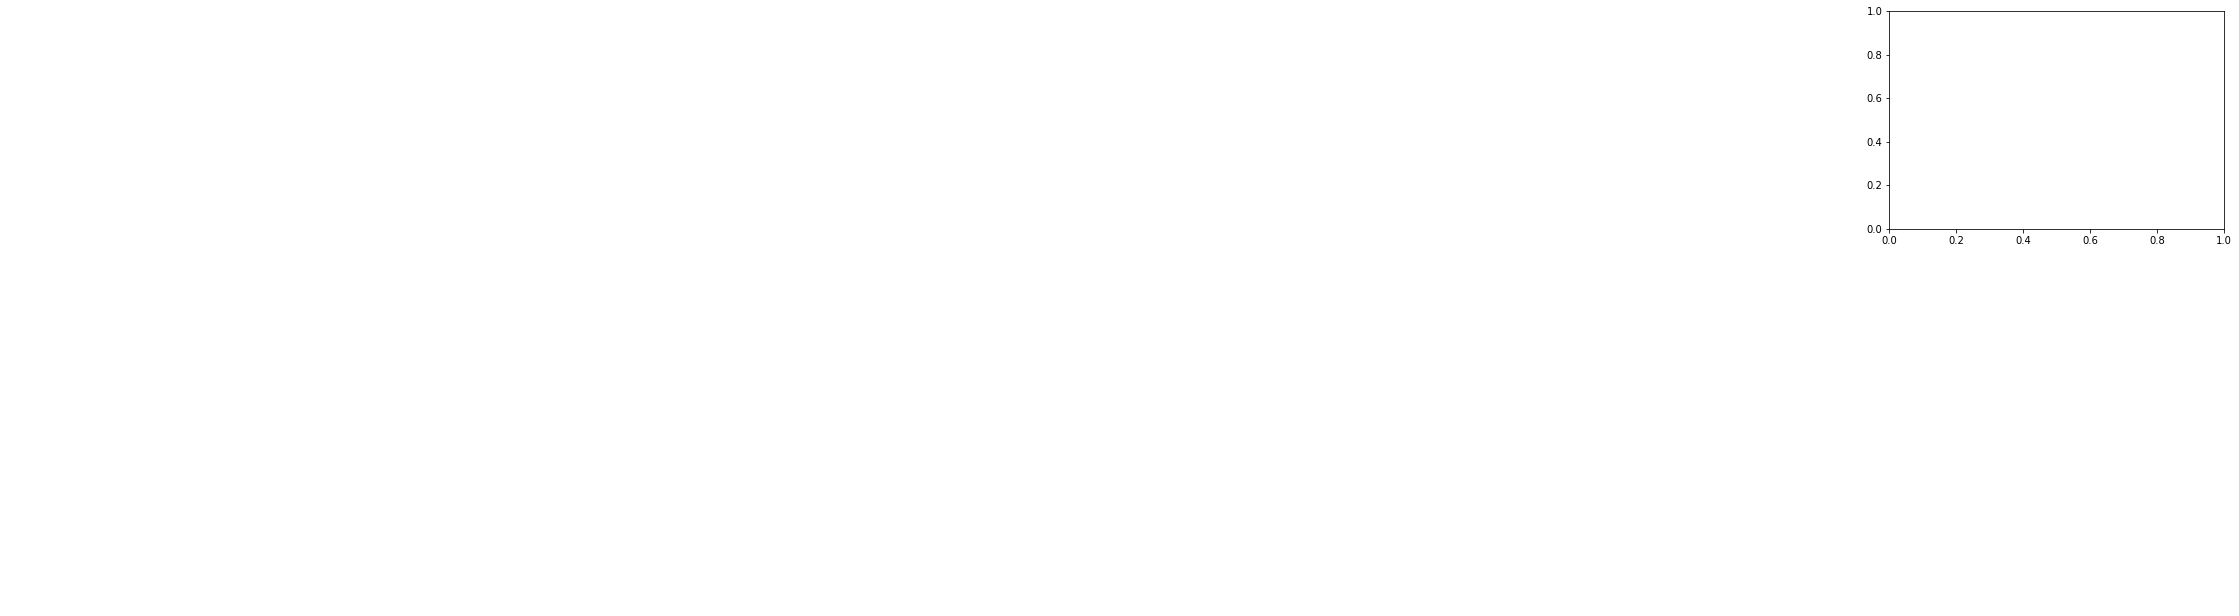

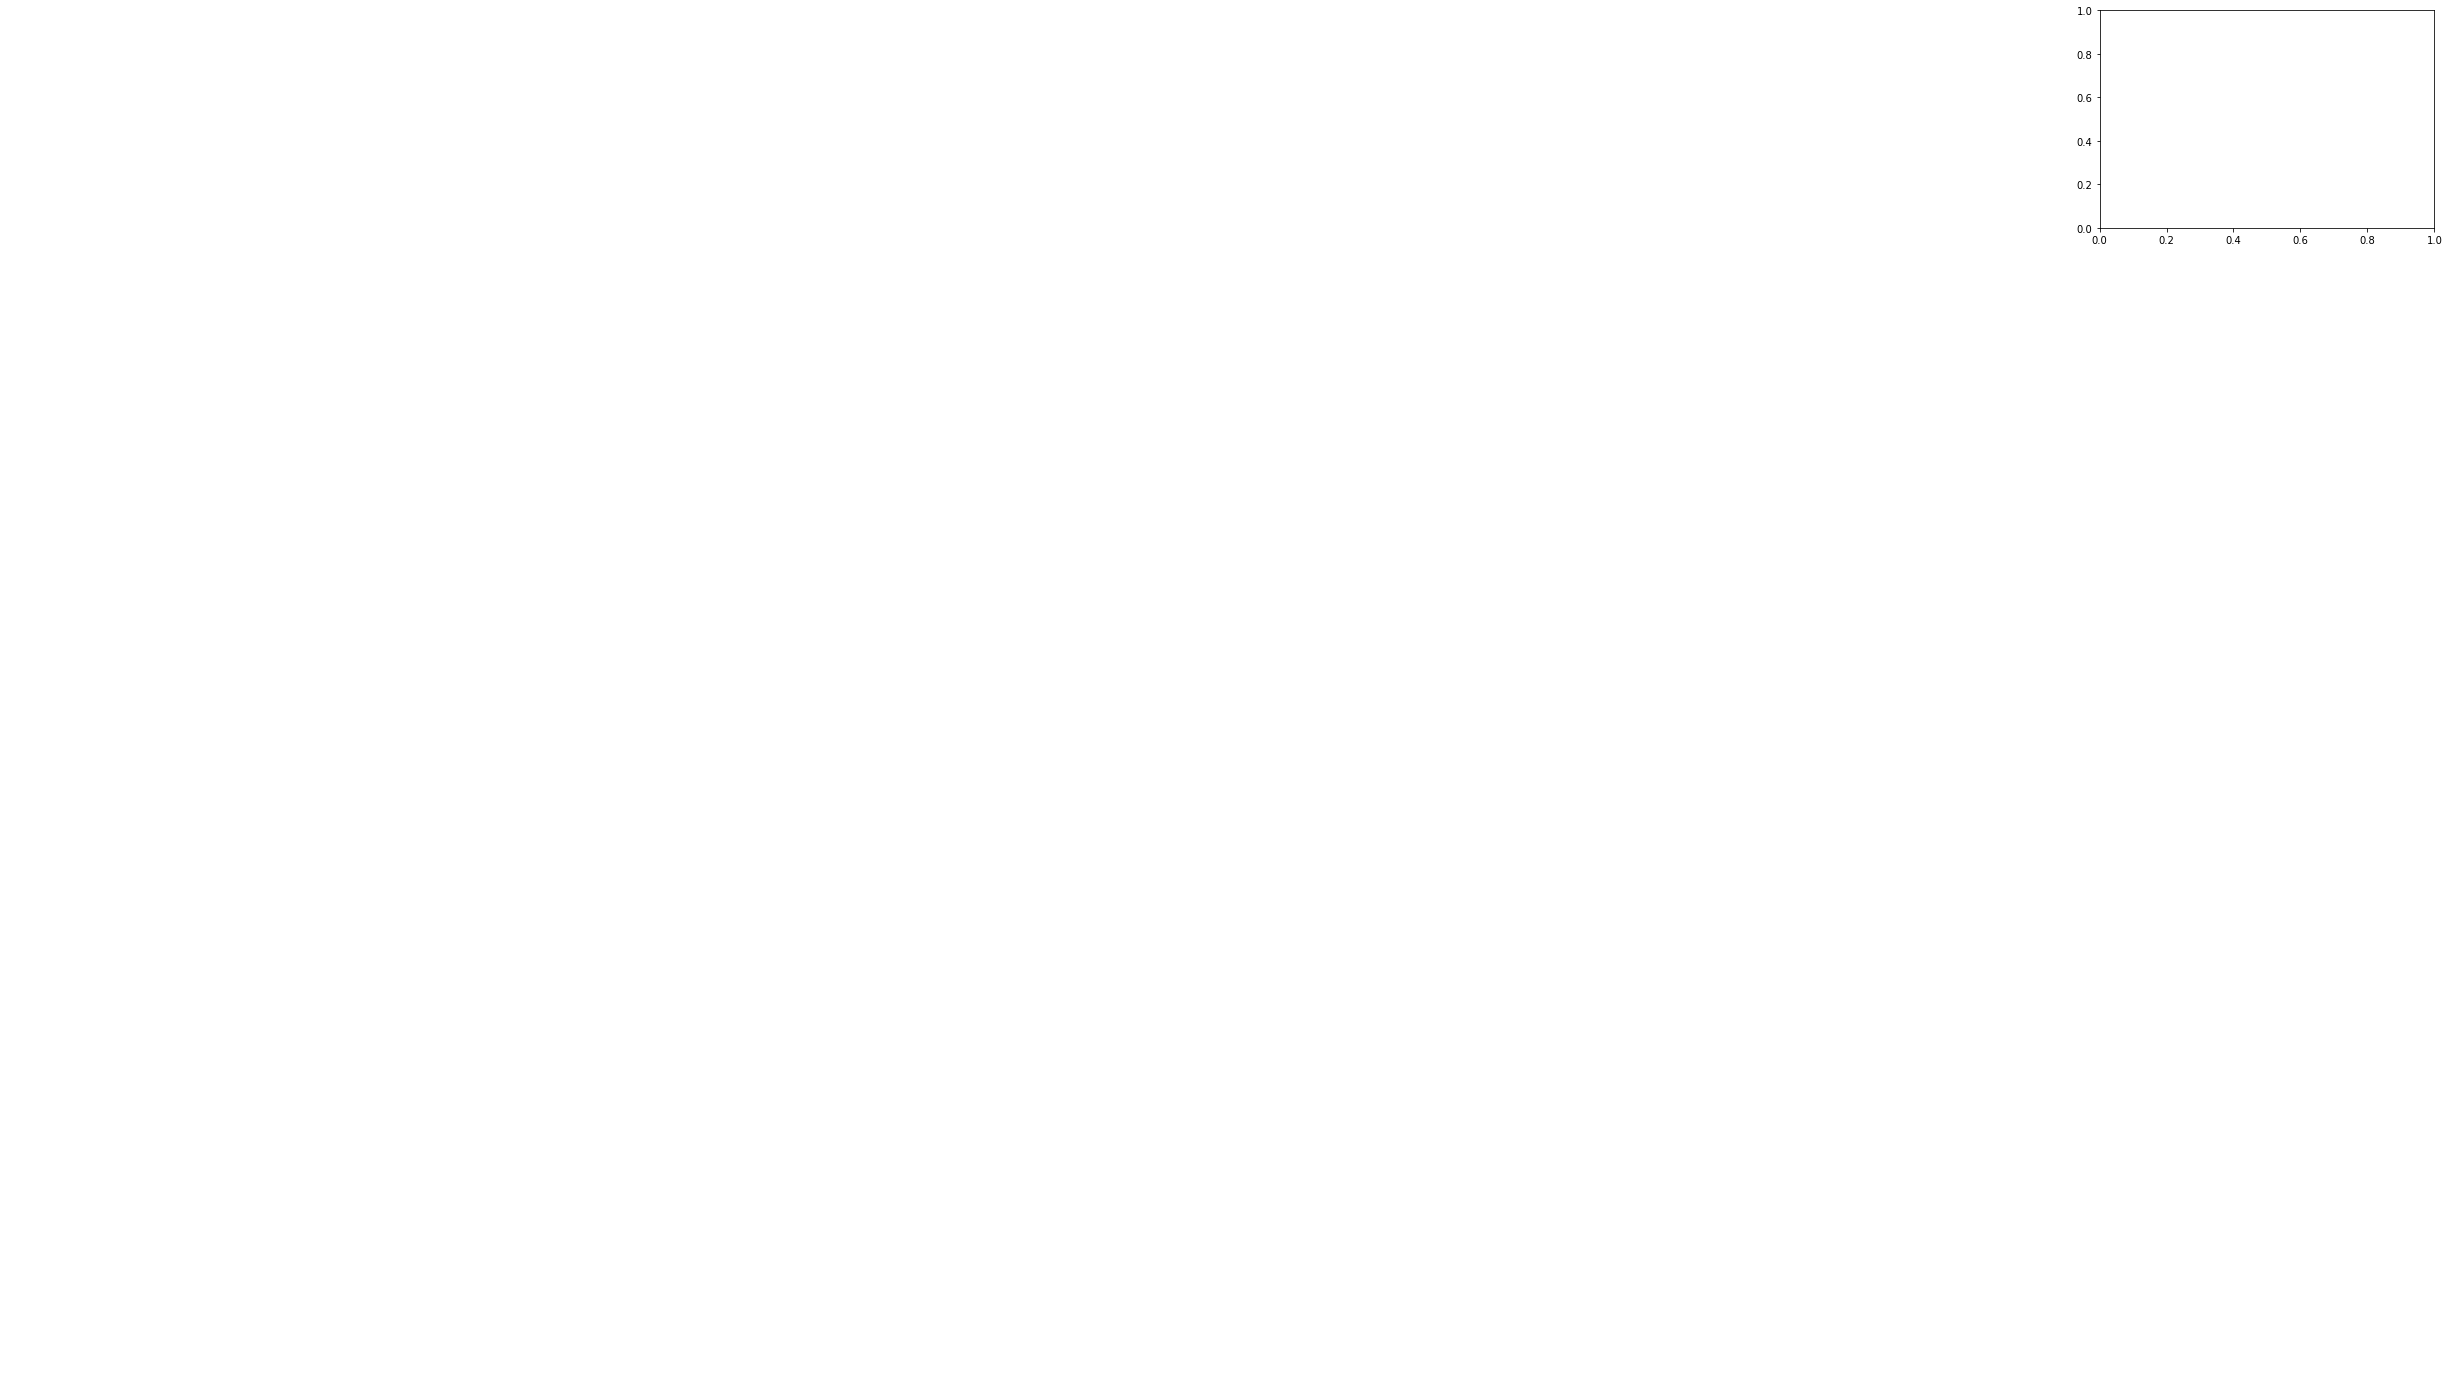

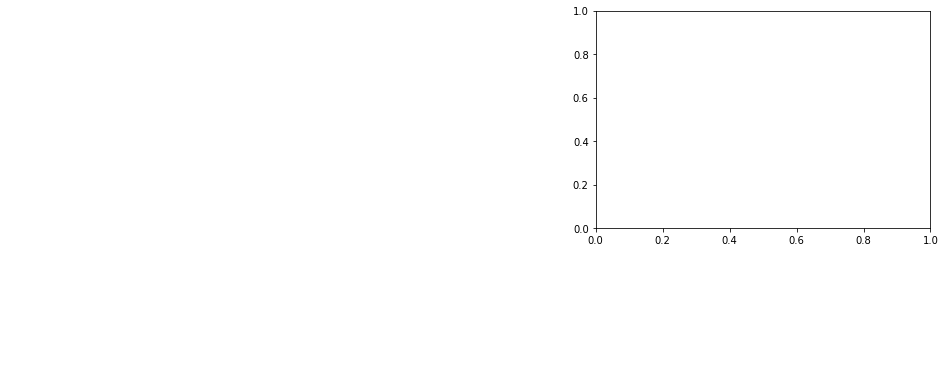

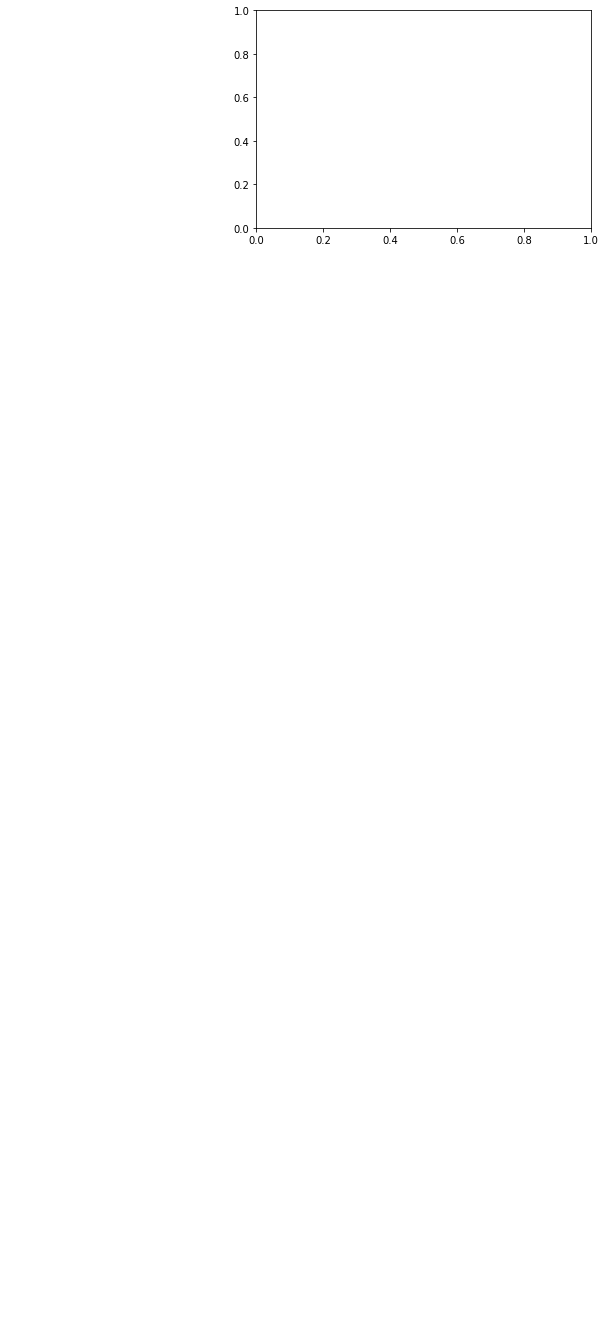

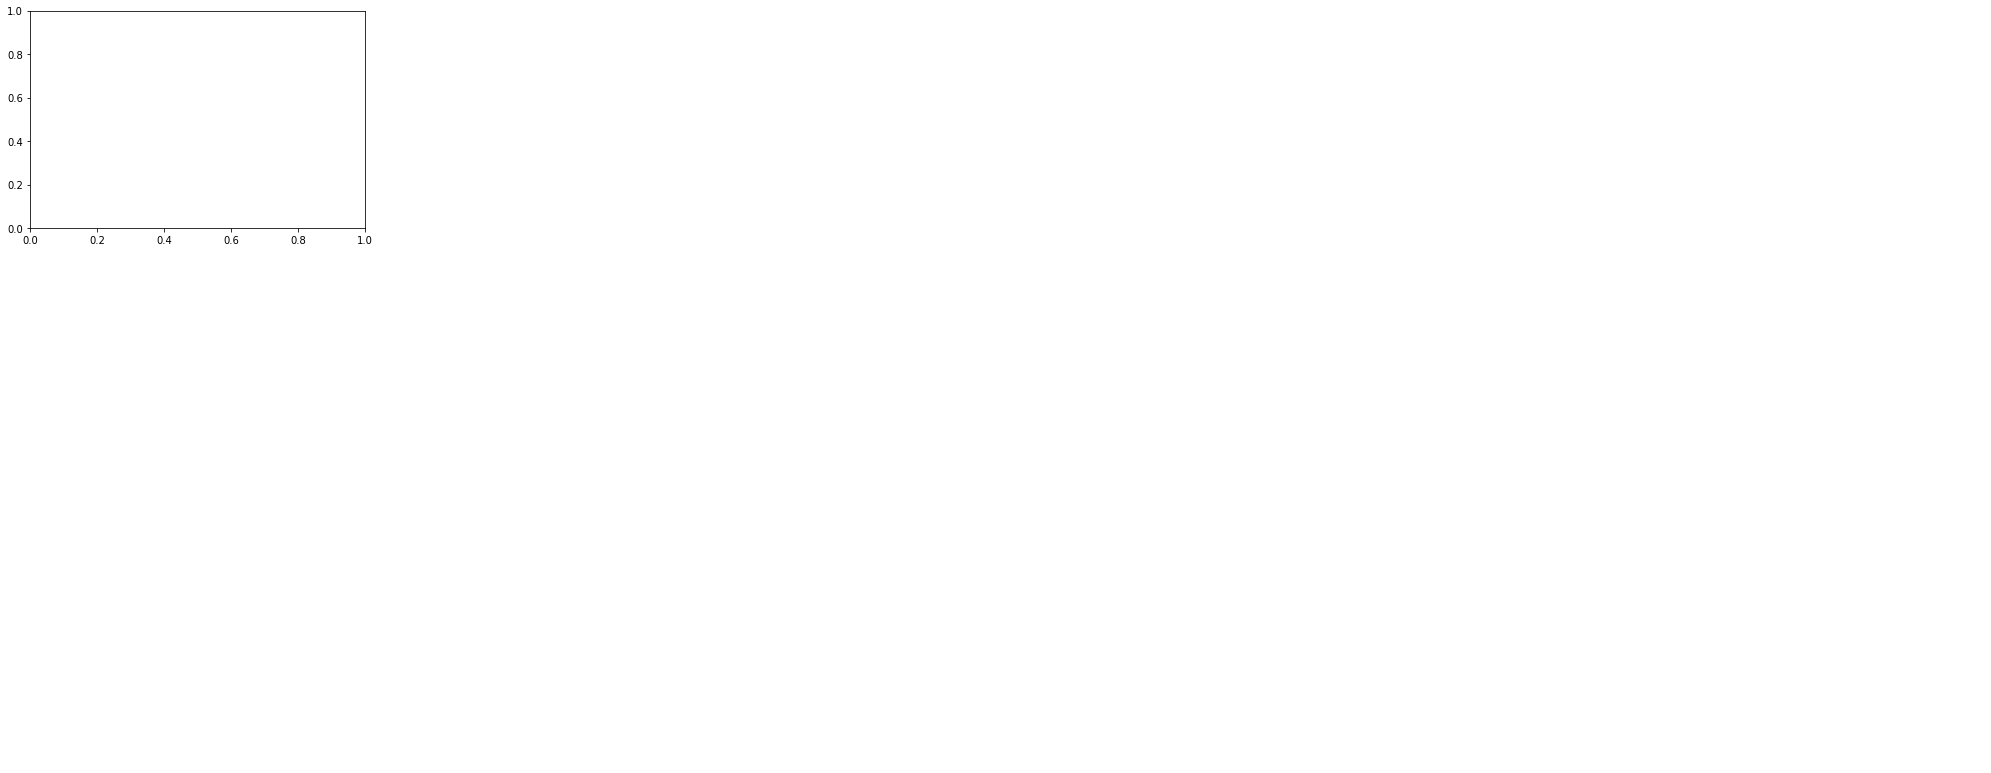

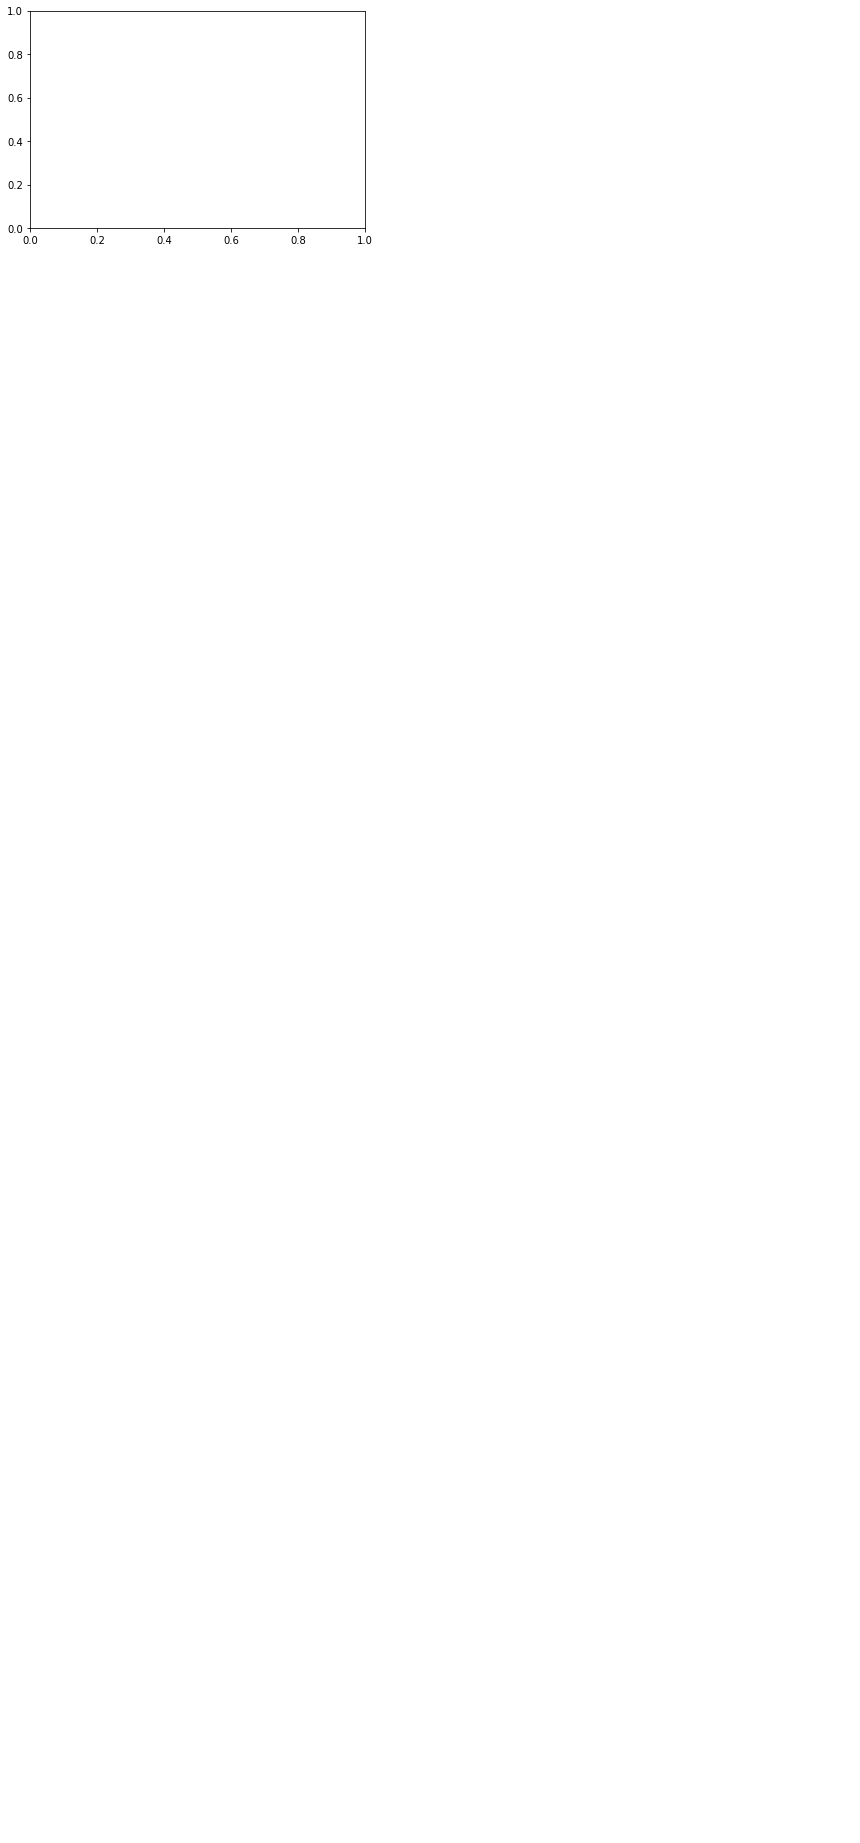

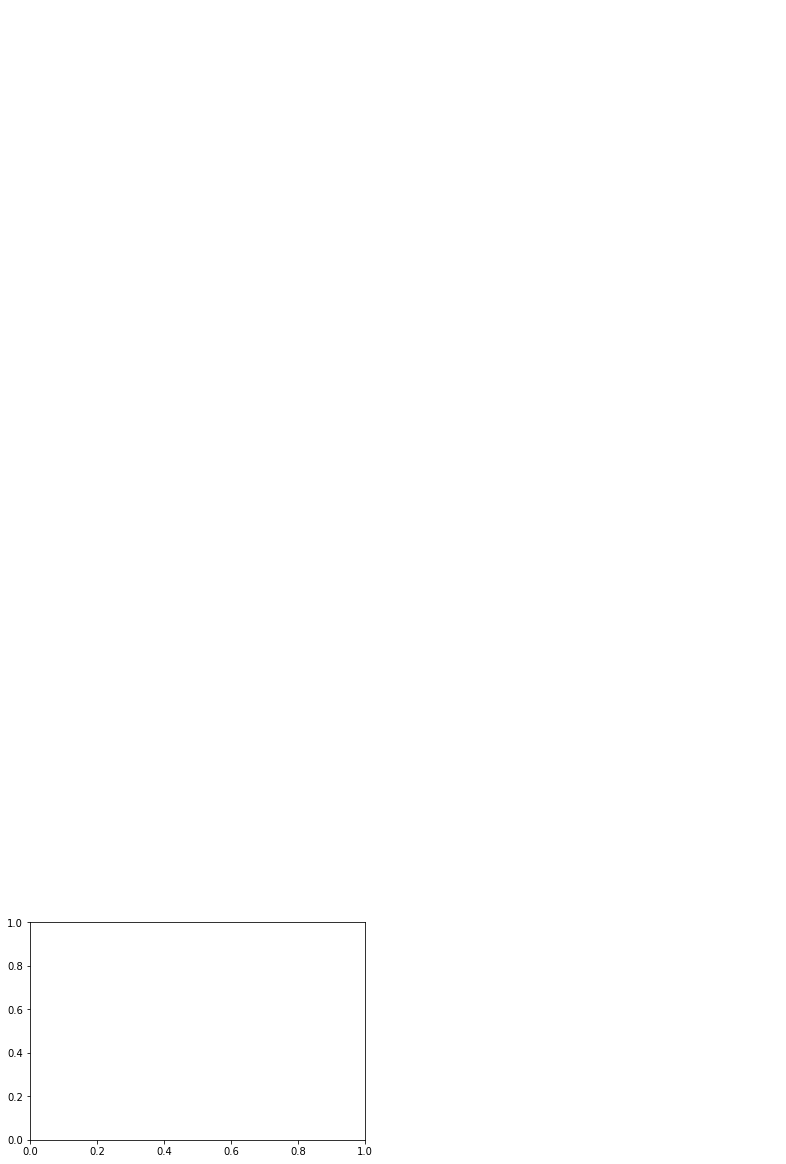

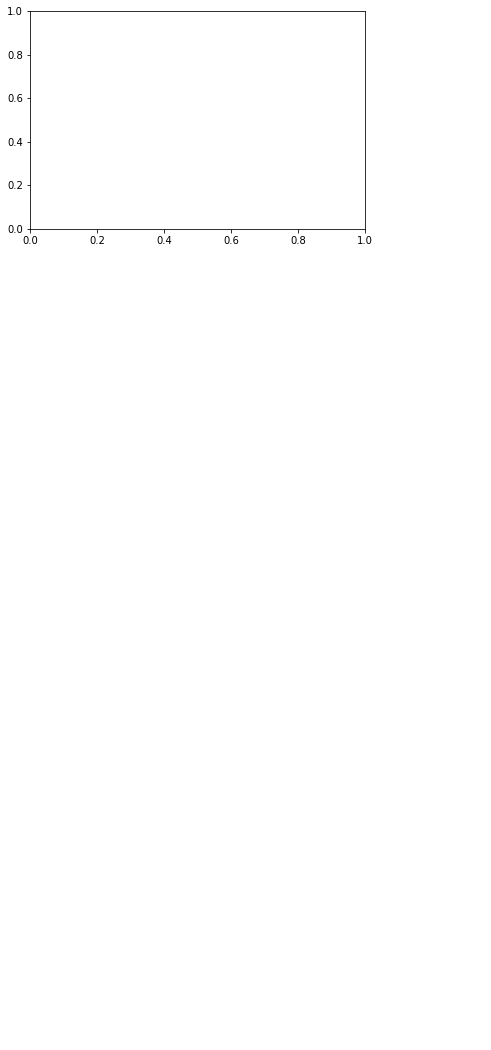

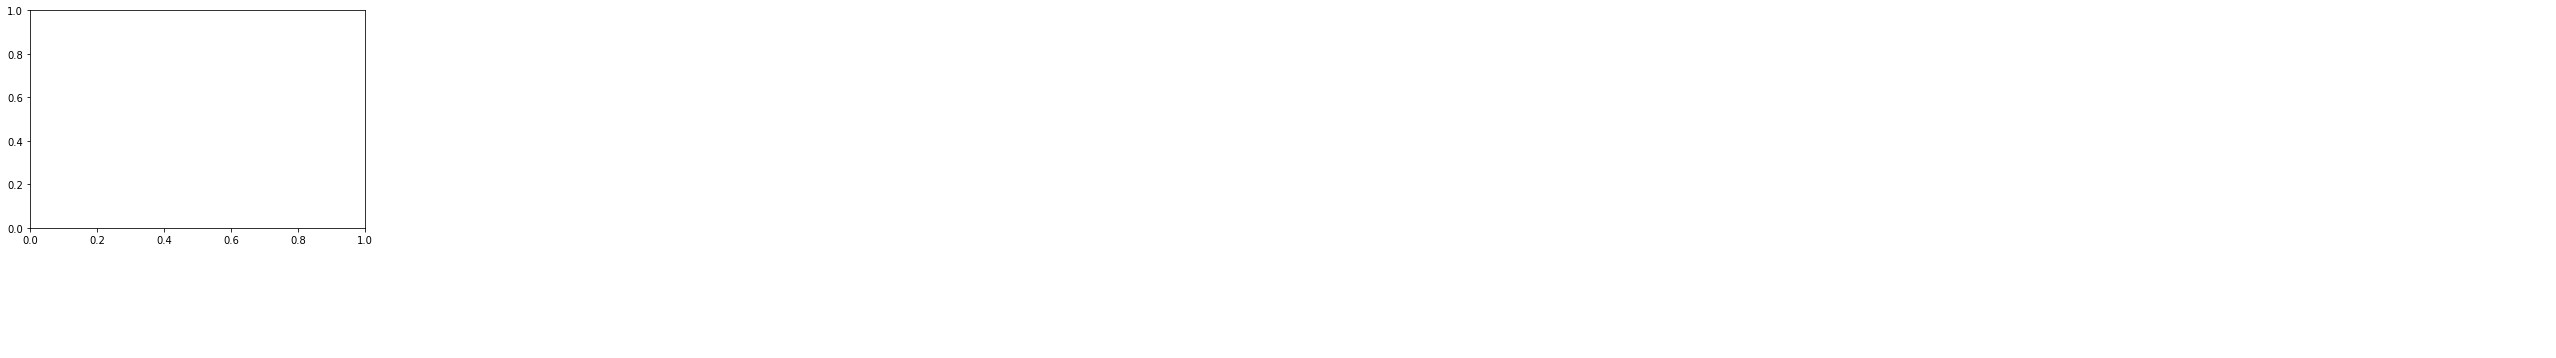

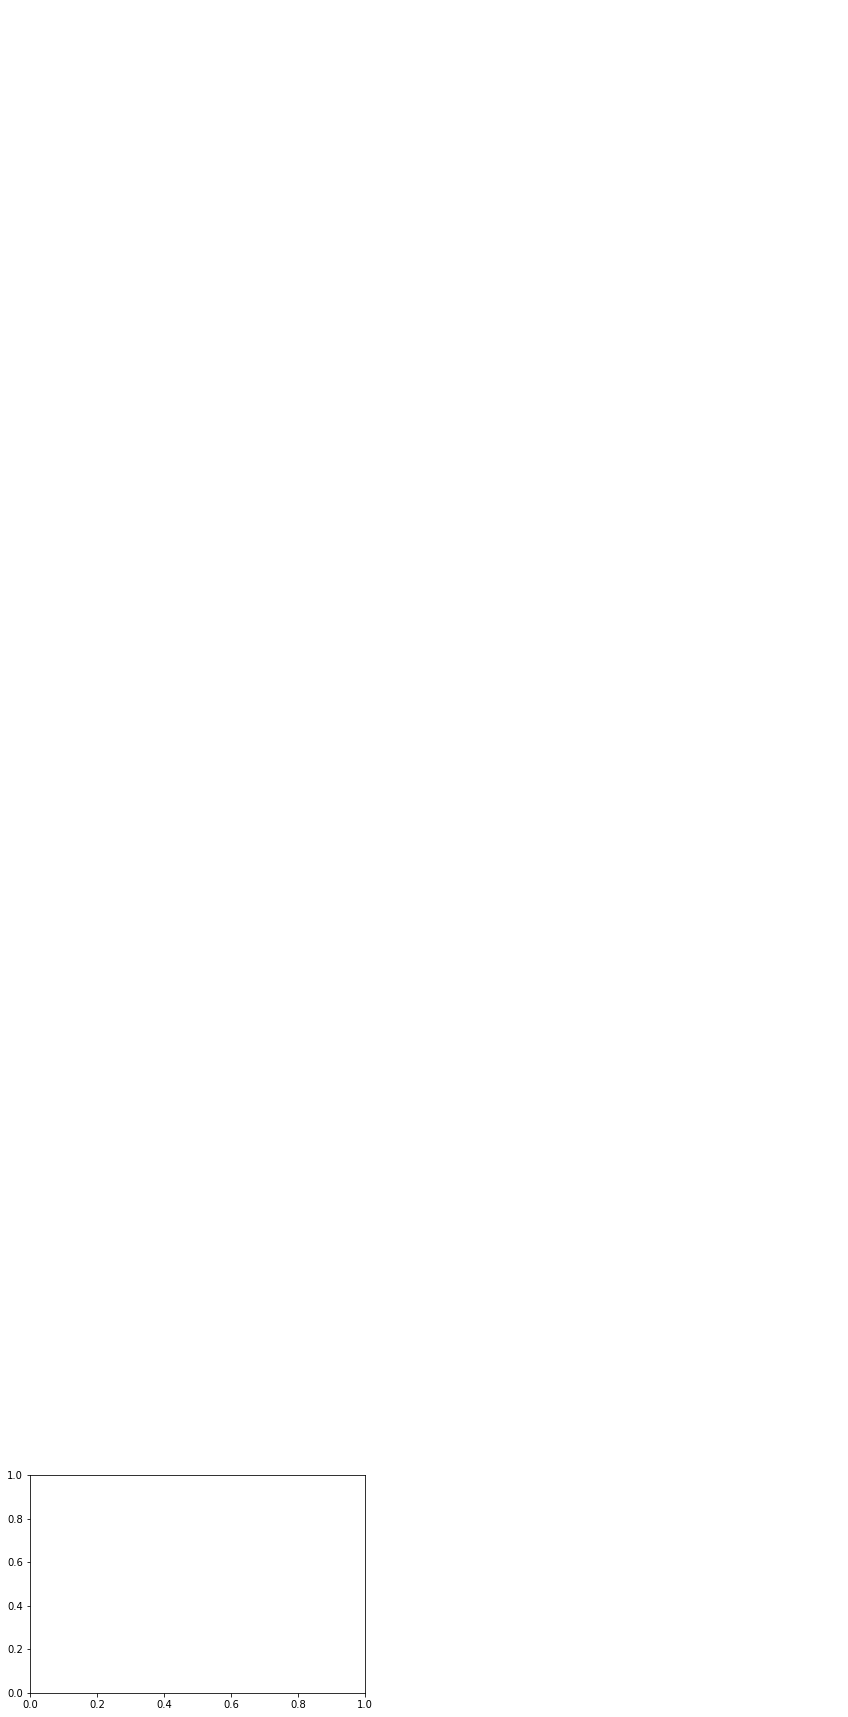

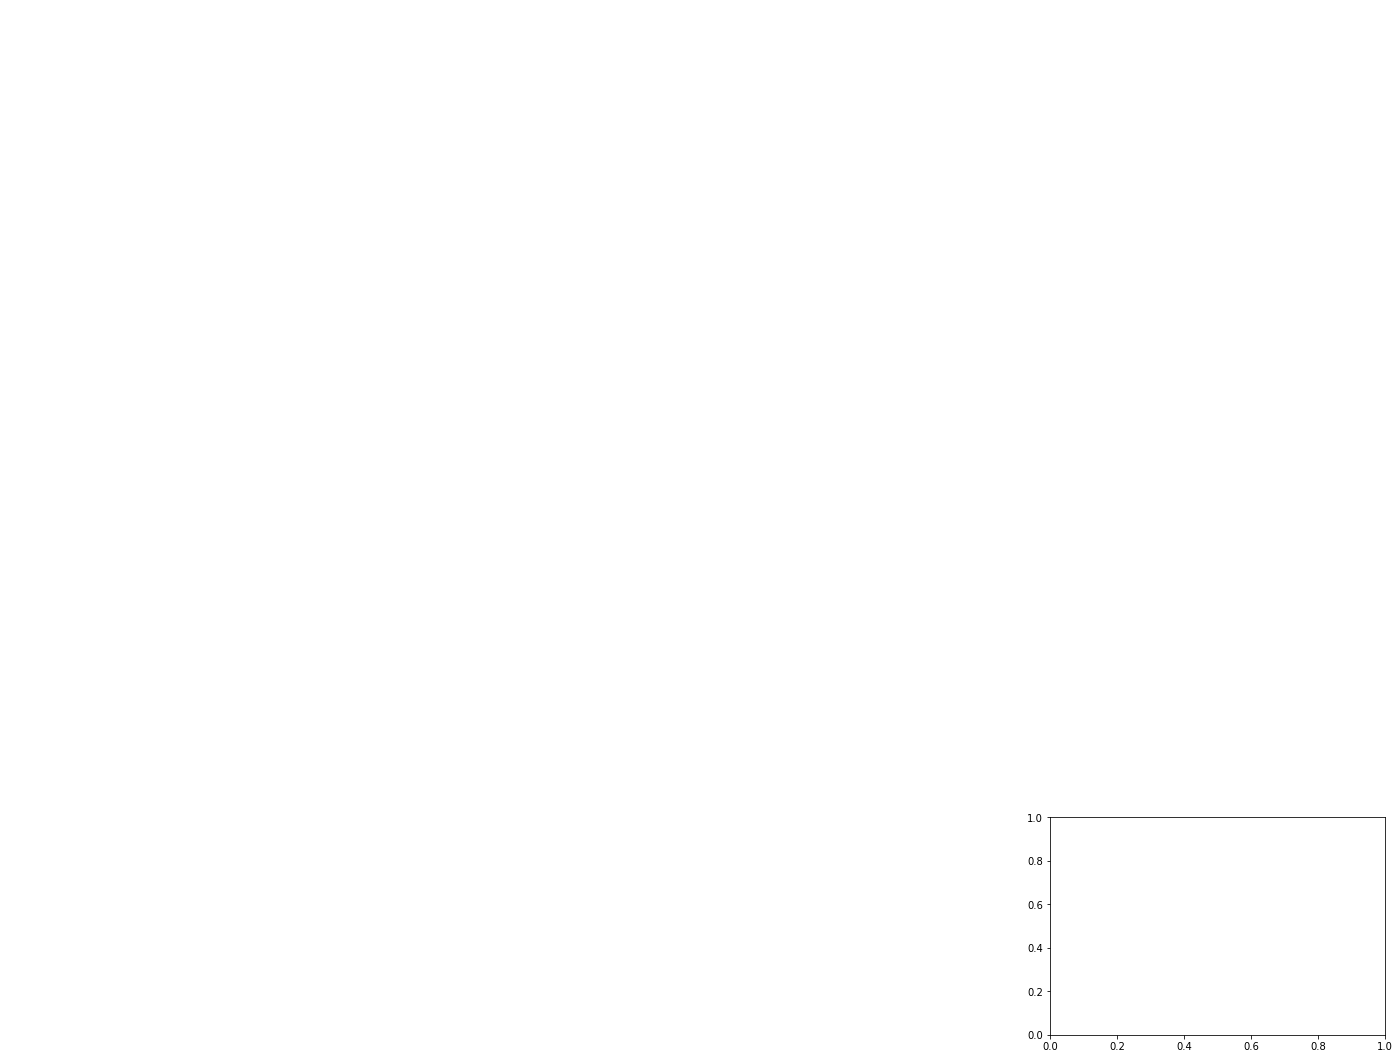

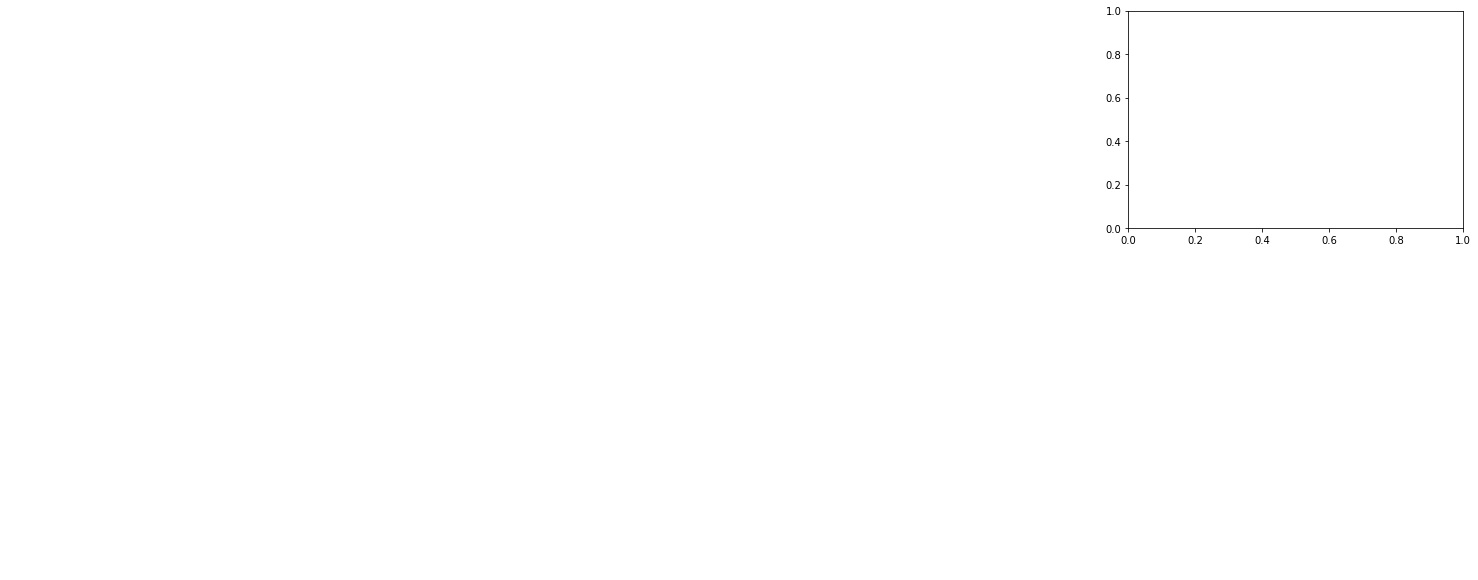

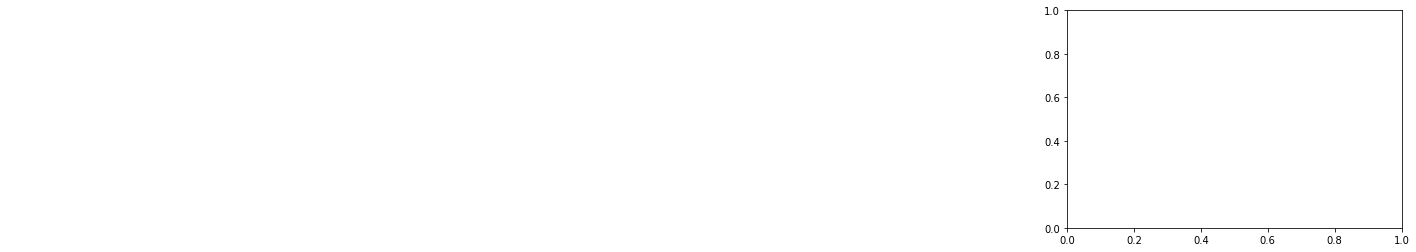

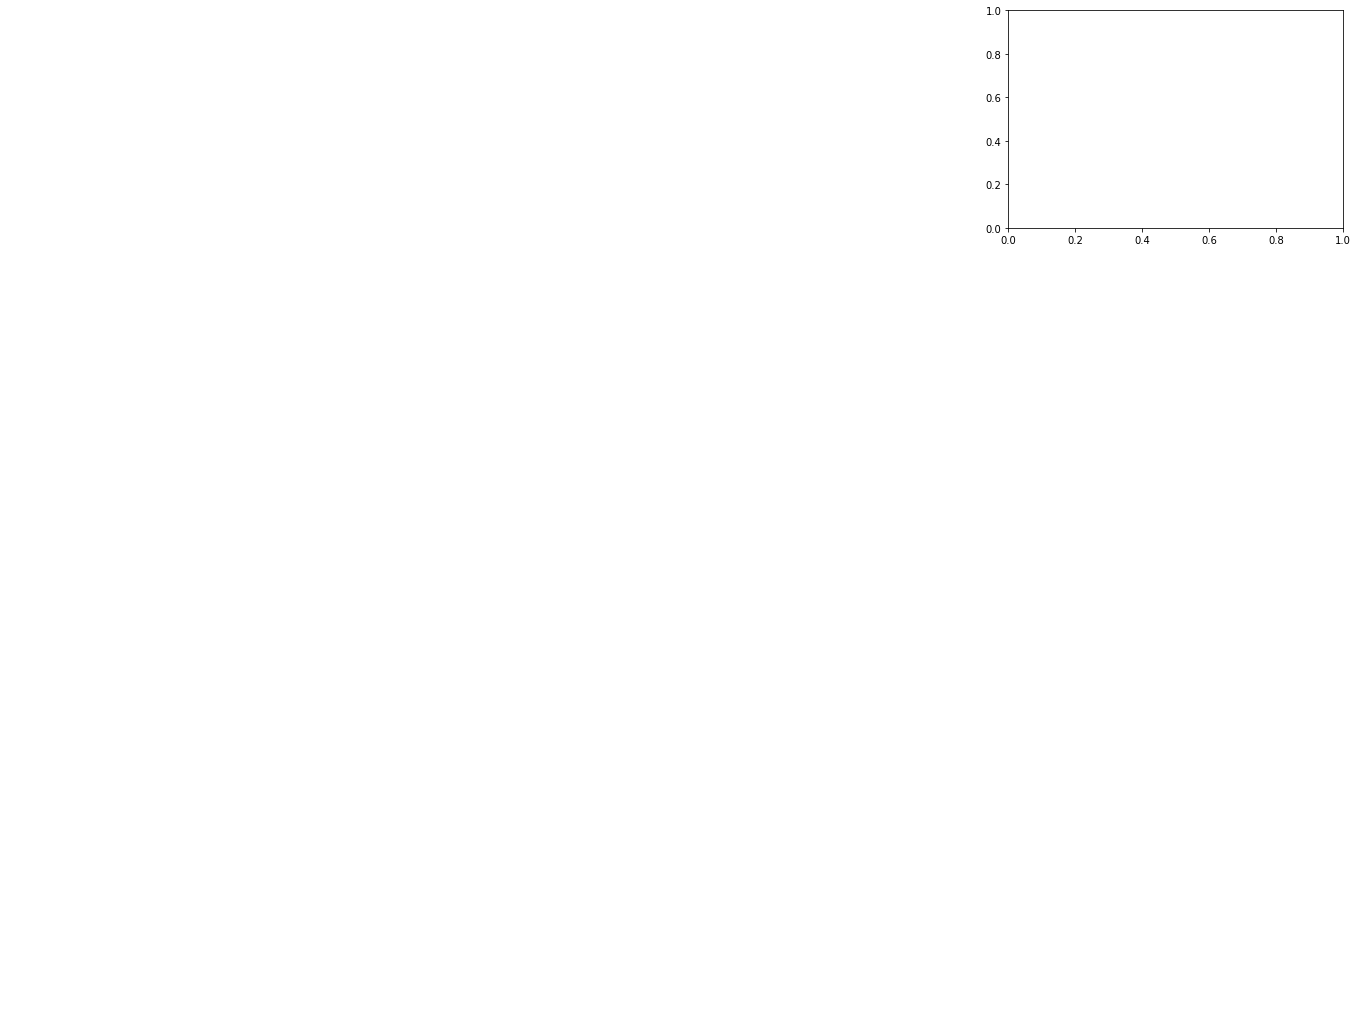

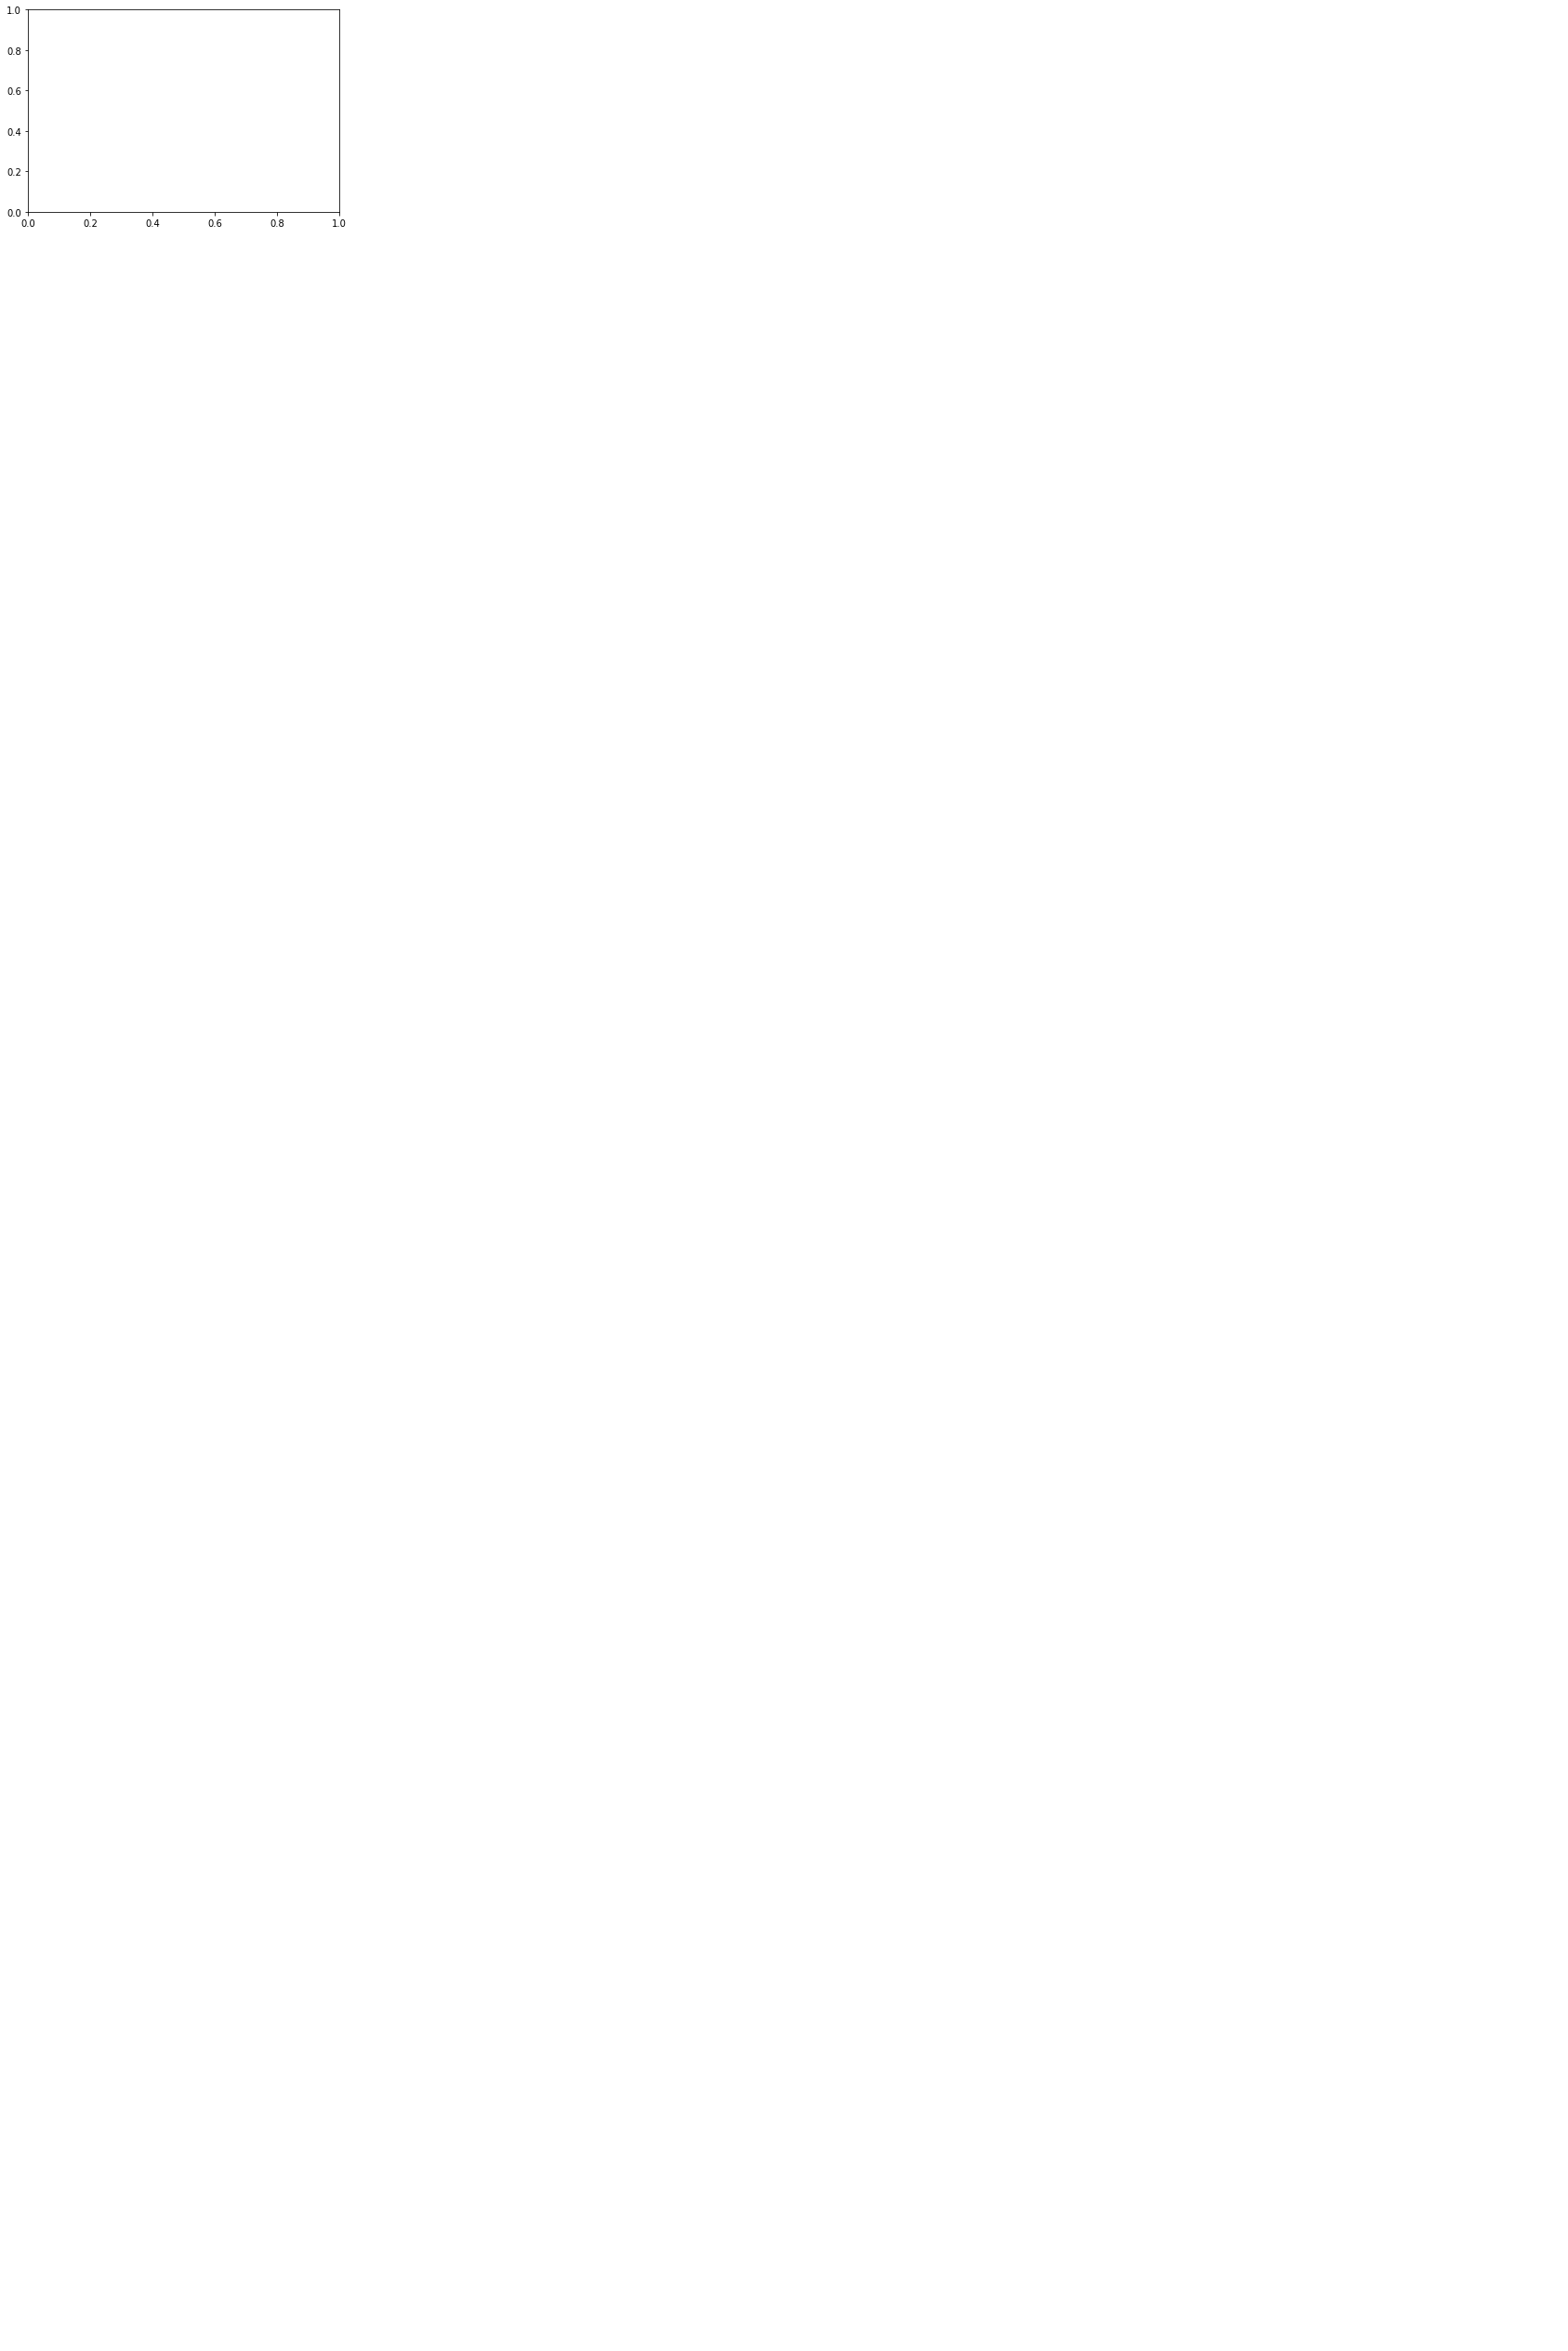

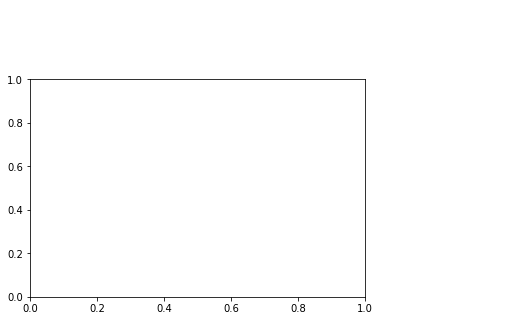

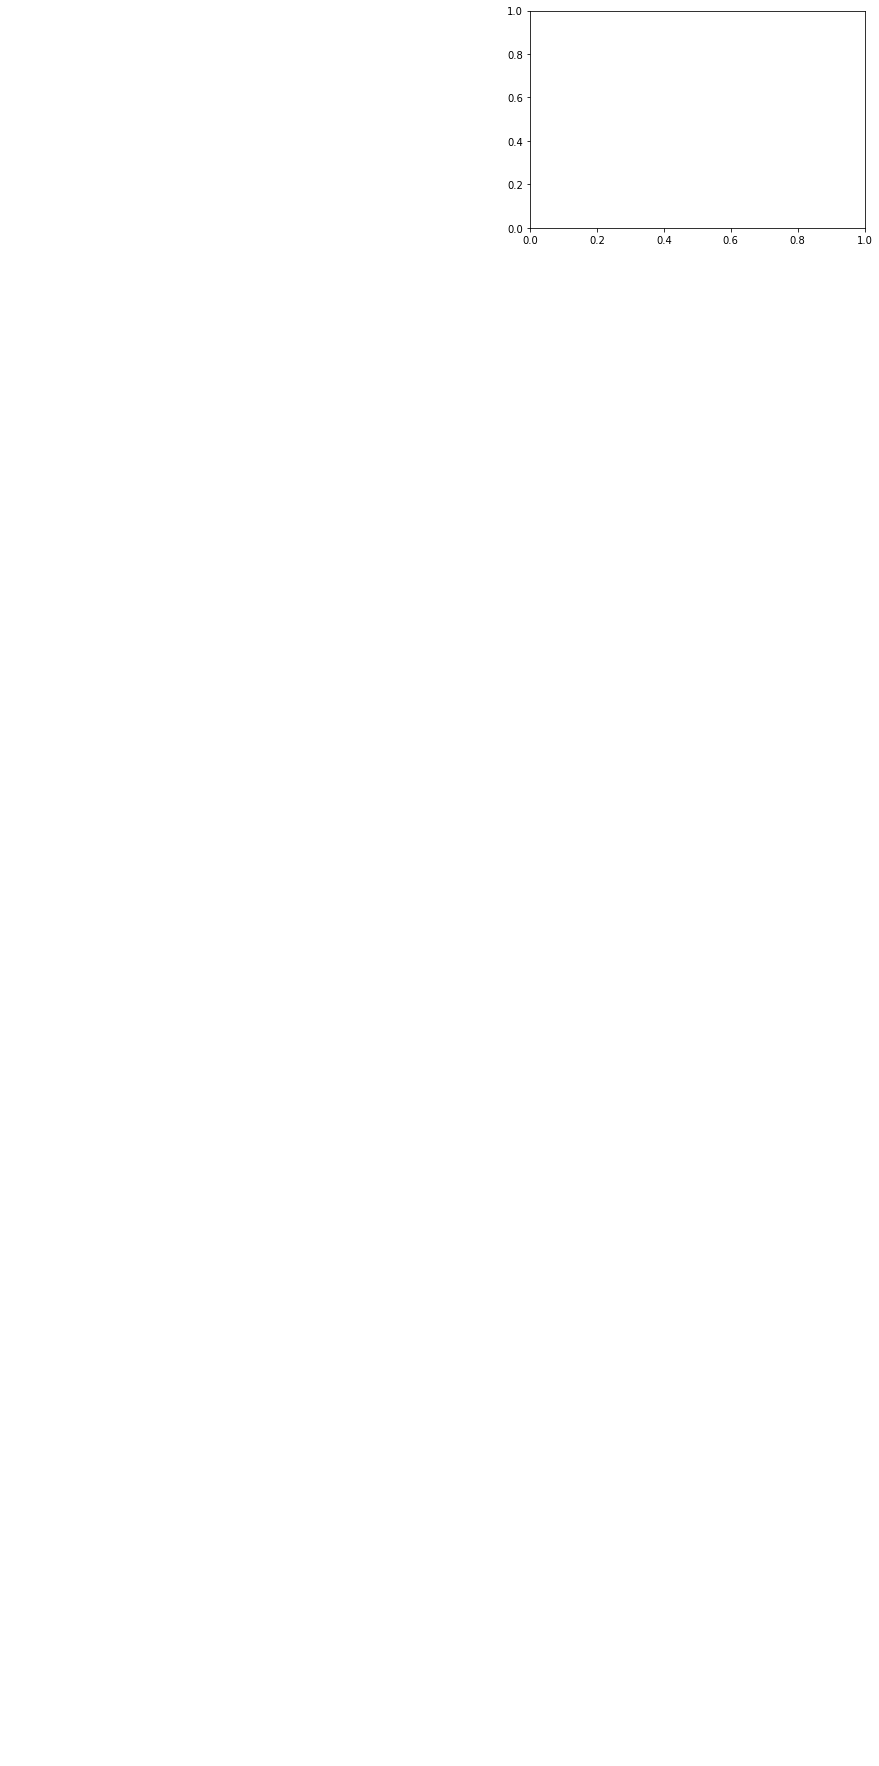

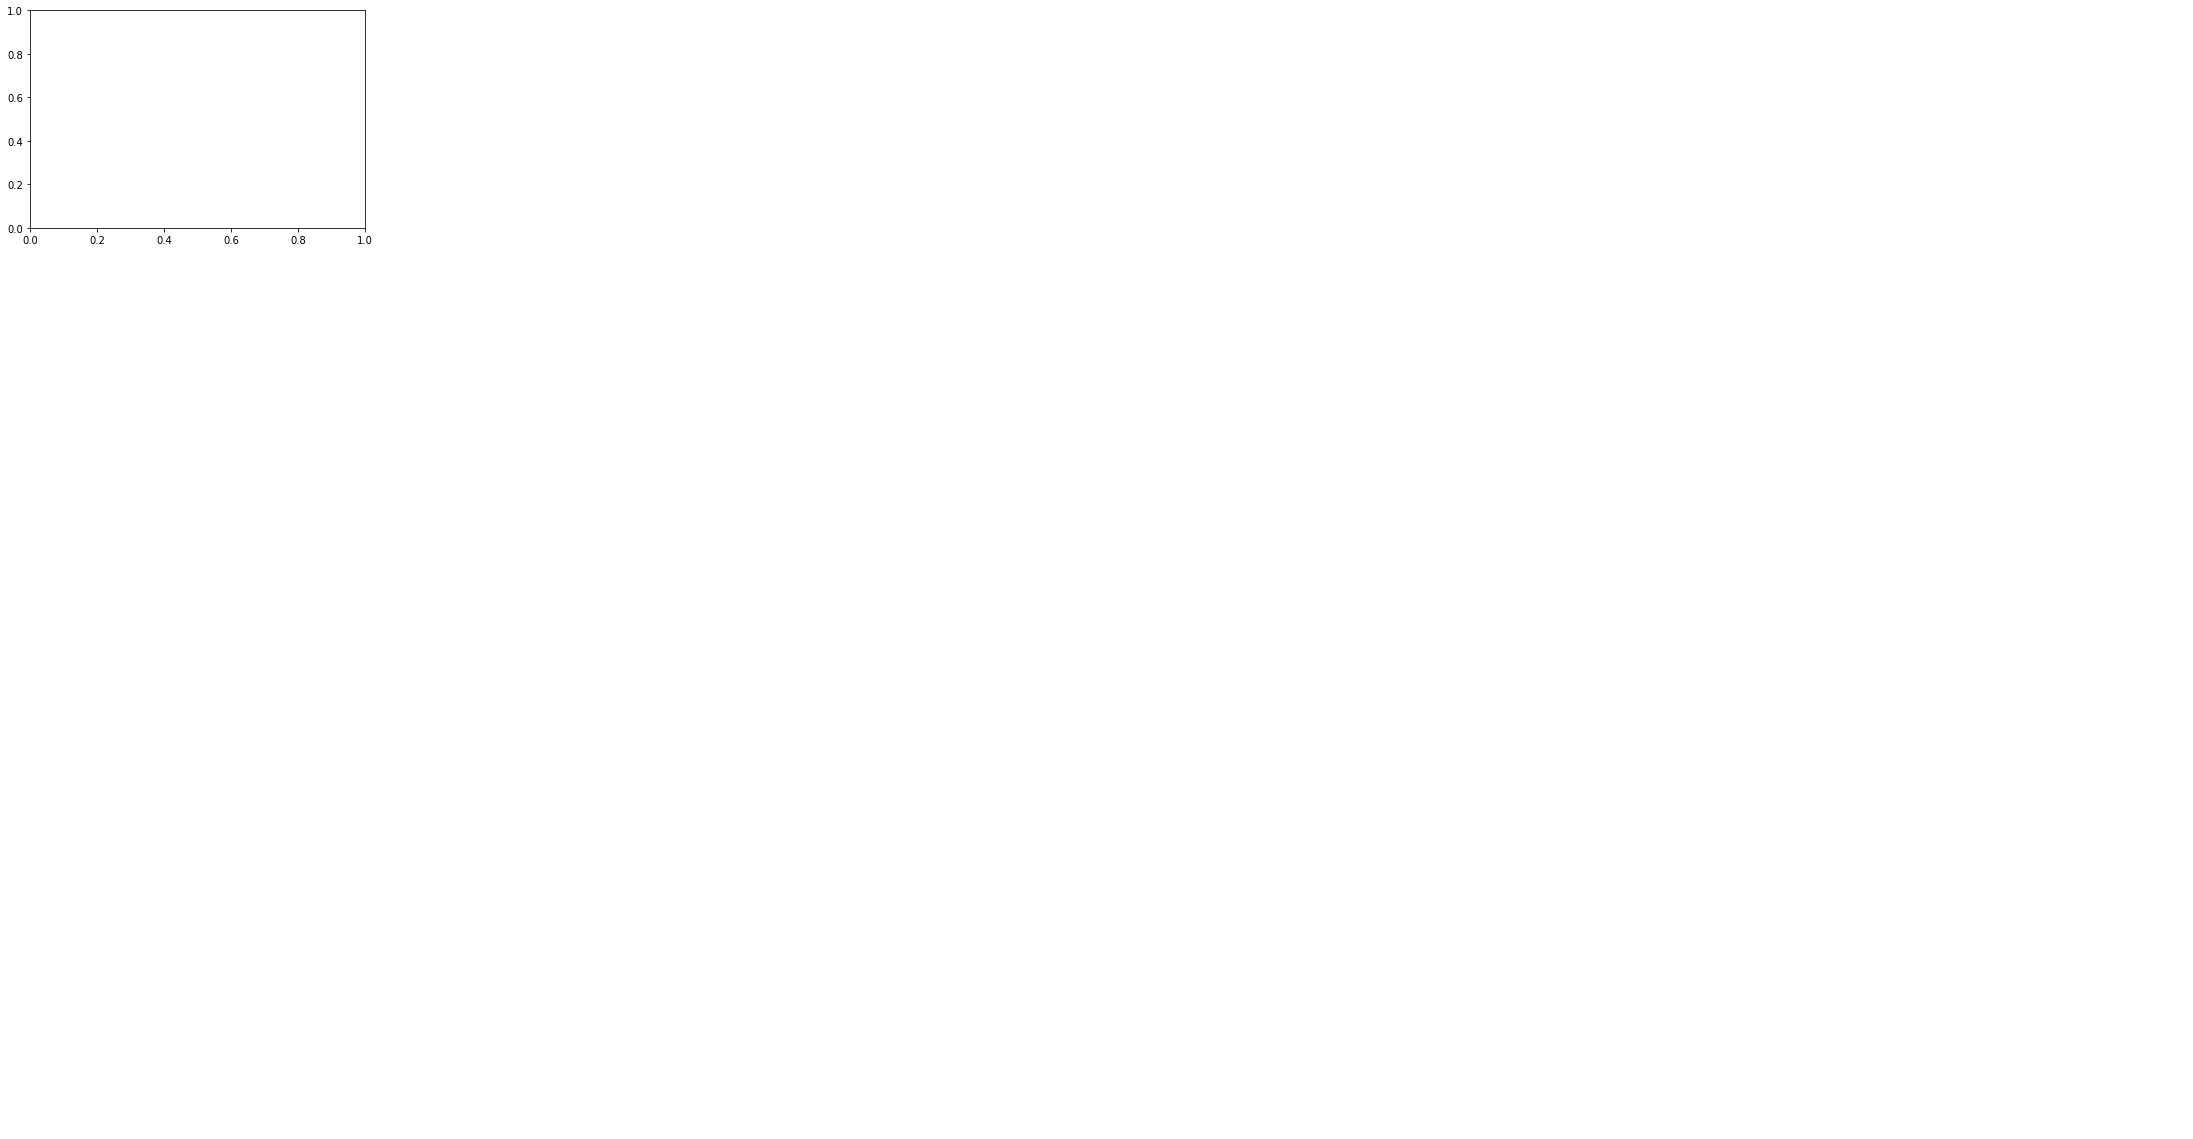

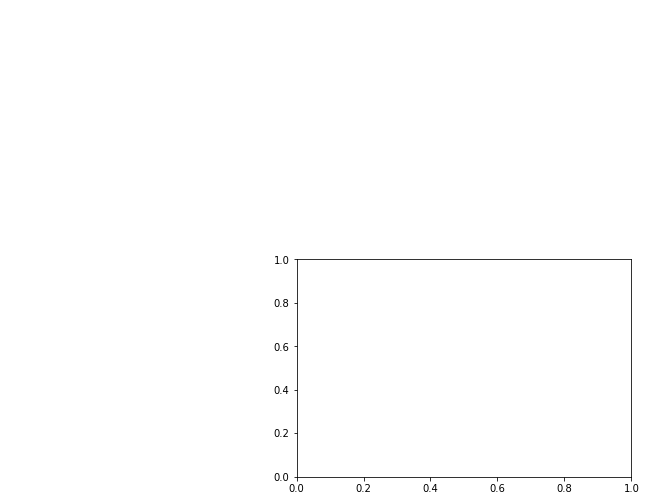

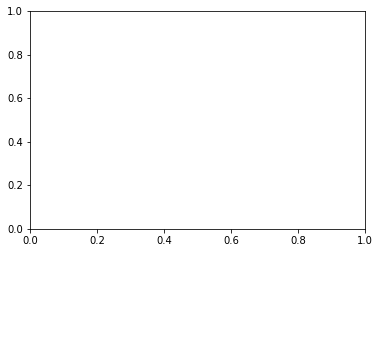

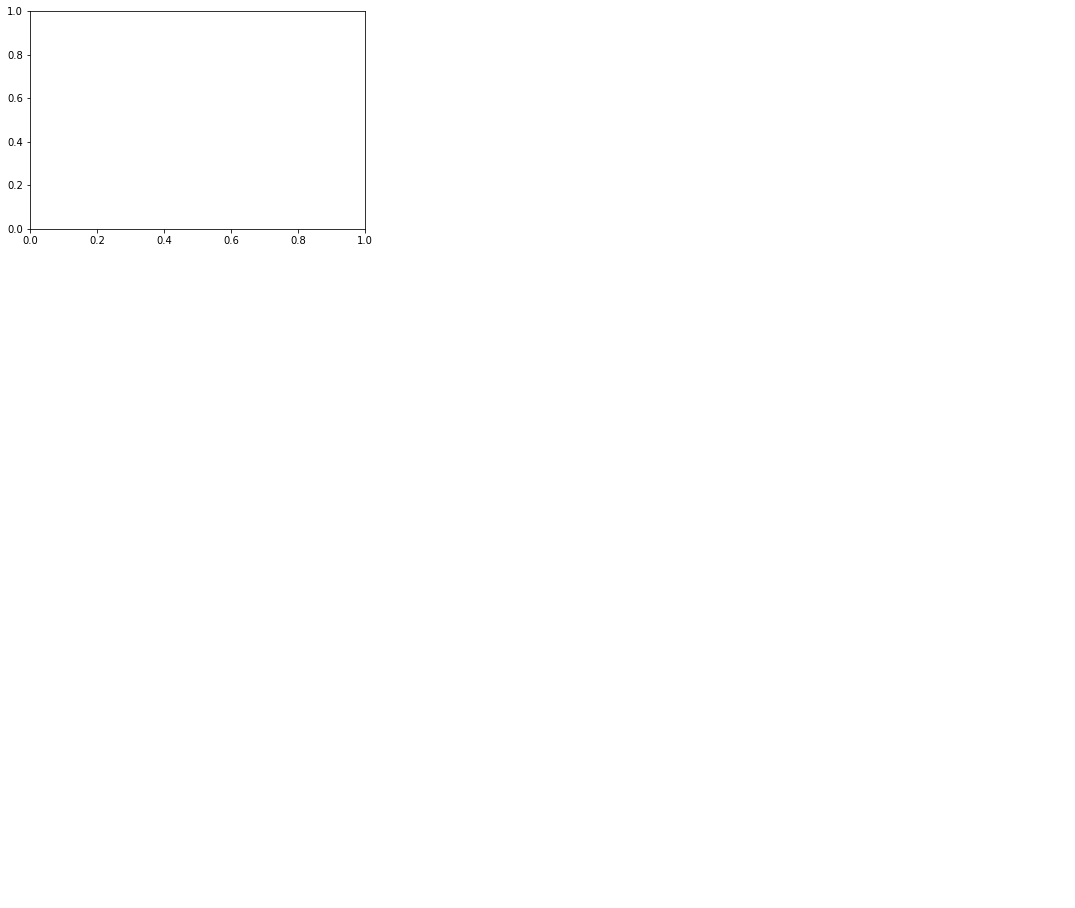

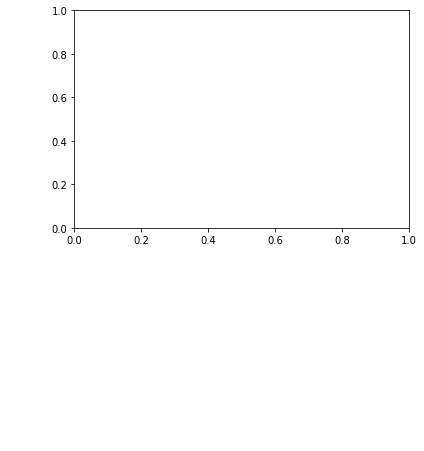

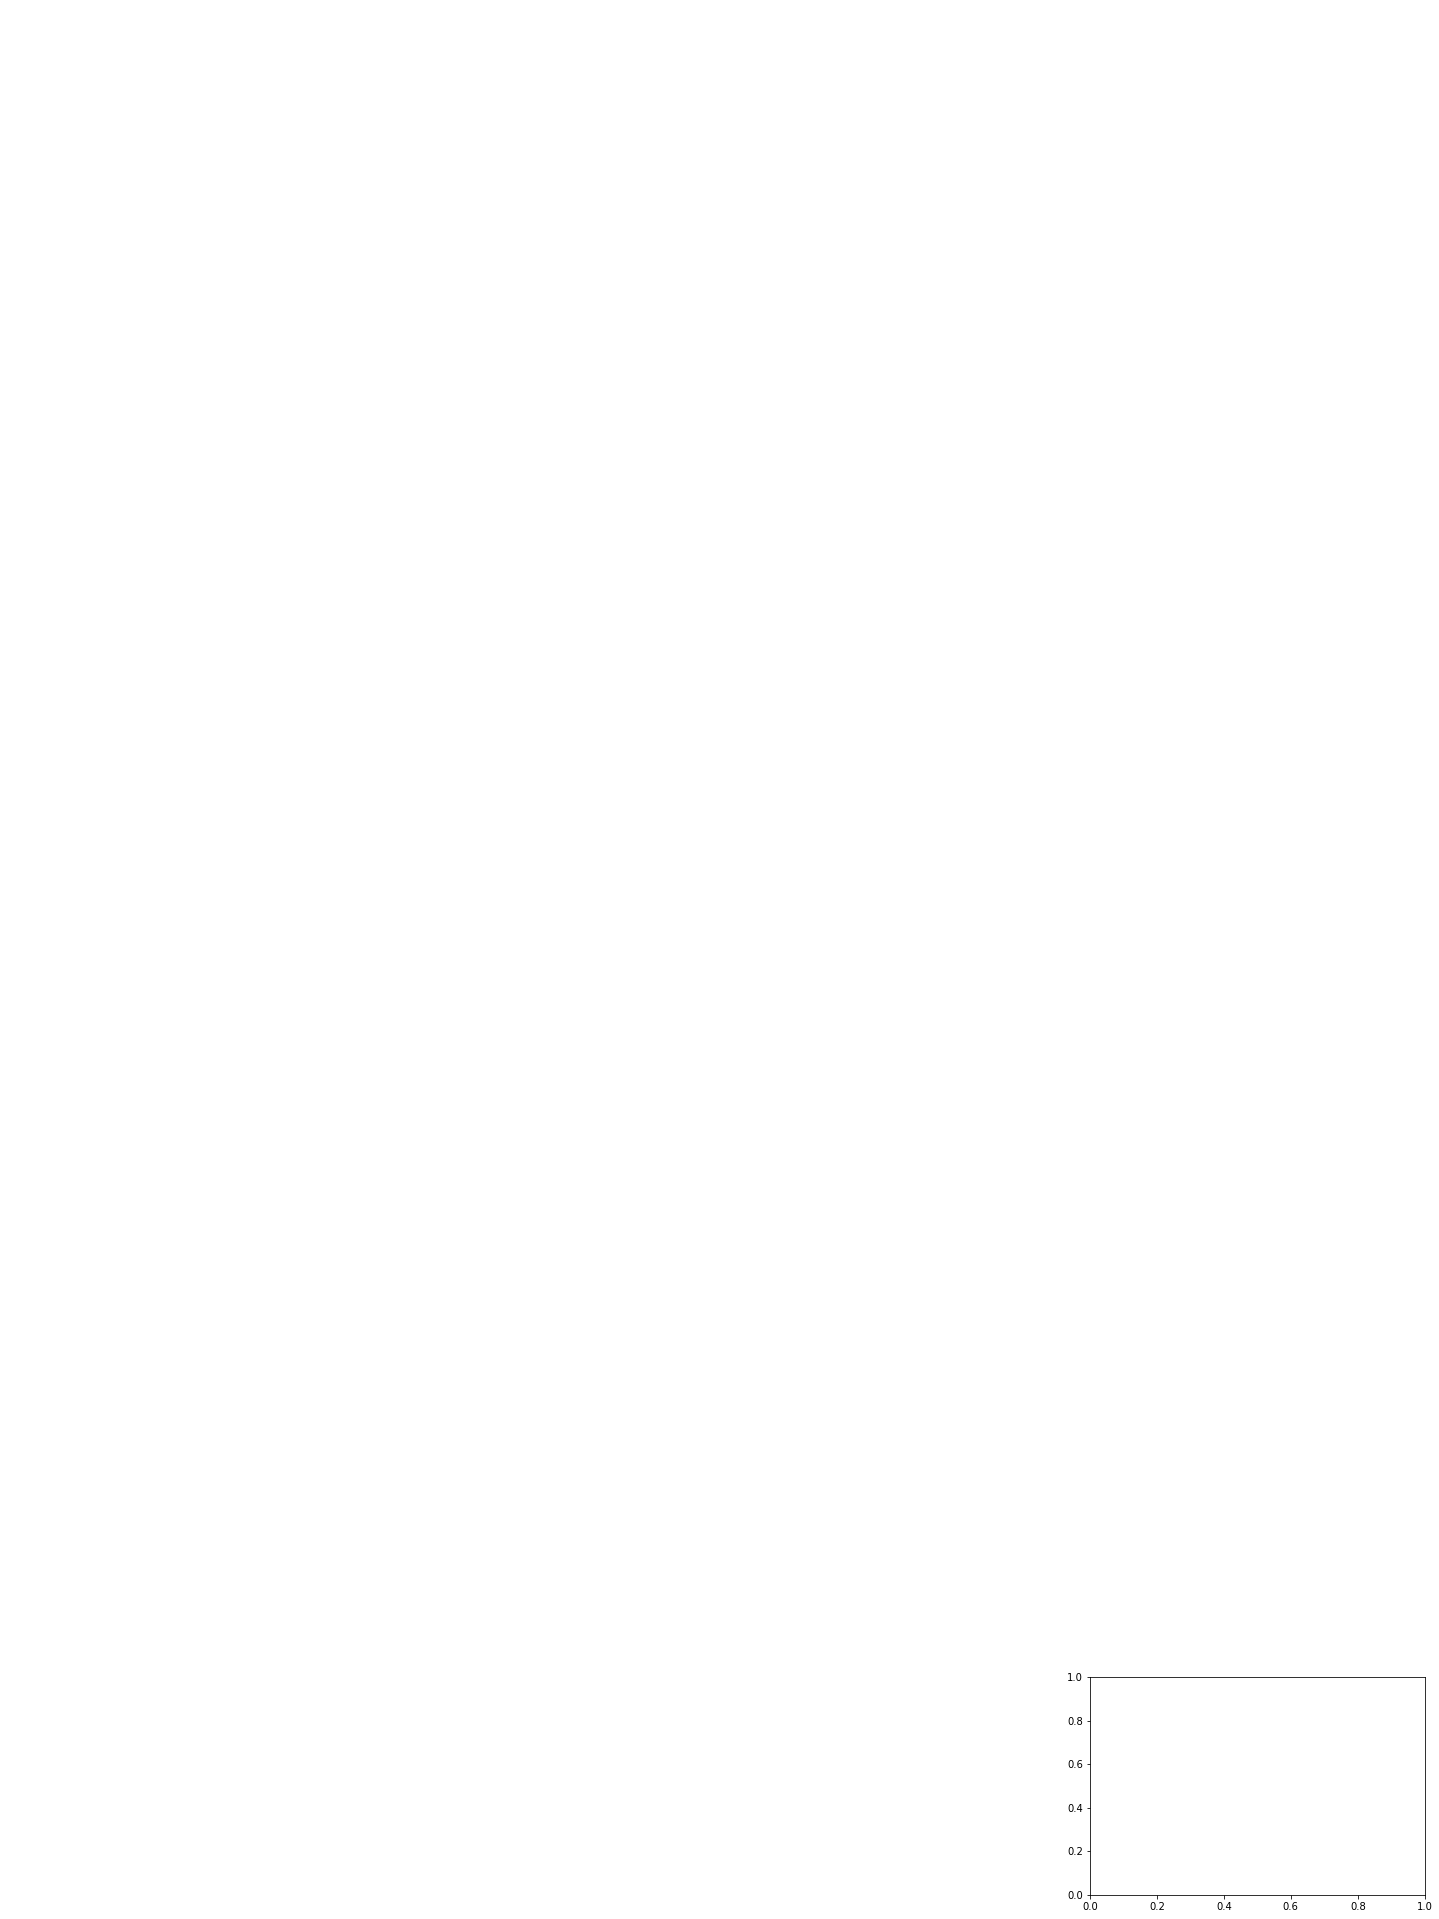

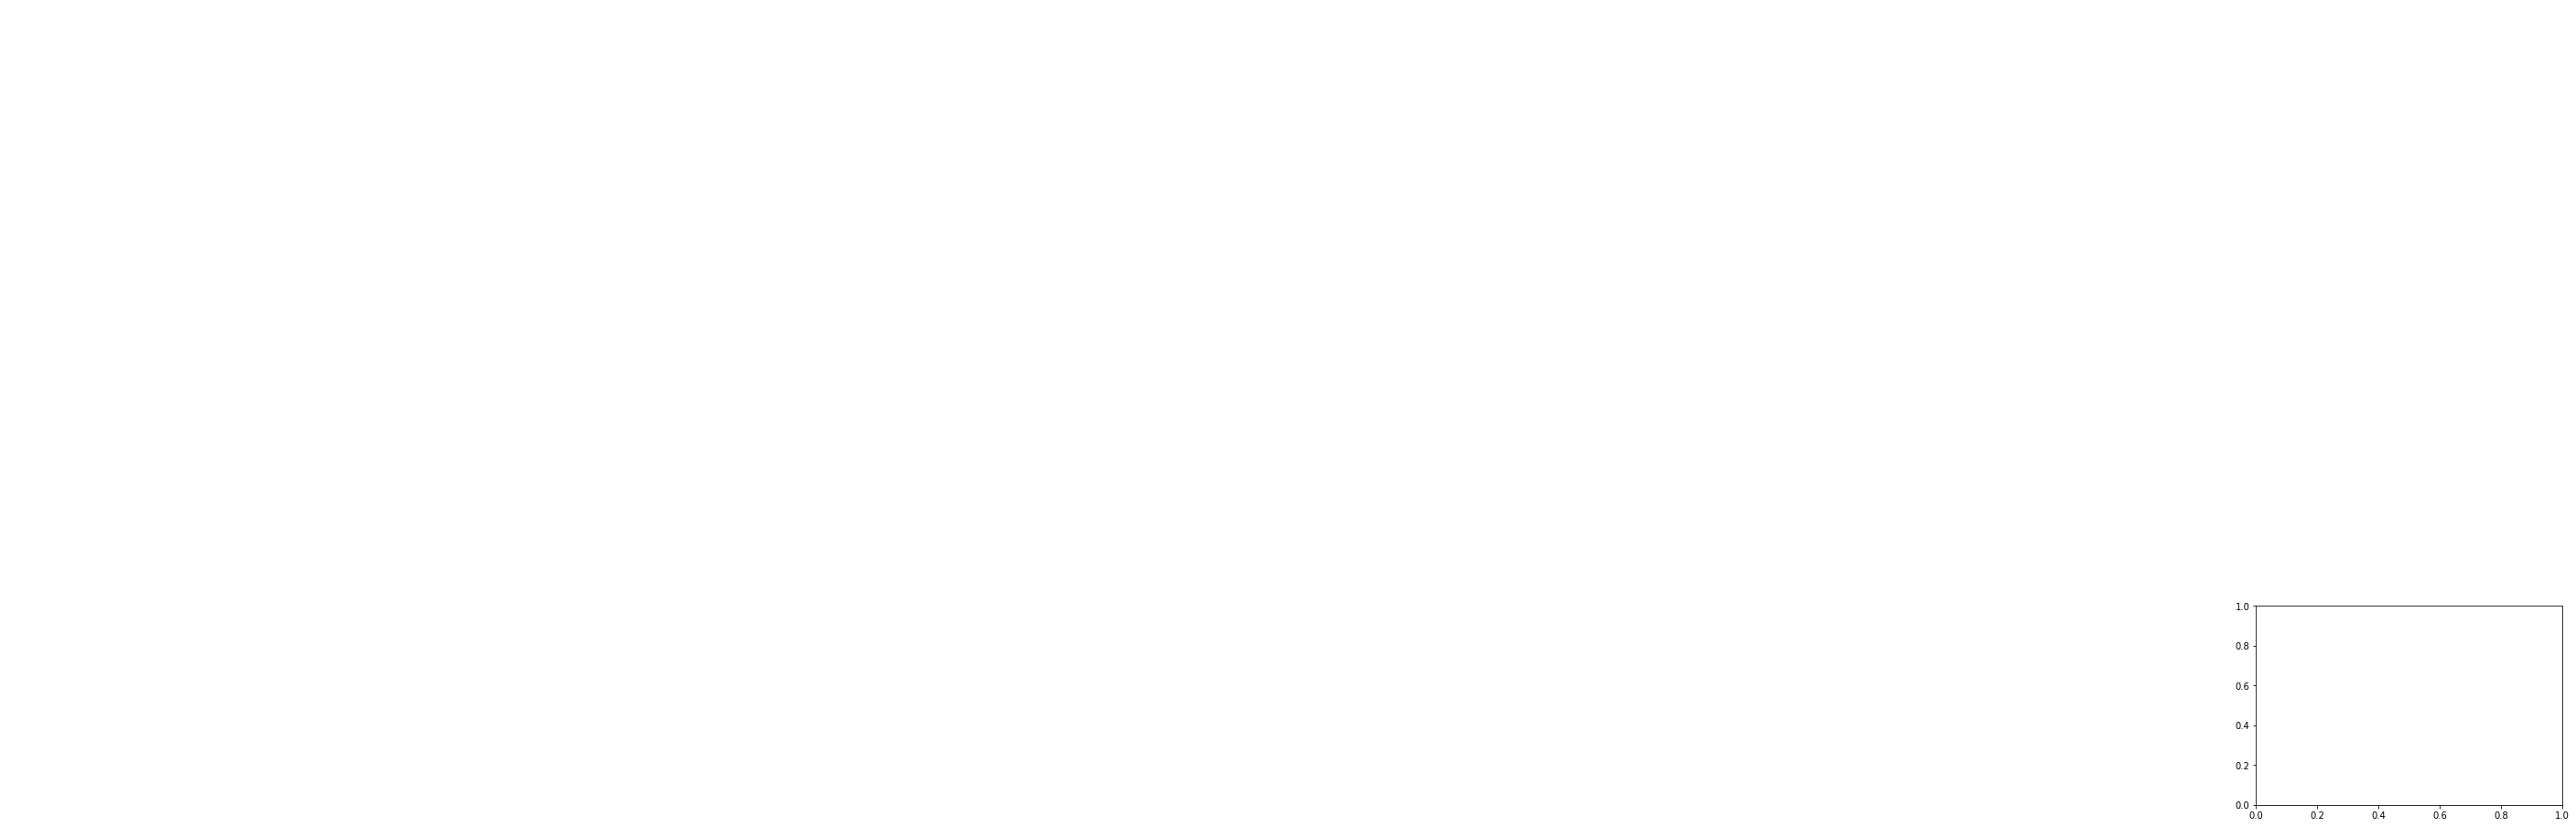

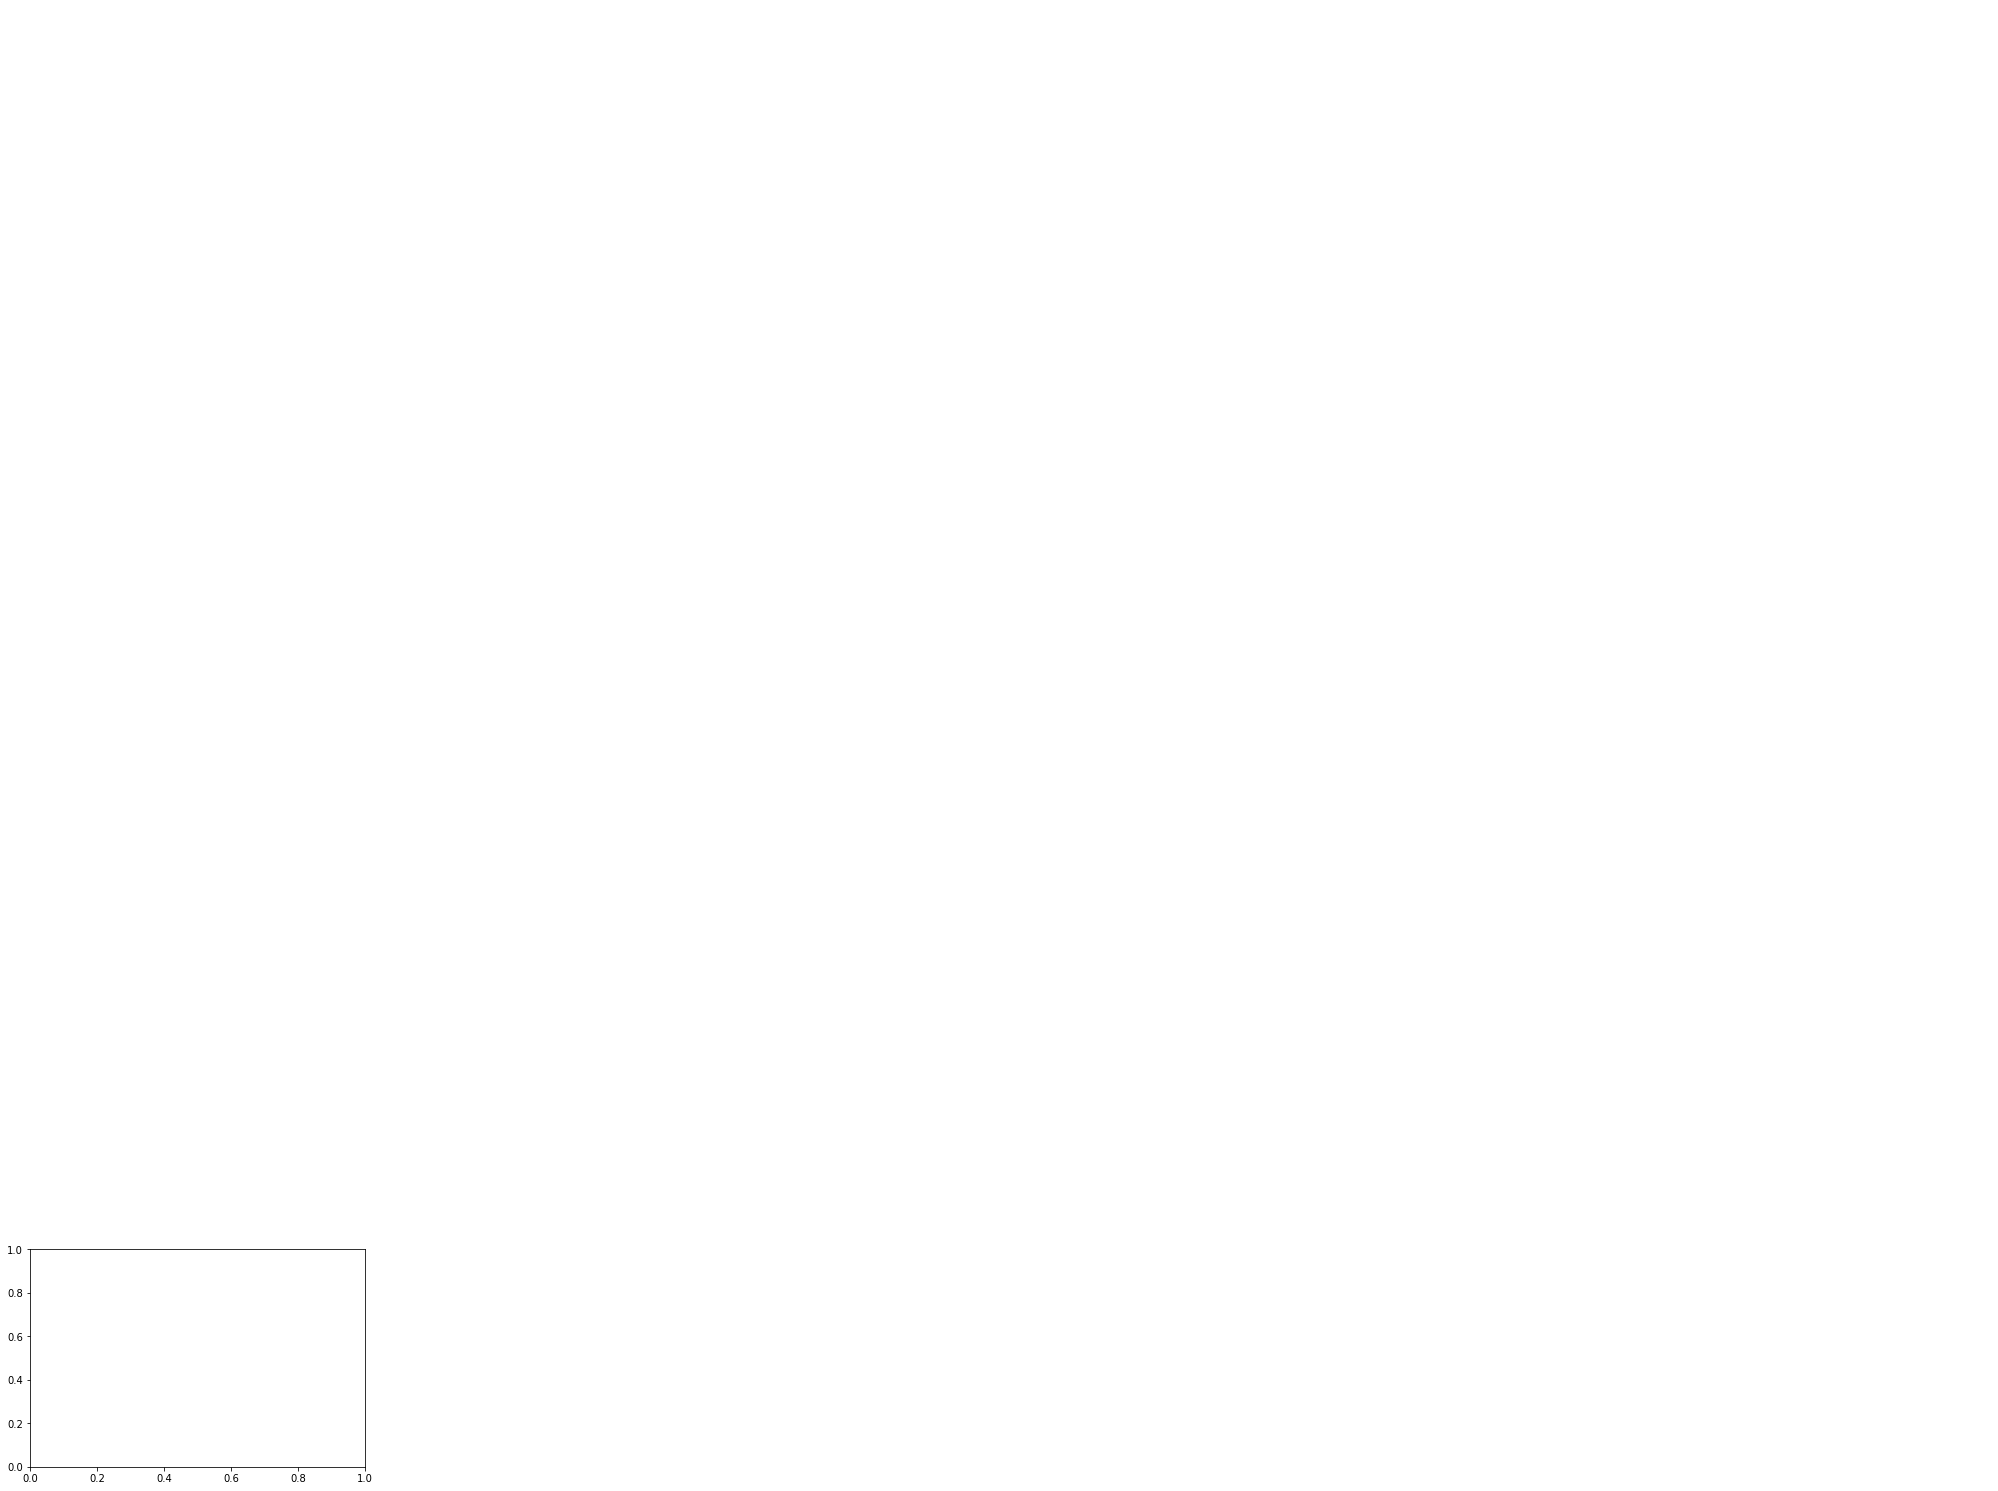

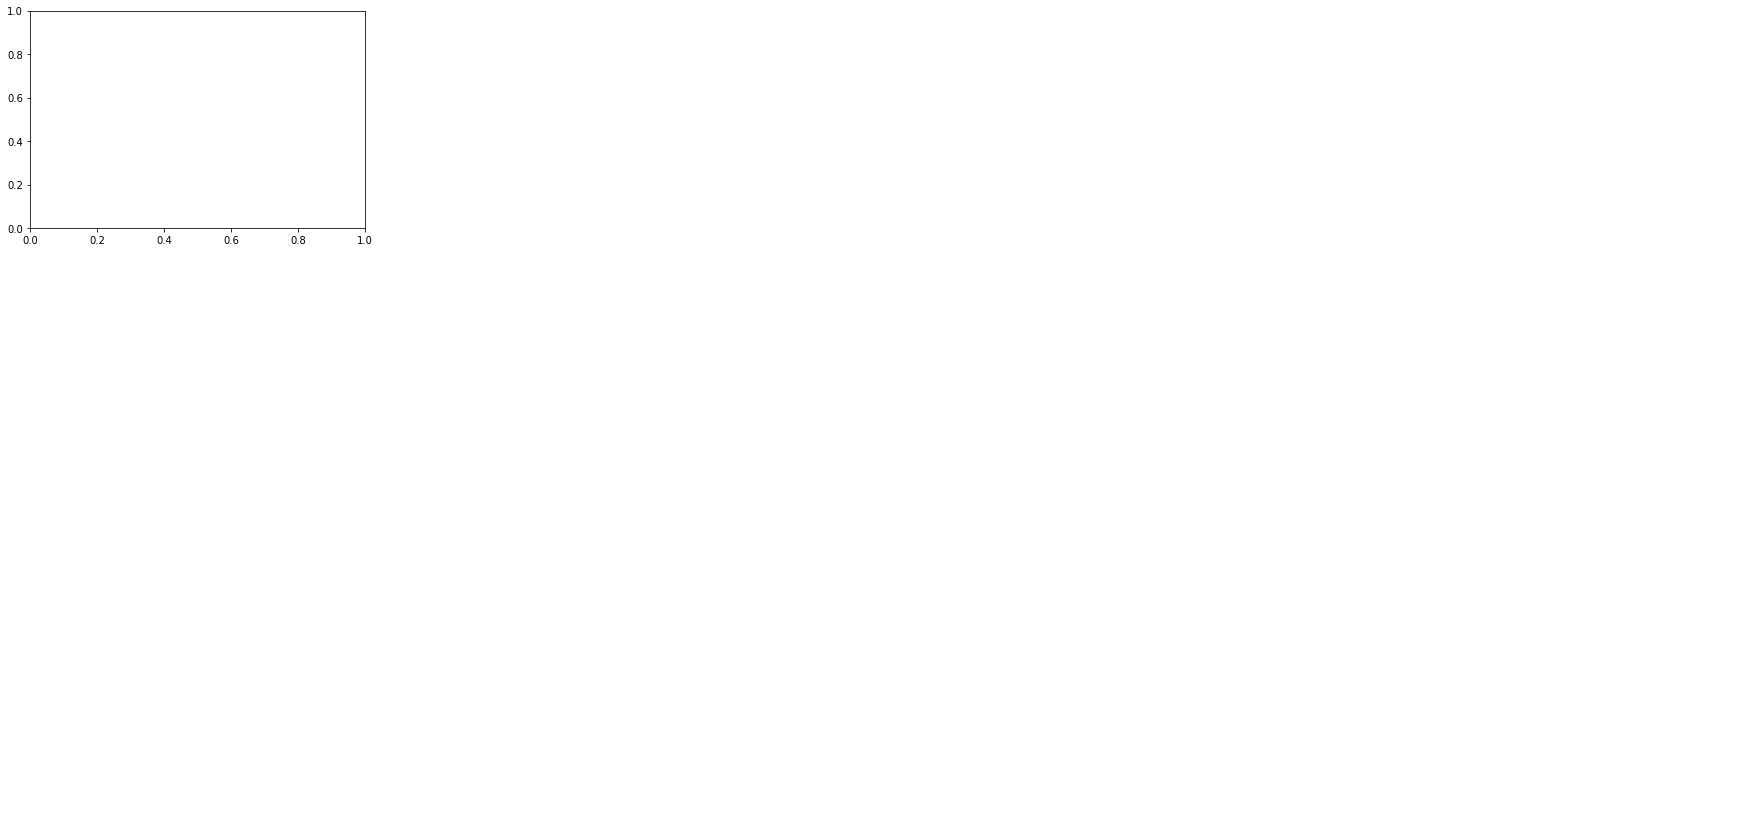

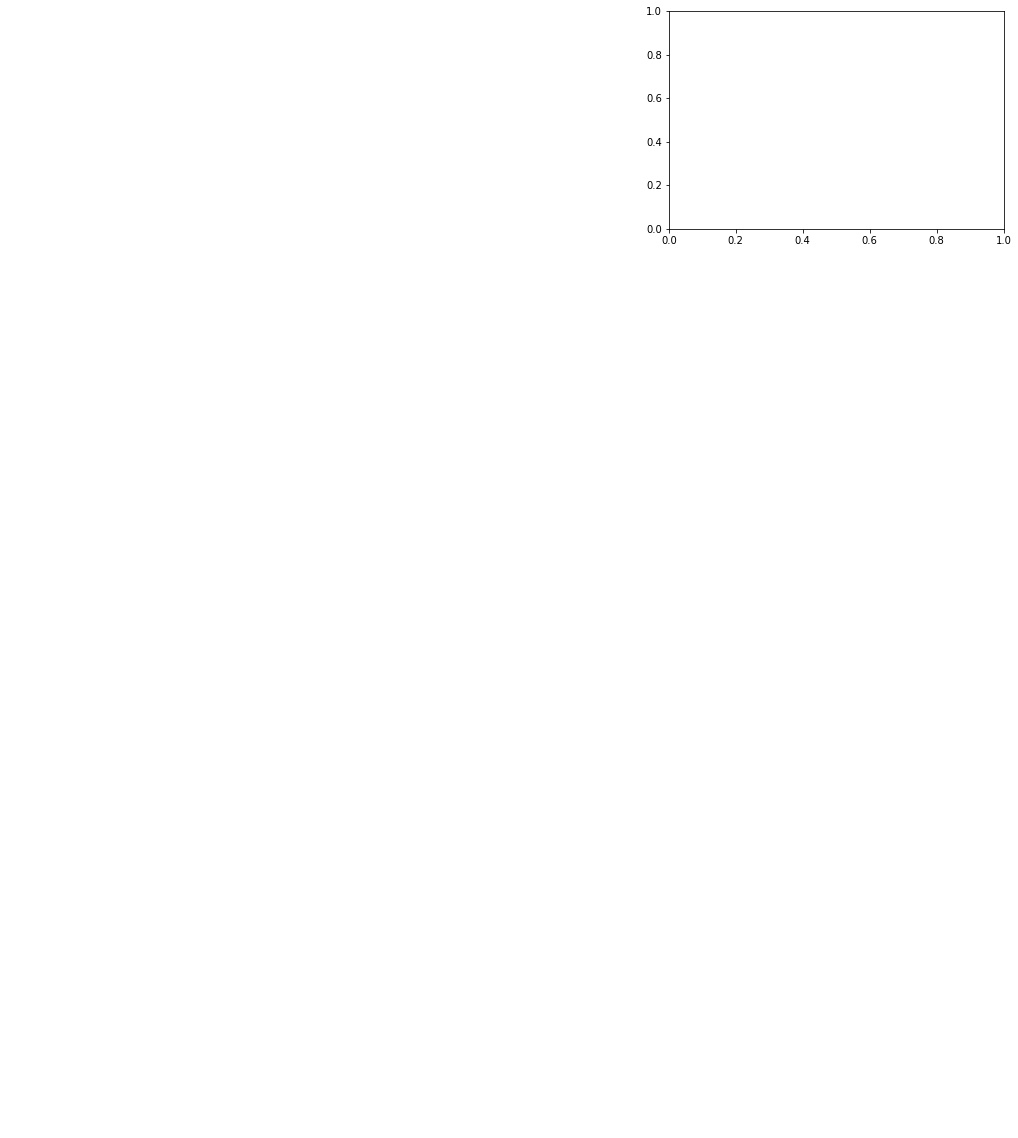

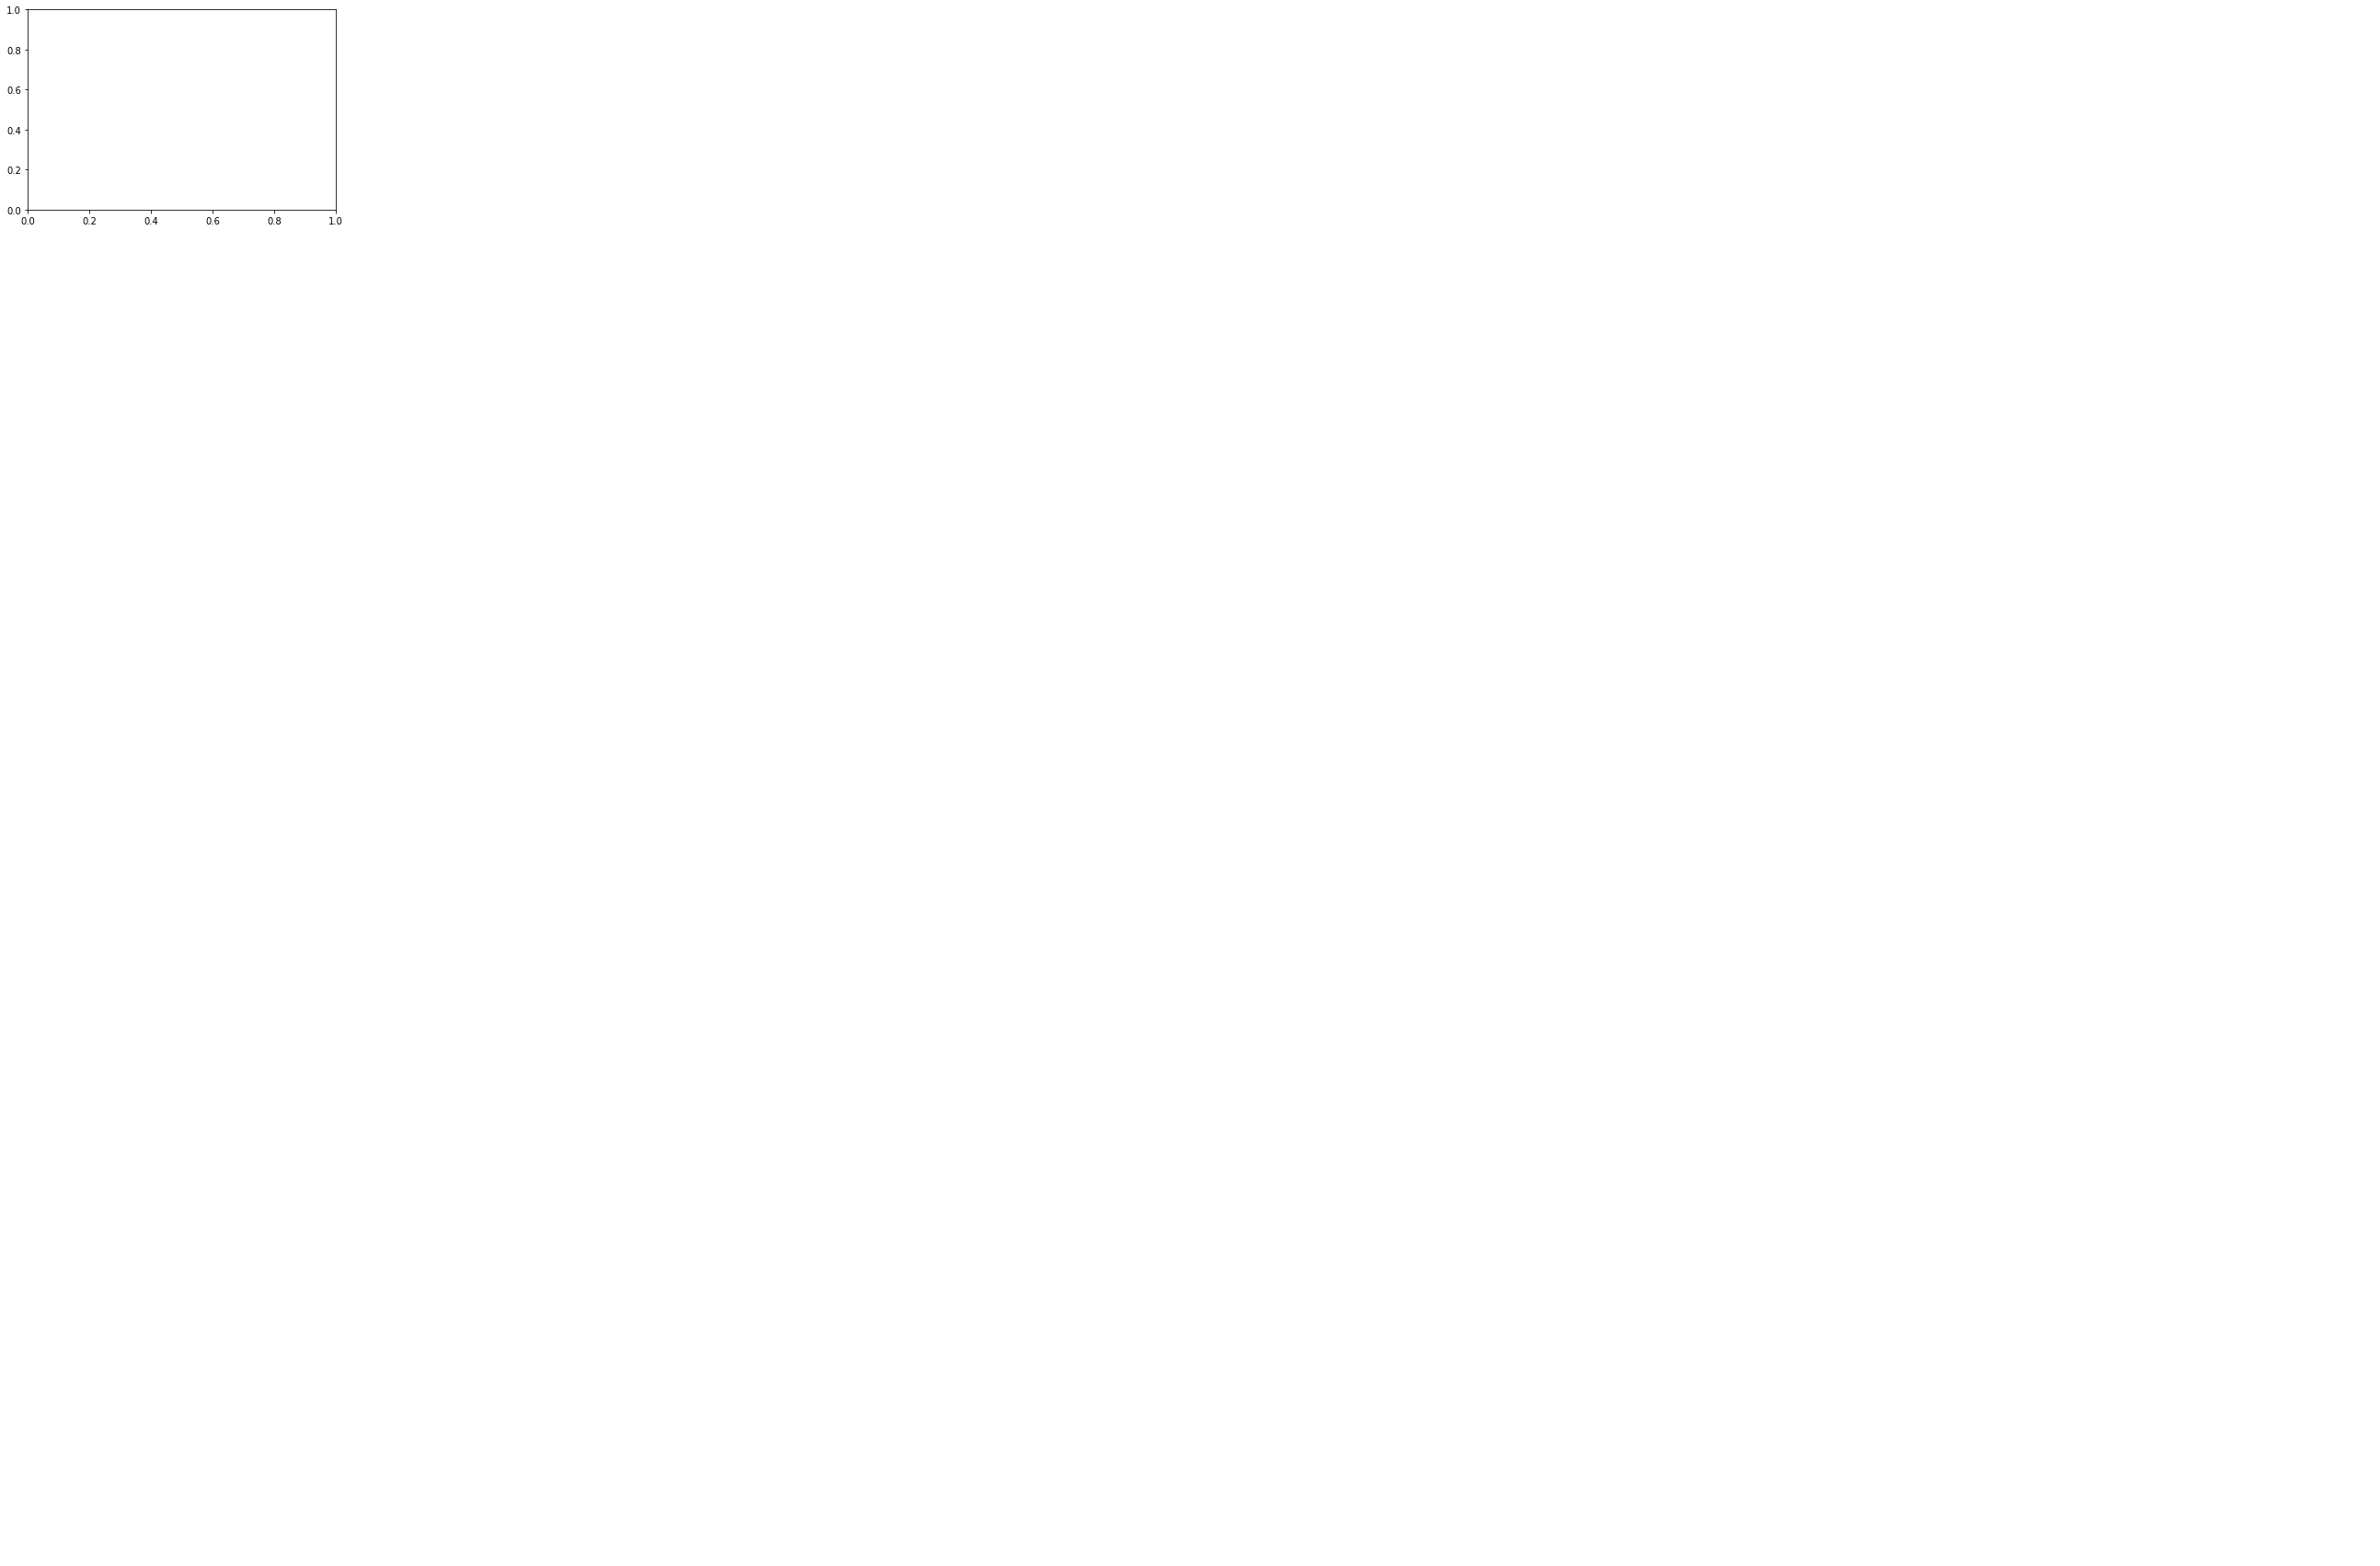

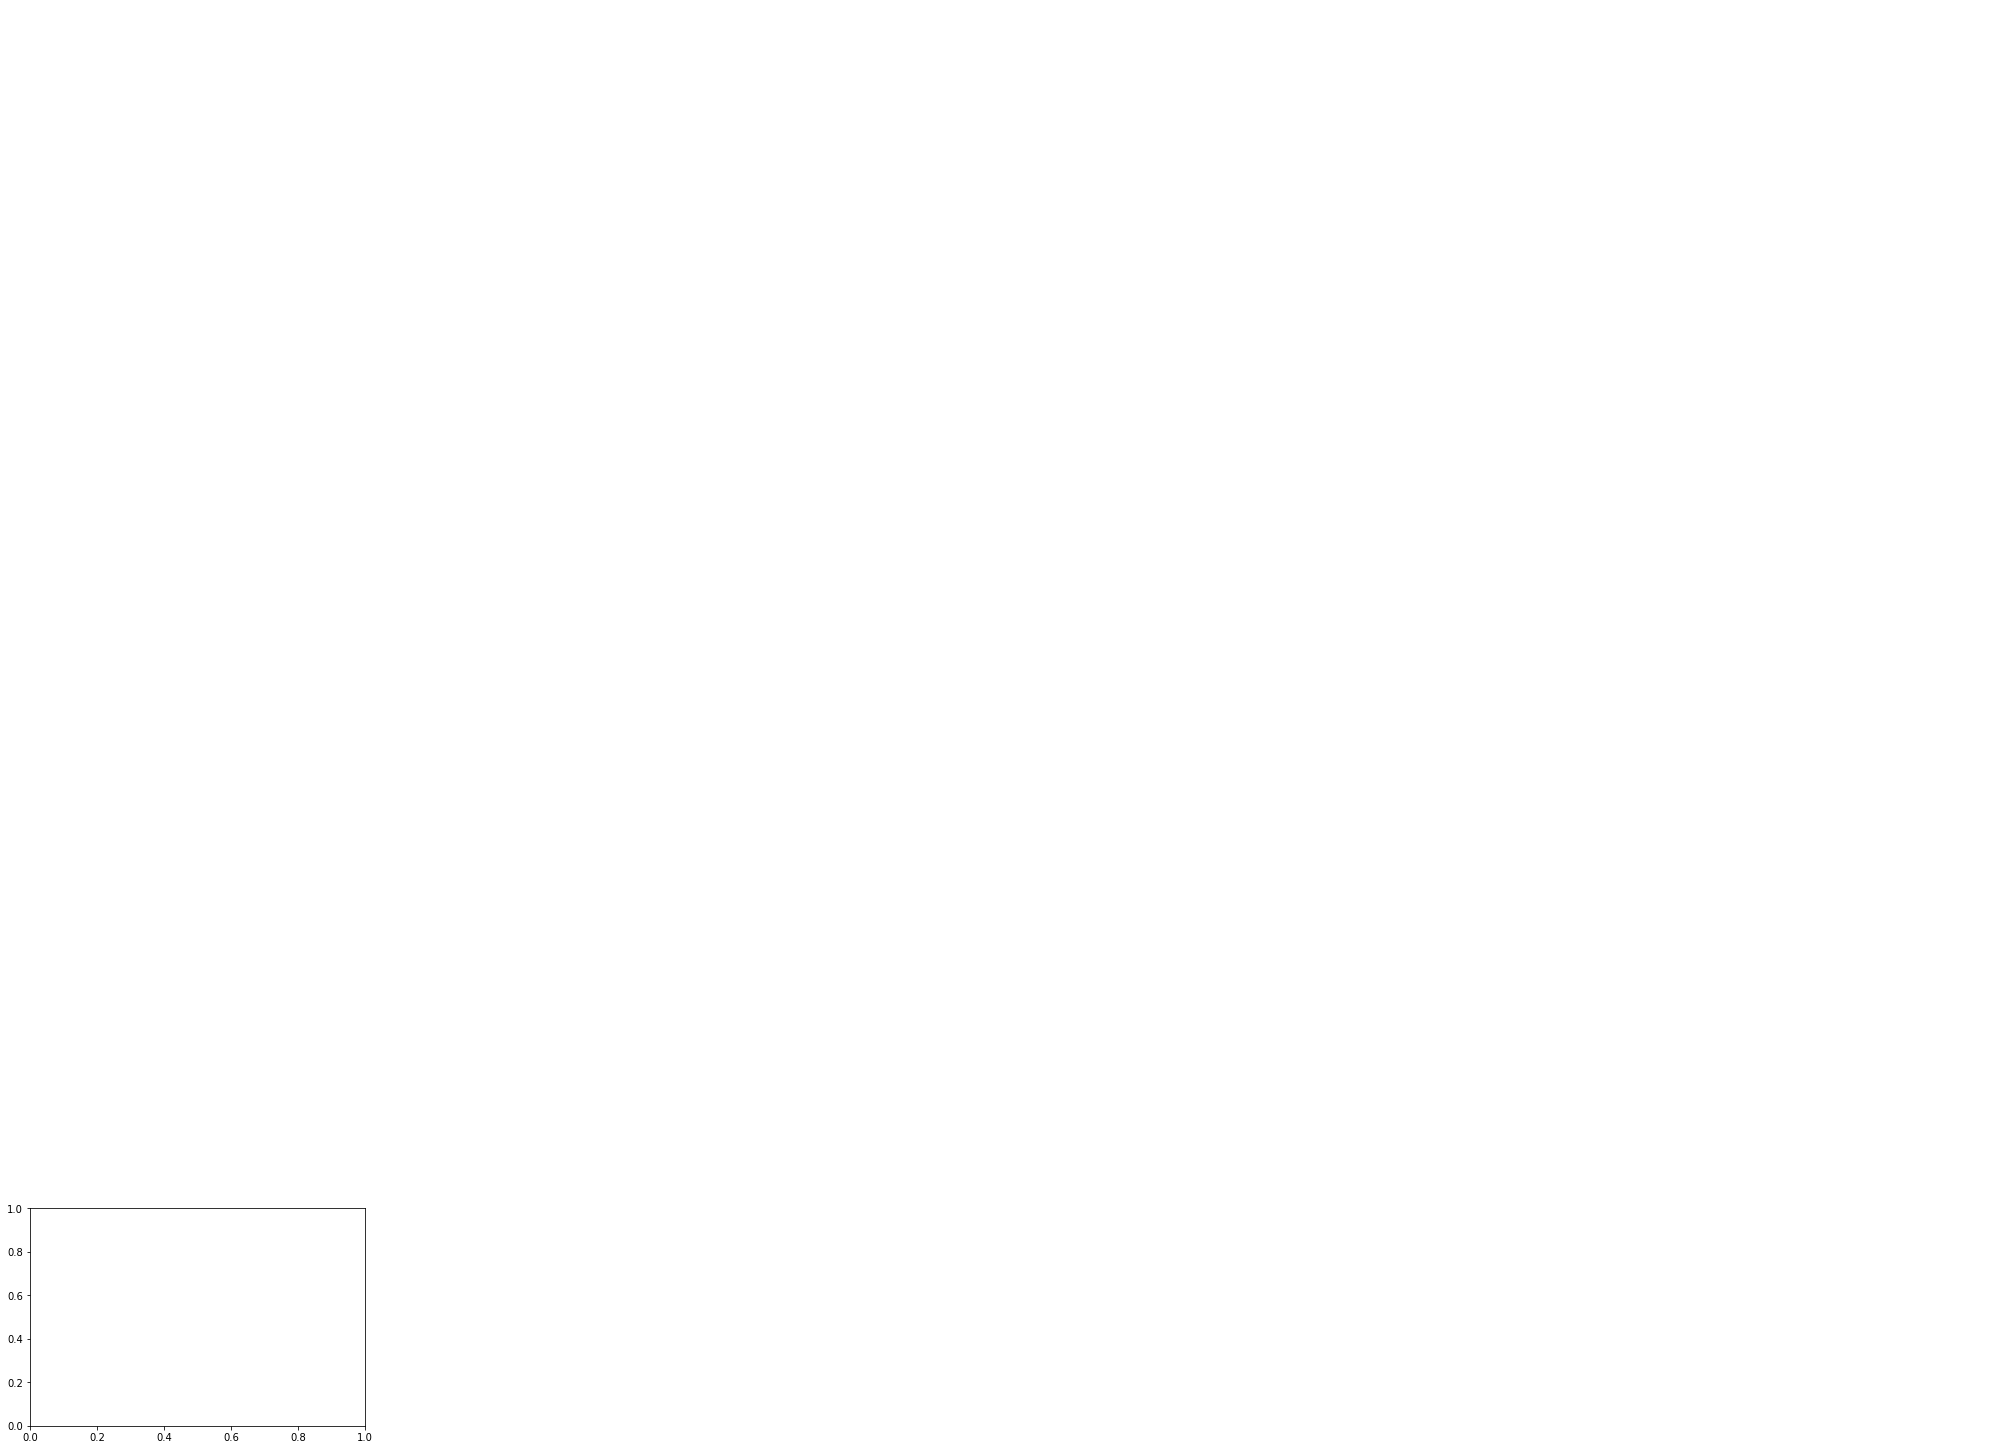

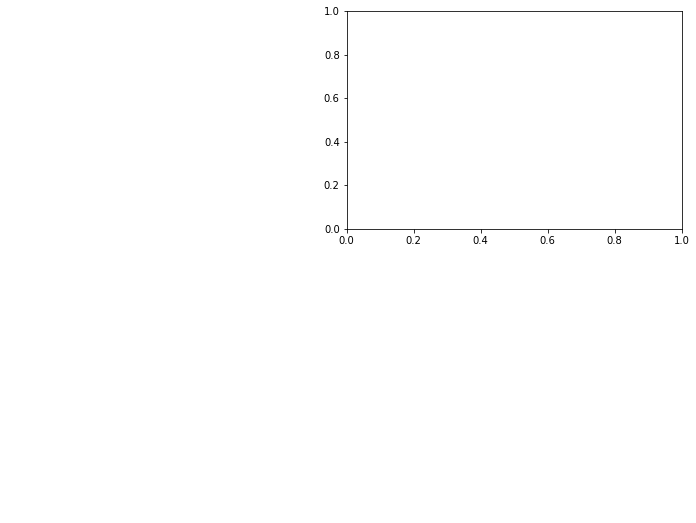

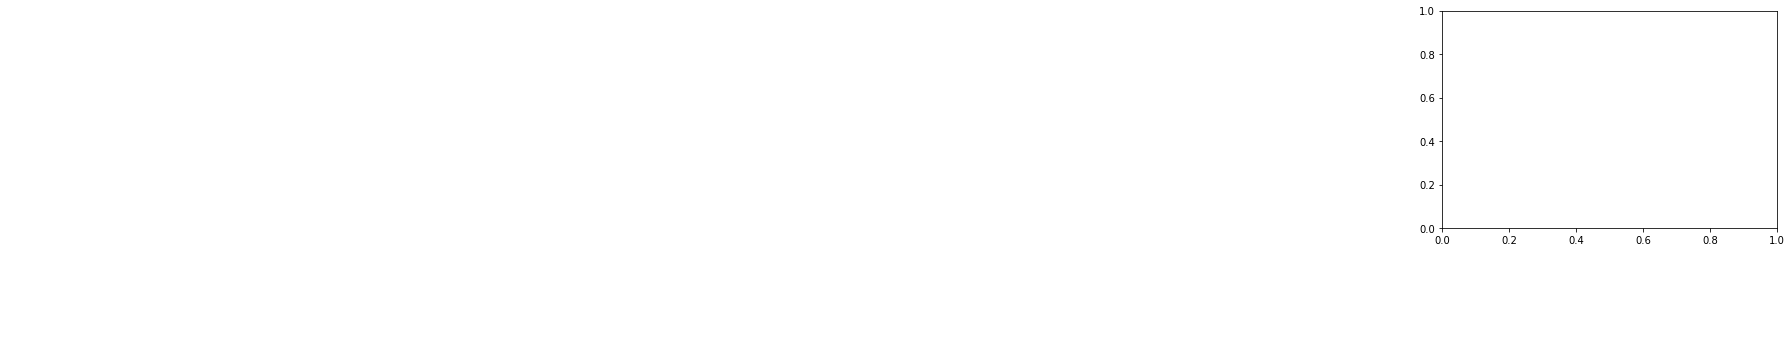

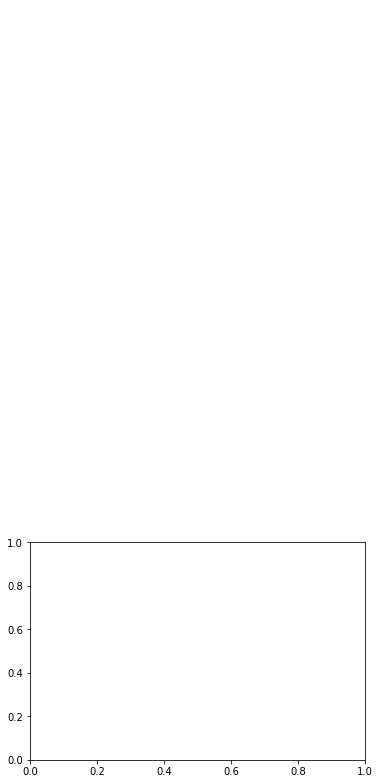

KeyboardInterrupt: ignored

In [53]:
#@title Default title text
from sklearn.manifold import TSNE
import numpy as np 
tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(docvecs)
 
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(docnames, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.show()
 